### +3 ... pip

In [1]:
!pip install diffusers["torch"] transformers

zsh:1: no matches found: diffusers[torch]


In [2]:
!pip install git+https://github.com/huggingface/diffusers

  Cloning https://github.com/huggingface/diffusers to /private/var/folders/r0/w084nh2s0v3fstg3n70027500000gn/T/pip-req-build-q__h_bvs
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /private/var/folders/r0/w084nh2s0v3fstg3n70027500000gn/T/pip-req-build-q__h_bvs
  Resolved https://github.com/huggingface/diffusers to commit 3f1411767bc0f1837adb6f289713807f18599db3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.0/419.0 kB 3.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Created wheel for diffusers: filename=diffusers-0.30.0.dev0-py3-none-any.whl size=2442704 sha256=032e71db3816da9cb57ad1267e92b66b31a9baa4fa23d2468c16ea645ed3f8bf
  Stored in directory: /private/var/folders/r0/w084nh2s0v3fstg3n70027500000gn/T/pip-ephem-wheel-cache-0v81c8or/wheels/90/fb/48/a310c271ab42899362ff272062ced42133e5c4c9d0ce77df68
Successful

In [5]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.8 MB/s eta 0:00:007.9 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [6]:
!pip install peft==0.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 2.4 MB/s eta 0:00:00MB/s eta 0:00:01
  Attempting uninstall: peft
    Found existing installation: peft 0.6.0.dev0
    Uninstalling peft-0.6.0.dev0:
      Successfully uninstalled peft-0.6.0.dev0


### +3 ... Model

In [39]:
# model_id = "dreamlike-art/dreamlike-photoreal-2.0"
# model_id = "akameswa/lcm-tiny-sd"
# model_id = "ehristoforu/stable-diffusion-v1-5-tiny"
# model_id = "segmind/tiny-sd"
# model_id = "diffusers/tiny-stable-diffusion-torch"

model_id = "google/ddpm-cat-256"

### +3 ... AutoPipeline

In [7]:
from diffusers import AutoPipelineForText2Image
import torch

In [22]:
pipe_txt2img = AutoPipelineForText2Image.from_pretrained(
    model_id, 
    # torch_dtype=torch.float16, 
    # use_safetensors=True
)

unet/diffusion_pytorch_model.safetensors not found


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/691 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/647M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /Users/salgu/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/salgu/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe84f/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/Users/salgu/.pyenv/versions/pml/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
An error occurred while trying to fetch /Users/salgu/.cache/huggingface/hub/models--segmind--tiny-sd/snapshots/cad0bd7495fa6c4bcca01b19a723dc91627fe

In [15]:
# prompt = "cinematic photo of Godzilla eating sushi with a cat in a izakaya, 35mm photograph, film, professional, 4k, highly detailed"
prompt = "toy_face of a hacker with a hoodie"

In [23]:
prompt = "a golden vase with different flowers"

  0%|          | 0/50 [00:00<?, ?it/s]

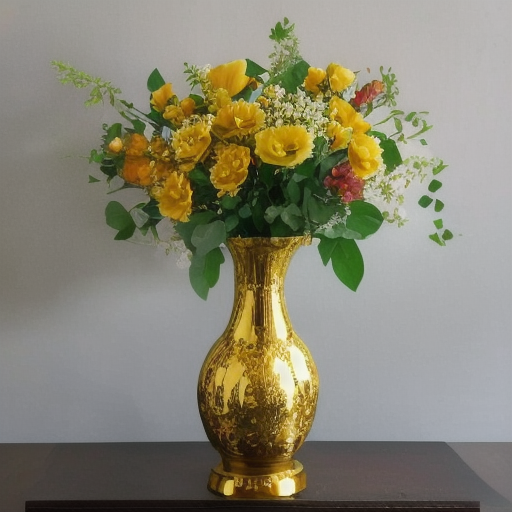

In [24]:
generator = torch.Generator(device="cpu").manual_seed(42)
image = pipe_txt2img(prompt, generator=generator).images[0]
image

In [26]:
image.save(f"{prompt}.png")

### +3 ... distilled

In [17]:
import torch
from diffusers import AutoencoderTiny, StableDiffusionPipeline

In [ ]:
distilled = StableDiffusionPipeline.from_pretrained(
    "nota-ai/bk-sdm-small", torch_dtype=torch.float16, use_safetensors=True,
).to("cuda")
distilled.vae = AutoencoderTiny.from_pretrained(
    "sayakpaul/taesd-diffusers", torch_dtype=torch.float16, use_safetensors=True,
).to("cuda")

In [20]:
distilled.vae = AutoencoderTiny.from_pretrained(
    model_id,
    # torch_dtype=torch.float16,
    use_safetensors=True,
)

OSError: segmind/tiny-sd does not appear to have a file named config.json.

In [ ]:
generator = torch.manual_seed(2023)
image = distilled("a golden vase with different flowers", num_inference_steps=25, generator=generator).images[0]
image

### +3 ... 

In [40]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained(
    model_id,
    # use_safetensors=True
)

model_index.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/455M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# image = pipeline("An image of a squirrel in Picasso style").images[0]
# image

In [27]:
import PIL.Image
import numpy as np


def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

In [ ]:
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
    # 1. predict noise residual
    with torch.no_grad():
        residual = model(sample, t).sample

    # 2. compute less noisy image and set x_t -> x_t-1
    sample = scheduler.step(residual, t, sample).prev_sample

    # 3. optionally look at image
    if (i + 1) % 50 == 0:
        display_sample(sample, i + 1)

In [62]:
pipeline.scheduler.compatibles

[diffusers.schedulers.scheduling_deis_multistep.DEISMultistepScheduler,
 diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
 diffusers.schedulers.scheduling_dpmsolver_singlestep.DPMSolverSinglestepScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_discrete.KDPM2DiscreteScheduler,
 diffusers.schedulers.scheduling_pndm.PNDMScheduler,
 diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultistepScheduler,
 diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_ancestral_discrete.KDPM2AncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_ddim.DDIMScheduler,
 diffusers.schedulers.scheduling_unipc_multistep.UniPCMultistepScheduler,
 diffusers.schedulers.scheduling_heun_discrete.HeunDiscreteScheduler,
 diffusers.schedulers.scheduling_lms_discrete.LMSDiscreteScheduler,
 diffusers.schedulers.scheduling_edm_euler.EDMEulerScheduler,

In [41]:
from diffusers import UNet2DModel

# repo_id = "google/ddpm-cat-256"
model = UNet2DModel.from_pretrained(
    model_id,
    # use_safetensors=True
)

In [42]:
from diffusers import DDPMScheduler

scheduler = DDPMScheduler.from_pretrained(model_id)
scheduler

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.30.0.dev0",
  "beta_end": 0.02,
  "beta_schedule": "linear",
  "beta_start": 0.0001,
  "clip_sample": true,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null,
  "variance_type": "fixed_small"
}

In [31]:
from diffusers import DPMSolverMultistepScheduler

pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)

In [44]:
from diffusers import DDPMScheduler, UNet2DModel

scheduler = DDPMScheduler.from_pretrained(model_id)
model = UNet2DModel.from_pretrained(
    model_id,
    use_safetensors=True
)

In [46]:
scheduler.set_timesteps(50)
scheduler.timesteps

tensor([980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720,
        700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440,
        420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160,
        140, 120, 100,  80,  60,  40,  20,   0])

In [47]:
import torch

sample_size = model.config.sample_size
noise = torch.randn(
    (1, 3, sample_size, sample_size),
    # device="cuda"
)

In [51]:
from tqdm.notebook import tqdm

input = noise
inputs = []

for t in tqdm(scheduler.timesteps):
    with torch.no_grad():
        noisy_residual = model(input, t).sample
    previous_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
    input = previous_noisy_sample
    inputs.append(input)

  0%|          | 0/50 [00:00<?, ?it/s]

In [53]:
from PIL import Image
import numpy as np

def decode_image(input):
    image = (input / 2 + 0.5).clamp(0, 1).squeeze()
    image = (image.permute(1, 2, 0) * 255).round().to(torch.uint8).cpu().numpy()
    image = Image.fromarray(image)
    return image

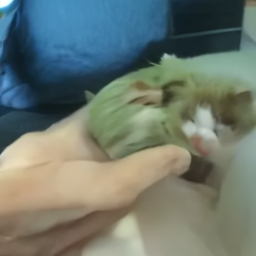

In [54]:
image = decode_image(inputs[-1])
image

In [58]:
index_end = len(inputs) - 1
index = [0, 10, 20, 30, 40, index_end]
images = []

for i in index:
    images.append(decode_image(inputs[i]))

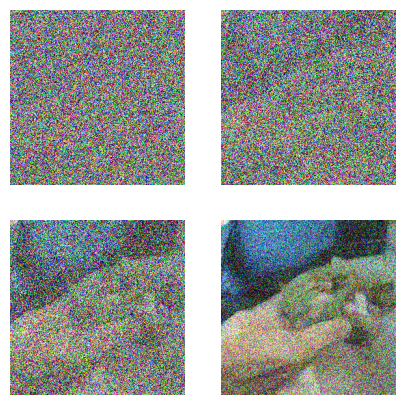

In [61]:
from PIL import Image
import matplotlib.pyplot as plt

# Create a figure and axes with a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(5, 5))

# Display each image in a subplot
axs[0, 0].imshow(images[1])
axs[0, 0].axis('off')  # Hide axes

axs[0, 1].imshow(images[2])
axs[0, 1].axis('off')  # Hide axes

axs[1, 0].imshow(images[3])
axs[1, 0].axis('off')  # Hide axes

axs[1, 1].imshow(images[4])
axs[1, 1].axis('off')  # Hide axes

# Show the figure
plt.show()

### +3 ... pipeline

In [64]:
from PIL import Image
import torch
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel, PNDMScheduler

model_id = "segmind/tiny-sd"

vae = AutoencoderKL.from_pretrained(
    model_id,
    subfolder="vae",
    # use_safetensors=True
)

tokenizer = CLIPTokenizer.from_pretrained(
    model_id,
    subfolder="tokenizer"
)

text_encoder = CLIPTextModel.from_pretrained(
    model_id,
    subfolder="text_encoder",
    # use_safetensors=True
)

unet = UNet2DConditionModel.from_pretrained(
    model_id,
    subfolder="unet",
    # use_safetensors=True
)

An error occurred while trying to fetch segmind/tiny-sd: segmind/tiny-sd does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/Users/salgu/.pyenv/versions/pml/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
An error occurred while trying to fetch segmind/tiny-sd: segmind/tiny-sd does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [65]:
from diffusers import UniPCMultistepScheduler

scheduler = UniPCMultistepScheduler.from_pretrained(
    model_id,
    subfolder="scheduler"
)

In [ ]:
prompt = ["a photograph of an astronaut riding a horse"]

In [79]:
prompt_1 = "A watercolor painting of a Golden Retriever at the beach"
prompt_2 = "A still life DSLR photo of a bowl of fruit"

In [ ]:
interpolation_steps = 5

encoding_1 = ops.squeeze(model.encode_text(prompt_1))
encoding_2 = ops.squeeze(model.encode_text(prompt_2))

interpolated_encodings = ops.linspace(encoding_1, encoding_2, interpolation_steps)

# Show the size of the latent manifold
print(f"Encoding shape: {encoding_1.shape}")

In [ ]:
height = 128  # default height of Stable Diffusion
width = 128  # default width of Stable Diffusion
num_inference_steps = 25  # Number of denoising steps
guidance_scale = 7.5  # Scale for classifier-free guidance
generator = torch.manual_seed(0)  # Seed generator to create the initial latent noise
batch_size = len(prompt)

In [67]:
torch_device = "cpu"
vae.to(torch_device)
text_encoder.to(torch_device)
unet.to(torch_device)

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0): Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_features

In [139]:
def tokenize_text(text):
    return tokenizer(
        text, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt"
    )

def encode_text(prompt):

    text_input = tokenize_text(prompt)
    max_length = text_input.input_ids.shape[-1]

    with torch.no_grad():
        text_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0]

    return text_embeddings, max_length

def get_uncond_embedings(max_length, batch_size):
    uncond_input = tokenizer([""] * batch_size, padding="max_length", max_length=max_length, return_tensors="pt")
    uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0]
    return uncond_embeddings

In [136]:
tkn_test = tokenize_text(prompt_1)

In [138]:
tkn_test.input_ids.shape

torch.Size([1, 77])

In [137]:
tkn_test.input_ids.shape[-1]

77

In [111]:
tkn = encode_text(prompt_1)

In [112]:
tkn.shape

torch.Size([1, 77, 768])

In [78]:
text_embeddings = encode_text(prompt)

In [123]:
text_embeddings1, max_lenth1 = encode_text(prompt_1)
text_embeddings2, max_lenth2 = encode_text(prompt_2)

In [127]:
text_embeddings1.shape

torch.Size([1, 77, 768])

In [134]:
max_lenth1

77

In [82]:
import numpy as np

In [115]:
encoding_1 = torch.squeeze(text_embeddings1)
encoding_2 = torch.squeeze(text_embeddings2)

In [116]:
encoding_1.shape

torch.Size([77, 768])

In [120]:
interpolated_encodings = torch.linspace(encoding_1, encoding_2, 5)

TypeError: linspace(): argument 'start' (position 1) must be Number, not Tensor

In [118]:
interpolated_encodings = torch.meshgrid(encoding_1, encoding_2)

/Users/salgu/.pyenv/versions/pml/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


RuntimeError: torch.meshgrid: Expected 0D or 1D tensor in the tensor list but got: Columns 1 to 6-3.7957e-01  1.8238e-02 -6.2797e-02 -1.7810e-01 -3.8737e-02 -3.3818e-01
 1.6616e-02 -1.2459e+00  3.3299e-01  5.6503e-01  3.6915e-02 -6.2450e-01
-1.0570e-01  3.4181e-02  1.4845e+00 -4.4579e-01  1.0856e+00 -1.3655e-01
 3.8865e-01  6.1707e-01  1.1502e+00 -2.8458e-01  4.5207e-01 -4.4227e-01
 8.6114e-01 -2.3437e-01  8.9185e-01 -1.8706e-02 -2.9661e-01  9.7886e-02
 8.3484e-01 -1.0000e+00  8.3510e-01 -2.5352e-02 -1.0463e+00  7.0321e-01
 8.4172e-01  9.8263e-01  7.0242e-01  2.9413e-02 -4.7598e-01  9.0600e-01
 9.9859e-01  1.8639e+00  5.2800e-01  6.1411e-01  8.6712e-02  1.1548e-02
-1.8616e+00  1.0240e+00  3.1952e-01 -4.7164e-01 -1.7011e+00  2.1120e+00
-9.9391e-01  5.3126e-01  6.6149e-01 -1.2084e+00 -6.1535e-01  1.1559e+00
 2.8224e-01 -1.7869e+00  4.4096e-01 -2.2059e-01 -1.1548e+00  1.4246e+00
-1.1004e+00  7.6650e-02  1.9514e-01 -9.9437e-01 -3.7156e+00  7.5814e-01
-1.0917e+00 -3.0332e-02  1.8018e-01 -8.9683e-01 -3.8835e+00  7.8892e-01
-1.0633e+00 -7.9331e-02  1.4764e-01 -8.2088e-01 -3.9899e+00  7.9108e-01
-1.0503e+00 -1.0193e-01  1.1964e-01 -7.6368e-01 -4.0669e+00  7.8344e-01
-1.0411e+00 -1.1880e-01  1.0561e-01 -7.0880e-01 -4.1182e+00  7.7333e-01
-1.0388e+00 -1.3751e-01  9.5590e-02 -6.6433e-01 -4.1436e+00  7.5877e-01
-1.0365e+00 -1.4495e-01  9.1715e-02 -6.1665e-01 -4.1684e+00  7.5436e-01
-1.0300e+00 -1.5401e-01  8.4496e-02 -5.7795e-01 -4.1755e+00  7.4495e-01
-1.0320e+00 -1.5939e-01  7.1234e-02 -5.4655e-01 -4.1832e+00  7.3589e-01
-1.0307e+00 -1.6467e-01  6.3091e-02 -5.1094e-01 -4.1972e+00  7.2992e-01
-1.0297e+00 -1.7615e-01  5.7353e-02 -4.8627e-01 -4.2016e+00  7.1536e-01
-1.0275e+00 -1.7817e-01  5.2152e-02 -4.5497e-01 -4.2138e+00  7.0935e-01
-1.0164e+00 -1.7806e-01  5.0479e-02 -4.2584e-01 -4.2134e+00  6.9722e-01
-1.0146e+00 -1.7101e-01  4.6359e-02 -4.0560e-01 -4.2005e+00  6.8499e-01
-1.0156e+00 -1.6223e-01  4.5731e-02 -3.8142e-01 -4.1919e+00  6.8007e-01
-1.0216e+00 -1.6491e-01  5.4979e-02 -3.6795e-01 -4.1729e+00  6.7056e-01
-1.0345e+00 -1.6581e-01  6.7040e-02 -3.5124e-01 -4.1675e+00  6.7189e-01
-1.0361e+00 -1.6957e-01  8.6019e-02 -3.3280e-01 -4.1598e+00  6.7294e-01
-1.0402e+00 -1.6782e-01  1.0540e-01 -3.2201e-01 -4.1467e+00  6.7119e-01
-1.0391e+00 -1.6051e-01  1.2082e-01 -3.0684e-01 -4.1413e+00  6.7726e-01
-1.0357e+00 -1.5897e-01  1.3869e-01 -3.0261e-01 -4.1240e+00  6.7228e-01
-1.0353e+00 -1.5671e-01  1.4993e-01 -2.8830e-01 -4.1279e+00  6.7702e-01
-1.0237e+00 -1.5751e-01  1.6478e-01 -2.6846e-01 -4.1275e+00  6.7968e-01
-1.0129e+00 -1.5088e-01  1.7893e-01 -2.5032e-01 -4.1130e+00  6.7632e-01
-1.0033e+00 -1.3678e-01  1.8117e-01 -2.2981e-01 -4.1070e+00  6.8228e-01
-9.9764e-01 -1.3268e-01  1.9301e-01 -2.1592e-01 -4.0798e+00  6.7994e-01
-1.0009e+00 -1.2587e-01  2.0532e-01 -2.0109e-01 -4.0646e+00  6.8894e-01
-9.9809e-01 -1.2740e-01  2.1881e-01 -1.8491e-01 -4.0536e+00  6.9764e-01
-9.9757e-01 -1.3052e-01  2.3443e-01 -1.7990e-01 -4.0308e+00  6.9863e-01
-1.0004e+00 -1.2920e-01  2.4601e-01 -1.6777e-01 -4.0340e+00  7.0810e-01
-9.9121e-01 -1.4238e-01  2.5975e-01 -1.4755e-01 -4.0335e+00  7.1262e-01
-9.8305e-01 -1.4121e-01  2.7179e-01 -1.2647e-01 -4.0287e+00  7.1801e-01
-9.6530e-01 -1.4296e-01  2.7685e-01 -1.0975e-01 -4.0202e+00  7.1966e-01
-9.5713e-01 -1.4198e-01  2.8152e-01 -8.9137e-02 -4.0040e+00  7.2275e-01
-9.4518e-01 -1.4887e-01  2.8021e-01 -6.4730e-02 -4.0001e+00  7.3180e-01
-9.4197e-01 -1.5817e-01  2.9142e-01 -3.5056e-02 -3.9794e+00  7.3586e-01
-9.3578e-01 -1.6493e-01  2.9707e-01 -7.5915e-03 -3.9690e+00  7.5125e-01
-9.3181e-01 -1.7283e-01  3.0338e-01  1.5669e-02 -3.9397e+00  7.4969e-01
-9.2905e-01 -1.7627e-01  3.0237e-01  3.1177e-02 -3.9403e+00  7.5926e-01
-9.1860e-01 -1.9317e-01  2.9335e-01  4.9027e-02 -3.9362e+00  7.6345e-01
-9.1557e-01 -2.0228e-01  2.9172e-01  7.7688e-02 -3.9530e+00  7.7685e-01
-9.0376e-01 -2.1878e-01  2.9561e-01  1.0231e-01 -3.9528e+00  7.8577e-01
-8.9971e-01 -2.2594e-01  3.0244e-01  1.2824e-01 -3.9443e+00  7.9282e-01
-8.9193e-01 -2.3232e-01  3.0333e-01  1.5003e-01 -3.9400e+00  8.0184e-01
-8.9071e-01 -2.3444e-01  3.0778e-01  1.6458e-01 -3.9056e+00  7.9553e-01
-8.8972e-01 -2.3711e-01  3.0789e-01  1.8335e-01 -3.9025e+00  8.0416e-01
-8.8553e-01 -2.5196e-01  3.1974e-01  1.9818e-01 -3.8784e+00  8.0540e-01
-8.8830e-01 -2.6464e-01  3.3071e-01  2.1709e-01 -3.8585e+00  8.1655e-01
-8.8500e-01 -2.7908e-01  3.3514e-01  2.3263e-01 -3.8679e+00  8.2647e-01
-8.7797e-01 -2.9985e-01  3.4585e-01  2.5603e-01 -3.8496e+00  8.2927e-01
-8.7068e-01 -3.1225e-01  3.5191e-01  2.7461e-01 -3.8444e+00  8.3648e-01
-8.6114e-01 -3.2557e-01  3.4819e-01  2.9330e-01 -3.8380e+00  8.2974e-01
-8.5163e-01 -3.4187e-01  3.4908e-01  3.1396e-01 -3.8115e+00  8.2766e-01
-8.4481e-01 -3.5029e-01  3.4800e-01  3.2872e-01 -3.8099e+00  8.3031e-01
-8.4299e-01 -3.6752e-01  3.5457e-01  3.6322e-01 -3.7911e+00  8.2974e-01
-8.4207e-01 -3.7308e-01  3.5318e-01  3.8246e-01 -3.7835e+00  8.4012e-01
-8.4001e-01 -3.8187e-01  3.5031e-01  3.9319e-01 -3.7738e+00  8.3758e-01
-8.4489e-01 -3.7855e-01  3.5865e-01  4.0163e-01 -3.7456e+00  8.3401e-01
-8.3984e-01 -3.8306e-01  3.6044e-01  4.0339e-01 -3.7322e+00  8.3565e-01
-8.3366e-01 -3.9150e-01  3.5306e-01  4.2146e-01 -3.7297e+00  8.4324e-01
-8.2630e-01 -4.0002e-01  3.5366e-01  4.2756e-01 -3.7575e+00  8.4698e-01
-8.2432e-01 -4.1036e-01  3.5749e-01  4.3947e-01 -3.7444e+00  8.3817e-01
-8.2460e-01 -4.1458e-01  3.6736e-01  4.5900e-01 -3.7475e+00  8.3778e-01
-8.1411e-01 -4.3399e-01  3.7745e-01  4.6868e-01 -3.7258e+00  8.3246e-01
-8.1220e-01 -4.5014e-01  3.5573e-01  4.9446e-01 -3.7202e+00  8.4165e-01
-7.9711e-01 -4.5288e-01  4.1509e-01  5.3204e-01 -3.6979e+00  8.9194e-01

Columns 7 to 12-2.8150e-02 -1.8545e-01  1.8339e-01 -8.7447e-02 -2.2600e-01 -1.5664e-01
-9.7044e-01 -4.7222e-01 -8.9640e-01  8.3318e-01  1.7579e+00 -6.2712e-01
-4.5634e-01  2.5459e-01 -1.2049e+00  8.6179e-01  1.3758e+00 -4.1513e-01
 4.3724e-01  3.3526e-02 -1.2764e+00 -2.2885e-01  1.2626e+00  2.0524e-01
-1.0487e+00 -1.4642e-01 -1.4818e+00  5.6756e-02  1.6075e+00  1.8192e-01
-8.9180e-01 -1.1550e+00 -2.0359e+00  8.6346e-02  1.2961e+00 -3.2447e-01
-1.5021e+00 -4.9671e-01 -9.3089e-01  9.0771e-01  8.9409e-01  3.0528e-01
-1.9994e+00 -1.3657e+00 -6.6276e-01  1.2968e+00  5.0245e-01 -3.6335e-01
-2.8454e+00 -9.3059e-01  7.1842e-02  3.1668e-01 -1.4816e+00 -1.2102e+00
-2.8974e+00 -1.3795e+00 -1.5000e-01  2.5679e-01 -8.4111e-01 -5.8829e-01
-9.2338e-01 -1.7245e-01 -5.9531e-01 -7.5394e-01 -1.6889e-01  5.1407e-01
-1.6117e+00 -4.0987e-01 -4.3567e-01  2.8536e-01 -6.4319e-01 -7.4353e-02
-1.6432e+00 -4.8129e-01 -5.7329e-01  2.7524e-01 -7.4315e-01 -6.6440e-02
-1.6624e+00 -5.2423e-01 -6.1938e-01  2.6447e-01 -8.2607e-01 -8.1213e-02
-1.6852e+00 -5.3079e-01 -6.3804e-01  2.5836e-01 -8.9084e-01 -8.4575e-02
-1.7060e+00 -5.2507e-01 -6.5139e-01  2.5585e-01 -9.3141e-01 -9.4980e-02
-1.7253e+00 -5.0701e-01 -6.5952e-01  2.5513e-01 -9.6740e-01 -1.0470e-01
-1.7425e+00 -4.9302e-01 -6.7054e-01  2.5324e-01 -9.9282e-01 -1.0769e-01
-1.7551e+00 -4.8264e-01 -6.7842e-01  2.5507e-01 -1.0158e+00 -1.1636e-01
-1.7701e+00 -4.7024e-01 -6.7772e-01  2.5342e-01 -1.0462e+00 -1.1309e-01
-1.7849e+00 -4.6265e-01 -6.7743e-01  2.5562e-01 -1.0710e+00 -1.1838e-01
-1.7987e+00 -4.4870e-01 -6.7367e-01  2.5615e-01 -1.1004e+00 -1.2549e-01
-1.8135e+00 -4.3632e-01 -6.7181e-01  2.5572e-01 -1.1267e+00 -1.2771e-01
-1.8245e+00 -4.2801e-01 -6.7183e-01  2.5930e-01 -1.1492e+00 -1.3548e-01
-1.8354e+00 -4.1558e-01 -6.6992e-01  2.5582e-01 -1.1764e+00 -1.3281e-01
-1.8451e+00 -4.0513e-01 -6.6997e-01  2.5370e-01 -1.1976e+00 -1.2666e-01
-1.8543e+00 -3.9068e-01 -6.6973e-01  2.5041e-01 -1.2145e+00 -1.2412e-01
-1.8611e+00 -3.7301e-01 -6.6913e-01  2.4396e-01 -1.2295e+00 -1.1312e-01
-1.8660e+00 -3.6257e-01 -6.7253e-01  2.4147e-01 -1.2399e+00 -1.1195e-01
-1.8678e+00 -3.5351e-01 -6.7373e-01  2.3208e-01 -1.2564e+00 -1.0497e-01
-1.8688e+00 -3.5260e-01 -6.7509e-01  2.2539e-01 -1.2755e+00 -9.4123e-02
-1.8736e+00 -3.5174e-01 -6.7537e-01  2.1811e-01 -1.3019e+00 -9.0281e-02
-1.8793e+00 -3.4011e-01 -6.7626e-01  2.1381e-01 -1.3347e+00 -8.1171e-02
-1.8841e+00 -3.3852e-01 -6.8508e-01  2.1731e-01 -1.3607e+00 -7.8764e-02
-1.8836e+00 -3.3541e-01 -6.9156e-01  2.1784e-01 -1.3929e+00 -7.5990e-02
-1.8833e+00 -3.3429e-01 -6.9646e-01  2.2064e-01 -1.4176e+00 -6.1555e-02
-1.8849e+00 -3.3435e-01 -7.0587e-01  2.1965e-01 -1.4384e+00 -5.7574e-02
-1.8821e+00 -3.2467e-01 -7.0971e-01  2.1782e-01 -1.4616e+00 -4.3338e-02
-1.8779e+00 -3.2433e-01 -7.1579e-01  2.1588e-01 -1.4722e+00 -3.6053e-02
-1.8744e+00 -3.2335e-01 -7.1777e-01  2.0985e-01 -1.4932e+00 -3.0166e-02
-1.8733e+00 -3.1552e-01 -7.2211e-01  2.0425e-01 -1.5175e+00 -1.7569e-02
-1.8695e+00 -3.1546e-01 -7.2951e-01  2.0819e-01 -1.5360e+00 -2.0158e-02
-1.8623e+00 -3.1229e-01 -7.3321e-01  2.1033e-01 -1.5638e+00 -1.3846e-02
-1.8580e+00 -3.1662e-01 -7.3628e-01  2.1520e-01 -1.5808e+00 -1.0102e-02
-1.8597e+00 -3.1712e-01 -7.3398e-01  2.1674e-01 -1.6129e+00 -8.2887e-03
-1.8628e+00 -3.1321e-01 -7.4221e-01  2.2644e-01 -1.6327e+00 -5.4022e-03
-1.8590e+00 -3.0721e-01 -7.4790e-01  2.3690e-01 -1.6642e+00 -2.8952e-03
-1.8494e+00 -3.0392e-01 -7.5987e-01  2.4278e-01 -1.6728e+00  6.6122e-03
-1.8416e+00 -3.0201e-01 -7.6841e-01  2.4376e-01 -1.6835e+00  7.7799e-03
-1.8366e+00 -3.0211e-01 -7.7080e-01  2.4134e-01 -1.6936e+00  2.0103e-02
-1.8337e+00 -2.9711e-01 -7.7337e-01  2.4592e-01 -1.7106e+00  2.0344e-02
-1.8322e+00 -2.9000e-01 -7.7290e-01  2.4708e-01 -1.7322e+00  2.4635e-02
-1.8280e+00 -2.8821e-01 -7.7916e-01  2.5309e-01 -1.7397e+00  2.0260e-02
-1.8201e+00 -2.8210e-01 -7.8313e-01  2.6064e-01 -1.7592e+00  2.3620e-02
-1.8135e+00 -2.8398e-01 -7.8085e-01  2.6648e-01 -1.7629e+00  2.8619e-02
-1.8152e+00 -2.9177e-01 -7.8279e-01  2.6650e-01 -1.7781e+00  3.0223e-02
-1.8126e+00 -2.8577e-01 -7.8106e-01  2.6449e-01 -1.7926e+00  4.0033e-02
-1.8083e+00 -2.8710e-01 -7.8906e-01  2.6821e-01 -1.7990e+00  4.5742e-02
-1.8011e+00 -2.8053e-01 -7.9797e-01  2.6386e-01 -1.8140e+00  5.0084e-02
-1.7988e+00 -2.8002e-01 -8.0364e-01  2.5913e-01 -1.8207e+00  6.1263e-02
-1.7953e+00 -2.7495e-01 -8.1070e-01  2.6199e-01 -1.8370e+00  5.4369e-02
-1.7951e+00 -2.7368e-01 -8.1394e-01  2.6315e-01 -1.8520e+00  6.2131e-02
-1.7991e+00 -2.7521e-01 -8.2004e-01  2.6576e-01 -1.8631e+00  5.9311e-02
-1.8101e+00 -2.7097e-01 -8.2439e-01  2.6904e-01 -1.8845e+00  6.1534e-02
-1.8073e+00 -2.6512e-01 -8.3126e-01  2.6712e-01 -1.8978e+00  7.0640e-02
-1.8171e+00 -2.5414e-01 -8.4999e-01  2.8455e-01 -1.9161e+00  6.2236e-02
-1.8121e+00 -2.5183e-01 -8.6574e-01  2.8659e-01 -1.9206e+00  7.1792e-02
-1.8061e+00 -2.5529e-01 -8.7111e-01  2.9033e-01 -1.9238e+00  8.4363e-02
-1.8076e+00 -2.5698e-01 -8.6720e-01  2.8039e-01 -1.9352e+00  9.4212e-02
-1.8028e+00 -2.5318e-01 -8.6581e-01  2.6849e-01 -1.9429e+00  1.0538e-01
-1.8045e+00 -2.4094e-01 -8.8775e-01  2.6091e-01 -1.9540e+00  1.1394e-01
-1.7981e+00 -2.3110e-01 -8.8448e-01  2.6180e-01 -1.9617e+00  1.1174e-01
-1.8005e+00 -2.3630e-01 -8.9833e-01  2.7140e-01 -1.9758e+00  1.0979e-01
-1.7941e+00 -2.3507e-01 -8.9549e-01  2.6178e-01 -1.9892e+00  1.2153e-01
-1.8041e+00 -2.4013e-01 -8.9933e-01  2.7868e-01 -1.9892e+00  1.0881e-01
-1.8056e+00 -2.3061e-01 -9.1251e-01  2.6381e-01 -2.0203e+00  1.2625e-01
-1.8038e+00 -2.0016e-01 -8.8405e-01  2.5421e-01 -1.9861e+00  1.1826e-01

Columns 13 to 18-7.4482e-02 -3.5467e-01  1.0335e-01 -1.0603e-01 -1.1573e-01 -1.0551e-01
 1.1549e-01  2.5735e-02  3.7376e-01 -1.9937e-01 -1.5395e+00  1.6820e+00
 9.1357e-01  3.9693e-01  6.5923e-01 -9.6532e-01  3.0514e-01  1.7941e-01
 5.4001e-01  1.0179e+00  1.0461e+00 -1.4013e-01  3.9624e-02  5.3157e-01
 2.8392e-01  1.1816e+00  1.2211e+00 -2.4829e-01 -7.8327e-01 -1.2015e-02
 4.3597e-01  1.0372e+00  1.0959e+00  3.7752e-01 -1.1046e+00 -8.3135e-03
 8.4491e-01  2.3030e-01 -6.0454e-01 -5.8784e-01 -2.4498e+00 -7.2493e-01
-1.3796e-01  1.4420e+00  8.8003e-01 -6.1636e-01 -1.3901e+00 -3.2139e-01
-2.5082e-01  1.7093e-01 -1.4387e-01  2.2285e-01 -5.5668e-01  6.2021e-01
-7.2732e-02  4.8266e-01 -1.5751e-01 -6.3033e-02  1.6179e-01 -4.5037e-01
 8.1852e-01 -6.4083e-01  1.2644e+00 -1.3671e+00  1.4722e-01  7.8652e-01
-7.5440e-02  9.8540e-01  1.1341e+00 -2.3510e-02  6.4139e-01 -4.4968e-01
-7.0354e-02  9.1915e-01  1.2068e+00  2.6639e-02  6.0234e-01 -4.0866e-01
-8.8652e-02  8.9156e-01  1.2347e+00  5.4548e-02  5.7970e-01 -4.0354e-01
-1.0388e-01  8.8771e-01  1.2340e+00  6.6992e-02  5.6205e-01 -3.9912e-01
-1.2129e-01  8.9879e-01  1.2310e+00  7.3636e-02  5.4468e-01 -4.0633e-01
-1.3072e-01  9.0115e-01  1.2253e+00  7.2331e-02  5.2323e-01 -4.1649e-01
-1.4535e-01  9.0370e-01  1.2205e+00  6.9928e-02  4.9374e-01 -4.2558e-01
-1.6389e-01  9.0775e-01  1.2126e+00  6.8475e-02  4.7120e-01 -4.4092e-01
-1.7367e-01  9.1539e-01  1.2038e+00  6.5212e-02  4.4903e-01 -4.4670e-01
-1.8337e-01  9.3167e-01  1.1972e+00  6.1571e-02  4.2903e-01 -4.5694e-01
-1.8903e-01  9.4375e-01  1.1885e+00  5.0884e-02  4.1326e-01 -4.6596e-01
-1.9894e-01  9.5425e-01  1.1800e+00  4.1703e-02  3.9167e-01 -4.7771e-01
-2.1774e-01  9.6558e-01  1.1675e+00  2.9607e-02  3.8054e-01 -4.9891e-01
-2.3380e-01  9.7794e-01  1.1472e+00  1.7796e-02  3.7494e-01 -5.1163e-01
-2.4579e-01  9.9471e-01  1.1332e+00  7.4585e-03  3.7132e-01 -5.2092e-01
-2.5294e-01  1.0104e+00  1.1209e+00 -8.4170e-03  3.7052e-01 -5.2301e-01
-2.5604e-01  1.0216e+00  1.1144e+00 -2.2918e-02  3.6170e-01 -5.1861e-01
-2.6785e-01  1.0297e+00  1.1113e+00 -3.9288e-02  3.5134e-01 -5.2360e-01
-2.8235e-01  1.0381e+00  1.0984e+00 -5.4596e-02  3.4394e-01 -5.2443e-01
-2.9533e-01  1.0535e+00  1.0878e+00 -6.4644e-02  3.4068e-01 -5.2585e-01
-3.0530e-01  1.0752e+00  1.0747e+00 -7.7777e-02  3.4356e-01 -5.2507e-01
-3.0959e-01  1.0921e+00  1.0725e+00 -8.9229e-02  3.3760e-01 -5.1957e-01
-3.2272e-01  1.1052e+00  1.0717e+00 -1.0505e-01  3.3293e-01 -5.2815e-01
-3.3871e-01  1.1172e+00  1.0617e+00 -1.1969e-01  3.3308e-01 -5.3953e-01
-3.5290e-01  1.1266e+00  1.0550e+00 -1.3010e-01  3.3681e-01 -5.5178e-01
-3.6316e-01  1.1379e+00  1.0444e+00 -1.4461e-01  3.4378e-01 -5.5957e-01
-3.7011e-01  1.1420e+00  1.0440e+00 -1.5720e-01  3.4199e-01 -5.6090e-01
-3.7845e-01  1.1453e+00  1.0452e+00 -1.6959e-01  3.3741e-01 -5.6932e-01
-3.8608e-01  1.1545e+00  1.0391e+00 -1.8097e-01  3.3478e-01 -5.6922e-01
-3.9035e-01  1.1600e+00  1.0488e+00 -1.8982e-01  3.2600e-01 -5.6438e-01
-3.9916e-01  1.1665e+00  1.0569e+00 -2.0205e-01  3.1902e-01 -5.7074e-01
-4.1273e-01  1.1715e+00  1.0559e+00 -2.1350e-01  3.0946e-01 -5.7604e-01
-4.2339e-01  1.1800e+00  1.0559e+00 -2.1996e-01  3.1307e-01 -5.8732e-01
-4.3017e-01  1.1950e+00  1.0538e+00 -2.2376e-01  3.1884e-01 -5.9417e-01
-4.2301e-01  1.2024e+00  1.0638e+00 -2.2864e-01  3.2063e-01 -6.0361e-01
-4.2441e-01  1.2028e+00  1.0637e+00 -2.3831e-01  3.2285e-01 -6.1168e-01
-4.2076e-01  1.1903e+00  1.0650e+00 -2.5108e-01  3.1753e-01 -6.2636e-01
-4.2690e-01  1.1819e+00  1.0523e+00 -2.6486e-01  3.1520e-01 -6.3653e-01
-4.2681e-01  1.1807e+00  1.0479e+00 -2.6971e-01  3.0865e-01 -6.4011e-01
-4.2074e-01  1.1866e+00  1.0468e+00 -2.7290e-01  3.1004e-01 -6.3907e-01
-4.1731e-01  1.1886e+00  1.0557e+00 -2.7094e-01  3.0485e-01 -6.3593e-01
-4.1481e-01  1.1932e+00  1.0559e+00 -2.7862e-01  3.0126e-01 -6.3775e-01
-4.2271e-01  1.1885e+00  1.0525e+00 -2.8917e-01  2.9712e-01 -6.3686e-01
-4.1932e-01  1.1929e+00  1.0454e+00 -2.9021e-01  3.0078e-01 -6.4436e-01
-4.2250e-01  1.1996e+00  1.0344e+00 -2.9274e-01  3.0755e-01 -6.5283e-01
-4.1351e-01  1.2055e+00  1.0353e+00 -2.9405e-01  3.1085e-01 -6.5627e-01
-4.1445e-01  1.2076e+00  1.0306e+00 -3.0322e-01  3.0952e-01 -6.5824e-01
-4.1697e-01  1.2042e+00  1.0220e+00 -3.1445e-01  3.0757e-01 -6.5534e-01
-4.0864e-01  1.2058e+00  1.0210e+00 -3.2192e-01  2.9541e-01 -6.5405e-01
-4.1377e-01  1.2028e+00  1.0125e+00 -3.3977e-01  2.9237e-01 -6.5111e-01
-4.1317e-01  1.2069e+00  1.0059e+00 -3.4648e-01  2.9043e-01 -6.5091e-01
-4.0665e-01  1.2178e+00  9.9461e-01 -3.5276e-01  2.8923e-01 -6.5444e-01
-4.1153e-01  1.2231e+00  9.8306e-01 -3.5537e-01  3.0340e-01 -6.6054e-01
-3.9175e-01  1.2269e+00  9.8004e-01 -3.6671e-01  2.9991e-01 -6.6385e-01
-3.9154e-01  1.2178e+00  9.6247e-01 -3.7567e-01  3.1014e-01 -6.6706e-01
-3.8544e-01  1.2016e+00  9.5344e-01 -3.9281e-01  2.9756e-01 -6.6511e-01
-3.8650e-01  1.2011e+00  9.3540e-01 -3.9889e-01  2.9654e-01 -6.6790e-01
-3.9114e-01  1.2073e+00  9.2074e-01 -4.0499e-01  3.0076e-01 -6.6356e-01
-3.8627e-01  1.2122e+00  9.1714e-01 -4.1095e-01  3.0699e-01 -6.5945e-01
-3.8490e-01  1.2026e+00  9.0771e-01 -4.2373e-01  3.0152e-01 -6.4631e-01
-3.7650e-01  1.2022e+00  9.1053e-01 -4.2200e-01  2.9464e-01 -6.3784e-01
-3.9073e-01  1.2125e+00  8.9691e-01 -4.3078e-01  2.9109e-01 -6.2966e-01
-3.8295e-01  1.2108e+00  8.9323e-01 -4.4058e-01  2.7563e-01 -6.2288e-01
-3.8871e-01  1.2156e+00  8.8505e-01 -4.4338e-01  2.9064e-01 -6.3753e-01
-3.7682e-01  1.2108e+00  8.5941e-01 -4.5929e-01  2.8198e-01 -6.3646e-01
-3.3261e-01  1.1744e+00  8.9895e-01 -4.5210e-01  2.8656e-01 -6.4066e-01

Columns 19 to 24 3.0334e-02 -2.8191e+01 -1.3948e-01 -1.7596e-01 -8.4623e-02 -9.2717e-02
 8.3993e-01  3.9184e+00  2.3788e-01  9.5182e-02 -1.4762e+00 -1.5300e-01
 6.7770e-01 -4.4046e+00  1.7242e-01  3.0886e-01 -5.9553e-01 -2.8645e-01
 2.1535e-01 -1.2937e+00  9.9321e-01 -6.3698e-01 -5.9055e-01  4.5599e-02
-1.2527e-01  3.4985e-01  6.8567e-02 -9.8695e-01 -5.3333e-01 -2.6990e-01
-3.7011e-01  4.4301e+00 -1.2104e+00 -4.7977e-01 -2.0753e-01  1.5311e-01
-2.9323e-01 -4.2148e+00 -1.0827e+00 -2.8195e-01 -3.4806e-01  2.3158e+00
-2.0837e-01 -5.0402e+00  1.7735e-01  1.0964e+00 -3.9607e-01  2.1605e+00
-3.7701e-01 -3.9648e+00  1.0027e-02 -1.4584e+00 -2.5075e-01  2.9517e+00
 4.2948e-01  1.9595e+00 -5.7725e-01 -1.4751e+00  4.0937e-01  2.2532e+00
-1.1106e+00 -1.0710e+01 -5.5956e-02 -1.1124e+00  7.1891e-01  2.5509e+00
 2.7887e-01 -1.6428e+00  4.6371e-01 -2.3339e+00  5.9968e-01  1.7549e+00
 2.7437e-01 -1.5209e+00  5.7725e-01 -2.2097e+00  6.3095e-01  1.7458e+00
 2.6583e-01 -1.4008e+00  6.2898e-01 -2.1269e+00  6.4733e-01  1.7360e+00
 2.4578e-01 -1.3183e+00  6.4533e-01 -2.0824e+00  6.5644e-01  1.7253e+00
 2.2495e-01 -1.2510e+00  6.5251e-01 -2.0438e+00  6.5241e-01  1.7333e+00
 2.0541e-01 -1.1810e+00  6.4717e-01 -2.0205e+00  6.5971e-01  1.7372e+00
 1.8399e-01 -1.1327e+00  6.5172e-01 -1.9947e+00  6.6673e-01  1.7456e+00
 1.6264e-01 -1.0772e+00  6.4776e-01 -1.9743e+00  6.7337e-01  1.7487e+00
 1.3546e-01 -1.0412e+00  6.4470e-01 -1.9629e+00  6.8643e-01  1.7434e+00
 1.0891e-01 -1.0090e+00  6.4620e-01 -1.9391e+00  6.8819e-01  1.7476e+00
 8.1195e-02 -9.7308e-01  6.3895e-01 -1.9298e+00  6.9564e-01  1.7481e+00
 5.1141e-02 -9.5484e-01  6.4344e-01 -1.9094e+00  7.0290e-01  1.7530e+00
 2.0355e-02 -9.2160e-01  6.4504e-01 -1.8862e+00  7.0552e-01  1.7639e+00
-1.2075e-02 -8.9943e-01  6.4367e-01 -1.8770e+00  7.1317e-01  1.7692e+00
-4.1783e-02 -8.7481e-01  6.4582e-01 -1.8561e+00  7.0925e-01  1.7797e+00
-6.8864e-02 -8.4123e-01  6.3745e-01 -1.8564e+00  7.0668e-01  1.7860e+00
-9.4368e-02 -8.2114e-01  6.3695e-01 -1.8512e+00  7.0800e-01  1.7893e+00
-1.1711e-01 -7.8694e-01  6.3343e-01 -1.8455e+00  7.0981e-01  1.7949e+00
-1.3896e-01 -7.6311e-01  6.3129e-01 -1.8539e+00  7.1803e-01  1.7909e+00
-1.5722e-01 -7.4004e-01  6.3661e-01 -1.8488e+00  7.1790e-01  1.7880e+00
-1.7575e-01 -7.0576e-01  6.3362e-01 -1.8588e+00  7.1540e-01  1.7808e+00
-1.9611e-01 -6.8972e-01  6.3724e-01 -1.8521e+00  7.1623e-01  1.7739e+00
-2.1911e-01 -6.5618e-01  6.4394e-01 -1.8347e+00  7.1418e-01  1.7770e+00
-2.4322e-01 -6.3469e-01  6.5403e-01 -1.8180e+00  7.1836e-01  1.7797e+00
-2.6866e-01 -6.1213e-01  6.6628e-01 -1.7844e+00  7.1632e-01  1.7857e+00
-2.9350e-01 -5.8057e-01  6.6518e-01 -1.7732e+00  7.0963e-01  1.7941e+00
-3.1812e-01 -5.5956e-01  6.7110e-01 -1.7501e+00  7.1269e-01  1.7968e+00
-3.3796e-01 -5.2733e-01  6.7694e-01 -1.7239e+00  7.1720e-01  1.8053e+00
-3.6121e-01 -4.9829e-01  6.7503e-01 -1.7181e+00  7.2592e-01  1.8042e+00
-3.7488e-01 -4.8225e-01  6.8000e-01 -1.7112e+00  7.2936e-01  1.7945e+00
-3.9462e-01 -4.5454e-01  6.8243e-01 -1.6959e+00  7.3906e-01  1.7971e+00
-4.1734e-01 -4.4658e-01  6.8911e-01 -1.6789e+00  7.5374e-01  1.7929e+00
-4.3524e-01 -4.2088e-01  6.9758e-01 -1.6530e+00  7.6062e-01  1.7968e+00
-4.5986e-01 -4.1343e-01  6.9698e-01 -1.6310e+00  7.7001e-01  1.7982e+00
-4.8310e-01 -3.9326e-01  6.9649e-01 -1.5979e+00  7.7152e-01  1.8025e+00
-5.1787e-01 -3.7779e-01  6.8954e-01 -1.5685e+00  7.8199e-01  1.8109e+00
-5.3658e-01 -3.5455e-01  6.9112e-01 -1.5260e+00  7.8172e-01  1.8209e+00
-5.5827e-01 -3.3215e-01  6.9041e-01 -1.5122e+00  7.8898e-01  1.8274e+00
-5.6102e-01 -3.1337e-01  6.9129e-01 -1.4869e+00  7.9018e-01  1.8257e+00
-5.7253e-01 -2.9784e-01  6.8356e-01 -1.4697e+00  7.9377e-01  1.8209e+00
-5.8239e-01 -2.9324e-01  6.8459e-01 -1.4387e+00  7.9761e-01  1.8175e+00
-5.9811e-01 -2.7522e-01  6.8393e-01 -1.4164e+00  7.9704e-01  1.8219e+00
-6.1702e-01 -2.7890e-01  6.8441e-01 -1.4010e+00  8.0239e-01  1.8218e+00
-6.2742e-01 -2.6841e-01  6.8538e-01 -1.3707e+00  8.0713e-01  1.8296e+00
-6.4184e-01 -2.6266e-01  6.8228e-01 -1.3592e+00  8.0505e-01  1.8323e+00
-6.5730e-01 -2.6112e-01  6.8107e-01 -1.3247e+00  8.0937e-01  1.8350e+00
-6.7596e-01 -2.3794e-01  6.7640e-01 -1.3160e+00  8.0371e-01  1.8409e+00
-6.9685e-01 -2.3103e-01  6.7048e-01 -1.3000e+00  8.1697e-01  1.8421e+00
-6.9978e-01 -2.1570e-01  6.6616e-01 -1.2821e+00  8.1831e-01  1.8377e+00
-7.1632e-01 -2.1854e-01  6.5808e-01 -1.2764e+00  8.2563e-01  1.8347e+00
-7.2364e-01 -2.1189e-01  6.6116e-01 -1.2554e+00  8.3303e-01  1.8315e+00
-7.2993e-01 -1.9980e-01  6.5712e-01 -1.2434e+00  8.2749e-01  1.8283e+00
-7.4426e-01 -2.1073e-01  6.4920e-01 -1.2238e+00  8.2749e-01  1.8218e+00
-7.5335e-01 -1.8703e-01  6.4411e-01 -1.2017e+00  8.1261e-01  1.8181e+00
-7.7292e-01 -1.8254e-01  6.2662e-01 -1.1828e+00  8.1022e-01  1.8208e+00
-7.8446e-01 -1.6320e-01  6.2740e-01 -1.1626e+00  8.1200e-01  1.8256e+00
-7.9293e-01 -1.3837e-01  6.2091e-01 -1.1535e+00  8.0305e-01  1.8261e+00
-7.9647e-01 -1.3257e-01  6.2051e-01 -1.1494e+00  7.9173e-01  1.8219e+00
-7.9801e-01 -1.0251e-01  6.1555e-01 -1.1448e+00  7.7917e-01  1.8170e+00
-7.9796e-01 -9.7496e-02  6.0456e-01 -1.1447e+00  7.6231e-01  1.8033e+00
-7.9273e-01 -7.6397e-02  6.0879e-01 -1.1205e+00  7.6516e-01  1.7929e+00
-8.0856e-01 -7.4039e-02  6.0350e-01 -1.1340e+00  7.5271e-01  1.7856e+00
-8.1067e-01 -6.8859e-02  6.0702e-01 -1.1201e+00  7.4885e-01  1.7845e+00
-8.0880e-01 -3.8683e-02  6.0432e-01 -1.1075e+00  7.4565e-01  1.7753e+00
-8.4038e-01 -5.7443e-02  5.9224e-01 -1.0997e+00  7.4670e-01  1.7710e+00
-7.9384e-01 -5.5514e-02  5.6442e-01 -1.0690e+00  7.5307e-01  1.8328e+00

Columns 25 to 30-8.5538e-02 -1.0546e-01 -1.8360e-01 -1.7407e-01 -3.0407e-01 -4.4751e-02
-7.9100e-01 -1.7967e+00  1.4769e+00 -5.0491e-01 -9.2283e-01 -2.2988e+00
 5.8837e-01 -3.2899e-01  1.1671e+00 -8.6883e-01  2.7892e-01  1.7460e+00
 8.3154e-01 -8.7069e-01  2.0695e+00 -5.4278e-01  1.6735e-01  1.7734e+00
 8.0660e-01 -1.6292e-01  2.1248e+00 -7.9556e-01 -1.4261e-01  1.6791e+00
 1.3894e+00  2.5151e-01  2.0996e+00 -3.1064e-04 -2.8529e-01  7.0759e-01
-8.3497e-02  6.8555e-01  4.1707e-01 -1.7277e+00 -9.5054e-01  7.5974e-02
-4.8275e-01  1.3531e-01  3.3185e-01 -1.1860e+00 -9.9250e-01 -6.6774e-01
 3.1870e-01  1.5772e-01 -2.6602e-01 -6.7807e-01 -1.1263e+00  9.9623e-02
-2.7453e-02 -4.2167e-02  4.3375e-01 -9.4706e-03 -3.0684e-01  1.2103e+00
-1.0894e+00 -4.9415e-01 -4.6930e-01 -5.6593e-01 -6.4158e-01  4.7664e-01
-2.6621e-01 -5.9528e-01  3.7019e-01 -8.9471e-04 -1.1680e+00  8.1152e-01
-4.3339e-01 -5.9721e-01  3.6624e-01 -2.7272e-02 -1.2187e+00  7.3854e-01
-5.2358e-01 -5.9195e-01  3.4761e-01 -6.7064e-02 -1.2586e+00  6.8548e-01
-5.6685e-01 -5.8640e-01  3.3403e-01 -9.8675e-02 -1.2771e+00  6.3850e-01
-5.9818e-01 -5.8053e-01  3.1948e-01 -1.3301e-01 -1.2937e+00  6.0319e-01
-6.1689e-01 -5.6837e-01  2.9755e-01 -1.6042e-01 -1.3073e+00  5.7224e-01
-6.3335e-01 -5.5952e-01  2.9359e-01 -1.8388e-01 -1.3100e+00  5.4646e-01
-6.4017e-01 -5.5118e-01  2.8707e-01 -1.9930e-01 -1.3133e+00  5.2539e-01
-6.3956e-01 -5.4321e-01  2.8707e-01 -2.0430e-01 -1.3130e+00  5.0179e-01
-6.4089e-01 -5.3848e-01  2.8093e-01 -2.2173e-01 -1.3168e+00  4.8193e-01
-6.4603e-01 -5.2611e-01  2.6173e-01 -2.3360e-01 -1.3254e+00  4.6132e-01
-6.6058e-01 -5.1724e-01  2.5322e-01 -2.5296e-01 -1.3315e+00  4.4532e-01
-6.7535e-01 -5.0937e-01  2.4317e-01 -2.7276e-01 -1.3366e+00  4.3244e-01
-6.8566e-01 -5.0278e-01  2.4431e-01 -2.8202e-01 -1.3367e+00  4.1748e-01
-6.8830e-01 -5.0403e-01  2.4970e-01 -3.0018e-01 -1.3349e+00  4.0508e-01
-6.8519e-01 -4.9537e-01  2.4765e-01 -3.0893e-01 -1.3361e+00  3.9127e-01
-6.8516e-01 -4.9089e-01  2.5334e-01 -3.2013e-01 -1.3361e+00  3.7833e-01
-6.8301e-01 -4.8389e-01  2.5578e-01 -3.3213e-01 -1.3370e+00  3.6992e-01
-6.8271e-01 -4.7952e-01  2.6375e-01 -3.2871e-01 -1.3345e+00  3.5827e-01
-6.7668e-01 -4.8378e-01  2.7302e-01 -3.3422e-01 -1.3288e+00  3.4664e-01
-6.7009e-01 -4.8156e-01  2.6771e-01 -3.3110e-01 -1.3258e+00  3.3063e-01
-6.7569e-01 -4.8149e-01  2.6498e-01 -3.4103e-01 -1.3301e+00  3.1588e-01
-6.8875e-01 -4.7636e-01  2.5593e-01 -3.5310e-01 -1.3381e+00  3.0452e-01
-7.1192e-01 -4.7089e-01  2.5380e-01 -3.6163e-01 -1.3429e+00  2.9172e-01
-7.2457e-01 -4.7576e-01  2.5603e-01 -3.7780e-01 -1.3496e+00  2.8491e-01
-7.2867e-01 -4.7031e-01  2.5455e-01 -3.7809e-01 -1.3550e+00  2.7497e-01
-7.4035e-01 -4.7014e-01  2.5791e-01 -3.8689e-01 -1.3621e+00  2.6826e-01
-7.4151e-01 -4.7162e-01  2.6474e-01 -3.9254e-01 -1.3694e+00  2.6336e-01
-7.4707e-01 -4.6591e-01  2.6412e-01 -3.8518e-01 -1.3769e+00  2.5353e-01
-7.4488e-01 -4.7159e-01  2.6283e-01 -3.8792e-01 -1.3871e+00  2.4254e-01
-7.5596e-01 -4.6392e-01  2.5639e-01 -3.9146e-01 -1.4031e+00  2.3207e-01
-7.7551e-01 -4.6549e-01  2.5293e-01 -3.9347e-01 -1.4125e+00  2.2333e-01
-7.8937e-01 -4.6743e-01  2.5408e-01 -4.0423e-01 -1.4241e+00  2.1682e-01
-8.0379e-01 -4.6607e-01  2.5175e-01 -4.0933e-01 -1.4351e+00  2.0303e-01
-8.1004e-01 -4.6199e-01  2.4575e-01 -4.2814e-01 -1.4511e+00  1.9438e-01
-8.3223e-01 -4.5213e-01  2.4218e-01 -4.4122e-01 -1.4642e+00  1.8207e-01
-8.4668e-01 -4.5389e-01  2.4253e-01 -4.5895e-01 -1.4703e+00  1.8447e-01
-8.6287e-01 -4.4603e-01  2.4393e-01 -4.5805e-01 -1.4693e+00  1.8141e-01
-8.6749e-01 -4.5017e-01  2.4511e-01 -4.6902e-01 -1.4734e+00  1.7955e-01
-8.7388e-01 -4.3590e-01  2.3799e-01 -4.7017e-01 -1.4819e+00  1.7089e-01
-8.8082e-01 -4.3807e-01  2.3050e-01 -4.8463e-01 -1.4983e+00  1.6368e-01
-8.9434e-01 -4.2846e-01  2.2582e-01 -4.9511e-01 -1.5114e+00  1.5674e-01
-9.1404e-01 -4.3121e-01  2.2482e-01 -5.0574e-01 -1.5233e+00  1.5645e-01
-9.2457e-01 -4.3314e-01  2.2654e-01 -5.1759e-01 -1.5347e+00  1.5671e-01
-9.3459e-01 -4.2445e-01  2.2857e-01 -5.1876e-01 -1.5466e+00  1.5421e-01
-9.4155e-01 -4.2621e-01  2.3355e-01 -5.3499e-01 -1.5564e+00  1.4620e-01
-9.4538e-01 -4.1490e-01  2.3059e-01 -5.3673e-01 -1.5688e+00  1.4102e-01
-9.6222e-01 -4.1916e-01  2.3643e-01 -5.4019e-01 -1.5727e+00  1.3952e-01
-9.6284e-01 -4.1946e-01  2.3068e-01 -5.4624e-01 -1.5835e+00  1.3637e-01
-9.8136e-01 -4.1489e-01  2.2656e-01 -5.4226e-01 -1.5922e+00  1.2987e-01
-9.9815e-01 -4.1998e-01  2.2614e-01 -5.5196e-01 -1.5993e+00  1.3225e-01
-9.9887e-01 -4.0894e-01  2.2190e-01 -5.5936e-01 -1.6060e+00  1.2897e-01
-1.0113e+00 -4.0040e-01  2.2476e-01 -5.6553e-01 -1.6073e+00  1.2044e-01
-1.0106e+00 -3.9190e-01  2.1670e-01 -5.8226e-01 -1.6192e+00  1.1790e-01
-1.0233e+00 -3.7903e-01  2.1620e-01 -5.9156e-01 -1.6242e+00  1.1247e-01
-1.0428e+00 -3.8609e-01  2.1135e-01 -6.1023e-01 -1.6271e+00  1.1886e-01
-1.0476e+00 -3.8335e-01  2.1756e-01 -6.0736e-01 -1.6363e+00  1.2739e-01
-1.0540e+00 -3.7944e-01  2.2331e-01 -6.0825e-01 -1.6416e+00  1.2010e-01
-1.0439e+00 -3.7608e-01  2.1640e-01 -6.1332e-01 -1.6464e+00  1.1216e-01
-1.0417e+00 -3.7088e-01  2.0810e-01 -6.1366e-01 -1.6478e+00  1.0310e-01
-1.0490e+00 -3.6692e-01  2.0430e-01 -6.2403e-01 -1.6684e+00  1.0381e-01
-1.0613e+00 -3.6304e-01  2.0167e-01 -6.2107e-01 -1.6882e+00  9.4064e-02
-1.0705e+00 -3.6653e-01  1.9790e-01 -6.3551e-01 -1.7049e+00  9.6955e-02
-1.0724e+00 -3.5989e-01  1.9652e-01 -6.4510e-01 -1.7171e+00  9.3356e-02
-1.0791e+00 -3.5410e-01  1.9224e-01 -6.5047e-01 -1.7070e+00  9.7186e-02
-1.0759e+00 -3.7005e-01  2.0418e-01 -6.2029e-01 -1.6989e+00  9.4816e-02

Columns 31 to 36-1.0383e-02 -5.1760e-02 -1.0852e-01 -6.4665e-02 -2.1389e-01 -3.3191e-01
-3.4846e-01  7.1649e-01 -5.8177e-01  3.0729e-01 -5.1719e-01  3.3803e-01
 4.7601e-01  7.9565e-02 -1.1352e+00 -7.3589e-01  8.8597e-02  1.8029e+00
 1.3360e+00 -7.8605e-01 -6.5774e-01 -1.2376e+00 -8.3109e-01  1.8326e+00
 6.5348e-01 -5.1016e-01  1.2438e-01 -3.8083e-01 -3.8601e-01  1.4335e+00
 1.8920e-01 -9.7876e-01  7.4802e-01 -1.0078e-01  2.5325e-01  1.4180e+00
-3.1805e-01  8.7577e-01 -1.8253e-01 -6.7091e-01 -4.4318e-01  1.6324e+00
 2.0646e-01  1.0003e+00 -8.0487e-01 -6.3577e-03  4.5953e-01  1.2624e+00
 1.0396e+00  1.6528e+00 -1.6200e+00  1.0602e+00  2.8503e-01  2.2224e-01
 1.5245e+00  5.2577e-01 -8.4233e-01  1.3809e+00  1.2570e+00  6.3398e-01
-3.4200e-01  9.0914e-01 -3.8687e-01  7.5686e-02 -2.5808e-01 -2.1753e-01
 1.1215e+00  1.1016e+00 -1.3858e+00  1.9768e-01  5.4506e-01  8.5720e-01
 1.0755e+00  1.0647e+00 -1.3258e+00  2.2234e-01  5.8000e-01  8.3554e-01
 1.0440e+00  1.0369e+00 -1.2988e+00  2.3955e-01  6.1310e-01  7.7990e-01
 1.0203e+00  1.0249e+00 -1.2772e+00  2.5565e-01  6.4346e-01  7.2575e-01
 1.0105e+00  1.0188e+00 -1.2672e+00  2.7052e-01  6.6073e-01  6.7637e-01
 9.9822e-01  1.0192e+00 -1.2513e+00  2.8224e-01  6.7117e-01  6.2945e-01
 9.8826e-01  1.0217e+00 -1.2368e+00  2.9017e-01  6.7525e-01  5.9180e-01
 9.8381e-01  1.0166e+00 -1.2254e+00  2.9773e-01  6.7715e-01  5.4712e-01
 9.6962e-01  1.0087e+00 -1.2098e+00  3.0389e-01  6.8303e-01  4.9773e-01
 9.6011e-01  9.9877e-01 -1.2003e+00  3.0566e-01  6.7991e-01  4.4596e-01
 9.4886e-01  9.9193e-01 -1.1849e+00  3.0967e-01  6.7649e-01  3.9520e-01
 9.3717e-01  9.8724e-01 -1.1708e+00  3.1518e-01  6.7106e-01  3.5155e-01
 9.3419e-01  9.7906e-01 -1.1597e+00  3.2528e-01  6.5824e-01  3.1120e-01
 9.3106e-01  9.7046e-01 -1.1490e+00  3.3957e-01  6.5129e-01  2.7900e-01
 9.3324e-01  9.6312e-01 -1.1489e+00  3.4688e-01  6.3820e-01  2.5009e-01
 9.3361e-01  9.5721e-01 -1.1452e+00  3.5232e-01  6.2505e-01  2.2329e-01
 9.3027e-01  9.5027e-01 -1.1408e+00  3.5421e-01  6.1592e-01  2.0303e-01
 9.3124e-01  9.4289e-01 -1.1353e+00  3.5535e-01  6.0174e-01  1.8392e-01
 9.3030e-01  9.3411e-01 -1.1221e+00  3.6231e-01  5.9687e-01  1.7399e-01
 9.3427e-01  9.2377e-01 -1.1162e+00  3.6380e-01  5.8639e-01  1.6715e-01
 9.3657e-01  9.1798e-01 -1.1027e+00  3.6385e-01  5.7346e-01  1.5775e-01
 9.3495e-01  9.1382e-01 -1.0863e+00  3.5909e-01  5.6918e-01  1.4542e-01
 9.3519e-01  9.0865e-01 -1.0711e+00  3.5811e-01  5.5341e-01  1.3251e-01
 9.3217e-01  9.0057e-01 -1.0464e+00  3.6668e-01  5.4757e-01  1.2233e-01
 9.3193e-01  8.9175e-01 -1.0375e+00  3.7250e-01  5.3624e-01  1.1554e-01
 9.3179e-01  8.8897e-01 -1.0308e+00  3.7846e-01  5.2347e-01  1.1134e-01
 9.2634e-01  8.8219e-01 -1.0218e+00  3.8115e-01  5.2376e-01  1.0411e-01
 9.1966e-01  8.7272e-01 -1.0197e+00  3.7962e-01  5.1698e-01  9.9660e-02
 9.0971e-01  8.6627e-01 -1.0046e+00  3.8217e-01  5.1526e-01  9.0457e-02
 9.0096e-01  8.6053e-01 -9.9295e-01  3.7178e-01  5.1831e-01  8.8163e-02
 8.8742e-01  8.4804e-01 -9.7146e-01  3.6778e-01  5.1210e-01  7.4384e-02
 8.7439e-01  8.3291e-01 -9.4602e-01  3.7440e-01  5.1892e-01  7.0361e-02
 8.6502e-01  8.1916e-01 -9.2916e-01  3.7528e-01  5.0934e-01  6.4365e-02
 8.5418e-01  8.1112e-01 -9.0701e-01  3.7855e-01  5.0639e-01  5.8055e-02
 8.4198e-01  8.0391e-01 -9.0013e-01  3.7020e-01  4.9553e-01  5.1546e-02
 8.2854e-01  7.9776e-01 -8.8432e-01  3.7180e-01  4.8899e-01  4.7065e-02
 8.1982e-01  7.8868e-01 -8.8648e-01  3.7355e-01  4.7948e-01  4.8615e-02
 8.0868e-01  7.8248e-01 -8.7700e-01  3.8215e-01  4.7069e-01  4.5536e-02
 7.9885e-01  7.7433e-01 -8.7767e-01  3.7709e-01  4.6457e-01  3.9100e-02
 7.7979e-01  7.6636e-01 -8.6391e-01  3.6463e-01  4.5392e-01  2.2008e-02
 7.6282e-01  7.5098e-01 -8.4864e-01  3.5612e-01  4.4961e-01  6.9290e-03
 7.4360e-01  7.4164e-01 -8.3572e-01  3.5102e-01  4.3305e-01 -5.7670e-03
 7.3305e-01  7.2483e-01 -8.2296e-01  3.6253e-01  4.3145e-01 -1.0440e-02
 7.1989e-01  7.1128e-01 -8.1896e-01  3.7106e-01  4.2158e-01 -1.2749e-02
 7.1161e-01  7.0404e-01 -8.0622e-01  3.8504e-01  4.1031e-01 -1.2858e-02
 6.9693e-01  6.9505e-01 -8.1005e-01  3.9553e-01  4.0749e-01 -1.7620e-02
 6.8258e-01  6.8947e-01 -8.0157e-01  3.9655e-01  3.9369e-01 -1.6789e-02
 6.7579e-01  6.7700e-01 -7.9858e-01  4.0480e-01  3.9834e-01 -1.3465e-02
 6.5555e-01  6.7278e-01 -7.9458e-01  4.0641e-01  3.8910e-01 -1.4911e-02
 6.4303e-01  6.6067e-01 -7.7835e-01  4.0720e-01  3.8422e-01 -1.9698e-02
 6.2799e-01  6.5264e-01 -7.6705e-01  4.1103e-01  3.7423e-01 -1.9474e-02
 6.1127e-01  6.4793e-01 -7.5979e-01  4.1025e-01  3.5726e-01 -2.4263e-02
 6.0344e-01  6.3367e-01 -7.4365e-01  4.0718e-01  3.4576e-01 -2.4665e-02
 5.8834e-01  6.2781e-01 -7.4530e-01  4.0231e-01  3.2560e-01 -2.6153e-02
 5.8063e-01  6.2801e-01 -7.3256e-01  4.0758e-01  3.1250e-01 -1.7127e-02
 5.7011e-01  6.1876e-01 -7.3968e-01  4.2328e-01  3.0531e-01 -1.3953e-02
 5.6285e-01  6.1119e-01 -7.3849e-01  4.3405e-01  3.0258e-01 -1.1296e-02
 5.5804e-01  6.0816e-01 -7.3894e-01  4.4309e-01  2.9592e-01 -6.6205e-03
 5.5054e-01  6.0133e-01 -7.4782e-01  4.3931e-01  2.8782e-01 -8.8497e-03
 5.4265e-01  6.0028e-01 -7.3868e-01  4.2631e-01  2.7815e-01 -2.3581e-02
 5.2322e-01  5.9151e-01 -7.3535e-01  4.2224e-01  2.7620e-01 -3.0222e-02
 5.1048e-01  5.8485e-01 -7.0608e-01  4.2642e-01  2.6491e-01 -3.3200e-02
 4.8900e-01  5.7424e-01 -7.0039e-01  4.3384e-01  2.6338e-01 -3.8426e-02
 4.9445e-01  5.6252e-01 -6.9168e-01  4.4028e-01  2.5704e-01 -3.2600e-02
 4.7717e-01  5.6036e-01 -6.8718e-01  4.3845e-01  2.5786e-01 -3.1421e-02
 4.5601e-01  5.7382e-01 -7.5388e-01  4.3490e-01  2.3849e-01 -8.0897e-02

Columns 37 to 42-3.6711e-01 -1.3141e-01 -5.6537e-02  3.5743e-02 -1.5676e-01 -1.5515e-01
-4.8528e-01 -7.0009e-01  1.8511e+00 -5.9621e-01 -3.5018e-01  2.5004e-01
-7.1365e-02 -1.0830e+00 -2.1146e+00  1.4199e+00  9.6786e-01  1.3545e+00
 1.1928e+00 -4.8376e-01 -4.1954e-01  1.5774e+00 -4.3102e-01  1.6061e+00
 6.9915e-01 -1.5599e+00 -8.7428e-01  1.2804e+00  1.7874e-01  1.2858e+00
 9.9189e-01 -3.7699e-01 -6.5243e-01  8.4721e-01 -7.1937e-02  9.9632e-01
-8.9795e-01  7.9432e-01 -5.0803e-01  9.4201e-01  3.8032e-01  1.2290e+00
-6.5354e-01 -4.6588e-01 -5.2580e-01 -1.8304e-01  2.0356e+00  4.4519e-01
-2.1803e-01 -2.4301e+00 -1.9654e-01  9.0720e-01  1.0431e+00  1.1851e+00
 9.9395e-01 -1.8447e+00 -4.5127e-01  1.1124e+00  9.8069e-01  1.5481e+00
-4.5437e-01 -1.7582e+00 -3.9384e-01  1.2804e+00  2.4640e-01 -1.0395e-01
 3.3394e-01 -2.6560e+00  1.6725e-01  1.7992e+00  1.1114e+00  1.4540e+00
 2.3449e-01 -2.6106e+00  9.8255e-02  1.7611e+00  1.0887e+00  1.4960e+00
 1.6851e-01 -2.5894e+00  5.1868e-02  1.7232e+00  1.0493e+00  1.5001e+00
 1.3562e-01 -2.5751e+00  2.2587e-02  1.7044e+00  1.0131e+00  1.5020e+00
 1.1244e-01 -2.5555e+00  3.5400e-03  1.6965e+00  9.8299e-01  1.4981e+00
 9.3713e-02 -2.5427e+00 -1.3431e-02  1.6842e+00  9.5758e-01  1.5048e+00
 7.5055e-02 -2.5244e+00 -2.0502e-02  1.6857e+00  9.3744e-01  1.5099e+00
 5.6794e-02 -2.5044e+00 -2.9868e-02  1.6758e+00  9.2084e-01  1.5112e+00
 4.3965e-02 -2.4890e+00 -4.0673e-02  1.6692e+00  9.0642e-01  1.5185e+00
 3.0706e-02 -2.4660e+00 -4.8403e-02  1.6704e+00  8.9404e-01  1.5142e+00
 2.0137e-02 -2.4468e+00 -5.9771e-02  1.6644e+00  8.8770e-01  1.5183e+00
 6.3489e-03 -2.4263e+00 -6.3217e-02  1.6729e+00  8.8344e-01  1.5231e+00
-5.4340e-03 -2.4016e+00 -6.8715e-02  1.6695e+00  8.7974e-01  1.5238e+00
-1.1148e-02 -2.3877e+00 -7.3281e-02  1.6674e+00  8.7761e-01  1.5364e+00
-1.4275e-02 -2.3691e+00 -7.4015e-02  1.6756e+00  8.7372e-01  1.5395e+00
-1.4096e-02 -2.3523e+00 -7.7333e-02  1.6776e+00  8.7491e-01  1.5486e+00
-1.4198e-02 -2.3398e+00 -7.8022e-02  1.6981e+00  8.7869e-01  1.5561e+00
-1.6271e-02 -2.3201e+00 -7.7735e-02  1.7063e+00  8.7946e-01  1.5616e+00
-1.3499e-02 -2.3138e+00 -7.6969e-02  1.7096e+00  8.8042e-01  1.5771e+00
-1.1681e-02 -2.3078e+00 -7.6585e-02  1.7102e+00  8.7455e-01  1.5839e+00
-2.1358e-03 -2.3031e+00 -7.7934e-02  1.7001e+00  8.7049e-01  1.5987e+00
 3.1963e-03 -2.3025e+00 -8.1190e-02  1.7108e+00  8.7175e-01  1.6136e+00
 5.3179e-04 -2.2887e+00 -8.3113e-02  1.7079e+00  8.7301e-01  1.6248e+00
 1.8573e-03 -2.2820e+00 -8.7339e-02  1.6983e+00  8.7333e-01  1.6466e+00
-4.2114e-04 -2.2762e+00 -8.9821e-02  1.6977e+00  8.7166e-01  1.6526e+00
 2.2686e-04 -2.2646e+00 -9.1802e-02  1.6896e+00  8.7108e-01  1.6684e+00
 1.6759e-03 -2.2620e+00 -9.6775e-02  1.7008e+00  8.7851e-01  1.6830e+00
-4.9109e-03 -2.2515e+00 -1.0271e-01  1.7009e+00  8.7787e-01  1.6880e+00
 1.3202e-04 -2.2486e+00 -1.1085e-01  1.6916e+00  8.7814e-01  1.7047e+00
 3.6562e-03 -2.2517e+00 -1.1761e-01  1.7048e+00  8.7969e-01  1.7145e+00
-1.8567e-05 -2.2437e+00 -1.2617e-01  1.6975e+00  8.7822e-01  1.7254e+00
 3.7551e-05 -2.2438e+00 -1.3454e-01  1.6955e+00  8.7940e-01  1.7409e+00
-9.5540e-04 -2.2390e+00 -1.4347e-01  1.6765e+00  8.7355e-01  1.7509e+00
 5.9885e-03 -2.2397e+00 -1.5167e-01  1.6650e+00  8.7017e-01  1.7741e+00
 2.0796e-03 -2.2286e+00 -1.5698e-01  1.6681e+00  8.6926e-01  1.7872e+00
 2.1607e-05 -2.2190e+00 -1.6628e-01  1.6707e+00  8.7246e-01  1.8089e+00
-1.2131e-02 -2.2061e+00 -1.6713e-01  1.6774e+00  8.6955e-01  1.8090e+00
-2.0079e-02 -2.1990e+00 -1.6903e-01  1.6688e+00  8.6536e-01  1.8216e+00
-2.3946e-02 -2.1979e+00 -1.7601e-01  1.6758e+00  8.6116e-01  1.8193e+00
-2.8084e-02 -2.1887e+00 -1.8633e-01  1.6713e+00  8.5761e-01  1.8227e+00
-2.8921e-02 -2.1898e+00 -1.9459e-01  1.6889e+00  8.6000e-01  1.8239e+00
-3.2476e-02 -2.1737e+00 -2.0091e-01  1.6866e+00  8.6473e-01  1.8310e+00
-3.6679e-02 -2.1733e+00 -2.0076e-01  1.6907e+00  8.6672e-01  1.8355e+00
-3.7930e-02 -2.1662e+00 -2.0511e-01  1.6808e+00  8.6138e-01  1.8362e+00
-3.5006e-02 -2.1584e+00 -2.0408e-01  1.6603e+00  8.5182e-01  1.8559e+00
-3.2377e-02 -2.1536e+00 -2.0605e-01  1.6693e+00  8.5672e-01  1.8586e+00
-3.4222e-02 -2.1412e+00 -2.0919e-01  1.6645e+00  8.5597e-01  1.8693e+00
-3.4654e-02 -2.1399e+00 -2.1429e-01  1.6714e+00  8.5405e-01  1.8849e+00
-3.9532e-02 -2.1418e+00 -2.2020e-01  1.6780e+00  8.5128e-01  1.8837e+00
-4.1334e-02 -2.1336e+00 -2.2887e-01  1.6719e+00  8.4550e-01  1.8991e+00
-3.7668e-02 -2.1373e+00 -2.3668e-01  1.6707e+00  8.4168e-01  1.9114e+00
-4.0644e-02 -2.1288e+00 -2.3527e-01  1.6546e+00  8.2850e-01  1.9180e+00
-3.5858e-02 -2.1218e+00 -2.3565e-01  1.6431e+00  8.1783e-01  1.9359e+00
-3.5972e-02 -2.1138e+00 -2.3897e-01  1.6563e+00  8.1904e-01  1.9414e+00
-3.8790e-02 -2.0981e+00 -2.3540e-01  1.6523e+00  8.0855e-01  1.9578e+00
-5.3461e-02 -2.1046e+00 -2.3558e-01  1.6674e+00  8.1356e-01  1.9595e+00
-6.1275e-02 -2.0999e+00 -2.3776e-01  1.6463e+00  8.0646e-01  1.9573e+00
-5.8195e-02 -2.1048e+00 -2.2551e-01  1.6435e+00  7.9633e-01  1.9695e+00
-4.9758e-02 -2.0962e+00 -2.2868e-01  1.6497e+00  7.9602e-01  1.9697e+00
-5.8882e-02 -2.0956e+00 -2.2810e-01  1.6598e+00  7.8738e-01  1.9761e+00
-6.0910e-02 -2.0974e+00 -2.3395e-01  1.6740e+00  7.8969e-01  1.9686e+00
-6.5218e-02 -2.0856e+00 -2.2813e-01  1.6632e+00  7.8700e-01  1.9807e+00
-6.9763e-02 -2.0953e+00 -2.2598e-01  1.6729e+00  7.8253e-01  1.9792e+00
-6.4027e-02 -2.0770e+00 -2.2057e-01  1.6402e+00  7.7536e-01  1.9927e+00
-5.8942e-02 -2.0845e+00 -2.2864e-01  1.6485e+00  7.6495e-01  2.0257e+00
-2.3561e-02 -2.0160e+00 -2.7667e-01  1.6564e+00  8.2021e-01  1.9986e+00

Columns 43 to 48-1.6710e-01 -1.9196e-01 -1.5851e-01 -3.0402e-01  3.5304e-02 -1.4940e-01
-8.5282e-01  4.9337e-02  7.0171e-01  1.7236e+00 -4.8790e-01 -6.4767e-01
-1.2096e+00 -5.1293e-01  2.8125e-01 -7.3038e-01  1.0213e+00  7.8157e-01
-3.3870e-02 -3.7119e-01 -3.9029e-01 -1.6826e-01  1.0913e+00  6.6811e-01
-2.0184e-01 -6.1032e-01 -1.2405e+00 -9.7159e-01  7.9790e-01  4.5179e-01
-1.5418e-01 -8.4736e-01 -7.5085e-01  7.2512e-02  2.8344e-01 -2.9572e-01
 2.9645e-01 -1.6233e-01 -9.5653e-01 -3.5474e-01 -4.1805e-01  8.8663e-01
-1.0966e-01 -5.4529e-01 -2.6482e-01 -4.0865e-01 -6.0941e-01  2.2787e-01
 3.2741e-01 -4.6955e-01 -5.4796e-01 -1.3343e+00  2.8044e-01  6.3766e-01
-6.7996e-01 -5.4133e-01 -1.0779e+00 -1.9204e+00 -2.2549e-01  5.1506e-01
 1.0223e+00  3.8814e-01  3.3471e-01  8.1241e-02 -1.2882e+00 -1.8856e+00
-1.1730e+00 -1.1631e+00 -9.0532e-01 -2.2668e+00 -4.0108e-02  1.1534e-01
-1.1515e+00 -1.2889e+00 -8.2930e-01 -2.3238e+00 -7.4530e-02  1.6533e-01
-1.1201e+00 -1.3483e+00 -7.9592e-01 -2.3577e+00 -1.0065e-01  1.9931e-01
-1.1023e+00 -1.3836e+00 -7.8127e-01 -2.3822e+00 -1.1196e-01  2.1832e-01
-1.0757e+00 -1.4023e+00 -7.7960e-01 -2.4014e+00 -1.0951e-01  2.1917e-01
-1.0488e+00 -1.4195e+00 -7.8677e-01 -2.4221e+00 -1.0893e-01  2.2305e-01
-1.0269e+00 -1.4390e+00 -7.8910e-01 -2.4405e+00 -1.0397e-01  2.1566e-01
-9.9522e-01 -1.4482e+00 -8.0085e-01 -2.4623e+00 -1.0380e-01  2.1547e-01
-9.7264e-01 -1.4641e+00 -8.0930e-01 -2.4778e+00 -1.1199e-01  2.1494e-01
-9.4883e-01 -1.4721e+00 -8.1717e-01 -2.4872e+00 -1.1164e-01  2.0358e-01
-9.2231e-01 -1.4749e+00 -8.2848e-01 -2.4958e+00 -1.1373e-01  1.9427e-01
-9.0594e-01 -1.4834e+00 -8.3012e-01 -2.4977e+00 -1.1604e-01  1.7748e-01
-8.8174e-01 -1.4815e+00 -8.4033e-01 -2.5082e+00 -1.1264e-01  1.6822e-01
-8.6331e-01 -1.4886e+00 -8.5114e-01 -2.5216e+00 -1.2016e-01  1.6301e-01
-8.5108e-01 -1.4949e+00 -8.6389e-01 -2.5337e+00 -1.1738e-01  1.5145e-01
-8.3741e-01 -1.4953e+00 -8.9023e-01 -2.5515e+00 -1.0822e-01  1.4017e-01
-8.3590e-01 -1.5062e+00 -9.1016e-01 -2.5610e+00 -9.9366e-02  1.2230e-01
-8.2710e-01 -1.5059e+00 -9.3717e-01 -2.5766e+00 -8.2507e-02  1.0907e-01
-8.1705e-01 -1.5092e+00 -9.5967e-01 -2.5946e+00 -8.1664e-02  1.0284e-01
-8.1180e-01 -1.5117e+00 -9.7441e-01 -2.6054e+00 -8.2056e-02  9.5863e-02
-7.9787e-01 -1.5049e+00 -9.9737e-01 -2.6208e+00 -8.6136e-02  8.9912e-02
-7.9665e-01 -1.5107e+00 -1.0070e+00 -2.6193e+00 -9.4807e-02  7.3243e-02
-7.9028e-01 -1.5049e+00 -1.0201e+00 -2.6225e+00 -9.2783e-02  5.9530e-02
-7.8211e-01 -1.5076e+00 -1.0316e+00 -2.6308e+00 -1.0593e-01  5.3439e-02
-7.8221e-01 -1.5136e+00 -1.0369e+00 -2.6317e+00 -1.1752e-01  4.9177e-02
-7.7305e-01 -1.5095e+00 -1.0579e+00 -2.6484e+00 -1.1880e-01  4.5879e-02
-7.7312e-01 -1.5224e+00 -1.0700e+00 -2.6524e+00 -1.2455e-01  4.0532e-02
-7.7189e-01 -1.5296e+00 -1.0880e+00 -2.6614e+00 -1.1788e-01  4.1950e-02
-7.5869e-01 -1.5329e+00 -1.1061e+00 -2.6772e+00 -1.2017e-01  4.5085e-02
-7.6182e-01 -1.5409e+00 -1.1143e+00 -2.6733e+00 -1.2584e-01  3.6136e-02
-7.5549e-01 -1.5363e+00 -1.1305e+00 -2.6783e+00 -1.2116e-01  3.1387e-02
-7.5103e-01 -1.5421e+00 -1.1315e+00 -2.6826e+00 -1.3598e-01  3.1659e-02
-7.4855e-01 -1.5422e+00 -1.1337e+00 -2.6831e+00 -1.4678e-01  3.3852e-02
-7.4382e-01 -1.5470e+00 -1.1389e+00 -2.6848e+00 -1.6078e-01  3.3689e-02
-7.4598e-01 -1.5469e+00 -1.1437e+00 -2.6773e+00 -1.7123e-01  2.5106e-02
-7.4394e-01 -1.5479e+00 -1.1577e+00 -2.6828e+00 -1.6935e-01  1.4713e-02
-7.4642e-01 -1.5563e+00 -1.1638e+00 -2.6844e+00 -1.6971e-01  9.6593e-03
-7.3460e-01 -1.5553e+00 -1.1767e+00 -2.7026e+00 -1.7109e-01  8.4351e-03
-7.3698e-01 -1.5660e+00 -1.1793e+00 -2.7045e+00 -1.7416e-01  8.9516e-03
-7.3146e-01 -1.5634e+00 -1.1937e+00 -2.7145e+00 -1.7583e-01  7.5230e-03
-7.3610e-01 -1.5738e+00 -1.1995e+00 -2.7030e+00 -1.8274e-01 -9.4263e-04
-7.3851e-01 -1.5658e+00 -1.2128e+00 -2.7050e+00 -1.7585e-01 -9.6396e-03
-7.3952e-01 -1.5663e+00 -1.2189e+00 -2.7091e+00 -1.8316e-01 -1.7934e-02
-7.4403e-01 -1.5691e+00 -1.2240e+00 -2.7061e+00 -1.8560e-01 -1.8032e-02
-7.3883e-01 -1.5621e+00 -1.2358e+00 -2.7214e+00 -1.8465e-01 -1.6215e-02
-7.4770e-01 -1.5747e+00 -1.2422e+00 -2.7125e+00 -1.8384e-01 -2.7251e-02
-7.4183e-01 -1.5675e+00 -1.2604e+00 -2.7255e+00 -1.6972e-01 -3.5412e-02
-7.3397e-01 -1.5786e+00 -1.2661e+00 -2.7345e+00 -1.5890e-01 -4.2686e-02
-7.3390e-01 -1.5776e+00 -1.2763e+00 -2.7368e+00 -1.4980e-01 -4.6598e-02
-7.2273e-01 -1.5743e+00 -1.2828e+00 -2.7485e+00 -1.4178e-01 -5.7868e-02
-7.2474e-01 -1.5779e+00 -1.2838e+00 -2.7501e+00 -1.4529e-01 -6.3177e-02
-7.1755e-01 -1.5666e+00 -1.2927e+00 -2.7620e+00 -1.4360e-01 -7.0563e-02
-7.1438e-01 -1.5688e+00 -1.2995e+00 -2.7730e+00 -1.4960e-01 -7.5087e-02
-7.2082e-01 -1.5657e+00 -1.3064e+00 -2.7622e+00 -1.4880e-01 -9.2711e-02
-7.0790e-01 -1.5614e+00 -1.3203e+00 -2.7691e+00 -1.4403e-01 -1.0315e-01
-7.1851e-01 -1.5660e+00 -1.3139e+00 -2.7656e+00 -1.4712e-01 -1.1412e-01
-7.2162e-01 -1.5579e+00 -1.3232e+00 -2.7840e+00 -1.4221e-01 -1.1223e-01
-7.2012e-01 -1.5597e+00 -1.3313e+00 -2.7978e+00 -1.4087e-01 -1.1840e-01
-7.1941e-01 -1.5575e+00 -1.3518e+00 -2.7993e+00 -1.2861e-01 -1.2551e-01
-7.1966e-01 -1.5529e+00 -1.3598e+00 -2.8034e+00 -1.3220e-01 -1.3696e-01
-7.2828e-01 -1.5573e+00 -1.3611e+00 -2.7918e+00 -1.3452e-01 -1.4394e-01
-7.2041e-01 -1.5343e+00 -1.3712e+00 -2.8009e+00 -1.3319e-01 -1.5092e-01
-7.3363e-01 -1.5345e+00 -1.3644e+00 -2.7933e+00 -1.3722e-01 -1.6482e-01
-7.2217e-01 -1.5187e+00 -1.3817e+00 -2.8144e+00 -1.3120e-01 -1.5729e-01
-7.2594e-01 -1.5217e+00 -1.3812e+00 -2.8136e+00 -1.3418e-01 -1.6908e-01
-6.4214e-01 -1.5479e+00 -1.3330e+00 -2.7754e+00 -1.4160e-01 -1.6490e-01

Columns 49 to 54-3.4879e-01 -1.4623e-01 -1.3990e-02 -9.8907e-02 -2.8835e-01 -1.0828e-01
-9.4173e-01 -5.7257e-01  2.3108e-01 -9.9519e-01 -1.5818e-01  3.0583e-01
-2.6695e-01  1.2536e+00  1.5979e+00  1.2352e+00 -1.1524e+00  2.7068e-01
-2.4309e-01  5.2574e-01  1.8763e+00  7.6815e-01 -7.5563e-01 -7.2227e-01
-5.7960e-01  1.0839e+00  1.7244e+00  3.0227e-01 -4.1675e-01 -1.5552e+00
 1.8544e-01  3.2458e-01  1.1157e+00  4.8731e-01 -8.4435e-01 -9.8649e-01
 3.2491e-01  8.3371e-01  3.9919e-01 -1.8941e-02  4.3166e-01  1.3365e+00
-1.2406e+00 -5.9942e-01 -4.0788e-01  4.4107e-01 -6.6541e-01  4.8213e-01
 2.1455e-01 -7.8743e-01  8.2131e-02  3.1467e-02 -1.2951e+00  4.9939e-01
 9.1621e-01  4.6624e-01  1.4205e+00  4.0939e-01 -5.5923e-01  6.5968e-02
 2.3063e-01 -1.1295e+00 -1.1302e-01  1.6298e+00 -1.6040e+00  1.4485e+00
 7.4504e-01 -1.0606e-01  1.0012e+00  4.3217e-01 -7.9799e-01  1.5645e-01
 8.3238e-01 -1.1805e-01  1.0156e+00  4.3757e-01 -8.2506e-01  2.2466e-01
 9.0084e-01 -1.2309e-01  1.0196e+00  4.4419e-01 -8.2223e-01  3.1046e-01
 9.4673e-01 -1.2768e-01  1.0069e+00  4.3647e-01 -8.1713e-01  3.6836e-01
 9.8984e-01 -1.2853e-01  1.0061e+00  4.3539e-01 -8.0225e-01  4.2462e-01
 1.0142e+00 -1.3010e-01  1.0080e+00  4.2409e-01 -7.8935e-01  4.7299e-01
 1.0390e+00 -1.4534e-01  1.0038e+00  4.1603e-01 -7.8425e-01  5.1136e-01
 1.0545e+00 -1.5341e-01  1.0083e+00  4.1657e-01 -7.7359e-01  5.5892e-01
 1.0617e+00 -1.6843e-01  1.0043e+00  4.1343e-01 -7.7140e-01  5.9527e-01
 1.0791e+00 -1.8494e-01  1.0081e+00  4.1857e-01 -7.6754e-01  6.3175e-01
 1.0891e+00 -1.9435e-01  1.0145e+00  4.2302e-01 -7.5940e-01  6.6762e-01
 1.1036e+00 -2.1781e-01  1.0149e+00  4.2630e-01 -7.5951e-01  6.9770e-01
 1.1149e+00 -2.2777e-01  1.0209e+00  4.3644e-01 -7.4935e-01  7.3608e-01
 1.1136e+00 -2.3725e-01  1.0201e+00  4.4606e-01 -7.4293e-01  7.7102e-01
 1.1185e+00 -2.4347e-01  1.0206e+00  4.5648e-01 -7.3432e-01  8.0260e-01
 1.1174e+00 -2.3655e-01  1.0240e+00  4.6584e-01 -7.2202e-01  8.3041e-01
 1.1165e+00 -2.4338e-01  1.0241e+00  4.6942e-01 -7.1880e-01  8.5218e-01
 1.1126e+00 -2.4383e-01  1.0298e+00  4.8026e-01 -7.1121e-01  8.7576e-01
 1.0957e+00 -2.4624e-01  1.0310e+00  4.8965e-01 -7.1218e-01  9.0421e-01
 1.0844e+00 -2.5022e-01  1.0325e+00  5.0271e-01 -7.1425e-01  9.3255e-01
 1.0696e+00 -2.4218e-01  1.0385e+00  5.2022e-01 -7.1209e-01  9.6440e-01
 1.0670e+00 -2.5079e-01  1.0407e+00  5.2924e-01 -7.1749e-01  9.8719e-01
 1.0668e+00 -2.5360e-01  1.0479e+00  5.4444e-01 -7.1590e-01  1.0108e+00
 1.0582e+00 -2.6094e-01  1.0533e+00  5.6142e-01 -7.2258e-01  1.0444e+00
 1.0574e+00 -2.6829e-01  1.0556e+00  5.7832e-01 -7.2909e-01  1.0715e+00
 1.0498e+00 -2.5904e-01  1.0645e+00  5.9860e-01 -7.2811e-01  1.0940e+00
 1.0463e+00 -2.6660e-01  1.0676e+00  6.0777e-01 -7.3905e-01  1.1130e+00
 1.0403e+00 -2.6502e-01  1.0748e+00  6.2146e-01 -7.4575e-01  1.1339e+00
 1.0250e+00 -2.6119e-01  1.0820e+00  6.3782e-01 -7.5398e-01  1.1563e+00
 1.0183e+00 -2.6949e-01  1.0854e+00  6.4612e-01 -7.6894e-01  1.1698e+00
 1.0079e+00 -2.7036e-01  1.0953e+00  6.6117e-01 -7.7208e-01  1.1886e+00
 9.9472e-01 -2.8656e-01  1.1007e+00  6.7656e-01 -7.8996e-01  1.2160e+00
 9.8608e-01 -2.9089e-01  1.1040e+00  6.9591e-01 -7.9351e-01  1.2381e+00
 9.7396e-01 -3.0203e-01  1.1060e+00  7.1426e-01 -8.0101e-01  1.2637e+00
 9.7675e-01 -3.0764e-01  1.1100e+00  7.2250e-01 -8.0017e-01  1.2756e+00
 9.6993e-01 -3.2125e-01  1.1167e+00  7.3452e-01 -8.0585e-01  1.2987e+00
 9.7181e-01 -3.3322e-01  1.1220e+00  7.3862e-01 -8.1080e-01  1.3115e+00
 9.6124e-01 -3.3474e-01  1.1309e+00  7.5114e-01 -8.1220e-01  1.3260e+00
 9.5673e-01 -3.4401e-01  1.1328e+00  7.5922e-01 -8.1379e-01  1.3351e+00
 9.4743e-01 -3.4355e-01  1.1374e+00  7.7229e-01 -8.0780e-01  1.3417e+00
 9.4666e-01 -3.6059e-01  1.1355e+00  7.7952e-01 -8.0878e-01  1.3507e+00
 9.5044e-01 -3.6194e-01  1.1373e+00  7.8726e-01 -8.0143e-01  1.3624e+00
 9.4777e-01 -3.7827e-01  1.1401e+00  8.0254e-01 -8.1221e-01  1.3775e+00
 9.4802e-01 -3.8798e-01  1.1346e+00  8.1272e-01 -8.1036e-01  1.3959e+00
 9.4048e-01 -3.9025e-01  1.1332e+00  8.2448e-01 -8.1192e-01  1.4131e+00
 9.4468e-01 -4.0536e-01  1.1323e+00  8.2393e-01 -8.1178e-01  1.4329e+00
 9.3703e-01 -4.0467e-01  1.1299e+00  8.2674e-01 -8.1146e-01  1.4494e+00
 9.2543e-01 -4.2395e-01  1.1318e+00  8.3311e-01 -8.2675e-01  1.4749e+00
 9.2466e-01 -4.2873e-01  1.1270e+00  8.3297e-01 -8.2328e-01  1.4879e+00
 9.0816e-01 -4.4652e-01  1.1293e+00  8.4732e-01 -8.2494e-01  1.5086e+00
 9.0778e-01 -4.6605e-01  1.1266e+00  8.5540e-01 -8.2555e-01  1.5244e+00
 8.9830e-01 -4.7987e-01  1.1237e+00  8.6388e-01 -8.0820e-01  1.5363e+00
 8.9172e-01 -4.9541e-01  1.1258e+00  8.7191e-01 -8.0514e-01  1.5434e+00
 8.9689e-01 -5.0765e-01  1.1189e+00  8.6953e-01 -7.9033e-01  1.5517e+00
 8.9326e-01 -5.2690e-01  1.1192e+00  8.7727e-01 -7.8492e-01  1.5645e+00
 9.0595e-01 -5.5448e-01  1.1274e+00  8.8730e-01 -7.9422e-01  1.5880e+00
 8.9946e-01 -5.5600e-01  1.1262e+00  8.9415e-01 -7.9074e-01  1.6028e+00
 8.9425e-01 -5.6406e-01  1.1247e+00  8.9939e-01 -7.9161e-01  1.6159e+00
 8.8470e-01 -5.6527e-01  1.1204e+00  9.0699e-01 -7.8263e-01  1.6272e+00
 8.8420e-01 -5.6955e-01  1.1285e+00  9.1334e-01 -7.7969e-01  1.6317e+00
 8.8724e-01 -5.8397e-01  1.1269e+00  9.1311e-01 -7.7620e-01  1.6355e+00
 8.8117e-01 -5.9543e-01  1.1205e+00  9.2659e-01 -7.8498e-01  1.6526e+00
 8.7692e-01 -6.2145e-01  1.1152e+00  9.3212e-01 -7.8653e-01  1.6797e+00
 8.7046e-01 -6.2221e-01  1.1141e+00  9.4193e-01 -7.7244e-01  1.6743e+00
 8.6823e-01 -6.4785e-01  1.1087e+00  9.4541e-01 -7.7676e-01  1.6978e+00
 8.8251e-01 -6.9126e-01  1.1173e+00  9.8223e-01 -7.4437e-01  1.6988e+00

Columns 55 to 60-3.1499e-01 -3.1532e-01 -4.7233e-03 -1.5021e-01 -3.0074e-01  8.1834e-02
 1.1800e+00  8.1070e-01  7.1117e-01 -7.4063e-01 -3.6663e-03  3.4713e-01
-3.9786e-03  1.5752e-01  6.0039e-01 -9.3925e-01  1.4640e+00 -1.9684e-01
 3.1494e-01  1.4496e+00  1.2480e+00 -7.5072e-01  1.7188e+00 -2.4972e-03
-6.2687e-01  1.4422e+00  7.4329e-01 -1.0367e-01  1.1423e+00 -8.2211e-01
-4.3228e-01  2.0293e+00  9.0390e-01 -4.5423e-02  5.4226e-02 -9.9745e-01
 1.8611e-01  1.8923e+00  6.6104e-01 -8.3569e-01  7.2431e-01 -2.5582e+00
 3.2242e-01  1.5146e+00  5.9538e-01  5.2147e-01 -8.1972e-01 -8.3714e-01
-8.4751e-01  1.5000e+00  8.2783e-01  1.4099e+00  2.9057e-01 -6.1278e-01
 2.7879e-01  1.4444e+00  7.6496e-01 -1.2290e-01  7.9076e-01 -1.1007e+00
 8.5794e-01  2.1195e+00 -1.8965e-01 -9.7046e-01  5.1677e-01 -6.5248e-01
-4.6170e-01  2.1886e+00  9.5973e-01 -9.7639e-02  1.0262e+00 -1.0559e+00
-4.1243e-01  2.1423e+00  9.1386e-01 -1.2655e-01  1.0477e+00 -9.8063e-01
-3.7062e-01  2.1299e+00  8.6746e-01 -1.5174e-01  1.0510e+00 -9.1825e-01
-3.3968e-01  2.1237e+00  8.3713e-01 -1.7984e-01  1.0455e+00 -8.8175e-01
-3.0431e-01  2.1178e+00  8.0703e-01 -1.9338e-01  1.0416e+00 -8.5738e-01
-2.7946e-01  2.1150e+00  7.8027e-01 -2.1966e-01  1.0289e+00 -8.3343e-01
-2.5277e-01  2.1107e+00  7.6016e-01 -2.3347e-01  1.0134e+00 -8.0882e-01
-2.3822e-01  2.1103e+00  7.3740e-01 -2.4539e-01  1.0020e+00 -7.8300e-01
-2.2691e-01  2.1003e+00  7.2677e-01 -2.6251e-01  9.9068e-01 -7.6037e-01
-2.0230e-01  2.0855e+00  7.1890e-01 -2.5901e-01  9.8546e-01 -7.3977e-01
-1.7599e-01  2.0709e+00  7.0900e-01 -2.6482e-01  9.7793e-01 -7.2483e-01
-1.3577e-01  2.0532e+00  6.9969e-01 -2.6114e-01  9.6357e-01 -7.0748e-01
-1.0262e-01  2.0441e+00  6.7890e-01 -2.5294e-01  9.5228e-01 -6.8750e-01
-7.7169e-02  2.0329e+00  6.6595e-01 -2.5953e-01  9.3883e-01 -6.7073e-01
-5.4292e-02  2.0233e+00  6.5753e-01 -2.5338e-01  9.3069e-01 -6.5469e-01
-4.2938e-02  2.0147e+00  6.4875e-01 -2.6343e-01  9.2645e-01 -6.4806e-01
-2.7340e-02  1.9984e+00  6.4966e-01 -2.7148e-01  9.1730e-01 -6.4421e-01
-1.7215e-02  1.9901e+00  6.4009e-01 -2.7703e-01  9.0695e-01 -6.3321e-01
-7.5017e-03  1.9746e+00  6.3448e-01 -2.9329e-01  8.9657e-01 -6.2520e-01
 8.9411e-03  1.9607e+00  6.3321e-01 -2.9375e-01  8.9008e-01 -6.1049e-01
 2.6102e-02  1.9488e+00  6.2884e-01 -3.0115e-01  8.9026e-01 -6.0085e-01
 6.0867e-02  1.9281e+00  6.3641e-01 -3.0356e-01  8.8588e-01 -5.9326e-01
 9.6055e-02  1.9185e+00  6.2737e-01 -3.0040e-01  8.8081e-01 -5.7779e-01
 1.3121e-01  1.9047e+00  6.1348e-01 -3.0820e-01  8.7121e-01 -5.6125e-01
 1.6144e-01  1.8966e+00  6.0171e-01 -3.0483e-01  8.6509e-01 -5.4146e-01
 1.7487e-01  1.8919e+00  5.8651e-01 -3.1577e-01  8.6492e-01 -5.2847e-01
 1.9152e-01  1.8782e+00  5.8171e-01 -3.2916e-01  8.5923e-01 -5.2079e-01
 1.9211e-01  1.8755e+00  5.7186e-01 -3.3374e-01  8.5480e-01 -5.0269e-01
 1.9215e-01  1.8631e+00  5.6404e-01 -3.5170e-01  8.5092e-01 -4.9461e-01
 2.0678e-01  1.8534e+00  5.7210e-01 -3.5892e-01  8.4842e-01 -4.9083e-01
 2.2441e-01  1.8442e+00  5.6597e-01 -3.6791e-01  8.4410e-01 -4.7844e-01
 2.4834e-01  1.8226e+00  5.6406e-01 -3.7821e-01  8.3452e-01 -4.6697e-01
 2.7363e-01  1.8144e+00  5.5226e-01 -3.7966e-01  8.3213e-01 -4.4828e-01
 3.0683e-01  1.7961e+00  5.4322e-01 -3.9144e-01  8.2950e-01 -4.3767e-01
 3.3659e-01  1.7895e+00  5.3882e-01 -3.9154e-01  8.2918e-01 -4.2695e-01
 3.6348e-01  1.7686e+00  5.3344e-01 -4.0629e-01  8.2539e-01 -4.2292e-01
 3.7820e-01  1.7637e+00  5.3280e-01 -4.0522e-01  8.1710e-01 -4.1487e-01
 3.8013e-01  1.7485e+00  5.2475e-01 -4.2022e-01  8.1048e-01 -4.0693e-01
 3.8422e-01  1.7389e+00  5.2662e-01 -4.2125e-01  8.0975e-01 -4.0244e-01
 3.9576e-01  1.7286e+00  5.2844e-01 -4.3353e-01  8.1087e-01 -3.9761e-01
 4.2398e-01  1.7109e+00  5.3340e-01 -4.4002e-01  8.0954e-01 -4.0349e-01
 4.4739e-01  1.7006e+00  5.3189e-01 -4.4598e-01  8.0549e-01 -4.0014e-01
 4.7408e-01  1.6785e+00  5.3261e-01 -4.5128e-01  7.9623e-01 -4.0364e-01
 4.9378e-01  1.6582e+00  5.3016e-01 -4.4644e-01  7.8995e-01 -3.9910e-01
 5.1071e-01  1.6498e+00  5.1748e-01 -4.5622e-01  7.8680e-01 -3.9674e-01
 5.2471e-01  1.6275e+00  5.2160e-01 -4.5481e-01  7.8264e-01 -4.0222e-01
 5.2423e-01  1.6171e+00  5.1603e-01 -4.6038e-01  7.7812e-01 -3.9807e-01
 5.3328e-01  1.5903e+00  5.1760e-01 -4.7354e-01  7.6581e-01 -4.0413e-01
 5.3510e-01  1.5789e+00  5.2784e-01 -4.6925e-01  7.5651e-01 -4.1039e-01
 5.5173e-01  1.5532e+00  5.2829e-01 -4.8476e-01  7.4512e-01 -4.1700e-01
 5.8242e-01  1.5294e+00  5.3049e-01 -4.8470e-01  7.3792e-01 -4.2003e-01
 5.9715e-01  1.5106e+00  5.2969e-01 -4.8788e-01  7.3066e-01 -4.1924e-01
 6.3054e-01  1.4988e+00  5.2516e-01 -5.0308e-01  7.3166e-01 -4.1932e-01
 6.5074e-01  1.4848e+00  5.3162e-01 -4.9799e-01  7.3061e-01 -4.2657e-01
 6.7371e-01  1.4710e+00  5.3050e-01 -5.1332e-01  7.1361e-01 -4.2815e-01
 6.9507e-01  1.4533e+00  5.3682e-01 -5.0139e-01  7.0247e-01 -4.3961e-01
 7.0036e-01  1.4301e+00  5.2735e-01 -5.0293e-01  6.9675e-01 -4.4300e-01
 7.0043e-01  1.4120e+00  5.2168e-01 -5.0872e-01  6.9352e-01 -4.4541e-01
 6.9522e-01  1.4026e+00  5.2617e-01 -5.0621e-01  6.9749e-01 -4.4550e-01
 7.0677e-01  1.3937e+00  5.2429e-01 -5.2022e-01  6.9597e-01 -4.5045e-01
 7.2889e-01  1.3802e+00  5.4061e-01 -5.1420e-01  6.9063e-01 -4.6340e-01
 7.5125e-01  1.3664e+00  5.3266e-01 -5.2232e-01  6.7781e-01 -4.6301e-01
 7.7295e-01  1.3324e+00  5.4316e-01 -5.2137e-01  6.7021e-01 -4.8095e-01
 7.8741e-01  1.3485e+00  5.3487e-01 -5.3428e-01  6.6750e-01 -4.6652e-01
 7.9363e-01  1.2853e+00  5.3393e-01 -5.3641e-01  6.7329e-01 -4.7972e-01
 7.4623e-01  1.2726e+00  5.6824e-01 -5.5524e-01  6.5672e-01 -5.2276e-01

Columns 61 to 66 1.2378e-02 -8.0628e-02 -1.8562e-01 -2.3048e-01 -2.4766e-01 -2.5740e-01
 8.1966e-01 -2.6687e-01 -1.0754e+00  6.4323e-01  5.8769e-01  5.1184e-01
 6.0946e-01  3.4784e-01 -3.8997e-01 -1.6564e+00 -2.4068e+00 -1.2940e-01
 6.3843e-01 -2.9586e-02  5.5186e-01 -1.0385e-01 -2.3162e+00 -5.0679e-01
 3.1496e-01 -6.3772e-01  1.9655e-01  7.4285e-01 -1.5879e+00  3.1900e-01
 1.0705e+00 -7.5913e-01  7.0492e-01  9.1946e-01 -1.3887e+00  6.4472e-01
 6.8019e-01  6.8998e-02  1.0060e+00  2.4258e-01 -1.0322e+00 -8.4922e-01
 8.9264e-01  1.0832e-01  1.0052e+00 -1.0294e+00 -1.8226e-01  7.9218e-01
 1.3374e+00 -3.6305e-01  5.5541e-01  1.5524e-01 -1.0479e+00  1.6758e-01
 9.4807e-01  2.5559e-01  3.3352e-01  3.9398e-01 -1.0203e+00 -1.6329e-01
 1.0080e+00 -9.3694e-01  2.4538e+00 -6.1283e-01  8.7789e-02  9.4236e-01
 1.7651e-01 -2.7283e-01  1.7787e+00 -1.0852e-02 -1.7437e+00  6.3947e-01
 2.1916e-01 -2.1846e-01  1.7499e+00 -7.1130e-02 -1.7187e+00  7.1517e-01
 2.3707e-01 -2.0251e-01  1.7252e+00 -1.1196e-01 -1.7015e+00  7.8319e-01
 2.3855e-01 -1.9017e-01  1.7060e+00 -1.3895e-01 -1.6842e+00  8.4185e-01
 2.4460e-01 -1.9469e-01  1.6768e+00 -1.6335e-01 -1.6768e+00  9.0226e-01
 2.4822e-01 -2.0356e-01  1.6582e+00 -1.7805e-01 -1.6604e+00  9.4943e-01
 2.5671e-01 -2.0575e-01  1.6330e+00 -1.9606e-01 -1.6472e+00  9.9695e-01
 2.7054e-01 -2.0879e-01  1.6127e+00 -2.1103e-01 -1.6415e+00  1.0473e+00
 2.7609e-01 -2.0083e-01  1.6030e+00 -2.2323e-01 -1.6335e+00  1.0930e+00
 2.9169e-01 -2.0124e-01  1.5819e+00 -2.3801e-01 -1.6352e+00  1.1466e+00
 3.0223e-01 -2.0580e-01  1.5731e+00 -2.4256e-01 -1.6298e+00  1.1850e+00
 3.1756e-01 -2.0860e-01  1.5589e+00 -2.5362e-01 -1.6288e+00  1.2206e+00
 3.3750e-01 -2.1825e-01  1.5458e+00 -2.5994e-01 -1.6320e+00  1.2584e+00
 3.4470e-01 -2.1485e-01  1.5462e+00 -2.6152e-01 -1.6288e+00  1.2870e+00
 3.5745e-01 -2.1719e-01  1.5383e+00 -2.6752e-01 -1.6325e+00  1.3238e+00
 3.6160e-01 -2.2145e-01  1.5386e+00 -2.5853e-01 -1.6281e+00  1.3532e+00
 3.6709e-01 -2.2013e-01  1.5358e+00 -2.5587e-01 -1.6257e+00  1.3775e+00
 3.7824e-01 -2.2577e-01  1.5281e+00 -2.5056e-01 -1.6265e+00  1.4067e+00
 3.7814e-01 -2.1893e-01  1.5308e+00 -2.3720e-01 -1.6198e+00  1.4212e+00
 3.8325e-01 -2.1994e-01  1.5252e+00 -2.3634e-01 -1.6268e+00  1.4421e+00
 3.8026e-01 -2.2370e-01  1.5269e+00 -2.2169e-01 -1.6263e+00  1.4622e+00
 3.8196e-01 -2.2749e-01  1.5233e+00 -2.1633e-01 -1.6306e+00  1.4742e+00
 3.9547e-01 -2.4243e-01  1.5135e+00 -2.1063e-01 -1.6383e+00  1.4906e+00
 3.9953e-01 -2.4906e-01  1.5118e+00 -1.9827e-01 -1.6394e+00  1.4993e+00
 4.0938e-01 -2.6036e-01  1.5018e+00 -2.0001e-01 -1.6538e+00  1.5106e+00
 4.1390e-01 -2.7123e-01  1.5011e+00 -1.8464e-01 -1.6554e+00  1.5260e+00
 4.1559e-01 -2.7314e-01  1.4979e+00 -1.7712e-01 -1.6583e+00  1.5322e+00
 4.2616e-01 -2.7880e-01  1.4893e+00 -1.7739e-01 -1.6707e+00  1.5518e+00
 4.2570e-01 -2.7992e-01  1.4915e+00 -1.6635e-01 -1.6722e+00  1.5619e+00
 4.2882e-01 -2.8097e-01  1.4832e+00 -1.6529e-01 -1.6831e+00  1.5664e+00
 4.3997e-01 -2.8670e-01  1.4748e+00 -1.6503e-01 -1.6964e+00  1.5835e+00
 4.4461e-01 -2.8478e-01  1.4719e+00 -1.6077e-01 -1.7069e+00  1.5875e+00
 4.5593e-01 -2.9673e-01  1.4667e+00 -1.6685e-01 -1.7252e+00  1.5970e+00
 4.5897e-01 -3.0345e-01  1.4635e+00 -1.6529e-01 -1.7303e+00  1.5960e+00
 4.7292e-01 -3.1739e-01  1.4543e+00 -1.7379e-01 -1.7465e+00  1.6052e+00
 4.8310e-01 -3.2809e-01  1.4519e+00 -1.6965e-01 -1.7510e+00  1.6106e+00
 5.0068e-01 -3.3596e-01  1.4470e+00 -1.7427e-01 -1.7639e+00  1.6224e+00
 5.0568e-01 -3.3162e-01  1.4505e+00 -1.6552e-01 -1.7643e+00  1.6332e+00
 5.1361e-01 -3.2644e-01  1.4450e+00 -1.7040e-01 -1.7783e+00  1.6411e+00
 5.1864e-01 -3.2354e-01  1.4456e+00 -1.6843e-01 -1.7890e+00  1.6537e+00
 5.2424e-01 -3.1636e-01  1.4355e+00 -1.7548e-01 -1.8051e+00  1.6591e+00
 5.3247e-01 -3.2494e-01  1.4298e+00 -1.7245e-01 -1.8146e+00  1.6747e+00
 5.3302e-01 -3.2073e-01  1.4265e+00 -1.6401e-01 -1.8223e+00  1.6796e+00
 5.4081e-01 -3.3005e-01  1.4178e+00 -1.7100e-01 -1.8343e+00  1.6936e+00
 5.3746e-01 -3.3158e-01  1.4172e+00 -1.6145e-01 -1.8296e+00  1.6962e+00
 5.4050e-01 -3.3447e-01  1.4081e+00 -1.6339e-01 -1.8331e+00  1.7016e+00
 5.3683e-01 -3.4019e-01  1.4095e+00 -1.5736e-01 -1.8343e+00  1.7174e+00
 5.3964e-01 -3.2756e-01  1.4083e+00 -1.4965e-01 -1.8340e+00  1.7214e+00
 5.4367e-01 -3.2505e-01  1.4000e+00 -1.5882e-01 -1.8449e+00  1.7334e+00
 5.4473e-01 -3.1700e-01  1.4027e+00 -1.5096e-01 -1.8479e+00  1.7460e+00
 5.4788e-01 -3.1197e-01  1.3913e+00 -1.5280e-01 -1.8562e+00  1.7470e+00
 5.4887e-01 -3.1493e-01  1.3908e+00 -1.5140e-01 -1.8667e+00  1.7582e+00
 5.4733e-01 -3.1329e-01  1.3848e+00 -1.4820e-01 -1.8593e+00  1.7489e+00
 5.4724e-01 -3.2268e-01  1.3777e+00 -1.4538e-01 -1.8663e+00  1.7595e+00
 5.4505e-01 -3.2306e-01  1.3697e+00 -1.4013e-01 -1.8663e+00  1.7752e+00
 5.4185e-01 -3.1485e-01  1.3580e+00 -1.2908e-01 -1.8734e+00  1.7909e+00
 5.3458e-01 -3.1550e-01  1.3564e+00 -1.1977e-01 -1.8824e+00  1.8042e+00
 5.2463e-01 -3.0831e-01  1.3595e+00 -1.0748e-01 -1.8807e+00  1.8086e+00
 5.2022e-01 -3.1389e-01  1.3637e+00 -1.0610e-01 -1.8824e+00  1.8116e+00
 5.1424e-01 -3.0066e-01  1.3520e+00 -8.8917e-02 -1.8884e+00  1.8296e+00
 5.1002e-01 -2.8292e-01  1.3408e+00 -9.4021e-02 -1.9031e+00  1.8453e+00
 5.0101e-01 -2.8488e-01  1.3466e+00 -7.9672e-02 -1.9058e+00  1.8549e+00
 4.9538e-01 -2.8343e-01  1.3317e+00 -6.5480e-02 -1.9164e+00  1.8578e+00
 4.9493e-01 -3.0199e-01  1.3342e+00 -7.2333e-02 -1.9098e+00  1.8521e+00
 4.7476e-01 -2.7850e-01  1.3139e+00 -5.5521e-02 -1.9088e+00  1.8527e+00
 4.6914e-01 -2.8014e-01  1.2989e+00 -4.2622e-02 -1.9133e+00  1.9448e+00

Columns 67 to 72-3.5303e-01 -2.8315e-01 -1.6199e-01  2.5214e-01 -1.6196e-01 -1.7435e-01
-6.5140e-01  3.3475e-01 -8.4447e-01  5.6091e+00 -1.3720e+00 -1.2570e+00
-2.0449e+00  1.2924e+00 -1.1099e+00  1.6599e-01 -7.4463e-01 -3.5280e-02
-9.5632e-01  8.8849e-01 -1.4575e+00 -8.3095e-01 -4.4384e-01 -1.9381e-01
-1.4126e+00  9.5857e-01 -1.6066e+00  8.1437e-01 -4.3556e-01  2.2395e-01
-1.0172e+00  1.2670e+00 -1.0690e+00  3.8898e+00 -2.7229e-01  8.0630e-01
 2.5177e-01  9.0818e-01  5.7743e-01  1.8584e+00 -3.5259e-01 -5.6776e-01
-2.3657e-01  4.9082e-01 -7.8406e-02  2.7222e+00 -1.1560e+00 -2.4264e-01
-5.6459e-01  9.4251e-01  8.5971e-01  1.1909e+00 -1.5752e+00  1.5529e-01
-4.2497e-01  1.4373e+00 -3.1286e-01  1.7327e+00 -1.2483e+00 -3.8294e-02
-2.1056e+00  2.2188e-01 -7.1062e-01  1.6120e+00 -1.4985e+00  1.1916e+00
-1.5727e+00  1.1220e+00 -5.2670e-01  8.8103e-01 -1.3338e+00  9.4166e-01
-1.6257e+00  1.1489e+00 -5.7932e-01  8.8587e-01 -1.3878e+00  9.0189e-01
-1.6215e+00  1.1495e+00 -6.0543e-01  8.9436e-01 -1.3805e+00  8.9759e-01
-1.6011e+00  1.1467e+00 -6.2531e-01  9.0015e-01 -1.3506e+00  8.9742e-01
-1.5823e+00  1.1446e+00 -6.4389e-01  9.2217e-01 -1.3271e+00  9.0553e-01
-1.5602e+00  1.1477e+00 -6.6351e-01  9.2688e-01 -1.3061e+00  9.2064e-01
-1.5466e+00  1.1447e+00 -6.8479e-01  9.4196e-01 -1.2842e+00  9.2383e-01
-1.5338e+00  1.1480e+00 -7.0288e-01  9.5239e-01 -1.2639e+00  9.3408e-01
-1.5214e+00  1.1484e+00 -7.1683e-01  9.5231e-01 -1.2435e+00  9.3660e-01
-1.5166e+00  1.1500e+00 -7.2316e-01  9.7774e-01 -1.2306e+00  9.3889e-01
-1.5089e+00  1.1541e+00 -7.2714e-01  9.8842e-01 -1.2213e+00  9.5558e-01
-1.5023e+00  1.1515e+00 -7.2814e-01  1.0145e+00 -1.2142e+00  9.6381e-01
-1.4941e+00  1.1519e+00 -7.2783e-01  1.0392e+00 -1.2068e+00  9.7902e-01
-1.4815e+00  1.1463e+00 -7.2613e-01  1.0442e+00 -1.1981e+00  9.9023e-01
-1.4736e+00  1.1450e+00 -7.1999e-01  1.0670e+00 -1.1958e+00  9.9412e-01
-1.4686e+00  1.1476e+00 -7.1598e-01  1.0686e+00 -1.1979e+00  1.0071e+00
-1.4664e+00  1.1504e+00 -7.0931e-01  1.0845e+00 -1.1993e+00  1.0156e+00
-1.4689e+00  1.1599e+00 -7.0532e-01  1.1030e+00 -1.2015e+00  1.0233e+00
-1.4705e+00  1.1652e+00 -6.9807e-01  1.1041e+00 -1.1932e+00  1.0336e+00
-1.4753e+00  1.1748e+00 -6.8539e-01  1.1236e+00 -1.1868e+00  1.0303e+00
-1.4791e+00  1.1854e+00 -6.7169e-01  1.1266e+00 -1.1830e+00  1.0386e+00
-1.4795e+00  1.1907e+00 -6.5683e-01  1.1536e+00 -1.1824e+00  1.0498e+00
-1.4806e+00  1.1972e+00 -6.4739e-01  1.1839e+00 -1.1872e+00  1.0619e+00
-1.4768e+00  1.1905e+00 -6.3706e-01  1.2042e+00 -1.1894e+00  1.0806e+00
-1.4754e+00  1.1874e+00 -6.2690e-01  1.2401e+00 -1.1940e+00  1.0831e+00
-1.4752e+00  1.1830e+00 -6.2306e-01  1.2507e+00 -1.2019e+00  1.0964e+00
-1.4760e+00  1.1752e+00 -6.1856e-01  1.2742e+00 -1.2079e+00  1.1075e+00
-1.4794e+00  1.1797e+00 -6.1899e-01  1.2994e+00 -1.2157e+00  1.1034e+00
-1.4856e+00  1.1788e+00 -6.1686e-01  1.3090e+00 -1.2201e+00  1.1101e+00
-1.4908e+00  1.1862e+00 -6.0998e-01  1.3397e+00 -1.2188e+00  1.1134e+00
-1.4975e+00  1.1947e+00 -6.0558e-01  1.3686e+00 -1.2243e+00  1.1204e+00
-1.5004e+00  1.1935e+00 -5.9757e-01  1.4006e+00 -1.2232e+00  1.1329e+00
-1.5005e+00  1.1913e+00 -5.9322e-01  1.4388e+00 -1.2307e+00  1.1312e+00
-1.5009e+00  1.1824e+00 -5.7927e-01  1.4684e+00 -1.2429e+00  1.1439e+00
-1.5030e+00  1.1799e+00 -5.7485e-01  1.5119e+00 -1.2563e+00  1.1454e+00
-1.5066e+00  1.1663e+00 -5.7017e-01  1.5463e+00 -1.2753e+00  1.1685e+00
-1.5118e+00  1.1586e+00 -5.7034e-01  1.5921e+00 -1.2886e+00  1.1739e+00
-1.5186e+00  1.1486e+00 -5.6696e-01  1.6087e+00 -1.2992e+00  1.1808e+00
-1.5219e+00  1.1502e+00 -5.6245e-01  1.6341e+00 -1.3085e+00  1.1774e+00
-1.5282e+00  1.1535e+00 -5.5723e-01  1.6528e+00 -1.3183e+00  1.1819e+00
-1.5326e+00  1.1576e+00 -5.4051e-01  1.6912e+00 -1.3295e+00  1.1922e+00
-1.5354e+00  1.1581e+00 -5.3697e-01  1.7245e+00 -1.3405e+00  1.1988e+00
-1.5385e+00  1.1517e+00 -5.2318e-01  1.7548e+00 -1.3469e+00  1.2163e+00
-1.5373e+00  1.1519e+00 -5.1290e-01  1.7947e+00 -1.3585e+00  1.2131e+00
-1.5380e+00  1.1382e+00 -5.1057e-01  1.8099e+00 -1.3759e+00  1.2159e+00
-1.5393e+00  1.1312e+00 -4.9825e-01  1.8505e+00 -1.3926e+00  1.2205e+00
-1.5420e+00  1.1313e+00 -4.9850e-01  1.8744e+00 -1.4084e+00  1.2201e+00
-1.5451e+00  1.1280e+00 -4.8569e-01  1.9116e+00 -1.4188e+00  1.2268e+00
-1.5500e+00  1.1419e+00 -4.8355e-01  1.9457e+00 -1.4264e+00  1.2232e+00
-1.5536e+00  1.1465e+00 -4.7186e-01  1.9731e+00 -1.4316e+00  1.2314e+00
-1.5566e+00  1.1455e+00 -4.5652e-01  2.0133e+00 -1.4349e+00  1.2302e+00
-1.5580e+00  1.1496e+00 -4.5204e-01  2.0409e+00 -1.4466e+00  1.2282e+00
-1.5639e+00  1.1339e+00 -4.3617e-01  2.0716e+00 -1.4592e+00  1.2336e+00
-1.5683e+00  1.1374e+00 -4.2740e-01  2.1047e+00 -1.4670e+00  1.2397e+00
-1.5754e+00  1.1291e+00 -4.1214e-01  2.1329e+00 -1.4813e+00  1.2561e+00
-1.5780e+00  1.1188e+00 -4.0490e-01  2.1691e+00 -1.4931e+00  1.2628e+00
-1.5722e+00  1.1222e+00 -4.1056e-01  2.1959e+00 -1.5017e+00  1.2515e+00
-1.5773e+00  1.1183e+00 -4.0618e-01  2.2111e+00 -1.5103e+00  1.2559e+00
-1.5864e+00  1.1232e+00 -3.9795e-01  2.2231e+00 -1.5194e+00  1.2607e+00
-1.5935e+00  1.1243e+00 -3.9489e-01  2.2399e+00 -1.5212e+00  1.2698e+00
-1.5940e+00  1.1333e+00 -3.7961e-01  2.2746e+00 -1.5183e+00  1.2668e+00
-1.5979e+00  1.1471e+00 -3.7254e-01  2.2834e+00 -1.5175e+00  1.2743e+00
-1.5960e+00  1.1436e+00 -3.6355e-01  2.3244e+00 -1.5368e+00  1.2806e+00
-1.6012e+00  1.1387e+00 -3.6585e-01  2.3434e+00 -1.5340e+00  1.2815e+00
-1.6050e+00  1.1392e+00 -3.5880e-01  2.3891e+00 -1.5472e+00  1.2752e+00
-1.6172e+00  1.1139e+00 -3.7790e-01  2.4198e+00 -1.5819e+00  1.2392e+00

Columns 73 to 78-6.8470e-01 -3.3916e-01 -1.9295e-01 -1.7715e-01 -7.0814e-02 -7.3753e-02
-5.7800e-01 -1.2845e+00 -2.8200e-01  1.6293e+00 -8.0910e-01 -7.1403e-01
-1.4546e+00 -2.0693e+00  6.2740e-01  2.5878e-02  7.2608e-01  1.6747e+00
-1.5424e+00 -1.5229e+00  7.8044e-01  8.6830e-01  1.4815e+00  8.3025e-01
-1.9265e+00  2.8792e-01  4.7563e-01  1.3340e-01  9.0015e-01  1.0567e+00
-1.4318e+00  3.9764e-01  4.5587e-01  7.1039e-01 -1.0537e+00  1.4102e-01
-2.5210e-01  5.8424e-01  3.8339e-01  1.7094e-01  1.2173e-01 -3.5297e-01
-8.6231e-01  1.4292e-01  3.0568e-01 -3.0517e-01 -7.0978e-01  3.2465e-01
-1.1279e+00  6.6073e-01  4.4001e-01  1.8007e-01  2.9821e-01  6.6385e-01
-1.2927e+00  5.3720e-01  7.7067e-01  6.5515e-01  4.6277e-01 -4.1447e-01
-7.3479e-01 -2.1072e-01  1.7254e+00  8.7602e-03  1.4172e+00  2.1271e+00
-1.4544e+00  7.3715e-02  1.3343e+00 -5.9820e-01  6.5745e-01  9.3941e-01
-1.3088e+00  5.4735e-02  1.3374e+00 -5.5834e-01  6.9981e-01  9.1793e-01
-1.2147e+00  3.3355e-02  1.3250e+00 -5.3044e-01  6.9709e-01  8.6457e-01
-1.1368e+00  2.1184e-02  1.3277e+00 -5.0340e-01  6.8146e-01  8.1919e-01
-1.0674e+00  3.2641e-03  1.3308e+00 -4.7077e-01  6.5824e-01  7.7405e-01
-1.0015e+00 -1.6823e-02  1.3309e+00 -4.4365e-01  6.4087e-01  7.2702e-01
-9.4890e-01 -3.4749e-02  1.3379e+00 -4.1162e-01  6.2376e-01  6.8870e-01
-8.9482e-01 -5.8929e-02  1.3401e+00 -3.7844e-01  6.1040e-01  6.4331e-01
-8.4358e-01 -7.6840e-02  1.3469e+00 -3.4811e-01  6.0269e-01  6.1113e-01
-7.9441e-01 -9.9467e-02  1.3548e+00 -3.1622e-01  5.8853e-01  5.7978e-01
-7.4278e-01 -1.2077e-01  1.3576e+00 -2.8908e-01  5.7752e-01  5.4338e-01
-6.9957e-01 -1.3963e-01  1.3651e+00 -2.5897e-01  5.5956e-01  5.1137e-01
-6.5587e-01 -1.6102e-01  1.3684e+00 -2.2419e-01  5.4246e-01  4.6721e-01
-6.1584e-01 -1.7673e-01  1.3771e+00 -1.9369e-01  5.3298e-01  4.3323e-01
-5.7667e-01 -1.9396e-01  1.3895e+00 -1.6293e-01  5.2208e-01  4.0827e-01
-5.3517e-01 -2.1042e-01  1.4022e+00 -1.4176e-01  5.1751e-01  3.8273e-01
-5.0242e-01 -2.2289e-01  1.4193e+00 -1.1931e-01  5.1130e-01  3.6868e-01
-4.6555e-01 -2.4013e-01  1.4313e+00 -9.3930e-02  5.0226e-01  3.4186e-01
-4.3213e-01 -2.5591e-01  1.4437e+00 -7.5398e-02  4.9902e-01  3.2191e-01
-4.0021e-01 -2.7454e-01  1.4567e+00 -5.4852e-02  4.9010e-01  3.0994e-01
-3.6077e-01 -2.9596e-01  1.4657e+00 -4.6126e-02  4.8530e-01  2.9457e-01
-3.2366e-01 -3.0946e-01  1.4763e+00 -3.4322e-02  4.7427e-01  2.8947e-01
-2.8576e-01 -3.2600e-01  1.4823e+00 -2.0212e-02  4.6128e-01  2.6998e-01
-2.4969e-01 -3.4568e-01  1.4844e+00 -8.7889e-04  4.5094e-01  2.4960e-01
-2.2128e-01 -3.6283e-01  1.4865e+00  2.0381e-02  4.4041e-01  2.3753e-01
-1.8785e-01 -3.8284e-01  1.4865e+00  3.1051e-02  4.3971e-01  2.2288e-01
-1.6316e-01 -3.9644e-01  1.4899e+00  4.5614e-02  4.3708e-01  2.1841e-01
-1.3479e-01 -4.1564e-01  1.4914e+00  6.2450e-02  4.3510e-01  2.0516e-01
-1.0448e-01 -4.3879e-01  1.4909e+00  6.8261e-02  4.4166e-01  1.9593e-01
-7.5395e-02 -4.5046e-01  1.4943e+00  7.2374e-02  4.3468e-01  1.9647e-01
-4.1252e-02 -4.6687e-01  1.4905e+00  7.9901e-02  4.2744e-01  1.7865e-01
-9.6723e-03 -4.8316e-01  1.4871e+00  9.5285e-02  4.2097e-01  1.6839e-01
 1.4277e-02 -5.0595e-01  1.4812e+00  1.1187e-01  4.1811e-01  1.5775e-01
 4.9984e-02 -5.2755e-01  1.4723e+00  1.2465e-01  4.1252e-01  1.5441e-01
 7.8184e-02 -5.4879e-01  1.4678e+00  1.3726e-01  4.0722e-01  1.5343e-01
 1.0772e-01 -5.7007e-01  1.4639e+00  1.5269e-01  3.9643e-01  1.4875e-01
 1.2035e-01 -5.8617e-01  1.4605e+00  1.7363e-01  3.8724e-01  1.4231e-01
 1.4042e-01 -6.0196e-01  1.4541e+00  1.8884e-01  3.8989e-01  1.3429e-01
 1.5529e-01 -6.1230e-01  1.4518e+00  2.0134e-01  3.8506e-01  1.3723e-01
 1.8083e-01 -6.2284e-01  1.4456e+00  2.0634e-01  3.8554e-01  1.3282e-01
 2.0312e-01 -6.2998e-01  1.4433e+00  2.1879e-01  3.6911e-01  1.3903e-01
 2.2702e-01 -6.4106e-01  1.4437e+00  2.3184e-01  3.5637e-01  1.2530e-01
 2.4585e-01 -6.4703e-01  1.4404e+00  2.5569e-01  3.4623e-01  1.2028e-01
 2.6459e-01 -6.5908e-01  1.4342e+00  2.8189e-01  3.3743e-01  1.1433e-01
 2.8718e-01 -6.8092e-01  1.4275e+00  2.9745e-01  3.3823e-01  1.0903e-01
 3.0465e-01 -6.9436e-01  1.4210e+00  3.1535e-01  3.3258e-01  1.1935e-01
 3.2834e-01 -7.1288e-01  1.4240e+00  3.2373e-01  3.3383e-01  1.1003e-01
 3.4799e-01 -7.3029e-01  1.4200e+00  3.4005e-01  3.2469e-01  1.1578e-01
 3.7206e-01 -7.4479e-01  1.4167e+00  3.5264e-01  3.2294e-01  1.1454e-01
 3.9970e-01 -7.5725e-01  1.4120e+00  3.6515e-01  3.1659e-01  1.0871e-01
 4.2060e-01 -7.7295e-01  1.4094e+00  3.8524e-01  3.0431e-01  1.0862e-01
 4.5469e-01 -7.9187e-01  1.4001e+00  4.0279e-01  3.0377e-01  1.0802e-01
 4.7573e-01 -8.0955e-01  1.3967e+00  4.1504e-01  3.0171e-01  1.1178e-01
 4.9318e-01 -8.2210e-01  1.3924e+00  4.2249e-01  2.9219e-01  1.2102e-01
 5.1991e-01 -8.3649e-01  1.3938e+00  4.3976e-01  2.8314e-01  1.1972e-01
 5.3154e-01 -8.4002e-01  1.3934e+00  4.6459e-01  2.7348e-01  1.2397e-01
 5.4925e-01 -8.4592e-01  1.3871e+00  4.8563e-01  2.7155e-01  1.1337e-01
 5.6449e-01 -8.6358e-01  1.3854e+00  4.9404e-01  2.7317e-01  1.2304e-01
 5.7464e-01 -8.7877e-01  1.3862e+00  4.9056e-01  2.7888e-01  1.2310e-01
 5.9399e-01 -8.8279e-01  1.3874e+00  4.9178e-01  2.7919e-01  1.2995e-01
 6.1079e-01 -8.7795e-01  1.3886e+00  5.0165e-01  2.6500e-01  1.2672e-01
 6.4680e-01 -8.9116e-01  1.3889e+00  5.1388e-01  2.6254e-01  1.2262e-01
 6.6432e-01 -8.9596e-01  1.3769e+00  5.3853e-01  2.5368e-01  1.3509e-01
 6.7973e-01 -9.0217e-01  1.3801e+00  5.3258e-01  2.5472e-01  1.1695e-01
 7.1069e-01 -9.1999e-01  1.3662e+00  5.5496e-01  2.6539e-01  1.5460e-01
 6.9799e-01 -8.6621e-01  1.3571e+00  5.7455e-01  2.8371e-01  1.6087e-01

Columns 79 to 84 1.3658e-01 -1.2615e-01 -1.4425e-01 -6.9090e-02 -1.4727e-01 -1.8722e-01
 7.6668e-01 -9.0623e-01 -1.7154e-01  3.0546e-01  1.4185e-01  5.7383e-01
-8.7884e-01 -6.3605e-01  8.8815e-02  1.4563e+00 -1.8891e+00 -1.2939e+00
-1.1943e+00 -6.1965e-01 -4.8520e-01  7.9549e-01 -1.7194e+00 -2.9139e-01
-9.3067e-01 -1.0679e-01  1.8103e-01 -2.4377e-01 -6.3842e-01 -3.6517e-01
 1.0914e-01 -7.2965e-01  6.6951e-01 -1.4973e+00  4.7366e-01 -4.0569e-01
 1.5190e+00 -5.6177e-02 -4.6169e-01  1.3383e+00 -6.1119e-01 -1.2899e+00
 7.2974e-02  4.7492e-01 -1.3277e-01  6.9066e-01  6.7646e-01 -6.3213e-01
-3.6540e-01 -1.5738e-01  7.4231e-02 -8.5677e-01 -6.6441e-02 -8.4252e-01
 1.2977e-01 -1.2886e-01  2.7385e-01 -1.0059e+00 -3.4013e-01  1.2046e-02
-4.0317e-01  1.0247e+00  6.3206e-01  1.1067e+00  8.6338e-03  4.7683e-01
-2.2413e+00  5.1068e-01  7.6214e-01 -1.7116e-01 -1.1965e-01 -3.7250e-03
-2.2074e+00  5.3783e-01  6.6904e-01 -1.3101e-01 -5.9140e-02 -1.7681e-02
-2.2089e+00  5.5101e-01  6.2242e-01 -1.1146e-01 -1.9314e-02 -3.2955e-02
-2.2194e+00  5.8872e-01  5.8298e-01 -1.0429e-01 -9.7608e-03 -4.0327e-02
-2.2233e+00  6.1934e-01  5.4448e-01 -8.6900e-02 -2.3830e-02 -5.0403e-02
-2.2233e+00  6.5335e-01  5.0380e-01 -6.8535e-02 -3.2458e-02 -5.3892e-02
-2.2234e+00  6.9551e-01  4.6117e-01 -5.6563e-02 -6.0092e-02 -6.1154e-02
-2.2169e+00  7.1314e-01  4.2547e-01 -3.9272e-02 -8.1323e-02 -7.1122e-02
-2.2128e+00  7.3118e-01  3.9273e-01 -3.2373e-02 -1.0212e-01 -7.4844e-02
-2.2020e+00  7.3237e-01  3.6019e-01 -2.4320e-02 -1.2875e-01 -8.0033e-02
-2.1870e+00  7.3204e-01  3.3203e-01 -1.3165e-02 -1.4426e-01 -7.8315e-02
-2.1778e+00  7.5250e-01  2.9836e-01 -6.3323e-03 -1.6999e-01 -7.2637e-02
-2.1605e+00  7.6815e-01  2.7193e-01  7.7739e-03 -1.9252e-01 -7.0606e-02
-2.1490e+00  7.9655e-01  2.4958e-01  1.6343e-02 -2.1264e-01 -6.6342e-02
-2.1354e+00  8.1457e-01  2.3041e-01  2.2179e-02 -2.4034e-01 -6.4776e-02
-2.1144e+00  8.2162e-01  2.1965e-01  3.1160e-02 -2.6073e-01 -6.7276e-02
-2.0999e+00  8.3910e-01  2.0318e-01  3.4933e-02 -2.8808e-01 -6.5883e-02
-2.0764e+00  8.4596e-01  1.8887e-01  4.1669e-02 -3.0845e-01 -6.8444e-02
-2.0589e+00  8.6251e-01  1.7812e-01  4.4237e-02 -3.1997e-01 -7.0795e-02
-2.0434e+00  8.6663e-01  1.6859e-01  4.1908e-02 -3.3227e-01 -7.1092e-02
-2.0226e+00  8.5857e-01  1.6681e-01  4.0445e-02 -3.3241e-01 -7.3877e-02
-2.0066e+00  8.6546e-01  1.5646e-01  3.7879e-02 -3.3670e-01 -6.7519e-02
-1.9817e+00  8.7640e-01  1.4105e-01  4.0408e-02 -3.3812e-01 -5.5608e-02
-1.9589e+00  9.0426e-01  1.2799e-01  4.6272e-02 -3.3584e-01 -4.0695e-02
-1.9428e+00  9.2730e-01  1.1999e-01  4.8661e-02 -3.3813e-01 -2.2123e-02
-1.9194e+00  9.4217e-01  1.1526e-01  5.5693e-02 -3.4052e-01 -1.6656e-02
-1.9031e+00  9.6792e-01  1.0741e-01  6.2261e-02 -3.4545e-01 -5.6940e-03
-1.8844e+00  9.7791e-01  1.0030e-01  6.7729e-02 -3.4957e-01  1.5636e-03
-1.8607e+00  9.8013e-01  9.5035e-02  7.0422e-02 -3.4504e-01  6.6046e-03
-1.8490e+00  9.8505e-01  9.0174e-02  6.4718e-02 -3.4532e-01  9.0851e-03
-1.8227e+00  9.8656e-01  7.9119e-02  6.9006e-02 -3.4016e-01  2.1324e-02
-1.7999e+00  1.0055e+00  6.7697e-02  7.2511e-02 -3.3274e-01  3.4110e-02
-1.7722e+00  1.0118e+00  6.1536e-02  7.3280e-02 -3.2557e-01  5.3338e-02
-1.7427e+00  1.0232e+00  5.7707e-02  7.4696e-02 -3.1609e-01  6.5546e-02
-1.7201e+00  1.0279e+00  4.8496e-02  7.8440e-02 -3.1533e-01  8.0834e-02
-1.6850e+00  1.0509e+00  3.9198e-02  9.2289e-02 -3.1460e-01  9.4270e-02
-1.6642e+00  1.0687e+00  2.5261e-02  1.1001e-01 -3.2221e-01  1.1129e-01
-1.6386e+00  1.0789e+00  1.5449e-02  1.2537e-01 -3.2517e-01  1.1898e-01
-1.6281e+00  1.0691e+00  9.1505e-03  1.3260e-01 -3.3132e-01  1.2861e-01
-1.6071e+00  1.0519e+00 -4.0216e-03  1.4276e-01 -3.2868e-01  1.3285e-01
-1.5872e+00  1.0426e+00 -1.4579e-02  1.4748e-01 -3.3157e-01  1.4337e-01
-1.5594e+00  1.0447e+00 -2.8936e-02  1.5596e-01 -3.3421e-01  1.5339e-01
-1.5276e+00  1.0715e+00 -4.0847e-02  1.6962e-01 -3.3719e-01  1.6639e-01
-1.4991e+00  1.0874e+00 -4.5031e-02  1.7823e-01 -3.4041e-01  1.7842e-01
-1.4642e+00  1.1053e+00 -5.2954e-02  1.8481e-01 -3.4225e-01  1.8075e-01
-1.4452e+00  1.1234e+00 -5.8382e-02  1.9001e-01 -3.4599e-01  1.8475e-01
-1.4149e+00  1.1294e+00 -6.4390e-02  2.0135e-01 -3.4718e-01  1.8801e-01
-1.3867e+00  1.1408e+00 -7.3923e-02  2.0785e-01 -3.5434e-01  1.9592e-01
-1.3698e+00  1.1288e+00 -7.8548e-02  2.1227e-01 -3.5582e-01  1.9926e-01
-1.3310e+00  1.1232e+00 -8.5625e-02  2.2057e-01 -3.5602e-01  2.0979e-01
-1.3015e+00  1.1228e+00 -9.1958e-02  2.2353e-01 -3.5829e-01  2.2463e-01
-1.2698e+00  1.1077e+00 -1.0089e-01  2.3064e-01 -3.5506e-01  2.3170e-01
-1.2390e+00  1.1095e+00 -1.0473e-01  2.3829e-01 -3.5404e-01  2.4371e-01
-1.2194e+00  1.1005e+00 -1.0822e-01  2.4471e-01 -3.5601e-01  2.4819e-01
-1.1782e+00  1.1094e+00 -1.2078e-01  2.6109e-01 -3.5587e-01  2.6190e-01
-1.1609e+00  1.1375e+00 -1.3245e-01  2.7917e-01 -3.6904e-01  2.7166e-01
-1.1346e+00  1.1571e+00 -1.3814e-01  2.8923e-01 -3.6843e-01  2.7723e-01
-1.1168e+00  1.1650e+00 -1.4397e-01  2.9175e-01 -3.7274e-01  2.7268e-01
-1.1058e+00  1.1485e+00 -1.3900e-01  3.0037e-01 -3.6619e-01  2.7926e-01
-1.0902e+00  1.1368e+00 -1.5219e-01  3.0722e-01 -3.7846e-01  2.8453e-01
-1.0829e+00  1.1294e+00 -1.4780e-01  3.0853e-01 -3.7469e-01  2.8973e-01
-1.0520e+00  1.1376e+00 -1.5589e-01  3.1271e-01 -3.6801e-01  3.0036e-01
-1.0251e+00  1.1547e+00 -1.6575e-01  3.1896e-01 -3.7474e-01  3.0660e-01
-9.9124e-01  1.1616e+00 -1.6925e-01  3.2604e-01 -3.6821e-01  3.2129e-01
-9.5490e-01  1.1694e+00 -1.8130e-01  3.3699e-01 -3.6468e-01  3.3772e-01
-9.6051e-01  1.1814e+00 -1.9254e-01  3.7040e-01 -4.0386e-01  3.5760e-01

Columns 85 to 90-4.9980e-02 -2.9176e-01  1.8156e-01 -1.1503e-01 -1.7659e-02 -1.6558e-01
 7.8275e-01 -7.0082e-01  9.5540e-01 -1.0303e+00 -1.6506e+00  4.7375e-01
-5.1374e-01 -7.8293e-01  5.7322e-01  6.3081e-01  3.9969e-01  9.5237e-01
 3.1079e-02 -8.5973e-01  7.4554e-01  6.6572e-01 -4.6283e-02 -2.3820e-01
 2.8524e-01 -1.1228e+00  4.5245e-01  2.0907e-01 -5.1466e-01 -7.5498e-01
 3.4730e-01 -9.3274e-01  5.0501e-01  2.3295e-01 -5.1234e-01 -6.0203e-01
-1.0521e+00 -3.8880e-01  7.1510e-01  4.8339e-02 -1.5286e-01  6.6541e-01
 5.7600e-01  3.2756e-01  4.6760e-02 -1.0194e+00 -6.5381e-01  1.0061e-01
 4.4615e-01 -1.4539e+00  8.0336e-01 -1.9505e-01 -2.1703e-04  2.0484e-01
 1.0773e+00 -1.3479e+00  1.1180e-01  8.7171e-02  2.7419e-01  1.9012e-01
 2.7850e-02  7.5042e-02  1.5587e+00  3.4927e-01 -4.7340e-01 -3.9872e-01
 1.0915e+00 -1.0137e-01 -3.0345e-01  8.0440e-01  4.3938e-01 -8.5990e-01
 1.0419e+00 -1.3909e-01 -1.9829e-01  7.5428e-01  4.7241e-01 -8.7131e-01
 1.0138e+00 -1.4716e-01 -1.1853e-01  7.0542e-01  4.9280e-01 -8.6845e-01
 9.9923e-01 -1.3312e-01 -6.5130e-02  6.7026e-01  4.9625e-01 -8.6692e-01
 9.8981e-01 -1.1671e-01 -1.9648e-02  6.3798e-01  4.8539e-01 -8.5659e-01
 9.9166e-01 -1.0058e-01  2.2946e-02  6.1772e-01  4.8656e-01 -8.4275e-01
 9.8285e-01 -8.3822e-02  5.2863e-02  6.0072e-01  4.7874e-01 -8.3429e-01
 9.8275e-01 -7.1116e-02  8.2110e-02  5.7375e-01  4.7153e-01 -8.1664e-01
 9.7689e-01 -5.7774e-02  1.1291e-01  5.5015e-01  4.6839e-01 -8.0647e-01
 9.6592e-01 -4.7450e-02  1.4186e-01  5.2431e-01  4.4845e-01 -7.9351e-01
 9.6307e-01 -3.6707e-02  1.7502e-01  5.0691e-01  4.4039e-01 -7.7587e-01
 9.5166e-01 -2.7216e-02  1.9659e-01  4.9462e-01  4.2579e-01 -7.5958e-01
 9.5092e-01 -1.6749e-02  2.1301e-01  4.7836e-01  4.0716e-01 -7.3495e-01
 9.5338e-01 -3.3616e-03  2.2748e-01  4.6577e-01  3.9809e-01 -7.1562e-01
 9.5304e-01  1.3794e-02  2.4090e-01  4.4925e-01  3.7735e-01 -6.9960e-01
 9.6166e-01  3.3734e-02  2.6172e-01  4.3921e-01  3.6454e-01 -6.8442e-01
 9.5967e-01  4.8012e-02  2.7560e-01  4.3205e-01  3.5488e-01 -6.7760e-01
 9.6026e-01  6.1167e-02  2.8583e-01  4.2008e-01  3.3836e-01 -6.6363e-01
 9.6188e-01  6.8099e-02  2.9124e-01  4.1273e-01  3.3214e-01 -6.4803e-01
 9.5946e-01  7.1941e-02  2.9263e-01  4.0033e-01  3.0965e-01 -6.3374e-01
 9.6816e-01  8.3389e-02  3.0097e-01  3.9171e-01  2.8947e-01 -6.1560e-01
 9.6117e-01  8.4418e-02  3.1076e-01  3.8742e-01  2.7264e-01 -6.0285e-01
 9.5996e-01  8.5175e-02  3.1617e-01  3.8298e-01  2.4869e-01 -5.8471e-01
 9.6121e-01  7.9020e-02  3.1846e-01  3.7898e-01  2.3927e-01 -5.6015e-01
 9.6047e-01  7.0612e-02  3.1884e-01  3.7191e-01  2.1884e-01 -5.4154e-01
 9.7454e-01  7.5104e-02  3.2572e-01  3.6923e-01  2.0417e-01 -5.2348e-01
 9.7268e-01  6.7732e-02  3.2996e-01  3.6597e-01  2.0426e-01 -5.1548e-01
 9.7253e-01  6.4686e-02  3.3118e-01  3.5732e-01  1.9040e-01 -5.0597e-01
 9.7744e-01  6.0692e-02  3.4166e-01  3.5318e-01  1.8211e-01 -4.9764e-01
 9.7109e-01  5.4591e-02  3.4620e-01  3.5120e-01  1.7440e-01 -4.9677e-01
 9.6582e-01  4.6112e-02  3.5436e-01  3.4352e-01  1.5939e-01 -4.8489e-01
 9.5622e-01  2.5826e-02  3.5858e-01  3.3628e-01  1.5933e-01 -4.7084e-01
 9.5477e-01  9.7849e-03  3.6456e-01  3.2958e-01  1.4084e-01 -4.5518e-01
 9.5356e-01 -2.1287e-03  3.7601e-01  3.2363e-01  1.2816e-01 -4.3292e-01
 9.4890e-01 -1.0306e-02  3.8514e-01  3.1642e-01  1.1004e-01 -4.1959e-01
 9.4671e-01 -1.6841e-02  3.9956e-01  3.1050e-01  1.0620e-01 -4.0204e-01
 9.3834e-01 -3.0926e-02  4.0100e-01  2.9884e-01  1.0882e-01 -3.9145e-01
 9.4041e-01 -3.9737e-02  4.0690e-01  2.9286e-01  1.1372e-01 -3.7819e-01
 9.2712e-01 -4.8650e-02  4.1060e-01  2.8288e-01  1.1527e-01 -3.7427e-01
 9.2072e-01 -4.9319e-02  4.2510e-01  2.7133e-01  1.0759e-01 -3.6856e-01
 8.9728e-01 -6.0240e-02  4.3859e-01  2.5816e-01  1.1491e-01 -3.6168e-01
 8.8662e-01 -6.2270e-02  4.4843e-01  2.4661e-01  1.0831e-01 -3.5415e-01
 8.7549e-01 -7.5284e-02  4.6113e-01  2.3325e-01  1.1628e-01 -3.4613e-01
 8.6289e-01 -8.4603e-02  4.6953e-01  2.1342e-01  1.0910e-01 -3.3337e-01
 8.7062e-01 -8.6048e-02  4.7733e-01  2.1216e-01  9.8547e-02 -3.1873e-01
 8.5585e-01 -9.0585e-02  4.8863e-01  1.9853e-01  9.6723e-02 -3.1463e-01
 8.6053e-01 -8.7755e-02  4.9722e-01  1.9414e-01  8.0525e-02 -3.0633e-01
 8.5057e-01 -9.5613e-02  5.1022e-01  1.8478e-01  8.7596e-02 -3.0080e-01
 8.3779e-01 -9.7455e-02  5.1799e-01  1.6926e-01  8.1614e-02 -2.9967e-01
 8.3168e-01 -1.0149e-01  5.2966e-01  1.5730e-01  7.4463e-02 -2.8939e-01
 8.1789e-01 -1.1591e-01  5.3930e-01  1.4558e-01  7.4917e-02 -2.7772e-01
 8.0866e-01 -1.2307e-01  5.4798e-01  1.3233e-01  5.7512e-02 -2.6563e-01
 8.0701e-01 -1.3101e-01  5.6170e-01  1.3381e-01  5.2851e-02 -2.4664e-01
 7.9507e-01 -1.2920e-01  5.6441e-01  1.2439e-01  4.1349e-02 -2.4236e-01
 7.9543e-01 -1.3279e-01  5.7940e-01  1.1795e-01  4.2084e-02 -2.2703e-01
 7.7230e-01 -1.4174e-01  5.8784e-01  1.0369e-01  5.8002e-02 -2.2894e-01
 7.7099e-01 -1.4765e-01  5.9473e-01  8.6710e-02  5.3094e-02 -2.2471e-01
 7.7334e-01 -1.4996e-01  6.0425e-01  8.5976e-02  4.1711e-02 -2.2158e-01
 7.6893e-01 -1.4710e-01  6.0661e-01  8.5530e-02  2.7946e-02 -2.2391e-01
 7.6664e-01 -1.5771e-01  6.1894e-01  7.3371e-02  2.6043e-02 -2.2870e-01
 7.4181e-01 -1.5854e-01  6.2787e-01  6.1317e-02  3.1564e-02 -2.3856e-01
 7.4037e-01 -1.6283e-01  6.3936e-01  5.7831e-02  1.5127e-02 -2.3296e-01
 7.2169e-01 -1.6848e-01  6.4698e-01  3.4513e-02  1.8536e-02 -2.3041e-01
 7.3149e-01 -1.7503e-01  6.4419e-01  4.0716e-02  3.3437e-04 -2.1537e-01
 7.2775e-01 -1.9396e-01  6.6199e-01  1.0073e-02  1.6542e-04 -2.0151e-01
 6.7847e-01 -2.1732e-01  6.8097e-01 -4.0957e-03 -3.0407e-02 -2.4361e-01

Columns 91 to 96-3.6848e-01  3.9986e-03 -6.0396e-02 -1.2727e-01 -2.6670e-01 -8.8006e-02
-2.0940e-01 -1.0313e+00  1.0314e+00  1.6706e+00  8.7443e-01  1.1334e+00
-1.4027e+00 -6.7275e-01  7.6138e-01  6.9829e-01  1.1666e+00  5.0109e-01
-6.2591e-01 -1.0521e+00  1.7965e+00  1.0251e+00  9.3199e-01  1.2530e+00
-1.0342e+00 -8.3997e-01  1.1913e+00  6.9934e-01  1.4662e+00  1.7283e+00
-1.7558e+00 -1.0454e+00  1.0227e+00  1.4602e+00  2.0806e+00  1.9225e+00
-5.5996e-01  1.5189e-01  7.0536e-01  1.3313e+00  1.9540e+00  8.6088e-01
-1.6003e+00 -6.2031e-01  1.0003e+00  8.9676e-01  1.3432e+00  5.7773e-01
-1.6349e+00 -1.7302e+00  4.9953e-01  6.4822e-01  1.5769e+00 -7.4963e-01
-2.1440e+00 -2.4526e+00  1.2170e-01  1.7817e+00  1.5895e+00 -2.9587e-01
-8.5711e-01 -5.9099e-01  1.0297e+00  2.6203e-01  1.2808e+00 -3.4248e-01
-1.9352e+00 -1.5589e+00  6.9082e-01  2.4211e-01  2.2349e+00 -1.1256e+00
-2.0187e+00 -1.4907e+00  7.1288e-01  1.9291e-01  2.2323e+00 -1.0450e+00
-2.0551e+00 -1.4253e+00  7.2528e-01  1.5471e-01  2.2304e+00 -1.0180e+00
-2.0676e+00 -1.3925e+00  7.2561e-01  1.2423e-01  2.2184e+00 -1.0063e+00
-2.0825e+00 -1.3658e+00  7.3889e-01  9.4972e-02  2.2109e+00 -1.0064e+00
-2.0987e+00 -1.3440e+00  7.4926e-01  6.3337e-02  2.2084e+00 -1.0083e+00
-2.1098e+00 -1.3206e+00  7.6862e-01  4.5190e-02  2.1981e+00 -1.0078e+00
-2.1185e+00 -1.2919e+00  7.8440e-01  2.1042e-02  2.1964e+00 -1.0194e+00
-2.1178e+00 -1.2656e+00  7.8533e-01  1.1876e-03  2.1926e+00 -1.0222e+00
-2.1242e+00 -1.2359e+00  7.9521e-01 -1.4925e-02  2.1889e+00 -1.0297e+00
-2.1311e+00 -1.2104e+00  7.9833e-01 -3.6071e-02  2.1943e+00 -1.0374e+00
-2.1360e+00 -1.1831e+00  8.1123e-01 -4.5945e-02  2.1922e+00 -1.0413e+00
-2.1437e+00 -1.1538e+00  8.2876e-01 -6.0476e-02  2.1985e+00 -1.0605e+00
-2.1415e+00 -1.1347e+00  8.3186e-01 -7.2371e-02  2.2047e+00 -1.0769e+00
-2.1447e+00 -1.1179e+00  8.4377e-01 -7.5251e-02  2.2062e+00 -1.0933e+00
-2.1490e+00 -1.1090e+00  8.4805e-01 -8.2147e-02  2.2152e+00 -1.1034e+00
-2.1498e+00 -1.0998e+00  8.5744e-01 -7.7819e-02  2.2159e+00 -1.1040e+00
-2.1562e+00 -1.0872e+00  8.7622e-01 -7.9319e-02  2.2186e+00 -1.1090e+00
-2.1512e+00 -1.0821e+00  8.7830e-01 -8.5335e-02  2.2243e+00 -1.1129e+00
-2.1504e+00 -1.0757e+00  8.8424e-01 -8.5203e-02  2.2252e+00 -1.1178e+00
-2.1531e+00 -1.0713e+00  8.7776e-01 -9.0970e-02  2.2327e+00 -1.1252e+00
-2.1581e+00 -1.0629e+00  8.7752e-01 -8.6959e-02  2.2331e+00 -1.1233e+00
-2.1737e+00 -1.0489e+00  8.9302e-01 -8.4944e-02  2.2335e+00 -1.1286e+00
-2.1801e+00 -1.0350e+00  8.9791e-01 -8.6410e-02  2.2445e+00 -1.1399e+00
-2.1919e+00 -1.0234e+00  9.1110e-01 -7.8085e-02  2.2454e+00 -1.1541e+00
-2.2043e+00 -1.0170e+00  9.1857e-01 -7.5526e-02  2.2531e+00 -1.1660e+00
-2.2117e+00 -1.0099e+00  9.2608e-01 -6.4597e-02  2.2598e+00 -1.1668e+00
-2.2210e+00 -1.0014e+00  9.4289e-01 -5.6950e-02  2.2622e+00 -1.1721e+00
-2.2248e+00 -9.9606e-01  9.3922e-01 -5.4943e-02  2.2757e+00 -1.1745e+00
-2.2320e+00 -9.9564e-01  9.3991e-01 -4.5540e-02  2.2756e+00 -1.1666e+00
-2.2425e+00 -9.8127e-01  9.4876e-01 -4.5755e-02  2.2814e+00 -1.1656e+00
-2.2448e+00 -9.6837e-01  9.4872e-01 -4.0174e-02  2.2881e+00 -1.1689e+00
-2.2605e+00 -9.5751e-01  9.5826e-01 -3.2906e-02  2.2922e+00 -1.1818e+00
-2.2699e+00 -9.4600e-01  9.5678e-01 -3.0290e-02  2.3046e+00 -1.1936e+00
-2.2879e+00 -9.3115e-01  9.7204e-01 -1.6988e-02  2.3050e+00 -1.1960e+00
-2.3034e+00 -9.1872e-01  9.8113e-01 -1.9491e-03  2.3146e+00 -1.2042e+00
-2.3091e+00 -9.0468e-01  1.0047e+00  1.9744e-02  2.3101e+00 -1.2025e+00
-2.3125e+00 -8.9915e-01  1.0066e+00  2.4293e-02  2.3132e+00 -1.2044e+00
-2.3104e+00 -8.9524e-01  1.0090e+00  3.9807e-02  2.3103e+00 -1.1961e+00
-2.3099e+00 -8.8465e-01  1.0058e+00  4.1190e-02  2.3124e+00 -1.1903e+00
-2.3084e+00 -8.7157e-01  1.0084e+00  5.4056e-02  2.3130e+00 -1.1771e+00
-2.3147e+00 -8.5798e-01  1.0149e+00  6.0291e-02  2.3169e+00 -1.1765e+00
-2.3097e+00 -8.5037e-01  1.0202e+00  7.1887e-02  2.3237e+00 -1.1763e+00
-2.3085e+00 -8.4106e-01  1.0350e+00  8.5957e-02  2.3265e+00 -1.1840e+00
-2.3152e+00 -8.3777e-01  1.0365e+00  8.7919e-02  2.3391e+00 -1.1991e+00
-2.3145e+00 -8.3277e-01  1.0459e+00  1.0762e-01  2.3415e+00 -1.1959e+00
-2.3160e+00 -8.2878e-01  1.0487e+00  1.1204e-01  2.3483e+00 -1.1998e+00
-2.3093e+00 -8.3456e-01  1.0523e+00  1.2538e-01  2.3578e+00 -1.1957e+00
-2.3039e+00 -8.2649e-01  1.0556e+00  1.4046e-01  2.3492e+00 -1.1835e+00
-2.2956e+00 -8.2392e-01  1.0550e+00  1.4105e-01  2.3570e+00 -1.1843e+00
-2.2941e+00 -8.1655e-01  1.0558e+00  1.5956e-01  2.3524e+00 -1.1825e+00
-2.2898e+00 -8.0830e-01  1.0550e+00  1.6378e-01  2.3534e+00 -1.1840e+00
-2.2924e+00 -8.0347e-01  1.0517e+00  1.7155e-01  2.3517e+00 -1.1838e+00
-2.2957e+00 -7.9665e-01  1.0610e+00  1.8575e-01  2.3454e+00 -1.1810e+00
-2.2949e+00 -7.8883e-01  1.0690e+00  1.9539e-01  2.3437e+00 -1.1763e+00
-2.2790e+00 -7.7749e-01  1.0790e+00  2.1952e-01  2.3420e+00 -1.1724e+00
-2.2706e+00 -7.7508e-01  1.0852e+00  2.2071e-01  2.3439e+00 -1.1860e+00
-2.2693e+00 -7.7734e-01  1.0784e+00  2.2802e-01  2.3527e+00 -1.1884e+00
-2.2707e+00 -7.7823e-01  1.0792e+00  2.3912e-01  2.3465e+00 -1.1831e+00
-2.2533e+00 -7.6426e-01  1.0703e+00  2.4156e-01  2.3478e+00 -1.1738e+00
-2.2464e+00 -7.5628e-01  1.0752e+00  2.5236e-01  2.3468e+00 -1.1553e+00
-2.2430e+00 -7.5815e-01  1.0721e+00  2.5084e-01  2.3471e+00 -1.1558e+00
-2.2318e+00 -7.4192e-01  1.0731e+00  2.6365e-01  2.3452e+00 -1.1514e+00
-2.2448e+00 -7.3372e-01  1.0869e+00  2.6601e-01  2.3513e+00 -1.1598e+00
-2.2372e+00 -7.3376e-01  1.0724e+00  2.7838e-01  2.3436e+00 -1.1634e+00
-2.2451e+00 -7.1494e-01  1.1152e+00  3.0764e-01  2.3252e+00 -1.1390e+00

Columns 97 to 102 6.6171e-02 -1.2469e-01 -2.1020e-01  2.6405e-02 -1.2676e-01 -4.2367e-01
-9.5590e-01 -8.2054e-01 -3.3435e-01  1.7461e-01 -5.5759e-01  8.2640e-01
-1.6620e+00  5.5647e-01 -3.0119e-01 -1.9076e+00  7.0597e-01 -3.5791e-01
-1.5975e+00  1.2217e-01 -6.9704e-01 -1.5689e+00  1.1057e+00 -1.2385e+00
-7.9785e-01  3.2442e-02 -1.1578e+00 -1.0509e+00 -7.8161e-02 -1.7319e+00
 2.7264e-01  6.5920e-02 -8.3828e-01  6.7358e-01 -1.4245e-01 -1.2838e+00
-2.2880e-01  1.8957e+00 -8.0583e-01  3.8774e-01  3.7141e-01 -1.1515e-01
-4.3329e-01  1.2318e+00 -1.3145e+00  6.9508e-01  4.9835e-01 -5.2245e-01
 9.4889e-01  1.4402e+00  2.5811e-01 -5.8809e-01 -1.4145e-01  1.8175e-01
 1.2998e+00  3.7484e-01 -1.0318e-01  2.8761e-01 -4.6179e-01 -5.7925e-01
 1.7704e+00  3.3967e-01  8.1849e-02 -1.1604e+00  9.8493e-01 -1.2485e+00
 7.9561e-01  2.4633e-02 -2.5850e-01 -1.5110e+00 -4.7012e-01 -9.7969e-01
 9.5213e-01  7.7843e-02 -3.5987e-01 -1.3753e+00 -4.7140e-01 -8.6741e-01
 1.0309e+00  1.1841e-01 -4.1794e-01 -1.2724e+00 -4.2728e-01 -7.9445e-01
 1.0764e+00  1.5721e-01 -4.3667e-01 -1.2043e+00 -3.7639e-01 -7.5815e-01
 1.1102e+00  2.0066e-01 -4.4126e-01 -1.1470e+00 -3.3367e-01 -7.2109e-01
 1.1412e+00  2.3660e-01 -4.3678e-01 -1.1063e+00 -2.8320e-01 -6.8842e-01
 1.1622e+00  2.6858e-01 -4.2776e-01 -1.0591e+00 -2.3989e-01 -6.6242e-01
 1.1819e+00  2.9793e-01 -4.1639e-01 -1.0225e+00 -1.9867e-01 -6.3071e-01
 1.1941e+00  3.2237e-01 -3.9886e-01 -9.9177e-01 -1.5856e-01 -6.1218e-01
 1.2003e+00  3.5014e-01 -3.8611e-01 -9.5639e-01 -1.2878e-01 -5.8524e-01
 1.2096e+00  3.7651e-01 -3.7044e-01 -9.3313e-01 -9.3237e-02 -5.5419e-01
 1.2068e+00  3.9848e-01 -3.5840e-01 -8.9687e-01 -5.9085e-02 -5.2482e-01
 1.2078e+00  4.2190e-01 -3.4813e-01 -8.6661e-01 -2.6323e-02 -4.9080e-01
 1.2059e+00  4.3930e-01 -3.2920e-01 -8.4344e-01  9.4501e-03 -4.6972e-01
 1.2010e+00  4.5707e-01 -3.1377e-01 -8.1790e-01  3.4274e-02 -4.5727e-01
 1.2031e+00  4.7400e-01 -2.9288e-01 -8.0604e-01  6.0945e-02 -4.4785e-01
 1.1969e+00  4.8512e-01 -2.7158e-01 -7.8594e-01  8.3979e-02 -4.4149e-01
 1.1986e+00  4.9813e-01 -2.5653e-01 -7.6662e-01  1.1016e-01 -4.2682e-01
 1.1950e+00  5.0394e-01 -2.4007e-01 -7.5032e-01  1.3866e-01 -4.1320e-01
 1.1878e+00  5.0829e-01 -2.3365e-01 -7.3110e-01  1.5996e-01 -4.0082e-01
 1.1838e+00  5.1557e-01 -2.2512e-01 -7.2317e-01  1.8599e-01 -3.8482e-01
 1.1712e+00  5.2121e-01 -2.1702e-01 -7.0412e-01  2.0496e-01 -3.6816e-01
 1.1685e+00  5.3283e-01 -2.1386e-01 -6.8440e-01  2.2817e-01 -3.4230e-01
 1.1691e+00  5.4156e-01 -2.0731e-01 -6.6651e-01  2.6266e-01 -3.1545e-01
 1.1657e+00  5.4860e-01 -2.0445e-01 -6.4766e-01  2.8710e-01 -3.0233e-01
 1.1700e+00  5.5814e-01 -2.0014e-01 -6.4050e-01  3.1389e-01 -2.9391e-01
 1.1680e+00  5.6132e-01 -1.9293e-01 -6.2429e-01  3.3648e-01 -2.8790e-01
 1.1740e+00  5.6675e-01 -1.9017e-01 -6.0824e-01  3.6130e-01 -2.8616e-01
 1.1791e+00  5.7216e-01 -1.8796e-01 -6.0136e-01  3.9360e-01 -2.8105e-01
 1.1701e+00  5.7209e-01 -1.8428e-01 -5.8883e-01  4.0901e-01 -2.8001e-01
 1.1766e+00  5.8081e-01 -1.8299e-01 -5.7983e-01  4.3886e-01 -2.6299e-01
 1.1790e+00  5.8219e-01 -1.7862e-01 -5.6003e-01  4.6702e-01 -2.4631e-01
 1.1867e+00  5.9181e-01 -1.8302e-01 -5.4803e-01  5.0198e-01 -2.3517e-01
 1.1925e+00  6.0142e-01 -1.8013e-01 -5.3922e-01  5.3255e-01 -2.1821e-01
 1.1937e+00  6.1008e-01 -1.8247e-01 -5.2620e-01  5.5704e-01 -2.0456e-01
 1.2022e+00  6.2034e-01 -1.7479e-01 -5.0532e-01  5.8833e-01 -1.8514e-01
 1.2092e+00  6.2390e-01 -1.7367e-01 -4.8365e-01  6.0184e-01 -1.7993e-01
 1.2217e+00  6.2848e-01 -1.7142e-01 -4.7091e-01  6.2900e-01 -1.7674e-01
 1.2259e+00  6.2912e-01 -1.7146e-01 -4.5701e-01  6.3442e-01 -1.8481e-01
 1.2280e+00  6.3512e-01 -1.7164e-01 -4.5280e-01  6.5566e-01 -1.8666e-01
 1.2291e+00  6.4213e-01 -1.6412e-01 -4.4026e-01  6.6247e-01 -1.7947e-01
 1.2376e+00  6.5483e-01 -1.6090e-01 -4.2790e-01  6.8396e-01 -1.7186e-01
 1.2421e+00  6.6355e-01 -1.5549e-01 -4.0868e-01  7.0468e-01 -1.6029e-01
 1.2510e+00  6.7388e-01 -1.5423e-01 -3.8990e-01  7.2652e-01 -1.5145e-01
 1.2604e+00  6.8195e-01 -1.5527e-01 -3.8578e-01  7.5521e-01 -1.4285e-01
 1.2613e+00  6.8782e-01 -1.5606e-01 -3.6500e-01  7.6655e-01 -1.3846e-01
 1.2673e+00  6.9613e-01 -1.5953e-01 -3.6074e-01  7.9272e-01 -1.3472e-01
 1.2752e+00  7.0188e-01 -1.5606e-01 -3.4120e-01  8.1141e-01 -1.1946e-01
 1.2732e+00  7.0559e-01 -1.5665e-01 -3.2666e-01  8.1899e-01 -1.1841e-01
 1.2778e+00  7.1228e-01 -1.5313e-01 -3.1246e-01  8.4522e-01 -9.8497e-02
 1.2802e+00  7.1774e-01 -1.5134e-01 -2.9689e-01  8.6144e-01 -8.2411e-02
 1.2767e+00  7.1965e-01 -1.5536e-01 -2.8407e-01  8.7420e-01 -6.6986e-02
 1.2715e+00  7.2320e-01 -1.5837e-01 -2.7574e-01  8.9991e-01 -5.4541e-02
 1.2612e+00  7.2823e-01 -1.6173e-01 -2.6159e-01  8.9950e-01 -4.2462e-02
 1.2644e+00  7.3501e-01 -1.5503e-01 -2.4732e-01  9.2292e-01 -2.2407e-02
 1.2698e+00  7.3621e-01 -1.5021e-01 -2.2303e-01  9.2856e-01 -1.3339e-02
 1.2803e+00  7.4185e-01 -1.4926e-01 -2.1301e-01  9.4272e-01 -1.4695e-02
 1.2813e+00  7.3965e-01 -1.5296e-01 -1.9930e-01  9.5632e-01 -1.5927e-02
 1.2652e+00  7.3575e-01 -1.6733e-01 -1.9884e-01  9.5920e-01 -2.2349e-02
 1.2619e+00  7.3630e-01 -1.6351e-01 -1.9376e-01  9.5167e-01 -2.3667e-02
 1.2586e+00  7.3622e-01 -1.6107e-01 -1.7552e-01  9.6096e-01 -2.4995e-02
 1.2525e+00  7.4363e-01 -1.6749e-01 -1.8106e-01  9.7792e-01 -1.2016e-02
 1.2598e+00  7.5029e-01 -1.5682e-01 -1.5380e-01  9.7803e-01  3.6736e-03
 1.2560e+00  7.4238e-01 -1.6986e-01 -1.6295e-01  1.0077e+00  1.2656e-02
 1.2489e+00  7.3489e-01 -1.5510e-01 -1.3184e-01  1.0029e+00  3.9831e-02
 1.2529e+00  7.5302e-01 -1.5507e-01 -6.8527e-02  1.0240e+00  1.9631e-02

Columns 103 to 108-1.1492e-01 -4.0256e-01 -7.0835e-02 -1.8345e-01  1.2119e-01  2.0737e-02
 5.0450e-01 -1.6891e+00 -3.7672e-01 -1.3627e+00  3.7023e-02 -7.5236e-01
 3.9861e-01 -1.1612e+00  1.3597e-02  4.7594e-01 -5.5323e-01  1.2102e-01
-2.4918e-01 -1.1446e+00 -2.9000e-03 -1.3390e-01 -4.9280e-01  5.3557e-01
 5.1854e-01 -1.2421e+00  2.2130e-01 -1.3954e-01  3.1634e-01  2.4896e-01
 1.9039e+00 -1.4100e+00 -1.7312e-01  8.6191e-02 -4.6909e-02 -2.8630e-03
 4.5485e-01  3.0980e-02  6.2054e-02  6.4366e-01  3.1537e-01 -2.5213e-01
-7.2276e-01  1.1526e+00  7.9292e-01  1.6479e+00  7.6056e-01  4.4801e-01
 1.1763e+00  2.6938e-01 -5.1243e-01 -3.3628e-01 -7.2037e-01  1.6627e-01
 5.7431e-01 -6.4329e-01 -5.7416e-01  8.6639e-01  1.9081e-01 -2.4540e-01
-1.3117e+00 -1.2553e+00 -2.2495e+00  7.1625e-01 -5.3615e-01 -7.0838e-01
 5.4113e-01 -8.9047e-01 -5.8784e-01 -7.4169e-01 -2.6030e-01 -5.4668e-01
 5.6144e-01 -9.7237e-01 -6.2431e-01 -7.5144e-01 -2.3265e-01 -5.5630e-01
 6.0489e-01 -1.0080e+00 -6.0664e-01 -7.7528e-01 -2.5304e-01 -5.9939e-01
 6.2607e-01 -1.0157e+00 -5.8891e-01 -7.7627e-01 -2.7715e-01 -6.5137e-01
 6.4711e-01 -1.0278e+00 -5.6942e-01 -7.7476e-01 -3.1491e-01 -6.9706e-01
 6.6894e-01 -1.0303e+00 -5.3888e-01 -7.6841e-01 -3.4677e-01 -7.4559e-01
 6.8629e-01 -1.0421e+00 -5.2067e-01 -7.5285e-01 -3.6802e-01 -7.8492e-01
 7.1482e-01 -1.0518e+00 -4.9041e-01 -7.5238e-01 -4.0648e-01 -8.2451e-01
 7.2698e-01 -1.0509e+00 -4.6678e-01 -7.4122e-01 -4.4021e-01 -8.6422e-01
 7.4592e-01 -1.0593e+00 -4.4696e-01 -7.4013e-01 -4.8311e-01 -8.9997e-01
 7.6506e-01 -1.0615e+00 -4.2073e-01 -7.4156e-01 -5.1959e-01 -9.3771e-01
 7.8317e-01 -1.0703e+00 -4.0415e-01 -7.3543e-01 -5.3036e-01 -9.7335e-01
 8.1342e-01 -1.0818e+00 -3.7344e-01 -7.4414e-01 -5.5313e-01 -1.0115e+00
 8.2815e-01 -1.0828e+00 -3.4175e-01 -7.4496e-01 -5.6764e-01 -1.0502e+00
 8.4148e-01 -1.0908e+00 -3.1672e-01 -7.4728e-01 -5.9989e-01 -1.0807e+00
 8.5151e-01 -1.0924e+00 -2.9048e-01 -7.5254e-01 -6.4161e-01 -1.1043e+00
 8.5646e-01 -1.0948e+00 -2.7797e-01 -7.4422e-01 -6.6589e-01 -1.1268e+00
 8.7405e-01 -1.1015e+00 -2.6103e-01 -7.4297e-01 -6.9978e-01 -1.1464e+00
 8.8289e-01 -1.1007e+00 -2.3891e-01 -7.3813e-01 -7.1510e-01 -1.1703e+00
 8.9256e-01 -1.1053e+00 -2.1960e-01 -7.3664e-01 -7.3969e-01 -1.1884e+00
 8.9976e-01 -1.1060e+00 -1.9211e-01 -7.4120e-01 -7.7442e-01 -1.2048e+00
 9.0065e-01 -1.1122e+00 -1.7915e-01 -7.3641e-01 -7.8645e-01 -1.2217e+00
 9.1725e-01 -1.1238e+00 -1.5907e-01 -7.3637e-01 -7.9841e-01 -1.2384e+00
 9.3297e-01 -1.1338e+00 -1.2786e-01 -7.3808e-01 -7.9672e-01 -1.2683e+00
 9.4673e-01 -1.1465e+00 -1.0486e-01 -7.3814e-01 -8.0367e-01 -1.2897e+00
 9.5890e-01 -1.1542e+00 -7.8788e-02 -7.4295e-01 -8.2861e-01 -1.3044e+00
 9.6436e-01 -1.1631e+00 -6.8419e-02 -7.3764e-01 -8.3644e-01 -1.3231e+00
 9.7875e-01 -1.1736e+00 -5.1566e-02 -7.3505e-01 -8.5932e-01 -1.3362e+00
 9.8761e-01 -1.1756e+00 -3.2807e-02 -7.3227e-01 -8.8424e-01 -1.3511e+00
 9.8542e-01 -1.1820e+00 -3.0749e-02 -7.2125e-01 -8.9898e-01 -1.3577e+00
 1.0041e+00 -1.1892e+00 -1.5484e-02 -7.1420e-01 -9.1336e-01 -1.3710e+00
 1.0150e+00 -1.1982e+00  6.9724e-04 -7.0380e-01 -9.0653e-01 -1.3964e+00
 1.0332e+00 -1.2045e+00  2.8164e-02 -7.0113e-01 -9.1907e-01 -1.4136e+00
 1.0431e+00 -1.2137e+00  4.8832e-02 -6.9950e-01 -9.2940e-01 -1.4319e+00
 1.0550e+00 -1.2263e+00  6.1668e-02 -6.9839e-01 -9.4529e-01 -1.4416e+00
 1.0712e+00 -1.2382e+00  7.6334e-02 -6.9248e-01 -9.5166e-01 -1.4645e+00
 1.0885e+00 -1.2519e+00  8.0089e-02 -6.9089e-01 -9.5457e-01 -1.4826e+00
 1.1044e+00 -1.2581e+00  8.9286e-02 -6.9742e-01 -9.6374e-01 -1.4999e+00
 1.1062e+00 -1.2642e+00  8.8720e-02 -7.0032e-01 -9.8275e-01 -1.5096e+00
 1.1105e+00 -1.2641e+00  9.1747e-02 -7.0658e-01 -1.0093e+00 -1.5168e+00
 1.1111e+00 -1.2714e+00  7.5989e-02 -7.0198e-01 -1.0205e+00 -1.5294e+00
 1.1279e+00 -1.2763e+00  7.9450e-02 -6.9533e-01 -1.0320e+00 -1.5392e+00
 1.1414e+00 -1.2791e+00  7.8727e-02 -6.8838e-01 -1.0220e+00 -1.5611e+00
 1.1567e+00 -1.2853e+00  9.0897e-02 -6.8928e-01 -1.0321e+00 -1.5792e+00
 1.1683e+00 -1.2856e+00  1.0645e-01 -6.9549e-01 -1.0432e+00 -1.5939e+00
 1.1705e+00 -1.2951e+00  1.0517e-01 -6.9162e-01 -1.0544e+00 -1.6045e+00
 1.1789e+00 -1.2984e+00  1.1493e-01 -6.8871e-01 -1.0797e+00 -1.6158e+00
 1.1801e+00 -1.3028e+00  1.1395e-01 -6.7885e-01 -1.0825e+00 -1.6336e+00
 1.1806e+00 -1.3079e+00  1.0854e-01 -6.7517e-01 -1.1009e+00 -1.6435e+00
 1.1923e+00 -1.3098e+00  1.1976e-01 -6.7319e-01 -1.1098e+00 -1.6638e+00
 1.2006e+00 -1.3142e+00  1.2509e-01 -6.6415e-01 -1.1073e+00 -1.6818e+00
 1.2092e+00 -1.3189e+00  1.3745e-01 -6.7474e-01 -1.1257e+00 -1.6904e+00
 1.2218e+00 -1.3197e+00  1.4689e-01 -6.8231e-01 -1.1274e+00 -1.7072e+00
 1.2265e+00 -1.3293e+00  1.4865e-01 -6.8243e-01 -1.1428e+00 -1.7164e+00
 1.2400e+00 -1.3345e+00  1.4794e-01 -6.8410e-01 -1.1420e+00 -1.7330e+00
 1.2467e+00 -1.3362e+00  1.2886e-01 -6.6870e-01 -1.1261e+00 -1.7425e+00
 1.2575e+00 -1.3336e+00  1.4188e-01 -6.7107e-01 -1.1286e+00 -1.7581e+00
 1.2557e+00 -1.3352e+00  1.5161e-01 -6.7941e-01 -1.1392e+00 -1.7643e+00
 1.2552e+00 -1.3308e+00  1.5767e-01 -6.8186e-01 -1.1701e+00 -1.7652e+00
 1.2660e+00 -1.3335e+00  1.3980e-01 -6.8182e-01 -1.1759e+00 -1.7690e+00
 1.2523e+00 -1.3313e+00  1.2669e-01 -6.7154e-01 -1.1767e+00 -1.7754e+00
 1.2694e+00 -1.3245e+00  1.4135e-01 -6.6410e-01 -1.1717e+00 -1.7903e+00
 1.2767e+00 -1.3305e+00  1.3168e-01 -6.4536e-01 -1.1562e+00 -1.8008e+00
 1.2906e+00 -1.3323e+00  1.7160e-01 -6.5791e-01 -1.1642e+00 -1.8189e+00
 1.2968e+00 -1.3358e+00  1.6431e-01 -6.5150e-01 -1.1682e+00 -1.8270e+00
 1.3260e+00 -1.3396e+00  1.2171e-01 -6.5111e-01 -1.1813e+00 -1.8179e+00

Columns 109 to 114-1.4892e-01 -7.1410e-02 -9.6416e-03 -2.0063e-01 -1.9104e-01 -1.1096e-01
 1.4123e+00 -5.0702e-01 -8.0823e-01  2.3311e-01 -2.8768e-01 -4.9978e-01
 7.5108e-01  5.2088e-01  2.7723e-02  1.9913e-01 -6.2816e-01  9.4268e-01
-3.8662e-01 -2.2101e-01 -3.0294e-01  1.8569e-01  7.2525e-02  4.8419e-01
-7.6677e-01  2.2932e-01 -2.4180e-01  9.1511e-01  7.1733e-02  2.6221e-01
 3.9146e-01 -3.6097e-01 -9.3410e-02  7.1393e-01  1.2449e-01 -1.0683e+00
-1.1516e+00 -1.1421e+00 -1.9733e+00  4.3482e-01  9.2972e-01  9.5073e-01
-6.6006e-01 -1.8839e+00 -1.2761e+00  2.4982e-01  1.0729e+00 -9.0242e-02
-1.1614e-01 -7.5574e-01 -4.7274e-01  1.2247e+00  2.6333e+00  6.0999e-02
-7.5927e-01  5.1131e-01 -1.0584e+00  6.7991e-01  2.2149e+00 -1.2872e-01
 1.2875e+00 -9.9997e-01 -4.8839e-01 -1.0199e+00  8.6050e-01 -6.2257e-01
-1.6749e+00 -1.8675e-01 -5.5156e-01  1.4682e+00  2.6643e+00  3.7278e-01
-1.7451e+00 -3.0454e-01 -4.3762e-01  1.4979e+00  2.6516e+00  4.3718e-01
-1.7860e+00 -3.9268e-01 -3.6839e-01  1.4919e+00  2.6497e+00  4.7039e-01
-1.8201e+00 -4.4119e-01 -3.0798e-01  1.4743e+00  2.6542e+00  4.7262e-01
-1.8445e+00 -4.8093e-01 -2.5519e-01  1.4614e+00  2.6459e+00  4.7083e-01
-1.8672e+00 -5.1123e-01 -2.1314e-01  1.4432e+00  2.6360e+00  4.5807e-01
-1.8907e+00 -5.4089e-01 -1.6855e-01  1.4259e+00  2.6306e+00  4.4645e-01
-1.9161e+00 -5.6474e-01 -1.3180e-01  1.4063e+00  2.6253e+00  4.4277e-01
-1.9413e+00 -5.7608e-01 -9.5247e-02  1.3788e+00  2.6313e+00  4.4067e-01
-1.9541e+00 -5.8803e-01 -6.2229e-02  1.3578e+00  2.6311e+00  4.4914e-01
-1.9607e+00 -5.9531e-01 -3.7035e-02  1.3303e+00  2.6274e+00  4.5038e-01
-1.9636e+00 -6.0305e-01 -8.9194e-03  1.3031e+00  2.6266e+00  4.5219e-01
-1.9671e+00 -6.0963e-01  1.2403e-02  1.2755e+00  2.6236e+00  4.5583e-01
-1.9756e+00 -6.0510e-01  3.7138e-02  1.2440e+00  2.6327e+00  4.5428e-01
-1.9815e+00 -6.0114e-01  6.3759e-02  1.2234e+00  2.6409e+00  4.6037e-01
-1.9850e+00 -5.9536e-01  8.9624e-02  1.2022e+00  2.6478e+00  4.5914e-01
-1.9897e+00 -5.9096e-01  1.2159e-01  1.1797e+00  2.6533e+00  4.5972e-01
-1.9891e+00 -5.9036e-01  1.4714e-01  1.1578e+00  2.6534e+00  4.6163e-01
-1.9936e+00 -5.8392e-01  1.7419e-01  1.1319e+00  2.6611e+00  4.5860e-01
-1.9960e+00 -5.8151e-01  1.9969e-01  1.1147e+00  2.6698e+00  4.6480e-01
-1.9947e+00 -5.7715e-01  2.1687e-01  1.0965e+00  2.6810e+00  4.6801e-01
-1.9926e+00 -5.7591e-01  2.4108e-01  1.0775e+00  2.6886e+00  4.7308e-01
-1.9816e+00 -5.8091e-01  2.5702e-01  1.0613e+00  2.6916e+00  4.7930e-01
-1.9744e+00 -5.7866e-01  2.6986e-01  1.0330e+00  2.6971e+00  4.7904e-01
-1.9690e+00 -5.8201e-01  2.8204e-01  1.0196e+00  2.7010e+00  4.8750e-01
-1.9650e+00 -5.8369e-01  2.9273e-01  1.0098e+00  2.7098e+00  4.9022e-01
-1.9663e+00 -5.8771e-01  3.1147e-01  9.9482e-01  2.7153e+00  4.9026e-01
-1.9643e+00 -5.9374e-01  3.2265e-01  9.8835e-01  2.7126e+00  4.9587e-01
-1.9631e+00 -5.9747e-01  3.2854e-01  9.7305e-01  2.7168e+00  4.9618e-01
-1.9622e+00 -6.0505e-01  3.4672e-01  9.6647e-01  2.7181e+00  5.0070e-01
-1.9514e+00 -6.1494e-01  3.5584e-01  9.4801e-01  2.7125e+00  5.0621e-01
-1.9475e+00 -6.2092e-01  3.6526e-01  9.2503e-01  2.7094e+00  5.0867e-01
-1.9330e+00 -6.3125e-01  3.6353e-01  9.0740e-01  2.7042e+00  5.1449e-01
-1.9243e+00 -6.3895e-01  3.6610e-01  8.8320e-01  2.7034e+00  5.2197e-01
-1.9134e+00 -6.5400e-01  3.7355e-01  8.7250e-01  2.7015e+00  5.2871e-01
-1.8975e+00 -6.6850e-01  3.8169e-01  8.4699e-01  2.6950e+00  5.2920e-01
-1.8919e+00 -6.8119e-01  3.9097e-01  8.3477e-01  2.6879e+00  5.3374e-01
-1.8862e+00 -6.9050e-01  3.9606e-01  8.1781e-01  2.6827e+00  5.3096e-01
-1.8930e+00 -6.9618e-01  4.0648e-01  8.0641e-01  2.6853e+00  5.3601e-01
-1.8939e+00 -7.0327e-01  4.1410e-01  7.8992e-01  2.6823e+00  5.4351e-01
-1.8931e+00 -7.1510e-01  4.2629e-01  7.6526e-01  2.6762e+00  5.5045e-01
-1.8831e+00 -7.2650e-01  4.3032e-01  7.4269e-01  2.6630e+00  5.5309e-01
-1.8782e+00 -7.3514e-01  4.3175e-01  7.1350e-01  2.6528e+00  5.4784e-01
-1.8694e+00 -7.4728e-01  4.3122e-01  6.9051e-01  2.6402e+00  5.4881e-01
-1.8661e+00 -7.5401e-01  4.2667e-01  6.7151e-01  2.6334e+00  5.4110e-01
-1.8597e+00 -7.6503e-01  4.3296e-01  6.5374e-01  2.6281e+00  5.4005e-01
-1.8466e+00 -7.7901e-01  4.3147e-01  6.3616e-01  2.6211e+00  5.3811e-01
-1.8399e+00 -7.9191e-01  4.3623e-01  6.0862e-01  2.6115e+00  5.2628e-01
-1.8394e+00 -8.0185e-01  4.3711e-01  5.9854e-01  2.6084e+00  5.2582e-01
-1.8230e+00 -8.1990e-01  4.3428e-01  5.6461e-01  2.5988e+00  5.2085e-01
-1.8162e+00 -8.3006e-01  4.3195e-01  5.3986e-01  2.5919e+00  5.2285e-01
-1.8099e+00 -8.4916e-01  4.2561e-01  5.1794e-01  2.5871e+00  5.2297e-01
-1.8048e+00 -8.5371e-01  4.2953e-01  4.9491e-01  2.5835e+00  5.2471e-01
-1.7932e+00 -8.7027e-01  4.3182e-01  4.8271e-01  2.5792e+00  5.2783e-01
-1.7751e+00 -8.8481e-01  4.2535e-01  4.5385e-01  2.5718e+00  5.2633e-01
-1.7730e+00 -9.0101e-01  4.2311e-01  4.3315e-01  2.5620e+00  5.1770e-01
-1.7740e+00 -9.1478e-01  4.2750e-01  4.1091e-01  2.5527e+00  5.0683e-01
-1.7804e+00 -9.1843e-01  4.2852e-01  3.9724e-01  2.5564e+00  5.0005e-01
-1.7755e+00 -9.1601e-01  4.3608e-01  3.9220e-01  2.5633e+00  5.0153e-01
-1.7863e+00 -9.2711e-01  4.4052e-01  3.7160e-01  2.5693e+00  5.0436e-01
-1.7831e+00 -9.3616e-01  4.4849e-01  3.5880e-01  2.5618e+00  5.0070e-01
-1.7831e+00 -9.4762e-01  4.3688e-01  3.3121e-01  2.5569e+00  4.9166e-01
-1.7774e+00 -9.6370e-01  4.3480e-01  3.0313e-01  2.5409e+00  4.8240e-01
-1.7593e+00 -9.6548e-01  4.2930e-01  2.9348e-01  2.5305e+00  4.8724e-01
-1.7615e+00 -9.8744e-01  4.3318e-01  2.5866e-01  2.5306e+00  4.8683e-01
-1.7795e+00 -9.8585e-01  4.3424e-01  2.1145e-01  2.5480e+00  5.2776e-01

Columns 115 to 120-4.4879e-02 -2.6214e-01 -7.0637e-03 -6.5190e-02 -2.3297e-01 -9.2803e-02
-1.2416e+00 -2.5726e+00  4.3844e-01  6.6165e-02 -2.2327e-02  7.5548e-01
-1.4016e+00 -6.0029e-02 -5.5049e-01 -1.2591e-01  6.1832e-01 -2.1228e-02
-1.3046e+00 -8.3832e-01 -6.3211e-01 -3.6707e-01  9.7329e-01 -9.5496e-01
-3.5914e-01 -2.8647e-01 -1.2974e+00 -5.1858e-01  3.6358e-01 -3.0108e-01
-8.3212e-01 -1.9817e-01 -8.2611e-01 -3.9411e-01 -2.6840e-01 -5.3571e-01
-8.9730e-01 -2.9967e-01  9.3450e-03 -1.6810e-01 -1.0800e-01 -9.6336e-01
-3.4251e-01  3.6347e-01  1.0734e+00 -3.1336e-01 -4.6170e-01 -1.9184e+00
 5.3328e-01  1.3287e+00  3.4632e-01  3.7359e-01 -6.2626e-01 -2.1179e+00
 7.2239e-01  1.2447e+00 -2.0976e-01 -6.2823e-01  6.8442e-02 -1.1238e+00
-4.6610e-01  1.2183e+00  2.8662e-01 -2.6296e-01 -6.4173e-01 -4.8550e-01
-4.7171e-01  1.9234e+00 -5.6175e-01 -1.3128e+00  2.4545e-01 -6.1538e-01
-4.8523e-01  1.8431e+00 -5.6416e-01 -1.2703e+00  2.6164e-01 -6.2577e-01
-5.2774e-01  1.7946e+00 -5.3804e-01 -1.2318e+00  2.5234e-01 -6.3513e-01
-5.6156e-01  1.7702e+00 -5.1539e-01 -1.2013e+00  2.3677e-01 -6.1692e-01
-5.8214e-01  1.7559e+00 -4.9326e-01 -1.1721e+00  2.2058e-01 -6.0550e-01
-6.1054e-01  1.7477e+00 -4.7658e-01 -1.1512e+00  1.9598e-01 -5.8643e-01
-6.2402e-01  1.7460e+00 -4.6868e-01 -1.1320e+00  1.7432e-01 -5.6196e-01
-6.5224e-01  1.7364e+00 -4.4347e-01 -1.1039e+00  1.5306e-01 -5.4468e-01
-6.7792e-01  1.7358e+00 -4.2044e-01 -1.0785e+00  1.3345e-01 -5.1345e-01
-6.9536e-01  1.7369e+00 -3.9541e-01 -1.0456e+00  1.1791e-01 -4.8853e-01
-7.2111e-01  1.7409e+00 -3.7059e-01 -1.0196e+00  9.6497e-02 -4.6397e-01
-7.3568e-01  1.7508e+00 -3.5334e-01 -9.9550e-01  7.4514e-02 -4.3687e-01
-7.5574e-01  1.7497e+00 -3.2327e-01 -9.6655e-01  5.1662e-02 -4.1982e-01
-7.7711e-01  1.7562e+00 -2.9722e-01 -9.4661e-01  3.1348e-02 -3.9972e-01
-7.8709e-01  1.7611e+00 -2.7316e-01 -9.2307e-01  1.5615e-02 -3.8433e-01
-8.0213e-01  1.7636e+00 -2.5451e-01 -9.0729e-01 -1.8023e-03 -3.7091e-01
-8.0865e-01  1.7732e+00 -2.4884e-01 -8.9759e-01 -2.3946e-02 -3.5521e-01
-8.1755e-01  1.7738e+00 -2.3781e-01 -8.8560e-01 -4.8039e-02 -3.4677e-01
-8.2999e-01  1.7777e+00 -2.3053e-01 -8.8343e-01 -7.4202e-02 -3.3835e-01
-8.3658e-01  1.7841e+00 -2.2243e-01 -8.7291e-01 -9.6940e-02 -3.3636e-01
-8.5285e-01  1.7896e+00 -2.1075e-01 -8.6480e-01 -1.1767e-01 -3.3936e-01
-8.6325e-01  1.8008e+00 -2.0779e-01 -8.6233e-01 -1.4148e-01 -3.3872e-01
-8.7202e-01  1.8064e+00 -1.9733e-01 -8.5383e-01 -1.6695e-01 -3.4278e-01
-8.8922e-01  1.8131e+00 -1.8344e-01 -8.5489e-01 -1.9518e-01 -3.4454e-01
-8.9526e-01  1.8206e+00 -1.7037e-01 -8.4609e-01 -2.1547e-01 -3.5010e-01
-9.0668e-01  1.8247e+00 -1.5575e-01 -8.4037e-01 -2.3202e-01 -3.5676e-01
-9.1366e-01  1.8316e+00 -1.5090e-01 -8.4740e-01 -2.5314e-01 -3.5809e-01
-9.1578e-01  1.8280e+00 -1.4332e-01 -8.4231e-01 -2.7420e-01 -3.6185e-01
-9.2714e-01  1.8277e+00 -1.3120e-01 -8.4092e-01 -2.9318e-01 -3.6766e-01
-9.3190e-01  1.8339e+00 -1.3687e-01 -8.4778e-01 -3.1482e-01 -3.6882e-01
-9.4143e-01  1.8312e+00 -1.2675e-01 -8.4499e-01 -3.4053e-01 -3.7432e-01
-9.5180e-01  1.8347e+00 -1.1978e-01 -8.4687e-01 -3.6851e-01 -3.7633e-01
-9.5819e-01  1.8380e+00 -1.0447e-01 -8.3507e-01 -3.8983e-01 -3.9123e-01
-9.7408e-01  1.8410e+00 -8.6089e-02 -8.3705e-01 -4.1383e-01 -4.0483e-01
-9.8365e-01  1.8428e+00 -7.6392e-02 -8.2814e-01 -4.2867e-01 -4.1616e-01
-9.9335e-01  1.8444e+00 -5.8569e-02 -8.2892e-01 -4.5382e-01 -4.2809e-01
-9.9298e-01  1.8435e+00 -5.4980e-02 -8.2396e-01 -4.6754e-01 -4.2884e-01
-1.0007e+00  1.8423e+00 -4.7662e-02 -8.1902e-01 -4.7696e-01 -4.3499e-01
-1.0023e+00  1.8414e+00 -4.5918e-02 -8.0947e-01 -4.8764e-01 -4.3634e-01
-1.0168e+00  1.8360e+00 -2.6720e-02 -7.9824e-01 -4.9160e-01 -4.4594e-01
-1.0233e+00  1.8377e+00 -1.7360e-02 -7.9590e-01 -5.1268e-01 -4.4767e-01
-1.0312e+00  1.8337e+00 -4.4001e-03 -7.8575e-01 -5.2734e-01 -4.5280e-01
-1.0384e+00  1.8385e+00  5.7123e-03 -7.8359e-01 -5.4494e-01 -4.5795e-01
-1.0439e+00  1.8380e+00  1.9717e-02 -7.6579e-01 -5.5886e-01 -4.6134e-01
-1.0541e+00  1.8361e+00  3.4674e-02 -7.6601e-01 -5.6700e-01 -4.7597e-01
-1.0585e+00  1.8358e+00  4.4758e-02 -7.5853e-01 -5.8181e-01 -4.7800e-01
-1.0593e+00  1.8273e+00  5.1892e-02 -7.5727e-01 -5.9524e-01 -4.8448e-01
-1.0610e+00  1.8263e+00  5.5825e-02 -7.6294e-01 -6.1452e-01 -4.9053e-01
-1.0573e+00  1.8161e+00  5.5123e-02 -7.5178e-01 -6.2554e-01 -4.8934e-01
-1.0637e+00  1.8117e+00  6.5532e-02 -7.4576e-01 -6.4644e-01 -4.9707e-01
-1.0655e+00  1.8071e+00  6.8630e-02 -7.3341e-01 -6.6360e-01 -5.0335e-01
-1.0728e+00  1.7987e+00  8.0980e-02 -7.1397e-01 -6.7255e-01 -5.0857e-01
-1.0810e+00  1.7955e+00  9.3778e-02 -7.1286e-01 -6.8405e-01 -5.2081e-01
-1.0829e+00  1.7933e+00  9.3596e-02 -7.0316e-01 -6.9429e-01 -5.2424e-01
-1.0949e+00  1.7853e+00  1.0502e-01 -7.0261e-01 -7.0487e-01 -5.3265e-01
-1.0958e+00  1.7837e+00  9.8585e-02 -6.9131e-01 -7.1567e-01 -5.3232e-01
-1.0957e+00  1.7821e+00  1.0366e-01 -6.7791e-01 -7.2325e-01 -5.4020e-01
-1.1017e+00  1.7814e+00  1.0768e-01 -6.7744e-01 -7.3324e-01 -5.4764e-01
-1.0989e+00  1.7782e+00  1.1035e-01 -6.7349e-01 -7.4260e-01 -5.3903e-01
-1.1117e+00  1.7751e+00  1.0888e-01 -6.8058e-01 -7.4807e-01 -5.5324e-01
-1.1202e+00  1.7693e+00  1.1372e-01 -6.7287e-01 -7.4956e-01 -5.4948e-01
-1.1264e+00  1.7665e+00  1.1962e-01 -6.6745e-01 -7.7542e-01 -5.5463e-01
-1.1264e+00  1.7651e+00  1.2082e-01 -6.5763e-01 -7.9203e-01 -5.5282e-01
-1.1336e+00  1.7650e+00  1.2845e-01 -6.5138e-01 -8.0478e-01 -5.6796e-01
-1.1274e+00  1.7673e+00  1.4093e-01 -6.4030e-01 -8.1069e-01 -5.8072e-01
-1.1387e+00  1.7783e+00  1.4327e-01 -6.6537e-01 -7.8589e-01 -5.6648e-01

Columns 121 to 126-1.9166e-02  6.6469e-02 -1.4018e-01  2.2859e-02  1.5665e-01 -4.2974e-02
-2.4779e-01  2.3086e-01  1.5086e-01  3.8889e-01 -4.3306e-01  1.7269e-01
-2.2150e-01  1.1202e-01  1.3398e-01  1.3384e-01 -1.2527e+00  5.3905e-02
-7.1466e-01  2.9456e-01  2.1887e-01 -2.1239e-01 -3.3147e-01  8.7705e-01
-3.3449e-02  4.7298e-01 -3.9722e-01 -9.8298e-01 -8.5240e-02  5.1574e-01
-2.3634e-01  9.0267e-01 -6.2169e-01  4.9663e-01 -1.1153e+00 -8.0469e-03
-1.6869e-01 -1.0603e+00 -2.6435e-02  1.2496e+00 -9.9138e-01  5.3405e-01
-9.3507e-01 -8.8028e-02 -7.7582e-01  2.7612e-01 -4.3681e-01  1.3999e+00
-1.3443e+00  4.1563e-01  3.9301e-01 -2.8195e-01 -3.9863e-01  5.9026e-01
-1.0990e+00  1.3388e+00  1.7348e-02  5.1573e-01 -8.1274e-01  2.9721e-01
-6.1984e-01 -4.3794e-01  3.2239e-01 -6.9548e-01 -1.1138e+00 -1.3596e+00
-1.1646e+00  7.4230e-01 -9.9114e-03 -1.4297e+00 -2.5738e-01 -5.0360e-02
-1.1191e+00  6.7628e-01  3.4360e-02 -1.5496e+00 -2.6996e-01 -1.0046e-02
-1.1046e+00  6.2959e-01  6.5357e-02 -1.6112e+00 -2.9986e-01  1.5020e-02
-1.0927e+00  6.0864e-01  7.8318e-02 -1.6414e+00 -3.1881e-01  2.7795e-02
-1.0884e+00  5.8207e-01  9.0904e-02 -1.6647e+00 -3.3269e-01  4.6294e-02
-1.0919e+00  5.7398e-01  1.0200e-01 -1.6921e+00 -3.3975e-01  6.7035e-02
-1.0860e+00  5.6201e-01  1.1692e-01 -1.7190e+00 -3.4641e-01  8.0308e-02
-1.0854e+00  5.4996e-01  1.2846e-01 -1.7432e+00 -3.5828e-01  1.0356e-01
-1.0811e+00  5.4983e-01  1.3086e-01 -1.7647e+00 -3.6572e-01  1.1879e-01
-1.0782e+00  5.3083e-01  1.3249e-01 -1.7827e+00 -3.7401e-01  1.3626e-01
-1.0847e+00  5.2156e-01  1.3249e-01 -1.7977e+00 -3.8006e-01  1.5169e-01
-1.0803e+00  5.0251e-01  1.3994e-01 -1.8124e+00 -3.8645e-01  1.5781e-01
-1.0829e+00  4.7737e-01  1.4700e-01 -1.8218e+00 -4.0117e-01  1.7407e-01
-1.0802e+00  4.7075e-01  1.5097e-01 -1.8273e+00 -4.1475e-01  1.8555e-01
-1.0786e+00  4.5685e-01  1.5376e-01 -1.8303e+00 -4.3028e-01  1.9443e-01
-1.0864e+00  4.5708e-01  1.5126e-01 -1.8318e+00 -4.4121e-01  2.0142e-01
-1.0859e+00  4.5866e-01  1.5428e-01 -1.8333e+00 -4.4725e-01  1.9729e-01
-1.0895e+00  4.5115e-01  1.5673e-01 -1.8321e+00 -4.5694e-01  1.9876e-01
-1.0899e+00  4.5598e-01  1.5615e-01 -1.8261e+00 -4.6740e-01  1.9897e-01
-1.0909e+00  4.4904e-01  1.5333e-01 -1.8180e+00 -4.8233e-01  2.0224e-01
-1.1036e+00  4.5177e-01  1.4594e-01 -1.8068e+00 -4.9543e-01  2.1200e-01
-1.1080e+00  4.4801e-01  1.4687e-01 -1.8022e+00 -5.0177e-01  2.1200e-01
-1.1166e+00  4.3207e-01  1.5072e-01 -1.7959e+00 -5.1414e-01  2.1903e-01
-1.1249e+00  4.2009e-01  1.5606e-01 -1.7931e+00 -5.3204e-01  2.3353e-01
-1.1282e+00  4.0461e-01  1.6174e-01 -1.7896e+00 -5.5014e-01  2.4282e-01
-1.1382e+00  4.0455e-01  1.6591e-01 -1.7864e+00 -5.6632e-01  2.5182e-01
-1.1390e+00  4.0426e-01  1.7232e-01 -1.7889e+00 -5.7686e-01  2.5285e-01
-1.1384e+00  4.0072e-01  1.7343e-01 -1.7888e+00 -5.8933e-01  2.5292e-01
-1.1447e+00  4.0632e-01  1.7276e-01 -1.7879e+00 -5.9908e-01  2.6068e-01
-1.1434e+00  4.1097e-01  1.7106e-01 -1.7880e+00 -6.0419e-01  2.5477e-01
-1.1496e+00  4.0411e-01  1.7255e-01 -1.7835e+00 -6.1496e-01  2.6439e-01
-1.1468e+00  3.9934e-01  1.7482e-01 -1.7811e+00 -6.3070e-01  2.7415e-01
-1.1553e+00  3.9261e-01  1.7339e-01 -1.7732e+00 -6.5031e-01  2.8817e-01
-1.1634e+00  3.9113e-01  1.7208e-01 -1.7696e+00 -6.6733e-01  3.0460e-01
-1.1708e+00  3.9012e-01  1.7489e-01 -1.7741e+00 -6.8122e-01  3.1658e-01
-1.1766e+00  3.9227e-01  1.8489e-01 -1.7701e+00 -6.9854e-01  3.2995e-01
-1.1741e+00  3.8908e-01  1.9436e-01 -1.7760e+00 -7.1578e-01  3.3169e-01
-1.1702e+00  3.9043e-01  2.0169e-01 -1.7732e+00 -7.3195e-01  3.3989e-01
-1.1606e+00  3.8831e-01  2.0216e-01 -1.7762e+00 -7.4294e-01  3.3673e-01
-1.1605e+00  3.8759e-01  2.0169e-01 -1.7734e+00 -7.5148e-01  3.4591e-01
-1.1543e+00  3.7926e-01  2.0418e-01 -1.7768e+00 -7.6055e-01  3.4898e-01
-1.1532e+00  3.7202e-01  2.0532e-01 -1.7682e+00 -7.7013e-01  3.4983e-01
-1.1472e+00  3.6935e-01  2.1189e-01 -1.7572e+00 -7.8631e-01  3.5327e-01
-1.1496e+00  3.6356e-01  2.0787e-01 -1.7419e+00 -8.0304e-01  3.6201e-01
-1.1578e+00  3.6663e-01  2.1204e-01 -1.7322e+00 -8.1472e-01  3.7757e-01
-1.1535e+00  3.6731e-01  2.1168e-01 -1.7252e+00 -8.2934e-01  3.7663e-01
-1.1636e+00  3.6960e-01  2.0890e-01 -1.7134e+00 -8.3621e-01  3.7623e-01
-1.1552e+00  3.8124e-01  2.1207e-01 -1.6972e+00 -8.4778e-01  3.7941e-01
-1.1510e+00  3.8700e-01  2.1097e-01 -1.6925e+00 -8.5452e-01  3.7871e-01
-1.1568e+00  3.8524e-01  2.0891e-01 -1.6677e+00 -8.6331e-01  3.8579e-01
-1.1530e+00  3.9637e-01  2.1203e-01 -1.6537e+00 -8.7455e-01  3.8830e-01
-1.1646e+00  3.9127e-01  2.0383e-01 -1.6346e+00 -8.8120e-01  3.9879e-01
-1.1686e+00  4.0193e-01  2.0882e-01 -1.6250e+00 -8.9191e-01  4.0661e-01
-1.1797e+00  3.9711e-01  2.0914e-01 -1.6199e+00 -8.9346e-01  4.0443e-01
-1.1853e+00  4.0192e-01  2.2068e-01 -1.6051e+00 -9.0523e-01  4.1263e-01
-1.1732e+00  4.0362e-01  2.3146e-01 -1.5996e+00 -9.1396e-01  4.0924e-01
-1.1727e+00  4.0303e-01  2.2663e-01 -1.5850e+00 -9.1896e-01  4.1477e-01
-1.1759e+00  4.0819e-01  2.2452e-01 -1.5691e+00 -9.1777e-01  4.0927e-01
-1.1811e+00  4.1143e-01  2.1328e-01 -1.5553e+00 -9.1534e-01  4.0224e-01
-1.1788e+00  4.0595e-01  2.2086e-01 -1.5530e+00 -9.1468e-01  3.9786e-01
-1.1704e+00  4.0250e-01  2.1968e-01 -1.5515e+00 -9.0974e-01  3.9710e-01
-1.1860e+00  4.0175e-01  2.1362e-01 -1.5203e+00 -9.0178e-01  4.0612e-01
-1.1801e+00  3.9658e-01  2.0871e-01 -1.5026e+00 -9.0138e-01  4.1399e-01
-1.1910e+00  4.1369e-01  2.0126e-01 -1.4909e+00 -9.1497e-01  4.2535e-01
-1.1977e+00  4.1105e-01  2.0341e-01 -1.4648e+00 -9.1699e-01  4.2129e-01
-1.1667e+00  3.9443e-01  1.9280e-01 -1.4949e+00 -9.3830e-01  3.7420e-01

Columns 127 to 132 1.8150e-02  3.7530e-02 -3.0008e-01  2.4208e-02  1.0809e-03 -2.2371e-01
-2.7625e-02  3.9266e-01 -1.2411e+00  7.9905e-01 -1.0548e+00  8.3755e-01
 2.9147e+00 -9.0420e-01 -4.7224e-01 -7.6226e-01  4.1840e-02 -6.5330e-02
 2.6813e+00  1.7375e-01  1.8630e-01  7.8021e-02 -3.6082e-01 -7.2235e-01
 7.8087e-01 -1.0119e-01  7.3158e-01  7.4141e-02  2.3919e-01 -5.8170e-01
 5.0427e-01  9.7689e-01  2.7021e-01  1.3842e+00  1.4120e-01 -2.4477e-01
 1.4709e+00  6.7085e-01 -9.2431e-01 -1.9315e-01 -1.1508e-01 -1.6021e-01
 1.1112e+00 -6.9741e-01 -1.6666e+00  1.0789e+00  5.8508e-01  4.8725e-01
 9.9114e-01 -6.6244e-01 -1.4613e-01  3.7860e-01  7.7954e-01 -6.5368e-01
 4.4517e-01 -9.6121e-01 -6.0694e-01  7.9541e-01  8.0465e-01 -1.1764e+00
-1.1416e+00  7.5078e-03 -3.1500e-01  2.2862e-01 -1.4412e+00  1.1631e+00
 3.7171e-01 -4.3166e-01  2.5842e-01 -3.1384e-01  3.2950e-01 -1.2758e+00
 4.0316e-01 -4.1647e-01  2.6621e-01 -3.1693e-01  2.6474e-01 -1.3016e+00
 3.8036e-01 -3.9590e-01  2.5242e-01 -3.0011e-01  2.3429e-01 -1.2992e+00
 3.5681e-01 -3.6669e-01  2.3096e-01 -2.8593e-01  2.2368e-01 -1.2959e+00
 3.3361e-01 -3.3499e-01  2.1666e-01 -2.5865e-01  2.1210e-01 -1.2942e+00
 3.0703e-01 -3.0908e-01  1.9724e-01 -2.3765e-01  2.0109e-01 -1.2817e+00
 2.9440e-01 -2.8306e-01  1.7791e-01 -2.1824e-01  1.9807e-01 -1.2678e+00
 2.6657e-01 -2.5696e-01  1.6244e-01 -1.9447e-01  1.8837e-01 -1.2469e+00
 2.4530e-01 -2.3062e-01  1.4114e-01 -1.8245e-01  1.8048e-01 -1.2254e+00
 2.3031e-01 -2.0415e-01  1.2040e-01 -1.5551e-01  1.7251e-01 -1.2052e+00
 2.0678e-01 -1.8147e-01  9.8356e-02 -1.3421e-01  1.6216e-01 -1.1801e+00
 1.9247e-01 -1.6000e-01  7.1052e-02 -1.0984e-01  1.6158e-01 -1.1593e+00
 1.6348e-01 -1.3674e-01  4.5497e-02 -7.6479e-02  1.6196e-01 -1.1316e+00
 1.3549e-01 -1.1106e-01  2.0594e-02 -5.8988e-02  1.6204e-01 -1.1044e+00
 1.2061e-01 -8.3238e-02  1.5832e-03 -3.8462e-02  1.6349e-01 -1.0766e+00
 1.0173e-01 -5.7036e-02 -9.1721e-03 -2.7336e-02  1.6193e-01 -1.0488e+00
 9.8833e-02 -3.1001e-02 -2.3155e-02 -2.1164e-02  1.6549e-01 -1.0254e+00
 8.7609e-02 -1.1428e-02 -3.5947e-02 -5.2502e-03  1.7120e-01 -9.9974e-01
 7.5821e-02  4.9556e-03 -5.0888e-02  1.9714e-03  1.7549e-01 -9.7312e-01
 7.5154e-02  1.7546e-02 -6.7458e-02  1.2427e-02  1.8042e-01 -9.4741e-01
 6.7087e-02  2.6340e-02 -7.6344e-02  2.0512e-02  1.8003e-01 -9.1855e-01
 7.0005e-02  3.3289e-02 -9.3580e-02  2.9109e-02  1.8132e-01 -8.9697e-01
 5.9608e-02  3.4845e-02 -1.1082e-01  4.9472e-02  1.8544e-01 -8.7520e-01
 4.0640e-02  3.9621e-02 -1.3422e-01  6.8332e-02  1.8692e-01 -8.4810e-01
 3.0488e-02  4.6980e-02 -1.5471e-01  8.4865e-02  1.8880e-01 -8.2329e-01
 1.3076e-02  5.3187e-02 -1.5887e-01  9.5219e-02  1.9023e-01 -7.9630e-01
 9.5588e-03  6.5696e-02 -1.7141e-01  9.9205e-02  1.8965e-01 -7.7672e-01
 1.6955e-03  7.2609e-02 -1.7855e-01  1.0977e-01  1.9386e-01 -7.5667e-01
-1.0235e-02  7.7850e-02 -1.8355e-01  1.1407e-01  1.9136e-01 -7.3316e-01
-1.1549e-03  7.7914e-02 -1.8955e-01  1.1509e-01  1.9548e-01 -7.2167e-01
-1.4787e-02  7.2060e-02 -1.9893e-01  1.3235e-01  1.9772e-01 -7.0457e-01
-2.6550e-02  7.1707e-02 -2.1751e-01  1.4772e-01  1.9495e-01 -6.8789e-01
-3.9468e-02  6.8961e-02 -2.3442e-01  1.6833e-01  1.9542e-01 -6.7050e-01
-5.2890e-02  7.0799e-02 -2.4626e-01  1.8033e-01  1.8666e-01 -6.4990e-01
-5.5297e-02  6.6888e-02 -2.5374e-01  1.9435e-01  1.8579e-01 -6.3999e-01
-7.3081e-02  6.7635e-02 -2.6256e-01  2.0614e-01  1.7910e-01 -6.2694e-01
-7.8659e-02  7.1041e-02 -2.7400e-01  2.1733e-01  1.7866e-01 -6.1329e-01
-9.6323e-02  7.5441e-02 -2.7739e-01  2.2323e-01  1.7748e-01 -5.8986e-01
-8.9450e-02  8.7781e-02 -2.8893e-01  2.2000e-01  1.8120e-01 -5.7116e-01
-9.9687e-02  9.0974e-02 -2.9248e-01  2.2377e-01  1.8416e-01 -5.5457e-01
-9.0829e-02  9.4905e-02 -3.0467e-01  2.2578e-01  1.8297e-01 -5.3953e-01
-1.0140e-01  9.0635e-02 -3.1062e-01  2.3311e-01  1.8760e-01 -5.2611e-01
-1.1354e-01  9.5053e-02 -3.2233e-01  2.4751e-01  1.7979e-01 -5.0804e-01
-1.2014e-01  9.6097e-02 -3.3537e-01  2.5718e-01  1.7376e-01 -4.9061e-01
-1.3316e-01  9.7537e-02 -3.3873e-01  2.6331e-01  1.7124e-01 -4.7005e-01
-1.3079e-01  1.0476e-01 -3.4648e-01  2.6539e-01  1.6557e-01 -4.5172e-01
-1.4405e-01  1.0090e-01 -3.4684e-01  2.7245e-01  1.6662e-01 -4.3540e-01
-1.4688e-01  1.0044e-01 -3.5706e-01  2.7760e-01  1.5724e-01 -4.1993e-01
-1.3865e-01  9.7223e-02 -3.6209e-01  2.7596e-01  1.6320e-01 -4.0762e-01
-1.5545e-01  8.8664e-02 -3.7171e-01  2.8766e-01  1.5404e-01 -3.9312e-01
-1.4538e-01  8.5224e-02 -3.7877e-01  2.9367e-01  1.4673e-01 -3.7857e-01
-1.5466e-01  8.2130e-02 -3.8280e-01  2.9740e-01  1.4824e-01 -3.5808e-01
-1.5352e-01  8.5392e-02 -3.8321e-01  3.0615e-01  1.4097e-01 -3.4836e-01
-1.5008e-01  8.0232e-02 -3.8787e-01  3.0517e-01  1.4969e-01 -3.3137e-01
-1.6484e-01  7.4620e-02 -3.8567e-01  3.1381e-01  1.3694e-01 -3.1931e-01
-1.5571e-01  7.1703e-02 -3.9190e-01  3.1989e-01  1.3265e-01 -3.0971e-01
-1.7036e-01  7.5246e-02 -3.9928e-01  3.2639e-01  1.3001e-01 -2.9347e-01
-1.7079e-01  8.3487e-02 -3.9884e-01  3.2230e-01  1.2584e-01 -2.6999e-01
-1.6708e-01  8.5905e-02 -3.9500e-01  3.1693e-01  1.3413e-01 -2.5968e-01
-1.6672e-01  8.5951e-02 -3.9110e-01  3.1397e-01  1.3752e-01 -2.5027e-01
-1.5755e-01  7.9547e-02 -3.9891e-01  3.1766e-01  1.3540e-01 -2.4968e-01
-1.7593e-01  6.9161e-02 -4.0321e-01  3.2694e-01  1.3876e-01 -2.3289e-01
-1.7465e-01  6.0431e-02 -4.1369e-01  3.2863e-01  1.3073e-01 -2.1984e-01
-1.8139e-01  4.9209e-02 -4.1451e-01  3.4206e-01  1.3579e-01 -2.0749e-01
-1.7358e-01  4.7451e-02 -4.1609e-01  3.4479e-01  1.1668e-01 -2.0267e-01
-1.7296e-01  5.5233e-02 -4.4742e-01  3.2677e-01  9.5292e-02 -2.2361e-01

Columns 133 to 138-7.0079e-02  6.3816e-02  8.5602e-02 -1.0443e-02 -2.1861e-01 -2.3200e-01
-1.0673e+00  2.6396e-01 -1.5394e+00 -8.9959e-03 -6.1528e-01  8.5135e-01
 8.5379e-01 -9.1833e-01 -1.7313e-01 -1.6308e+00 -3.1488e-01 -1.1099e+00
 1.4297e+00  3.0279e-01 -7.7303e-01 -1.4766e+00 -2.8835e-02 -1.0135e+00
-3.9656e-01 -8.5958e-02 -6.2359e-01 -1.3263e+00  3.8986e-02 -1.5198e-01
-9.5236e-02  1.0641e-01 -1.1991e+00 -6.7325e-01  2.9646e-01 -5.5978e-01
-1.4233e+00  1.3325e+00 -8.0620e-01 -1.4995e-01 -8.7737e-01 -7.2192e-04
-5.1253e-01 -3.3669e-01  4.0403e-01 -5.2389e-01 -1.4149e+00  9.0019e-01
-2.1148e-01 -7.2597e-01  9.2812e-01 -1.8058e+00 -1.9668e+00 -1.0718e-01
-5.2773e-01 -1.1456e+00  4.6599e-01 -1.5969e+00 -2.7188e+00 -1.1399e-01
-1.6947e+00  3.7310e-01  3.1069e-01 -1.9964e+00 -1.1915e-01  1.1317e-01
-4.3704e-01 -1.4556e-01  1.2734e+00 -2.2307e+00 -1.1506e+00  2.6680e-01
-3.8244e-01 -1.0369e-01  1.2466e+00 -2.2093e+00 -1.0910e+00  1.5181e-01
-3.3303e-01 -8.9378e-02  1.1980e+00 -2.1702e+00 -1.0493e+00  9.3736e-02
-2.9154e-01 -9.1575e-02  1.1666e+00 -2.1350e+00 -1.0336e+00  6.2631e-02
-2.4908e-01 -1.0333e-01  1.1318e+00 -2.1127e+00 -1.0174e+00  5.0250e-02
-2.1612e-01 -1.2288e-01  1.0974e+00 -2.0922e+00 -1.0041e+00  4.2080e-02
-1.8521e-01 -1.3393e-01  1.0672e+00 -2.0819e+00 -9.9244e-01  2.7290e-02
-1.5421e-01 -1.5299e-01  1.0347e+00 -2.0661e+00 -9.8211e-01  2.8966e-02
-1.3152e-01 -1.6801e-01  1.0112e+00 -2.0496e+00 -9.8231e-01  3.1277e-02
-1.0375e-01 -1.7765e-01  9.9187e-01 -2.0402e+00 -9.7453e-01  3.6069e-02
-8.3751e-02 -1.9598e-01  9.6857e-01 -2.0273e+00 -9.6828e-01  4.5755e-02
-6.4087e-02 -2.0638e-01  9.4508e-01 -2.0252e+00 -9.6397e-01  4.4656e-02
-4.1276e-02 -2.1883e-01  9.1334e-01 -2.0170e+00 -9.5697e-01  5.4878e-02
-2.4282e-02 -2.3545e-01  8.8133e-01 -2.0066e+00 -9.6094e-01  6.7686e-02
-1.4314e-03 -2.4599e-01  8.5331e-01 -2.0011e+00 -9.5628e-01  8.0554e-02
 1.5707e-02 -2.6269e-01  8.2588e-01 -1.9933e+00 -9.4757e-01  9.7901e-02
 3.0603e-02 -2.7801e-01  8.0419e-01 -1.9989e+00 -9.4010e-01  1.0646e-01
 4.9873e-02 -2.9237e-01  7.8179e-01 -1.9996e+00 -9.2456e-01  1.1850e-01
 6.0645e-02 -3.1157e-01  7.5910e-01 -2.0006e+00 -9.2178e-01  1.3352e-01
 7.7796e-02 -3.2221e-01  7.4478e-01 -2.0012e+00 -9.1823e-01  1.4658e-01
 9.2662e-02 -3.4141e-01  7.2903e-01 -1.9927e+00 -9.1285e-01  1.6715e-01
 1.0752e-01 -3.5973e-01  7.1617e-01 -1.9940e+00 -9.1038e-01  1.7458e-01
 1.2881e-01 -3.7177e-01  6.9890e-01 -1.9923e+00 -9.0113e-01  1.7882e-01
 1.4245e-01 -3.8671e-01  6.7119e-01 -1.9851e+00 -9.0054e-01  1.8427e-01
 1.6329e-01 -3.9347e-01  6.4861e-01 -1.9768e+00 -9.0143e-01  1.8641e-01
 1.8034e-01 -4.0728e-01  6.2077e-01 -1.9654e+00 -8.9784e-01  1.9304e-01
 1.9711e-01 -4.2225e-01  5.9740e-01 -1.9650e+00 -8.9874e-01  1.9358e-01
 2.2083e-01 -4.3264e-01  5.7964e-01 -1.9616e+00 -8.9634e-01  1.9545e-01
 2.2975e-01 -4.5163e-01  5.5916e-01 -1.9517e+00 -8.9599e-01  2.0239e-01
 2.4463e-01 -4.7013e-01  5.5292e-01 -1.9559e+00 -8.9924e-01  2.0259e-01
 2.5725e-01 -4.8456e-01  5.3838e-01 -1.9490e+00 -8.9324e-01  2.0876e-01
 2.6879e-01 -5.0012e-01  5.2027e-01 -1.9464e+00 -9.0517e-01  2.1479e-01
 2.8081e-01 -5.0351e-01  5.0256e-01 -1.9316e+00 -9.0810e-01  2.1835e-01
 2.9125e-01 -5.1323e-01  4.8355e-01 -1.9130e+00 -9.1608e-01  2.2857e-01
 3.1111e-01 -5.1539e-01  4.7052e-01 -1.9024e+00 -9.1857e-01  2.2897e-01
 3.2255e-01 -5.2284e-01  4.4131e-01 -1.8888e+00 -9.1650e-01  2.3198e-01
 3.4364e-01 -5.1859e-01  4.2767e-01 -1.8847e+00 -9.1288e-01  2.3296e-01
 3.5446e-01 -5.2357e-01  4.0248e-01 -1.8735e+00 -9.1456e-01  2.4244e-01
 3.6877e-01 -5.2142e-01  3.9787e-01 -1.8728e+00 -9.1751e-01  2.4999e-01
 3.7712e-01 -5.2592e-01  3.8162e-01 -1.8604e+00 -9.1677e-01  2.6312e-01
 3.8737e-01 -5.3039e-01  3.7229e-01 -1.8546e+00 -9.1785e-01  2.7174e-01
 4.0149e-01 -5.3459e-01  3.5626e-01 -1.8464e+00 -9.1783e-01  2.7847e-01
 4.0832e-01 -5.4365e-01  3.3153e-01 -1.8448e+00 -9.2934e-01  2.9121e-01
 4.2029e-01 -5.4211e-01  3.1574e-01 -1.8346e+00 -9.3543e-01  3.0013e-01
 4.2616e-01 -5.4582e-01  2.9747e-01 -1.8163e+00 -9.4424e-01  3.0645e-01
 4.4261e-01 -5.4576e-01  2.7923e-01 -1.8114e+00 -9.5198e-01  3.0930e-01
 4.5009e-01 -5.4949e-01  2.6212e-01 -1.8018e+00 -9.4673e-01  3.1292e-01
 4.5417e-01 -5.6189e-01  2.4509e-01 -1.7943e+00 -9.5071e-01  3.2132e-01
 4.6266e-01 -5.6439e-01  2.4163e-01 -1.7979e+00 -9.5222e-01  3.2140e-01
 4.6213e-01 -5.7616e-01  2.2277e-01 -1.7909e+00 -9.5290e-01  3.3840e-01
 4.6818e-01 -5.7527e-01  2.1172e-01 -1.7864e+00 -9.5500e-01  3.4092e-01
 4.7382e-01 -5.7479e-01  2.0242e-01 -1.7770e+00 -9.5700e-01  3.5235e-01
 4.7859e-01 -5.7623e-01  1.8484e-01 -1.7578e+00 -9.6090e-01  3.5342e-01
 4.9926e-01 -5.7496e-01  1.7556e-01 -1.7548e+00 -9.5642e-01  3.5045e-01
 4.9929e-01 -5.7733e-01  1.5509e-01 -1.7361e+00 -9.4609e-01  3.6263e-01
 5.1388e-01 -5.8405e-01  1.3866e-01 -1.7409e+00 -9.6577e-01  3.7407e-01
 5.2309e-01 -5.8831e-01  1.2710e-01 -1.7344e+00 -9.7259e-01  3.8216e-01
 5.2166e-01 -5.9424e-01  1.1838e-01 -1.7314e+00 -9.7960e-01  3.8708e-01
 5.3732e-01 -5.9279e-01  1.1343e-01 -1.7348e+00 -9.6890e-01  3.8892e-01
 5.3762e-01 -6.0633e-01  1.0912e-01 -1.7294e+00 -9.7157e-01  3.9642e-01
 5.4601e-01 -6.1538e-01  1.1095e-01 -1.7327e+00 -9.7942e-01  4.0173e-01
 5.4604e-01 -6.2900e-01  1.0025e-01 -1.7321e+00 -9.8512e-01  3.9844e-01
 5.5202e-01 -6.3567e-01  9.3069e-02 -1.7284e+00 -9.9839e-01  3.9862e-01
 5.5694e-01 -6.2905e-01  7.5677e-02 -1.7171e+00 -9.9874e-01  3.9673e-01
 5.6890e-01 -6.3627e-01  6.7353e-02 -1.7177e+00 -1.0222e+00  4.1153e-01
 5.7199e-01 -6.4508e-01  8.4739e-02 -1.7266e+00 -9.6955e-01  4.5849e-01

Columns 139 to 144 6.6562e-02 -1.2057e-01 -5.1334e-02 -2.7445e-02 -1.2705e-01 -1.9462e-01
 5.6794e-01  6.4602e-01  3.6340e-01 -6.2421e-01 -4.7316e-01 -8.4086e-01
 1.6207e-01 -1.6467e+00  9.4186e-01 -9.8468e-01 -4.4592e-01 -1.0509e+00
-1.1195e+00 -1.3187e+00  1.0833e+00 -2.4678e-01 -1.0903e+00 -1.5841e+00
-1.4711e-01 -1.6358e+00  5.6968e-01 -2.2377e-01  3.8712e-01 -1.4904e+00
-1.0662e+00  2.0739e-01  1.2340e+00  5.2677e-01  2.7672e-01 -1.4198e+00
-5.6464e-01 -1.3476e+00  2.6309e+00 -1.1856e-03 -3.8537e-01 -3.3963e-01
 5.2906e-01 -1.6492e+00  7.1781e-01 -1.2810e+00 -1.4993e+00  1.1882e+00
-5.4341e-01 -2.1440e+00 -7.7670e-01 -2.2770e+00 -1.2525e+00  2.1133e-02
-4.4208e-01 -7.9960e-01 -8.9015e-01 -2.7038e+00 -3.6222e-01 -6.2224e-01
 4.2816e-01 -6.3046e-02 -5.8621e-01 -2.6827e-01 -9.5497e-01 -4.7946e-01
 4.0980e-01 -1.3400e+00 -1.4992e-01 -2.0337e+00 -1.5259e+00 -6.5350e-01
 4.3351e-01 -1.4448e+00 -2.0780e-02 -1.8787e+00 -1.5420e+00 -5.2543e-01
 4.4791e-01 -1.5202e+00  5.0266e-02 -1.7852e+00 -1.5599e+00 -4.6887e-01
 4.5603e-01 -1.5678e+00  7.9269e-02 -1.7275e+00 -1.5650e+00 -4.3360e-01
 4.5856e-01 -1.5973e+00  8.1669e-02 -1.6761e+00 -1.5613e+00 -4.2181e-01
 4.6004e-01 -1.6321e+00  9.0370e-02 -1.6341e+00 -1.5566e+00 -4.1823e-01
 4.5360e-01 -1.6504e+00  9.2299e-02 -1.5889e+00 -1.5536e+00 -4.1340e-01
 4.5369e-01 -1.6694e+00  1.0041e-01 -1.5502e+00 -1.5514e+00 -4.1515e-01
 4.5798e-01 -1.6839e+00  1.0957e-01 -1.5211e+00 -1.5548e+00 -4.0862e-01
 4.5874e-01 -1.6893e+00  1.0724e-01 -1.4853e+00 -1.5577e+00 -4.0597e-01
 4.6149e-01 -1.6998e+00  1.1178e-01 -1.4616e+00 -1.5612e+00 -4.0872e-01
 4.5476e-01 -1.7036e+00  1.0673e-01 -1.4356e+00 -1.5664e+00 -4.1097e-01
 4.5066e-01 -1.7057e+00  1.0201e-01 -1.4127e+00 -1.5700e+00 -4.2005e-01
 4.5369e-01 -1.7064e+00  1.0499e-01 -1.4010e+00 -1.5754e+00 -4.2394e-01
 4.5791e-01 -1.6979e+00  1.0172e-01 -1.3826e+00 -1.5800e+00 -4.2784e-01
 4.6403e-01 -1.6917e+00  1.0738e-01 -1.3703e+00 -1.5807e+00 -4.3353e-01
 4.6456e-01 -1.6865e+00  1.0908e-01 -1.3560e+00 -1.5839e+00 -4.3868e-01
 4.5991e-01 -1.6793e+00  1.1470e-01 -1.3391e+00 -1.5848e+00 -4.5044e-01
 4.6189e-01 -1.6764e+00  1.3125e-01 -1.3354e+00 -1.5901e+00 -4.5562e-01
 4.6309e-01 -1.6663e+00  1.3841e-01 -1.3277e+00 -1.5984e+00 -4.5767e-01
 4.7467e-01 -1.6547e+00  1.5511e-01 -1.3225e+00 -1.6055e+00 -4.6134e-01
 4.8352e-01 -1.6451e+00  1.6349e-01 -1.3130e+00 -1.6167e+00 -4.6310e-01
 4.8551e-01 -1.6311e+00  1.6731e-01 -1.2986e+00 -1.6190e+00 -4.7425e-01
 4.9748e-01 -1.6258e+00  1.7905e-01 -1.2890e+00 -1.6301e+00 -4.7912e-01
 5.0526e-01 -1.6139e+00  1.8163e-01 -1.2750e+00 -1.6395e+00 -4.8312e-01
 5.1605e-01 -1.5976e+00  1.9147e-01 -1.2586e+00 -1.6441e+00 -4.8725e-01
 5.2296e-01 -1.5929e+00  1.9976e-01 -1.2427e+00 -1.6557e+00 -4.8734e-01
 5.2443e-01 -1.5851e+00  2.0345e-01 -1.2244e+00 -1.6580e+00 -4.9058e-01
 5.3489e-01 -1.5800e+00  2.1908e-01 -1.2134e+00 -1.6678e+00 -4.8875e-01
 5.3954e-01 -1.5679e+00  2.2576e-01 -1.2020e+00 -1.6787e+00 -4.8634e-01
 5.4325e-01 -1.5586e+00  2.3423e-01 -1.1901e+00 -1.6831e+00 -4.9824e-01
 5.5418e-01 -1.5572e+00  2.4313e-01 -1.1859e+00 -1.6988e+00 -5.0263e-01
 5.6410e-01 -1.5469e+00  2.4389e-01 -1.1759e+00 -1.7068e+00 -5.1062e-01
 5.8659e-01 -1.5360e+00  2.5036e-01 -1.1645e+00 -1.7225e+00 -5.1474e-01
 5.9484e-01 -1.5179e+00  2.4768e-01 -1.1444e+00 -1.7265e+00 -5.2836e-01
 6.1183e-01 -1.5082e+00  2.5236e-01 -1.1229e+00 -1.7380e+00 -5.4261e-01
 6.0710e-01 -1.5019e+00  2.5318e-01 -1.1035e+00 -1.7462e+00 -5.5917e-01
 6.1550e-01 -1.4993e+00  2.6490e-01 -1.0899e+00 -1.7589e+00 -5.6356e-01
 6.1541e-01 -1.4954e+00  2.6852e-01 -1.0771e+00 -1.7677e+00 -5.6380e-01
 6.2438e-01 -1.4826e+00  2.7523e-01 -1.0675e+00 -1.7733e+00 -5.7330e-01
 6.2923e-01 -1.4749e+00  2.7352e-01 -1.0615e+00 -1.7854e+00 -5.7568e-01
 6.2944e-01 -1.4619e+00  2.7258e-01 -1.0496e+00 -1.7828e+00 -5.9462e-01
 6.3737e-01 -1.4579e+00  2.7097e-01 -1.0408e+00 -1.7969e+00 -6.0156e-01
 6.3940e-01 -1.4498e+00  2.6736e-01 -1.0307e+00 -1.8018e+00 -6.1549e-01
 6.5190e-01 -1.4348e+00  2.7426e-01 -1.0127e+00 -1.8050e+00 -6.2252e-01
 6.5688e-01 -1.4298e+00  2.6709e-01 -9.9467e-01 -1.8121e+00 -6.2045e-01
 6.5562e-01 -1.4157e+00  2.7410e-01 -9.8103e-01 -1.8073e+00 -6.3220e-01
 6.5997e-01 -1.4134e+00  2.7836e-01 -9.6078e-01 -1.8156e+00 -6.3424e-01
 6.5688e-01 -1.4024e+00  2.8290e-01 -9.4917e-01 -1.8195e+00 -6.3815e-01
 6.6449e-01 -1.3885e+00  2.8983e-01 -9.4328e-01 -1.8248e+00 -6.4640e-01
 6.6738e-01 -1.3781e+00  2.9065e-01 -9.3229e-01 -1.8370e+00 -6.5074e-01
 6.7756e-01 -1.3570e+00  2.9165e-01 -9.2345e-01 -1.8427e+00 -6.5156e-01
 6.9577e-01 -1.3460e+00  2.9261e-01 -9.0980e-01 -1.8518e+00 -6.5270e-01
 7.0033e-01 -1.3235e+00  2.9127e-01 -8.9708e-01 -1.8553e+00 -6.5768e-01
 7.1411e-01 -1.3094e+00  2.8983e-01 -8.7719e-01 -1.8593e+00 -6.6832e-01
 6.9626e-01 -1.3027e+00  2.8787e-01 -8.6657e-01 -1.8639e+00 -6.7546e-01
 6.9578e-01 -1.2924e+00  2.9204e-01 -8.5348e-01 -1.8681e+00 -6.7846e-01
 6.9972e-01 -1.2855e+00  2.9499e-01 -8.4055e-01 -1.8746e+00 -6.6666e-01
 7.0018e-01 -1.2738e+00  2.9719e-01 -8.3203e-01 -1.8738e+00 -6.6316e-01
 7.1040e-01 -1.2548e+00  3.0542e-01 -8.1734e-01 -1.8824e+00 -6.6326e-01
 6.9535e-01 -1.2516e+00  3.0037e-01 -8.1576e-01 -1.8868e+00 -6.6609e-01
 7.0889e-01 -1.2277e+00  3.0446e-01 -8.1370e-01 -1.8911e+00 -6.6793e-01
 7.1444e-01 -1.2219e+00  3.0994e-01 -8.0060e-01 -1.9045e+00 -6.5875e-01
 7.2654e-01 -1.2045e+00  3.1145e-01 -7.9682e-01 -1.9013e+00 -6.8149e-01
 7.3507e-01 -1.1854e+00  3.1478e-01 -7.7814e-01 -1.9032e+00 -6.6286e-01
 7.2704e-01 -1.2039e+00  3.0342e-01 -7.9819e-01 -1.8852e+00 -6.7845e-01

Columns 145 to 150-1.6975e-01 -1.1780e-01  1.5410e-01 -1.3461e-01 -2.6005e-01 -2.7091e-01
 4.7338e-01 -3.5799e-01 -9.6643e-01  1.3238e+00 -6.5615e-01 -2.4470e-01
 2.5915e-01 -2.3651e-01 -1.1304e+00 -1.6421e+00 -1.0344e+00 -7.9338e-01
 2.9418e-01 -5.3951e-01 -1.4938e+00 -1.2349e+00 -9.4816e-01 -1.1507e+00
-2.5304e-01 -8.1394e-01 -1.6645e+00 -9.5127e-01 -1.1973e+00 -1.5546e+00
 4.5959e-01 -1.8652e+00 -1.8725e+00  1.1445e-01 -3.2425e-01 -1.1810e+00
-9.1049e-01  1.1671e+00 -1.2192e+00 -1.6922e+00 -2.2174e+00 -3.8878e-01
-1.2099e+00  1.1695e+00 -2.6593e-01 -4.2533e-01 -2.3148e+00  2.7556e-01
-8.3384e-02  5.2818e-01  2.3241e-01  1.1246e+00 -1.3644e+00 -9.2509e-01
 1.0894e+00  3.6275e-01 -6.1020e-01  4.3648e-01 -1.2458e+00 -6.1559e-01
 5.3654e-01  6.9156e-02 -1.4497e+00  5.0092e-01 -2.5311e-01 -7.8833e-02
 3.9384e-01  4.8811e-01  8.6726e-01 -8.3556e-01 -8.7588e-02 -7.6229e-01
 4.7861e-01  5.7414e-01  8.9992e-01 -8.1925e-01 -2.5864e-02 -6.2987e-01
 5.2932e-01  6.2219e-01  9.1683e-01 -8.0799e-01  4.1194e-03 -5.5542e-01
 5.4685e-01  6.3083e-01  9.3167e-01 -7.9900e-01  1.0676e-02 -5.0609e-01
 5.6029e-01  6.3769e-01  9.3028e-01 -7.8488e-01  5.3848e-03 -4.6645e-01
 5.6175e-01  6.4107e-01  9.3476e-01 -7.6719e-01  2.7322e-03 -4.4190e-01
 5.6077e-01  6.4378e-01  9.3670e-01 -7.5652e-01 -2.1901e-03 -4.1697e-01
 5.6003e-01  6.4594e-01  9.3315e-01 -7.4325e-01 -9.8834e-03 -3.9802e-01
 5.5078e-01  6.3772e-01  9.4070e-01 -7.3509e-01 -1.6240e-02 -3.8047e-01
 5.4739e-01  6.3855e-01  9.3837e-01 -7.2287e-01 -2.4921e-02 -3.5944e-01
 5.4114e-01  6.3917e-01  9.4515e-01 -7.0711e-01 -3.3495e-02 -3.5285e-01
 5.3354e-01  6.4665e-01  9.5062e-01 -6.9450e-01 -3.9478e-02 -3.4302e-01
 5.3025e-01  6.5924e-01  9.4408e-01 -6.7686e-01 -4.8778e-02 -3.3836e-01
 5.2050e-01  6.5826e-01  9.4817e-01 -6.6585e-01 -5.9021e-02 -3.3722e-01
 5.1128e-01  6.5778e-01  9.4470e-01 -6.5233e-01 -7.0049e-02 -3.2846e-01
 5.0351e-01  6.4705e-01  9.4969e-01 -6.3813e-01 -8.5523e-02 -3.3222e-01
 4.8948e-01  6.3759e-01  9.6030e-01 -6.2869e-01 -9.6241e-02 -3.3180e-01
 4.8718e-01  6.3479e-01  9.6293e-01 -6.1518e-01 -1.1108e-01 -3.3395e-01
 4.8231e-01  6.2666e-01  9.7674e-01 -6.0847e-01 -1.2742e-01 -3.4345e-01
 4.8074e-01  6.2934e-01  9.8070e-01 -6.0060e-01 -1.4328e-01 -3.4198e-01
 4.8459e-01  6.2209e-01  9.8783e-01 -5.9028e-01 -1.6622e-01 -3.5162e-01
 4.8660e-01  6.2557e-01  1.0007e+00 -5.8354e-01 -1.7579e-01 -3.5018e-01
 4.9743e-01  6.3877e-01  1.0001e+00 -5.6816e-01 -1.8785e-01 -3.4938e-01
 5.0648e-01  6.4746e-01  1.0072e+00 -5.5807e-01 -1.9551e-01 -3.5220e-01
 5.1360e-01  6.6393e-01  1.0058e+00 -5.4865e-01 -1.9916e-01 -3.4603e-01
 5.2557e-01  6.6410e-01  1.0046e+00 -5.3816e-01 -2.1052e-01 -3.4922e-01
 5.2979e-01  6.6516e-01  1.0113e+00 -5.3618e-01 -2.0771e-01 -3.4689e-01
 5.3809e-01  6.7168e-01  1.0077e+00 -5.3203e-01 -2.0997e-01 -3.4081e-01
 5.4822e-01  6.6626e-01  1.0151e+00 -5.3096e-01 -2.1798e-01 -3.4076e-01
 5.5394e-01  6.6811e-01  1.0252e+00 -5.3307e-01 -2.1671e-01 -3.3515e-01
 5.6865e-01  6.7442e-01  1.0250e+00 -5.3058e-01 -2.2277e-01 -3.2932e-01
 5.7904e-01  6.8744e-01  1.0301e+00 -5.2934e-01 -2.2336e-01 -3.2216e-01
 5.9029e-01  7.0599e-01  1.0204e+00 -5.2704e-01 -2.3180e-01 -3.1463e-01
 5.9936e-01  7.0933e-01  1.0233e+00 -5.2797e-01 -2.3727e-01 -3.0102e-01
 6.1074e-01  7.2204e-01  1.0168e+00 -5.2524e-01 -2.3851e-01 -2.8810e-01
 6.2181e-01  7.2390e-01  1.0175e+00 -5.2464e-01 -2.4304e-01 -2.7862e-01
 6.2885e-01  7.4303e-01  1.0050e+00 -5.1934e-01 -2.3988e-01 -2.7025e-01
 6.3898e-01  7.4747e-01  1.0012e+00 -5.2103e-01 -2.4416e-01 -2.6935e-01
 6.4251e-01  7.5515e-01  9.9745e-01 -5.2176e-01 -2.3732e-01 -2.5779e-01
 6.4710e-01  7.5542e-01  9.9536e-01 -5.2412e-01 -2.4186e-01 -2.5030e-01
 6.5083e-01  7.5987e-01  9.9815e-01 -5.2182e-01 -2.3980e-01 -2.3332e-01
 6.5821e-01  7.6828e-01  9.9377e-01 -5.1992e-01 -2.4894e-01 -2.2400e-01
 6.6029e-01  7.8141e-01  9.9115e-01 -5.2026e-01 -2.5759e-01 -2.1676e-01
 6.5785e-01  7.9407e-01  9.8464e-01 -5.1815e-01 -2.6549e-01 -2.1026e-01
 6.6632e-01  7.9598e-01  9.8118e-01 -5.1690e-01 -2.8310e-01 -2.0709e-01
 6.6247e-01  7.9923e-01  9.8072e-01 -5.1191e-01 -2.8403e-01 -1.9214e-01
 6.6633e-01  8.0615e-01  9.7581e-01 -5.0844e-01 -2.9192e-01 -1.9324e-01
 6.6798e-01  8.0606e-01  9.7444e-01 -5.0654e-01 -3.0023e-01 -1.8072e-01
 6.6851e-01  8.1302e-01  9.7095e-01 -5.0633e-01 -2.9998e-01 -1.7619e-01
 6.6844e-01  8.1809e-01  9.6080e-01 -5.0638e-01 -3.1522e-01 -1.7356e-01
 6.7392e-01  8.3428e-01  9.5510e-01 -5.1003e-01 -3.2296e-01 -1.6366e-01
 6.7777e-01  8.3791e-01  9.4765e-01 -5.0293e-01 -3.2839e-01 -1.6799e-01
 6.8790e-01  8.4008e-01  9.4606e-01 -5.0318e-01 -3.4382e-01 -1.5713e-01
 6.8534e-01  8.4644e-01  9.3492e-01 -4.9500e-01 -3.4031e-01 -1.5452e-01
 6.9443e-01  8.4624e-01  9.2774e-01 -4.8753e-01 -3.5663e-01 -1.4845e-01
 6.8790e-01  8.5789e-01  9.2049e-01 -4.8460e-01 -3.5925e-01 -1.4212e-01
 6.8727e-01  8.6349e-01  9.0447e-01 -4.8396e-01 -3.6189e-01 -1.5109e-01
 6.8407e-01  8.6492e-01  9.0504e-01 -4.8566e-01 -3.6498e-01 -1.4958e-01
 6.8699e-01  8.6680e-01  9.0206e-01 -4.7620e-01 -3.5930e-01 -1.5623e-01
 6.8871e-01  8.6298e-01  8.9405e-01 -4.8091e-01 -3.5977e-01 -1.5040e-01
 6.8664e-01  8.7147e-01  8.9411e-01 -4.7978e-01 -3.5379e-01 -1.4341e-01
 6.8784e-01  8.8606e-01  8.9511e-01 -4.7549e-01 -3.7056e-01 -1.4949e-01
 6.8699e-01  8.9909e-01  8.9320e-01 -4.7236e-01 -3.7894e-01 -1.4763e-01
 6.9662e-01  9.0820e-01  8.8551e-01 -4.7036e-01 -3.8350e-01 -1.5668e-01
 6.9851e-01  9.1534e-01  8.6954e-01 -4.6510e-01 -3.9509e-01 -1.4985e-01
 7.0077e-01  9.5342e-01  8.4399e-01 -4.8140e-01 -3.6556e-01 -1.3104e-01

Columns 151 to 156-1.8181e-01 -1.6867e-01 -2.2433e-01 -1.2669e-01 -3.0445e-03  3.9106e-01
-1.1508e+00  6.0768e-01 -1.0590e+00 -1.2288e+00 -7.5783e-01  1.4776e+00
-2.0246e-01 -4.9640e-01 -4.0475e-01 -2.6287e-01 -1.6383e+00 -1.7207e+00
 1.7624e-01 -1.2664e+00 -6.0723e-01 -9.8481e-01 -3.8631e-01 -2.6148e+00
-5.6267e-01 -1.3801e+00 -2.2350e-01 -9.5931e-02 -7.1280e-01 -2.3104e+00
-5.3986e-01 -1.1219e+00 -4.4017e-02 -1.2975e-01  2.6748e-01 -7.6813e-01
 1.8817e-03 -4.4091e-01 -4.1180e-02  5.2368e-01  2.2731e+00 -2.0127e+00
 7.7404e-01 -1.2727e+00 -3.0470e-02 -6.6478e-01  1.3298e+00  3.3710e-01
 5.8260e-01  2.5654e-01  2.2850e-01  3.8895e-01  1.4235e+00 -1.9111e+00
 1.3996e+00 -3.9360e-01 -7.1570e-01  4.9309e-02  6.6057e-01  1.0173e+00
-4.1513e-01 -6.0241e-02  1.3710e+00  3.4565e-01  4.2770e-01 -1.3019e+00
 1.4117e+00 -5.8257e-01  6.6405e-02  5.3713e-01  7.2788e-02  1.8819e+00
 1.4539e+00 -6.2843e-01  1.2982e-01  5.2134e-01 -3.2186e-02  2.2182e+00
 1.4758e+00 -6.6629e-01  1.7507e-01  5.1612e-01 -9.3662e-02  2.3815e+00
 1.5099e+00 -6.8595e-01  2.0186e-01  4.9127e-01 -1.4583e-01  2.4517e+00
 1.5353e+00 -7.0544e-01  2.1670e-01  4.7685e-01 -1.7508e-01  2.5081e+00
 1.5529e+00 -7.1278e-01  2.3357e-01  4.5881e-01 -2.1032e-01  2.5522e+00
 1.5800e+00 -7.2710e-01  2.4174e-01  4.3097e-01 -2.3959e-01  2.6034e+00
 1.5994e+00 -7.4274e-01  2.4108e-01  4.1616e-01 -2.5484e-01  2.6425e+00
 1.6267e+00 -7.4769e-01  2.3958e-01  3.8513e-01 -2.7863e-01  2.6676e+00
 1.6558e+00 -7.5582e-01  2.3665e-01  3.6660e-01 -2.8233e-01  2.7047e+00
 1.6739e+00 -7.5572e-01  2.3929e-01  3.4969e-01 -2.8979e-01  2.7280e+00
 1.7048e+00 -7.6047e-01  2.4260e-01  3.2737e-01 -2.9825e-01  2.7801e+00
 1.7240e+00 -7.6642e-01  2.3729e-01  3.2457e-01 -2.9110e-01  2.8228e+00
 1.7446e+00 -7.6650e-01  2.3172e-01  3.0844e-01 -2.9491e-01  2.8350e+00
 1.7653e+00 -7.7169e-01  2.2135e-01  3.0110e-01 -2.8416e-01  2.8460e+00
 1.7738e+00 -7.7446e-01  2.1259e-01  2.9171e-01 -2.7511e-01  2.8243e+00
 1.7921e+00 -7.7909e-01  2.0991e-01  2.7174e-01 -2.7153e-01  2.8162e+00
 1.8010e+00 -7.9021e-01  2.0100e-01  2.6589e-01 -2.5536e-01  2.8198e+00
 1.8105e+00 -7.9724e-01  1.9565e-01  2.5007e-01 -2.5141e-01  2.8007e+00
 1.8247e+00 -8.0770e-01  1.8825e-01  2.4393e-01 -2.3429e-01  2.7991e+00
 1.8316e+00 -8.1569e-01  1.8003e-01  2.3919e-01 -2.2123e-01  2.7742e+00
 1.8539e+00 -8.2214e-01  1.8291e-01  2.3105e-01 -2.1871e-01  2.7881e+00
 1.8624e+00 -8.3480e-01  1.8045e-01  2.3719e-01 -2.0310e-01  2.8238e+00
 1.8722e+00 -8.3663e-01  1.7917e-01  2.4072e-01 -1.9839e-01  2.8513e+00
 1.8823e+00 -8.4303e-01  1.7494e-01  2.5243e-01 -1.8350e-01  2.8947e+00
 1.8792e+00 -8.4666e-01  1.6550e-01  2.5879e-01 -1.6928e-01  2.8923e+00
 1.8878e+00 -8.4938e-01  1.6576e-01  2.5416e-01 -1.6613e-01  2.9059e+00
 1.8832e+00 -8.5857e-01  1.5376e-01  2.5870e-01 -1.4787e-01  2.9478e+00
 1.8791e+00 -8.5620e-01  1.4576e-01  2.5345e-01 -1.4075e-01  2.9558e+00
 1.8933e+00 -8.6013e-01  1.4617e-01  2.4722e-01 -1.3698e-01  2.9779e+00
 1.8913e+00 -8.6684e-01  1.3892e-01  2.5436e-01 -1.2339e-01  3.0340e+00
 1.9017e+00 -8.6392e-01  1.4293e-01  2.5389e-01 -1.2389e-01  3.0836e+00
 1.8995e+00 -8.6344e-01  1.3561e-01  2.6842e-01 -1.0827e-01  3.1463e+00
 1.9075e+00 -8.5086e-01  1.3545e-01  2.7361e-01 -1.0117e-01  3.1932e+00
 1.9115e+00 -8.5700e-01  1.3232e-01  2.8653e-01 -8.8256e-02  3.2705e+00
 1.9161e+00 -8.5442e-01  1.3499e-01  2.8583e-01 -8.2150e-02  3.3206e+00
 1.9115e+00 -8.6295e-01  1.3427e-01  2.8779e-01 -7.4377e-02  3.3810e+00
 1.9080e+00 -8.6096e-01  1.3969e-01  2.8127e-01 -6.2102e-02  3.3987e+00
 1.9082e+00 -8.6552e-01  1.4249e-01  2.7721e-01 -5.0869e-02  3.4219e+00
 1.9115e+00 -8.7041e-01  1.4127e-01  2.7738e-01 -3.6809e-02  3.4516e+00
 1.9235e+00 -8.6677e-01  1.4877e-01  2.7413e-01 -2.7557e-02  3.4859e+00
 1.9187e+00 -8.7345e-01  1.4283e-01  2.7754e-01 -1.3904e-02  3.5279e+00
 1.9225e+00 -8.6966e-01  1.4909e-01  2.7616e-01 -1.2211e-02  3.5489e+00
 1.9128e+00 -8.6793e-01  1.4534e-01  2.8658e-01  2.9364e-03  3.5950e+00
 1.9099e+00 -8.5552e-01  1.4132e-01  2.8739e-01  1.7776e-02  3.6053e+00
 1.9070e+00 -8.5117e-01  1.4033e-01  2.8438e-01  2.9259e-02  3.6500e+00
 1.8898e+00 -8.5155e-01  1.2562e-01  2.8994e-01  4.9198e-02  3.6671e+00
 1.8900e+00 -8.5227e-01  1.2777e-01  2.8244e-01  5.5287e-02  3.7004e+00
 1.8812e+00 -8.5786e-01  1.1775e-01  2.8185e-01  7.2110e-02  3.7266e+00
 1.8771e+00 -8.5879e-01  1.1306e-01  2.8194e-01  8.3960e-02  3.7658e+00
 1.8757e+00 -8.5959e-01  1.1536e-01  2.7946e-01  8.6674e-02  3.8050e+00
 1.8663e+00 -8.5820e-01  1.1520e-01  2.8986e-01  1.0793e-01  3.8380e+00
 1.8763e+00 -8.5537e-01  1.2073e-01  2.8291e-01  1.1092e-01  3.8544e+00
 1.8710e+00 -8.6140e-01  1.1556e-01  2.9177e-01  1.2890e-01  3.8884e+00
 1.8658e+00 -8.6167e-01  1.2446e-01  2.9148e-01  1.3901e-01  3.9158e+00
 1.8555e+00 -8.6743e-01  1.2629e-01  2.9035e-01  1.3866e-01  3.9433e+00
 1.8416e+00 -8.6202e-01  1.2646e-01  2.9976e-01  1.5408e-01  3.9313e+00
 1.8368e+00 -8.5593e-01  1.2875e-01  2.9121e-01  1.6569e-01  3.9079e+00
 1.8318e+00 -8.6355e-01  1.1673e-01  2.9725e-01  1.8581e-01  3.9066e+00
 1.8385e+00 -8.6821e-01  1.2615e-01  2.9687e-01  1.8883e-01  3.9093e+00
 1.8383e+00 -8.7555e-01  1.2606e-01  2.9632e-01  1.9072e-01  3.9345e+00
 1.8234e+00 -8.7102e-01  1.2173e-01  3.0779e-01  2.0236e-01  3.9159e+00
 1.8105e+00 -8.6343e-01  1.2511e-01  3.1178e-01  2.0721e-01  3.9413e+00
 1.8045e+00 -8.6319e-01  1.1148e-01  3.1760e-01  2.1809e-01  3.9563e+00
 1.8107e+00 -8.6816e-01  1.2540e-01  3.3348e-01  2.2527e-01  3.9733e+00
 1.7697e+00 -8.6317e-01  1.6773e-01  3.2494e-01  2.4659e-01  4.0925e+00

Columns 157 to 162-2.6309e-01 -2.4056e-01 -2.4453e-01 -1.6631e-01 -2.6392e-01  3.5512e-02
-8.1107e-02  1.1100e+00 -2.0193e+00 -6.6727e-01  2.6875e-01  1.9296e-01
 4.2187e-01  3.0056e-01 -1.5287e+00 -4.8979e-01 -4.6786e-01 -4.9231e-01
 1.0793e+00  1.3849e+00 -1.9122e+00  3.8193e-01 -8.5486e-01 -1.0863e+00
 7.1732e-01  1.5986e+00 -1.6842e+00  4.4862e-01 -8.5733e-01 -4.9763e-01
 5.0343e-01  7.3238e-01 -1.8876e+00 -3.8845e-01  2.1507e-01 -3.1757e-01
-1.6442e-01 -6.9669e-01 -7.3078e-01  3.9302e-01 -1.4045e+00  5.6836e-01
-8.2649e-01 -7.6070e-01  6.0850e-01 -1.5594e+00 -3.3684e-01  2.0263e-01
 5.4699e-01  9.7806e-01 -5.8242e-01 -1.1571e+00  4.5245e-01  2.9283e-01
 4.8389e-01  1.1994e+00 -3.5314e-01 -1.0682e+00  8.8360e-01 -9.1366e-02
-1.9459e+00  1.5422e+00 -7.1111e-01 -9.5286e-01 -9.3227e-01 -1.5637e+00
-9.7431e-01  1.1058e+00 -6.1289e-01 -7.6712e-01 -1.8724e-01  3.1611e-01
-1.0917e+00  1.0902e+00 -6.2238e-01 -7.5511e-01 -1.3715e-01  3.3535e-01
-1.1514e+00  1.0709e+00 -6.2543e-01 -7.5394e-01 -1.1004e-01  3.4103e-01
-1.1787e+00  1.0635e+00 -6.3701e-01 -7.5911e-01 -8.0044e-02  3.3940e-01
-1.1854e+00  1.0534e+00 -6.5251e-01 -7.5651e-01 -5.6934e-02  3.3516e-01
-1.1853e+00  1.0423e+00 -6.6416e-01 -7.4683e-01 -2.9081e-02  3.3339e-01
-1.1825e+00  1.0373e+00 -6.7701e-01 -7.3188e-01 -7.2207e-04  3.3051e-01
-1.1772e+00  1.0272e+00 -6.7678e-01 -7.1911e-01  2.1394e-02  3.2382e-01
-1.1771e+00  1.0240e+00 -6.8281e-01 -7.1170e-01  4.3395e-02  3.1906e-01
-1.1719e+00  1.0168e+00 -6.9117e-01 -7.0912e-01  5.0907e-02  3.1392e-01
-1.1670e+00  1.0041e+00 -6.9546e-01 -7.0322e-01  5.9580e-02  3.1330e-01
-1.1610e+00  9.9446e-01 -7.0589e-01 -6.9587e-01  7.0466e-02  3.1336e-01
-1.1524e+00  9.7841e-01 -7.0206e-01 -6.8583e-01  7.5142e-02  3.0590e-01
-1.1453e+00  9.6840e-01 -6.9558e-01 -6.7543e-01  8.6377e-02  3.0067e-01
-1.1364e+00  9.5811e-01 -6.9340e-01 -6.7238e-01  9.1618e-02  2.8987e-01
-1.1277e+00  9.4663e-01 -6.8776e-01 -6.6368e-01  9.9810e-02  2.8105e-01
-1.1203e+00  9.3952e-01 -6.9067e-01 -6.5562e-01  1.1017e-01  2.7899e-01
-1.1107e+00  9.2719e-01 -6.8231e-01 -6.4622e-01  1.1974e-01  2.7196e-01
-1.1062e+00  9.1647e-01 -6.6757e-01 -6.3137e-01  1.3398e-01  2.6721e-01
-1.0979e+00  9.0481e-01 -6.5251e-01 -6.2621e-01  1.3744e-01  2.5312e-01
-1.0883e+00  8.9011e-01 -6.3111e-01 -6.1757e-01  1.4066e-01  2.3968e-01
-1.0824e+00  8.8334e-01 -6.2313e-01 -6.1651e-01  1.4417e-01  2.3171e-01
-1.0749e+00  8.6896e-01 -6.0899e-01 -6.1354e-01  1.4308e-01  2.1960e-01
-1.0773e+00  8.5345e-01 -5.8489e-01 -6.0408e-01  1.4850e-01  2.1118e-01
-1.0757e+00  8.3811e-01 -5.6741e-01 -6.0349e-01  1.4606e-01  1.9350e-01
-1.0713e+00  8.2622e-01 -5.4828e-01 -5.9194e-01  1.4165e-01  1.8043e-01
-1.0745e+00  8.2190e-01 -5.3835e-01 -5.8620e-01  1.4445e-01  1.7517e-01
-1.0710e+00  8.1081e-01 -5.2717e-01 -5.7899e-01  1.4845e-01  1.6244e-01
-1.0733e+00  7.9855e-01 -5.0935e-01 -5.6532e-01  1.4733e-01  1.5224e-01
-1.0715e+00  7.9505e-01 -5.0272e-01 -5.6629e-01  1.4967e-01  1.4427e-01
-1.0721e+00  7.8169e-01 -4.8950e-01 -5.6230e-01  1.5093e-01  1.3821e-01
-1.0789e+00  7.7531e-01 -4.6961e-01 -5.5949e-01  1.5520e-01  1.3213e-01
-1.0778e+00  7.5904e-01 -4.4909e-01 -5.5606e-01  1.5245e-01  1.1649e-01
-1.0806e+00  7.4906e-01 -4.2851e-01 -5.5049e-01  1.5284e-01  1.0634e-01
-1.0784e+00  7.4251e-01 -4.2404e-01 -5.5189e-01  1.4719e-01  9.5822e-02
-1.0815e+00  7.3877e-01 -4.1447e-01 -5.4256e-01  1.4923e-01  9.8471e-02
-1.0862e+00  7.4076e-01 -4.1179e-01 -5.4682e-01  1.4644e-01  9.7546e-02
-1.0938e+00  7.3407e-01 -4.0256e-01 -5.3699e-01  1.3658e-01  9.9415e-02
-1.1014e+00  7.3470e-01 -4.0360e-01 -5.4635e-01  1.2882e-01  8.9085e-02
-1.1089e+00  7.3304e-01 -4.0409e-01 -5.5179e-01  1.1411e-01  8.8351e-02
-1.1172e+00  7.3597e-01 -4.0308e-01 -5.6503e-01  1.1100e-01  9.2904e-02
-1.1200e+00  7.3448e-01 -4.0074e-01 -5.6669e-01  1.0452e-01  8.8539e-02
-1.1292e+00  7.3393e-01 -3.8823e-01 -5.6711e-01  9.9107e-02  9.3718e-02
-1.1337e+00  7.2505e-01 -3.7547e-01 -5.7101e-01  9.8416e-02  8.0086e-02
-1.1328e+00  7.1770e-01 -3.5929e-01 -5.6018e-01  9.0782e-02  7.5583e-02
-1.1407e+00  7.1460e-01 -3.5414e-01 -5.6570e-01  8.7885e-02  7.2753e-02
-1.1426e+00  7.0574e-01 -3.4929e-01 -5.5890e-01  8.6635e-02  5.8708e-02
-1.1529e+00  7.0856e-01 -3.3934e-01 -5.5343e-01  8.6676e-02  6.1376e-02
-1.1568e+00  7.0569e-01 -3.4465e-01 -5.6165e-01  8.1994e-02  5.2588e-02
-1.1690e+00  7.0575e-01 -3.2738e-01 -5.5624e-01  8.1547e-02  5.0134e-02
-1.1734e+00  7.0797e-01 -3.1806e-01 -5.6097e-01  7.9639e-02  4.6483e-02
-1.1771e+00  7.0103e-01 -3.0499e-01 -5.6371e-01  7.3101e-02  2.8630e-02
-1.1821e+00  7.0032e-01 -2.9171e-01 -5.6468e-01  7.1542e-02  2.7698e-02
-1.1833e+00  7.0774e-01 -2.9603e-01 -5.7065e-01  6.1617e-02  1.9041e-02
-1.1916e+00  7.1685e-01 -2.8105e-01 -5.7530e-01  6.3527e-02  2.4561e-02
-1.2048e+00  7.2916e-01 -2.7727e-01 -5.8076e-01  4.9749e-02  2.0847e-02
-1.2113e+00  7.2057e-01 -2.6441e-01 -5.8237e-01  3.9530e-02  4.7881e-03
-1.2167e+00  7.1945e-01 -2.5617e-01 -5.7232e-01  3.0738e-02 -9.1680e-03
-1.2187e+00  7.1151e-01 -2.5059e-01 -5.7210e-01  2.6539e-02 -2.6343e-02
-1.2387e+00  7.1988e-01 -2.4556e-01 -5.8150e-01  8.8290e-03 -3.0061e-02
-1.2458e+00  7.2899e-01 -2.5250e-01 -6.0399e-01  2.7092e-03 -3.2694e-02
-1.2533e+00  7.1740e-01 -2.3098e-01 -5.9275e-01  1.2306e-03 -4.4028e-02
-1.2673e+00  7.1773e-01 -2.2231e-01 -6.0356e-01 -1.4676e-03 -4.1716e-02
-1.2482e+00  7.0618e-01 -1.9571e-01 -5.9276e-01  5.3253e-03 -5.4448e-02
-1.2769e+00  7.2120e-01 -1.8349e-01 -6.0415e-01 -1.1134e-02 -6.6697e-02
-1.3541e+00  7.7788e-01 -1.9645e-01 -6.3136e-01 -6.6728e-02 -2.1717e-02

Columns 163 to 168-2.3376e-01 -3.0313e-01 -6.0280e-02  6.7926e-02 -1.9967e-02 -1.8857e-02
-3.7654e-02 -2.2395e+00  1.5694e+00 -1.8793e+00 -4.0187e-01  6.6902e-01
 1.3365e+00 -6.0878e-01 -4.3490e-01  1.1698e+00  7.7059e-01 -9.8748e-01
 6.8219e-01 -4.0244e-01 -1.2019e-01 -7.5502e-01 -1.3761e-01 -2.4278e-01
 1.2806e+00 -1.5012e+00 -1.2904e-01 -7.1457e-01 -1.1772e+00 -7.3811e-01
 1.8662e+00 -1.2316e+00 -7.5102e-02 -5.7200e-01 -5.0801e-01  2.1267e-01
-1.2824e+00 -7.6121e-01 -1.3261e+00  7.7713e-01  1.2711e+00  2.1534e+00
-1.0279e+00 -3.8000e-01 -2.2164e+00  6.6589e-01  1.7369e+00  9.4004e-01
-1.0294e+00  1.0693e+00 -1.3249e+00  1.2515e+00  8.7930e-01 -6.2351e-01
-2.1759e-01  2.5733e-01 -1.5080e+00  3.3437e-01  2.9729e-02 -4.0169e-01
-6.1371e-01 -7.6596e-01  2.2069e-01  4.3953e-01  4.3869e-01 -4.1481e-01
-7.0469e-01  6.3170e-02 -3.7606e-01  1.4020e+00  1.9718e-02  1.7142e-01
-6.6435e-01  4.0329e-02 -3.2355e-01  1.5928e+00  4.9333e-02  1.8079e-01
-6.3890e-01  1.8155e-02 -3.0061e-01  1.7080e+00  5.0166e-02  1.8756e-01
-6.2371e-01  2.1780e-03 -2.9029e-01  1.7747e+00  3.5427e-02  2.0884e-01
-6.2134e-01 -3.9665e-03 -2.7790e-01  1.8283e+00  2.6090e-02  2.2812e-01
-6.1837e-01 -1.5253e-02 -2.8543e-01  1.8704e+00  2.4085e-02  2.4247e-01
-6.1437e-01 -1.5890e-02 -2.8736e-01  1.9145e+00  2.3795e-02  2.6502e-01
-6.2317e-01 -1.9774e-02 -2.9082e-01  1.9551e+00  2.2131e-02  2.7733e-01
-6.2549e-01 -2.4774e-02 -2.9915e-01  1.9863e+00  7.1752e-03  2.9194e-01
-6.3326e-01 -2.3848e-02 -2.9288e-01  2.0261e+00 -2.7492e-03  3.0587e-01
-6.3698e-01 -3.1006e-02 -3.0369e-01  2.0585e+00 -7.7397e-03  3.1158e-01
-6.3602e-01 -3.1209e-02 -3.1147e-01  2.0975e+00 -9.8920e-03  3.2586e-01
-6.4635e-01 -2.8212e-02 -3.1737e-01  2.1367e+00 -8.8424e-03  3.3327e-01
-6.4802e-01 -2.8455e-02 -3.3490e-01  2.1598e+00 -1.5593e-02  3.3654e-01
-6.5187e-01 -2.3135e-02 -3.3177e-01  2.1833e+00 -2.3272e-02  3.4011e-01
-6.5434e-01 -2.5164e-02 -3.3701e-01  2.1932e+00 -2.5258e-02  3.3598e-01
-6.4429e-01 -2.7914e-02 -3.4171e-01  2.2040e+00 -2.7258e-02  3.4002e-01
-6.4435e-01 -2.6874e-02 -3.4208e-01  2.2178e+00 -2.3804e-02  3.4446e-01
-6.3538e-01 -3.0413e-02 -3.6053e-01  2.2193e+00 -2.2121e-02  3.4750e-01
-6.3200e-01 -2.5302e-02 -3.6214e-01  2.2299e+00 -2.5899e-02  3.5220e-01
-6.3276e-01 -2.6550e-02 -3.7327e-01  2.2303e+00 -2.6893e-02  3.4655e-01
-6.1987e-01 -2.9265e-02 -3.8097e-01  2.2420e+00 -2.9785e-02  3.5169e-01
-6.1874e-01 -2.7002e-02 -3.8424e-01  2.2646e+00 -2.4282e-02  3.5609e-01
-6.0949e-01 -3.0537e-02 -4.0366e-01  2.2799e+00 -2.0427e-02  3.5824e-01
-6.0226e-01 -2.4273e-02 -4.0169e-01  2.3020e+00 -2.2907e-02  3.6172e-01
-6.0301e-01 -2.6173e-02 -4.0714e-01  2.3091e+00 -1.7345e-02  3.5459e-01
-5.8691e-01 -3.3255e-02 -4.1574e-01  2.3145e+00 -1.4988e-02  3.5432e-01
-5.8333e-01 -3.1198e-02 -4.0755e-01  2.3238e+00 -1.0543e-02  3.5627e-01
-5.7667e-01 -3.7936e-02 -4.2076e-01  2.3229e+00 -6.3358e-03  3.4902e-01
-5.6060e-01 -4.5238e-02 -4.2287e-01  2.3240e+00 -8.7353e-03  3.4972e-01
-5.5631e-01 -4.5187e-02 -4.2540e-01  2.3348e+00 -4.8801e-03  3.4966e-01
-5.4045e-01 -5.2529e-02 -4.4511e-01  2.3420e+00 -5.1578e-03  3.5232e-01
-5.3838e-01 -4.6267e-02 -4.4459e-01  2.3598e+00 -8.3550e-03  3.5341e-01
-5.2876e-01 -5.1534e-02 -4.5774e-01  2.3691e+00 -1.1821e-02  3.4358e-01
-5.2511e-01 -4.9227e-02 -4.4639e-01  2.3910e+00 -1.0561e-02  3.4226e-01
-5.1021e-01 -5.9920e-02 -4.5543e-01  2.4068e+00 -8.4562e-04  3.3493e-01
-4.9814e-01 -6.0408e-02 -4.4510e-01  2.4292e+00  4.4146e-03  3.4489e-01
-4.9187e-01 -6.4528e-02 -4.5668e-01  2.4313e+00  1.0193e-02  3.4217e-01
-4.8042e-01 -6.0225e-02 -4.4928e-01  2.4406e+00  1.8076e-03  3.4938e-01
-4.7923e-01 -6.1400e-02 -4.4802e-01  2.4438e+00 -4.8281e-03  3.4612e-01
-4.6078e-01 -6.6988e-02 -4.4500e-01  2.4527e+00 -1.7303e-02  3.5308e-01
-4.5657e-01 -6.3610e-02 -4.4215e-01  2.4628e+00 -1.6741e-02  3.5343e-01
-4.4562e-01 -7.1017e-02 -4.5865e-01  2.4703e+00 -2.3974e-02  3.5402e-01
-4.3669e-01 -6.1151e-02 -4.5225e-01  2.4841e+00 -3.2480e-02  3.5822e-01
-4.4132e-01 -6.0321e-02 -4.6264e-01  2.4859e+00 -3.1745e-02  3.4597e-01
-4.2730e-01 -5.9625e-02 -4.5588e-01  2.4963e+00 -3.8949e-02  3.4406e-01
-4.2548e-01 -5.5956e-02 -4.5244e-01  2.5026e+00 -2.6833e-02  3.4166e-01
-4.0709e-01 -6.1725e-02 -4.6415e-01  2.5022e+00 -2.8901e-02  3.4139e-01
-3.9600e-01 -6.2661e-02 -4.5587e-01  2.5103e+00 -2.9982e-02  3.5105e-01
-3.8572e-01 -6.5186e-02 -4.6603e-01  2.5107e+00 -3.3569e-02  3.4666e-01
-3.7239e-01 -6.5909e-02 -4.6992e-01  2.5208e+00 -4.4819e-02  3.5819e-01
-3.7070e-01 -5.8753e-02 -4.6469e-01  2.5387e+00 -5.0050e-02  3.5918e-01
-3.6226e-01 -6.1827e-02 -4.7047e-01  2.5408e+00 -5.2674e-02  3.5721e-01
-3.5857e-01 -6.1074e-02 -4.5053e-01  2.5615e+00 -5.3414e-02  3.5597e-01
-3.4707e-01 -6.9769e-02 -4.5330e-01  2.5731e+00 -5.2231e-02  3.5422e-01
-3.2511e-01 -6.8390e-02 -4.6305e-01  2.5757e+00 -5.7956e-02  3.6284e-01
-3.2752e-01 -6.0557e-02 -4.6226e-01  2.5765e+00 -5.9993e-02  3.6268e-01
-3.2759e-01 -6.0371e-02 -4.6815e-01  2.5762e+00 -6.5269e-02  3.5241e-01
-3.1477e-01 -5.7635e-02 -4.5440e-01  2.5824e+00 -7.2100e-02  3.5240e-01
-3.0667e-01 -6.7426e-02 -4.5236e-01  2.5824e+00 -8.3898e-02  3.4800e-01
-2.9139e-01 -6.6771e-02 -4.5085e-01  2.5845e+00 -8.8660e-02  3.6203e-01
-2.8682e-01 -5.6835e-02 -4.6390e-01  2.5883e+00 -9.2284e-02  3.5095e-01
-2.7034e-01 -6.2063e-02 -4.6739e-01  2.5964e+00 -1.0633e-01  3.6392e-01
-2.8225e-01 -5.3043e-02 -4.6262e-01  2.6036e+00 -1.0199e-01  3.6228e-01
-2.6918e-01 -6.5238e-02 -4.6902e-01  2.6145e+00 -1.3000e-01  3.6170e-01
-2.2101e-01 -1.0226e-01 -4.4990e-01  2.6440e+00 -1.6233e-01  3.7777e-01

Columns 169 to 174-1.4858e-01 -2.9860e-01  9.1663e-02 -3.0547e-02 -1.5784e-01 -7.9293e-02
 5.6245e-02  6.7393e-01 -1.1412e+00 -6.1815e-01 -8.8721e-01 -1.7382e+00
 3.0081e-01 -3.4307e-01 -1.4605e-01 -2.2450e+00 -2.4579e-01 -2.1309e+00
 9.2955e-01 -2.1317e-01 -1.0268e+00 -1.9561e+00 -3.0466e-01 -1.4094e+00
 6.1037e-01 -1.2752e-01 -6.0161e-01 -1.7749e+00 -5.4831e-01 -2.0774e+00
 1.1783e-01 -6.4935e-02 -7.6618e-01 -7.0920e-01  1.9774e-01 -2.1868e+00
 9.1164e-01  6.6192e-01 -1.8496e+00 -9.3657e-01  6.0094e-02 -1.0707e+00
 6.5728e-01 -3.3915e-01 -7.3126e-01 -1.4045e+00 -5.0183e-01 -1.2243e+00
-1.3165e-01  2.4084e-01 -6.1094e-01 -8.2758e-02 -6.0368e-01 -1.5887e+00
-3.5208e-01 -5.2053e-01 -8.0773e-01  1.1062e+00  2.7156e-01 -3.0005e+00
-6.2533e-02 -6.9223e-01  8.9827e-01 -6.5568e-01  6.4468e-01 -2.4520e-01
-4.3527e-01 -8.3472e-01 -7.4874e-01 -1.0108e+00  1.3405e+00 -7.5389e-01
-3.9097e-01 -8.9612e-01 -6.7884e-01 -9.7115e-01  1.4629e+00 -6.4236e-01
-3.8041e-01 -9.5061e-01 -6.3982e-01 -9.3188e-01  1.5771e+00 -5.6602e-01
-3.7995e-01 -9.8558e-01 -6.0959e-01 -8.9062e-01  1.6560e+00 -5.1087e-01
-3.7892e-01 -1.0052e+00 -5.8420e-01 -8.5450e-01  1.7123e+00 -4.6247e-01
-3.7221e-01 -1.0275e+00 -5.7110e-01 -8.2282e-01  1.7536e+00 -4.1460e-01
-3.6824e-01 -1.0322e+00 -5.5079e-01 -7.9981e-01  1.7898e+00 -3.7214e-01
-3.7038e-01 -1.0448e+00 -5.3283e-01 -7.6979e-01  1.8286e+00 -3.3761e-01
-3.7003e-01 -1.0589e+00 -5.1139e-01 -7.4180e-01  1.8656e+00 -3.0484e-01
-3.7440e-01 -1.0654e+00 -4.9010e-01 -7.1484e-01  1.9016e+00 -2.7811e-01
-3.7288e-01 -1.0803e+00 -4.7997e-01 -6.8712e-01  1.9282e+00 -2.4623e-01
-3.7244e-01 -1.0857e+00 -4.6438e-01 -6.6353e-01  1.9467e+00 -2.1389e-01
-3.7833e-01 -1.0948e+00 -4.5218e-01 -6.3691e-01  1.9656e+00 -1.8881e-01
-3.8086e-01 -1.1010e+00 -4.3887e-01 -6.0971e-01  1.9793e+00 -1.6407e-01
-3.8509e-01 -1.0990e+00 -4.2471e-01 -5.8821e-01  1.9957e+00 -1.5038e-01
-3.8399e-01 -1.0987e+00 -4.2158e-01 -5.6485e-01  2.0072e+00 -1.3188e-01
-3.7710e-01 -1.0881e+00 -4.1569e-01 -5.5149e-01  2.0181e+00 -1.1318e-01
-3.7750e-01 -1.0818e+00 -4.0851e-01 -5.3395e-01  2.0276e+00 -9.9556e-02
-3.7538e-01 -1.0754e+00 -4.0281e-01 -5.1546e-01  2.0355e+00 -8.0571e-02
-3.7774e-01 -1.0657e+00 -3.8865e-01 -5.0077e-01  2.0449e+00 -7.1591e-02
-3.8021e-01 -1.0626e+00 -3.8185e-01 -4.7699e-01  2.0535e+00 -5.8981e-02
-3.7247e-01 -1.0535e+00 -3.7088e-01 -4.6499e-01  2.0585e+00 -3.8888e-02
-3.7271e-01 -1.0464e+00 -3.5822e-01 -4.4876e-01  2.0579e+00 -1.9682e-02
-3.7073e-01 -1.0415e+00 -3.5044e-01 -4.3040e-01  2.0565e+00  2.7733e-03
-3.6845e-01 -1.0288e+00 -3.3460e-01 -4.1926e-01  2.0537e+00  1.3377e-02
-3.6674e-01 -1.0187e+00 -3.3493e-01 -4.0248e-01  2.0542e+00  2.6544e-02
-3.5294e-01 -1.0037e+00 -3.3219e-01 -3.9737e-01  2.0540e+00  4.4714e-02
-3.4847e-01 -9.8821e-01 -3.2395e-01 -3.9182e-01  2.0541e+00  5.0690e-02
-3.4260e-01 -9.8030e-01 -3.2582e-01 -3.7812e-01  2.0531e+00  6.6771e-02
-3.2812e-01 -9.6191e-01 -3.1929e-01 -3.7600e-01  2.0547e+00  7.8370e-02
-3.2334e-01 -9.5619e-01 -3.1356e-01 -3.6588e-01  2.0496e+00  9.3600e-02
-3.1461e-01 -9.4617e-01 -3.0209e-01 -3.5946e-01  2.0442e+00  1.1190e-01
-3.1308e-01 -9.4115e-01 -2.8812e-01 -3.5044e-01  2.0367e+00  1.1898e-01
-3.0259e-01 -9.3391e-01 -2.8391e-01 -3.3799e-01  2.0330e+00  1.3896e-01
-2.9389e-01 -9.2624e-01 -2.7665e-01 -3.3720e-01  2.0261e+00  1.5557e-01
-2.7783e-01 -9.1390e-01 -2.7983e-01 -3.3375e-01  2.0160e+00  1.7954e-01
-2.6712e-01 -9.0171e-01 -2.7780e-01 -3.4196e-01  2.0062e+00  1.8985e-01
-2.6283e-01 -8.9002e-01 -2.8399e-01 -3.3663e-01  1.9974e+00  2.0712e-01
-2.5549e-01 -8.7810e-01 -2.8267e-01 -3.3825e-01  1.9965e+00  2.1710e-01
-2.5193e-01 -8.7552e-01 -2.8725e-01 -3.2693e-01  1.9962e+00  2.3383e-01
-2.3784e-01 -8.6673e-01 -2.8499e-01 -3.3013e-01  1.9978e+00  2.5359e-01
-2.3140e-01 -8.6138e-01 -2.8315e-01 -3.2762e-01  1.9965e+00  2.6964e-01
-2.2108e-01 -8.5764e-01 -2.8051e-01 -3.2232e-01  1.9922e+00  2.8546e-01
-2.1760e-01 -8.5380e-01 -2.7723e-01 -3.2262e-01  1.9899e+00  2.9017e-01
-2.1231e-01 -8.5280e-01 -2.8627e-01 -3.1100e-01  1.9911e+00  3.0549e-01
-2.0013e-01 -8.4058e-01 -2.9215e-01 -3.1996e-01  1.9946e+00  3.1595e-01
-1.9394e-01 -8.3198e-01 -2.9831e-01 -3.1337e-01  1.9852e+00  3.2616e-01
-1.8298e-01 -8.2130e-01 -3.0170e-01 -3.0898e-01  1.9745e+00  3.4392e-01
-1.7575e-01 -8.0977e-01 -3.0640e-01 -3.1453e-01  1.9697e+00  3.5308e-01
-1.7079e-01 -8.1122e-01 -3.0668e-01 -3.0090e-01  1.9564e+00  3.7131e-01
-1.6161e-01 -8.0405e-01 -3.0421e-01 -3.0288e-01  1.9519e+00  3.8453e-01
-1.6257e-01 -8.0471e-01 -3.0455e-01 -2.9470e-01  1.9494e+00  4.0133e-01
-1.5867e-01 -8.0217e-01 -3.1446e-01 -2.8756e-01  1.9511e+00  4.2237e-01
-1.4694e-01 -7.9489e-01 -3.1544e-01 -3.0187e-01  1.9429e+00  4.2848e-01
-1.4426e-01 -7.9451e-01 -3.2253e-01 -2.9408e-01  1.9293e+00  4.5142e-01
-1.3433e-01 -7.7713e-01 -3.2135e-01 -2.9697e-01  1.9161e+00  4.6095e-01
-1.3554e-01 -7.6876e-01 -3.2126e-01 -2.8933e-01  1.9106e+00  4.6896e-01
-1.3197e-01 -7.6450e-01 -3.3115e-01 -2.8520e-01  1.9120e+00  4.8075e-01
-1.3415e-01 -7.6233e-01 -3.3863e-01 -2.8829e-01  1.9180e+00  4.7772e-01
-1.2915e-01 -7.5684e-01 -3.3954e-01 -2.8052e-01  1.9139e+00  4.9888e-01
-1.2657e-01 -7.4862e-01 -3.3517e-01 -2.8654e-01  1.9158e+00  5.1118e-01
-1.2449e-01 -7.5301e-01 -3.3301e-01 -2.6640e-01  1.9014e+00  5.2080e-01
-1.1566e-01 -7.3741e-01 -3.3134e-01 -2.7184e-01  1.9045e+00  5.3079e-01
-1.2102e-01 -7.4599e-01 -3.3459e-01 -2.5662e-01  1.9007e+00  5.3094e-01
-1.0036e-01 -7.4749e-01 -3.3095e-01 -2.3961e-01  1.8882e+00  5.5196e-01
-1.0741e-01 -7.7991e-01 -3.7531e-01 -2.8583e-01  1.9031e+00  5.6178e-01

Columns 175 to 180-1.6430e-01 -9.5152e-02 -2.0879e-01 -1.4335e-01 -4.3863e-02  4.7969e-02
 5.8778e-01  7.3544e-01  4.2433e-01  8.2780e-01  3.2164e-02  8.2255e-01
-4.7604e-01 -3.5554e-02  4.4331e-01  2.4381e-01  8.5322e-01 -2.4834e-01
-8.9711e-01  3.8543e-02  7.2363e-01  6.4593e-01  2.8815e-01 -3.1544e-01
 7.3311e-01  4.2700e-01  2.0743e+00  2.1241e-01 -1.1583e+00  5.6942e-01
 1.2285e+00  3.8542e-01  1.9418e+00 -6.8236e-01 -9.5267e-01  3.4467e-01
-7.2837e-01  1.2323e+00  4.7922e-01 -9.9440e-01 -3.6121e-01  1.1763e-01
-1.1380e+00  8.9156e-01  1.6448e+00 -3.6878e-01  7.2630e-01 -7.3104e-01
-4.7840e-01 -1.4683e-01  1.6642e+00 -1.2660e+00  5.5972e-01 -6.5019e-01
 1.2045e-02  7.2494e-02  1.4954e+00 -5.8075e-01  3.3078e-01  2.0749e-01
-2.4877e-01 -7.1255e-01 -5.3227e-01 -1.0324e+00  1.6450e+00 -1.8569e-01
 8.3529e-02  8.5471e-01  2.2891e+00 -8.9593e-01 -1.2752e-01 -4.7837e-01
 7.1106e-02  8.2650e-01  2.1356e+00 -9.5454e-01 -1.7743e-01 -5.0216e-01
 2.9294e-02  8.1736e-01  2.0223e+00 -9.9963e-01 -1.7676e-01 -5.0221e-01
 1.3147e-02  8.0263e-01  1.9564e+00 -1.0295e+00 -1.5993e-01 -4.8679e-01
-8.9519e-04  7.8931e-01  1.9001e+00 -1.0494e+00 -1.4231e-01 -4.6339e-01
-6.5994e-03  7.7107e-01  1.8454e+00 -1.0689e+00 -1.1198e-01 -4.3928e-01
-4.2299e-03  7.5982e-01  1.8012e+00 -1.0860e+00 -8.6037e-02 -4.2232e-01
-7.3091e-03  7.5541e-01  1.7552e+00 -1.0985e+00 -5.9773e-02 -4.0557e-01
 4.6493e-03  7.4689e-01  1.7214e+00 -1.1087e+00 -3.3386e-02 -3.9308e-01
 1.0910e-02  7.4973e-01  1.6883e+00 -1.1138e+00 -1.5974e-02 -3.8094e-01
 2.0414e-02  7.4788e-01  1.6520e+00 -1.1189e+00  8.6502e-03 -3.7024e-01
 3.9695e-02  7.5156e-01  1.6194e+00 -1.1247e+00  2.7339e-02 -3.6288e-01
 5.0875e-02  7.6287e-01  1.5821e+00 -1.1288e+00  4.7650e-02 -3.5461e-01
 7.3638e-02  7.6590e-01  1.5515e+00 -1.1336e+00  6.7299e-02 -3.4703e-01
 9.3955e-02  7.7797e-01  1.5292e+00 -1.1363e+00  8.3923e-02 -3.3812e-01
 1.1493e-01  7.8039e-01  1.5076e+00 -1.1412e+00  1.0789e-01 -3.2514e-01
 1.4778e-01  7.8208e-01  1.4922e+00 -1.1466e+00  1.2916e-01 -3.1602e-01
 1.6581e-01  7.9367e-01  1.4737e+00 -1.1555e+00  1.5237e-01 -3.0820e-01
 1.8629e-01  7.9772e-01  1.4541e+00 -1.1616e+00  1.7461e-01 -3.0654e-01
 1.9631e-01  8.1693e-01  1.4405e+00 -1.1625e+00  1.9414e-01 -3.0954e-01
 2.0035e-01  8.3144e-01  1.4227e+00 -1.1601e+00  2.1518e-01 -3.0925e-01
 2.1509e-01  8.4518e-01  1.4049e+00 -1.1575e+00  2.3004e-01 -3.1510e-01
 2.1892e-01  8.6168e-01  1.3827e+00 -1.1591e+00  2.4888e-01 -3.2125e-01
 2.2584e-01  8.7758e-01  1.3504e+00 -1.1579e+00  2.6261e-01 -3.2979e-01
 2.3272e-01  9.0268e-01  1.3287e+00 -1.1562e+00  2.7491e-01 -3.3905e-01
 2.4114e-01  9.1172e-01  1.3077e+00 -1.1572e+00  2.9001e-01 -3.4114e-01
 2.6217e-01  9.2145e-01  1.2875e+00 -1.1570e+00  3.0439e-01 -3.4512e-01
 2.6863e-01  9.3820e-01  1.2752e+00 -1.1616e+00  3.2130e-01 -3.4766e-01
 2.7794e-01  9.4919e-01  1.2533e+00 -1.1624e+00  3.4115e-01 -3.5073e-01
 2.8719e-01  9.6247e-01  1.2444e+00 -1.1584e+00  3.5716e-01 -3.5665e-01
 2.8521e-01  9.7805e-01  1.2274e+00 -1.1610e+00  3.7660e-01 -3.6195e-01
 2.9038e-01  9.9474e-01  1.1986e+00 -1.1584e+00  3.9135e-01 -3.7421e-01
 2.7925e-01  1.0194e+00  1.1748e+00 -1.1545e+00  4.0472e-01 -3.8061e-01
 2.7974e-01  1.0396e+00  1.1398e+00 -1.1475e+00  4.1712e-01 -3.8323e-01
 2.7955e-01  1.0612e+00  1.1221e+00 -1.1425e+00  4.2443e-01 -3.8392e-01
 2.9246e-01  1.0745e+00  1.0863e+00 -1.1421e+00  4.3713e-01 -3.8494e-01
 3.0071e-01  1.0877e+00  1.0729e+00 -1.1404e+00  4.3915e-01 -3.8594e-01
 3.1535e-01  1.0922e+00  1.0518e+00 -1.1389e+00  4.5054e-01 -3.8242e-01
 3.2334e-01  1.1119e+00  1.0462e+00 -1.1335e+00  4.5723e-01 -3.8378e-01
 3.3113e-01  1.1241e+00  1.0327e+00 -1.1281e+00  4.7368e-01 -3.8033e-01
 3.3771e-01  1.1402e+00  1.0238e+00 -1.1189e+00  4.8183e-01 -3.7811e-01
 3.3692e-01  1.1457e+00  1.0137e+00 -1.1215e+00  4.8924e-01 -3.7206e-01
 3.4453e-01  1.1518e+00  9.8458e-01 -1.1117e+00  4.9708e-01 -3.7190e-01
 3.3971e-01  1.1720e+00  9.7116e-01 -1.1072e+00  4.9969e-01 -3.6970e-01
 3.4520e-01  1.1793e+00  9.4410e-01 -1.1014e+00  5.0634e-01 -3.5899e-01
 3.5395e-01  1.1930e+00  9.2888e-01 -1.0926e+00  5.1050e-01 -3.4888e-01
 3.6430e-01  1.1992e+00  9.1849e-01 -1.0930e+00  5.2377e-01 -3.4011e-01
 3.7307e-01  1.2107e+00  8.9521e-01 -1.0866e+00  5.2932e-01 -3.3297e-01
 3.8211e-01  1.2270e+00  8.9185e-01 -1.0798e+00  5.3836e-01 -3.3193e-01
 3.7845e-01  1.2400e+00  8.6704e-01 -1.0729e+00  5.5669e-01 -3.2995e-01
 3.7571e-01  1.2603e+00  8.4942e-01 -1.0620e+00  5.5680e-01 -3.2589e-01
 3.7238e-01  1.2787e+00  8.2884e-01 -1.0496e+00  5.6469e-01 -3.2437e-01
 3.7116e-01  1.2932e+00  8.0695e-01 -1.0366e+00  5.7378e-01 -3.1295e-01
 3.7188e-01  1.3119e+00  7.9809e-01 -1.0249e+00  5.6831e-01 -3.0665e-01
 3.7242e-01  1.3159e+00  7.7082e-01 -1.0203e+00  5.7156e-01 -2.9467e-01
 3.8321e-01  1.3204e+00  7.6474e-01 -1.0114e+00  5.6698e-01 -2.9287e-01
 3.8932e-01  1.3258e+00  7.5292e-01 -1.0115e+00  5.6947e-01 -2.9230e-01
 4.0433e-01  1.3327e+00  7.4166e-01 -1.0023e+00  5.7125e-01 -2.8422e-01
 4.0885e-01  1.3468e+00  7.3801e-01 -9.9107e-01  5.8450e-01 -2.8346e-01
 4.1370e-01  1.3536e+00  7.3767e-01 -9.8455e-01  5.8333e-01 -2.8542e-01
 4.1518e-01  1.3572e+00  7.3972e-01 -9.7558e-01  5.8619e-01 -2.7667e-01
 4.0672e-01  1.3592e+00  7.1883e-01 -9.7109e-01  6.0062e-01 -2.7996e-01
 4.0560e-01  1.3727e+00  6.9745e-01 -9.5079e-01  6.0694e-01 -2.7912e-01
 3.9495e-01  1.3875e+00  6.7713e-01 -9.5400e-01  6.1935e-01 -2.7024e-01
 4.0617e-01  1.3984e+00  6.5503e-01 -9.3870e-01  6.0983e-01 -2.7391e-01
 3.6644e-01  1.3634e+00  6.3873e-01 -9.2687e-01  5.7762e-01 -2.5775e-01

Columns 181 to 186-3.4784e-01 -5.4388e-02 -1.0511e-01 -2.6863e-02 -1.3308e-01  1.2463e-01
-3.8409e-01  7.0985e-01 -5.7667e-01  5.6106e-01  3.7145e-01 -1.0487e-01
-7.0767e-01 -9.9851e-01 -1.6116e+00  7.5766e-01 -1.3045e-01 -1.7977e-01
-2.4708e-01 -1.8721e+00 -5.6025e-01  1.4859e+00  9.3467e-01  5.0826e-01
-1.1545e-01 -1.0848e+00 -6.4982e-02  1.4334e+00  3.5170e-01  4.5940e-01
 3.2003e-02 -1.2153e+00 -8.4279e-02  7.9361e-01 -2.5430e-01  4.2262e-01
-1.6140e+00 -2.9576e-01 -1.6306e+00  1.1079e+00 -1.0451e+00  7.6546e-01
-2.7921e-01 -1.3432e+00 -8.5934e-01  1.5229e+00  4.9568e-01  9.5193e-01
 7.2751e-02 -5.4302e-01 -8.2993e-01  1.7882e-01 -3.0760e-01 -2.3004e-02
-8.1293e-01  5.8432e-02 -1.9159e-01  8.6058e-01 -5.7587e-01 -3.9186e-01
-6.2753e-01  3.6158e-01 -1.7281e+00  1.7027e+00 -3.8375e-01  5.8090e-02
 3.3004e-01 -2.6257e-01 -3.9607e-01  1.2288e+00 -7.1436e-01 -3.4364e-03
 3.4888e-01 -2.5507e-01 -5.0903e-01  1.2049e+00 -6.4921e-01  7.9569e-02
 3.7114e-01 -2.3662e-01 -5.8361e-01  1.1946e+00 -6.0904e-01  1.4089e-01
 3.8023e-01 -2.2064e-01 -6.2613e-01  1.1881e+00 -5.8462e-01  1.7595e-01
 3.9139e-01 -2.0248e-01 -6.6383e-01  1.1846e+00 -5.6544e-01  1.9720e-01
 3.9970e-01 -2.0076e-01 -6.9703e-01  1.1771e+00 -5.4099e-01  2.2249e-01
 3.9858e-01 -1.9587e-01 -7.1952e-01  1.1765e+00 -5.2851e-01  2.3403e-01
 3.9394e-01 -1.9214e-01 -7.3752e-01  1.1691e+00 -5.1040e-01  2.4974e-01
 3.8399e-01 -1.8846e-01 -7.4670e-01  1.1623e+00 -4.9632e-01  2.6146e-01
 3.7400e-01 -1.7347e-01 -7.6177e-01  1.1600e+00 -4.8860e-01  2.6695e-01
 3.6954e-01 -1.7180e-01 -7.7705e-01  1.1561e+00 -4.7184e-01  2.8005e-01
 3.6088e-01 -1.6233e-01 -7.8881e-01  1.1595e+00 -4.6568e-01  2.8255e-01
 3.5152e-01 -1.5663e-01 -8.0295e-01  1.1607e+00 -4.6093e-01  2.8551e-01
 3.4081e-01 -1.5862e-01 -8.0587e-01  1.1581e+00 -4.5415e-01  2.8460e-01
 3.2501e-01 -1.5053e-01 -8.1404e-01  1.1561e+00 -4.5522e-01  2.7333e-01
 3.1461e-01 -1.5755e-01 -8.2152e-01  1.1492e+00 -4.4501e-01  2.6529e-01
 3.0218e-01 -1.5784e-01 -8.2311e-01  1.1465e+00 -4.4017e-01  2.4954e-01
 2.8875e-01 -1.6050e-01 -8.2766e-01  1.1443e+00 -4.3608e-01  2.3617e-01
 2.7867e-01 -1.6901e-01 -8.1957e-01  1.1383e+00 -4.3103e-01  2.2225e-01
 2.6582e-01 -1.6106e-01 -8.1355e-01  1.1366e+00 -4.3797e-01  2.0570e-01
 2.5707e-01 -1.6318e-01 -8.1078e-01  1.1308e+00 -4.3381e-01  1.9599e-01
 2.4876e-01 -1.5234e-01 -8.0967e-01  1.1307e+00 -4.3571e-01  1.7846e-01
 2.3932e-01 -1.4426e-01 -8.1905e-01  1.1349e+00 -4.3722e-01  1.6388e-01
 2.3244e-01 -1.4096e-01 -8.3031e-01  1.1417e+00 -4.3728e-01  1.4930e-01
 2.2145e-01 -1.2291e-01 -8.4384e-01  1.1520e+00 -4.4663e-01  1.3255e-01
 2.1369e-01 -1.3025e-01 -8.5618e-01  1.1545e+00 -4.4101e-01  1.2253e-01
 2.0539e-01 -1.2311e-01 -8.6358e-01  1.1612e+00 -4.3837e-01  1.0335e-01
 1.9484e-01 -1.1664e-01 -8.7108e-01  1.1699e+00 -4.3954e-01  9.2905e-02
 1.8999e-01 -1.1725e-01 -8.7535e-01  1.1715e+00 -4.2946e-01  8.9060e-02
 1.8120e-01 -1.0771e-01 -8.7166e-01  1.1737e+00 -4.3107e-01  7.4337e-02
 1.7489e-01 -1.0255e-01 -8.8046e-01  1.1805e+00 -4.2691e-01  7.0065e-02
 1.6820e-01 -9.1810e-02 -8.8305e-01  1.1905e+00 -4.2988e-01  5.7258e-02
 1.6331e-01 -7.6554e-02 -8.9637e-01  1.2062e+00 -4.3381e-01  5.6532e-02
 1.5847e-01 -6.2732e-02 -9.0596e-01  1.2194e+00 -4.3540e-01  5.5425e-02
 1.5067e-01 -4.6497e-02 -9.1837e-01  1.2343e+00 -4.3495e-01  5.4341e-02
 1.4252e-01 -4.2641e-02 -9.2600e-01  1.2487e+00 -4.2573e-01  4.9915e-02
 1.3652e-01 -3.8710e-02 -9.3652e-01  1.2607e+00 -4.2533e-01  4.0098e-02
 1.2971e-01 -5.1111e-02 -9.4313e-01  1.2673e+00 -4.1793e-01  3.8786e-02
 1.2765e-01 -4.2290e-02 -9.4521e-01  1.2736e+00 -4.2177e-01  2.9677e-02
 1.2296e-01 -4.2652e-02 -9.5166e-01  1.2759e+00 -4.1683e-01  3.4906e-02
 1.2144e-01 -3.1252e-02 -9.5667e-01  1.2853e+00 -4.2072e-01  2.1861e-02
 1.1896e-01 -3.1634e-02 -9.6176e-01  1.2928e+00 -4.2136e-01  2.4029e-02
 1.1976e-01 -2.8988e-02 -9.6311e-01  1.3045e+00 -4.2641e-01  1.2043e-02
 1.2000e-01 -1.6215e-02 -9.7411e-01  1.3209e+00 -4.3333e-01  1.8464e-02
 1.2283e-01 -2.1501e-02 -9.7633e-01  1.3338e+00 -4.2904e-01  3.5725e-02
 1.1833e-01 -7.0127e-03 -9.8221e-01  1.3476e+00 -4.3375e-01  3.7441e-02
 1.1748e-01 -9.7473e-03 -9.8737e-01  1.3551e+00 -4.2355e-01  4.0830e-02
 1.1433e-01 -6.1467e-03 -9.8030e-01  1.3631e+00 -4.1627e-01  4.4945e-02
 1.1569e-01  2.4088e-03 -9.7661e-01  1.3708e+00 -4.1504e-01  4.4047e-02
 1.1707e-01  1.2023e-03 -9.6932e-01  1.3751e+00 -4.0822e-01  4.9995e-02
 1.2019e-01  1.1154e-02 -9.6259e-01  1.3893e+00 -4.1802e-01  4.3158e-02
 1.2232e-01  1.6028e-02 -9.6678e-01  1.3942e+00 -4.1815e-01  4.7423e-02
 1.2299e-01  1.6587e-02 -9.6508e-01  1.4013e+00 -4.1958e-01  5.1526e-02
 1.2098e-01  2.3977e-02 -9.6426e-01  1.4167e+00 -4.2678e-01  4.1975e-02
 1.2138e-01  1.4913e-02 -9.6620e-01  1.4186e+00 -4.2319e-01  4.7883e-02
 1.2901e-01  2.2888e-02 -9.6739e-01  1.4323e+00 -4.2752e-01  4.0551e-02
 1.4476e-01  2.0170e-02 -9.7885e-01  1.4476e+00 -4.2390e-01  5.1366e-02
 1.4775e-01  1.7939e-02 -9.8075e-01  1.4538e+00 -4.2434e-01  5.7912e-02
 1.4066e-01  2.6724e-02 -9.7846e-01  1.4598e+00 -4.3121e-01  3.9945e-02
 1.4245e-01  2.1383e-02 -9.7880e-01  1.4577e+00 -4.3728e-01  3.1914e-02
 1.5398e-01  3.3307e-02 -9.7752e-01  1.4663e+00 -4.4348e-01  3.5967e-02
 1.5442e-01  2.1191e-02 -9.6706e-01  1.4703e+00 -4.4668e-01  3.5236e-02
 1.6305e-01  3.1815e-02 -9.6888e-01  1.4899e+00 -4.5621e-01  2.4778e-02
 1.5830e-01  2.0165e-02 -9.5970e-01  1.4913e+00 -4.5380e-01  3.0836e-02
 1.7288e-01  4.0571e-02 -9.7472e-01  1.5058e+00 -4.5458e-01  1.2530e-02
 1.8367e-01  8.4030e-02 -9.5275e-01  1.4870e+00 -4.3676e-01  5.7366e-02

Columns 187 to 192-2.5999e-01 -6.5390e-01 -2.7676e-02  1.4252e-01 -2.7513e-01 -3.1317e-01
-3.6222e-01 -4.8613e+00 -6.9390e-01  6.5760e-01 -5.7285e-01  2.1008e-01
-3.7858e-01  3.9695e+00 -1.4814e+00  1.1160e+00  2.3232e-01 -4.7928e-01
-4.9469e-01  6.3362e-01 -4.5980e-01  1.4190e+00  9.3014e-02 -2.1669e-01
 2.5438e-01 -3.5790e+00  9.3883e-02  1.4438e+00  9.6905e-02 -5.9891e-01
 8.8310e-01 -5.9832e+00  2.7622e-01  4.3866e-01  8.3641e-01 -8.7640e-01
-6.9867e-01  4.0157e+00  3.2605e-01  8.9918e-01  5.6102e-01  7.6737e-02
-3.2367e-01  5.1973e+00 -4.7166e-01 -3.4187e-01  1.9620e+00  6.8106e-01
-6.9062e-01  1.0389e+00 -1.5969e+00 -1.8714e+00  1.5827e+00 -1.0298e+00
-1.7015e-01 -3.8939e+00 -1.2139e+00 -5.3881e-01  1.5658e+00 -1.1169e+00
-1.4695e+00  4.8640e+00 -1.3283e+00  1.3786e+00 -1.3948e+00  4.6154e-01
-4.2960e-01 -1.4292e+00 -1.0342e+00  7.5399e-01  4.3635e-01 -6.7087e-01
-4.9673e-01 -1.4640e+00 -9.7264e-01  7.8139e-01  4.9303e-01 -5.4134e-01
-5.4800e-01 -1.4819e+00 -9.3175e-01  8.0031e-01  5.1848e-01 -4.4379e-01
-5.7004e-01 -1.5011e+00 -9.0985e-01  8.0423e-01  5.4127e-01 -3.8595e-01
-5.8178e-01 -1.5358e+00 -8.8972e-01  8.0111e-01  5.5267e-01 -3.4291e-01
-5.9070e-01 -1.5633e+00 -8.6268e-01  8.0415e-01  5.6554e-01 -3.1339e-01
-5.9868e-01 -1.5911e+00 -8.4055e-01  7.9829e-01  5.8196e-01 -2.8452e-01
-5.9778e-01 -1.6261e+00 -8.1280e-01  7.9523e-01  5.8940e-01 -2.5177e-01
-5.9086e-01 -1.6540e+00 -7.9420e-01  7.8746e-01  6.0161e-01 -2.1915e-01
-5.8610e-01 -1.6956e+00 -7.8067e-01  7.7379e-01  6.0996e-01 -1.7770e-01
-5.8282e-01 -1.7306e+00 -7.6281e-01  7.6738e-01  6.1646e-01 -1.4484e-01
-5.8721e-01 -1.7600e+00 -7.5254e-01  7.5872e-01  6.3062e-01 -1.0875e-01
-5.8865e-01 -1.7914e+00 -7.3818e-01  7.5455e-01  6.3522e-01 -6.9342e-02
-5.8505e-01 -1.8089e+00 -7.2716e-01  7.4604e-01  6.4812e-01 -3.7704e-02
-5.7669e-01 -1.8396e+00 -7.1790e-01  7.2981e-01  6.5721e-01 -3.4325e-03
-5.6169e-01 -1.8697e+00 -6.9746e-01  7.1555e-01  6.6090e-01  1.6140e-02
-5.5342e-01 -1.8982e+00 -6.7976e-01  6.9748e-01  6.7005e-01  2.9056e-02
-5.4616e-01 -1.9320e+00 -6.5629e-01  6.8683e-01  6.6959e-01  4.7356e-02
-5.4476e-01 -1.9479e+00 -6.3423e-01  6.7513e-01  6.7778e-01  5.8837e-02
-5.4597e-01 -1.9721e+00 -6.2433e-01  6.6118e-01  6.8502e-01  8.1030e-02
-5.4430e-01 -1.9924e+00 -6.1047e-01  6.4802e-01  6.9013e-01  1.0230e-01
-5.5104e-01 -2.0141e+00 -6.0207e-01  6.3037e-01  7.0514e-01  1.1953e-01
-5.6028e-01 -2.0442e+00 -5.9249e-01  6.2397e-01  7.0915e-01  1.4114e-01
-5.7607e-01 -2.0527e+00 -5.8061e-01  6.2073e-01  7.2279e-01  1.6291e-01
-5.8980e-01 -2.0689e+00 -5.7896e-01  6.1721e-01  7.3465e-01  1.8668e-01
-5.9272e-01 -2.0845e+00 -5.6433e-01  6.1298e-01  7.3689e-01  1.9984e-01
-6.0182e-01 -2.0950e+00 -5.5034e-01  6.0538e-01  7.4850e-01  2.0723e-01
-6.0480e-01 -2.1213e+00 -5.3631e-01  6.0696e-01  7.4566e-01  2.1895e-01
-6.1239e-01 -2.1329e+00 -5.1719e-01  6.0298e-01  7.4863e-01  2.2976e-01
-6.2038e-01 -2.1548e+00 -5.0849e-01  5.9395e-01  7.5750e-01  2.3316e-01
-6.2946e-01 -2.1792e+00 -4.9591e-01  5.9670e-01  7.5625e-01  2.4737e-01
-6.4987e-01 -2.1865e+00 -4.8499e-01  5.9571e-01  7.7034e-01  2.5680e-01
-6.6605e-01 -2.1990e+00 -4.8446e-01  6.0182e-01  7.7542e-01  2.7716e-01
-6.7832e-01 -2.2017e+00 -4.7880e-01  5.9429e-01  7.9308e-01  2.9695e-01
-6.8223e-01 -2.2228e+00 -4.7583e-01  5.9369e-01  7.9402e-01  3.1348e-01
-6.9198e-01 -2.2233e+00 -4.6183e-01  5.8922e-01  8.0082e-01  3.2597e-01
-6.9484e-01 -2.2331e+00 -4.5030e-01  5.9221e-01  8.0141e-01  3.3409e-01
-7.0373e-01 -2.2395e+00 -4.3442e-01  5.9758e-01  8.0405e-01  3.4070e-01
-7.0962e-01 -2.2525e+00 -4.2859e-01  5.9154e-01  8.1046e-01  3.5092e-01
-7.1155e-01 -2.2693e+00 -4.2017e-01  5.8988e-01  8.1408e-01  3.6263e-01
-7.1847e-01 -2.2767e+00 -4.1002e-01  5.8297e-01  8.2460e-01  3.7639e-01
-7.2082e-01 -2.2956e+00 -3.9892e-01  5.8459e-01  8.2278e-01  3.8261e-01
-7.3356e-01 -2.2856e+00 -3.8511e-01  5.8017e-01  8.3686e-01  3.8981e-01
-7.3978e-01 -2.2896e+00 -3.8244e-01  5.7849e-01  8.3630e-01  3.9946e-01
-7.4585e-01 -2.2862e+00 -3.6902e-01  5.7531e-01  8.4658e-01  4.1213e-01
-7.4488e-01 -2.2880e+00 -3.5556e-01  5.6640e-01  8.5215e-01  4.1697e-01
-7.4593e-01 -2.3034e+00 -3.4127e-01  5.6565e-01  8.4800e-01  4.2072e-01
-7.5161e-01 -2.2922e+00 -3.1950e-01  5.5628e-01  8.5642e-01  4.2105e-01
-7.5062e-01 -2.3142e+00 -3.0774e-01  5.5270e-01  8.5966e-01  4.2658e-01
-7.5962e-01 -2.3089e+00 -2.9361e-01  5.4792e-01  8.6863e-01  4.3071e-01
-7.6373e-01 -2.3068e+00 -2.8253e-01  5.4576e-01  8.8396e-01  4.4060e-01
-7.6117e-01 -2.3208e+00 -2.7546e-01  5.4029e-01  8.8988e-01  4.5372e-01
-7.6499e-01 -2.3163e+00 -2.6520e-01  5.3366e-01  9.0558e-01  4.6431e-01
-7.6559e-01 -2.3223e+00 -2.6112e-01  5.3176e-01  9.1180e-01  4.6767e-01
-7.6336e-01 -2.3121e+00 -2.4344e-01  5.2357e-01  9.1808e-01  4.8014e-01
-7.6937e-01 -2.2952e+00 -2.2788e-01  5.1922e-01  9.2640e-01  4.7505e-01
-7.7890e-01 -2.2940e+00 -2.2418e-01  5.2070e-01  9.3380e-01  4.7986e-01
-7.8033e-01 -2.2877e+00 -2.0322e-01  5.0920e-01  9.4739e-01  4.8142e-01
-7.7884e-01 -2.3013e+00 -1.9728e-01  5.0671e-01  9.4157e-01  4.9017e-01
-7.8898e-01 -2.3045e+00 -1.7933e-01  5.0986e-01  9.5846e-01  4.8413e-01
-7.9277e-01 -2.3141e+00 -1.7262e-01  5.0047e-01  9.6203e-01  4.9074e-01
-8.0264e-01 -2.3063e+00 -1.5915e-01  4.9520e-01  9.7437e-01  4.9052e-01
-8.0597e-01 -2.3016e+00 -1.3939e-01  4.9282e-01  9.9322e-01  4.9302e-01
-8.1026e-01 -2.3168e+00 -1.3921e-01  4.9616e-01  9.8937e-01  5.0353e-01
-8.1117e-01 -2.2962e+00 -1.2736e-01  4.7790e-01  1.0129e+00  5.0908e-01
-8.0732e-01 -2.2933e+00 -1.2955e-01  4.7622e-01  1.0091e+00  4.9218e-01

Columns 193 to 198-8.2757e-02 -9.7810e-02 -3.3190e-02 -7.5049e-02  1.5259e-01 -2.1807e-02
 4.9666e-01 -9.2001e-01 -9.6952e-01 -8.7423e-02 -2.4128e-02 -8.0768e-01
-5.0954e-01 -1.6069e+00  1.2128e+00  1.1187e+00 -4.6391e-02 -1.6930e+00
-5.9177e-01 -1.2079e+00 -2.2132e-01  8.3765e-01  3.9527e-01 -1.6669e+00
-1.3346e+00 -7.4205e-01 -1.6571e-01  1.3405e+00  5.1074e-01 -2.0343e+00
-4.9724e-01 -3.5758e-01 -1.2750e+00 -4.3278e-02  9.1424e-01  1.4011e-02
 1.2297e-01  7.4444e-01 -2.5730e+00 -1.8829e+00  1.1039e+00  7.2559e-01
 6.2799e-01 -3.3483e-01 -2.5196e+00 -2.2216e-01  1.8260e-01  4.0592e-02
-9.1340e-02 -1.4584e+00 -1.2280e+00  6.6372e-02 -4.8696e-01  6.7248e-01
-2.9023e-01 -1.4613e+00 -1.6060e+00  9.9111e-01 -1.0991e+00  4.0108e-01
 8.3061e-02  6.7008e-01 -1.0180e+00  4.9338e-02  9.3377e-02  8.2504e-02
-8.6760e-01 -1.9215e+00 -1.1996e+00  2.7035e-01 -1.1615e+00  1.9395e-01
-8.2860e-01 -1.9417e+00 -1.1288e+00  2.1996e-01 -1.0892e+00  2.2345e-01
-8.2704e-01 -1.9684e+00 -1.0942e+00  1.7468e-01 -1.0382e+00  2.6299e-01
-8.1974e-01 -1.9799e+00 -1.0759e+00  1.4959e-01 -1.0128e+00  2.9106e-01
-8.3317e-01 -1.9928e+00 -1.0591e+00  1.1419e-01 -1.0001e+00  3.1532e-01
-8.3885e-01 -2.0007e+00 -1.0470e+00  8.9689e-02 -9.9625e-01  3.3273e-01
-8.4143e-01 -2.0063e+00 -1.0343e+00  6.8884e-02 -9.8934e-01  3.4819e-01
-8.5875e-01 -2.0086e+00 -1.0225e+00  4.6393e-02 -9.8181e-01  3.6524e-01
-8.6626e-01 -2.0009e+00 -1.0110e+00  3.7271e-02 -9.7442e-01  3.7773e-01
-8.8818e-01 -1.9990e+00 -9.9424e-01  1.8488e-02 -9.6776e-01  3.9358e-01
-9.0678e-01 -1.9966e+00 -9.8389e-01  7.3202e-03 -9.6456e-01  4.0952e-01
-9.1793e-01 -1.9927e+00 -9.7213e-01 -9.2508e-04 -9.5638e-01  4.2259e-01
-9.4290e-01 -1.9920e+00 -9.6319e-01 -2.0578e-02 -9.5178e-01  4.3644e-01
-9.5830e-01 -1.9835e+00 -9.6190e-01 -3.2550e-02 -9.4461e-01  4.4329e-01
-9.7929e-01 -1.9790e+00 -9.5604e-01 -5.2742e-02 -9.3879e-01  4.5150e-01
-1.0020e+00 -1.9759e+00 -9.5850e-01 -6.5427e-02 -9.3588e-01  4.5886e-01
-1.0118e+00 -1.9716e+00 -9.5761e-01 -7.0217e-02 -9.3193e-01  4.6408e-01
-1.0279e+00 -1.9735e+00 -9.5695e-01 -7.9474e-02 -9.2715e-01  4.7629e-01
-1.0304e+00 -1.9714e+00 -9.6575e-01 -7.6417e-02 -9.1821e-01  4.8452e-01
-1.0372e+00 -1.9680e+00 -9.6908e-01 -7.9545e-02 -9.0598e-01  4.9239e-01
-1.0501e+00 -1.9678e+00 -9.8008e-01 -7.9930e-02 -8.9135e-01  5.0463e-01
-1.0540e+00 -1.9613e+00 -9.8665e-01 -7.5923e-02 -8.7699e-01  5.1219e-01
-1.0671e+00 -1.9615e+00 -9.8920e-01 -8.0877e-02 -8.6473e-01  5.2610e-01
-1.0755e+00 -1.9476e+00 -9.9735e-01 -8.3830e-02 -8.5153e-01  5.3758e-01
-1.0832e+00 -1.9316e+00 -9.9928e-01 -9.4861e-02 -8.4092e-01  5.4676e-01
-1.0994e+00 -1.9212e+00 -1.0041e+00 -1.0075e-01 -8.3231e-01  5.5749e-01
-1.0988e+00 -1.9000e+00 -1.0075e+00 -1.0137e-01 -8.2368e-01  5.6181e-01
-1.1033e+00 -1.8841e+00 -1.0027e+00 -1.0847e-01 -8.1582e-01  5.7080e-01
-1.1091e+00 -1.8628e+00 -1.0052e+00 -1.0284e-01 -8.0666e-01  5.8042e-01
-1.1035e+00 -1.8473e+00 -1.0072e+00 -8.7794e-02 -7.9544e-01  5.8733e-01
-1.1138e+00 -1.8345e+00 -1.0040e+00 -8.2118e-02 -7.8644e-01  6.0244e-01
-1.1131e+00 -1.8126e+00 -1.0039e+00 -7.1543e-02 -7.7261e-01  6.1151e-01
-1.1206e+00 -1.7909e+00 -9.9743e-01 -7.5751e-02 -7.6641e-01  6.2698e-01
-1.1276e+00 -1.7620e+00 -9.9332e-01 -7.6851e-02 -7.5510e-01  6.4389e-01
-1.1340e+00 -1.7407e+00 -9.8339e-01 -8.3222e-02 -7.4652e-01  6.5786e-01
-1.1480e+00 -1.7124e+00 -9.8009e-01 -8.8427e-02 -7.3744e-01  6.7452e-01
-1.1463e+00 -1.6935e+00 -9.7039e-01 -9.5491e-02 -7.3674e-01  6.7751e-01
-1.1549e+00 -1.6704e+00 -9.6830e-01 -9.0816e-02 -7.2766e-01  6.8110e-01
-1.1502e+00 -1.6463e+00 -9.6032e-01 -9.1098e-02 -7.2742e-01  6.7696e-01
-1.1652e+00 -1.6247e+00 -9.5692e-01 -8.1449e-02 -7.2164e-01  6.7898e-01
-1.1635e+00 -1.6011e+00 -9.5230e-01 -7.3889e-02 -7.2251e-01  6.8395e-01
-1.1734e+00 -1.5890e+00 -9.4959e-01 -7.2646e-02 -7.2293e-01  6.9255e-01
-1.1796e+00 -1.5676e+00 -9.5088e-01 -6.0045e-02 -7.1488e-01  6.9715e-01
-1.1808e+00 -1.5469e+00 -9.4161e-01 -7.0485e-02 -7.2183e-01  7.0947e-01
-1.1912e+00 -1.5237e+00 -9.4208e-01 -7.2905e-02 -7.1696e-01  7.1999e-01
-1.1885e+00 -1.4965e+00 -9.3769e-01 -7.9777e-02 -7.1651e-01  7.2604e-01
-1.1976e+00 -1.4807e+00 -9.3030e-01 -7.8790e-02 -7.1405e-01  7.3585e-01
-1.1982e+00 -1.4521e+00 -9.2394e-01 -6.6995e-02 -7.0757e-01  7.4420e-01
-1.1929e+00 -1.4386e+00 -9.1353e-01 -6.9534e-02 -7.0869e-01  7.4729e-01
-1.2047e+00 -1.4152e+00 -9.0636e-01 -5.2847e-02 -7.0291e-01  7.5952e-01
-1.1984e+00 -1.3951e+00 -9.0082e-01 -5.5256e-02 -7.0872e-01  7.6310e-01
-1.2102e+00 -1.3773e+00 -8.9359e-01 -5.8736e-02 -7.0950e-01  7.6950e-01
-1.2148e+00 -1.3482e+00 -8.9216e-01 -5.8315e-02 -7.1136e-01  7.7717e-01
-1.2165e+00 -1.3371e+00 -8.8983e-01 -6.5733e-02 -7.1238e-01  7.7874e-01
-1.2253e+00 -1.3191e+00 -8.9120e-01 -6.4353e-02 -7.1174e-01  7.9353e-01
-1.2222e+00 -1.2918e+00 -8.9248e-01 -6.4564e-02 -7.1302e-01  7.8710e-01
-1.2271e+00 -1.2808e+00 -8.9443e-01 -7.1727e-02 -7.1635e-01  7.8639e-01
-1.2328e+00 -1.2605e+00 -9.0075e-01 -6.9980e-02 -7.1884e-01  7.8709e-01
-1.2373e+00 -1.2529e+00 -8.9830e-01 -6.7877e-02 -7.2520e-01  7.8404e-01
-1.2395e+00 -1.2426e+00 -9.0483e-01 -5.1695e-02 -7.2183e-01  7.7924e-01
-1.2328e+00 -1.2321e+00 -9.0842e-01 -4.1121e-02 -7.2230e-01  7.7599e-01
-1.2434e+00 -1.2266e+00 -9.0424e-01 -2.4873e-02 -7.1955e-01  7.8733e-01
-1.2306e+00 -1.2012e+00 -9.0834e-01 -2.2767e-02 -7.2557e-01  7.9447e-01
-1.2376e+00 -1.1963e+00 -9.0444e-01 -2.6427e-02 -7.2668e-01  8.0631e-01
-1.2496e+00 -1.1696e+00 -9.0264e-01 -3.0912e-02 -7.2646e-01  8.0734e-01
-1.2578e+00 -1.1184e+00 -8.5584e-01 -5.1720e-02 -6.9450e-01  8.0803e-01

Columns 199 to 204 3.2375e-01  1.1969e-01 -1.1465e-02 -1.5252e-01 -1.7937e-01 -7.9759e-02
-6.5247e+00 -1.1580e+00  8.2493e-01 -1.6107e+00  8.2594e-01 -8.9131e-01
-2.8074e+00 -7.9398e-01 -8.1324e-01 -1.5708e+00  1.3320e-01 -1.3360e+00
-4.3605e+00  4.7524e-01 -9.1888e-01 -1.5307e+00 -2.8059e-01  3.4148e-01
-4.2430e+00  6.2624e-01  1.4660e-01 -5.6794e-01 -5.7036e-01 -2.1769e-03
-4.7025e+00  5.8199e-01  1.1489e+00 -4.9897e-01 -1.9891e-01  6.6430e-01
-2.1172e+00 -9.7809e-01  1.3313e+00  1.0816e+00 -1.3535e+00 -2.2320e+00
-8.6990e-01  4.4638e-01 -1.6530e-01 -8.2150e-01  3.4764e-02 -7.9833e-01
-2.2703e+00 -4.8326e-01  8.1845e-01  1.4231e-01 -9.8508e-01 -9.5579e-02
-2.0981e+00 -1.4812e-01  1.0068e+00  9.0901e-01 -1.1952e+00  7.4008e-01
-4.7913e-01 -5.9833e-01  1.3026e+00  7.0177e-01  4.3433e-01 -1.1514e+00
-5.8454e-01 -7.1089e-01  2.1210e-01 -6.0023e-02 -1.2222e+00  6.6484e-02
-5.5619e-01 -7.2120e-01  2.1028e-01  9.4680e-03 -1.2495e+00  8.7029e-03
-5.4011e-01 -7.2151e-01  2.2275e-01  5.1561e-02 -1.2656e+00 -2.7340e-02
-5.4134e-01 -7.0922e-01  2.2473e-01  7.9818e-02 -1.2839e+00 -4.1880e-02
-5.3284e-01 -6.8836e-01  2.3501e-01  1.0597e-01 -1.3045e+00 -4.9883e-02
-5.2529e-01 -6.5960e-01  2.4199e-01  1.3082e-01 -1.3214e+00 -4.5181e-02
-5.1766e-01 -6.3574e-01  2.4150e-01  1.5340e-01 -1.3382e+00 -4.0106e-02
-5.0877e-01 -6.1314e-01  2.4837e-01  1.7705e-01 -1.3466e+00 -3.9946e-02
-5.0541e-01 -5.9604e-01  2.4824e-01  1.9517e-01 -1.3538e+00 -3.9160e-02
-4.9522e-01 -5.8444e-01  2.5469e-01  2.1794e-01 -1.3640e+00 -4.7918e-02
-4.8543e-01 -5.6830e-01  2.6635e-01  2.3714e-01 -1.3720e+00 -4.9710e-02
-4.7203e-01 -5.5859e-01  2.7084e-01  2.5421e-01 -1.3826e+00 -5.2561e-02
-4.6142e-01 -5.5323e-01  2.8322e-01  2.7187e-01 -1.3876e+00 -5.8590e-02
-4.6059e-01 -5.5085e-01  2.8989e-01  2.8062e-01 -1.3865e+00 -5.5111e-02
-4.5568e-01 -5.4864e-01  2.9685e-01  2.9262e-01 -1.3880e+00 -5.7634e-02
-4.5431e-01 -5.3979e-01  3.0792e-01  3.0258e-01 -1.3852e+00 -4.9541e-02
-4.4668e-01 -5.2968e-01  3.0939e-01  3.1024e-01 -1.3854e+00 -4.5122e-02
-4.3738e-01 -5.1911e-01  3.1371e-01  3.1943e-01 -1.3863e+00 -4.5057e-02
-4.3604e-01 -5.1668e-01  3.1623e-01  3.2410e-01 -1.3844e+00 -4.0608e-02
-4.3091e-01 -5.2159e-01  3.1867e-01  3.3419e-01 -1.3814e+00 -5.0118e-02
-4.3470e-01 -5.2512e-01  3.3215e-01  3.4235e-01 -1.3748e+00 -5.0573e-02
-4.2756e-01 -5.2802e-01  3.3405e-01  3.4995e-01 -1.3719e+00 -5.9386e-02
-4.1443e-01 -5.2799e-01  3.4306e-01  3.6048e-01 -1.3699e+00 -7.0203e-02
-4.0877e-01 -5.3547e-01  3.4726e-01  3.6637e-01 -1.3639e+00 -7.6260e-02
-3.9550e-01 -5.4550e-01  3.5193e-01  3.7470e-01 -1.3570e+00 -9.2824e-02
-3.9141e-01 -5.4888e-01  3.6518e-01  3.8076e-01 -1.3458e+00 -9.0488e-02
-3.7947e-01 -5.4976e-01  3.6745e-01  3.8347e-01 -1.3392e+00 -9.6557e-02
-3.6013e-01 -5.4639e-01  3.7170e-01  3.8860e-01 -1.3332e+00 -1.0713e-01
-3.5361e-01 -5.4984e-01  3.8347e-01  3.9180e-01 -1.3223e+00 -1.0711e-01
-3.3472e-01 -5.4876e-01  3.8223e-01  3.9959e-01 -1.3180e+00 -1.2310e-01
-3.1121e-01 -5.4327e-01  3.8840e-01  4.0483e-01 -1.3141e+00 -1.3274e-01
-2.9274e-01 -5.4931e-01  3.8715e-01  4.1182e-01 -1.3109e+00 -1.4706e-01
-2.7606e-01 -5.5544e-01  3.9735e-01  4.1786e-01 -1.3027e+00 -1.6273e-01
-2.6423e-01 -5.6037e-01  4.0679e-01  4.1999e-01 -1.2955e+00 -1.7002e-01
-2.4097e-01 -5.5371e-01  4.1665e-01  4.2433e-01 -1.2912e+00 -1.8053e-01
-2.2722e-01 -5.4964e-01  4.2729e-01  4.2262e-01 -1.2841e+00 -1.8079e-01
-2.0277e-01 -5.4300e-01  4.2409e-01  4.2854e-01 -1.2801e+00 -1.8559e-01
-1.8777e-01 -5.4706e-01  4.2655e-01  4.3457e-01 -1.2687e+00 -1.7844e-01
-1.6718e-01 -5.4820e-01  4.1850e-01  4.4169e-01 -1.2620e+00 -1.8461e-01
-1.4822e-01 -5.4476e-01  4.2318e-01  4.4362e-01 -1.2459e+00 -1.8086e-01
-1.2078e-01 -5.3946e-01  4.1908e-01  4.4613e-01 -1.2432e+00 -1.9400e-01
-9.7498e-02 -5.3192e-01  4.2648e-01  4.4120e-01 -1.2359e+00 -1.9832e-01
-8.0588e-02 -5.3092e-01  4.2452e-01  4.4450e-01 -1.2362e+00 -2.0336e-01
-6.1362e-02 -5.3302e-01  4.2782e-01  4.4239e-01 -1.2294e+00 -2.1606e-01
-5.3635e-02 -5.2987e-01  4.4018e-01  4.3949e-01 -1.2261e+00 -2.0905e-01
-3.5181e-02 -5.2585e-01  4.4313e-01  4.4064e-01 -1.2244e+00 -2.1780e-01
-1.8258e-02 -5.1594e-01  4.5449e-01  4.3756e-01 -1.2160e+00 -2.1262e-01
-3.9032e-03 -5.0744e-01  4.5162e-01  4.2912e-01 -1.2118e+00 -2.1373e-01
 2.3688e-02 -5.0149e-01  4.4799e-01  4.3473e-01 -1.2061e+00 -2.2144e-01
 3.8093e-02 -4.9229e-01  4.5353e-01  4.2947e-01 -1.1978e+00 -2.1863e-01
 6.2688e-02 -4.9231e-01  4.4896e-01  4.3215e-01 -1.1987e+00 -2.3078e-01
 7.8184e-02 -4.8700e-01  4.6052e-01  4.3828e-01 -1.1885e+00 -2.3237e-01
 9.6477e-02 -4.8600e-01  4.6953e-01  4.4159e-01 -1.1813e+00 -2.2722e-01
 1.1645e-01 -4.7444e-01  4.7343e-01  4.3678e-01 -1.1753e+00 -2.2942e-01
 1.3417e-01 -4.6412e-01  4.7688e-01  4.3154e-01 -1.1707e+00 -2.1718e-01
 1.6097e-01 -4.5922e-01  4.7405e-01  4.2773e-01 -1.1678e+00 -2.2421e-01
 1.7448e-01 -4.6333e-01  4.7720e-01  4.2303e-01 -1.1620e+00 -2.2504e-01
 1.8130e-01 -4.6627e-01  4.8538e-01  4.2825e-01 -1.1568e+00 -2.2195e-01
 1.9232e-01 -4.6952e-01  4.9288e-01  4.2848e-01 -1.1459e+00 -2.2472e-01
 2.1446e-01 -4.6450e-01  4.8582e-01  4.2981e-01 -1.1403e+00 -2.1740e-01
 2.4323e-01 -4.6181e-01  4.8036e-01  4.2152e-01 -1.1352e+00 -2.3766e-01
 2.5950e-01 -4.6017e-01  4.9240e-01  4.1492e-01 -1.1280e+00 -2.3942e-01
 2.8539e-01 -4.6086e-01  4.9517e-01  4.1385e-01 -1.1333e+00 -2.5743e-01
 3.0212e-01 -4.5939e-01  5.0249e-01  4.1909e-01 -1.1199e+00 -2.4659e-01
 3.2765e-01 -4.6078e-01  5.0295e-01  4.1751e-01 -1.1216e+00 -2.4929e-01
 3.5741e-01 -4.3156e-01  4.7449e-01  4.2525e-01 -1.1287e+00 -2.4160e-01

Columns 205 to 210-1.2528e-01 -3.0385e-01  3.2576e-02 -8.1283e-02 -2.7125e-01 -2.9788e-01
-4.5828e-01 -1.9666e-01 -1.5776e+00 -6.7718e-01  1.5085e+00  1.0580e+00
-1.0862e+00 -1.0981e+00  1.2976e-01  9.0275e-01  7.3300e-01 -8.6129e-01
 4.3131e-01 -1.1114e+00  3.2969e-01  1.3551e+00  2.0817e+00 -1.4852e+00
 1.1826e+00 -4.9438e-01 -4.0017e-01  5.5040e-01  1.9045e+00 -1.5961e+00
 2.0172e-01 -2.4962e-01  3.3846e-02 -3.3228e-01  1.3036e+00 -5.2403e-01
 8.6754e-01 -1.5246e+00 -4.8901e-01  3.9363e-01  9.8269e-01  1.3099e-01
-1.5205e+00 -1.5498e+00 -1.1521e+00 -1.4407e-01 -5.0566e-03 -9.1808e-01
-3.9178e-02  2.2272e-01 -4.2671e-01 -5.2638e-01 -2.6834e-01 -6.8601e-01
 1.3112e-01 -1.1076e-01 -1.4905e+00  4.0897e-01  8.7729e-01 -1.4258e+00
-1.0691e+00 -8.4496e-01  3.4697e-01 -5.1729e-01  8.7789e-01 -9.9417e-01
-3.3878e-01 -1.7142e+00  5.5782e-02  2.9444e-01  3.5443e-01 -1.6104e+00
-2.7237e-01 -1.7033e+00  1.4317e-01  2.3900e-01  4.1064e-01 -1.6551e+00
-2.3342e-01 -1.7122e+00  1.9035e-01  1.7598e-01  4.4028e-01 -1.6842e+00
-2.1129e-01 -1.7161e+00  1.9983e-01  1.2794e-01  4.6391e-01 -1.7146e+00
-1.8628e-01 -1.7187e+00  2.0514e-01  8.7865e-02  4.9916e-01 -1.7256e+00
-1.7178e-01 -1.7227e+00  2.0088e-01  5.8352e-02  5.2538e-01 -1.7350e+00
-1.5983e-01 -1.7251e+00  2.0127e-01  3.2081e-02  5.5351e-01 -1.7435e+00
-1.4276e-01 -1.7329e+00  2.0624e-01  7.8226e-03  5.7080e-01 -1.7421e+00
-1.3132e-01 -1.7381e+00  2.0025e-01 -1.4802e-02  5.7868e-01 -1.7499e+00
-1.1048e-01 -1.7436e+00  2.0249e-01 -3.9150e-02  5.9295e-01 -1.7450e+00
-9.4449e-02 -1.7492e+00  1.9222e-01 -5.6369e-02  6.0133e-01 -1.7369e+00
-8.4916e-02 -1.7513e+00  1.8001e-01 -7.1486e-02  6.1540e-01 -1.7305e+00
-7.1247e-02 -1.7544e+00  1.7033e-01 -8.5929e-02  6.2872e-01 -1.7144e+00
-6.4143e-02 -1.7528e+00  1.5004e-01 -9.7616e-02  6.3649e-01 -1.7130e+00
-4.7091e-02 -1.7501e+00  1.4356e-01 -1.1300e-01  6.5339e-01 -1.7110e+00
-2.8979e-02 -1.7486e+00  1.3628e-01 -1.2400e-01  6.6822e-01 -1.7063e+00
-1.6133e-02 -1.7431e+00  1.3126e-01 -1.3549e-01  6.8363e-01 -1.7066e+00
-2.0938e-03 -1.7418e+00  1.3548e-01 -1.4707e-01  6.9791e-01 -1.6952e+00
 3.3742e-03 -1.7371e+00  1.2442e-01 -1.5431e-01  7.0100e-01 -1.6958e+00
 1.3334e-02 -1.7346e+00  1.2757e-01 -1.6014e-01  7.0814e-01 -1.6960e+00
 2.4655e-02 -1.7327e+00  1.2038e-01 -1.6076e-01  7.1382e-01 -1.6959e+00
 3.3656e-02 -1.7269e+00  1.1124e-01 -1.6743e-01  7.1950e-01 -1.7022e+00
 4.4254e-02 -1.7221e+00  1.0929e-01 -1.7315e-01  7.2653e-01 -1.6888e+00
 4.6078e-02 -1.7118e+00  8.8620e-02 -1.7917e-01  7.2292e-01 -1.6863e+00
 5.2306e-02 -1.7030e+00  8.3710e-02 -1.8393e-01  7.2408e-01 -1.6827e+00
 6.3283e-02 -1.6985e+00  7.7598e-02 -1.8511e-01  7.2882e-01 -1.6784e+00
 6.3415e-02 -1.6899e+00  6.8452e-02 -1.9361e-01  7.3050e-01 -1.6847e+00
 6.5427e-02 -1.6830e+00  8.2581e-02 -2.0019e-01  7.3646e-01 -1.6788e+00
 6.4693e-02 -1.6777e+00  7.9667e-02 -2.0058e-01  7.3610e-01 -1.6836e+00
 6.4102e-02 -1.6688e+00  8.5191e-02 -2.0285e-01  7.3975e-01 -1.6900e+00
 6.1850e-02 -1.6599e+00  9.2441e-02 -2.0495e-01  7.3923e-01 -1.6808e+00
 5.1622e-02 -1.6491e+00  7.7300e-02 -2.1144e-01  7.2691e-01 -1.6812e+00
 4.8131e-02 -1.6376e+00  7.6035e-02 -2.0534e-01  7.1851e-01 -1.6715e+00
 3.9753e-02 -1.6243e+00  6.0073e-02 -2.0507e-01  7.0754e-01 -1.6756e+00
 4.1502e-02 -1.6108e+00  6.2214e-02 -2.0077e-01  7.0968e-01 -1.6706e+00
 3.3677e-02 -1.5971e+00  4.6233e-02 -2.0298e-01  7.0052e-01 -1.6627e+00
 3.3840e-02 -1.5905e+00  4.8852e-02 -2.0559e-01  7.0242e-01 -1.6492e+00
 2.6409e-02 -1.5855e+00  3.3068e-02 -2.0469e-01  6.9555e-01 -1.6415e+00
 3.2596e-02 -1.5817e+00  3.7373e-02 -2.0525e-01  6.9354e-01 -1.6432e+00
 3.4961e-02 -1.5783e+00  3.4996e-02 -1.9929e-01  6.8931e-01 -1.6448e+00
 3.8959e-02 -1.5747e+00  3.0891e-02 -2.0589e-01  6.8832e-01 -1.6484e+00
 4.1416e-02 -1.5663e+00  3.0507e-02 -2.1131e-01  6.8858e-01 -1.6340e+00
 3.3075e-02 -1.5601e+00  5.7879e-03 -2.0661e-01  6.7664e-01 -1.6292e+00
 3.2815e-02 -1.5508e+00  1.3937e-03 -2.0659e-01  6.6926e-01 -1.6151e+00
 2.3932e-02 -1.5446e+00 -1.6697e-02 -1.9503e-01  6.6565e-01 -1.6135e+00
 2.3472e-02 -1.5351e+00 -1.9465e-02 -1.9876e-01  6.6204e-01 -1.6149e+00
 2.2165e-02 -1.5257e+00 -1.5980e-02 -1.9625e-01  6.7302e-01 -1.5981e+00
 5.8914e-03 -1.5195e+00 -3.0214e-02 -1.9937e-01  6.6935e-01 -1.6040e+00
 7.0708e-03 -1.5076e+00 -1.5582e-02 -2.0055e-01  6.7127e-01 -1.5968e+00
-9.5669e-03 -1.4934e+00 -2.9388e-02 -1.9748e-01  6.5937e-01 -1.5883e+00
-1.2962e-02 -1.4832e+00 -4.8517e-02 -1.9763e-01  6.4679e-01 -1.5831e+00
-1.2901e-02 -1.4753e+00 -4.8204e-02 -1.8800e-01  6.3107e-01 -1.5728e+00
-2.0121e-02 -1.4631e+00 -7.9231e-02 -1.7813e-01  6.1820e-01 -1.5696e+00
-1.2702e-02 -1.4550e+00 -7.1705e-02 -1.8250e-01  6.2045e-01 -1.5643e+00
-2.7139e-02 -1.4462e+00 -9.1861e-02 -1.7402e-01  6.0930e-01 -1.5470e+00
-2.7441e-02 -1.4368e+00 -1.0549e-01 -1.7749e-01  6.0907e-01 -1.5348e+00
-3.1587e-02 -1.4335e+00 -1.0885e-01 -1.7347e-01  6.0870e-01 -1.5251e+00
-2.8821e-02 -1.4308e+00 -1.1858e-01 -1.6546e-01  5.9857e-01 -1.5311e+00
-1.5068e-02 -1.4211e+00 -9.9376e-02 -1.6539e-01  6.0557e-01 -1.5283e+00
-8.8664e-03 -1.4235e+00 -1.0184e-01 -1.5562e-01  6.0673e-01 -1.5314e+00
-9.7287e-03 -1.4159e+00 -9.3204e-02 -1.6293e-01  6.0862e-01 -1.5314e+00
-1.0820e-02 -1.4021e+00 -1.0969e-01 -1.5436e-01  5.9753e-01 -1.5235e+00
-1.3606e-02 -1.3820e+00 -1.1512e-01 -1.5331e-01  5.8792e-01 -1.5194e+00
-2.8640e-02 -1.3789e+00 -1.3046e-01 -1.4561e-01  5.7522e-01 -1.5002e+00
-3.2973e-02 -1.3657e+00 -1.4841e-01 -1.4086e-01  5.5084e-01 -1.5128e+00
-4.6849e-02 -1.3795e+00 -1.1998e-01 -1.3512e-01  5.3423e-01 -1.4655e+00

Columns 211 to 216 9.5287e-02 -3.9062e-01 -2.4731e-01 -1.1916e-01 -2.8858e-01 -2.3606e-01
-3.2699e-01 -9.1540e-01  1.2284e+00 -2.3041e+00 -1.0175e+00  1.0165e+00
 1.3051e+00  6.3531e-01  4.4460e-02 -1.2240e+00  4.1750e-02 -4.3041e-01
 1.3535e+00 -3.7430e-01 -5.3924e-01 -1.7215e+00  5.0231e-01 -1.1864e-01
-1.9557e-01 -2.5183e-01 -6.2742e-01 -1.5335e+00  1.7403e-01 -1.7673e-01
-4.3252e-01 -1.4995e-01 -7.3861e-01 -9.8921e-01 -1.0297e+00  8.3708e-01
 6.3375e-01  1.1614e+00  4.4939e-01 -3.9498e-01 -3.9382e-01 -3.6909e-01
 4.9271e-01 -4.0005e-01 -2.0708e-01 -6.3114e-01 -6.4663e-01  3.6530e-01
-2.0849e-01 -1.3390e+00 -1.7743e-01 -2.1277e+00 -1.5688e+00  2.7406e-01
-7.8365e-01 -1.1570e+00 -1.6326e-01 -2.7920e+00 -1.5616e+00 -1.3943e-01
 6.0116e-01  9.2061e-01  2.4394e-01 -2.7249e+00 -1.5166e+00 -4.6489e-01
 3.1518e-01 -3.5256e-01 -8.3008e-01 -2.3384e+00 -1.2525e+00 -2.6864e-01
 3.0120e-01 -3.1156e-01 -8.8901e-01 -2.3543e+00 -1.2455e+00 -2.7600e-01
 3.0169e-01 -2.8412e-01 -9.1251e-01 -2.3405e+00 -1.2323e+00 -2.6428e-01
 3.1365e-01 -2.7161e-01 -9.2985e-01 -2.3340e+00 -1.2132e+00 -2.5796e-01
 3.1392e-01 -2.7323e-01 -9.4436e-01 -2.3264e+00 -1.1989e+00 -2.5330e-01
 3.1984e-01 -2.7768e-01 -9.5772e-01 -2.3158e+00 -1.1818e+00 -2.4870e-01
 3.2412e-01 -2.8311e-01 -9.6776e-01 -2.3077e+00 -1.1687e+00 -2.4381e-01
 3.2062e-01 -2.8878e-01 -9.7239e-01 -2.2897e+00 -1.1630e+00 -2.3280e-01
 3.2533e-01 -2.8713e-01 -9.7792e-01 -2.2749e+00 -1.1547e+00 -2.2572e-01
 3.1695e-01 -2.8738e-01 -9.8376e-01 -2.2623e+00 -1.1513e+00 -2.1969e-01
 3.1038e-01 -2.8966e-01 -9.8728e-01 -2.2514e+00 -1.1500e+00 -2.1285e-01
 3.0633e-01 -2.9421e-01 -9.8976e-01 -2.2507e+00 -1.1481e+00 -2.0803e-01
 2.9729e-01 -3.0380e-01 -9.8571e-01 -2.2468e+00 -1.1501e+00 -1.9247e-01
 2.9691e-01 -3.1253e-01 -9.8197e-01 -2.2439e+00 -1.1435e+00 -1.8084e-01
 2.9092e-01 -3.2134e-01 -9.8120e-01 -2.2445e+00 -1.1345e+00 -1.7141e-01
 2.8328e-01 -3.2853e-01 -9.7753e-01 -2.2404e+00 -1.1270e+00 -1.6241e-01
 2.7640e-01 -3.3254e-01 -9.7339e-01 -2.2429e+00 -1.1157e+00 -1.6089e-01
 2.6515e-01 -3.3830e-01 -9.6264e-01 -2.2389e+00 -1.1106e+00 -1.4849e-01
 2.6034e-01 -3.4135e-01 -9.4918e-01 -2.2364e+00 -1.1032e+00 -1.3868e-01
 2.5216e-01 -3.3746e-01 -9.4037e-01 -2.2360e+00 -1.0937e+00 -1.2989e-01
 2.4230e-01 -3.3699e-01 -9.3509e-01 -2.2304e+00 -1.0839e+00 -1.1640e-01
 2.3745e-01 -3.3430e-01 -9.3645e-01 -2.2391e+00 -1.0718e+00 -1.0815e-01
 2.2714e-01 -3.4178e-01 -9.3056e-01 -2.2425e+00 -1.0680e+00 -8.8869e-02
 2.1859e-01 -3.5347e-01 -9.1986e-01 -2.2434e+00 -1.0629e+00 -6.7684e-02
 2.1061e-01 -3.6579e-01 -9.1351e-01 -2.2495e+00 -1.0562e+00 -5.0891e-02
 2.0108e-01 -3.7715e-01 -9.0399e-01 -2.2452e+00 -1.0508e+00 -3.2575e-02
 1.9625e-01 -3.8585e-01 -8.9653e-01 -2.2503e+00 -1.0420e+00 -2.5631e-02
 1.8487e-01 -3.9557e-01 -8.8232e-01 -2.2481e+00 -1.0361e+00 -1.1192e-02
 1.7377e-01 -3.9890e-01 -8.7107e-01 -2.2352e+00 -1.0329e+00  1.7026e-04
 1.7068e-01 -3.9872e-01 -8.6785e-01 -2.2350e+00 -1.0216e+00  1.4512e-03
 1.6313e-01 -4.0153e-01 -8.5693e-01 -2.2221e+00 -1.0197e+00  2.0354e-02
 1.5836e-01 -4.0382e-01 -8.4196e-01 -2.2165e+00 -1.0173e+00  3.2712e-02
 1.4955e-01 -4.1094e-01 -8.3129e-01 -2.2083e+00 -1.0167e+00  5.3358e-02
 1.4867e-01 -4.1844e-01 -8.2702e-01 -2.2009e+00 -1.0129e+00  6.7185e-02
 1.4533e-01 -4.2989e-01 -8.3090e-01 -2.2030e+00 -1.0069e+00  7.9910e-02
 1.4142e-01 -4.4750e-01 -8.2180e-01 -2.1936e+00 -1.0069e+00  9.6098e-02
 1.3862e-01 -4.6186e-01 -8.1532e-01 -2.1902e+00 -1.0018e+00  1.0592e-01
 1.2926e-01 -4.7077e-01 -7.9887e-01 -2.1704e+00 -1.0072e+00  1.1597e-01
 1.2749e-01 -4.6713e-01 -7.9752e-01 -2.1646e+00 -1.0013e+00  1.1472e-01
 1.1870e-01 -4.5887e-01 -7.9259e-01 -2.1447e+00 -9.9667e-01  1.2006e-01
 1.1998e-01 -4.5371e-01 -7.9111e-01 -2.1422e+00 -9.8994e-01  1.1744e-01
 1.1466e-01 -4.5583e-01 -7.7478e-01 -2.1291e+00 -9.8674e-01  1.3061e-01
 1.0923e-01 -4.5770e-01 -7.6054e-01 -2.1132e+00 -9.8542e-01  1.3689e-01
 1.0445e-01 -4.6049e-01 -7.4739e-01 -2.1029e+00 -9.8240e-01  1.4648e-01
 9.7847e-02 -4.7272e-01 -7.3794e-01 -2.0808e+00 -9.8566e-01  1.5469e-01
 9.9839e-02 -4.8128e-01 -7.3502e-01 -2.0793e+00 -9.7909e-01  1.5743e-01
 9.1928e-02 -4.8946e-01 -7.1462e-01 -2.0658e+00 -9.7853e-01  1.6877e-01
 9.1515e-02 -4.9630e-01 -7.0223e-01 -2.0522e+00 -9.7107e-01  1.7473e-01
 9.1521e-02 -4.9656e-01 -6.9407e-01 -2.0453e+00 -9.6805e-01  1.7544e-01
 8.4097e-02 -4.9569e-01 -6.7154e-01 -2.0184e+00 -9.6180e-01  1.9086e-01
 8.5878e-02 -4.9557e-01 -6.6514e-01 -2.0146e+00 -9.5872e-01  1.9567e-01
 7.8455e-02 -4.9169e-01 -6.5564e-01 -1.9993e+00 -9.5340e-01  2.0056e-01
 7.4534e-02 -4.9592e-01 -6.5437e-01 -1.9843e+00 -9.5243e-01  2.0448e-01
 7.7377e-02 -4.9825e-01 -6.5670e-01 -1.9861e+00 -9.4527e-01  2.0857e-01
 7.7736e-02 -5.0820e-01 -6.4011e-01 -1.9735e+00 -9.3545e-01  2.2405e-01
 7.4994e-02 -5.1916e-01 -6.2354e-01 -1.9705e+00 -9.2977e-01  2.2558e-01
 6.8874e-02 -5.2750e-01 -6.0176e-01 -1.9547e+00 -9.2266e-01  2.3290e-01
 5.5666e-02 -5.2345e-01 -5.9430e-01 -1.9524e+00 -9.1838e-01  2.3237e-01
 5.3350e-02 -5.1882e-01 -5.9419e-01 -1.9536e+00 -9.0563e-01  2.4071e-01
 5.0921e-02 -5.1133e-01 -5.8823e-01 -1.9470e+00 -8.9699e-01  2.4819e-01
 4.6398e-02 -5.0842e-01 -5.8851e-01 -1.9521e+00 -8.8000e-01  2.4923e-01
 3.8505e-02 -5.0519e-01 -5.6052e-01 -1.9269e+00 -8.7277e-01  2.5772e-01
 4.3887e-02 -5.0427e-01 -5.3785e-01 -1.9339e+00 -8.7580e-01  2.5587e-01
 4.3290e-02 -5.1157e-01 -5.3401e-01 -1.9138e+00 -8.7094e-01  2.6563e-01
 3.1903e-02 -5.0712e-01 -5.1676e-01 -1.9159e+00 -8.6666e-01  2.7260e-01
 5.0399e-02 -5.4056e-01 -5.1814e-01 -1.9551e+00 -8.4742e-01  3.0573e-01

Columns 217 to 222-1.9364e-01 -1.7445e-01 -2.3577e-01  1.7999e-01  9.3232e-02  1.6824e-01
 5.5441e-01 -2.0384e-01 -1.1888e+00 -7.9090e-01 -6.8287e-01 -1.9993e-01
-4.5615e-01  2.2934e-01 -1.7877e+00 -4.7791e-01  1.1475e+00  1.2795e+00
-1.8293e+00  1.5183e+00 -1.1191e+00 -4.1707e-01  9.8195e-01  2.9496e-01
-1.9667e+00  1.5388e+00 -7.6586e-01 -1.6052e+00  8.6127e-01  2.1984e-01
 7.4313e-03  1.6649e+00 -3.7890e-01 -1.5704e+00 -2.2463e-01 -6.6778e-01
 7.8534e-02 -6.7002e-01  1.6131e-01 -8.7419e-01 -8.0726e-01  8.6149e-01
 2.7390e-01  7.1048e-02  1.7576e-01 -5.0105e-02 -5.2744e-01  2.2629e-01
-1.9465e-01  1.4635e+00  2.6605e-01 -6.4277e-01 -1.8119e-01  7.2531e-02
 1.6927e-02  1.7024e+00 -3.5129e-01 -2.2650e+00 -3.8189e-01 -4.4923e-01
 1.0306e-02  2.2066e-01  5.8477e-01  4.5946e-01 -3.8560e-01 -3.4089e-01
 1.3450e-01  1.9781e+00  1.1102e-01 -1.2368e+00 -1.3209e-01 -4.1563e-01
-8.6503e-03  1.9443e+00  1.5321e-01 -1.2088e+00 -3.8113e-02 -4.9475e-01
-9.4601e-02  1.9184e+00  1.8323e-01 -1.1624e+00 -6.4510e-03 -5.3095e-01
-1.4802e-01  1.9033e+00  2.1777e-01 -1.1161e+00  1.9909e-02 -5.5906e-01
-1.8832e-01  1.8831e+00  2.5026e-01 -1.0772e+00  3.8047e-02 -5.6701e-01
-2.3329e-01  1.8648e+00  2.7295e-01 -1.0336e+00  5.0787e-02 -5.8263e-01
-2.7451e-01  1.8490e+00  2.9911e-01 -1.0008e+00  6.1888e-02 -5.8717e-01
-3.0981e-01  1.8372e+00  3.1524e-01 -9.7078e-01  6.1638e-02 -5.8529e-01
-3.4022e-01  1.8329e+00  3.3510e-01 -9.4182e-01  7.0238e-02 -5.9400e-01
-3.6636e-01  1.8275e+00  3.5684e-01 -9.1787e-01  6.8573e-02 -5.9270e-01
-3.9348e-01  1.8217e+00  3.7500e-01 -8.9306e-01  6.4378e-02 -6.0122e-01
-4.2292e-01  1.8167e+00  3.9678e-01 -8.7100e-01  5.8745e-02 -6.0200e-01
-4.4892e-01  1.8104e+00  4.0999e-01 -8.4858e-01  4.1747e-02 -5.9808e-01
-4.7300e-01  1.8098e+00  4.2617e-01 -8.2680e-01  3.5465e-02 -6.0308e-01
-4.9257e-01  1.8074e+00  4.3838e-01 -8.0834e-01  2.4085e-02 -6.0078e-01
-5.1705e-01  1.8017e+00  4.4631e-01 -7.9351e-01  1.1259e-02 -6.0886e-01
-5.4208e-01  1.7960e+00  4.5756e-01 -7.8251e-01  8.5495e-04 -6.1042e-01
-5.6646e-01  1.7851e+00  4.6145e-01 -7.7639e-01 -2.2995e-02 -6.0685e-01
-5.8846e-01  1.7816e+00  4.7117e-01 -7.7110e-01 -3.6377e-02 -6.1511e-01
-6.0276e-01  1.7809e+00  4.7769e-01 -7.7096e-01 -5.0083e-02 -6.1395e-01
-6.1985e-01  1.7812e+00  4.8377e-01 -7.6858e-01 -6.5637e-02 -6.2675e-01
-6.3693e-01  1.7802e+00  4.9589e-01 -7.6586e-01 -7.2174e-02 -6.3461e-01
-6.5703e-01  1.7728e+00  4.9972e-01 -7.6406e-01 -9.5148e-02 -6.3469e-01
-6.7623e-01  1.7698e+00  5.0895e-01 -7.5229e-01 -1.0700e-01 -6.4305e-01
-6.8835e-01  1.7646e+00  5.1257e-01 -7.4081e-01 -1.1563e-01 -6.3891e-01
-7.0697e-01  1.7567e+00  5.0834e-01 -7.3322e-01 -1.2798e-01 -6.4216e-01
-7.2254e-01  1.7486e+00  5.1241e-01 -7.2627e-01 -1.2876e-01 -6.4063e-01
-7.3792e-01  1.7347e+00  5.0608e-01 -7.2763e-01 -1.4207e-01 -6.3210e-01
-7.5450e-01  1.7265e+00  5.0479e-01 -7.2280e-01 -1.4498e-01 -6.3985e-01
-7.6524e-01  1.7229e+00  5.0357e-01 -7.2996e-01 -1.4503e-01 -6.3726e-01
-7.7906e-01  1.7102e+00  4.9710e-01 -7.3572e-01 -1.5797e-01 -6.3116e-01
-7.8844e-01  1.7024e+00  5.0318e-01 -7.3473e-01 -1.5553e-01 -6.2862e-01
-7.9603e-01  1.6949e+00  4.9602e-01 -7.2861e-01 -1.6313e-01 -6.2307e-01
-8.0380e-01  1.6853e+00  4.9863e-01 -7.1079e-01 -1.6224e-01 -6.2474e-01
-8.1512e-01  1.6765e+00  4.8885e-01 -7.0567e-01 -1.6942e-01 -6.1724e-01
-8.2923e-01  1.6624e+00  4.8849e-01 -6.8690e-01 -1.7229e-01 -6.0945e-01
-8.3870e-01  1.6532e+00  4.8320e-01 -6.8487e-01 -1.7778e-01 -5.9377e-01
-8.4628e-01  1.6458e+00  4.7956e-01 -6.7815e-01 -1.7691e-01 -5.8915e-01
-8.4791e-01  1.6416e+00  4.7969e-01 -6.7888e-01 -1.6987e-01 -5.8004e-01
-8.5492e-01  1.6368e+00  4.7308e-01 -6.8076e-01 -1.6983e-01 -5.6950e-01
-8.5553e-01  1.6329e+00  4.7813e-01 -6.7757e-01 -1.6285e-01 -5.5906e-01
-8.6260e-01  1.6243e+00  4.6954e-01 -6.8493e-01 -1.7348e-01 -5.4561e-01
-8.6378e-01  1.6129e+00  4.7408e-01 -6.8007e-01 -1.6500e-01 -5.2847e-01
-8.6155e-01  1.6008e+00  4.6729e-01 -6.7633e-01 -1.6930e-01 -5.1276e-01
-8.6865e-01  1.5908e+00  4.6266e-01 -6.6294e-01 -1.6832e-01 -5.0804e-01
-8.7726e-01  1.5811e+00  4.6236e-01 -6.4806e-01 -1.6446e-01 -4.9358e-01
-8.8705e-01  1.5668e+00  4.5138e-01 -6.4457e-01 -1.7584e-01 -4.8299e-01
-8.9449e-01  1.5490e+00  4.5431e-01 -6.3318e-01 -1.6938e-01 -4.6859e-01
-8.9865e-01  1.5387e+00  4.4494e-01 -6.4383e-01 -1.6961e-01 -4.5784e-01
-8.9914e-01  1.5222e+00  4.4419e-01 -6.4414e-01 -1.7021e-01 -4.4518e-01
-9.0017e-01  1.5113e+00  4.4152e-01 -6.4019e-01 -1.6794e-01 -4.3752e-01
-9.0298e-01  1.4959e+00  4.3128e-01 -6.4097e-01 -1.7037e-01 -4.3061e-01
-9.1442e-01  1.4922e+00  4.2792e-01 -6.2659e-01 -1.7205e-01 -4.3312e-01
-9.1851e-01  1.4776e+00  4.1845e-01 -6.2263e-01 -1.7741e-01 -4.1939e-01
-9.2500e-01  1.4689e+00  4.1637e-01 -6.1687e-01 -1.8642e-01 -4.0721e-01
-9.2264e-01  1.4552e+00  4.1736e-01 -6.2439e-01 -1.7213e-01 -3.8927e-01
-9.2262e-01  1.4436e+00  4.1139e-01 -6.3295e-01 -1.6695e-01 -3.8438e-01
-9.3332e-01  1.4329e+00  4.0391e-01 -6.1933e-01 -1.5793e-01 -3.7801e-01
-9.4356e-01  1.4318e+00  3.9114e-01 -6.1770e-01 -1.6823e-01 -3.6971e-01
-9.4351e-01  1.4244e+00  3.9333e-01 -6.2922e-01 -1.5671e-01 -3.6598e-01
-9.5104e-01  1.4123e+00  3.8623e-01 -6.4310e-01 -1.4649e-01 -3.5329e-01
-9.5890e-01  1.4019e+00  3.7943e-01 -6.4893e-01 -1.5082e-01 -3.4296e-01
-9.5926e-01  1.3862e+00  3.7378e-01 -6.5571e-01 -1.4409e-01 -3.3086e-01
-9.4991e-01  1.3797e+00  3.5888e-01 -6.4976e-01 -1.6653e-01 -3.3782e-01
-9.5931e-01  1.3567e+00  3.6190e-01 -6.6805e-01 -1.4340e-01 -3.2332e-01
-8.8830e-01  1.3656e+00  3.4744e-01 -6.8552e-01 -1.2142e-01 -3.1928e-01

Columns 223 to 228 4.0448e-02  8.6158e-02 -7.2208e-02  7.4630e-02 -3.1878e-01 -1.7093e-01
 7.1954e-01 -6.0376e-01  6.1448e-01 -7.4700e-01  1.4250e-01  4.0097e-01
 2.8248e-01  2.5248e-01  1.8238e+00 -1.0160e+00 -1.2933e-01  6.8478e-02
-3.5917e-01  9.1895e-01  9.5771e-01 -7.2800e-01  1.4954e-01  6.9378e-02
-2.4243e+00  1.0722e+00  6.6129e-01  1.4057e-02 -7.5718e-03 -7.7896e-03
-2.4824e+00  4.0359e-01 -1.5425e-01 -5.1274e-01  9.8472e-01 -8.5459e-02
 8.7005e-01 -1.1016e-01 -2.6210e-01 -1.2047e+00 -2.3069e-01 -2.9031e-01
 1.9887e+00 -4.8433e-01 -5.1964e-02 -7.1791e-01  1.4391e-01  6.3507e-01
-1.7389e+00  8.2419e-01  4.9026e-02  2.5887e-01 -1.0256e+00  3.9413e-01
-3.2199e+00  9.0583e-01  3.8264e-01  7.2736e-01  5.8413e-01 -4.5937e-02
-1.5505e+00  8.4917e-01  8.8915e-01 -1.1613e+00  1.5529e-01  6.0138e-01
-3.9239e+00  4.5989e-01 -2.6497e-01 -8.0309e-02  4.4578e-01  5.6201e-01
-3.7105e+00  3.4122e-01 -1.9152e-01 -1.4236e-01  4.5247e-01  6.4763e-01
-3.5495e+00  2.7051e-01 -1.6714e-01 -1.6014e-01  4.9458e-01  6.6698e-01
-3.4299e+00  2.4738e-01 -1.6589e-01 -1.5670e-01  5.3347e-01  6.6167e-01
-3.3400e+00  2.3639e-01 -1.6677e-01 -1.5518e-01  5.6015e-01  6.6830e-01
-3.2519e+00  2.2995e-01 -1.7257e-01 -1.5360e-01  5.9333e-01  6.6380e-01
-3.1772e+00  2.3540e-01 -1.7566e-01 -1.5307e-01  6.1721e-01  6.6652e-01
-3.0977e+00  2.3633e-01 -1.7137e-01 -1.5459e-01  6.4765e-01  6.6537e-01
-3.0173e+00  2.4313e-01 -1.6603e-01 -1.5589e-01  6.7368e-01  6.5318e-01
-2.9498e+00  2.4888e-01 -1.5141e-01 -1.6204e-01  6.8703e-01  6.5679e-01
-2.8745e+00  2.4880e-01 -1.4214e-01 -1.7211e-01  7.0419e-01  6.5237e-01
-2.8033e+00  2.5325e-01 -1.3266e-01 -1.8554e-01  7.1236e-01  6.5433e-01
-2.7264e+00  2.4947e-01 -1.2202e-01 -1.9902e-01  7.2358e-01  6.5593e-01
-2.6472e+00  2.5100e-01 -1.1940e-01 -2.0888e-01  7.3829e-01  6.4330e-01
-2.5857e+00  2.5723e-01 -1.1055e-01 -2.1877e-01  7.4589e-01  6.4377e-01
-2.5285e+00  2.6144e-01 -1.0533e-01 -2.2900e-01  7.6036e-01  6.3716e-01
-2.4807e+00  2.7344e-01 -9.9930e-02 -2.4005e-01  7.6582e-01  6.3522e-01
-2.4314e+00  2.7677e-01 -8.9222e-02 -2.5270e-01  7.7467e-01  6.3944e-01
-2.3735e+00  2.8118e-01 -8.7460e-02 -2.5967e-01  7.8832e-01  6.2994e-01
-2.3260e+00  2.8939e-01 -7.8243e-02 -2.6518e-01  7.9492e-01  6.3050e-01
-2.2698e+00  2.8984e-01 -7.0382e-02 -2.7409e-01  8.1180e-01  6.2581e-01
-2.2204e+00  2.9499e-01 -6.4390e-02 -2.9192e-01  8.1541e-01  6.3073e-01
-2.1655e+00  2.9279e-01 -4.9496e-02 -3.0983e-01  8.1899e-01  6.4054e-01
-2.0933e+00  2.8316e-01 -3.9739e-02 -3.3246e-01  8.2656e-01  6.3502e-01
-2.0343e+00  2.8605e-01 -2.8072e-02 -3.4889e-01  8.2597e-01  6.4100e-01
-1.9794e+00  2.8416e-01 -1.9150e-02 -3.6215e-01  8.3774e-01  6.4004e-01
-1.9249e+00  2.9052e-01 -1.3607e-02 -3.7976e-01  8.4031e-01  6.3847e-01
-1.8842e+00  2.9935e-01 -1.3343e-03 -3.9249e-01  8.4316e-01  6.4643e-01
-1.8286e+00  3.0225e-01  1.1112e-02 -4.1008e-01  8.5820e-01  6.4330e-01
-1.7995e+00  3.1705e-01  1.9298e-02 -4.1983e-01  8.5691e-01  6.5040e-01
-1.7559e+00  3.1349e-01  4.1346e-02 -4.4215e-01  8.6180e-01  6.5791e-01
-1.6965e+00  3.1207e-01  5.6077e-02 -4.6456e-01  8.6181e-01  6.5607e-01
-1.6469e+00  3.0771e-01  7.5547e-02 -4.8112e-01  8.5888e-01  6.6588e-01
-1.5885e+00  3.0116e-01  8.7887e-02 -5.0767e-01  8.6535e-01  6.6782e-01
-1.5501e+00  3.0239e-01  1.0475e-01 -5.3051e-01  8.6767e-01  6.8338e-01
-1.4936e+00  2.9292e-01  1.2303e-01 -5.6139e-01  8.7203e-01  6.8981e-01
-1.4635e+00  2.9339e-01  1.4338e-01 -5.8620e-01  8.6587e-01  7.0040e-01
-1.4262e+00  2.8668e-01  1.6284e-01 -6.1064e-01  8.7038e-01  6.8775e-01
-1.4040e+00  2.9677e-01  1.7741e-01 -6.2808e-01  8.6790e-01  6.8556e-01
-1.3772e+00  2.8957e-01  2.0293e-01 -6.5409e-01  8.7376e-01  6.8443e-01
-1.3528e+00  2.8679e-01  2.2386e-01 -6.8229e-01  8.7456e-01  6.8323e-01
-1.3300e+00  2.7632e-01  2.4874e-01 -7.0504e-01  8.7573e-01  6.8949e-01
-1.2914e+00  2.6203e-01  2.6863e-01 -7.3314e-01  8.7048e-01  6.8663e-01
-1.2631e+00  2.5566e-01  2.9134e-01 -7.5483e-01  8.6792e-01  6.9502e-01
-1.2227e+00  2.4033e-01  3.0482e-01 -7.7088e-01  8.7154e-01  6.8977e-01
-1.1980e+00  2.4340e-01  3.2114e-01 -7.8994e-01  8.7203e-01  7.0209e-01
-1.1737e+00  2.4125e-01  3.4094e-01 -8.0252e-01  8.7842e-01  7.0369e-01
-1.1416e+00  2.4080e-01  3.6170e-01 -8.3168e-01  8.7779e-01  7.0144e-01
-1.1379e+00  2.5224e-01  3.8169e-01 -8.4851e-01  8.7968e-01  7.1387e-01
-1.1019e+00  2.3991e-01  4.0825e-01 -8.8194e-01  8.8184e-01  7.1388e-01
-1.0896e+00  2.3541e-01  4.2450e-01 -9.0551e-01  8.7919e-01  7.1767e-01
-1.0710e+00  2.3105e-01  4.4901e-01 -9.2973e-01  8.7888e-01  7.2679e-01
-1.0353e+00  2.2019e-01  4.6321e-01 -9.5316e-01  8.8148e-01  7.2443e-01
-1.0396e+00  2.2550e-01  4.8127e-01 -9.7173e-01  8.7755e-01  7.3856e-01
-1.0026e+00  2.0457e-01  5.0144e-01 -1.0046e+00  8.7982e-01  7.3654e-01
-9.8220e-01  2.0622e-01  5.2502e-01 -1.0307e+00  8.7594e-01  7.4281e-01
-9.6197e-01  1.9299e-01  5.4534e-01 -1.0461e+00  8.7316e-01  7.4946e-01
-9.4523e-01  1.9573e-01  5.5488e-01 -1.0550e+00  8.6732e-01  7.4382e-01
-9.5173e-01  2.1372e-01  5.6638e-01 -1.0642e+00  8.7063e-01  7.4786e-01
-9.5456e-01  2.0933e-01  5.9213e-01 -1.0878e+00  8.7713e-01  7.3805e-01
-9.5062e-01  2.1282e-01  6.0015e-01 -1.1045e+00  8.7920e-01  7.4538e-01
-9.3686e-01  2.1032e-01  6.2649e-01 -1.1211e+00  8.7442e-01  7.5140e-01
-9.3682e-01  2.0801e-01  6.5366e-01 -1.1503e+00  8.6381e-01  7.6576e-01
-9.2079e-01  2.0118e-01  6.4850e-01 -1.1520e+00  8.7051e-01  7.6907e-01
-8.8580e-01  1.9736e-01  6.8633e-01 -1.1852e+00  8.6918e-01  7.7361e-01
-7.9572e-01  1.7205e-01  7.2450e-01 -1.2312e+00  8.6128e-01  8.0744e-01

Columns 229 to 234-2.8769e-01 -4.2345e-02 -1.0506e-01 -2.8772e-01 -1.7045e-01 -2.5501e-01
-8.1135e-01 -1.8601e+00  6.4836e-01  5.5788e-01 -6.0548e-01 -2.3568e-01
 8.5762e-01 -1.0743e+00 -1.3759e+00  4.8473e-01 -3.5744e-01  1.3615e+00
-2.5972e-01 -9.5599e-01 -1.6069e+00 -3.7991e-01 -1.6062e-01  1.1350e-01
 1.8313e-01 -7.5453e-01 -1.0936e+00  4.7641e-01 -1.5037e-02 -1.3013e+00
-2.2293e-01 -1.3518e+00 -2.3237e-01  6.9965e-01 -7.1903e-01 -7.0975e-01
-2.9695e-01 -4.2766e-01 -2.8477e-01  1.4448e-01 -7.8644e-01 -4.8891e-03
-4.3745e-01 -1.6780e+00  5.1293e-01 -4.8408e-02  5.5470e-02 -9.2256e-02
 4.6012e-01 -9.1460e-01 -5.5429e-02  7.3197e-01 -6.7683e-01 -5.2830e-02
 3.7100e-01 -1.0145e+00  2.2482e-01  1.2579e+00 -1.9696e-01  5.2380e-01
-4.7683e-02 -1.9186e+00  2.9540e-01 -1.6050e-01 -8.8034e-01  4.9878e-01
 7.6768e-01 -1.8556e+00  5.2391e-01 -2.8354e-01  9.9050e-01 -3.4050e-01
 7.7077e-01 -1.8392e+00  4.5288e-01 -3.0788e-01  1.0167e+00 -3.7914e-01
 7.8139e-01 -1.8247e+00  4.1590e-01 -3.4648e-01  9.9574e-01 -3.9299e-01
 7.8164e-01 -1.8244e+00  3.9688e-01 -3.9343e-01  9.6336e-01 -4.1116e-01
 7.8871e-01 -1.8257e+00  3.7800e-01 -4.3280e-01  9.3271e-01 -4.3148e-01
 7.9539e-01 -1.8309e+00  3.6376e-01 -4.6734e-01  9.0049e-01 -4.4272e-01
 7.9707e-01 -1.8362e+00  3.4879e-01 -5.0100e-01  8.6974e-01 -4.6309e-01
 8.1047e-01 -1.8407e+00  3.3542e-01 -5.3050e-01  8.3955e-01 -4.8052e-01
 8.1466e-01 -1.8510e+00  3.2374e-01 -5.6805e-01  8.1056e-01 -4.9667e-01
 8.2108e-01 -1.8574e+00  3.1471e-01 -6.0489e-01  7.8497e-01 -5.1448e-01
 8.2654e-01 -1.8654e+00  3.1191e-01 -6.3518e-01  7.5943e-01 -5.1788e-01
 8.2825e-01 -1.8747e+00  3.0717e-01 -6.6777e-01  7.3062e-01 -5.2757e-01
 8.3597e-01 -1.8826e+00  3.0142e-01 -6.9494e-01  7.0196e-01 -5.3728e-01
 8.4119e-01 -1.8960e+00  2.9243e-01 -7.2627e-01  6.7485e-01 -5.4951e-01
 8.4584e-01 -1.9037e+00  2.8202e-01 -7.5904e-01  6.5209e-01 -5.6804e-01
 8.4905e-01 -1.9084e+00  2.7775e-01 -7.8023e-01  6.3525e-01 -5.8005e-01
 8.5096e-01 -1.9147e+00  2.7413e-01 -8.0526e-01  6.1603e-01 -5.9548e-01
 8.5422e-01 -1.9154e+00  2.7724e-01 -8.2355e-01  5.9936e-01 -6.0890e-01
 8.5861e-01 -1.9260e+00  2.8188e-01 -8.3878e-01  5.8208e-01 -6.1973e-01
 8.6388e-01 -1.9364e+00  2.8643e-01 -8.5645e-01  5.7098e-01 -6.3333e-01
 8.6914e-01 -1.9442e+00  2.9989e-01 -8.6869e-01  5.6189e-01 -6.3611e-01
 8.6700e-01 -1.9490e+00  3.0925e-01 -8.8791e-01  5.4707e-01 -6.3819e-01
 8.6346e-01 -1.9439e+00  3.2261e-01 -9.0184e-01  5.3238e-01 -6.3571e-01
 8.5879e-01 -1.9464e+00  3.2467e-01 -9.2197e-01  5.1267e-01 -6.2866e-01
 8.5387e-01 -1.9444e+00  3.2315e-01 -9.4573e-01  4.9665e-01 -6.2992e-01
 8.4809e-01 -1.9369e+00  3.2821e-01 -9.5778e-01  4.8679e-01 -6.2846e-01
 8.4001e-01 -1.9322e+00  3.2355e-01 -9.7581e-01  4.7363e-01 -6.3071e-01
 8.3493e-01 -1.9222e+00  3.2693e-01 -9.9267e-01  4.6429e-01 -6.3728e-01
 8.3183e-01 -1.9201e+00  3.3019e-01 -1.0029e+00  4.5578e-01 -6.3414e-01
 8.2550e-01 -1.9210e+00  3.4104e-01 -1.0144e+00  4.4251e-01 -6.3756e-01
 8.2046e-01 -1.9126e+00  3.4760e-01 -1.0238e+00  4.2864e-01 -6.3350e-01
 8.1386e-01 -1.9178e+00  3.4835e-01 -1.0404e+00  4.0644e-01 -6.2763e-01
 8.1167e-01 -1.9129e+00  3.4619e-01 -1.0566e+00  3.9474e-01 -6.1810e-01
 8.0575e-01 -1.9159e+00  3.4161e-01 -1.0730e+00  3.7495e-01 -6.0736e-01
 7.9766e-01 -1.9025e+00  3.4097e-01 -1.0881e+00  3.6109e-01 -6.0394e-01
 7.8648e-01 -1.8886e+00  3.3495e-01 -1.1076e+00  3.3709e-01 -5.9269e-01
 7.7700e-01 -1.8733e+00  3.2613e-01 -1.1290e+00  3.2240e-01 -5.9521e-01
 7.6994e-01 -1.8708e+00  3.1783e-01 -1.1419e+00  3.1068e-01 -5.9709e-01
 7.7138e-01 -1.8731e+00  3.0857e-01 -1.1578e+00  3.0317e-01 -6.0430e-01
 7.6754e-01 -1.8694e+00  3.0310e-01 -1.1661e+00  2.9468e-01 -6.0468e-01
 7.6300e-01 -1.8671e+00  2.9308e-01 -1.1826e+00  2.7663e-01 -6.0487e-01
 7.5547e-01 -1.8608e+00  2.9465e-01 -1.1889e+00  2.6688e-01 -6.0194e-01
 7.5088e-01 -1.8611e+00  2.8057e-01 -1.2018e+00  2.4247e-01 -5.9301e-01
 7.4554e-01 -1.8621e+00  2.6486e-01 -1.2145e+00  2.3130e-01 -5.8557e-01
 7.3910e-01 -1.8663e+00  2.5460e-01 -1.2142e+00  2.1723e-01 -5.7694e-01
 7.3483e-01 -1.8618e+00  2.4402e-01 -1.2301e+00  2.0461e-01 -5.7693e-01
 7.2377e-01 -1.8569e+00  2.4342e-01 -1.2310e+00  1.9399e-01 -5.6918e-01
 7.1818e-01 -1.8521e+00  2.3613e-01 -1.2452e+00  1.7747e-01 -5.6504e-01
 7.1496e-01 -1.8544e+00  2.3841e-01 -1.2510e+00  1.6997e-01 -5.6839e-01
 7.0797e-01 -1.8519e+00  2.3742e-01 -1.2588e+00  1.4415e-01 -5.5408e-01
 7.0818e-01 -1.8590e+00  2.3068e-01 -1.2711e+00  1.2998e-01 -5.4702e-01
 7.0707e-01 -1.8624e+00  2.3491e-01 -1.2738e+00  1.1928e-01 -5.3843e-01
 7.1001e-01 -1.8653e+00  2.3180e-01 -1.2811e+00  1.0169e-01 -5.2785e-01
 7.0255e-01 -1.8533e+00  2.3714e-01 -1.2886e+00  9.5805e-02 -5.2242e-01
 6.9112e-01 -1.8358e+00  2.3001e-01 -1.2996e+00  7.3603e-02 -5.0708e-01
 6.8214e-01 -1.8321e+00  2.1006e-01 -1.3173e+00  6.1238e-02 -4.9878e-01
 6.8058e-01 -1.8330e+00  1.9788e-01 -1.3154e+00  5.5632e-02 -4.8886e-01
 6.8306e-01 -1.8392e+00  1.9629e-01 -1.3175e+00  5.1576e-02 -4.8824e-01
 6.8386e-01 -1.8323e+00  2.0975e-01 -1.3180e+00  5.0470e-02 -4.8334e-01
 6.7434e-01 -1.8292e+00  2.1121e-01 -1.3272e+00  3.7352e-02 -4.8263e-01
 6.8294e-01 -1.8266e+00  2.0657e-01 -1.3302e+00  3.7991e-02 -4.8516e-01
 6.6807e-01 -1.8272e+00  2.1621e-01 -1.3173e+00  8.8158e-03 -4.6651e-01
 6.6333e-01 -1.8319e+00  2.0470e-01 -1.3323e+00 -5.3459e-03 -4.5742e-01
 6.6301e-01 -1.8217e+00  2.0867e-01 -1.3222e+00 -1.2198e-02 -4.2994e-01
 6.6948e-01 -1.8253e+00  2.0975e-01 -1.3403e+00 -2.9084e-02 -4.0645e-01
 6.4000e-01 -1.7873e+00  1.6680e-01 -1.4043e+00 -3.1250e-02 -4.1776e-01

Columns 235 to 240-1.3007e-01 -4.2504e-01  1.4283e-01 -1.6646e-01 -3.8007e-01 -1.7365e-01
 1.0889e-01  7.3234e-01 -1.0079e+00 -4.3870e-01 -1.3078e+00 -6.4166e-01
-1.0650e+00 -1.8732e-01 -5.0688e-01  1.4507e-01  2.6763e-01 -8.7509e-01
-1.4066e+00 -5.7771e-01 -1.3396e+00  7.5551e-01 -6.4762e-01 -3.4403e-01
-1.5572e+00  5.9235e-01 -1.0881e+00  1.7851e+00 -8.7321e-01 -5.3768e-01
-2.4281e-01  1.0631e+00 -1.3620e+00  1.6393e+00 -4.2371e-02 -4.2721e-01
-1.4397e+00 -2.0527e-01 -2.4346e-01 -4.9432e-02  1.6609e-01 -7.0805e-01
-5.0956e-01 -1.1032e+00 -1.8629e+00  3.5494e-01  1.0047e+00  5.4123e-01
 1.0637e-01 -1.1877e+00 -2.0695e+00  1.3549e+00  1.8367e+00  5.0506e-01
-3.2846e-01 -9.1855e-01 -1.4993e+00  1.7250e+00  1.0180e+00  5.7064e-01
-1.2732e+00 -4.4135e-01 -4.1874e-01 -4.0836e-02  8.2713e-01 -6.9045e-01
-2.0577e+00 -4.6373e-01 -6.4291e-01  1.0070e+00  7.6202e-03  7.0930e-01
-2.0999e+00 -3.9961e-01 -6.3700e-01  9.7292e-01  1.1050e-01  7.9383e-01
-2.1185e+00 -3.5873e-01 -6.2522e-01  9.6150e-01  1.8459e-01  8.3283e-01
-2.1161e+00 -3.3251e-01 -6.1773e-01  9.7344e-01  2.2894e-01  8.7299e-01
-2.1078e+00 -3.2106e-01 -6.1931e-01  9.8220e-01  2.6245e-01  8.9672e-01
-2.0964e+00 -3.0945e-01 -6.2776e-01  9.9768e-01  2.8847e-01  9.0556e-01
-2.0881e+00 -3.0525e-01 -6.2766e-01  1.0084e+00  3.1126e-01  9.2790e-01
-2.0864e+00 -3.0094e-01 -6.2560e-01  1.0209e+00  3.3427e-01  9.3796e-01
-2.0885e+00 -2.9277e-01 -6.1604e-01  1.0376e+00  3.5397e-01  9.5407e-01
-2.0940e+00 -2.9480e-01 -6.0709e-01  1.0448e+00  3.7068e-01  9.6198e-01
-2.0988e+00 -2.9373e-01 -6.0675e-01  1.0538e+00  3.8348e-01  9.4920e-01
-2.1015e+00 -2.9751e-01 -6.0228e-01  1.0596e+00  3.9080e-01  9.5136e-01
-2.0992e+00 -2.9989e-01 -6.0251e-01  1.0692e+00  3.9709e-01  9.5032e-01
-2.0992e+00 -2.9502e-01 -5.9838e-01  1.0900e+00  4.0036e-01  9.5903e-01
-2.1002e+00 -2.9402e-01 -5.9318e-01  1.1087e+00  4.0589e-01  9.7146e-01
-2.1027e+00 -2.9067e-01 -5.9100e-01  1.1296e+00  4.1314e-01  9.6485e-01
-2.1118e+00 -2.8937e-01 -5.8316e-01  1.1449e+00  4.2217e-01  9.6971e-01
-2.1164e+00 -2.9213e-01 -5.8109e-01  1.1570e+00  4.3410e-01  9.6966e-01
-2.1184e+00 -2.8672e-01 -5.7553e-01  1.1745e+00  4.4639e-01  9.7666e-01
-2.1207e+00 -2.8412e-01 -5.6537e-01  1.1877e+00  4.5773e-01  9.9161e-01
-2.1218e+00 -2.7703e-01 -5.5956e-01  1.2061e+00  4.6638e-01  9.8107e-01
-2.1309e+00 -2.7313e-01 -5.5328e-01  1.2149e+00  4.7385e-01  9.7480e-01
-2.1335e+00 -2.7631e-01 -5.5526e-01  1.2233e+00  4.7975e-01  9.6351e-01
-2.1295e+00 -2.7012e-01 -5.5621e-01  1.2342e+00  4.8447e-01  9.5904e-01
-2.1288e+00 -2.6983e-01 -5.5423e-01  1.2456e+00  4.8827e-01  9.7060e-01
-2.1317e+00 -2.6869e-01 -5.5428e-01  1.2595e+00  4.9485e-01  9.5921e-01
-2.1406e+00 -2.6496e-01 -5.5144e-01  1.2687e+00  5.0446e-01  9.6157e-01
-2.1479e+00 -2.7081e-01 -5.4756e-01  1.2779e+00  5.1521e-01  9.7027e-01
-2.1515e+00 -2.6812e-01 -5.3769e-01  1.2857e+00  5.2886e-01  9.6362e-01
-2.1656e+00 -2.6693e-01 -5.3016e-01  1.2891e+00  5.3720e-01  9.6113e-01
-2.1680e+00 -2.7293e-01 -5.2586e-01  1.2907e+00  5.4794e-01  9.5214e-01
-2.1717e+00 -2.6818e-01 -5.1823e-01  1.2937e+00  5.5444e-01  9.5762e-01
-2.1689e+00 -2.6880e-01 -5.0921e-01  1.2939e+00  5.5882e-01  9.6451e-01
-2.1645e+00 -2.6041e-01 -4.9855e-01  1.2973e+00  5.7120e-01  9.5662e-01
-2.1700e+00 -2.6301e-01 -4.9401e-01  1.3034e+00  5.7407e-01  9.4249e-01
-2.1735e+00 -2.6156e-01 -4.8638e-01  1.3101e+00  5.8261e-01  9.1613e-01
-2.1835e+00 -2.6635e-01 -4.8216e-01  1.3130e+00  5.8279e-01  9.1630e-01
-2.1889e+00 -2.6609e-01 -4.7084e-01  1.3208e+00  5.9296e-01  9.0219e-01
-2.1993e+00 -2.6159e-01 -4.5964e-01  1.3197e+00  6.0399e-01  9.1078e-01
-2.2140e+00 -2.5965e-01 -4.3980e-01  1.3209e+00  6.1667e-01  8.9255e-01
-2.2275e+00 -2.5690e-01 -4.2160e-01  1.3149e+00  6.3042e-01  8.9140e-01
-2.2305e+00 -2.6049e-01 -4.0824e-01  1.3079e+00  6.3781e-01  8.8547e-01
-2.2308e+00 -2.5589e-01 -3.9326e-01  1.3055e+00  6.4722e-01  8.9487e-01
-2.2274e+00 -2.5078e-01 -3.7870e-01  1.2990e+00  6.5354e-01  9.1925e-01
-2.2195e+00 -2.4897e-01 -3.6723e-01  1.2990e+00  6.6526e-01  9.1985e-01
-2.2198e+00 -2.4640e-01 -3.5119e-01  1.3000e+00  6.7606e-01  9.3075e-01
-2.2202e+00 -2.4872e-01 -3.3558e-01  1.3009e+00  6.8493e-01  9.1885e-01
-2.2252e+00 -2.4528e-01 -3.1218e-01  1.2995e+00  7.0752e-01  9.1189e-01
-2.2308e+00 -2.4566e-01 -2.9761e-01  1.2972e+00  7.1233e-01  9.1302e-01
-2.2365e+00 -2.4211e-01 -2.7150e-01  1.2920e+00  7.3210e-01  8.9201e-01
-2.2328e+00 -2.3765e-01 -2.4974e-01  1.2837e+00  7.4218e-01  8.9850e-01
-2.2355e+00 -2.2394e-01 -2.2758e-01  1.2780e+00  7.4831e-01  8.8716e-01
-2.2336e+00 -2.1227e-01 -2.1097e-01  1.2765e+00  7.6276e-01  8.6136e-01
-2.2435e+00 -2.1228e-01 -1.9245e-01  1.2702e+00  7.5859e-01  8.3738e-01
-2.2455e+00 -2.0382e-01 -1.7908e-01  1.2682e+00  7.7367e-01  7.9861e-01
-2.2531e+00 -2.0923e-01 -1.6201e-01  1.2602e+00  7.7739e-01  8.0432e-01
-2.2508e+00 -2.0520e-01 -1.4586e-01  1.2574e+00  7.7891e-01  8.1069e-01
-2.2540e+00 -1.9585e-01 -1.2156e-01  1.2525e+00  7.9434e-01  8.2151e-01
-2.2661e+00 -1.9148e-01 -1.0543e-01  1.2558e+00  7.9236e-01  8.0568e-01
-2.2874e+00 -1.8144e-01 -8.6849e-02  1.2486e+00  8.1109e-01  7.8452e-01
-2.2984e+00 -1.8370e-01 -6.9096e-02  1.2365e+00  8.1840e-01  7.9626e-01
-2.2998e+00 -1.8203e-01 -5.2235e-02  1.2320e+00  8.2247e-01  7.8767e-01
-2.3031e+00 -1.7807e-01 -2.8019e-02  1.2185e+00  8.2939e-01  7.9755e-01
-2.2926e+00 -1.7581e-01 -1.9535e-02  1.2147e+00  8.2984e-01  7.7661e-01
-2.2956e+00 -1.5520e-01  1.3204e-02  1.1976e+00  8.6079e-01  7.7577e-01
-2.3395e+00 -1.1181e-01 -4.6079e-02  1.1601e+00  9.2217e-01  7.6777e-01

Columns 241 to 246-3.0163e-02 -1.3103e-01 -6.5053e-04 -1.5486e-01 -1.8329e-01 -1.5111e-01
-4.3756e-02 -3.4577e-01 -2.4932e-01 -1.0449e+00 -9.5146e-01 -7.1442e-01
 1.5459e+00  4.0213e-01 -2.7484e+00  1.8371e+00 -1.6239e+00 -5.9499e-01
 1.3250e+00  1.2841e+00 -1.4574e+00  1.9899e+00 -6.6527e-01 -8.7201e-01
 1.6404e+00  7.3183e-01 -1.0058e+00  1.4855e+00 -2.3345e-01 -6.5029e-01
 9.7629e-01  3.3451e-01 -4.1183e-01  1.4310e+00 -4.8412e-01 -1.1045e+00
 1.4612e+00  7.2278e-01 -1.3321e+00 -1.1845e+00 -1.6592e+00 -1.9793e+00
 1.9761e+00 -4.8008e-01 -1.0278e+00 -1.5891e-02 -1.1798e+00 -1.6428e+00
 1.8127e+00  7.9737e-01 -4.2456e-01  8.3125e-01 -1.9470e-01 -6.0579e-01
 9.3646e-01  7.8886e-01  2.6439e-01  1.1415e+00 -6.1574e-01 -4.7457e-01
 1.4634e-01  1.6821e+00  5.9767e-01  4.5015e-01 -1.1378e+00 -1.6940e+00
 1.5572e+00  1.3773e+00  1.0319e+00  1.0787e+00 -1.3216e+00 -1.5904e+00
 1.5775e+00  1.4736e+00  1.0998e+00  1.0629e+00 -1.2912e+00 -1.5689e+00
 1.5981e+00  1.5316e+00  1.1301e+00  1.0639e+00 -1.2746e+00 -1.5593e+00
 1.6285e+00  1.5784e+00  1.1416e+00  1.0689e+00 -1.2483e+00 -1.5488e+00
 1.6592e+00  1.6196e+00  1.1447e+00  1.0739e+00 -1.2323e+00 -1.5344e+00
 1.6927e+00  1.6573e+00  1.1443e+00  1.0787e+00 -1.2109e+00 -1.5279e+00
 1.7206e+00  1.6954e+00  1.1401e+00  1.0871e+00 -1.1893e+00 -1.5165e+00
 1.7565e+00  1.7292e+00  1.1337e+00  1.1005e+00 -1.1765e+00 -1.5074e+00
 1.8011e+00  1.7654e+00  1.1308e+00  1.1173e+00 -1.1606e+00 -1.4978e+00
 1.8395e+00  1.7964e+00  1.1287e+00  1.1348e+00 -1.1544e+00 -1.4852e+00
 1.8802e+00  1.8269e+00  1.1251e+00  1.1492e+00 -1.1469e+00 -1.4832e+00
 1.9089e+00  1.8549e+00  1.1207e+00  1.1630e+00 -1.1348e+00 -1.4797e+00
 1.9344e+00  1.8810e+00  1.1116e+00  1.1778e+00 -1.1304e+00 -1.4831e+00
 1.9650e+00  1.9081e+00  1.1026e+00  1.1945e+00 -1.1167e+00 -1.4860e+00
 1.9898e+00  1.9277e+00  1.0943e+00  1.2107e+00 -1.1070e+00 -1.4809e+00
 2.0222e+00  1.9496e+00  1.0867e+00  1.2208e+00 -1.0971e+00 -1.4829e+00
 2.0481e+00  1.9674e+00  1.0806e+00  1.2259e+00 -1.0812e+00 -1.4793e+00
 2.0679e+00  1.9862e+00  1.0712e+00  1.2312e+00 -1.0716e+00 -1.4820e+00
 2.0920e+00  2.0130e+00  1.0654e+00  1.2370e+00 -1.0539e+00 -1.4920e+00
 2.1079e+00  2.0355e+00  1.0627e+00  1.2452e+00 -1.0367e+00 -1.4987e+00
 2.1276e+00  2.0614e+00  1.0567e+00  1.2599e+00 -1.0214e+00 -1.5115e+00
 2.1464e+00  2.0832e+00  1.0532e+00  1.2738e+00 -9.9896e-01 -1.5127e+00
 2.1497e+00  2.0999e+00  1.0437e+00  1.2904e+00 -9.8633e-01 -1.5206e+00
 2.1567e+00  2.1229e+00  1.0360e+00  1.3153e+00 -9.7241e-01 -1.5303e+00
 2.1580e+00  2.1358e+00  1.0278e+00  1.3362e+00 -9.6245e-01 -1.5343e+00
 2.1614e+00  2.1527e+00  1.0150e+00  1.3565e+00 -9.5683e-01 -1.5408e+00
 2.1720e+00  2.1672e+00  1.0082e+00  1.3703e+00 -9.4077e-01 -1.5396e+00
 2.1722e+00  2.1774e+00  9.9885e-01  1.3841e+00 -9.3463e-01 -1.5413e+00
 2.1822e+00  2.2004e+00  9.9553e-01  1.4036e+00 -9.2788e-01 -1.5548e+00
 2.1913e+00  2.2134e+00  9.9192e-01  1.4111e+00 -9.0728e-01 -1.5490e+00
 2.1921e+00  2.2268e+00  9.8460e-01  1.4266e+00 -9.0266e-01 -1.5564e+00
 2.1973e+00  2.2442e+00  9.8004e-01  1.4434e+00 -8.9303e-01 -1.5646e+00
 2.1875e+00  2.2559e+00  9.7217e-01  1.4667e+00 -8.8794e-01 -1.5776e+00
 2.1944e+00  2.2677e+00  9.6504e-01  1.4920e+00 -8.8430e-01 -1.5858e+00
 2.1898e+00  2.2710e+00  9.4965e-01  1.5131e+00 -8.7452e-01 -1.5846e+00
 2.1921e+00  2.2765e+00  9.3390e-01  1.5331e+00 -8.7025e-01 -1.5871e+00
 2.1842e+00  2.2757e+00  9.1877e-01  1.5418e+00 -8.7373e-01 -1.5784e+00
 2.1854e+00  2.2919e+00  9.1321e-01  1.5531e+00 -8.7833e-01 -1.5855e+00
 2.1922e+00  2.2974e+00  9.1456e-01  1.5586e+00 -8.7723e-01 -1.5785e+00
 2.2000e+00  2.3081e+00  9.1663e-01  1.5667e+00 -8.7836e-01 -1.5780e+00
 2.2150e+00  2.3127e+00  9.1447e-01  1.5650e+00 -8.7666e-01 -1.5652e+00
 2.2125e+00  2.3155e+00  9.0531e-01  1.5657e+00 -8.7571e-01 -1.5673e+00
 2.2177e+00  2.3235e+00  9.0045e-01  1.5656e+00 -8.7914e-01 -1.5716e+00
 2.2092e+00  2.3249e+00  8.9245e-01  1.5662e+00 -8.8792e-01 -1.5790e+00
 2.2050e+00  2.3360e+00  8.8708e-01  1.5786e+00 -8.8711e-01 -1.5891e+00
 2.2069e+00  2.3312e+00  8.7454e-01  1.5788e+00 -8.8836e-01 -1.5824e+00
 2.2018e+00  2.3440e+00  8.6627e-01  1.5796e+00 -8.8949e-01 -1.5891e+00
 2.2059e+00  2.3505e+00  8.5816e-01  1.5791e+00 -8.8335e-01 -1.5927e+00
 2.2107e+00  2.3513e+00  8.5322e-01  1.5695e+00 -8.8482e-01 -1.5913e+00
 2.2096e+00  2.3613e+00  8.4676e-01  1.5682e+00 -8.8649e-01 -1.6098e+00
 2.2115e+00  2.3674e+00  8.4079e-01  1.5630e+00 -8.8563e-01 -1.6129e+00
 2.2122e+00  2.3751e+00  8.2808e-01  1.5669e+00 -8.9064e-01 -1.6257e+00
 2.2168e+00  2.3827e+00  8.1746e-01  1.5748e+00 -8.9092e-01 -1.6268e+00
 2.2172e+00  2.3801e+00  8.0299e-01  1.5703e+00 -8.9090e-01 -1.6206e+00
 2.2188e+00  2.3828e+00  7.7875e-01  1.5615e+00 -8.9144e-01 -1.6255e+00
 2.2211e+00  2.3867e+00  7.7133e-01  1.5487e+00 -9.0322e-01 -1.6203e+00
 2.2112e+00  2.3914e+00  7.6472e-01  1.5468e+00 -9.0703e-01 -1.6307e+00
 2.2160e+00  2.4048e+00  7.6342e-01  1.5475e+00 -9.0166e-01 -1.6300e+00
 2.2195e+00  2.4107e+00  7.5134e-01  1.5410e+00 -9.0491e-01 -1.6272e+00
 2.2271e+00  2.4287e+00  7.4957e-01  1.5359e+00 -9.0246e-01 -1.6231e+00
 2.2382e+00  2.4235e+00  7.4843e-01  1.5166e+00 -8.9912e-01 -1.6169e+00
 2.2283e+00  2.4438e+00  7.4126e-01  1.5085e+00 -8.9621e-01 -1.6341e+00
 2.2257e+00  2.4459e+00  7.3600e-01  1.4936e+00 -9.0551e-01 -1.6317e+00
 2.2142e+00  2.4522e+00  7.1918e-01  1.5085e+00 -9.0109e-01 -1.6484e+00
 2.2173e+00  2.4628e+00  7.0032e-01  1.5188e+00 -9.0459e-01 -1.6473e+00
 2.2221e+00  2.3658e+00  6.9240e-01  1.5543e+00 -9.1565e-01 -1.6153e+00

Columns 247 to 252-1.5947e-01 -1.6212e-01 -1.3484e-01  3.4120e-02 -1.3394e-02 -1.9671e-01
 7.3385e-01 -1.8457e+00 -3.6199e-01 -1.3850e+00  8.9171e-01 -2.0985e-01
-1.1522e+00 -7.3762e-02 -2.1407e-01 -6.2274e-01  1.0269e-01  1.1589e-01
-9.0737e-01  5.2532e-01 -5.3941e-01  3.6996e-02  1.4736e+00  4.5534e-01
-1.3544e+00  5.2787e-01 -3.4689e-01 -5.4900e-01  1.1713e+00  1.0125e+00
-1.2873e+00  1.3153e+00 -2.3750e-01 -1.6232e+00  1.0815e+00  8.4737e-01
-5.9289e-01  9.4326e-01 -1.9695e-01 -2.8034e-02  1.4293e-01  8.7971e-01
-7.1682e-02  1.5998e+00 -6.1600e-01 -1.0805e+00  1.1000e+00 -4.6463e-01
 1.6956e-01  1.2122e+00 -5.2029e-01  3.9702e-01  1.5172e+00  5.8913e-01
-9.2357e-01  6.0548e-01  4.7390e-02 -1.2951e+00  1.5691e+00  1.0570e+00
 5.2314e-01  8.4607e-01  5.5391e-02 -3.8490e-01 -4.3503e-02  1.1745e+00
-9.3976e-01  1.1849e+00 -4.0497e-01  3.0573e-01  1.0329e+00  1.2048e+00
-1.0199e+00  1.1846e+00 -3.7713e-01  3.5132e-01  9.9552e-01  1.2363e+00
-1.0348e+00  1.1765e+00 -3.6980e-01  3.5816e-01  9.5609e-01  1.2400e+00
-1.0283e+00  1.1721e+00 -3.5813e-01  3.5227e-01  9.4821e-01  1.2293e+00
-1.0125e+00  1.1555e+00 -3.4732e-01  3.4730e-01  9.3274e-01  1.2105e+00
-9.8731e-01  1.1462e+00 -3.4211e-01  3.4489e-01  9.3359e-01  1.1938e+00
-9.6973e-01  1.1371e+00 -3.3414e-01  3.4361e-01  9.2956e-01  1.1792e+00
-9.4898e-01  1.1160e+00 -3.3927e-01  3.3927e-01  9.2337e-01  1.1667e+00
-9.3310e-01  1.0995e+00 -3.3785e-01  3.3745e-01  9.3145e-01  1.1562e+00
-9.1817e-01  1.0698e+00 -3.3580e-01  3.3970e-01  9.2419e-01  1.1432e+00
-8.9336e-01  1.0463e+00 -3.3731e-01  3.4671e-01  9.2560e-01  1.1296e+00
-8.7127e-01  1.0246e+00 -3.2859e-01  3.5462e-01  9.1976e-01  1.1150e+00
-8.4716e-01  9.9281e-01 -3.2772e-01  3.5499e-01  9.1051e-01  1.0996e+00
-8.2435e-01  9.6684e-01 -3.2327e-01  3.5085e-01  9.1407e-01  1.0889e+00
-8.0781e-01  9.2991e-01 -3.1852e-01  3.4553e-01  9.1048e-01  1.0775e+00
-7.8870e-01  9.0086e-01 -3.2081e-01  3.4096e-01  9.1672e-01  1.0700e+00
-7.6776e-01  8.8118e-01 -3.1580e-01  3.4696e-01  9.1858e-01  1.0647e+00
-7.4731e-01  8.5658e-01 -3.1903e-01  3.5041e-01  9.1812e-01  1.0583e+00
-7.2500e-01  8.4209e-01 -3.1630e-01  3.5323e-01  9.2756e-01  1.0597e+00
-7.1027e-01  8.1567e-01 -3.1337e-01  3.4907e-01  9.3002e-01  1.0601e+00
-6.9194e-01  7.8795e-01 -3.1971e-01  3.4419e-01  9.3761e-01  1.0597e+00
-6.7417e-01  7.7103e-01 -3.1443e-01  3.4896e-01  9.4036e-01  1.0555e+00
-6.5685e-01  7.4623e-01 -3.1800e-01  3.5046e-01  9.3782e-01  1.0440e+00
-6.3807e-01  7.2674e-01 -3.1134e-01  3.4913e-01  9.3734e-01  1.0353e+00
-6.2652e-01  7.0008e-01 -3.0477e-01  3.4285e-01  9.3384e-01  1.0222e+00
-6.1485e-01  6.7620e-01 -3.0734e-01  3.3346e-01  9.3388e-01  1.0124e+00
-6.0487e-01  6.6604e-01 -2.9813e-01  3.3609e-01  9.3652e-01  1.0082e+00
-5.9476e-01  6.4577e-01 -2.9894e-01  3.3370e-01  9.3912e-01  9.9842e-01
-5.8456e-01  6.3279e-01 -2.9946e-01  3.3164e-01  9.4657e-01  9.9608e-01
-5.7355e-01  6.2555e-01 -2.9334e-01  3.4124e-01  9.5463e-01  9.9483e-01
-5.5947e-01  6.0903e-01 -3.0099e-01  3.4478e-01  9.5515e-01  9.8617e-01
-5.4222e-01  5.9625e-01 -2.9353e-01  3.5042e-01  9.5855e-01  9.8148e-01
-5.3191e-01  5.7373e-01 -2.9409e-01  3.4254e-01  9.5743e-01  9.7153e-01
-5.1957e-01  5.5976e-01 -2.8884e-01  3.3846e-01  9.5732e-01  9.6402e-01
-5.1237e-01  5.4128e-01 -2.9285e-01  3.3509e-01  9.5601e-01  9.4885e-01
-4.9941e-01  5.3222e-01 -2.9598e-01  3.4056e-01  9.4975e-01  9.4091e-01
-4.9415e-01  5.2120e-01 -2.9698e-01  3.4544e-01  9.4261e-01  9.2978e-01
-4.9092e-01  5.0788e-01 -2.9472e-01  3.4900e-01  9.3592e-01  9.2729e-01
-4.8936e-01  4.9426e-01 -2.8690e-01  3.5353e-01  9.3389e-01  9.2542e-01
-4.7978e-01  4.7636e-01 -2.9794e-01  3.6075e-01  9.3249e-01  9.2512e-01
-4.6965e-01  4.6556e-01 -2.9225e-01  3.7936e-01  9.2062e-01  9.2493e-01
-4.5407e-01  4.5067e-01 -2.9958e-01  3.8446e-01  9.1516e-01  9.1841e-01
-4.3513e-01  4.3822e-01 -2.9579e-01  3.9881e-01  9.0976e-01  9.2101e-01
-4.2363e-01  4.2065e-01 -2.9382e-01  3.9445e-01  9.0282e-01  9.1567e-01
-4.1192e-01  4.0469e-01 -2.9657e-01  3.8761e-01  9.0103e-01  9.1257e-01
-4.0295e-01  3.9922e-01 -2.9150e-01  3.9102e-01  8.9731e-01  9.1056e-01
-3.8997e-01  3.8219e-01 -3.0093e-01  3.8610e-01  8.9947e-01  9.0438e-01
-3.7726e-01  3.7961e-01 -2.9422e-01  4.0056e-01  9.0387e-01  9.1009e-01
-3.7331e-01  3.6614e-01 -2.9910e-01  4.0631e-01  9.0492e-01  9.0409e-01
-3.5337e-01  3.4703e-01 -3.1054e-01  4.2444e-01  9.0391e-01  9.1024e-01
-3.4757e-01  3.3749e-01 -3.1005e-01  4.3359e-01  9.0336e-01  9.1089e-01
-3.4319e-01  3.1508e-01 -3.1941e-01  4.3328e-01  8.9952e-01  9.0900e-01
-3.3629e-01  3.0865e-01 -3.2598e-01  4.3735e-01  8.9608e-01  9.1281e-01
-3.3281e-01  2.9793e-01 -3.3376e-01  4.4131e-01  8.9082e-01  9.0634e-01
-3.2143e-01  2.9333e-01 -3.4641e-01  4.5968e-01  8.8744e-01  9.0289e-01
-3.1413e-01  2.7500e-01 -3.4218e-01  4.6908e-01  8.7559e-01  9.0833e-01
-3.0627e-01  2.5637e-01 -3.4822e-01  4.6609e-01  8.7159e-01  9.0261e-01
-3.0397e-01  2.5150e-01 -3.4570e-01  4.6420e-01  8.7674e-01  9.1087e-01
-2.9359e-01  2.3943e-01 -3.4642e-01  4.6493e-01  8.7312e-01  9.1389e-01
-2.9382e-01  2.2925e-01 -3.5326e-01  4.8703e-01  8.7378e-01  9.1714e-01
-2.8117e-01  2.1881e-01 -3.5255e-01  5.0095e-01  8.6976e-01  9.1761e-01
-2.6106e-01  1.9887e-01 -3.6983e-01  5.1487e-01  8.7709e-01  9.2299e-01
-2.5320e-01  1.8495e-01 -3.6719e-01  5.2293e-01  8.7285e-01  9.3170e-01
-2.4258e-01  1.7954e-01 -3.8245e-01  5.1082e-01  8.7117e-01  9.2042e-01
-2.3308e-01  1.7392e-01 -3.8786e-01  5.1510e-01  8.7496e-01  9.3386e-01
-2.4960e-01  1.9727e-01 -3.5798e-01  5.4518e-01  8.7046e-01  9.1215e-01

Columns 253 to 258-1.9952e-01 -1.6976e-01 -2.7619e-01 -1.7810e-01 -3.0734e-02 -1.6859e-01
 3.4489e-02  5.3789e-01 -4.8584e-01 -1.6280e-03 -1.2933e+00  8.8229e-01
 1.0602e+00 -6.5177e-02  1.0536e+00 -9.2924e-01 -4.9465e-01  1.0325e+00
 4.3951e-01  8.9204e-01  6.5990e-01 -3.5032e-01 -8.9766e-01  8.0001e-01
 6.0595e-01  1.4789e+00  9.5900e-01  9.7389e-01 -7.0690e-01  4.9780e-01
 6.6075e-01  1.0483e+00  5.8612e-01  1.2778e+00 -1.5487e+00  6.3458e-02
-8.6826e-01  5.0065e-01  8.4750e-02  8.3667e-01 -3.4766e-01 -1.7366e+00
 8.7801e-01 -6.5077e-01  4.3451e-02  2.4928e-03  7.7062e-01  5.1947e-01
-7.8175e-02 -8.7545e-01  3.2098e-01 -6.6445e-01  1.7081e+00 -2.0966e-01
 7.1091e-01  1.1919e-01  8.3640e-01 -2.9226e-01  1.1447e+00 -6.2036e-01
-1.2697e+00 -9.5104e-01 -2.9464e-01 -4.5827e-01  2.2843e-01  5.1280e-01
 7.7780e-02 -1.4595e-01  6.4510e-01  5.3075e-01  1.7663e+00 -1.2949e+00
 2.7677e-02 -1.7159e-01  6.2857e-01  6.6908e-01  1.7826e+00 -1.3538e+00
 4.8790e-03 -2.2280e-01  6.1491e-01  7.1995e-01  1.8073e+00 -1.3873e+00
-2.7465e-03 -2.5052e-01  6.0686e-01  7.2746e-01  1.8225e+00 -1.4051e+00
-1.2623e-02 -2.8002e-01  5.9859e-01  7.3206e-01  1.8289e+00 -1.4172e+00
-1.3244e-02 -2.9880e-01  5.8529e-01  7.1922e-01  1.8282e+00 -1.4278e+00
-1.7978e-02 -3.1114e-01  5.7236e-01  7.0255e-01  1.8275e+00 -1.4349e+00
-1.7539e-02 -3.4546e-01  5.6016e-01  6.8557e-01  1.8339e+00 -1.4412e+00
-1.1644e-02 -3.6610e-01  5.5237e-01  6.5802e-01  1.8385e+00 -1.4481e+00
-1.6936e-02 -3.9747e-01  5.4821e-01  6.4180e-01  1.8398e+00 -1.4519e+00
-1.8353e-02 -4.2463e-01  5.4212e-01  6.1740e-01  1.8402e+00 -1.4561e+00
-2.5097e-02 -4.4279e-01  5.3476e-01  5.9258e-01  1.8344e+00 -1.4589e+00
-2.9841e-02 -4.8131e-01  5.2393e-01  5.7270e-01  1.8372e+00 -1.4608e+00
-2.6225e-02 -5.0142e-01  5.1204e-01  5.4550e-01  1.8397e+00 -1.4648e+00
-2.8223e-02 -5.2679e-01  5.0484e-01  5.3345e-01  1.8362e+00 -1.4678e+00
-2.5011e-02 -5.4724e-01  5.0023e-01  5.1879e-01  1.8371e+00 -1.4694e+00
-2.8755e-02 -5.5199e-01  4.9757e-01  5.0451e-01  1.8273e+00 -1.4727e+00
-3.2429e-02 -5.7871e-01  4.9513e-01  4.9215e-01  1.8224e+00 -1.4726e+00
-2.7116e-02 -5.8979e-01  4.9316e-01  4.6965e-01  1.8207e+00 -1.4736e+00
-2.5066e-02 -6.1239e-01  4.9642e-01  4.6148e-01  1.8183e+00 -1.4762e+00
-1.2008e-02 -6.3826e-01  5.0025e-01  4.5106e-01  1.8215e+00 -1.4773e+00
-6.5762e-03 -6.4625e-01  5.0522e-01  4.4547e-01  1.8101e+00 -1.4816e+00
-6.6550e-03 -6.7924e-01  5.0652e-01  4.4268e-01  1.8076e+00 -1.4786e+00
 9.6233e-04 -6.9960e-01  4.9984e-01  4.3206e-01  1.8065e+00 -1.4765e+00
 4.5655e-03 -7.2731e-01  4.9679e-01  4.3495e-01  1.8026e+00 -1.4748e+00
 1.6567e-02 -7.5503e-01  4.9471e-01  4.3074e-01  1.8028e+00 -1.4711e+00
 2.5297e-02 -7.5995e-01  4.9415e-01  4.2881e-01  1.7921e+00 -1.4737e+00
 3.2180e-02 -7.8767e-01  4.9300e-01  4.2736e-01  1.7837e+00 -1.4684e+00
 4.8487e-02 -8.0514e-01  4.9712e-01  4.1289e-01  1.7811e+00 -1.4657e+00
 5.8876e-02 -8.0898e-01  5.0532e-01  4.1429e-01  1.7668e+00 -1.4667e+00
 6.3293e-02 -8.3769e-01  5.0749e-01  4.0920e-01  1.7613e+00 -1.4575e+00
 7.3057e-02 -8.4987e-01  5.0472e-01  4.0058e-01  1.7545e+00 -1.4512e+00
 8.3518e-02 -8.8109e-01  5.0107e-01  4.0087e-01  1.7556e+00 -1.4417e+00
 9.5487e-02 -8.9073e-01  4.9753e-01  3.9659e-01  1.7454e+00 -1.4362e+00
 1.0299e-01 -9.0911e-01  4.9494e-01  4.0678e-01  1.7336e+00 -1.4294e+00
 1.1109e-01 -9.2083e-01  4.8303e-01  4.0054e-01  1.7203e+00 -1.4203e+00
 1.1274e-01 -9.3855e-01  4.7613e-01  4.0497e-01  1.7072e+00 -1.4119e+00
 1.2348e-01 -9.5429e-01  4.7191e-01  3.8947e-01  1.7103e+00 -1.4015e+00
 1.2724e-01 -9.6157e-01  4.7906e-01  3.8675e-01  1.6992e+00 -1.4028e+00
 1.3240e-01 -9.8109e-01  4.8818e-01  3.7305e-01  1.6956e+00 -1.3953e+00
 1.3087e-01 -9.8156e-01  4.9343e-01  3.7420e-01  1.6768e+00 -1.3918e+00
 1.3002e-01 -1.0060e+00  4.8943e-01  3.6717e-01  1.6710e+00 -1.3783e+00
 1.3468e-01 -1.0121e+00  4.8539e-01  3.5822e-01  1.6652e+00 -1.3690e+00
 1.3509e-01 -1.0345e+00  4.7665e-01  3.5903e-01  1.6595e+00 -1.3608e+00
 1.4922e-01 -1.0483e+00  4.7173e-01  3.4814e-01  1.6573e+00 -1.3513e+00
 1.5114e-01 -1.0474e+00  4.5986e-01  3.4958e-01  1.6352e+00 -1.3479e+00
 1.5904e-01 -1.0698e+00  4.6035e-01  3.4325e-01  1.6342e+00 -1.3327e+00
 1.6740e-01 -1.0653e+00  4.5457e-01  3.3361e-01  1.6186e+00 -1.3261e+00
 1.6576e-01 -1.0756e+00  4.5965e-01  3.2884e-01  1.6057e+00 -1.3157e+00
 1.7266e-01 -1.0942e+00  4.6068e-01  3.1303e-01  1.6053e+00 -1.3006e+00
 1.7123e-01 -1.0936e+00  4.5700e-01  3.0648e-01  1.5916e+00 -1.2911e+00
 1.7590e-01 -1.1182e+00  4.5707e-01  2.9734e-01  1.5910e+00 -1.2785e+00
 1.8471e-01 -1.1133e+00  4.5526e-01  2.9676e-01  1.5757e+00 -1.2740e+00
 1.8150e-01 -1.1269e+00  4.5515e-01  2.9764e-01  1.5704e+00 -1.2685e+00
 1.8937e-01 -1.1399e+00  4.4844e-01  2.9485e-01  1.5613e+00 -1.2589e+00
 1.8618e-01 -1.1417e+00  4.4117e-01  2.8633e-01  1.5478e+00 -1.2492e+00
 1.8429e-01 -1.1698e+00  4.4089e-01  2.8337e-01  1.5596e+00 -1.2452e+00
 1.9183e-01 -1.1614e+00  4.3604e-01  2.7693e-01  1.5514e+00 -1.2460e+00
 1.9513e-01 -1.1782e+00  4.4125e-01  2.7786e-01  1.5505e+00 -1.2469e+00
 1.9589e-01 -1.1821e+00  4.5409e-01  2.7474e-01  1.5504e+00 -1.2434e+00
 1.9394e-01 -1.1785e+00  4.5455e-01  2.7337e-01  1.5377e+00 -1.2442e+00
 1.9950e-01 -1.2025e+00  4.6323e-01  2.5820e-01  1.5510e+00 -1.2278e+00
 1.9660e-01 -1.2026e+00  4.5616e-01  2.6064e-01  1.5411e+00 -1.2275e+00
 2.0651e-01 -1.2334e+00  4.5473e-01  2.5245e-01  1.5375e+00 -1.2111e+00
 2.0356e-01 -1.2260e+00  4.5145e-01  2.6906e-01  1.5290e+00 -1.2084e+00
 1.8954e-01 -1.2597e+00  4.4072e-01  2.6373e-01  1.5423e+00 -1.1852e+00

Columns 259 to 264-3.1334e-01 -1.9826e-01 -2.5145e-01 -4.1696e-01  1.7831e-01  7.3941e-02
 9.4770e-01  1.0201e-01 -1.1661e+00 -1.5890e-01  2.5013e+00 -7.6022e-01
 6.8213e-01  9.6852e-01 -4.2673e-01 -9.4696e-01  6.1774e-01  9.9479e-01
 6.6284e-01  7.3355e-01 -3.1873e-01 -1.0008e+00  1.1861e+00  2.3317e-01
 1.2938e+00 -1.4292e-01 -1.9511e-01 -8.1681e-01 -5.6351e-02 -7.2212e-01
 7.3433e-01  6.7236e-01 -6.3133e-01 -9.8197e-01 -1.8277e-01 -1.4959e+00
 1.1302e+00  2.0979e-01  1.5743e+00  5.9559e-01  1.1028e+00  8.2533e-01
 1.8272e+00 -6.6074e-01 -2.8130e-01 -1.7262e-01  6.7887e-01  9.7553e-01
 1.7781e+00  6.2837e-01 -4.6265e-01 -5.1780e-01  4.4464e-01  5.7825e-01
 1.5744e+00 -6.2939e-01 -6.9214e-01 -1.8570e+00  7.1823e-01  2.9021e-01
-2.6675e-01  4.1503e-01 -4.4311e-01 -6.3151e-01 -3.4799e-01  1.7633e-01
 9.1402e-01 -5.6828e-02 -4.1414e-01 -1.6192e+00  7.1861e-01  2.5805e-01
 8.7585e-01 -1.0954e-01 -4.1828e-01 -1.6138e+00  6.9117e-01  3.0612e-01
 8.5685e-01 -1.5266e-01 -4.1578e-01 -1.5909e+00  6.8995e-01  3.3401e-01
 8.6136e-01 -2.0347e-01 -4.0967e-01 -1.5706e+00  6.8313e-01  3.4942e-01
 8.6592e-01 -2.4014e-01 -4.0773e-01 -1.5485e+00  6.7612e-01  3.6092e-01
 8.7977e-01 -2.7205e-01 -4.0989e-01 -1.5291e+00  6.7013e-01  3.6089e-01
 8.8328e-01 -3.0161e-01 -4.1367e-01 -1.5080e+00  6.5932e-01  3.6664e-01
 8.8577e-01 -3.2615e-01 -4.1719e-01 -1.4921e+00  6.5642e-01  3.7298e-01
 8.9095e-01 -3.5621e-01 -4.1564e-01 -1.4826e+00  6.5240e-01  3.8173e-01
 8.8958e-01 -3.8162e-01 -4.1210e-01 -1.4683e+00  6.4906e-01  3.8937e-01
 9.0070e-01 -4.0094e-01 -4.1329e-01 -1.4573e+00  6.5011e-01  3.8431e-01
 9.0470e-01 -4.1501e-01 -4.1817e-01 -1.4426e+00  6.4823e-01  3.8434e-01
 9.0622e-01 -4.2954e-01 -4.2575e-01 -1.4295e+00  6.4680e-01  3.7964e-01
 9.1340e-01 -4.4680e-01 -4.3151e-01 -1.4248e+00  6.4854e-01  3.7831e-01
 9.1207e-01 -4.6823e-01 -4.3087e-01 -1.4215e+00  6.4616e-01  3.8056e-01
 9.2383e-01 -4.8930e-01 -4.3391e-01 -1.4222e+00  6.4971e-01  3.7128e-01
 9.2961e-01 -5.0561e-01 -4.3409e-01 -1.4219e+00  6.5045e-01  3.6984e-01
 9.3093e-01 -5.1919e-01 -4.3938e-01 -1.4171e+00  6.4778e-01  3.6272e-01
 9.3885e-01 -5.3500e-01 -4.4320e-01 -1.4176e+00  6.5016e-01  3.5738e-01
 9.3499e-01 -5.5346e-01 -4.3891e-01 -1.4208e+00  6.4302e-01  3.5862e-01
 9.4443e-01 -5.7102e-01 -4.3540e-01 -1.4227e+00  6.4266e-01  3.4400e-01
 9.5096e-01 -5.8128e-01 -4.2666e-01 -1.4182e+00  6.4123e-01  3.3452e-01
 9.5304e-01 -5.8941e-01 -4.2847e-01 -1.4066e+00  6.3544e-01  3.1848e-01
 9.6243e-01 -6.0222e-01 -4.3210e-01 -1.3968e+00  6.3655e-01  2.9918e-01
 9.5990e-01 -6.1370e-01 -4.2760e-01 -1.3911e+00  6.2665e-01  2.9166e-01
 9.6959e-01 -6.2873e-01 -4.2981e-01 -1.3898e+00  6.2818e-01  2.7388e-01
 9.7570e-01 -6.4087e-01 -4.2464e-01 -1.3883e+00  6.2925e-01  2.6779e-01
 9.6839e-01 -6.5182e-01 -4.2289e-01 -1.3883e+00  6.2118e-01  2.5814e-01
 9.7607e-01 -6.6467e-01 -4.1942e-01 -1.3883e+00  6.2225e-01  2.4101e-01
 9.7668e-01 -6.7144e-01 -4.0640e-01 -1.3862e+00  6.1963e-01  2.3322e-01
 9.7234e-01 -6.7542e-01 -4.0836e-01 -1.3761e+00  6.1609e-01  2.1196e-01
 9.7306e-01 -6.8396e-01 -4.0606e-01 -1.3672e+00  6.1515e-01  1.9918e-01
 9.6841e-01 -6.9104e-01 -4.0571e-01 -1.3607e+00  6.0623e-01  1.8723e-01
 9.7378e-01 -7.0012e-01 -4.0257e-01 -1.3496e+00  6.0651e-01  1.6786e-01
 9.6686e-01 -7.0465e-01 -4.0007e-01 -1.3379e+00  6.0441e-01  1.5406e-01
 9.7478e-01 -7.1539e-01 -4.0403e-01 -1.3198e+00  6.1331e-01  1.3329e-01
 9.6568e-01 -7.2758e-01 -4.1213e-01 -1.3164e+00  6.1636e-01  1.3077e-01
 9.6651e-01 -7.4374e-01 -4.2375e-01 -1.3207e+00  6.3047e-01  1.1157e-01
 9.6040e-01 -7.5829e-01 -4.1724e-01 -1.3308e+00  6.3384e-01  1.1701e-01
 9.5924e-01 -7.6730e-01 -4.2081e-01 -1.3300e+00  6.4485e-01  1.0648e-01
 9.5903e-01 -7.6777e-01 -4.1413e-01 -1.3234e+00  6.5068e-01  1.1006e-01
 9.5805e-01 -7.6905e-01 -4.2315e-01 -1.3093e+00  6.5731e-01  1.0151e-01
 9.6704e-01 -7.7882e-01 -4.2901e-01 -1.3033e+00  6.7109e-01  9.7475e-02
 9.6602e-01 -7.8543e-01 -4.3613e-01 -1.2980e+00  6.6750e-01  9.7585e-02
 9.7340e-01 -7.9803e-01 -4.4427e-01 -1.2941e+00  6.7788e-01  8.0745e-02
 9.7523e-01 -8.0465e-01 -4.4011e-01 -1.2935e+00  6.8038e-01  8.3342e-02
 9.8382e-01 -8.1124e-01 -4.4792e-01 -1.2897e+00  6.8630e-01  6.3745e-02
 9.9483e-01 -8.1997e-01 -4.5423e-01 -1.2884e+00  7.1001e-01  5.8014e-02
 9.8851e-01 -8.2731e-01 -4.5390e-01 -1.2931e+00  7.1136e-01  5.4291e-02
 9.9957e-01 -8.3299e-01 -4.6339e-01 -1.2803e+00  7.2832e-01  3.7096e-02
 1.0018e+00 -8.3952e-01 -4.6839e-01 -1.2771e+00  7.3455e-01  3.7631e-02
 9.9905e-01 -8.5398e-01 -4.7301e-01 -1.2727e+00  7.3735e-01  1.8609e-02
 1.0032e+00 -8.6442e-01 -4.8104e-01 -1.2642e+00  7.5124e-01  7.6710e-03
 1.0061e+00 -8.6702e-01 -4.7640e-01 -1.2614e+00  7.5586e-01 -1.4501e-03
 1.0163e+00 -8.7961e-01 -4.9007e-01 -1.2448e+00  7.8071e-01 -1.8978e-02
 1.0192e+00 -8.8735e-01 -4.9716e-01 -1.2468e+00  8.0350e-01 -1.1705e-02
 1.0281e+00 -8.9437e-01 -4.9785e-01 -1.2542e+00  8.0776e-01 -2.1263e-02
 1.0401e+00 -9.0717e-01 -5.0416e-01 -1.2618e+00  8.1979e-01 -2.2733e-02
 1.0420e+00 -9.1013e-01 -4.9937e-01 -1.2703e+00  8.1629e-01 -3.2217e-02
 1.0518e+00 -9.2313e-01 -5.0147e-01 -1.2700e+00  8.4085e-01 -3.9827e-02
 1.0503e+00 -9.1160e-01 -4.9836e-01 -1.2675e+00  8.4491e-01 -3.2997e-02
 1.0681e+00 -9.0984e-01 -5.0055e-01 -1.2485e+00  8.5830e-01 -5.4185e-02
 1.0760e+00 -9.1755e-01 -4.9705e-01 -1.2545e+00  8.6469e-01 -5.6765e-02
 1.0644e+00 -9.2222e-01 -5.1278e-01 -1.2439e+00  8.6327e-01 -8.1135e-02
 1.0926e+00 -9.3959e-01 -5.1571e-01 -1.2502e+00  8.9276e-01 -8.0354e-02
 1.0688e+00 -9.3592e-01 -5.2937e-01 -1.2115e+00  8.7880e-01 -5.8126e-02

Columns 265 to 270-2.4720e-01 -7.5830e-02 -1.4297e-01 -2.1373e-01  1.1422e-01  8.1862e-02
 1.9477e-01 -8.8831e-01 -1.0808e-02 -8.2486e-01 -1.7738e-01 -2.5964e-01
 1.7806e-01 -3.2889e-01 -1.2008e+00 -1.9595e+00 -1.4469e-03 -1.1630e+00
 1.0903e+00 -1.4475e-01  8.4648e-01 -1.9809e+00 -3.5078e-01  6.0396e-01
 7.4792e-01 -6.5940e-01  1.8064e+00 -2.0272e+00  2.0616e-01  2.9183e-01
 9.7877e-01 -9.9990e-01  5.9756e-01 -1.8444e+00 -7.2413e-01 -3.2766e-01
 2.2777e-01  3.1286e-01 -2.0186e-01 -7.1518e-01 -3.6635e-01  9.3386e-01
 7.5701e-01 -8.5849e-01  1.0415e-01  9.8465e-01 -3.4938e-01  2.0684e-01
 5.9740e-03  1.0257e+00  5.3693e-01  4.6688e-02  7.4762e-01 -4.0245e-01
 9.5637e-01 -5.3956e-01 -2.1111e-01 -1.9980e+00  7.1439e-01 -1.9404e-01
-1.1235e+00 -5.9416e-01  3.6377e-02  1.2826e+00 -9.0670e-01  4.5859e-01
-2.8617e-01 -2.4993e-01  1.5699e+00 -1.4972e+00  3.1999e-01 -3.2639e-02
-2.5918e-01 -3.5845e-01  1.5702e+00 -1.4582e+00  3.9832e-01 -1.8895e-01
-2.4163e-01 -4.3120e-01  1.5572e+00 -1.4196e+00  4.3790e-01 -2.7257e-01
-2.3659e-01 -4.7586e-01  1.5595e+00 -1.4028e+00  4.6085e-01 -3.0380e-01
-2.3523e-01 -5.2052e-01  1.5439e+00 -1.3790e+00  4.7591e-01 -3.2616e-01
-2.3681e-01 -5.5168e-01  1.5406e+00 -1.3560e+00  4.9688e-01 -3.3873e-01
-2.3923e-01 -5.7877e-01  1.5358e+00 -1.3322e+00  5.1073e-01 -3.5665e-01
-2.3396e-01 -6.0283e-01  1.5195e+00 -1.3084e+00  5.2235e-01 -3.6837e-01
-2.3428e-01 -6.1721e-01  1.5060e+00 -1.2944e+00  5.3253e-01 -3.7044e-01
-2.4141e-01 -6.3623e-01  1.4783e+00 -1.2657e+00  5.3750e-01 -3.8058e-01
-2.4907e-01 -6.5225e-01  1.4560e+00 -1.2348e+00  5.4659e-01 -3.8150e-01
-2.5442e-01 -6.6717e-01  1.4323e+00 -1.1961e+00  5.4898e-01 -3.9168e-01
-2.5268e-01 -6.8366e-01  1.3963e+00 -1.1562e+00  5.5110e-01 -3.9645e-01
-2.4982e-01 -6.9239e-01  1.3682e+00 -1.1323e+00  5.5240e-01 -3.8823e-01
-2.5473e-01 -7.0137e-01  1.3340e+00 -1.1126e+00  5.5210e-01 -3.8268e-01
-2.6180e-01 -7.1080e-01  1.3095e+00 -1.1010e+00  5.5641e-01 -3.6700e-01
-2.6953e-01 -7.1676e-01  1.2946e+00 -1.0879e+00  5.5619e-01 -3.5709e-01
-2.7285e-01 -7.2756e-01  1.2709e+00 -1.0681e+00  5.5182e-01 -3.5347e-01
-2.6636e-01 -7.3759e-01  1.2566e+00 -1.0557e+00  5.4418e-01 -3.4093e-01
-2.6367e-01 -7.5021e-01  1.2312e+00 -1.0428e+00  5.3102e-01 -3.3553e-01
-2.6473e-01 -7.6633e-01  1.2020e+00 -1.0337e+00  5.2216e-01 -3.2222e-01
-2.6813e-01 -7.7955e-01  1.1791e+00 -1.0130e+00  5.1198e-01 -3.1900e-01
-2.6713e-01 -7.9386e-01  1.1435e+00 -9.8211e-01  5.0131e-01 -3.2468e-01
-2.5676e-01 -8.0991e-01  1.1033e+00 -9.5358e-01  4.8651e-01 -3.2347e-01
-2.5191e-01 -8.2508e-01  1.0628e+00 -9.3042e-01  4.7409e-01 -3.2610e-01
-2.4938e-01 -8.3884e-01  1.0293e+00 -9.1805e-01  4.7153e-01 -3.1544e-01
-2.4359e-01 -8.4766e-01  1.0053e+00 -9.0583e-01  4.6868e-01 -3.1036e-01
-2.3952e-01 -8.6168e-01  9.7482e-01 -8.9425e-01  4.6148e-01 -3.0785e-01
-2.3626e-01 -8.7804e-01  9.4887e-01 -8.8180e-01  4.5628e-01 -2.9927e-01
-2.3755e-01 -8.8942e-01  9.3392e-01 -8.7126e-01  4.5156e-01 -2.9686e-01
-2.3662e-01 -9.0537e-01  9.0230e-01 -8.4648e-01  4.4187e-01 -3.0450e-01
-2.2683e-01 -9.2279e-01  8.7261e-01 -8.1797e-01  4.2496e-01 -3.1017e-01
-2.2349e-01 -9.4229e-01  8.2940e-01 -7.9846e-01  4.0660e-01 -3.1607e-01
-2.2444e-01 -9.6623e-01  7.8738e-01 -7.7936e-01  3.8643e-01 -3.1804e-01
-2.3239e-01 -9.8071e-01  7.5097e-01 -7.6046e-01  3.7716e-01 -3.2578e-01
-2.3485e-01 -9.9555e-01  7.1340e-01 -7.3097e-01  3.6347e-01 -3.2493e-01
-2.3676e-01 -9.9630e-01  6.8659e-01 -7.0807e-01  3.5361e-01 -3.3388e-01
-2.3024e-01 -1.0010e+00  6.6045e-01 -6.8593e-01  3.4629e-01 -3.2954e-01
-2.3684e-01 -9.9702e-01  6.4549e-01 -6.6986e-01  3.4559e-01 -3.3282e-01
-2.4398e-01 -9.9886e-01  6.2597e-01 -6.4818e-01  3.4978e-01 -3.3579e-01
-2.5657e-01 -1.0001e+00  6.0167e-01 -6.2355e-01  3.4533e-01 -3.4467e-01
-2.5845e-01 -1.0068e+00  5.7546e-01 -6.0244e-01  3.3383e-01 -3.5035e-01
-2.5456e-01 -1.0159e+00  5.4867e-01 -5.8092e-01  3.1893e-01 -3.5466e-01
-2.5949e-01 -1.0248e+00  5.1889e-01 -5.6860e-01  3.0005e-01 -3.6203e-01
-2.5667e-01 -1.0457e+00  4.8054e-01 -5.6145e-01  2.8426e-01 -3.5772e-01
-2.6422e-01 -1.0515e+00  4.5736e-01 -5.5465e-01  2.7564e-01 -3.5962e-01
-2.5957e-01 -1.0632e+00  4.3048e-01 -5.4710e-01  2.6908e-01 -3.5296e-01
-2.5238e-01 -1.0736e+00  4.1579e-01 -5.2672e-01  2.5661e-01 -3.5313e-01
-2.5709e-01 -1.0733e+00  4.0669e-01 -5.1580e-01  2.5274e-01 -3.5372e-01
-2.5069e-01 -1.0847e+00  3.8641e-01 -4.9078e-01  2.3623e-01 -3.5730e-01
-2.5055e-01 -1.0948e+00  3.6012e-01 -4.7371e-01  2.1357e-01 -3.6234e-01
-2.5542e-01 -1.1013e+00  3.3570e-01 -4.5915e-01  2.0054e-01 -3.6395e-01
-2.5808e-01 -1.1137e+00  3.0515e-01 -4.4808e-01  1.8893e-01 -3.6621e-01
-2.6871e-01 -1.1140e+00  2.9131e-01 -4.3736e-01  1.8457e-01 -3.6541e-01
-2.6703e-01 -1.1168e+00  2.6561e-01 -4.1472e-01  1.7635e-01 -3.7347e-01
-2.6554e-01 -1.1161e+00  2.5160e-01 -3.9961e-01  1.6399e-01 -3.7498e-01
-2.6155e-01 -1.1199e+00  2.3926e-01 -3.8695e-01  1.6110e-01 -3.7184e-01
-2.5320e-01 -1.1289e+00  2.2248e-01 -3.8594e-01  1.5130e-01 -3.6519e-01
-2.5948e-01 -1.1242e+00  2.1514e-01 -3.8671e-01  1.6476e-01 -3.5291e-01
-2.6191e-01 -1.1120e+00  2.1496e-01 -3.5915e-01  1.7481e-01 -3.5239e-01
-2.5946e-01 -1.1158e+00  2.0843e-01 -3.5700e-01  1.6806e-01 -3.5978e-01
-2.4777e-01 -1.1290e+00  1.8595e-01 -3.4381e-01  1.6279e-01 -3.5456e-01
-2.5063e-01 -1.1338e+00  1.6704e-01 -3.3168e-01  1.5102e-01 -3.5894e-01
-2.4815e-01 -1.1590e+00  1.3468e-01 -3.3729e-01  1.3318e-01 -3.5360e-01
-2.5106e-01 -1.1534e+00  1.2154e-01 -2.9202e-01  1.3173e-01 -3.6757e-01
-2.7954e-01 -1.1602e+00  1.0537e-01 -3.0909e-01  1.5076e-01 -3.7791e-01

Columns 271 to 276 4.2131e-02 -1.0807e-02 -1.8802e-02 -2.6170e-02  1.1344e-02 -1.0376e-01
 1.5265e+00 -5.5384e-01  1.0186e+00 -3.8037e-01  6.6395e-01  7.4952e-01
 1.4476e-01 -1.1724e-01  4.3458e-01 -8.7951e-01 -4.8670e-01  9.9840e-02
-5.6484e-01 -1.6401e-01 -1.4749e-01 -4.8711e-01 -1.1058e+00  8.7610e-01
-8.1451e-02  8.2580e-01  8.3603e-01 -3.5978e-01 -1.7033e+00  1.2067e+00
 5.8443e-02  1.4167e+00  7.6196e-01 -4.5865e-01 -5.0019e-01  1.4007e+00
-1.3340e+00  7.1153e-01 -8.5530e-01  1.0930e+00  5.8927e-01  8.3856e-01
 9.5287e-01  9.2161e-01 -1.7925e-01  3.4535e-01  1.8703e-01  1.0707e+00
 1.4981e+00  1.4271e+00  5.0039e-01 -3.2596e-01 -1.3330e-01 -9.2232e-01
 1.2667e+00  1.1832e+00  9.4913e-01 -1.1112e-01 -4.8441e-01 -3.6388e-01
 1.6115e-01 -1.3606e-01  1.5194e-01  6.0052e-02 -3.4866e-01  1.5848e+00
 5.7992e-01  1.2766e+00  5.9384e-01 -3.3143e-01  8.8180e-02 -2.9761e-01
 5.7931e-01  1.2414e+00  6.1005e-01 -3.8295e-01  1.8888e-01 -2.6414e-01
 5.8255e-01  1.2197e+00  6.2121e-01 -4.0801e-01  2.4643e-01 -2.3055e-01
 5.9179e-01  1.2010e+00  6.1136e-01 -4.1966e-01  2.8793e-01 -2.2352e-01
 6.0281e-01  1.1848e+00  5.8776e-01 -4.1847e-01  3.0659e-01 -2.1663e-01
 6.1284e-01  1.1705e+00  5.6945e-01 -4.1604e-01  3.2344e-01 -2.1551e-01
 6.2458e-01  1.1591e+00  5.3849e-01 -4.2415e-01  3.3409e-01 -2.1559e-01
 6.3039e-01  1.1524e+00  5.0909e-01 -4.2733e-01  3.3530e-01 -2.0795e-01
 6.3682e-01  1.1399e+00  4.7519e-01 -4.3734e-01  3.4517e-01 -2.1004e-01
 6.3924e-01  1.1339e+00  4.3511e-01 -4.4075e-01  3.4631e-01 -2.0702e-01
 6.3783e-01  1.1297e+00  4.0604e-01 -4.4073e-01  3.4932e-01 -2.0832e-01
 6.3696e-01  1.1267e+00  3.7249e-01 -4.4711e-01  3.5267e-01 -2.0835e-01
 6.3196e-01  1.1281e+00  3.4782e-01 -4.4511e-01  3.4356e-01 -2.0130e-01
 6.3303e-01  1.1212e+00  3.2030e-01 -4.5046e-01  3.3903e-01 -2.0379e-01
 6.3630e-01  1.1108e+00  2.8463e-01 -4.5053e-01  3.2867e-01 -2.0420e-01
 6.4009e-01  1.1011e+00  2.5382e-01 -4.5034e-01  3.1982e-01 -2.0928e-01
 6.4817e-01  1.0899e+00  2.1608e-01 -4.5566e-01  3.1511e-01 -2.1548e-01
 6.5188e-01  1.0882e+00  1.8964e-01 -4.5831e-01  3.0283e-01 -2.1336e-01
 6.5661e-01  1.0844e+00  1.6681e-01 -4.6855e-01  2.9629e-01 -2.1923e-01
 6.6120e-01  1.0821e+00  1.4170e-01 -4.7312e-01  2.8473e-01 -2.2088e-01
 6.6291e-01  1.0840e+00  1.2191e-01 -4.7028e-01  2.7418e-01 -2.2534e-01
 6.6705e-01  1.0832e+00  9.6639e-02 -4.6778e-01  2.6920e-01 -2.2614e-01
 6.6483e-01  1.0897e+00  8.2751e-02 -4.6158e-01  2.5932e-01 -2.1938e-01
 6.6466e-01  1.0920e+00  6.8614e-02 -4.6236e-01  2.5350e-01 -2.1467e-01
 6.6527e-01  1.0901e+00  5.3750e-02 -4.5805e-01  2.4491e-01 -2.0781e-01
 6.6579e-01  1.0885e+00  4.3020e-02 -4.5648e-01  2.2851e-01 -2.0408e-01
 6.7149e-01  1.0815e+00  2.3264e-02 -4.5645e-01  2.2429e-01 -2.0183e-01
 6.7067e-01  1.0793e+00  1.0655e-02 -4.5800e-01  2.1327e-01 -1.9369e-01
 6.6882e-01  1.0757e+00 -3.1508e-03 -4.6282e-01  2.0475e-01 -1.9071e-01
 6.6974e-01  1.0743e+00 -2.0454e-02 -4.5989e-01  2.0624e-01 -1.8743e-01
 6.6231e-01  1.0783e+00 -3.1242e-02 -4.5986e-01  2.0159e-01 -1.7336e-01
 6.5767e-01  1.0826e+00 -4.4411e-02 -4.6668e-01  2.0205e-01 -1.6463e-01
 6.4981e-01  1.0838e+00 -5.0645e-02 -4.6661e-01  1.9526e-01 -1.5322e-01
 6.5021e-01  1.0833e+00 -6.7658e-02 -4.6470e-01  1.9164e-01 -1.4307e-01
 6.4737e-01  1.0828e+00 -8.2933e-02 -4.5747e-01  1.8862e-01 -1.2989e-01
 6.4614e-01  1.0828e+00 -1.0203e-01 -4.5680e-01  1.9127e-01 -1.1995e-01
 6.4843e-01  1.0781e+00 -1.1635e-01 -4.5712e-01  1.9059e-01 -1.0807e-01
 6.4241e-01  1.0775e+00 -1.3199e-01 -4.7301e-01  1.8752e-01 -1.0356e-01
 6.4047e-01  1.0676e+00 -1.5125e-01 -4.8140e-01  1.8666e-01 -9.8503e-02
 6.3014e-01  1.0620e+00 -1.6943e-01 -4.9003e-01  1.8015e-01 -8.8851e-02
 6.2828e-01  1.0511e+00 -1.9736e-01 -4.9233e-01  1.8541e-01 -7.0471e-02
 6.1931e-01  1.0508e+00 -2.1229e-01 -4.9310e-01  1.8413e-01 -5.8589e-02
 6.1699e-01  1.0522e+00 -2.2913e-01 -5.0224e-01  1.8893e-01 -4.8919e-02
 6.1008e-01  1.0439e+00 -2.4324e-01 -5.0522e-01  1.8167e-01 -3.9390e-02
 6.0293e-01  1.0453e+00 -2.4957e-01 -5.1361e-01  1.7533e-01 -3.6994e-02
 6.0481e-01  1.0383e+00 -2.6747e-01 -5.1417e-01  1.7673e-01 -3.6378e-02
 6.0156e-01  1.0373e+00 -2.7334e-01 -5.1816e-01  1.7024e-01 -3.4608e-02
 6.0772e-01  1.0330e+00 -2.9408e-01 -5.3640e-01  1.7216e-01 -2.8312e-02
 6.0138e-01  1.0292e+00 -3.0583e-01 -5.3634e-01  1.7350e-01 -2.5919e-02
 6.0028e-01  1.0302e+00 -3.1887e-01 -5.5180e-01  1.7604e-01 -1.7693e-02
 5.9768e-01  1.0287e+00 -3.3542e-01 -5.5928e-01  1.7996e-01 -7.0235e-03
 5.8660e-01  1.0311e+00 -3.4487e-01 -5.6473e-01  1.7517e-01 -3.5615e-03
 5.9063e-01  1.0263e+00 -3.6510e-01 -5.7662e-01  1.7548e-01  4.9664e-03
 5.8658e-01  1.0269e+00 -3.7336e-01 -5.6479e-01  1.7163e-01  5.2176e-03
 5.8819e-01  1.0228e+00 -3.9318e-01 -5.7266e-01  1.7845e-01  2.2365e-02
 5.8831e-01  1.0135e+00 -4.1151e-01 -5.8443e-01  1.8351e-01  2.4517e-02
 5.7995e-01  1.0129e+00 -4.1207e-01 -5.9077e-01  1.7924e-01  2.6378e-02
 5.7871e-01  1.0080e+00 -4.1661e-01 -6.0412e-01  1.6885e-01  2.1317e-02
 5.8112e-01  1.0035e+00 -4.2395e-01 -6.0009e-01  1.6196e-01  1.6766e-02
 5.7784e-01  1.0059e+00 -4.3292e-01 -6.1243e-01  1.6355e-01  3.0986e-02
 5.7123e-01  1.0004e+00 -4.4938e-01 -6.1270e-01  1.6743e-01  4.1618e-02
 5.5951e-01  1.0086e+00 -4.4422e-01 -6.1524e-01  1.6824e-01  4.3362e-02
 5.5488e-01  1.0133e+00 -4.5604e-01 -6.1367e-01  1.7577e-01  4.1027e-02
 5.4828e-01  1.0107e+00 -4.5768e-01 -6.1394e-01  1.7292e-01  5.8168e-02
 5.4461e-01  1.0106e+00 -4.7880e-01 -6.2918e-01  1.7265e-01  5.5893e-02
 5.4267e-01  1.0310e+00 -5.3256e-01 -6.4260e-01  2.1018e-01  7.7266e-02

Columns 277 to 282-6.7827e-02 -1.1330e-01  1.0870e-01 -1.1798e-01 -1.3527e-01 -1.3598e-01
-6.8983e-01  4.8736e-01  9.0350e-02  6.9412e-01 -7.4201e-01  3.6514e+00
 3.9606e-01 -1.7277e+00  7.5865e-01 -4.0346e-01  8.8395e-01 -3.4580e-01
 3.2387e-01 -8.2534e-01  6.6269e-01  9.1068e-01  8.8295e-01 -2.1657e+00
-2.2314e-01 -1.3165e-01  3.2092e-01  9.4264e-01  1.2296e+00 -2.2693e+00
-1.3208e+00 -4.3322e-01  8.6431e-01 -2.6048e-01 -1.0473e-01 -9.2639e-01
-1.3819e+00 -9.2604e-01 -8.2669e-01  6.0286e-01 -7.4111e-01 -1.2237e-01
 1.8310e-01  5.3880e-03  1.5339e-01  6.6740e-01 -9.3548e-01 -7.8421e-01
 7.2562e-01 -9.1219e-01 -7.7698e-01  2.6911e-01 -4.8561e-01 -2.7264e+00
 4.1936e-01 -1.0177e+00  2.2361e-01 -2.6052e-01 -3.1585e-01 -1.9611e+00
 6.2132e-01 -1.1558e+00 -1.2749e+00 -5.8423e-01 -8.0456e-01 -2.2451e+00
 1.2925e+00 -1.2408e+00 -1.3467e+00 -1.3426e-01  4.9621e-01 -4.1996e+00
 1.1705e+00 -1.1785e+00 -1.3352e+00 -1.0269e-01  4.1053e-01 -4.2470e+00
 1.0971e+00 -1.1488e+00 -1.3425e+00 -7.1781e-02  3.2856e-01 -4.2730e+00
 1.0644e+00 -1.1309e+00 -1.3652e+00 -4.1503e-02  2.7210e-01 -4.2861e+00
 1.0364e+00 -1.1123e+00 -1.3871e+00 -1.4513e-02  2.4092e-01 -4.2857e+00
 1.0197e+00 -1.1022e+00 -1.4098e+00  7.9041e-03  2.0739e-01 -4.2873e+00
 1.0049e+00 -1.0858e+00 -1.4228e+00  3.0523e-02  1.9450e-01 -4.2788e+00
 9.8361e-01 -1.0754e+00 -1.4315e+00  4.7670e-02  1.7752e-01 -4.2677e+00
 9.7708e-01 -1.0664e+00 -1.4446e+00  6.8575e-02  1.5492e-01 -4.2590e+00
 9.5851e-01 -1.0534e+00 -1.4576e+00  8.9308e-02  1.4423e-01 -4.2534e+00
 9.4468e-01 -1.0490e+00 -1.4758e+00  1.0666e-01  1.2375e-01 -4.2498e+00
 9.3168e-01 -1.0392e+00 -1.4875e+00  1.2491e-01  1.1102e-01 -4.2451e+00
 9.0576e-01 -1.0313e+00 -1.4967e+00  1.3926e-01  1.0001e-01 -4.2341e+00
 8.9306e-01 -1.0274e+00 -1.5081e+00  1.5167e-01  7.9021e-02 -4.2236e+00
 8.7203e-01 -1.0218e+00 -1.5157e+00  1.5991e-01  6.8259e-02 -4.2133e+00
 8.5366e-01 -1.0236e+00 -1.5255e+00  1.6568e-01  5.5262e-02 -4.2056e+00
 8.4402e-01 -1.0229e+00 -1.5347e+00  1.7009e-01  4.7402e-02 -4.1930e+00
 8.2116e-01 -1.0249e+00 -1.5346e+00  1.7054e-01  4.2682e-02 -4.1759e+00
 8.0880e-01 -1.0295e+00 -1.5373e+00  1.7150e-01  3.1770e-02 -4.1582e+00
 7.9220e-01 -1.0293e+00 -1.5368e+00  1.6927e-01  2.4622e-02 -4.1460e+00
 7.6999e-01 -1.0366e+00 -1.5400e+00  1.6765e-01  6.2817e-03 -4.1416e+00
 7.6059e-01 -1.0389e+00 -1.5477e+00  1.6395e-01 -9.4500e-03 -4.1395e+00
 7.3420e-01 -1.0429e+00 -1.5471e+00  1.6002e-01 -2.0525e-02 -4.1350e+00
 7.1256e-01 -1.0492e+00 -1.5496e+00  1.5982e-01 -3.9070e-02 -4.1269e+00
 6.8912e-01 -1.0491e+00 -1.5515e+00  1.5656e-01 -5.2115e-02 -4.1223e+00
 6.6292e-01 -1.0526e+00 -1.5505e+00  1.5550e-01 -6.8396e-02 -4.1186e+00
 6.5302e-01 -1.0535e+00 -1.5518e+00  1.5214e-01 -8.0709e-02 -4.1097e+00
 6.3012e-01 -1.0544e+00 -1.5454e+00  1.4892e-01 -8.9215e-02 -4.1007e+00
 6.1297e-01 -1.0583e+00 -1.5391e+00  1.5223e-01 -1.0511e-01 -4.0974e+00
 6.0647e-01 -1.0590e+00 -1.5375e+00  1.4319e-01 -1.1256e-01 -4.0972e+00
 5.8721e-01 -1.0645e+00 -1.5288e+00  1.3987e-01 -1.2457e-01 -4.0894e+00
 5.7804e-01 -1.0704e+00 -1.5221e+00  1.3784e-01 -1.3836e-01 -4.0760e+00
 5.5233e-01 -1.0702e+00 -1.5191e+00  1.3794e-01 -1.4986e-01 -4.0703e+00
 5.3843e-01 -1.0735e+00 -1.5170e+00  1.3699e-01 -1.7448e-01 -4.0698e+00
 5.1787e-01 -1.0739e+00 -1.5143e+00  1.2959e-01 -1.9033e-01 -4.0715e+00
 4.9768e-01 -1.0796e+00 -1.5108e+00  1.3066e-01 -2.1525e-01 -4.0641e+00
 4.8543e-01 -1.0816e+00 -1.5039e+00  1.2833e-01 -2.1745e-01 -4.0491e+00
 4.7232e-01 -1.0791e+00 -1.4920e+00  1.3365e-01 -2.2766e-01 -4.0457e+00
 4.7603e-01 -1.0692e+00 -1.4901e+00  1.3356e-01 -2.3040e-01 -4.0460e+00
 4.7472e-01 -1.0629e+00 -1.4792e+00  1.3248e-01 -2.4426e-01 -4.0499e+00
 4.8064e-01 -1.0584e+00 -1.4754e+00  1.2727e-01 -2.5024e-01 -4.0445e+00
 4.6840e-01 -1.0591e+00 -1.4632e+00  1.2228e-01 -2.5531e-01 -4.0333e+00
 4.6473e-01 -1.0600e+00 -1.4588e+00  1.2228e-01 -2.5966e-01 -4.0132e+00
 4.5498e-01 -1.0569e+00 -1.4519e+00  1.2305e-01 -2.6369e-01 -3.9972e+00
 4.3524e-01 -1.0553e+00 -1.4418e+00  1.2258e-01 -2.7821e-01 -3.9878e+00
 4.2632e-01 -1.0550e+00 -1.4376e+00  1.1869e-01 -2.8194e-01 -3.9869e+00
 4.0637e-01 -1.0593e+00 -1.4241e+00  1.1546e-01 -2.9159e-01 -3.9747e+00
 4.0197e-01 -1.0578e+00 -1.4100e+00  1.2000e-01 -2.9988e-01 -3.9569e+00
 4.0200e-01 -1.0586e+00 -1.3956e+00  1.1699e-01 -2.9857e-01 -3.9554e+00
 3.9676e-01 -1.0668e+00 -1.3807e+00  1.2100e-01 -3.0861e-01 -3.9384e+00
 3.9802e-01 -1.0644e+00 -1.3720e+00  1.1864e-01 -3.0816e-01 -3.9264e+00
 3.9242e-01 -1.0642e+00 -1.3593e+00  1.2270e-01 -3.1407e-01 -3.9309e+00
 3.8434e-01 -1.0620e+00 -1.3490e+00  1.1893e-01 -3.2018e-01 -3.9306e+00
 3.8176e-01 -1.0713e+00 -1.3446e+00  1.1620e-01 -3.3055e-01 -3.9365e+00
 3.6791e-01 -1.0821e+00 -1.3284e+00  1.1484e-01 -3.3621e-01 -3.9154e+00
 3.7163e-01 -1.0753e+00 -1.3268e+00  1.2731e-01 -3.2459e-01 -3.8952e+00
 3.6636e-01 -1.0664e+00 -1.3188e+00  1.3219e-01 -3.2483e-01 -3.8729e+00
 3.6075e-01 -1.0590e+00 -1.3103e+00  1.3590e-01 -3.3098e-01 -3.8698e+00
 3.5463e-01 -1.0615e+00 -1.3063e+00  1.3255e-01 -3.3941e-01 -3.8755e+00
 3.6018e-01 -1.0523e+00 -1.3001e+00  1.3231e-01 -3.3932e-01 -3.8714e+00
 3.7307e-01 -1.0466e+00 -1.3000e+00  1.2793e-01 -3.3090e-01 -3.8705e+00
 3.5425e-01 -1.0542e+00 -1.2854e+00  1.2451e-01 -3.4134e-01 -3.8555e+00
 3.5878e-01 -1.0612e+00 -1.2948e+00  1.2938e-01 -3.3475e-01 -3.8514e+00
 3.4726e-01 -1.0675e+00 -1.2807e+00  1.1781e-01 -3.3933e-01 -3.8442e+00
 3.5652e-01 -1.0586e+00 -1.2746e+00  1.3522e-01 -3.5167e-01 -3.8180e+00
 3.6254e-01 -1.0529e+00 -1.2784e+00  1.0557e-01 -2.8129e-01 -3.7332e+00

Columns 283 to 288-2.5799e-01 -6.4746e-02 -1.5184e-01 -1.1118e-01 -2.1641e-01  1.6611e-01
 1.5725e-01 -7.2849e-03  1.3526e+00 -8.8104e-01  1.1347e+00 -2.3848e-01
-1.1325e+00 -8.5119e-01  7.9753e-01 -2.0078e+00 -1.1046e+00  9.2029e-01
-2.7700e-02 -7.4842e-01 -4.5490e-01 -2.4927e+00 -3.9867e-01  6.9629e-01
 5.2145e-01  9.6077e-02  3.9905e-02 -2.3343e+00 -2.8913e-01  7.2572e-03
 1.1917e-01 -1.0068e+00  7.8006e-01 -1.8031e+00 -6.6932e-01 -1.4260e+00
 2.7355e-01 -1.0504e+00 -4.2747e-01 -4.0989e-01 -4.9400e-01 -6.0517e-01
 7.5176e-01  2.6250e-01 -8.6818e-01 -1.9850e+00 -1.6428e-01 -5.7729e-02
 4.6754e-01 -4.3682e-01 -9.3645e-01 -4.4851e-01  1.0301e+00  9.2245e-01
 3.2380e-01 -4.6147e-01  1.0117e-01 -1.1890e+00  1.0179e+00  3.0285e-01
 2.1100e+00 -1.1529e+00  2.3710e-02 -2.0098e-01 -9.9030e-02 -1.2205e+00
 4.8656e-01 -3.9551e-01 -2.4025e-01 -8.6482e-01  1.3270e+00  3.5584e-01
 4.9104e-01 -3.7153e-01 -1.9852e-01 -8.4569e-01  1.4219e+00  2.7992e-01
 5.4030e-01 -3.9481e-01 -1.6518e-01 -8.2562e-01  1.4540e+00  2.1624e-01
 5.9185e-01 -4.0792e-01 -1.4675e-01 -8.0851e-01  1.4569e+00  1.7567e-01
 6.4059e-01 -4.1729e-01 -1.3208e-01 -7.9688e-01  1.4590e+00  1.3638e-01
 6.8069e-01 -4.2525e-01 -1.2622e-01 -7.8084e-01  1.4452e+00  1.0946e-01
 7.2297e-01 -4.1800e-01 -1.1739e-01 -7.7350e-01  1.4351e+00  8.9455e-02
 7.6705e-01 -4.2448e-01 -1.0880e-01 -7.5961e-01  1.4224e+00  6.3529e-02
 8.0908e-01 -4.2634e-01 -1.0365e-01 -7.4010e-01  1.4006e+00  4.4072e-02
 8.4784e-01 -4.2680e-01 -9.1739e-02 -7.2251e-01  1.3859e+00  1.8474e-02
 8.8028e-01 -4.2908e-01 -8.9119e-02 -6.9412e-01  1.3634e+00 -3.6035e-03
 9.1015e-01 -4.1741e-01 -8.3048e-02 -6.7662e-01  1.3445e+00 -2.2848e-02
 9.4216e-01 -4.1991e-01 -7.7219e-02 -6.5453e-01  1.3261e+00 -4.3920e-02
 9.7331e-01 -4.2132e-01 -7.7847e-02 -6.3087e-01  1.3008e+00 -5.9022e-02
 1.0003e+00 -4.2525e-01 -6.6929e-02 -6.1245e-01  1.2801e+00 -7.3557e-02
 1.0215e+00 -4.3532e-01 -6.6694e-02 -5.8369e-01  1.2591e+00 -8.2725e-02
 1.0375e+00 -4.2938e-01 -6.1558e-02 -5.6375e-01  1.2407e+00 -9.2312e-02
 1.0584e+00 -4.2910e-01 -5.6335e-02 -5.4436e-01  1.2282e+00 -9.9971e-02
 1.0808e+00 -4.2820e-01 -6.1423e-02 -5.2208e-01  1.2104e+00 -1.0811e-01
 1.1062e+00 -4.2382e-01 -5.7711e-02 -5.0548e-01  1.1928e+00 -1.1963e-01
 1.1303e+00 -4.3164e-01 -6.1255e-02 -4.7944e-01  1.1711e+00 -1.2903e-01
 1.1422e+00 -4.2458e-01 -5.8514e-02 -4.6252e-01  1.1513e+00 -1.4170e-01
 1.1552e+00 -4.2303e-01 -5.2051e-02 -4.4676e-01  1.1369e+00 -1.5435e-01
 1.1671e+00 -4.2527e-01 -4.9606e-02 -4.2942e-01  1.1193e+00 -1.7028e-01
 1.1756e+00 -4.2572e-01 -3.6340e-02 -4.2286e-01  1.1043e+00 -1.8746e-01
 1.1852e+00 -4.3590e-01 -3.6691e-02 -4.0724e-01  1.0868e+00 -1.9790e-01
 1.1840e+00 -4.3790e-01 -3.0525e-02 -3.9844e-01  1.0727e+00 -2.1385e-01
 1.1899e+00 -4.4176e-01 -1.6957e-02 -3.9117e-01  1.0607e+00 -2.2628e-01
 1.1970e+00 -4.5078e-01 -2.0870e-02 -3.7349e-01  1.0458e+00 -2.3758e-01
 1.1995e+00 -4.4456e-01 -1.3872e-02 -3.7306e-01  1.0328e+00 -2.5066e-01
 1.2068e+00 -4.4424e-01 -6.5839e-03 -3.6455e-01  1.0233e+00 -2.6311e-01
 1.2118e+00 -4.4125e-01 -2.7538e-03 -3.5639e-01  1.0105e+00 -2.8416e-01
 1.2204e+00 -4.4647e-01  6.3400e-03 -3.5451e-01  9.9709e-01 -3.0153e-01
 1.2254e+00 -4.5558e-01  6.6668e-03 -3.4745e-01  9.7773e-01 -3.1666e-01
 1.2254e+00 -4.5832e-01  2.2464e-02 -3.5040e-01  9.6249e-01 -3.2567e-01
 1.2200e+00 -4.6353e-01  2.8145e-02 -3.4013e-01  9.4869e-01 -3.3977e-01
 1.2120e+00 -4.6320e-01  5.0843e-02 -3.4119e-01  9.4455e-01 -3.5311e-01
 1.2144e+00 -4.7225e-01  4.8372e-02 -3.3086e-01  9.3270e-01 -3.6685e-01
 1.2176e+00 -4.7876e-01  6.3087e-02 -3.2834e-01  9.1910e-01 -3.7841e-01
 1.2228e+00 -4.9351e-01  6.7463e-02 -3.1528e-01  9.0363e-01 -3.8567e-01
 1.2253e+00 -4.9981e-01  8.3594e-02 -3.1337e-01  8.9211e-01 -4.0028e-01
 1.2284e+00 -5.0262e-01  9.8522e-02 -3.0365e-01  8.8301e-01 -4.1154e-01
 1.2230e+00 -5.0653e-01  1.0232e-01 -2.9334e-01  8.7379e-01 -4.3400e-01
 1.2279e+00 -5.1105e-01  1.1887e-01 -2.8411e-01  8.6451e-01 -4.5422e-01
 1.2337e+00 -5.2542e-01  1.1316e-01 -2.7817e-01  8.4876e-01 -4.6164e-01
 1.2284e+00 -5.3374e-01  1.3008e-01 -2.7690e-01  8.3357e-01 -4.7489e-01
 1.2322e+00 -5.4103e-01  1.3515e-01 -2.6604e-01  8.1921e-01 -4.8132e-01
 1.2219e+00 -5.4682e-01  1.4220e-01 -2.5892e-01  8.0249e-01 -5.0048e-01
 1.2273e+00 -5.4813e-01  1.5544e-01 -2.5864e-01  7.9611e-01 -5.0594e-01
 1.2261e+00 -5.5845e-01  1.6243e-01 -2.4251e-01  7.8732e-01 -5.2599e-01
 1.2333e+00 -5.5893e-01  1.7431e-01 -2.4536e-01  7.7794e-01 -5.4061e-01
 1.2331e+00 -5.6870e-01  1.8020e-01 -2.3525e-01  7.6673e-01 -5.4999e-01
 1.2384e+00 -5.8491e-01  1.8711e-01 -2.3608e-01  7.4778e-01 -5.6202e-01
 1.2366e+00 -5.8820e-01  2.0435e-01 -2.2960e-01  7.3388e-01 -5.6207e-01
 1.2316e+00 -5.9458e-01  2.0758e-01 -2.2501e-01  7.3049e-01 -5.6865e-01
 1.2216e+00 -6.0251e-01  2.2026e-01 -2.1739e-01  7.2644e-01 -5.9302e-01
 1.2250e+00 -6.0637e-01  2.1860e-01 -2.1094e-01  7.2244e-01 -6.0725e-01
 1.2235e+00 -6.2210e-01  2.1524e-01 -2.0083e-01  7.0490e-01 -6.1422e-01
 1.2290e+00 -6.3272e-01  2.3370e-01 -1.9203e-01  6.8651e-01 -6.2040e-01
 1.2285e+00 -6.4622e-01  2.3048e-01 -1.7971e-01  6.7899e-01 -6.2456e-01
 1.2240e+00 -6.4887e-01  2.4808e-01 -1.8029e-01  6.6960e-01 -6.3507e-01
 1.2305e+00 -6.5035e-01  2.4112e-01 -1.6689e-01  6.6357e-01 -6.5493e-01
 1.2189e+00 -6.4173e-01  2.5869e-01 -1.6214e-01  6.5517e-01 -6.7695e-01
 1.2381e+00 -6.5142e-01  2.6504e-01 -1.7001e-01  6.5483e-01 -6.7232e-01
 1.2152e+00 -6.6595e-01  2.6310e-01 -1.6113e-01  6.2608e-01 -6.9952e-01
 1.2063e+00 -6.9258e-01  3.0260e-01 -1.4489e-01  6.4629e-01 -7.1677e-01

Columns 289 to 294-1.6959e-01  1.7541e-01 -2.3283e-01 -1.2125e-01 -7.6981e-02 -2.9778e-01
-5.4294e-01  8.0784e-01 -6.4827e-02  6.0454e-01  7.5887e-02 -3.7410e-01
 7.1403e-01  1.6828e-02 -6.2876e-01  5.1563e-01  1.9303e+00  2.0622e+00
 2.8126e-01 -1.6028e-01 -7.1046e-01  6.4078e-02  2.0695e+00  1.5220e+00
 1.4336e+00 -5.8452e-01 -2.3047e-03 -1.0730e+00  1.2142e+00  1.1086e+00
 6.0046e-01 -8.9324e-01  1.9888e-01 -7.7814e-01  1.5889e+00  5.8093e-01
 1.0048e+00  9.1520e-01 -9.4786e-01 -6.2273e-01 -9.0296e-01 -1.3819e+00
 7.1204e-01  1.3761e+00 -2.7361e-02 -7.3283e-01 -6.5716e-01 -7.3225e-01
 5.0508e-01  4.3004e-01  6.8266e-01 -8.7957e-01 -1.4422e+00 -1.2414e-01
 1.0686e+00 -7.5456e-01  2.7956e-01 -1.0603e+00 -2.8042e-01 -1.4902e-01
 1.8860e+00  2.9103e-01  3.5867e-01 -1.1216e+00 -2.0553e+00  8.2573e-01
 6.7984e-01 -2.0564e-01  1.4196e-01 -1.3635e+00 -1.8728e-01  3.3670e-01
 5.8202e-01 -2.7704e-01  2.1749e-01 -1.3533e+00 -2.3603e-01  4.3056e-01
 5.2444e-01 -3.2914e-01  2.5608e-01 -1.3158e+00 -2.6259e-01  4.9477e-01
 4.9424e-01 -3.5244e-01  2.7299e-01 -1.2941e+00 -2.7320e-01  5.3655e-01
 4.8665e-01 -3.6939e-01  2.8779e-01 -1.2739e+00 -2.8402e-01  5.6683e-01
 4.9011e-01 -3.7343e-01  2.8704e-01 -1.2535e+00 -2.8343e-01  5.9127e-01
 4.9168e-01 -3.7528e-01  2.8844e-01 -1.2390e+00 -2.8454e-01  6.1306e-01
 5.0320e-01 -3.8240e-01  2.8815e-01 -1.2159e+00 -2.7659e-01  6.3791e-01
 5.0487e-01 -3.8107e-01  2.8781e-01 -1.1983e+00 -2.6891e-01  6.6077e-01
 5.0808e-01 -3.8107e-01  3.0125e-01 -1.1749e+00 -2.6833e-01  6.8073e-01
 5.1974e-01 -3.7537e-01  3.0487e-01 -1.1506e+00 -2.6614e-01  6.9256e-01
 5.2495e-01 -3.7003e-01  3.1308e-01 -1.1354e+00 -2.6856e-01  7.0018e-01
 5.4281e-01 -3.6903e-01  3.1804e-01 -1.1180e+00 -2.6486e-01  7.0661e-01
 5.5970e-01 -3.6426e-01  3.1531e-01 -1.1090e+00 -2.6026e-01  7.1446e-01
 5.7574e-01 -3.6386e-01  3.2387e-01 -1.0999e+00 -2.5845e-01  7.2935e-01
 5.9592e-01 -3.6266e-01  3.2010e-01 -1.0869e+00 -2.5473e-01  7.3942e-01
 6.0946e-01 -3.6116e-01  3.2189e-01 -1.0820e+00 -2.5434e-01  7.4587e-01
 6.2495e-01 -3.6803e-01  3.2458e-01 -1.0710e+00 -2.4483e-01  7.4984e-01
 6.4005e-01 -3.6892e-01  3.1684e-01 -1.0675e+00 -2.3629e-01  7.4956e-01
 6.4941e-01 -3.7185e-01  3.2464e-01 -1.0667e+00 -2.2723e-01  7.5515e-01
 6.6235e-01 -3.7327e-01  3.2307e-01 -1.0576e+00 -2.1902e-01  7.6501e-01
 6.6803e-01 -3.7394e-01  3.2829e-01 -1.0520e+00 -2.1675e-01  7.6605e-01
 6.7700e-01 -3.7907e-01  3.3643e-01 -1.0441e+00 -2.0780e-01  7.6950e-01
 6.8751e-01 -3.7818e-01  3.3567e-01 -1.0427e+00 -2.0206e-01  7.7224e-01
 6.9753e-01 -3.8250e-01  3.4895e-01 -1.0488e+00 -1.9586e-01  7.8127e-01
 7.1647e-01 -3.8516e-01  3.5001e-01 -1.0458e+00 -1.8530e-01  7.9548e-01
 7.2746e-01 -3.8464e-01  3.5443e-01 -1.0506e+00 -1.8153e-01  8.0242e-01
 7.3767e-01 -3.9786e-01  3.6531e-01 -1.0546e+00 -1.6605e-01  8.1422e-01
 7.4893e-01 -4.0122e-01  3.6934e-01 -1.0547e+00 -1.5509e-01  8.2253e-01
 7.5526e-01 -4.0364e-01  3.7151e-01 -1.0541e+00 -1.4677e-01  8.2634e-01
 7.5676e-01 -4.1420e-01  3.7970e-01 -1.0505e+00 -1.2929e-01  8.2958e-01
 7.5967e-01 -4.1936e-01  3.8536e-01 -1.0542e+00 -1.1986e-01  8.2818e-01
 7.6578e-01 -4.2171e-01  3.9914e-01 -1.0626e+00 -1.0356e-01  8.3553e-01
 7.7206e-01 -4.1957e-01  4.0543e-01 -1.0634e+00 -9.6002e-02  8.4065e-01
 7.8004e-01 -4.2029e-01  4.2293e-01 -1.0655e+00 -8.2220e-02  8.5233e-01
 7.9537e-01 -4.1592e-01  4.3003e-01 -1.0668e+00 -7.2479e-02  8.5889e-01
 8.0167e-01 -4.1342e-01  4.4877e-01 -1.0725e+00 -5.9339e-02  8.7043e-01
 8.0517e-01 -4.1208e-01  4.5625e-01 -1.0740e+00 -4.9648e-02  8.8078e-01
 8.0653e-01 -4.1927e-01  4.7631e-01 -1.0771e+00 -5.0318e-02  8.8888e-01
 8.0806e-01 -4.2642e-01  4.8963e-01 -1.0672e+00 -4.3908e-02  9.0310e-01
 8.0817e-01 -4.3456e-01  5.1029e-01 -1.0630e+00 -4.1860e-02  9.0541e-01
 8.0421e-01 -4.3940e-01  5.2366e-01 -1.0595e+00 -2.7899e-02  9.1143e-01
 8.0487e-01 -4.3853e-01  5.3224e-01 -1.0629e+00 -1.6798e-02  9.0950e-01
 8.0076e-01 -4.4215e-01  5.5665e-01 -1.0722e+00 -2.7297e-03  9.1363e-01
 8.0839e-01 -4.3669e-01  5.6102e-01 -1.0710e+00  8.3414e-03  9.2053e-01
 8.1161e-01 -4.3771e-01  5.8710e-01 -1.0784e+00  1.5985e-02  9.2479e-01
 8.1587e-01 -4.3799e-01  5.9963e-01 -1.0838e+00  2.8443e-02  9.2970e-01
 8.2095e-01 -4.3655e-01  6.1695e-01 -1.0887e+00  3.6209e-02  9.3030e-01
 8.1587e-01 -4.4452e-01  6.4299e-01 -1.0882e+00  4.2835e-02  9.3496e-01
 8.1276e-01 -4.4963e-01  6.5136e-01 -1.0847e+00  4.8853e-02  9.3317e-01
 8.0802e-01 -4.5337e-01  6.6937e-01 -1.0854e+00  5.9853e-02  9.3219e-01
 8.0506e-01 -4.5541e-01  6.8786e-01 -1.0837e+00  6.4620e-02  9.3565e-01
 8.1159e-01 -4.5699e-01  6.9983e-01 -1.0806e+00  6.7084e-02  9.3957e-01
 8.1715e-01 -4.5596e-01  7.2272e-01 -1.0787e+00  7.2709e-02  9.5056e-01
 8.2682e-01 -4.5312e-01  7.3547e-01 -1.0708e+00  8.6585e-02  9.4863e-01
 8.1677e-01 -4.5347e-01  7.6738e-01 -1.0890e+00  9.2931e-02  9.5681e-01
 8.0972e-01 -4.5858e-01  7.8396e-01 -1.0943e+00  1.0208e-01  9.5447e-01
 8.1696e-01 -4.6422e-01  7.9931e-01 -1.1023e+00  1.0362e-01  9.5875e-01
 8.2049e-01 -4.7201e-01  8.1750e-01 -1.1045e+00  1.0151e-01  9.6796e-01
 8.1853e-01 -4.7942e-01  8.2867e-01 -1.0976e+00  9.9545e-02  9.7106e-01
 8.0856e-01 -4.9663e-01  8.5661e-01 -1.0933e+00  1.0777e-01  9.7009e-01
 8.0088e-01 -5.0069e-01  8.5051e-01 -1.0884e+00  1.2370e-01  9.6734e-01
 7.9510e-01 -5.0347e-01  8.7664e-01 -1.0916e+00  1.3387e-01  9.6249e-01
 8.0436e-01 -5.0438e-01  8.7573e-01 -1.0910e+00  1.4687e-01  9.6673e-01
 7.9259e-01 -5.2604e-01  9.1593e-01 -1.0950e+00  1.4892e-01  9.5859e-01
 7.8673e-01 -5.5449e-01  9.2370e-01 -1.0656e+00  1.1439e-01  9.5595e-01

Columns 295 to 300-7.6060e-02 -2.0804e-02 -8.1195e-02 -1.7368e-01 -2.2519e-01 -3.5574e-02
 2.4050e-01 -2.5176e-01 -1.2756e+00  3.9775e-01 -8.3221e-01 -1.1020e+00
-5.7661e-01 -3.2620e-02 -2.7486e+00 -1.0730e+00 -1.8717e+00 -2.4696e+00
-1.0269e+00 -3.1997e-02 -2.5699e+00 -6.1000e-01 -1.5875e+00 -2.5270e+00
-1.0307e+00 -9.6240e-01 -3.0348e+00 -2.4707e-01 -2.1956e+00 -2.5299e+00
-5.3079e-01 -2.4605e-01 -1.3356e+00 -4.0878e-01 -9.0596e-01 -1.6222e+00
 3.2551e-01 -1.2854e+00 -1.7952e+00 -3.9497e-01  9.8879e-01 -1.1562e+00
 3.4352e-01 -1.0002e+00 -4.8768e-01  5.0168e-01  5.1668e-01 -2.8735e-01
 8.1892e-01 -2.8174e-01  4.6123e-01 -4.3829e-01 -7.1099e-01  2.3722e-01
 1.1986e+00 -2.1586e-01  6.4403e-01  5.9189e-01 -1.3640e+00 -3.3878e-02
 2.3837e-01 -4.3987e-01 -1.6533e+00 -8.2229e-01  8.5007e-01 -5.9828e-01
-7.0567e-02 -4.2110e-01 -7.4626e-01 -2.7327e-01 -1.1202e+00 -3.2968e-01
-7.3547e-02 -4.2234e-01 -6.7985e-01 -2.9974e-01 -1.0955e+00 -3.1906e-01
-6.9197e-02 -4.6237e-01 -6.2085e-01 -3.1040e-01 -1.0769e+00 -3.2766e-01
-6.6502e-02 -5.0804e-01 -5.6630e-01 -3.2403e-01 -1.0689e+00 -3.3264e-01
-6.0496e-02 -5.4782e-01 -5.1479e-01 -3.3020e-01 -1.0655e+00 -3.3478e-01
-4.8567e-02 -5.7880e-01 -4.6253e-01 -3.3578e-01 -1.0578e+00 -3.3854e-01
-4.8059e-02 -6.1049e-01 -4.2527e-01 -3.4273e-01 -1.0582e+00 -3.3708e-01
-4.7856e-02 -6.4509e-01 -3.8606e-01 -3.4840e-01 -1.0579e+00 -3.3654e-01
-5.1733e-02 -6.8122e-01 -3.5377e-01 -3.6002e-01 -1.0592e+00 -3.3517e-01
-5.4751e-02 -7.1613e-01 -3.3203e-01 -3.6937e-01 -1.0641e+00 -3.3213e-01
-4.4029e-02 -7.4282e-01 -3.0404e-01 -3.7448e-01 -1.0634e+00 -3.3593e-01
-3.9793e-02 -7.6643e-01 -2.8608e-01 -3.7929e-01 -1.0662e+00 -3.3717e-01
-2.7870e-02 -7.9265e-01 -2.6290e-01 -3.7552e-01 -1.0665e+00 -3.4221e-01
-2.1689e-02 -8.2207e-01 -2.3742e-01 -3.7686e-01 -1.0669e+00 -3.4818e-01
-1.8776e-02 -8.5214e-01 -2.1865e-01 -3.8011e-01 -1.0696e+00 -3.4610e-01
-7.3370e-03 -8.7581e-01 -1.9638e-01 -3.8278e-01 -1.0707e+00 -3.4493e-01
-1.8367e-03 -8.9492e-01 -1.8279e-01 -3.8978e-01 -1.0740e+00 -3.3669e-01
 9.4733e-03 -9.0999e-01 -1.7101e-01 -3.8833e-01 -1.0762e+00 -3.3150e-01
 1.5057e-02 -9.2672e-01 -1.5041e-01 -3.8889e-01 -1.0788e+00 -3.2800e-01
 1.4939e-02 -9.4746e-01 -1.3417e-01 -3.8794e-01 -1.0812e+00 -3.2072e-01
 2.4130e-02 -9.6388e-01 -1.1332e-01 -3.8281e-01 -1.0840e+00 -3.2021e-01
 2.8604e-02 -9.7083e-01 -9.9638e-02 -3.8386e-01 -1.0861e+00 -3.2074e-01
 4.0471e-02 -9.7817e-01 -8.9490e-02 -3.7595e-01 -1.0871e+00 -3.2638e-01
 5.1405e-02 -9.8615e-01 -6.7005e-02 -3.6932e-01 -1.0858e+00 -3.4174e-01
 5.5779e-02 -1.0007e+00 -4.6556e-02 -3.6326e-01 -1.0829e+00 -3.4866e-01
 6.5297e-02 -1.0140e+00 -2.6533e-02 -3.5775e-01 -1.0839e+00 -3.5665e-01
 6.8407e-02 -1.0209e+00 -7.8039e-03 -3.5914e-01 -1.0818e+00 -3.5741e-01
 7.1690e-02 -1.0255e+00  3.9325e-03 -3.5683e-01 -1.0805e+00 -3.5268e-01
 7.7204e-02 -1.0331e+00  2.1148e-02 -3.5185e-01 -1.0816e+00 -3.5375e-01
 7.5178e-02 -1.0281e+00  3.2555e-02 -3.5387e-01 -1.0824e+00 -3.4421e-01
 8.4556e-02 -1.0237e+00  3.9643e-02 -3.4475e-01 -1.0828e+00 -3.5187e-01
 8.9057e-02 -1.0259e+00  5.6499e-02 -3.4075e-01 -1.0824e+00 -3.6166e-01
 9.6978e-02 -1.0363e+00  6.6273e-02 -3.2554e-01 -1.0824e+00 -3.7158e-01
 1.0839e-01 -1.0444e+00  8.5016e-02 -3.1226e-01 -1.0816e+00 -3.8580e-01
 1.1347e-01 -1.0448e+00  9.0236e-02 -3.0523e-01 -1.0781e+00 -3.9836e-01
 1.3004e-01 -1.0514e+00  1.0179e-01 -2.9858e-01 -1.0768e+00 -4.1629e-01
 1.3160e-01 -1.0574e+00  1.0750e-01 -3.0361e-01 -1.0747e+00 -4.2466e-01
 1.3198e-01 -1.0728e+00  1.1784e-01 -3.0889e-01 -1.0799e+00 -4.3322e-01
 1.2468e-01 -1.0819e+00  1.2314e-01 -3.1847e-01 -1.0821e+00 -4.2475e-01
 1.2936e-01 -1.0851e+00  1.2746e-01 -3.2095e-01 -1.0918e+00 -4.3089e-01
 1.3166e-01 -1.0868e+00  1.2545e-01 -3.2375e-01 -1.0936e+00 -4.3103e-01
 1.4515e-01 -1.0887e+00  1.2242e-01 -3.2340e-01 -1.0988e+00 -4.4125e-01
 1.5437e-01 -1.1053e+00  1.3496e-01 -3.1806e-01 -1.1020e+00 -4.5298e-01
 1.6751e-01 -1.1254e+00  1.4527e-01 -3.1374e-01 -1.1010e+00 -4.6465e-01
 1.7866e-01 -1.1467e+00  1.6168e-01 -3.0227e-01 -1.1045e+00 -4.7602e-01
 1.8660e-01 -1.1589e+00  1.6995e-01 -3.0710e-01 -1.1010e+00 -4.7462e-01
 1.9891e-01 -1.1686e+00  1.7964e-01 -3.0651e-01 -1.1001e+00 -4.7547e-01
 2.0456e-01 -1.1792e+00  1.9308e-01 -3.1209e-01 -1.1039e+00 -4.7319e-01
 2.0391e-01 -1.1821e+00  1.9868e-01 -3.1747e-01 -1.1014e+00 -4.6400e-01
 2.1823e-01 -1.1963e+00  2.1167e-01 -3.1516e-01 -1.1024e+00 -4.7638e-01
 2.2289e-01 -1.2080e+00  2.1768e-01 -3.1062e-01 -1.1053e+00 -4.7746e-01
 2.2741e-01 -1.2258e+00  2.2772e-01 -3.0606e-01 -1.1030e+00 -4.8775e-01
 2.3391e-01 -1.2400e+00  2.3971e-01 -3.0231e-01 -1.1133e+00 -4.9676e-01
 2.4174e-01 -1.2487e+00  2.4480e-01 -3.0029e-01 -1.1135e+00 -5.0587e-01
 2.5537e-01 -1.2673e+00  2.5311e-01 -2.9920e-01 -1.1124e+00 -5.2473e-01
 2.5900e-01 -1.2845e+00  2.6451e-01 -3.0960e-01 -1.1103e+00 -5.2841e-01
 2.6835e-01 -1.3044e+00  2.8490e-01 -3.0860e-01 -1.1054e+00 -5.3401e-01
 2.7551e-01 -1.3251e+00  3.0253e-01 -3.1292e-01 -1.1088e+00 -5.2884e-01
 2.7483e-01 -1.3344e+00  3.0501e-01 -3.1768e-01 -1.1135e+00 -5.1154e-01
 2.7375e-01 -1.3354e+00  3.2356e-01 -3.2494e-01 -1.1208e+00 -5.0847e-01
 2.8052e-01 -1.3306e+00  3.2106e-01 -3.3612e-01 -1.1179e+00 -4.9744e-01
 3.0082e-01 -1.3468e+00  3.4385e-01 -3.1580e-01 -1.1239e+00 -5.0634e-01
 3.1313e-01 -1.3606e+00  3.5812e-01 -3.2508e-01 -1.1145e+00 -5.0312e-01
 3.1572e-01 -1.3770e+00  3.5628e-01 -3.0442e-01 -1.1228e+00 -5.2500e-01
 3.1869e-01 -1.3933e+00  3.8035e-01 -3.1787e-01 -1.1177e+00 -5.2505e-01
 2.7664e-01 -1.3435e+00  3.6400e-01 -3.5502e-01 -1.1104e+00 -5.2970e-01

Columns 301 to 306-2.4733e-01  1.4209e-01 -1.8794e-02 -3.8651e-01  1.3239e-02 -1.2788e-01
-4.0235e-01  1.3513e-01  2.6155e-01  9.9502e-01 -2.4942e-01 -5.9702e-01
-4.2924e-01  3.2229e-01 -1.9325e-01  8.5606e-01 -1.3088e+00 -1.0917e-01
 7.1534e-01  1.5418e-01 -4.4869e-01 -2.1754e-01 -8.7297e-01 -2.6722e-02
 1.0159e+00 -2.9204e-01 -4.6924e-01 -6.7917e-01 -6.7022e-01 -6.5650e-01
 3.1958e-01  1.4902e-01  1.5783e-01 -1.7593e-01 -1.0559e+00  5.3073e-01
-6.9502e-01 -6.0071e-01  7.4659e-01  1.1512e+00 -4.7956e-01  1.4516e+00
-4.7960e-02 -1.3222e+00  2.7151e-01  1.3263e+00  4.0481e-01 -1.8454e-01
 6.1071e-03  3.4826e-01  7.8295e-01  2.1623e+00  5.4478e-01 -2.0259e-01
 1.1293e+00 -2.1725e-01  8.5563e-02  1.3973e+00  2.7179e-01 -6.9769e-01
 4.7960e-01 -8.6393e-01 -5.7011e-01  2.4120e+00  2.5862e-01  1.1954e-02
 1.4047e+00 -5.6800e-01 -1.5762e-01  1.1988e+00  2.0720e-01 -2.4279e-01
 1.2856e+00 -6.9679e-01 -1.9120e-01  1.2671e+00  2.2335e-01 -2.8465e-01
 1.2047e+00 -7.8719e-01 -2.0430e-01  1.3335e+00  2.3310e-01 -3.2189e-01
 1.1458e+00 -8.4196e-01 -2.1132e-01  1.3871e+00  2.3547e-01 -3.4097e-01
 1.1049e+00 -8.7724e-01 -2.1740e-01  1.4214e+00  2.3937e-01 -3.5863e-01
 1.0781e+00 -8.9460e-01 -2.0436e-01  1.4460e+00  2.4715e-01 -3.7980e-01
 1.0467e+00 -9.1233e-01 -1.9740e-01  1.4647e+00  2.5898e-01 -4.0042e-01
 1.0185e+00 -9.2415e-01 -1.9507e-01  1.4820e+00  2.7141e-01 -4.2346e-01
 9.9020e-01 -9.3363e-01 -1.9209e-01  1.5030e+00  2.7860e-01 -4.3702e-01
 9.6635e-01 -9.4217e-01 -1.9767e-01  1.5253e+00  2.8234e-01 -4.4420e-01
 9.5467e-01 -9.4397e-01 -1.8788e-01  1.5471e+00  2.8692e-01 -4.5477e-01
 9.3818e-01 -9.4930e-01 -1.7890e-01  1.5675e+00  2.9667e-01 -4.6296e-01
 9.2514e-01 -9.5634e-01 -1.7116e-01  1.5903e+00  3.0749e-01 -4.7303e-01
 9.1261e-01 -9.5783e-01 -1.6162e-01  1.6157e+00  3.1803e-01 -4.8039e-01
 8.9648e-01 -9.6143e-01 -1.6493e-01  1.6415e+00  3.2360e-01 -4.7548e-01
 8.9342e-01 -9.5689e-01 -1.6236e-01  1.6603e+00  3.2570e-01 -4.7458e-01
 8.8598e-01 -9.5323e-01 -1.5873e-01  1.6749e+00  3.2826e-01 -4.6880e-01
 8.8121e-01 -9.5089e-01 -1.5841e-01  1.6902e+00  3.3174e-01 -4.7148e-01
 8.7766e-01 -9.4793e-01 -1.4894e-01  1.7107e+00  3.3552e-01 -4.7640e-01
 8.6411e-01 -9.4604e-01 -1.5082e-01  1.7374e+00  3.3424e-01 -4.6816e-01
 8.6588e-01 -9.3841e-01 -1.5102e-01  1.7656e+00  3.2753e-01 -4.6381e-01
 8.6094e-01 -9.2881e-01 -1.4835e-01  1.7865e+00  3.2494e-01 -4.5375e-01
 8.5606e-01 -9.2366e-01 -1.4679e-01  1.8081e+00  3.2528e-01 -4.4884e-01
 8.5538e-01 -9.1797e-01 -1.3590e-01  1.8320e+00  3.3484e-01 -4.5328e-01
 8.4016e-01 -9.1434e-01 -1.3385e-01  1.8584e+00  3.4064e-01 -4.4254e-01
 8.4186e-01 -9.0445e-01 -1.3126e-01  1.8770e+00  3.4474e-01 -4.4084e-01
 8.3399e-01 -8.9528e-01 -1.2322e-01  1.8906e+00  3.4969e-01 -4.3359e-01
 8.2552e-01 -8.9039e-01 -1.2730e-01  1.9025e+00  3.5036e-01 -4.2690e-01
 8.2661e-01 -8.8203e-01 -1.2078e-01  1.9172e+00  3.5396e-01 -4.3178e-01
 8.1904e-01 -8.7557e-01 -1.2127e-01  1.9260e+00  3.4587e-01 -4.2023e-01
 8.1909e-01 -8.6891e-01 -1.2269e-01  1.9343e+00  3.4552e-01 -4.2188e-01
 8.1344e-01 -8.6368e-01 -1.1579e-01  1.9521e+00  3.5171e-01 -4.2867e-01
 8.0157e-01 -8.6021e-01 -1.1475e-01  1.9720e+00  3.5571e-01 -4.2518e-01
 8.0105e-01 -8.4862e-01 -1.0339e-01  1.9915e+00  3.6342e-01 -4.2904e-01
 7.9462e-01 -8.3617e-01 -1.0826e-01  1.9974e+00  3.6261e-01 -4.2036e-01
 7.9380e-01 -8.2510e-01 -9.4755e-02  2.0063e+00  3.7173e-01 -4.2713e-01
 7.8020e-01 -8.2230e-01 -9.6981e-02  2.0103e+00  3.7700e-01 -4.2293e-01
 7.7728e-01 -8.2067e-01 -9.4990e-02  2.0219e+00  3.8716e-01 -4.3630e-01
 7.5933e-01 -8.1969e-01 -1.0194e-01  2.0311e+00  3.8384e-01 -4.2430e-01
 7.5648e-01 -8.1571e-01 -1.0880e-01  2.0306e+00  3.8019e-01 -4.2168e-01
 7.4657e-01 -8.1319e-01 -1.1065e-01  2.0344e+00  3.7734e-01 -4.1255e-01
 7.4192e-01 -8.1327e-01 -1.1579e-01  2.0342e+00  3.7215e-01 -4.1084e-01
 7.3745e-01 -8.1195e-01 -1.0612e-01  2.0455e+00  3.7497e-01 -4.1232e-01
 7.2566e-01 -8.1459e-01 -1.0684e-01  2.0583e+00  3.7842e-01 -4.0421e-01
 7.2937e-01 -8.1134e-01 -9.5502e-02  2.0746e+00  3.8185e-01 -4.1293e-01
 7.2246e-01 -8.0599e-01 -9.2625e-02  2.0784e+00  3.7820e-01 -3.9776e-01
 7.2595e-01 -8.0429e-01 -8.8478e-02  2.0828e+00  3.7847e-01 -3.9787e-01
 7.2302e-01 -8.0353e-01 -7.9080e-02  2.0915e+00  3.8020e-01 -4.0125e-01
 7.1222e-01 -8.0523e-01 -8.6560e-02  2.0936e+00  3.6887e-01 -3.9032e-01
 7.1537e-01 -8.0358e-01 -8.1785e-02  2.1088e+00  3.6674e-01 -4.0252e-01
 7.0413e-01 -8.0348e-01 -7.7062e-02  2.1247e+00  3.6495e-01 -3.9807e-01
 7.0148e-01 -7.9749e-01 -8.0130e-02  2.1393e+00  3.5762e-01 -3.9571e-01
 6.9951e-01 -7.9136e-01 -7.2953e-02  2.1547e+00  3.5741e-01 -3.9234e-01
 6.8778e-01 -7.8574e-01 -7.7058e-02  2.1504e+00  3.4176e-01 -3.7094e-01
 6.8801e-01 -7.8045e-01 -6.4277e-02  2.1609e+00  3.3902e-01 -3.8011e-01
 6.8028e-01 -7.7776e-01 -6.5815e-02  2.1664e+00  3.3979e-01 -3.6811e-01
 6.7367e-01 -7.7065e-01 -6.5989e-02  2.1878e+00  3.3792e-01 -3.6008e-01
 6.7394e-01 -7.7124e-01 -5.3808e-02  2.1991e+00  3.3297e-01 -3.5238e-01
 6.6861e-01 -7.7026e-01 -6.2646e-02  2.1995e+00  3.2214e-01 -3.2855e-01
 6.7201e-01 -7.7251e-01 -6.2522e-02  2.2019e+00  3.1055e-01 -3.2472e-01
 6.6147e-01 -7.6810e-01 -7.4514e-02  2.1930e+00  2.9741e-01 -3.0627e-01
 6.7279e-01 -7.6703e-01 -7.0737e-02  2.2093e+00  2.8038e-01 -3.0437e-01
 6.6303e-01 -7.6786e-01 -6.6053e-02  2.2229e+00  2.7331e-01 -2.9189e-01
 6.6907e-01 -7.6299e-01 -6.2530e-02  2.2434e+00  2.7799e-01 -2.9930e-01
 6.4661e-01 -7.5436e-01 -6.3322e-02  2.2697e+00  2.6692e-01 -2.8365e-01
 6.4995e-01 -7.5259e-01 -9.0352e-02  2.2550e+00  2.6133e-01 -2.9889e-01

Columns 307 to 312-1.9960e-01 -2.0263e-01 -1.9386e-01 -1.0978e-01 -1.3946e-01 -3.6012e-01
-1.6859e-01 -1.1069e+00  2.2157e+00 -1.6711e+00 -1.6683e+00 -8.2199e-01
-1.2040e+00  5.1965e-02  3.2851e-01 -3.3443e-01 -5.9973e-01  1.0581e+00
-1.4237e+00 -1.1878e-01 -1.1742e-01 -1.3048e+00 -1.4957e+00  9.0222e-01
-2.7891e-01  8.4857e-01 -2.7805e-01 -2.0979e+00 -2.2863e+00  1.1424e+00
-6.4814e-01  1.0911e+00 -1.5474e-01 -1.8720e+00 -1.7505e+00  5.2474e-01
-8.5752e-01 -6.5719e-01  1.1685e-01  3.8956e-01 -7.1788e-01 -5.4956e-01
 1.8208e-01  6.4948e-01  1.1948e-01 -6.2309e-01  2.1397e-01 -1.6659e+00
 6.3714e-01  4.4849e-01 -2.9901e-01 -6.4074e-02 -6.8081e-01 -5.3381e-01
 7.8263e-01  7.3971e-02  1.1658e+00  4.3251e-02  1.2500e-01  6.6106e-01
 7.0080e-01 -7.0592e-01 -1.9135e-01 -7.7149e-01 -1.6101e+00  7.6547e-01
 3.6005e-01 -1.1574e-01  2.7562e-01 -1.1585e+00 -8.1867e-01  6.4662e-01
 3.5681e-01 -1.9884e-01  2.9923e-01 -1.0725e+00 -8.8240e-01  6.0149e-01
 3.5936e-01 -2.5622e-01  2.8752e-01 -9.9614e-01 -9.3243e-01  5.7126e-01
 3.5950e-01 -2.8630e-01  2.7920e-01 -9.4629e-01 -9.6867e-01  5.4879e-01
 3.4897e-01 -3.0761e-01  2.6660e-01 -9.1156e-01 -9.9657e-01  5.2856e-01
 3.4409e-01 -3.2154e-01  2.5364e-01 -8.7257e-01 -1.0227e+00  5.1748e-01
 3.3165e-01 -3.2991e-01  2.4416e-01 -8.4434e-01 -1.0501e+00  5.1273e-01
 3.1792e-01 -3.4138e-01  2.3257e-01 -8.1075e-01 -1.0734e+00  5.0792e-01
 3.1114e-01 -3.4759e-01  2.2484e-01 -7.8032e-01 -1.0932e+00  5.0136e-01
 2.9650e-01 -3.5530e-01  2.1246e-01 -7.5938e-01 -1.1153e+00  4.8561e-01
 2.9352e-01 -3.6231e-01  1.9878e-01 -7.3173e-01 -1.1358e+00  4.7221e-01
 2.8892e-01 -3.6512e-01  1.8770e-01 -7.0957e-01 -1.1571e+00  4.6560e-01
 2.8310e-01 -3.7861e-01  1.7836e-01 -6.8156e-01 -1.1759e+00  4.6018e-01
 2.8142e-01 -3.8845e-01  1.7614e-01 -6.4913e-01 -1.1863e+00  4.5642e-01
 2.6871e-01 -4.0073e-01  1.7356e-01 -6.2730e-01 -1.1962e+00  4.4329e-01
 2.5853e-01 -4.0970e-01  1.7140e-01 -6.0483e-01 -1.2029e+00  4.2672e-01
 2.4955e-01 -4.0703e-01  1.6741e-01 -5.9199e-01 -1.2108e+00  4.1254e-01
 2.4137e-01 -4.1388e-01  1.6547e-01 -5.7754e-01 -1.2196e+00  3.9971e-01
 2.4496e-01 -4.1835e-01  1.7123e-01 -5.5842e-01 -1.2233e+00  3.9037e-01
 2.4328e-01 -4.3370e-01  1.7984e-01 -5.4716e-01 -1.2330e+00  3.7409e-01
 2.4265e-01 -4.5437e-01  1.9267e-01 -5.3052e-01 -1.2408e+00  3.5573e-01
 2.3756e-01 -4.7092e-01  1.9846e-01 -5.1981e-01 -1.2534e+00  3.4149e-01
 2.3434e-01 -4.9271e-01  2.0094e-01 -5.0887e-01 -1.2688e+00  3.3537e-01
 2.3317e-01 -5.1760e-01  2.0878e-01 -4.8929e-01 -1.2833e+00  3.3836e-01
 2.2716e-01 -5.4316e-01  2.1367e-01 -4.7672e-01 -1.2985e+00  3.3535e-01
 2.1732e-01 -5.6416e-01  2.2012e-01 -4.6317e-01 -1.3073e+00  3.3130e-01
 2.0960e-01 -5.7377e-01  2.2053e-01 -4.5460e-01 -1.3204e+00  3.2820e-01
 2.0031e-01 -5.8791e-01  2.2181e-01 -4.4802e-01 -1.3300e+00  3.2555e-01
 1.9818e-01 -6.0013e-01  2.2750e-01 -4.3381e-01 -1.3406e+00  3.1918e-01
 1.9438e-01 -6.1115e-01  2.3021e-01 -4.3300e-01 -1.3545e+00  3.0823e-01
 1.8975e-01 -6.2730e-01  2.2835e-01 -4.2419e-01 -1.3658e+00  3.0542e-01
 1.9497e-01 -6.4240e-01  2.3250e-01 -4.0877e-01 -1.3788e+00  3.1135e-01
 1.9368e-01 -6.6710e-01  2.3279e-01 -4.0026e-01 -1.3930e+00  3.1267e-01
 1.8543e-01 -6.8839e-01  2.3753e-01 -3.8260e-01 -1.4087e+00  3.0947e-01
 1.6761e-01 -7.0508e-01  2.3272e-01 -3.7953e-01 -1.4226e+00  3.0975e-01
 1.4981e-01 -7.1248e-01  2.2634e-01 -3.6760e-01 -1.4369e+00  3.1457e-01
 1.3869e-01 -7.2093e-01  2.1193e-01 -3.6236e-01 -1.4468e+00  3.2811e-01
 1.3717e-01 -7.3067e-01  2.0880e-01 -3.4516e-01 -1.4519e+00  3.3245e-01
 1.3473e-01 -7.3972e-01  2.0098e-01 -3.3152e-01 -1.4613e+00  3.3065e-01
 1.2750e-01 -7.5208e-01  1.9737e-01 -3.0744e-01 -1.4639e+00  3.2074e-01
 1.1947e-01 -7.6004e-01  1.8350e-01 -2.9390e-01 -1.4789e+00  3.1119e-01
 1.0806e-01 -7.6772e-01  1.7241e-01 -2.8649e-01 -1.4825e+00  3.0712e-01
 1.0933e-01 -7.7341e-01  1.6799e-01 -2.7346e-01 -1.4944e+00  3.0875e-01
 1.0541e-01 -7.8329e-01  1.5922e-01 -2.6029e-01 -1.5018e+00  3.1046e-01
 9.0771e-02 -7.9525e-01  1.6924e-01 -2.4893e-01 -1.5086e+00  3.0761e-01
 7.4366e-02 -7.9852e-01  1.6196e-01 -2.4211e-01 -1.5204e+00  3.0183e-01
 6.3073e-02 -8.0840e-01  1.5842e-01 -2.4069e-01 -1.5267e+00  2.9659e-01
 5.0627e-02 -8.1182e-01  1.5403e-01 -2.2899e-01 -1.5348e+00  2.9045e-01
 5.1810e-02 -8.1643e-01  1.4551e-01 -2.1939e-01 -1.5412e+00  2.8297e-01
 5.4680e-02 -8.2470e-01  1.4338e-01 -2.0155e-01 -1.5506e+00  2.7616e-01
 5.0952e-02 -8.3644e-01  1.4003e-01 -1.9044e-01 -1.5589e+00  2.6869e-01
 5.0799e-02 -8.5353e-01  1.3710e-01 -1.7538e-01 -1.5641e+00  2.6203e-01
 3.9690e-02 -8.7139e-01  1.4274e-01 -1.6534e-01 -1.5779e+00  2.5701e-01
 2.8152e-02 -8.8094e-01  1.3198e-01 -1.6092e-01 -1.5833e+00  2.5387e-01
 1.5568e-02 -8.9203e-01  1.2824e-01 -1.5283e-01 -1.5911e+00  2.4940e-01
 1.2191e-02 -8.8608e-01  1.2350e-01 -1.4907e-01 -1.5963e+00  2.5542e-01
 1.1800e-02 -8.9285e-01  1.2589e-01 -1.3548e-01 -1.5907e+00  2.5398e-01
 9.3298e-04 -9.0457e-01  1.3189e-01 -1.2546e-01 -1.6047e+00  2.4784e-01
 1.3708e-03 -9.1773e-01  1.2000e-01 -1.1787e-01 -1.6055e+00  2.3822e-01
-5.9725e-03 -9.2800e-01  1.2375e-01 -1.0912e-01 -1.6150e+00  2.3349e-01
-1.0857e-02 -9.3292e-01  1.1393e-01 -9.7661e-02 -1.6125e+00  2.2612e-01
-7.2341e-03 -9.3408e-01  1.2107e-01 -9.4953e-02 -1.6231e+00  2.1247e-01
-1.4011e-03 -9.4589e-01  1.1478e-01 -8.4678e-02 -1.6380e+00  2.1212e-01
-1.7406e-03 -9.6204e-01  1.2276e-01 -8.4001e-02 -1.6345e+00  2.0731e-01
-1.3647e-02 -9.7659e-01  1.2769e-01 -7.5486e-02 -1.6552e+00  1.9637e-01
-4.4883e-02 -9.9122e-01  8.0193e-02 -7.8633e-02 -1.6331e+00  2.0451e-01

Columns 313 to 318 9.3535e-03  9.5139e-02 -1.6106e-01  1.9796e-02  1.1983e-01 -2.3114e-01
-2.9337e-01 -9.7531e-01 -7.2384e-01 -4.9998e-01  4.3484e-03 -1.1863e-01
-1.4623e+00  5.2490e-02  6.3894e-01 -5.3029e-01  8.3256e-01 -1.0863e+00
-1.0666e+00 -6.3847e-02  1.0173e+00 -9.3529e-03 -7.2208e-02 -1.7850e+00
-1.2061e+00 -2.0354e-01  5.9777e-01 -8.2493e-02 -7.1816e-01 -6.2113e-01
-1.3274e+00 -1.2842e-01 -1.4976e-01 -7.7188e-01  4.8805e-02 -8.9984e-01
-8.3914e-02  1.2327e+00 -4.9934e-01  1.7796e+00  4.7848e-02  6.8170e-02
 2.5730e-01 -3.6069e-01 -1.9893e-01  6.9108e-01  2.5709e-01  4.5234e-01
-1.3390e+00 -6.8320e-01 -9.5307e-01  1.1689e+00  8.3297e-01  5.9414e-01
-1.4411e+00 -8.6883e-01 -8.1047e-01  3.8226e-01  1.0625e+00  5.2405e-01
-5.7165e-01 -6.7493e-01  4.7316e-01 -6.3139e-01 -4.4122e-01 -1.2385e+00
-1.8865e+00 -1.5914e-01 -3.9089e-01  6.4716e-01  8.7364e-01 -4.1910e-01
-1.7964e+00 -9.8010e-02 -2.7696e-01  7.2786e-01  8.3498e-01 -3.0862e-01
-1.7385e+00 -3.8072e-02 -2.0861e-01  7.7463e-01  8.0386e-01 -2.4914e-01
-1.7102e+00 -1.3920e-03 -1.7091e-01  8.0754e-01  7.7320e-01 -2.2143e-01
-1.6995e+00  2.7039e-02 -1.4304e-01  8.3995e-01  7.5807e-01 -1.9003e-01
-1.6904e+00  5.1441e-02 -1.1310e-01  8.6473e-01  7.3371e-01 -1.6451e-01
-1.6835e+00  7.6159e-02 -9.0557e-02  8.8987e-01  7.1663e-01 -1.3486e-01
-1.6783e+00  1.0806e-01 -7.1806e-02  9.1410e-01  7.0276e-01 -1.0662e-01
-1.6696e+00  1.3528e-01 -5.9019e-02  9.3689e-01  6.8348e-01 -8.8819e-02
-1.6694e+00  1.6112e-01 -5.2590e-02  9.6060e-01  6.7515e-01 -6.2325e-02
-1.6664e+00  1.8269e-01 -4.7841e-02  9.8606e-01  6.5854e-01 -3.9955e-02
-1.6598e+00  1.9931e-01 -4.6016e-02  1.0073e+00  6.4503e-01 -1.2583e-02
-1.6514e+00  2.2080e-01 -4.6337e-02  1.0267e+00  6.3690e-01  1.7448e-02
-1.6356e+00  2.4003e-01 -4.8453e-02  1.0431e+00  6.2050e-01  3.4604e-02
-1.6261e+00  2.5749e-01 -5.2448e-02  1.0563e+00  6.1899e-01  5.6442e-02
-1.6168e+00  2.7842e-01 -5.7023e-02  1.0742e+00  6.0955e-01  7.3548e-02
-1.6099e+00  2.9640e-01 -6.1528e-02  1.0878e+00  5.9761e-01  9.1762e-02
-1.6046e+00  3.2017e-01 -6.6678e-02  1.1008e+00  5.9164e-01  1.1587e-01
-1.5936e+00  3.3909e-01 -7.2039e-02  1.1140e+00  5.7584e-01  1.2513e-01
-1.5893e+00  3.5234e-01 -7.7908e-02  1.1204e+00  5.7831e-01  1.3753e-01
-1.5848e+00  3.6125e-01 -8.2795e-02  1.1266e+00  5.7620e-01  1.4517e-01
-1.5818e+00  3.6091e-01 -8.2402e-02  1.1315e+00  5.7188e-01  1.5864e-01
-1.5746e+00  3.6726e-01 -8.1232e-02  1.1367e+00  5.7228e-01  1.8553e-01
-1.5523e+00  3.7353e-01 -7.6184e-02  1.1403e+00  5.5911e-01  2.0508e-01
-1.5348e+00  3.7418e-01 -6.9620e-02  1.1365e+00  5.6422e-01  2.2689e-01
-1.5153e+00  3.8296e-01 -6.5540e-02  1.1354e+00  5.6166e-01  2.4499e-01
-1.4965e+00  3.8770e-01 -5.6580e-02  1.1326e+00  5.5176e-01  2.6228e-01
-1.4848e+00  3.9763e-01 -5.2265e-02  1.1268e+00  5.5590e-01  2.8415e-01
-1.4664e+00  4.0712e-01 -4.6102e-02  1.1264e+00  5.4728e-01  2.9729e-01
-1.4623e+00  4.0229e-01 -3.9265e-02  1.1172e+00  5.4467e-01  3.0944e-01
-1.4536e+00  4.1429e-01 -3.3204e-02  1.1163e+00  5.3750e-01  3.3169e-01
-1.4311e+00  4.1648e-01 -2.3204e-02  1.1135e+00  5.2230e-01  3.5183e-01
-1.4156e+00  4.1722e-01 -1.8269e-02  1.1082e+00  5.2478e-01  3.7191e-01
-1.3924e+00  4.1381e-01 -1.1076e-02  1.1065e+00  5.1497e-01  3.8745e-01
-1.3788e+00  4.1384e-01 -1.1073e-03  1.1027e+00  5.1945e-01  4.1141e-01
-1.3489e+00  4.2110e-01  1.2591e-02  1.1065e+00  4.9783e-01  4.3738e-01
-1.3283e+00  4.3184e-01  2.7107e-02  1.1051e+00  4.9715e-01  4.6541e-01
-1.2975e+00  4.4562e-01  3.6260e-02  1.1112e+00  4.8715e-01  4.7829e-01
-1.2858e+00  4.5046e-01  4.3342e-02  1.1099e+00  4.9635e-01  4.9236e-01
-1.2700e+00  4.6020e-01  5.6222e-02  1.1088e+00  4.9207e-01  5.0785e-01
-1.2571e+00  4.6155e-01  5.9657e-02  1.1090e+00  4.8623e-01  5.2834e-01
-1.2463e+00  4.7502e-01  6.3131e-02  1.1070e+00  4.7846e-01  5.5143e-01
-1.2254e+00  4.8238e-01  7.2409e-02  1.1089e+00  4.6088e-01  5.7505e-01
-1.2059e+00  4.8675e-01  7.2528e-02  1.1081e+00  4.6031e-01  5.9939e-01
-1.1828e+00  4.9496e-01  7.0558e-02  1.1076e+00  4.5230e-01  6.0968e-01
-1.1615e+00  4.9503e-01  6.9567e-02  1.1049e+00  4.5034e-01  6.2890e-01
-1.1396e+00  5.1178e-01  7.3267e-02  1.1049e+00  4.4487e-01  6.4550e-01
-1.1149e+00  5.2109e-01  7.9769e-02  1.1047e+00  4.2492e-01  6.5623e-01
-1.1087e+00  5.2960e-01  8.6290e-02  1.1015e+00  4.3494e-01  6.7586e-01
-1.0883e+00  5.4517e-01  9.5844e-02  1.1076e+00  4.1160e-01  6.9053e-01
-1.0752e+00  5.4729e-01  9.8525e-02  1.1022e+00  4.1479e-01  7.1024e-01
-1.0581e+00  5.5768e-01  1.0317e-01  1.1026e+00  4.1676e-01  7.2382e-01
-1.0364e+00  5.6337e-01  1.0419e-01  1.1034e+00  4.0448e-01  7.3421e-01
-1.0248e+00  5.6923e-01  1.1226e-01  1.0979e+00  4.1027e-01  7.5310e-01
-9.9129e-01  5.8183e-01  1.2282e-01  1.1043e+00  3.8501e-01  7.7299e-01
-9.6908e-01  5.9226e-01  1.2994e-01  1.0987e+00  3.7732e-01  7.9517e-01
-9.4736e-01  6.0584e-01  1.3308e-01  1.0922e+00  3.7700e-01  8.0770e-01
-9.2501e-01  6.0467e-01  1.2718e-01  1.0893e+00  3.7807e-01  8.1488e-01
-9.2033e-01  6.1006e-01  1.3482e-01  1.0804e+00  3.8344e-01  8.2414e-01
-9.0219e-01  6.2554e-01  1.4936e-01  1.0862e+00  3.7361e-01  8.3357e-01
-8.9419e-01  6.2804e-01  1.5529e-01  1.0736e+00  3.7542e-01  8.5598e-01
-8.7986e-01  6.4217e-01  1.5495e-01  1.0668e+00  3.4964e-01  8.6381e-01
-8.6993e-01  6.4938e-01  1.6082e-01  1.0679e+00  3.4943e-01  8.8350e-01
-8.7034e-01  6.5540e-01  1.5851e-01  1.0587e+00  3.5665e-01  8.8852e-01
-8.3782e-01  6.6445e-01  1.7089e-01  1.0609e+00  3.3545e-01  9.0644e-01
-8.0799e-01  6.3677e-01  1.8130e-01  1.0963e+00  3.1806e-01  9.7410e-01

Columns 319 to 324-2.9693e-01 -1.3820e-02 -2.1348e-01 -3.0122e-01 -1.3989e-01  1.2201e-02
-8.8683e-01  6.3368e-01  6.2513e-01  1.5075e-01  2.3558e-01 -1.0773e+00
 7.5093e-01 -1.3256e+00  9.7120e-02 -3.8936e-01  1.1171e+00  1.8600e+00
 1.3216e+00 -1.9641e+00  2.2834e-01 -9.7443e-01  1.2709e+00  1.7839e+00
 3.5644e-01 -1.6311e+00  2.3995e-01 -9.0175e-02  1.7557e+00  1.0587e+00
 6.3354e-01 -1.2651e+00  1.0140e+00  8.5349e-01  1.4152e+00  2.0856e-01
-1.0040e+00 -1.3111e+00  1.1948e-01 -4.4796e-01  8.9558e-01  3.5535e-01
-1.6346e+00 -7.9456e-01  8.5271e-01 -9.5640e-01  1.3147e+00 -7.0408e-01
-2.0608e+00 -1.1301e-01 -3.0735e-01  8.5496e-01  1.2348e+00 -2.1578e-01
-1.4752e+00 -3.9934e-02  1.1606e-01  1.3903e+00  7.3079e-01 -9.9517e-01
-6.9495e-01 -8.1889e-01  2.1983e-01  7.6417e-01  6.0867e-01 -1.2227e+00
-1.1497e+00 -1.1584e+00  3.9404e-01  2.4560e+00  1.5093e+00 -1.7364e+00
-9.2029e-01 -1.1422e+00  3.2452e-01  2.5091e+00  1.4480e+00 -1.8023e+00
-7.7257e-01 -1.1427e+00  3.0090e-01  2.5263e+00  1.4078e+00 -1.8211e+00
-6.9279e-01 -1.1291e+00  2.8671e-01  2.5268e+00  1.3836e+00 -1.8316e+00
-6.3980e-01 -1.1342e+00  2.8627e-01  2.5178e+00  1.3682e+00 -1.8323e+00
-6.0148e-01 -1.1302e+00  2.8078e-01  2.5169e+00  1.3634e+00 -1.8385e+00
-5.6963e-01 -1.1284e+00  2.7588e-01  2.5107e+00  1.3592e+00 -1.8354e+00
-5.3734e-01 -1.1364e+00  2.7272e-01  2.5086e+00  1.3580e+00 -1.8322e+00
-5.1592e-01 -1.1297e+00  2.6488e-01  2.5058e+00  1.3535e+00 -1.8367e+00
-4.9638e-01 -1.1332e+00  2.6262e-01  2.4985e+00  1.3469e+00 -1.8312e+00
-4.8692e-01 -1.1338e+00  2.5936e-01  2.5018e+00  1.3408e+00 -1.8361e+00
-4.7635e-01 -1.1354e+00  2.5419e-01  2.5013e+00  1.3311e+00 -1.8312e+00
-4.6427e-01 -1.1446e+00  2.5567e-01  2.5024e+00  1.3217e+00 -1.8243e+00
-4.5986e-01 -1.1434e+00  2.5785e-01  2.5023e+00  1.3131e+00 -1.8270e+00
-4.5367e-01 -1.1469e+00  2.6542e-01  2.4958e+00  1.3057e+00 -1.8194e+00
-4.5966e-01 -1.1464e+00  2.7798e-01  2.4960e+00  1.3017e+00 -1.8215e+00
-4.6233e-01 -1.1433e+00  2.8348e-01  2.4980e+00  1.3006e+00 -1.8176e+00
-4.6414e-01 -1.1462e+00  2.8899e-01  2.5023e+00  1.2961e+00 -1.8114e+00
-4.7213e-01 -1.1424e+00  2.8944e-01  2.5103e+00  1.2927e+00 -1.8136e+00
-4.7149e-01 -1.1434e+00  2.9033e-01  2.5109e+00  1.2853e+00 -1.8100e+00
-4.8485e-01 -1.1427e+00  2.9296e-01  2.5140e+00  1.2763e+00 -1.8170e+00
-4.8334e-01 -1.1378e+00  2.8703e-01  2.5175e+00  1.2687e+00 -1.8176e+00
-4.7939e-01 -1.1381e+00  2.7979e-01  2.5218e+00  1.2578e+00 -1.8116e+00
-4.7536e-01 -1.1284e+00  2.6919e-01  2.5356e+00  1.2505e+00 -1.8120e+00
-4.6017e-01 -1.1258e+00  2.5899e-01  2.5390e+00  1.2426e+00 -1.8009e+00
-4.6300e-01 -1.1231e+00  2.6095e-01  2.5437e+00  1.2365e+00 -1.7993e+00
-4.5102e-01 -1.1131e+00  2.5404e-01  2.5568e+00  1.2364e+00 -1.7938e+00
-4.3835e-01 -1.1124e+00  2.4658e-01  2.5647e+00  1.2294e+00 -1.7840e+00
-4.4205e-01 -1.1036e+00  2.4033e-01  2.5812e+00  1.2253e+00 -1.7888e+00
-4.3195e-01 -1.0979e+00  2.2753e-01  2.5914e+00  1.2225e+00 -1.7856e+00
-4.2710e-01 -1.0911e+00  2.1302e-01  2.6046e+00  1.2173e+00 -1.7825e+00
-4.1503e-01 -1.0776e+00  1.9204e-01  2.6253e+00  1.2143e+00 -1.7810e+00
-4.0499e-01 -1.0721e+00  1.7119e-01  2.6370e+00  1.2070e+00 -1.7743e+00
-3.9882e-01 -1.0599e+00  1.5677e-01  2.6551e+00  1.2039e+00 -1.7780e+00
-3.8248e-01 -1.0564e+00  1.4259e-01  2.6654e+00  1.1995e+00 -1.7696e+00
-3.7345e-01 -1.0433e+00  1.2832e-01  2.6877e+00  1.2010e+00 -1.7672e+00
-3.4765e-01 -1.0368e+00  1.1234e-01  2.7007e+00  1.1991e+00 -1.7521e+00
-3.4219e-01 -1.0273e+00  1.0101e-01  2.7230e+00  1.1925e+00 -1.7519e+00
-3.2190e-01 -1.0201e+00  9.0531e-02  2.7321e+00  1.1884e+00 -1.7499e+00
-3.1646e-01 -1.0076e+00  7.9374e-02  2.7421e+00  1.1840e+00 -1.7607e+00
-2.9545e-01 -9.9789e-01  6.7464e-02  2.7587e+00  1.1829e+00 -1.7626e+00
-2.8707e-01 -9.8724e-01  5.5385e-02  2.7691e+00  1.1761e+00 -1.7613e+00
-2.7906e-01 -9.7498e-01  3.9428e-02  2.7847e+00  1.1749e+00 -1.7563e+00
-2.6056e-01 -9.7005e-01  2.5397e-02  2.7957e+00  1.1707e+00 -1.7491e+00
-2.6440e-01 -9.6466e-01  1.7140e-02  2.8099e+00  1.1693e+00 -1.7496e+00
-2.4462e-01 -9.5658e-01  8.3293e-03  2.8230e+00  1.1689e+00 -1.7467e+00
-2.4377e-01 -9.5093e-01  4.6840e-03  2.8344e+00  1.1624e+00 -1.7463e+00
-2.2978e-01 -9.4555e-01 -4.4951e-03  2.8587e+00  1.1554e+00 -1.7457e+00
-2.1731e-01 -9.4185e-01 -1.8028e-02  2.8657e+00  1.1535e+00 -1.7409e+00
-2.1982e-01 -9.2885e-01 -3.4173e-02  2.8815e+00  1.1479e+00 -1.7441e+00
-2.0392e-01 -9.2282e-01 -5.6067e-02  2.8952e+00  1.1445e+00 -1.7386e+00
-2.0423e-01 -9.1565e-01 -7.3821e-02  2.9102e+00  1.1375e+00 -1.7415e+00
-2.0065e-01 -9.0665e-01 -9.1401e-02  2.9270e+00  1.1392e+00 -1.7469e+00
-1.9095e-01 -8.9680e-01 -1.0090e-01  2.9343e+00  1.1347e+00 -1.7430e+00
-1.9086e-01 -8.8740e-01 -1.1448e-01  2.9545e+00  1.1268e+00 -1.7412e+00
-1.6746e-01 -8.7448e-01 -1.2666e-01  2.9569e+00  1.1201e+00 -1.7296e+00
-1.6420e-01 -8.6928e-01 -1.3696e-01  2.9641e+00  1.1181e+00 -1.7265e+00
-1.6363e-01 -8.6761e-01 -1.3876e-01  2.9755e+00  1.1092e+00 -1.7324e+00
-1.6161e-01 -8.5835e-01 -1.3961e-01  2.9734e+00  1.1051e+00 -1.7268e+00
-1.5901e-01 -8.4693e-01 -1.4510e-01  2.9805e+00  1.0968e+00 -1.7338e+00
-1.4255e-01 -8.4250e-01 -1.5880e-01  2.9893e+00  1.0887e+00 -1.7337e+00
-1.5690e-01 -8.2781e-01 -1.6888e-01  2.9967e+00  1.0823e+00 -1.7301e+00
-1.4438e-01 -8.2236e-01 -1.8454e-01  3.0070e+00  1.0880e+00 -1.7308e+00
-1.6441e-01 -8.1607e-01 -2.0433e-01  3.0192e+00  1.0799e+00 -1.7208e+00
-1.4408e-01 -8.0569e-01 -2.1796e-01  3.0168e+00  1.0818e+00 -1.7351e+00
-8.4476e-02 -8.2888e-01 -2.5323e-01  2.9527e+00  1.0778e+00 -1.7166e+00

Columns 325 to 330-1.7441e+00  1.0705e-01 -2.6448e-01 -1.6191e-01 -1.3528e-01 -4.7190e-02
-1.6607e+00  2.0040e-01  3.1119e-01 -1.0422e+00  5.6974e-01 -1.8208e-01
-2.6090e+00 -4.0330e-01  6.1148e-01 -4.6313e-01 -1.8959e+00 -9.2656e-01
-3.0709e+00 -1.8090e-01  2.9937e-01 -7.7555e-01 -1.8634e+00 -2.1960e-01
-2.9398e+00 -4.2727e-01 -1.2671e-01 -8.6609e-01 -1.2078e+00 -2.9731e-01
-2.0321e+00  5.6846e-02 -3.8128e-01 -3.9405e-01 -2.9272e-01 -5.7395e-02
-1.4614e+00  3.4414e-01  2.6298e-02  1.5132e+00  4.5723e-01 -8.7055e-01
-3.0373e+00  7.2242e-01 -8.4629e-01  6.7688e-01 -1.3850e-01 -4.5064e-01
-3.4173e+00 -8.9549e-02 -1.9357e+00  1.3221e+00 -1.0328e+00 -1.0720e-01
-3.1581e+00 -2.3581e-01 -1.2549e+00  7.6339e-01 -3.0686e-01 -5.0741e-01
-6.9724e-01 -1.2104e+00 -5.3759e-01 -1.2950e-01 -1.5459e+00 -1.2352e+00
 1.6640e+00  9.3168e-03 -6.1005e-01  1.0734e+00 -1.1874e+00 -7.7524e-01
 1.8092e+00  1.0092e-01 -5.3716e-01  1.1495e+00 -1.1944e+00 -7.4200e-01
 1.9112e+00  1.4084e-01 -5.1127e-01  1.1894e+00 -1.1993e+00 -7.4663e-01
 1.9562e+00  1.5801e-01 -5.0116e-01  1.2065e+00 -1.2008e+00 -7.5511e-01
 2.0109e+00  1.6718e-01 -5.0458e-01  1.2305e+00 -1.2059e+00 -7.6129e-01
 2.0472e+00  1.6810e-01 -5.1491e-01  1.2447e+00 -1.2078e+00 -7.8252e-01
 2.0681e+00  1.7302e-01 -5.1675e-01  1.2608e+00 -1.2109e+00 -7.9196e-01
 2.0979e+00  1.6843e-01 -5.3150e-01  1.2782e+00 -1.2161e+00 -8.1104e-01
 2.1077e+00  1.6537e-01 -5.3758e-01  1.2864e+00 -1.2176e+00 -8.2985e-01
 2.1472e+00  1.6659e-01 -5.4446e-01  1.3007e+00 -1.2199e+00 -8.3597e-01
 2.1795e+00  1.6399e-01 -5.5943e-01  1.3059e+00 -1.2250e+00 -8.5502e-01
 2.2035e+00  1.6721e-01 -5.6802e-01  1.3139e+00 -1.2285e+00 -8.6597e-01
 2.2424e+00  1.6654e-01 -5.8620e-01  1.3258e+00 -1.2397e+00 -8.8453e-01
 2.2462e+00  1.6889e-01 -5.9931e-01  1.3291e+00 -1.2498e+00 -9.0765e-01
 2.2641e+00  1.7754e-01 -6.0557e-01  1.3398e+00 -1.2576e+00 -9.1546e-01
 2.2732e+00  1.8405e-01 -6.1334e-01  1.3432e+00 -1.2686e+00 -9.3131e-01
 2.2725e+00  1.9356e-01 -6.1018e-01  1.3501e+00 -1.2722e+00 -9.3895e-01
 2.2946e+00  1.9882e-01 -6.1592e-01  1.3593e+00 -1.2832e+00 -9.5262e-01
 2.2796e+00  2.0235e-01 -6.2178e-01  1.3631e+00 -1.2920e+00 -9.6788e-01
 2.2831e+00  2.0963e-01 -6.2354e-01  1.3734e+00 -1.2971e+00 -9.6772e-01
 2.2835e+00  2.1900e-01 -6.2989e-01  1.3740e+00 -1.3074e+00 -9.7122e-01
 2.2777e+00  2.2993e-01 -6.2916e-01  1.3739e+00 -1.3117e+00 -9.6666e-01
 2.2989e+00  2.3872e-01 -6.3864e-01  1.3751e+00 -1.3249e+00 -9.6642e-01
 2.3041e+00  2.4873e-01 -6.5150e-01  1.3704e+00 -1.3462e+00 -9.7091e-01
 2.3174e+00  2.5773e-01 -6.6234e-01  1.3732e+00 -1.3620e+00 -9.6433e-01
 2.3162e+00  2.6965e-01 -6.7353e-01  1.3692e+00 -1.3834e+00 -9.6680e-01
 2.2985e+00  2.8050e-01 -6.7734e-01  1.3677e+00 -1.3976e+00 -9.6461e-01
 2.3123e+00  2.8690e-01 -6.8549e-01  1.3703e+00 -1.4108e+00 -9.6602e-01
 2.3059e+00  2.9314e-01 -6.8898e-01  1.3674e+00 -1.4297e+00 -9.6913e-01
 2.2977e+00  2.9822e-01 -6.8855e-01  1.3653e+00 -1.4338e+00 -9.5829e-01
 2.3307e+00  2.9977e-01 -6.9396e-01  1.3636e+00 -1.4501e+00 -9.6244e-01
 2.3233e+00  2.9865e-01 -7.0276e-01  1.3572e+00 -1.4684e+00 -9.6437e-01
 2.3510e+00  2.9981e-01 -7.1390e-01  1.3615e+00 -1.4884e+00 -9.6388e-01
 2.3625e+00  3.0836e-01 -7.2424e-01  1.3575e+00 -1.5130e+00 -9.5937e-01
 2.3826e+00  3.1970e-01 -7.3212e-01  1.3599e+00 -1.5282e+00 -9.5567e-01
 2.3887e+00  3.2661e-01 -7.4130e-01  1.3516e+00 -1.5559e+00 -9.6088e-01
 2.3989e+00  3.3117e-01 -7.4985e-01  1.3531e+00 -1.5734e+00 -9.6666e-01
 2.3871e+00  3.3124e-01 -7.6352e-01  1.3452e+00 -1.5939e+00 -9.7591e-01
 2.3776e+00  3.3069e-01 -7.7116e-01  1.3491e+00 -1.6066e+00 -9.7101e-01
 2.3852e+00  3.3208e-01 -7.7327e-01  1.3462e+00 -1.6191e+00 -9.7719e-01
 2.3968e+00  3.3820e-01 -7.7459e-01  1.3492e+00 -1.6264e+00 -9.6954e-01
 2.4272e+00  3.4531e-01 -7.7851e-01  1.3507e+00 -1.6397e+00 -9.7583e-01
 2.4193e+00  3.4653e-01 -7.8187e-01  1.3526e+00 -1.6513e+00 -9.8308e-01
 2.4499e+00  3.5147e-01 -7.9007e-01  1.3620e+00 -1.6656e+00 -9.8497e-01
 2.4576e+00  3.6660e-01 -8.0042e-01  1.3623e+00 -1.6815e+00 -9.8682e-01
 2.4686e+00  3.8430e-01 -8.0251e-01  1.3709e+00 -1.6896e+00 -9.7893e-01
 2.4880e+00  3.9847e-01 -8.0988e-01  1.3759e+00 -1.7013e+00 -9.8430e-01
 2.4740e+00  4.0635e-01 -8.1463e-01  1.3763e+00 -1.7129e+00 -9.8662e-01
 2.4898e+00  4.1558e-01 -8.1421e-01  1.3844e+00 -1.7188e+00 -9.8358e-01
 2.5077e+00  4.1866e-01 -8.1845e-01  1.3844e+00 -1.7319e+00 -9.8805e-01
 2.5113e+00  4.2064e-01 -8.2099e-01  1.3930e+00 -1.7434e+00 -9.8603e-01
 2.5391e+00  4.3181e-01 -8.2496e-01  1.3977e+00 -1.7543e+00 -9.8228e-01
 2.5309e+00  4.4074e-01 -8.2897e-01  1.4015e+00 -1.7637e+00 -9.7360e-01
 2.5510e+00  4.5696e-01 -8.2669e-01  1.4077e+00 -1.7738e+00 -9.6762e-01
 2.5550e+00  4.6942e-01 -8.2990e-01  1.4120e+00 -1.7856e+00 -9.7442e-01
 2.5384e+00  4.7766e-01 -8.4051e-01  1.4129e+00 -1.7910e+00 -9.7128e-01
 2.5473e+00  4.8699e-01 -8.4999e-01  1.4226e+00 -1.8024e+00 -9.7513e-01
 2.5308e+00  5.0716e-01 -8.5389e-01  1.4290e+00 -1.8070e+00 -9.6626e-01
 2.5325e+00  5.2297e-01 -8.5762e-01  1.4365e+00 -1.8112e+00 -9.5923e-01
 2.5159e+00  5.2451e-01 -8.5731e-01  1.4366e+00 -1.8126e+00 -9.4821e-01
 2.5173e+00  5.3349e-01 -8.5347e-01  1.4470e+00 -1.8033e+00 -9.4943e-01
 2.5389e+00  5.4305e-01 -8.5423e-01  1.4492e+00 -1.8198e+00 -9.4691e-01
 2.5499e+00  5.6168e-01 -8.5089e-01  1.4592e+00 -1.8264e+00 -9.3245e-01
 2.5731e+00  5.6762e-01 -8.5656e-01  1.4642e+00 -1.8380e+00 -9.4808e-01
 2.5233e+00  5.9079e-01 -8.6396e-01  1.4647e+00 -1.8406e+00 -9.2151e-01
 2.5721e+00  5.6546e-01 -9.0650e-01  1.4468e+00 -1.8362e+00 -9.6797e-01

Columns 331 to 336-3.9488e-01 -2.2902e-01 -3.2657e-01 -9.1063e-03  2.0182e-03 -1.0611e-02
 2.1315e-01  7.3082e-01 -6.4581e-02  5.7792e-01  7.4395e-01  7.9326e-01
-5.4521e-01 -5.2138e-01 -4.9007e-01  1.2037e-01  3.1937e-01  7.5074e-01
-8.6904e-01 -1.4253e+00  4.0310e-01  6.0679e-02  2.7066e-01  8.6455e-01
-5.5236e-01 -1.1856e+00  7.8602e-01  4.4838e-01 -5.8246e-01  1.1656e+00
-4.4357e-01 -7.6941e-01  6.5971e-01 -5.8395e-01 -6.1799e-01  1.0272e+00
 9.7150e-02  1.0480e+00  1.1538e+00  2.5038e-01 -7.0574e-01  4.3552e-01
-1.1767e-01  2.9875e-02  4.0576e-01 -3.4804e-01 -1.7082e+00 -9.0801e-02
-2.6353e-01 -7.8621e-01 -1.1512e+00  4.7523e-01 -4.2510e-01  2.1872e-01
-4.8608e-01 -9.6765e-01 -3.4876e-01  3.9766e-01 -8.7012e-01 -7.2971e-02
 1.5461e-01 -2.0645e-01 -2.6067e-01  4.5782e-01 -2.1871e-01 -1.8617e-01
 1.3736e-01 -1.3781e+00 -7.2052e-01  6.0948e-01 -5.7422e-01  2.0947e-01
 2.0161e-01 -1.4258e+00 -8.6212e-01  5.5496e-01 -7.1432e-01  1.5129e-01
 2.3889e-01 -1.4713e+00 -9.6205e-01  5.2875e-01 -7.8525e-01  1.0566e-01
 2.5903e-01 -1.5125e+00 -1.0278e+00  5.2013e-01 -8.1858e-01  7.3249e-02
 2.8252e-01 -1.5616e+00 -1.0739e+00  5.2387e-01 -8.3218e-01  4.4132e-02
 2.9561e-01 -1.5953e+00 -1.1120e+00  5.2405e-01 -8.4115e-01  3.1268e-03
 3.1015e-01 -1.6373e+00 -1.1354e+00  5.2874e-01 -8.5070e-01 -2.0415e-02
 3.2678e-01 -1.6764e+00 -1.1548e+00  5.3741e-01 -8.4856e-01 -4.4942e-02
 3.3371e-01 -1.7062e+00 -1.1765e+00  5.4306e-01 -8.4891e-01 -6.3624e-02
 3.5160e-01 -1.7456e+00 -1.1962e+00  5.5953e-01 -8.4511e-01 -7.3739e-02
 3.5815e-01 -1.7712e+00 -1.2225e+00  5.7051e-01 -8.4022e-01 -1.0217e-01
 3.6884e-01 -1.8065e+00 -1.2413e+00  5.7901e-01 -8.4414e-01 -1.1659e-01
 3.8495e-01 -1.8405e+00 -1.2517e+00  5.8877e-01 -8.3982e-01 -1.3717e-01
 3.8666e-01 -1.8608e+00 -1.2626e+00  5.9192e-01 -8.3800e-01 -1.5759e-01
 4.0072e-01 -1.8830e+00 -1.2662e+00  5.9994e-01 -8.3072e-01 -1.6594e-01
 4.0197e-01 -1.8855e+00 -1.2764e+00  6.0739e-01 -8.1724e-01 -1.8941e-01
 4.0360e-01 -1.8927e+00 -1.2875e+00  6.0925e-01 -8.0980e-01 -2.0414e-01
 4.1469e-01 -1.9026e+00 -1.2942e+00  6.1244e-01 -7.9783e-01 -2.2449e-01
 4.0723e-01 -1.9033e+00 -1.3063e+00  6.0811e-01 -7.9244e-01 -2.4524e-01
 4.1341e-01 -1.9115e+00 -1.3122e+00  6.0989e-01 -7.8399e-01 -2.4831e-01
 4.0557e-01 -1.9061e+00 -1.3297e+00  6.1645e-01 -7.6798e-01 -2.6267e-01
 4.0611e-01 -1.9137e+00 -1.3498e+00  6.1544e-01 -7.6399e-01 -2.7170e-01
 4.1082e-01 -1.9278e+00 -1.3621e+00  6.2041e-01 -7.5736e-01 -2.8553e-01
 4.0648e-01 -1.9398e+00 -1.3810e+00  6.1579e-01 -7.5837e-01 -3.0753e-01
 4.1623e-01 -1.9543e+00 -1.3875e+00  6.1092e-01 -7.5885e-01 -3.1271e-01
 4.1328e-01 -1.9512e+00 -1.3970e+00  6.1107e-01 -7.5195e-01 -3.3125e-01
 4.1357e-01 -1.9526e+00 -1.4120e+00  5.9918e-01 -7.5648e-01 -3.4717e-01
 4.2578e-01 -1.9592e+00 -1.4141e+00  5.9354e-01 -7.5412e-01 -3.6350e-01
 4.1804e-01 -1.9544e+00 -1.4297e+00  5.8576e-01 -7.5234e-01 -3.8696e-01
 4.2326e-01 -1.9536e+00 -1.4442e+00  5.7792e-01 -7.5162e-01 -3.9251e-01
 4.3185e-01 -1.9648e+00 -1.4597e+00  5.7599e-01 -7.4910e-01 -4.1441e-01
 4.3476e-01 -1.9804e+00 -1.4815e+00  5.6478e-01 -7.5483e-01 -4.3580e-01
 4.4223e-01 -1.9945e+00 -1.4890e+00  5.5770e-01 -7.5211e-01 -4.5062e-01
 4.3995e-01 -2.0020e+00 -1.5130e+00  5.4902e-01 -7.5488e-01 -4.6461e-01
 4.5761e-01 -2.0154e+00 -1.5169e+00  5.4194e-01 -7.5304e-01 -4.7487e-01
 4.5477e-01 -2.0247e+00 -1.5425e+00  5.2945e-01 -7.5807e-01 -5.0224e-01
 4.7561e-01 -2.0416e+00 -1.5445e+00  5.1923e-01 -7.6249e-01 -5.1673e-01
 4.7373e-01 -2.0402e+00 -1.5603e+00  5.1097e-01 -7.7047e-01 -5.3450e-01
 4.9741e-01 -2.0468e+00 -1.5598e+00  4.9981e-01 -7.7808e-01 -5.3840e-01
 5.0982e-01 -2.0503e+00 -1.5698e+00  4.9593e-01 -7.7614e-01 -5.5071e-01
 5.2712e-01 -2.0639e+00 -1.5826e+00  4.8288e-01 -7.8523e-01 -5.6022e-01
 5.4009e-01 -2.0784e+00 -1.5912e+00  4.8274e-01 -7.8809e-01 -5.8452e-01
 5.3709e-01 -2.0865e+00 -1.6109e+00  4.6980e-01 -7.9749e-01 -6.0554e-01
 5.5369e-01 -2.1030e+00 -1.6168e+00  4.6107e-01 -8.0517e-01 -6.2136e-01
 5.4392e-01 -2.0956e+00 -1.6250e+00  4.5317e-01 -8.0381e-01 -6.4314e-01
 5.5283e-01 -2.1077e+00 -1.6324e+00  4.4424e-01 -8.1479e-01 -6.5455e-01
 5.5269e-01 -2.1040e+00 -1.6401e+00  4.4042e-01 -8.1336e-01 -6.7863e-01
 5.5436e-01 -2.1087e+00 -1.6610e+00  4.2459e-01 -8.2927e-01 -7.0161e-01
 5.7160e-01 -2.1180e+00 -1.6605e+00  4.1739e-01 -8.3254e-01 -7.1235e-01
 5.6419e-01 -2.1190e+00 -1.6836e+00  4.1037e-01 -8.3467e-01 -7.3792e-01
 5.7069e-01 -2.1330e+00 -1.6922e+00  4.0207e-01 -8.4611e-01 -7.4629e-01
 5.7072e-01 -2.1384e+00 -1.6936e+00  3.9991e-01 -8.4194e-01 -7.5588e-01
 5.7154e-01 -2.1372e+00 -1.7087e+00  3.9655e-01 -8.3934e-01 -7.6314e-01
 5.7691e-01 -2.1438e+00 -1.7064e+00  3.9790e-01 -8.4345e-01 -7.6558e-01
 5.8042e-01 -2.1481e+00 -1.7280e+00  3.9260e-01 -8.4726e-01 -7.8599e-01
 5.8906e-01 -2.1566e+00 -1.7366e+00  3.7922e-01 -8.6546e-01 -8.0712e-01
 5.8684e-01 -2.1514e+00 -1.7424e+00  3.7283e-01 -8.7198e-01 -8.1806e-01
 5.7941e-01 -2.1418e+00 -1.7477e+00  3.6633e-01 -8.7749e-01 -8.2735e-01
 5.8280e-01 -2.1396e+00 -1.7452e+00  3.6600e-01 -8.7471e-01 -8.2714e-01
 5.9279e-01 -2.1254e+00 -1.7604e+00  3.6242e-01 -8.7821e-01 -8.2829e-01
 6.0416e-01 -2.1363e+00 -1.7601e+00  3.5793e-01 -8.8734e-01 -8.4460e-01
 5.8798e-01 -2.1357e+00 -1.7868e+00  3.5339e-01 -8.7718e-01 -8.6121e-01
 5.7418e-01 -2.1398e+00 -1.7977e+00  3.4153e-01 -8.9333e-01 -8.7977e-01
 5.8036e-01 -2.1437e+00 -1.7856e+00  3.5077e-01 -8.7944e-01 -8.8687e-01
 5.6614e-01 -2.1296e+00 -1.8119e+00  3.5805e-01 -8.9119e-01 -8.9802e-01
 6.6137e-01 -2.1351e+00 -1.8352e+00  3.3172e-01 -9.1526e-01 -8.7505e-01

Columns 337 to 342-1.9022e-01 -5.3573e-03  8.4754e-03  2.9906e-02  3.9958e-03 -2.8910e-01
 2.6298e+00  6.8979e-01 -4.2237e-02 -8.8591e-01  1.7776e-01  2.0382e+00
-6.4178e-01 -9.4342e-01 -5.7962e-01  2.4481e-01  1.0853e-01  1.7127e+00
 8.2587e-01 -6.0744e-01 -1.1398e+00  7.2927e-02  8.0857e-01  1.8706e+00
-1.2062e+00 -1.8804e-01 -1.5849e-01  4.6063e-01 -1.4531e-02  1.5384e+00
-1.3213e+00 -1.4471e-01 -6.8847e-01 -2.3315e-01 -4.7002e-01 -2.3068e-01
-6.3084e-01  9.9358e-01 -1.6863e+00  8.5392e-01 -1.1763e+00 -1.5671e-01
-4.4252e-01  6.7882e-01  2.8898e-01  1.2729e+00 -6.8001e-02  7.9714e-01
 1.3514e-01  1.0277e+00  6.0950e-01  1.0454e+00 -6.5023e-01  1.6206e+00
-1.7142e-01  5.5278e-01  2.0750e-01  2.2197e-01 -8.9270e-01  5.0665e-01
-1.1925e+00 -5.3193e-01 -5.4611e-01  8.5669e-01 -1.4939e+00  8.8290e-01
-2.1706e+00 -5.4164e-01  4.2220e-01  1.2011e+00 -3.6789e-01  1.7248e+00
-2.1829e+00 -5.6207e-01  3.5986e-01  1.1553e+00 -4.2583e-01  1.6782e+00
-2.1740e+00 -5.7335e-01  3.0279e-01  1.1231e+00 -4.6893e-01  1.6416e+00
-2.1555e+00 -5.8588e-01  2.6546e-01  1.0917e+00 -4.9774e-01  1.6056e+00
-2.1267e+00 -5.9162e-01  2.2704e-01  1.0533e+00 -5.1337e-01  1.5820e+00
-2.0983e+00 -6.0098e-01  1.9789e-01  1.0253e+00 -5.2683e-01  1.5661e+00
-2.0737e+00 -6.0970e-01  1.7612e-01  9.9750e-01 -5.3625e-01  1.5484e+00
-2.0545e+00 -6.1431e-01  1.4462e-01  9.7645e-01 -5.4529e-01  1.5317e+00
-2.0404e+00 -6.2421e-01  1.2368e-01  9.6512e-01 -5.5321e-01  1.5075e+00
-2.0205e+00 -6.2151e-01  9.4663e-02  9.4376e-01 -5.5694e-01  1.4867e+00
-1.9996e+00 -6.1607e-01  6.6970e-02  9.2655e-01 -5.6386e-01  1.4700e+00
-1.9746e+00 -6.1532e-01  5.1428e-02  9.0951e-01 -5.6875e-01  1.4507e+00
-1.9482e+00 -6.1048e-01  2.5368e-02  8.8957e-01 -5.7908e-01  1.4308e+00
-1.9267e+00 -6.1672e-01  1.3508e-02  8.8289e-01 -5.9119e-01  1.4041e+00
-1.9038e+00 -6.1897e-01 -1.1073e-03  8.7041e-01 -5.9967e-01  1.3806e+00
-1.8843e+00 -6.1925e-01 -2.0642e-02  8.6187e-01 -6.0950e-01  1.3645e+00
-1.8658e+00 -6.2465e-01 -2.7607e-02  8.5744e-01 -6.1721e-01  1.3493e+00
-1.8473e+00 -6.2421e-01 -4.7440e-02  8.4687e-01 -6.2631e-01  1.3350e+00
-1.8337e+00 -6.2998e-01 -5.5049e-02  8.4871e-01 -6.3885e-01  1.3130e+00
-1.8202e+00 -6.2988e-01 -6.2176e-02  8.4815e-01 -6.4701e-01  1.2858e+00
-1.8014e+00 -6.2275e-01 -7.9978e-02  8.4376e-01 -6.5922e-01  1.2591e+00
-1.7789e+00 -6.1485e-01 -8.6929e-02  8.3839e-01 -6.6682e-01  1.2388e+00
-1.7504e+00 -5.9979e-01 -1.0565e-01  8.2228e-01 -6.7439e-01  1.2226e+00
-1.7206e+00 -5.9690e-01 -1.1789e-01  8.1587e-01 -6.8970e-01  1.2037e+00
-1.6929e+00 -5.8856e-01 -1.2617e-01  8.0812e-01 -6.9926e-01  1.1843e+00
-1.6708e+00 -5.8097e-01 -1.4920e-01  7.9968e-01 -7.0994e-01  1.1760e+00
-1.6524e+00 -5.8341e-01 -1.5586e-01  8.0127e-01 -7.1883e-01  1.1705e+00
-1.6380e+00 -5.7897e-01 -1.7026e-01  7.9607e-01 -7.2684e-01  1.1606e+00
-1.6218e+00 -5.7479e-01 -1.9038e-01  7.9514e-01 -7.3982e-01  1.1478e+00
-1.6081e+00 -5.6879e-01 -1.9231e-01  7.8984e-01 -7.4438e-01  1.1373e+00
-1.5868e+00 -5.5781e-01 -2.1234e-01  7.7448e-01 -7.5405e-01  1.1260e+00
-1.5656e+00 -5.5791e-01 -2.1951e-01  7.6900e-01 -7.6557e-01  1.1131e+00
-1.5421e+00 -5.4425e-01 -2.3430e-01  7.5647e-01 -7.7139e-01  1.0975e+00
-1.5032e+00 -5.4152e-01 -2.4882e-01  7.4220e-01 -7.7932e-01  1.0849e+00
-1.4776e+00 -5.2293e-01 -2.6427e-01  7.2331e-01 -7.7827e-01  1.0802e+00
-1.4415e+00 -5.2404e-01 -2.8690e-01  7.0369e-01 -7.8659e-01  1.0816e+00
-1.4301e+00 -5.2071e-01 -2.9649e-01  6.9267e-01 -7.8619e-01  1.0836e+00
-1.4179e+00 -5.2228e-01 -3.1911e-01  6.8504e-01 -7.9268e-01  1.0816e+00
-1.4159e+00 -5.1547e-01 -3.1930e-01  6.8403e-01 -7.9145e-01  1.0730e+00
-1.4030e+00 -5.0544e-01 -3.4292e-01  6.6834e-01 -7.9898e-01  1.0667e+00
-1.3981e+00 -4.9776e-01 -3.4149e-01  6.5530e-01 -8.0465e-01  1.0643e+00
-1.3836e+00 -4.8590e-01 -3.6160e-01  6.3711e-01 -8.0878e-01  1.0606e+00
-1.3698e+00 -4.9404e-01 -3.6766e-01  6.2257e-01 -8.2137e-01  1.0578e+00
-1.3550e+00 -4.8924e-01 -3.7426e-01  6.1106e-01 -8.2747e-01  1.0541e+00
-1.3312e+00 -4.9590e-01 -3.9356e-01  5.9267e-01 -8.3621e-01  1.0519e+00
-1.3100e+00 -4.9252e-01 -3.9199e-01  5.8310e-01 -8.4101e-01  1.0536e+00
-1.2905e+00 -4.8929e-01 -4.0939e-01  5.6928e-01 -8.4482e-01  1.0491e+00
-1.2718e+00 -4.9986e-01 -4.1345e-01  5.6033e-01 -8.4886e-01  1.0494e+00
-1.2636e+00 -4.9280e-01 -4.1313e-01  5.5086e-01 -8.4953e-01  1.0420e+00
-1.2401e+00 -4.9504e-01 -4.2950e-01  5.3131e-01 -8.6132e-01  1.0361e+00
-1.2265e+00 -4.9107e-01 -4.3057e-01  5.1479e-01 -8.6248e-01  1.0313e+00
-1.2117e+00 -4.7454e-01 -4.4412e-01  4.9544e-01 -8.6515e-01  1.0244e+00
-1.1822e+00 -4.7010e-01 -4.5414e-01  4.8215e-01 -8.6700e-01  1.0231e+00
-1.1675e+00 -4.5273e-01 -4.6433e-01  4.6853e-01 -8.6643e-01  1.0168e+00
-1.1499e+00 -4.5545e-01 -4.8121e-01  4.4523e-01 -8.7291e-01  1.0300e+00
-1.1473e+00 -4.6211e-01 -4.7731e-01  4.4627e-01 -8.7968e-01  1.0343e+00
-1.1358e+00 -4.6546e-01 -4.9297e-01  4.4430e-01 -8.8791e-01  1.0264e+00
-1.1181e+00 -4.6499e-01 -4.9769e-01  4.4862e-01 -8.8751e-01  1.0216e+00
-1.1057e+00 -4.4505e-01 -5.0339e-01  4.4493e-01 -8.9687e-01  1.0112e+00
-1.1022e+00 -4.3707e-01 -5.1386e-01  4.4905e-01 -8.9305e-01  1.0164e+00
-1.1110e+00 -4.3077e-01 -5.0937e-01  4.3465e-01 -8.9790e-01  1.0156e+00
-1.0883e+00 -4.2510e-01 -5.2171e-01  4.2380e-01 -9.1156e-01  1.0036e+00
-1.0723e+00 -4.2639e-01 -5.2031e-01  4.0719e-01 -9.2103e-01  1.0015e+00
-1.0540e+00 -4.1768e-01 -5.4221e-01  3.8102e-01 -9.1497e-01  1.0075e+00
-1.0146e+00 -4.1375e-01 -5.4176e-01  3.8941e-01 -9.1327e-01  9.9171e-01
-1.0599e+00 -4.1575e-01 -5.3964e-01  4.0953e-01 -8.6906e-01  1.0884e+00

Columns 343 to 348-1.1436e-01  1.4045e-01 -2.0960e-01  7.3805e-02 -4.1688e-02  2.1737e-02
-5.7135e-01  1.5452e-01  9.6737e-01  7.6333e-01  9.0933e-01  7.0075e-02
 7.1122e-01 -3.6389e-01  7.5198e-02  5.3885e-01 -7.3649e-01  1.8205e+00
 1.2253e-01 -9.6844e-02 -6.2574e-01  7.2113e-01 -1.1603e+00  2.0753e+00
 9.6131e-01 -2.0770e-02 -9.9567e-01 -2.9760e-01 -8.7488e-01  1.6438e+00
 5.5860e-01 -7.7586e-01  4.8281e-01  1.9363e-01 -8.0084e-01  6.0892e-01
-4.6562e-01 -4.5287e-01 -4.4471e-02 -1.1021e+00 -9.5620e-01  1.5493e+00
 3.0444e-01  1.0496e+00 -1.1064e-02 -3.0113e+00  1.0958e+00  2.3659e+00
 1.4553e-01 -6.8607e-01  1.2507e+00 -1.9138e+00 -1.7849e-02  9.2054e-01
 2.0457e-01  2.6525e-01  7.8599e-01 -4.7232e-01 -3.5312e-01  1.3152e+00
 5.4433e-01  5.1003e-01  7.2224e-01  1.1368e-01  2.1297e-01  7.6581e-01
 9.0814e-01  2.5594e-01 -9.0606e-01 -5.1744e-01 -1.0987e+00  2.3692e+00
 8.3254e-01  2.4122e-01 -9.7411e-01 -5.0186e-01 -1.0761e+00  2.3121e+00
 7.7930e-01  2.3821e-01 -1.0051e+00 -5.0461e-01 -1.0403e+00  2.2686e+00
 7.3304e-01  2.6690e-01 -1.0148e+00 -5.1271e-01 -1.0026e+00  2.2352e+00
 6.9847e-01  2.9118e-01 -1.0323e+00 -5.1744e-01 -9.6738e-01  2.2085e+00
 6.6490e-01  3.1270e-01 -1.0460e+00 -5.3018e-01 -9.3306e-01  2.1879e+00
 6.4075e-01  3.3412e-01 -1.0576e+00 -5.3411e-01 -9.0055e-01  2.1655e+00
 6.1488e-01  3.4391e-01 -1.0614e+00 -5.4359e-01 -8.7118e-01  2.1367e+00
 5.8627e-01  3.6163e-01 -1.0549e+00 -5.5979e-01 -8.4501e-01  2.1022e+00
 5.6394e-01  3.6698e-01 -1.0542e+00 -5.7071e-01 -8.2120e-01  2.0615e+00
 5.3913e-01  3.6974e-01 -1.0492e+00 -5.9239e-01 -7.9643e-01  2.0268e+00
 5.2226e-01  3.7435e-01 -1.0413e+00 -6.0895e-01 -7.7151e-01  1.9960e+00
 5.0297e-01  3.7177e-01 -1.0323e+00 -6.2440e-01 -7.4885e-01  1.9607e+00
 4.7958e-01  3.7941e-01 -1.0148e+00 -6.4530e-01 -7.3040e-01  1.9286e+00
 4.5529e-01  3.8036e-01 -1.0043e+00 -6.5413e-01 -7.1934e-01  1.8910e+00
 4.3060e-01  3.8079e-01 -9.9194e-01 -6.6868e-01 -7.1127e-01  1.8560e+00
 4.1092e-01  3.8248e-01 -9.7860e-01 -6.7813e-01 -7.0417e-01  1.8269e+00
 3.9378e-01  3.7252e-01 -9.6922e-01 -6.8605e-01 -6.9246e-01  1.7970e+00
 3.7521e-01  3.7253e-01 -9.5114e-01 -6.9784e-01 -6.7885e-01  1.7730e+00
 3.5601e-01  3.6714e-01 -9.4082e-01 -7.0266e-01 -6.6515e-01  1.7463e+00
 3.3109e-01  3.5914e-01 -9.2946e-01 -7.1201e-01 -6.5177e-01  1.7162e+00
 3.1305e-01  3.5252e-01 -9.1877e-01 -7.2287e-01 -6.3448e-01  1.6930e+00
 2.9696e-01  3.3627e-01 -9.0872e-01 -7.2794e-01 -6.1233e-01  1.6668e+00
 2.8000e-01  3.2420e-01 -8.9113e-01 -7.4009e-01 -5.8668e-01  1.6420e+00
 2.6035e-01  3.1223e-01 -8.7828e-01 -7.4108e-01 -5.6695e-01  1.6157e+00
 2.3934e-01  2.9934e-01 -8.6564e-01 -7.4232e-01 -5.5450e-01  1.5895e+00
 2.2607e-01  2.9122e-01 -8.5036e-01 -7.4311e-01 -5.4112e-01  1.5669e+00
 2.0704e-01  2.7544e-01 -8.4474e-01 -7.3359e-01 -5.2873e-01  1.5436e+00
 1.8730e-01  2.6492e-01 -8.3396e-01 -7.3606e-01 -5.1736e-01  1.5189e+00
 1.7593e-01  2.6096e-01 -8.2869e-01 -7.3429e-01 -5.0561e-01  1.5070e+00
 1.6065e-01  2.4333e-01 -8.2032e-01 -7.3475e-01 -4.8849e-01  1.4830e+00
 1.5012e-01  2.3477e-01 -8.0083e-01 -7.4144e-01 -4.6534e-01  1.4635e+00
 1.3169e-01  2.2120e-01 -7.9167e-01 -7.3881e-01 -4.4647e-01  1.4412e+00
 1.1528e-01  2.1006e-01 -7.7067e-01 -7.4573e-01 -4.2656e-01  1.4136e+00
 9.9437e-02  1.9302e-01 -7.6113e-01 -7.4007e-01 -4.0998e-01  1.3870e+00
 8.3742e-02  1.7596e-01 -7.3680e-01 -7.4288e-01 -3.9259e-01  1.3566e+00
 7.1849e-02  1.5828e-01 -7.2153e-01 -7.3639e-01 -3.8128e-01  1.3310e+00
 5.8182e-02  1.5073e-01 -7.0712e-01 -7.3664e-01 -3.6879e-01  1.3083e+00
 4.5708e-02  1.4301e-01 -7.0055e-01 -7.3463e-01 -3.6505e-01  1.2925e+00
 2.2130e-02  1.3227e-01 -6.9580e-01 -7.4440e-01 -3.6538e-01  1.2731e+00
 8.7426e-03  1.2219e-01 -6.8524e-01 -7.5703e-01 -3.5904e-01  1.2523e+00
-4.3570e-03  1.1098e-01 -6.7751e-01 -7.5908e-01 -3.4941e-01  1.2304e+00
-1.0208e-02  1.0799e-01 -6.5558e-01 -7.6687e-01 -3.3430e-01  1.2088e+00
-2.7481e-02  9.5410e-02 -6.3976e-01 -7.6802e-01 -3.2730e-01  1.1850e+00
-4.2748e-02  8.6428e-02 -6.2439e-01 -7.6676e-01 -3.1397e-01  1.1668e+00
-5.7599e-02  7.6917e-02 -6.1008e-01 -7.5949e-01 -3.0833e-01  1.1402e+00
-7.7382e-02  7.0840e-02 -5.9702e-01 -7.5432e-01 -3.0088e-01  1.1216e+00
-8.9208e-02  6.2453e-02 -5.8087e-01 -7.5078e-01 -2.9077e-01  1.0972e+00
-1.0649e-01  6.0614e-02 -5.7445e-01 -7.4698e-01 -2.8535e-01  1.0815e+00
-1.2322e-01  5.7376e-02 -5.5227e-01 -7.5397e-01 -2.8120e-01  1.0569e+00
-1.3705e-01  5.2265e-02 -5.3718e-01 -7.5299e-01 -2.6881e-01  1.0383e+00
-1.5914e-01  4.7599e-02 -5.2298e-01 -7.5794e-01 -2.6666e-01  1.0207e+00
-1.7561e-01  3.9554e-02 -4.9832e-01 -7.5747e-01 -2.5724e-01  9.9927e-01
-1.9299e-01  3.0552e-02 -4.9082e-01 -7.5500e-01 -2.5878e-01  9.7962e-01
-2.0503e-01  2.2376e-02 -4.6505e-01 -7.5958e-01 -2.5028e-01  9.4777e-01
-2.0624e-01  9.5557e-03 -4.4983e-01 -7.5559e-01 -2.4671e-01  9.2575e-01
-2.2559e-01  6.8769e-03 -4.3375e-01 -7.5578e-01 -2.4472e-01  9.2216e-01
-2.3434e-01  7.3467e-03 -4.2195e-01 -7.4842e-01 -2.4537e-01  9.1064e-01
-2.5718e-01  9.0476e-03 -4.2270e-01 -7.4049e-01 -2.5475e-01  8.9289e-01
-2.6544e-01  1.0654e-02 -4.1138e-01 -7.5039e-01 -2.6250e-01  8.8117e-01
-2.7972e-01  5.3181e-03 -4.2235e-01 -7.5175e-01 -2.5724e-01  8.7014e-01
-2.9066e-01  1.0915e-02 -3.9824e-01 -7.5994e-01 -2.5009e-01  8.6125e-01
-3.0867e-01  6.1691e-03 -3.7944e-01 -7.5883e-01 -2.4733e-01  8.4197e-01
-3.1845e-01 -7.6961e-03 -3.5868e-01 -7.5230e-01 -2.3220e-01  8.2499e-01
-3.3943e-01 -1.2100e-02 -3.2558e-01 -7.4983e-01 -2.4758e-01  8.0958e-01
-3.3817e-01 -1.4542e-02 -3.4841e-01 -7.2869e-01 -2.2549e-01  7.5100e-01

Columns 349 to 354 9.1245e-02  2.2145e-01  1.7030e-01 -2.3778e-01 -2.3735e-01 -1.6299e-01
 3.3940e-01 -1.3061e+00 -9.9951e-01 -3.9216e-01 -1.2456e+00 -3.4085e+00
-7.9549e-01 -1.6371e+00  3.0654e-01 -6.9415e-02  1.7803e-01 -1.1727e+00
 3.4541e-02 -1.8126e+00 -7.1391e-02 -1.0041e-01  5.7961e-01 -3.1919e-01
-5.9807e-01 -1.3762e+00 -1.3640e+00  4.0771e-01  2.1405e-01 -5.3857e-01
 7.1460e-02 -8.3442e-01 -4.8184e-01 -8.4650e-01  6.7266e-01 -1.8107e+00
 6.4617e-01 -2.8289e-01  9.9860e-01 -1.9907e+00 -8.0413e-01  1.1874e-01
-1.5697e+00  6.3532e-01  4.7551e-01 -2.5274e+00 -3.9624e-01 -3.7332e-01
-1.2390e+00  6.0189e-01  1.0489e+00 -2.2498e+00 -2.2755e-03  2.5409e-01
-6.2248e-01 -1.0441e+00 -1.9392e-01 -2.2667e+00 -5.4519e-02 -1.8023e+00
 4.8883e-01 -8.7498e-01  1.5730e+00  3.7705e-01  8.6242e-02  1.6162e-02
-5.2879e-01 -6.6414e-01 -1.7807e-01 -1.4076e+00  2.8957e-01 -3.7085e-02
-5.6166e-01 -5.9266e-01 -3.0264e-01 -1.3745e+00  3.4054e-01 -9.9764e-03
-5.5782e-01 -5.4129e-01 -3.5459e-01 -1.3829e+00  3.8841e-01  2.5405e-02
-5.2955e-01 -5.1389e-01 -3.7553e-01 -1.4124e+00  4.2599e-01  6.2721e-02
-5.0916e-01 -4.9376e-01 -3.9858e-01 -1.4392e+00  4.6037e-01  8.2995e-02
-4.8743e-01 -4.7252e-01 -4.1956e-01 -1.4703e+00  4.8783e-01  1.0492e-01
-4.7523e-01 -4.5718e-01 -4.4734e-01 -1.5006e+00  5.1184e-01  1.1520e-01
-4.6681e-01 -4.4337e-01 -4.7002e-01 -1.5252e+00  5.3439e-01  1.2308e-01
-4.4750e-01 -4.3049e-01 -4.8004e-01 -1.5547e+00  5.5360e-01  1.3695e-01
-4.3578e-01 -4.1763e-01 -4.8679e-01 -1.5749e+00  5.6647e-01  1.4375e-01
-4.1992e-01 -4.0108e-01 -4.8847e-01 -1.5945e+00  5.7417e-01  1.5619e-01
-4.0938e-01 -3.8838e-01 -4.9551e-01 -1.6124e+00  5.7687e-01  1.6308e-01
-4.0314e-01 -3.7788e-01 -5.0440e-01 -1.6253e+00  5.7954e-01  1.6803e-01
-3.8802e-01 -3.7032e-01 -5.0551e-01 -1.6474e+00  5.8590e-01  1.7965e-01
-3.7778e-01 -3.6650e-01 -5.0578e-01 -1.6628e+00  5.8880e-01  1.8193e-01
-3.6324e-01 -3.6270e-01 -5.0277e-01 -1.6798e+00  5.9334e-01  1.9102e-01
-3.5522e-01 -3.5882e-01 -5.0245e-01 -1.6972e+00  5.9270e-01  1.9435e-01
-3.5468e-01 -3.5451e-01 -5.0820e-01 -1.7056e+00  5.8942e-01  1.9388e-01
-3.4700e-01 -3.5134e-01 -5.0673e-01 -1.7208e+00  5.9136e-01  2.0313e-01
-3.4408e-01 -3.5243e-01 -5.0269e-01 -1.7274e+00  5.8909e-01  2.0642e-01
-3.3449e-01 -3.5159e-01 -4.8204e-01 -1.7364e+00  5.8757e-01  2.1974e-01
-3.2668e-01 -3.4712e-01 -4.6478e-01 -1.7442e+00  5.7681e-01  2.2479e-01
-3.2976e-01 -3.4493e-01 -4.5480e-01 -1.7421e+00  5.6763e-01  2.2487e-01
-3.2455e-01 -3.3953e-01 -4.4460e-01 -1.7517e+00  5.6403e-01  2.3343e-01
-3.2765e-01 -3.3900e-01 -4.4201e-01 -1.7550e+00  5.5691e-01  2.3476e-01
-3.2646e-01 -3.4150e-01 -4.3174e-01 -1.7643e+00  5.5779e-01  2.4025e-01
-3.2583e-01 -3.3788e-01 -4.3091e-01 -1.7746e+00  5.5196e-01  2.4444e-01
-3.3746e-01 -3.3782e-01 -4.3764e-01 -1.7740e+00  5.4895e-01  2.4208e-01
-3.3365e-01 -3.3278e-01 -4.3656e-01 -1.7814e+00  5.4735e-01  2.5821e-01
-3.3579e-01 -3.3180e-01 -4.3007e-01 -1.7825e+00  5.3311e-01  2.5635e-01
-3.3975e-01 -3.2696e-01 -4.3226e-01 -1.7789e+00  5.2512e-01  2.5608e-01
-3.3686e-01 -3.1968e-01 -4.3307e-01 -1.7806e+00  5.1883e-01  2.5839e-01
-3.3823e-01 -3.1751e-01 -4.3748e-01 -1.7762e+00  5.1599e-01  2.5408e-01
-3.2812e-01 -3.1047e-01 -4.2366e-01 -1.7819e+00  5.1162e-01  2.5858e-01
-3.3201e-01 -3.0995e-01 -4.2433e-01 -1.7820e+00  5.0443e-01  2.4619e-01
-3.2941e-01 -3.0403e-01 -4.2384e-01 -1.7914e+00  5.0188e-01  2.4567e-01
-3.3630e-01 -3.0066e-01 -4.4528e-01 -1.7893e+00  4.9567e-01  2.2854e-01
-3.3109e-01 -2.9427e-01 -4.5278e-01 -1.7930e+00  4.9811e-01  2.4279e-01
-3.2367e-01 -2.8893e-01 -4.6534e-01 -1.7903e+00  4.9344e-01  2.4249e-01
-3.1405e-01 -2.8166e-01 -4.6267e-01 -1.7871e+00  4.8925e-01  2.5312e-01
-3.0495e-01 -2.7237e-01 -4.6296e-01 -1.7869e+00  4.7483e-01  2.4788e-01
-3.0612e-01 -2.6574e-01 -4.6786e-01 -1.7819e+00  4.6993e-01  2.4093e-01
-2.9682e-01 -2.6004e-01 -4.6939e-01 -1.7817e+00  4.6757e-01  2.3936e-01
-2.9698e-01 -2.5873e-01 -4.8579e-01 -1.7738e+00  4.6663e-01  2.3057e-01
-2.9251e-01 -2.5526e-01 -4.8089e-01 -1.7857e+00  4.7500e-01  2.3459e-01
-2.9049e-01 -2.5100e-01 -4.8040e-01 -1.7842e+00  4.7053e-01  2.3414e-01
-2.9536e-01 -2.5053e-01 -4.8808e-01 -1.7895e+00  4.7008e-01  2.4319e-01
-2.9163e-01 -2.3935e-01 -4.9689e-01 -1.7915e+00  4.7080e-01  2.5273e-01
-2.9339e-01 -2.3542e-01 -5.1846e-01 -1.7823e+00  4.5973e-01  2.5275e-01
-2.8383e-01 -2.2205e-01 -5.2199e-01 -1.7781e+00  4.5923e-01  2.6664e-01
-2.7615e-01 -2.1336e-01 -5.2809e-01 -1.7698e+00  4.5647e-01  2.5699e-01
-2.6966e-01 -2.0682e-01 -5.2824e-01 -1.7657e+00  4.5385e-01  2.6110e-01
-2.5323e-01 -2.0200e-01 -5.1839e-01 -1.7675e+00  4.5812e-01  2.6572e-01
-2.5438e-01 -1.9877e-01 -5.1206e-01 -1.7670e+00  4.5114e-01  2.5987e-01
-2.5118e-01 -1.8652e-01 -5.0543e-01 -1.7683e+00  4.5309e-01  2.6567e-01
-2.4705e-01 -1.8525e-01 -5.2458e-01 -1.7614e+00  4.4323e-01  2.5567e-01
-2.3941e-01 -1.8477e-01 -5.3991e-01 -1.7542e+00  4.5215e-01  2.6143e-01
-2.3331e-01 -1.8447e-01 -5.3609e-01 -1.7604e+00  4.5941e-01  2.7593e-01
-2.2995e-01 -1.8733e-01 -5.2606e-01 -1.7556e+00  4.4959e-01  2.8877e-01
-2.1782e-01 -1.7880e-01 -5.2964e-01 -1.7552e+00  4.4055e-01  3.0407e-01
-2.1961e-01 -1.7466e-01 -5.3469e-01 -1.7429e+00  4.3133e-01  3.0771e-01
-2.1781e-01 -1.6735e-01 -5.2644e-01 -1.7453e+00  4.2557e-01  3.1090e-01
-2.0486e-01 -1.6086e-01 -5.3509e-01 -1.7429e+00  4.1936e-01  3.1631e-01
-2.0400e-01 -1.5882e-01 -5.2352e-01 -1.7392e+00  4.2961e-01  2.9887e-01
-1.8937e-01 -1.4932e-01 -5.0895e-01 -1.7272e+00  4.2039e-01  3.2679e-01
-2.3288e-01 -1.2362e-01 -5.7678e-01 -1.6911e+00  4.0604e-01  3.3672e-01

Columns 355 to 360-1.6543e-01 -1.7256e-01 -3.6234e-01 -9.5027e-02 -1.7953e-02 -1.5112e-02
-2.0184e+00 -2.5872e-01  5.7693e-01 -5.3321e-01  9.1821e-01 -1.4623e+00
 2.7393e-01  9.4669e-01 -3.1018e-01  1.4164e+00  9.1792e-01  1.3973e-01
 6.0893e-01  1.5245e-01 -8.1839e-02  4.0227e-01  1.0846e+00  1.6849e-01
 1.4397e+00 -2.4947e-01 -4.7582e-02  4.2585e-01  1.4865e+00  4.5593e-01
 9.7134e-01 -2.8274e-01 -1.8962e-01 -2.2056e-01  1.0115e+00 -2.2678e-01
 6.4390e-02 -1.6609e-02 -1.1764e+00 -8.0556e-01 -4.8080e-01 -9.0284e-01
-7.5560e-01 -7.7199e-02 -1.4658e-02  1.0262e+00  7.7038e-01  6.3724e-01
-7.1782e-01 -8.1159e-01 -6.4082e-01 -3.5534e-01  1.0061e+00  4.4427e-01
 3.0822e-02 -3.8615e-01 -9.6225e-01 -7.2944e-01  1.4249e+00 -1.1464e+00
 4.2893e-02 -2.1696e+00  2.0138e-01  1.3697e+00  4.7723e-01  2.1536e-01
 6.6030e-01 -1.6746e+00 -5.4457e-01 -1.1301e-01  1.4706e+00 -4.6231e-01
 5.9572e-01 -1.6643e+00 -5.3302e-01 -1.3615e-01  1.5301e+00 -4.6477e-01
 5.4796e-01 -1.6897e+00 -5.2405e-01 -1.3566e-01  1.5492e+00 -4.5694e-01
 5.1050e-01 -1.7234e+00 -5.2110e-01 -1.2394e-01  1.5602e+00 -4.4847e-01
 4.8333e-01 -1.7556e+00 -5.2131e-01 -1.1866e-01  1.5681e+00 -4.3621e-01
 4.7171e-01 -1.7867e+00 -5.1428e-01 -1.0813e-01  1.5726e+00 -4.1928e-01
 4.5665e-01 -1.8073e+00 -5.1418e-01 -1.0499e-01  1.5687e+00 -3.9679e-01
 4.5074e-01 -1.8294e+00 -5.0622e-01 -1.0198e-01  1.5698e+00 -3.6626e-01
 4.4407e-01 -1.8448e+00 -4.9461e-01 -9.1346e-02  1.5773e+00 -3.4102e-01
 4.3428e-01 -1.8574e+00 -4.9080e-01 -8.7506e-02  1.5837e+00 -3.1647e-01
 4.3605e-01 -1.8741e+00 -4.7693e-01 -8.1198e-02  1.5913e+00 -2.9920e-01
 4.3291e-01 -1.8878e+00 -4.7799e-01 -7.9535e-02  1.5896e+00 -2.8079e-01
 4.3571e-01 -1.9044e+00 -4.7480e-01 -8.4997e-02  1.5882e+00 -2.6277e-01
 4.3469e-01 -1.9182e+00 -4.6586e-01 -8.4883e-02  1.5905e+00 -2.4602e-01
 4.2755e-01 -1.9279e+00 -4.6422e-01 -9.0891e-02  1.5947e+00 -2.2671e-01
 4.2647e-01 -1.9383e+00 -4.4587e-01 -9.1358e-02  1.6027e+00 -2.1312e-01
 4.1968e-01 -1.9462e+00 -4.3723e-01 -9.5620e-02  1.6040e+00 -2.0098e-01
 4.1659e-01 -1.9559e+00 -4.2786e-01 -1.0089e-01  1.6018e+00 -1.8944e-01
 4.1154e-01 -1.9655e+00 -4.1206e-01 -1.0284e-01  1.5983e+00 -1.9025e-01
 3.9840e-01 -1.9696e+00 -4.0895e-01 -1.0559e-01  1.6001e+00 -1.9097e-01
 3.9051e-01 -1.9798e+00 -3.9007e-01 -1.0060e-01  1.6037e+00 -1.9618e-01
 3.7495e-01 -1.9890e+00 -3.8690e-01 -9.2776e-02  1.5990e+00 -2.0110e-01
 3.7368e-01 -1.9995e+00 -3.8454e-01 -8.8307e-02  1.5927e+00 -2.0264e-01
 3.7036e-01 -2.0129e+00 -3.7477e-01 -8.4563e-02  1.5801e+00 -2.0889e-01
 3.6323e-01 -2.0182e+00 -3.7962e-01 -8.0765e-02  1.5724e+00 -2.0728e-01
 3.6650e-01 -2.0220e+00 -3.6577e-01 -7.6620e-02  1.5694e+00 -2.0302e-01
 3.5787e-01 -2.0254e+00 -3.5886e-01 -7.1538e-02  1.5587e+00 -2.0033e-01
 3.5538e-01 -2.0249e+00 -3.5867e-01 -7.0400e-02  1.5528e+00 -1.9571e-01
 3.5212e-01 -2.0257e+00 -3.3784e-01 -6.0512e-02  1.5465e+00 -1.9869e-01
 3.3400e-01 -2.0277e+00 -3.3601e-01 -5.1809e-02  1.5398e+00 -2.0050e-01
 3.3203e-01 -2.0337e+00 -3.2755e-01 -4.6433e-02  1.5300e+00 -2.0586e-01
 3.2345e-01 -2.0381e+00 -3.1737e-01 -4.0896e-02  1.5154e+00 -2.1122e-01
 3.2290e-01 -2.0425e+00 -3.1982e-01 -3.7535e-02  1.5086e+00 -2.1673e-01
 3.1484e-01 -2.0534e+00 -3.1141e-01 -2.8954e-02  1.4972e+00 -2.2492e-01
 3.1443e-01 -2.0616e+00 -3.1902e-01 -2.4068e-02  1.4866e+00 -2.1845e-01
 3.1998e-01 -2.0705e+00 -3.0483e-01 -2.6496e-02  1.4668e+00 -2.1976e-01
 3.2776e-01 -2.0723e+00 -3.1171e-01 -3.4991e-02  1.4556e+00 -2.1216e-01
 3.3852e-01 -2.0693e+00 -2.9243e-01 -4.0683e-02  1.4495e+00 -2.0971e-01
 3.2707e-01 -2.0638e+00 -2.9226e-01 -3.9849e-02  1.4499e+00 -2.0287e-01
 3.2095e-01 -2.0586e+00 -2.7662e-01 -3.2271e-02  1.4505e+00 -1.9377e-01
 3.0186e-01 -2.0604e+00 -2.7567e-01 -2.9473e-02  1.4434e+00 -1.9264e-01
 3.0514e-01 -2.0635e+00 -2.6953e-01 -3.3551e-02  1.4371e+00 -1.9261e-01
 2.9878e-01 -2.0663e+00 -2.5993e-01 -3.7537e-02  1.4258e+00 -1.9900e-01
 2.9790e-01 -2.0704e+00 -2.6319e-01 -4.7561e-02  1.4191e+00 -2.0188e-01
 3.0155e-01 -2.0763e+00 -2.4744e-01 -4.8428e-02  1.4114e+00 -2.1023e-01
 2.9142e-01 -2.0757e+00 -2.5113e-01 -5.3893e-02  1.3984e+00 -2.0927e-01
 3.0168e-01 -2.0763e+00 -2.3614e-01 -5.7829e-02  1.3938e+00 -2.1705e-01
 2.8985e-01 -2.0722e+00 -2.2521e-01 -6.1245e-02  1.3748e+00 -2.2883e-01
 2.8445e-01 -2.0685e+00 -2.2327e-01 -6.1260e-02  1.3739e+00 -2.3134e-01
 2.8143e-01 -2.0671e+00 -2.0559e-01 -6.4303e-02  1.3635e+00 -2.5140e-01
 2.7197e-01 -2.0716e+00 -2.0921e-01 -6.7594e-02  1.3539e+00 -2.6432e-01
 2.6728e-01 -2.0677e+00 -2.0408e-01 -6.6263e-02  1.3540e+00 -2.6922e-01
 2.5789e-01 -2.0751e+00 -1.9946e-01 -6.9710e-02  1.3424e+00 -2.7718e-01
 2.5830e-01 -2.0703e+00 -2.0428e-01 -6.6955e-02  1.3365e+00 -2.7272e-01
 2.6076e-01 -2.0761e+00 -1.9317e-01 -7.8304e-02  1.3204e+00 -2.8002e-01
 2.5635e-01 -2.0749e+00 -1.9849e-01 -8.5152e-02  1.3090e+00 -2.7554e-01
 2.5882e-01 -2.0686e+00 -1.9341e-01 -8.6422e-02  1.3070e+00 -2.7893e-01
 2.5253e-01 -2.0649e+00 -1.8299e-01 -8.8323e-02  1.3026e+00 -2.7716e-01
 2.3840e-01 -2.0518e+00 -1.7629e-01 -9.2241e-02  1.3025e+00 -2.7481e-01
 2.2297e-01 -2.0562e+00 -1.6581e-01 -7.4796e-02  1.2985e+00 -2.6466e-01
 2.0120e-01 -2.0522e+00 -1.6507e-01 -6.4887e-02  1.2928e+00 -2.6167e-01
 1.9829e-01 -2.0545e+00 -1.4813e-01 -6.5211e-02  1.2896e+00 -2.7208e-01
 1.8542e-01 -2.0526e+00 -1.4713e-01 -6.3478e-02  1.2772e+00 -2.8887e-01
 1.9232e-01 -2.0609e+00 -1.3966e-01 -6.7716e-02  1.2716e+00 -2.9387e-01
 1.8092e-01 -2.0601e+00 -1.2960e-01 -6.9987e-02  1.2569e+00 -2.8047e-01
 1.5016e-01 -2.0331e+00 -1.6429e-01 -5.1937e-02  1.2786e+00 -2.5355e-01

Columns 361 to 366-9.6119e-02 -7.7695e-02 -5.2669e-02 -2.4010e-01 -1.4506e-01 -3.4947e-01
 1.0644e+00  2.7380e-01 -8.5722e-01 -6.2814e-01  7.2173e-01  8.9428e-02
 1.5981e+00 -1.3848e-01 -1.7449e+00  2.5236e-02  6.8947e-01 -1.9260e-01
 1.4277e+00  4.4968e-01 -1.9412e+00 -1.8864e-01  1.1456e+00 -6.7394e-01
 1.4407e+00  5.1281e-01 -1.0599e+00 -5.1323e-01 -5.4787e-02 -1.6011e-01
 9.3336e-01 -2.3872e-01 -2.2705e-01 -6.4531e-01 -5.2192e-01 -4.0530e-01
 3.8094e-01  1.8184e+00 -1.2189e+00 -6.4942e-01 -4.0604e-01 -4.1883e-01
-2.8085e-01  1.9176e+00 -1.1200e+00  4.4448e-01  5.8716e-01 -8.9261e-01
 9.1010e-01  1.3228e+00 -1.5986e+00 -4.8749e-02 -7.8135e-01 -3.8176e-01
 1.4667e+00  2.5655e-01 -7.9415e-01  4.2593e-01 -7.8873e-01 -8.5680e-01
-6.0622e-02 -1.8485e+00 -4.5032e-01 -2.6000e-01 -1.9642e-01 -7.3391e-02
 5.2259e-01 -1.0504e-01 -8.9766e-01  4.1084e-01 -1.6407e+00 -4.6060e-01
 5.3925e-01 -3.9221e-03 -9.1039e-01  3.6117e-01 -1.7206e+00 -4.7090e-01
 5.4019e-01  3.4234e-02 -9.2089e-01  3.3367e-01 -1.7508e+00 -4.7205e-01
 5.3910e-01  4.6313e-02 -9.3850e-01  3.0717e-01 -1.7471e+00 -4.5867e-01
 5.3925e-01  5.9638e-02 -9.5535e-01  2.8995e-01 -1.7393e+00 -4.5018e-01
 5.4444e-01  6.5037e-02 -9.7258e-01  2.7824e-01 -1.7217e+00 -4.4023e-01
 5.4119e-01  7.7625e-02 -9.8590e-01  2.6642e-01 -1.7125e+00 -4.4185e-01
 5.4645e-01  8.0565e-02 -9.9817e-01  2.6034e-01 -1.7077e+00 -4.4295e-01
 5.4857e-01  7.4929e-02 -1.0100e+00  2.5083e-01 -1.7039e+00 -4.3503e-01
 5.4765e-01  7.6099e-02 -1.0212e+00  2.3984e-01 -1.7113e+00 -4.3152e-01
 5.5450e-01  7.1353e-02 -1.0339e+00  2.3580e-01 -1.7044e+00 -4.2347e-01
 5.5130e-01  7.9077e-02 -1.0403e+00  2.2864e-01 -1.7005e+00 -4.2150e-01
 5.5623e-01  8.3817e-02 -1.0458e+00  2.2598e-01 -1.6971e+00 -4.2202e-01
 5.6622e-01  8.3414e-02 -1.0551e+00  2.2574e-01 -1.6879e+00 -4.1300e-01
 5.7128e-01  8.7440e-02 -1.0646e+00  2.2309e-01 -1.6896e+00 -4.0537e-01
 5.8578e-01  8.5388e-02 -1.0792e+00  2.2689e-01 -1.6828e+00 -3.9213e-01
 5.9029e-01  8.8198e-02 -1.0887e+00  2.2847e-01 -1.6789e+00 -3.8420e-01
 5.9656e-01  9.3722e-02 -1.0972e+00  2.3377e-01 -1.6788e+00 -3.8310e-01
 6.0522e-01  9.2077e-02 -1.1105e+00  2.4117e-01 -1.6722e+00 -3.7797e-01
 6.0667e-01  9.5442e-02 -1.1239e+00  2.4182e-01 -1.6799e+00 -3.7170e-01
 6.1817e-01  9.2835e-02 -1.1467e+00  2.4518e-01 -1.6830e+00 -3.6064e-01
 6.2092e-01  9.6088e-02 -1.1623e+00  2.4233e-01 -1.6845e+00 -3.5312e-01
 6.2451e-01  1.0240e-01 -1.1697e+00  2.4402e-01 -1.6895e+00 -3.4917e-01
 6.3507e-01  1.0302e-01 -1.1802e+00  2.4432e-01 -1.6852e+00 -3.4119e-01
 6.3707e-01  1.0846e-01 -1.1862e+00  2.3836e-01 -1.6926e+00 -3.3166e-01
 6.4833e-01  1.0679e-01 -1.1997e+00  2.4081e-01 -1.6941e+00 -3.2046e-01
 6.4978e-01  1.0603e-01 -1.2077e+00  2.4043e-01 -1.6913e+00 -3.1221e-01
 6.5097e-01  1.0485e-01 -1.2104e+00  2.4254e-01 -1.7010e+00 -3.0847e-01
 6.5827e-01  9.7968e-02 -1.2271e+00  2.4342e-01 -1.7030e+00 -2.9861e-01
 6.5284e-01  9.8649e-02 -1.2392e+00  2.3994e-01 -1.7049e+00 -2.9595e-01
 6.5645e-01  9.3557e-02 -1.2449e+00  2.4215e-01 -1.7090e+00 -2.9249e-01
 6.5998e-01  8.9338e-02 -1.2545e+00  2.3756e-01 -1.7076e+00 -2.8775e-01
 6.6590e-01  8.5791e-02 -1.2599e+00  2.3067e-01 -1.7143e+00 -2.7694e-01
 6.7477e-01  8.1234e-02 -1.2747e+00  2.2059e-01 -1.7177e+00 -2.6326e-01
 6.7553e-01  8.2965e-02 -1.2763e+00  2.1620e-01 -1.7232e+00 -2.5285e-01
 6.8676e-01  7.6093e-02 -1.2832e+00  2.1186e-01 -1.7157e+00 -2.4422e-01
 6.8770e-01  7.6205e-02 -1.2758e+00  2.0467e-01 -1.7162e+00 -2.3830e-01
 6.9520e-01  7.4967e-02 -1.2829e+00  2.0269e-01 -1.7112e+00 -2.2748e-01
 6.9412e-01  7.7344e-02 -1.2877e+00  1.9170e-01 -1.7147e+00 -2.1228e-01
 6.9625e-01  7.7913e-02 -1.3033e+00  1.8431e-01 -1.7109e+00 -1.9903e-01
 6.9439e-01  8.1590e-02 -1.3086e+00  1.6908e-01 -1.7104e+00 -1.8800e-01
 6.9729e-01  8.1866e-02 -1.3094e+00  1.6696e-01 -1.7083e+00 -1.8166e-01
 7.0443e-01  8.3952e-02 -1.3140e+00  1.6140e-01 -1.7011e+00 -1.7502e-01
 7.0886e-01  8.4133e-02 -1.3104e+00  1.5200e-01 -1.6978e+00 -1.6399e-01
 7.1425e-01  8.5384e-02 -1.3228e+00  1.4984e-01 -1.6974e+00 -1.5650e-01
 7.1161e-01  8.8263e-02 -1.3161e+00  1.4282e-01 -1.6984e+00 -1.4408e-01
 7.0942e-01  8.7460e-02 -1.3192e+00  1.4816e-01 -1.6972e+00 -1.4046e-01
 7.1215e-01  9.0315e-02 -1.3192e+00  1.5170e-01 -1.6895e+00 -1.3907e-01
 7.0781e-01  9.5837e-02 -1.3222e+00  1.4352e-01 -1.6917e+00 -1.3324e-01
 7.1402e-01  9.2086e-02 -1.3306e+00  1.4630e-01 -1.6795e+00 -1.3203e-01
 7.1641e-01  9.5505e-02 -1.3333e+00  1.3569e-01 -1.6765e+00 -1.2704e-01
 7.2183e-01  1.0634e-01 -1.3406e+00  1.2217e-01 -1.6745e+00 -1.0865e-01
 7.2886e-01  1.0322e-01 -1.3568e+00  1.2006e-01 -1.6637e+00 -9.8260e-02
 7.2477e-01  1.1261e-01 -1.3519e+00  1.0497e-01 -1.6667e+00 -9.1466e-02
 7.3075e-01  1.1293e-01 -1.3619e+00  1.0607e-01 -1.6464e+00 -9.0307e-02
 7.2410e-01  1.1670e-01 -1.3473e+00  1.0677e-01 -1.6485e+00 -8.3611e-02
 7.2398e-01  1.2327e-01 -1.3494e+00  1.0911e-01 -1.6475e+00 -8.2055e-02
 7.2173e-01  1.2796e-01 -1.3581e+00  1.0547e-01 -1.6507e+00 -7.0959e-02
 7.1490e-01  1.3618e-01 -1.3644e+00  9.7882e-02 -1.6521e+00 -5.8482e-02
 7.0575e-01  1.4994e-01 -1.3764e+00  9.5027e-02 -1.6472e+00 -5.6922e-02
 6.8955e-01  1.5224e-01 -1.3786e+00  8.5671e-02 -1.6435e+00 -5.1382e-02
 6.8794e-01  1.5965e-01 -1.3884e+00  8.9843e-02 -1.6331e+00 -5.0662e-02
 6.8540e-01  1.6375e-01 -1.3833e+00  8.6112e-02 -1.6331e+00 -4.6373e-02
 6.9871e-01  1.6237e-01 -1.3875e+00  9.0628e-02 -1.6174e+00 -4.8395e-02
 6.9445e-01  1.8351e-01 -1.3992e+00  7.5001e-02 -1.6285e+00 -3.1675e-02
 6.5559e-01  1.6125e-01 -1.3691e+00  9.9713e-02 -1.6288e+00 -3.0700e-02

Columns 367 to 372-2.0078e-01 -8.0803e-02 -2.3782e-01 -1.9251e-01 -2.1850e-01 -1.1201e-01
-1.8832e+00  5.3193e-01  2.4562e-01  1.7052e-01  1.0377e+00  4.9565e-01
 4.3919e-02  1.1586e+00 -7.6807e-01  9.9651e-01  8.2560e-01  1.0096e+00
-5.1400e-01  9.2794e-02 -5.6290e-01  1.0398e+00  1.4997e+00  2.2032e+00
-3.7808e-01 -4.3946e-02 -4.8006e-01  6.3828e-01  1.3337e+00  2.1373e+00
-2.1479e-01 -7.8778e-02  1.0013e-01  1.5123e+00  9.6340e-01  1.3329e+00
-9.8448e-01  1.3353e+00 -5.8087e-01 -3.0397e-01  1.4738e-01 -4.3238e-01
 1.0100e-01 -1.7734e-01 -1.6188e-01 -1.3430e+00  4.6958e-02 -3.3448e-01
-2.3175e-01 -4.5992e-01 -5.3946e-01 -9.3745e-02 -9.6711e-01 -4.1852e-01
 1.4228e-02 -1.7577e-02  3.0081e-01 -2.5197e-01 -3.4168e-01 -1.9429e-01
-6.5144e-01 -2.4064e+00  6.3900e-01  5.0203e-01 -4.7160e-01  4.3148e-01
-3.1922e-01 -3.3357e-01  5.7942e-01  3.4357e-01 -8.8214e-01 -1.5278e-01
-3.6199e-01 -4.0341e-01  6.0418e-01  3.5091e-01 -8.1425e-01 -2.3029e-01
-3.9301e-01 -4.5833e-01  5.9984e-01  3.6030e-01 -7.7667e-01 -2.7787e-01
-4.1936e-01 -4.9506e-01  5.8390e-01  3.5967e-01 -7.5155e-01 -3.2365e-01
-4.4441e-01 -5.1703e-01  5.7395e-01  3.5792e-01 -7.2716e-01 -3.5345e-01
-4.6742e-01 -5.3315e-01  5.6111e-01  3.5304e-01 -7.0659e-01 -3.8881e-01
-4.8718e-01 -5.4672e-01  5.5257e-01  3.4699e-01 -6.8792e-01 -4.1317e-01
-5.0440e-01 -5.6165e-01  5.3626e-01  3.5360e-01 -6.6674e-01 -4.2919e-01
-5.1944e-01 -5.8140e-01  5.1439e-01  3.5928e-01 -6.4990e-01 -4.5367e-01
-5.3291e-01 -5.9751e-01  4.9592e-01  3.7069e-01 -6.2963e-01 -4.6554e-01
-5.4290e-01 -6.1384e-01  4.7734e-01  3.7999e-01 -6.1847e-01 -4.8816e-01
-5.4967e-01 -6.2878e-01  4.6341e-01  3.8715e-01 -6.1021e-01 -5.0636e-01
-5.5609e-01 -6.4431e-01  4.4852e-01  4.0077e-01 -5.9864e-01 -5.1788e-01
-5.6013e-01 -6.6318e-01  4.2666e-01  4.0511e-01 -5.9098e-01 -5.4102e-01
-5.6704e-01 -6.7811e-01  4.0109e-01  4.0638e-01 -5.7522e-01 -5.4971e-01
-5.7289e-01 -6.9147e-01  3.7704e-01  3.9756e-01 -5.6342e-01 -5.6463e-01
-5.7576e-01 -7.0642e-01  3.5146e-01  3.8787e-01 -5.5304e-01 -5.7863e-01
-5.7946e-01 -7.1904e-01  3.3368e-01  3.8155e-01 -5.4048e-01 -5.8147e-01
-5.7820e-01 -7.3635e-01  3.1289e-01  3.7645e-01 -5.4014e-01 -6.0259e-01
-5.8151e-01 -7.5085e-01  2.9002e-01  3.7567e-01 -5.3454e-01 -6.0965e-01
-5.8647e-01 -7.6118e-01  2.7253e-01  3.7256e-01 -5.3225e-01 -6.2253e-01
-5.9008e-01 -7.7183e-01  2.5313e-01  3.6537e-01 -5.3023e-01 -6.3068e-01
-5.9798e-01 -7.8175e-01  2.4319e-01  3.6066e-01 -5.3008e-01 -6.2800e-01
-6.0435e-01 -7.9890e-01  2.3581e-01  3.5854e-01 -5.3391e-01 -6.3526e-01
-6.1543e-01 -8.1341e-01  2.2344e-01  3.5879e-01 -5.2914e-01 -6.3157e-01
-6.2525e-01 -8.2245e-01  2.1601e-01  3.5183e-01 -5.2617e-01 -6.2888e-01
-6.2896e-01 -8.3571e-01  2.0237e-01  3.4499e-01 -5.2451e-01 -6.2932e-01
-6.4024e-01 -8.4314e-01  1.9437e-01  3.4659e-01 -5.1344e-01 -6.1561e-01
-6.4443e-01 -8.5686e-01  1.8990e-01  3.4448e-01 -5.1107e-01 -6.1698e-01
-6.4977e-01 -8.5965e-01  1.7647e-01  3.4310e-01 -5.0765e-01 -6.1612e-01
-6.5766e-01 -8.6654e-01  1.7863e-01  3.4397e-01 -5.0471e-01 -6.0461e-01
-6.6078e-01 -8.8007e-01  1.7367e-01  3.4891e-01 -5.0936e-01 -6.0834e-01
-6.7416e-01 -8.9491e-01  1.7487e-01  3.5774e-01 -5.0747e-01 -5.9891e-01
-6.8023e-01 -9.0661e-01  1.7374e-01  3.5674e-01 -5.0859e-01 -6.0230e-01
-6.9434e-01 -9.0902e-01  1.7134e-01  3.5767e-01 -5.0418e-01 -5.8616e-01
-7.0201e-01 -9.2081e-01  1.7586e-01  3.5627e-01 -5.0613e-01 -5.8194e-01
-7.1148e-01 -9.3004e-01  1.7743e-01  3.5749e-01 -5.0150e-01 -5.6402e-01
-7.1569e-01 -9.4128e-01  1.8197e-01  3.6248e-01 -5.0283e-01 -5.6178e-01
-7.1885e-01 -9.4642e-01  1.7044e-01  3.6216e-01 -4.9436e-01 -5.5966e-01
-7.2437e-01 -9.4855e-01  1.7028e-01  3.6625e-01 -4.8628e-01 -5.5088e-01
-7.2220e-01 -9.5471e-01  1.6074e-01  3.6202e-01 -4.7876e-01 -5.5626e-01
-7.3008e-01 -9.5878e-01  1.6815e-01  3.6366e-01 -4.7517e-01 -5.4749e-01
-7.2676e-01 -9.7566e-01  1.7005e-01  3.6311e-01 -4.8085e-01 -5.5475e-01
-7.3564e-01 -9.8815e-01  1.7457e-01  3.6849e-01 -4.7244e-01 -5.4964e-01
-7.4078e-01 -9.9796e-01  1.8440e-01  3.6654e-01 -4.7392e-01 -5.4922e-01
-7.4814e-01 -1.0078e+00  1.7706e-01  3.6590e-01 -4.6231e-01 -5.4885e-01
-7.5439e-01 -1.0096e+00  1.8546e-01  3.6149e-01 -4.5723e-01 -5.3586e-01
-7.5598e-01 -1.0241e+00  1.8310e-01  3.6201e-01 -4.5652e-01 -5.3639e-01
-7.5991e-01 -1.0213e+00  1.7682e-01  3.6269e-01 -4.4711e-01 -5.3642e-01
-7.6351e-01 -1.0301e+00  1.8516e-01  3.6712e-01 -4.4873e-01 -5.3195e-01
-7.7054e-01 -1.0387e+00  1.8667e-01  3.6876e-01 -4.4561e-01 -5.4364e-01
-7.7406e-01 -1.0418e+00  1.9015e-01  3.7160e-01 -4.4267e-01 -5.4667e-01
-7.8428e-01 -1.0424e+00  1.9399e-01  3.6661e-01 -4.4075e-01 -5.5443e-01
-7.9345e-01 -1.0374e+00  1.8944e-01  3.6933e-01 -4.3381e-01 -5.4627e-01
-7.9965e-01 -1.0445e+00  2.0176e-01  3.6009e-01 -4.3403e-01 -5.4937e-01
-8.0021e-01 -1.0545e+00  2.0278e-01  3.5415e-01 -4.3509e-01 -5.4791e-01
-8.0613e-01 -1.0626e+00  2.0868e-01  3.5625e-01 -4.2995e-01 -5.4171e-01
-8.1358e-01 -1.0695e+00  2.0197e-01  3.5658e-01 -4.2567e-01 -5.5365e-01
-8.1574e-01 -1.0659e+00  1.8855e-01  3.4752e-01 -4.1414e-01 -5.4500e-01
-8.1337e-01 -1.0699e+00  1.8309e-01  3.3722e-01 -4.0915e-01 -5.5258e-01
-8.1444e-01 -1.0723e+00  1.7890e-01  3.4030e-01 -3.9869e-01 -5.5481e-01
-8.0909e-01 -1.0770e+00  1.8624e-01  3.3744e-01 -4.0510e-01 -5.5563e-01
-8.0502e-01 -1.0832e+00  1.8248e-01  3.4266e-01 -4.0343e-01 -5.7316e-01
-8.1584e-01 -1.0809e+00  1.9689e-01  3.4148e-01 -4.0089e-01 -5.6061e-01
-8.2100e-01 -1.0773e+00  1.8017e-01  3.2926e-01 -3.9552e-01 -5.9597e-01
-8.6880e-01 -1.1102e+00  2.3216e-01  3.5767e-01 -3.9216e-01 -5.3540e-01

Columns 373 to 378-6.2225e-02 -1.3889e-01 -3.0154e-01 -2.5563e-01 -1.4133e-02 -2.1838e-01
 5.6195e-01 -4.9710e-01  4.9224e-01 -6.2787e-01 -1.4864e-01 -1.0981e+00
 1.0013e-01 -1.0954e-01 -5.8167e-01  7.7331e-01  8.9658e-01 -1.0733e+00
 7.3873e-01 -5.8760e-01 -5.4591e-02  1.0281e-01  1.2484e+00 -1.6934e+00
 1.0158e+00  4.1482e-01 -1.7194e-01  1.4887e-02  1.5958e+00 -1.2573e+00
 6.0116e-01  1.2462e+00  1.2174e-01 -4.8786e-01  5.6982e-01 -1.3800e+00
 1.7748e+00 -3.0589e-02 -1.4772e+00 -9.1047e-01 -7.2094e-01 -1.6120e+00
 1.2190e+00  4.7688e-01 -5.1614e-01 -7.7241e-01  2.4142e-01 -8.2837e-01
 1.4215e+00 -4.1031e-02  1.0211e-01 -3.6920e-02  2.2363e-01 -5.6887e-01
 1.7798e+00  1.4375e+00  2.8750e-01  7.7764e-01  5.1931e-02 -1.4822e-01
-7.2523e-01 -2.6899e-02  9.0486e-01 -5.1252e-02 -2.3574e-01 -1.3937e+00
 1.3642e+00  1.2048e+00  2.0587e-01  6.9406e-01  2.4043e-01  3.0512e-01
 1.3790e+00  1.1515e+00  2.0601e-01  6.3872e-01  1.8308e-01  1.9038e-01
 1.4036e+00  1.0951e+00  2.1029e-01  5.9420e-01  1.4845e-01  1.0394e-01
 1.4469e+00  1.0480e+00  2.1462e-01  5.5898e-01  1.2488e-01  4.1659e-02
 1.4932e+00  9.9302e-01  2.2477e-01  5.3232e-01  1.0610e-01 -1.2386e-02
 1.5311e+00  9.4158e-01  2.3577e-01  5.1287e-01  8.9197e-02 -6.2516e-02
 1.5667e+00  8.9970e-01  2.4602e-01  4.9219e-01  7.7881e-02 -1.0018e-01
 1.5873e+00  8.5390e-01  2.5817e-01  4.7656e-01  6.3829e-02 -1.2774e-01
 1.6072e+00  8.2027e-01  2.6775e-01  4.5776e-01  4.7837e-02 -1.4879e-01
 1.6261e+00  7.7939e-01  2.8336e-01  4.3322e-01  2.9365e-02 -1.6913e-01
 1.6416e+00  7.3704e-01  3.0090e-01  4.1636e-01  7.0597e-03 -1.9152e-01
 1.6576e+00  7.0050e-01  3.1438e-01  3.9913e-01 -1.3245e-02 -2.1479e-01
 1.6679e+00  6.5548e-01  3.2662e-01  3.8727e-01 -3.7023e-02 -2.3573e-01
 1.6801e+00  6.2582e-01  3.2770e-01  3.7919e-01 -6.0853e-02 -2.4969e-01
 1.6928e+00  5.9420e-01  3.2956e-01  3.6321e-01 -8.1014e-02 -2.6038e-01
 1.7095e+00  5.6307e-01  3.3829e-01  3.4908e-01 -9.8690e-02 -2.7011e-01
 1.7240e+00  5.3993e-01  3.4476e-01  3.3534e-01 -1.1093e-01 -2.8013e-01
 1.7346e+00  5.1035e-01  3.5791e-01  3.2133e-01 -1.2569e-01 -2.8566e-01
 1.7415e+00  4.9660e-01  3.6014e-01  3.1695e-01 -1.3951e-01 -2.8717e-01
 1.7434e+00  4.8025e-01  3.5942e-01  3.0480e-01 -1.5060e-01 -2.8436e-01
 1.7484e+00  4.6369e-01  3.6601e-01  2.9208e-01 -1.6511e-01 -2.7944e-01
 1.7516e+00  4.4786e-01  3.7015e-01  2.7667e-01 -1.7619e-01 -2.8765e-01
 1.7524e+00  4.1971e-01  3.8519e-01  2.6208e-01 -1.9246e-01 -2.9762e-01
 1.7497e+00  4.0111e-01  3.9081e-01  2.5903e-01 -2.1615e-01 -3.1001e-01
 1.7428e+00  3.8053e-01  3.9101e-01  2.4928e-01 -2.3292e-01 -3.1924e-01
 1.7450e+00  3.6156e-01  4.0082e-01  2.4305e-01 -2.5099e-01 -3.2529e-01
 1.7441e+00  3.5096e-01  4.0472e-01  2.3833e-01 -2.6258e-01 -3.3900e-01
 1.7420e+00  3.3370e-01  4.1573e-01  2.2957e-01 -2.7462e-01 -3.4467e-01
 1.7362e+00  3.2273e-01  4.2595e-01  2.2779e-01 -2.8837e-01 -3.4931e-01
 1.7341e+00  3.1758e-01  4.3337e-01  2.1605e-01 -2.8677e-01 -3.5511e-01
 1.7247e+00  2.9790e-01  4.5303e-01  2.0556e-01 -3.0207e-01 -3.6245e-01
 1.7132e+00  2.8248e-01  4.6161e-01  2.0467e-01 -3.1373e-01 -3.7190e-01
 1.6987e+00  2.6331e-01  4.6945e-01  1.9744e-01 -3.2650e-01 -3.7983e-01
 1.6887e+00  2.5012e-01  4.7734e-01  1.9515e-01 -3.3976e-01 -3.9073e-01
 1.6801e+00  2.3068e-01  4.9250e-01  1.8258e-01 -3.4709e-01 -4.0331e-01
 1.6793e+00  2.0459e-01  5.1178e-01  1.8080e-01 -3.5633e-01 -4.2350e-01
 1.6782e+00  1.8457e-01  5.2648e-01  1.7477e-01 -3.6357e-01 -4.3221e-01
 1.6762e+00  1.7081e-01  5.4136e-01  1.7592e-01 -3.7166e-01 -4.3483e-01
 1.6694e+00  1.7045e-01  5.4400e-01  1.6593e-01 -3.7784e-01 -4.3569e-01
 1.6613e+00  1.5716e-01  5.6167e-01  1.5627e-01 -3.8631e-01 -4.4030e-01
 1.6525e+00  1.4793e-01  5.7041e-01  1.4590e-01 -3.9199e-01 -4.5143e-01
 1.6455e+00  1.2099e-01  5.9024e-01  1.3973e-01 -4.0381e-01 -4.5770e-01
 1.6388e+00  1.0368e-01  5.9567e-01  1.4215e-01 -4.1292e-01 -4.6081e-01
 1.6281e+00  8.3159e-02  6.0158e-01  1.3999e-01 -4.2738e-01 -4.6557e-01
 1.6195e+00  7.1700e-02  6.1256e-01  1.4668e-01 -4.3915e-01 -4.6153e-01
 1.6195e+00  5.7221e-02  6.1575e-01  1.4263e-01 -4.4494e-01 -4.7240e-01
 1.6153e+00  3.6997e-02  6.3253e-01  1.3750e-01 -4.5227e-01 -4.7436e-01
 1.6118e+00  3.4128e-02  6.4320e-01  1.4019e-01 -4.5806e-01 -4.8075e-01
 1.6048e+00  2.1361e-02  6.5425e-01  1.3315e-01 -4.5996e-01 -4.7941e-01
 1.5905e+00  1.0062e-02  6.7037e-01  1.3070e-01 -4.6850e-01 -4.8124e-01
 1.5821e+00  8.0280e-04  6.7292e-01  1.2776e-01 -4.6891e-01 -4.8218e-01
 1.5709e+00 -1.3427e-02  6.8631e-01  1.2214e-01 -4.7424e-01 -4.7895e-01
 1.5655e+00 -1.8789e-02  6.9447e-01  1.2078e-01 -4.6696e-01 -4.8761e-01
 1.5644e+00 -3.2752e-02  7.0511e-01  1.1069e-01 -4.6666e-01 -4.9249e-01
 1.5580e+00 -4.7338e-02  7.2507e-01  1.0363e-01 -4.6722e-01 -5.0583e-01
 1.5569e+00 -6.2348e-02  7.2735e-01  1.0255e-01 -4.7111e-01 -5.0013e-01
 1.5465e+00 -7.2606e-02  7.2588e-01  1.0735e-01 -4.8449e-01 -4.9570e-01
 1.5424e+00 -7.4169e-02  7.2915e-01  1.1318e-01 -4.9101e-01 -4.9575e-01
 1.5414e+00 -7.5036e-02  7.3045e-01  1.0049e-01 -4.8865e-01 -5.0482e-01
 1.5302e+00 -7.6048e-02  7.3541e-01  9.4853e-02 -4.8924e-01 -5.0575e-01
 1.5250e+00 -8.0161e-02  7.4546e-01  8.4186e-02 -4.9015e-01 -5.0994e-01
 1.5066e+00 -9.9026e-02  7.5571e-01  8.1836e-02 -5.0186e-01 -5.0376e-01
 1.4939e+00 -1.0529e-01  7.5967e-01  8.5841e-02 -5.0882e-01 -5.0454e-01
 1.4933e+00 -1.1606e-01  7.6923e-01  7.7150e-02 -5.1173e-01 -5.0505e-01
 1.4737e+00 -1.3172e-01  7.7858e-01  7.9530e-02 -5.1123e-01 -5.0265e-01
 1.4579e+00 -1.1596e-01  7.9610e-01  3.9627e-02 -4.7700e-01 -5.4908e-01

Columns 379 to 384-1.3645e-02  1.5033e-03 -2.0360e-02 -2.5912e-01 -2.2317e-01 -9.0499e-02
-7.4914e-01  1.1905e-01  1.1949e-01  7.4192e-01  1.8912e-01 -4.3290e-01
 1.3988e+00 -8.8764e-01  2.3645e-01  1.9836e-01  1.2679e-01 -4.7869e-01
 1.6350e+00 -1.5329e+00  1.0965e-01 -4.3920e-01 -4.6978e-01  2.3312e-01
 1.8093e+00 -1.3340e+00 -6.2565e-01  1.3955e-01 -1.3463e+00 -3.1919e-01
 9.7367e-01 -5.7854e-01 -3.0319e-01 -2.1072e-02 -1.0143e+00 -9.8989e-01
 1.8771e+00  1.1658e+00 -8.8910e-01  9.1553e-01 -2.1734e-01  3.0084e-01
 2.3759e+00  1.5497e+00 -3.0009e-01 -1.5063e-03  1.5436e+00 -6.6596e-01
 1.4116e+00  9.3452e-01  1.8351e-01  5.3097e-01  1.9016e+00 -2.0636e-01
 1.2267e+00 -1.9675e-01 -1.0932e-01  1.9021e-02  1.4410e+00  5.0935e-01
 5.5244e-01  9.2133e-01 -8.2452e-01 -2.5309e-01  1.4485e+00 -1.0559e+00
 1.2590e+00 -7.6135e-01 -3.6009e-01  6.0123e-01  2.1577e+00  2.8955e-01
 1.2147e+00 -7.7976e-01 -2.7423e-01  5.2299e-01  2.1062e+00  3.4404e-01
 1.2091e+00 -8.0075e-01 -2.1439e-01  4.8521e-01  2.0681e+00  3.9247e-01
 1.2314e+00 -8.1622e-01 -1.6201e-01  4.6467e-01  2.0516e+00  4.3366e-01
 1.2625e+00 -8.3301e-01 -1.0800e-01  4.4233e-01  2.0266e+00  4.6252e-01
 1.2896e+00 -8.4569e-01 -6.6400e-02  4.2120e-01  2.0083e+00  4.9463e-01
 1.3155e+00 -8.5876e-01 -2.8002e-02  4.0056e-01  1.9871e+00  5.1316e-01
 1.3335e+00 -8.6628e-01  6.6003e-03  3.8556e-01  1.9585e+00  5.3245e-01
 1.3506e+00 -8.7222e-01  3.6692e-02  3.6860e-01  1.9391e+00  5.5112e-01
 1.3702e+00 -8.7869e-01  7.2515e-02  3.5222e-01  1.9070e+00  5.6958e-01
 1.3840e+00 -8.8322e-01  1.0336e-01  3.3778e-01  1.8885e+00  5.9360e-01
 1.3991e+00 -8.9011e-01  1.2559e-01  3.2722e-01  1.8726e+00  6.1162e-01
 1.4135e+00 -8.9630e-01  1.4625e-01  3.2372e-01  1.8525e+00  6.3048e-01
 1.4305e+00 -9.0099e-01  1.5894e-01  3.2178e-01  1.8444e+00  6.4470e-01
 1.4580e+00 -9.0585e-01  1.7564e-01  3.1989e-01  1.8256e+00  6.5253e-01
 1.4824e+00 -9.1238e-01  1.9546e-01  3.1460e-01  1.8156e+00  6.6222e-01
 1.5008e+00 -9.2059e-01  2.1033e-01  3.0915e-01  1.8110e+00  6.6705e-01
 1.5159e+00 -9.2646e-01  2.2700e-01  3.0660e-01  1.8012e+00  6.7643e-01
 1.5235e+00 -9.3019e-01  2.3244e-01  3.0570e-01  1.8042e+00  6.8429e-01
 1.5363e+00 -9.2755e-01  2.3994e-01  3.0638e-01  1.7953e+00  6.9035e-01
 1.5520e+00 -9.2336e-01  2.5409e-01  3.0820e-01  1.7898e+00  7.0247e-01
 1.5638e+00 -9.1871e-01  2.5928e-01  3.0452e-01  1.7859e+00  7.1443e-01
 1.5729e+00 -9.1374e-01  2.6630e-01  3.0466e-01  1.7768e+00  7.3056e-01
 1.5759e+00 -9.0630e-01  2.6381e-01  3.0435e-01  1.7748e+00  7.4551e-01
 1.5861e+00 -8.9369e-01  2.6177e-01  3.0743e-01  1.7615e+00  7.4976e-01
 1.5993e+00 -8.8745e-01  2.6887e-01  3.0492e-01  1.7544e+00  7.5310e-01
 1.6033e+00 -8.8159e-01  2.6684e-01  3.0199e-01  1.7505e+00  7.5155e-01
 1.6089e+00 -8.7577e-01  2.7243e-01  2.9693e-01  1.7364e+00  7.5039e-01
 1.6057e+00 -8.6420e-01  2.7813e-01  2.8799e-01  1.7298e+00  7.5237e-01
 1.6063e+00 -8.5501e-01  2.8204e-01  2.8252e-01  1.7211e+00  7.5810e-01
 1.6014e+00 -8.4652e-01  2.8826e-01  2.7249e-01  1.7161e+00  7.7150e-01
 1.5919e+00 -8.3249e-01  2.8430e-01  2.6257e-01  1.7183e+00  7.8220e-01
 1.5938e+00 -8.1495e-01  2.8135e-01  2.5842e-01  1.7027e+00  7.9460e-01
 1.5951e+00 -7.9741e-01  2.7931e-01  2.5358e-01  1.6946e+00  8.0701e-01
 1.6054e+00 -7.8120e-01  2.7939e-01  2.4796e-01  1.6753e+00  8.1530e-01
 1.6064e+00 -7.6905e-01  2.8118e-01  2.3804e-01  1.6719e+00  8.2512e-01
 1.6109e+00 -7.6313e-01  2.8125e-01  2.2845e-01  1.6633e+00  8.2074e-01
 1.6068e+00 -7.5645e-01  2.8181e-01  2.1366e-01  1.6602e+00  8.1781e-01
 1.6081e+00 -7.5031e-01  2.8554e-01  1.9892e-01  1.6485e+00  8.1233e-01
 1.6079e+00 -7.4634e-01  2.9207e-01  1.7573e-01  1.6428e+00  8.2182e-01
 1.6007e+00 -7.4114e-01  2.9672e-01  1.5862e-01  1.6422e+00  8.2682e-01
 1.5975e+00 -7.3833e-01  3.0305e-01  1.4898e-01  1.6415e+00  8.3709e-01
 1.5833e+00 -7.3673e-01  3.0491e-01  1.3856e-01  1.6549e+00  8.4015e-01
 1.5834e+00 -7.3222e-01  3.0431e-01  1.3586e-01  1.6467e+00  8.3838e-01
 1.5829e+00 -7.2856e-01  3.0192e-01  1.3381e-01  1.6435e+00  8.4424e-01
 1.5860e+00 -7.2380e-01  3.0625e-01  1.3165e-01  1.6319e+00  8.3913e-01
 1.5883e+00 -7.2133e-01  3.1487e-01  1.2686e-01  1.6221e+00  8.3543e-01
 1.5765e+00 -7.1444e-01  3.1936e-01  1.1392e-01  1.6228e+00  8.3508e-01
 1.5760e+00 -7.1028e-01  3.2474e-01  9.9810e-02  1.6124e+00  8.2792e-01
 1.5598e+00 -7.0634e-01  3.3006e-01  8.7035e-02  1.6184e+00  8.3985e-01
 1.5485e+00 -7.0295e-01  3.2761e-01  7.7592e-02  1.6153e+00  8.3822e-01
 1.5513e+00 -6.9804e-01  3.3119e-01  6.5637e-02  1.6059e+00  8.4348e-01
 1.5513e+00 -6.9562e-01  3.2384e-01  5.6362e-02  1.5960e+00  8.5475e-01
 1.5560e+00 -6.9520e-01  3.3548e-01  5.2293e-02  1.5818e+00  8.4769e-01
 1.5557e+00 -6.9890e-01  3.4139e-01  3.8726e-02  1.5781e+00  8.5373e-01
 1.5421e+00 -6.9946e-01  3.3753e-01  3.2169e-02  1.5822e+00  8.3536e-01
 1.5299e+00 -6.9333e-01  3.2738e-01  2.3289e-02  1.5862e+00  8.2626e-01
 1.5269e+00 -6.9727e-01  3.2651e-01  2.2233e-02  1.5797e+00  8.1738e-01
 1.5442e+00 -6.9988e-01  3.3799e-01  1.8633e-02  1.5602e+00  8.1150e-01
 1.5318e+00 -7.0231e-01  3.3720e-01  4.0634e-03  1.5578e+00  8.1084e-01
 1.5267e+00 -7.1124e-01  3.3669e-01 -1.0159e-02  1.5506e+00  8.1122e-01
 1.5066e+00 -7.0626e-01  3.4381e-01 -1.5466e-02  1.5654e+00  8.1107e-01
 1.4908e+00 -7.0912e-01  3.4467e-01 -1.7924e-02  1.5639e+00  7.9731e-01
 1.4998e+00 -7.1212e-01  3.4002e-01 -1.9098e-02  1.5466e+00  8.2248e-01
 1.4784e+00 -7.1135e-01  3.3378e-01 -3.5710e-02  1.5606e+00  8.1571e-01
 1.5039e+00 -6.9646e-01  3.2518e-01 -3.6474e-02  1.5465e+00  8.2195e-01

Columns 385 to 390 1.0527e-01 -2.3030e-01 -1.2362e-01  7.0839e-02  6.9579e-02 -2.3682e-01
 5.4673e-01 -1.1055e+00  4.9714e-01 -1.1249e+00 -6.1206e-01  2.7120e-01
 6.7971e-01  1.3419e+00 -2.2751e+00 -6.4946e-02 -1.2905e+00  4.3898e-02
 5.4069e-01  1.5606e+00 -6.5135e-01  1.4867e-01 -1.5723e+00  1.0491e+00
 1.7325e-01  1.3231e+00 -9.8138e-01 -1.0839e+00 -6.7946e-01  8.8731e-01
 6.3103e-01  1.2751e+00  2.5487e-01 -1.3391e+00 -1.0647e+00  2.0766e+00
 1.0112e-01  7.1127e-01 -8.0946e-01  2.4817e-01 -1.2106e+00 -3.7580e-01
 1.4120e+00  1.4466e+00 -1.7515e+00 -6.0547e-01 -6.8818e-01 -1.9364e+00
 7.7002e-01  2.3528e+00 -1.6078e+00 -2.4306e-01 -3.8918e-01 -6.3316e-01
 1.1183e-01  2.0229e+00 -1.6036e+00 -4.5888e-01 -7.6039e-01  4.1893e-01
 1.3087e-01  3.9592e-01  5.2396e-01 -1.5893e-01  4.4390e-02 -2.9387e-01
 8.3402e-02  1.8159e+00 -1.4378e+00 -1.1113e+00 -1.0367e+00  2.7322e-02
 4.4592e-02  1.7876e+00 -1.4848e+00 -1.2002e+00 -9.3257e-01 -4.1464e-02
 4.7505e-02  1.7866e+00 -1.4926e+00 -1.2452e+00 -8.6160e-01 -1.0466e-01
 4.9360e-02  1.7917e+00 -1.4868e+00 -1.2810e+00 -8.2623e-01 -1.3669e-01
 5.0942e-02  1.7926e+00 -1.4711e+00 -1.2926e+00 -8.0752e-01 -1.7589e-01
 5.4636e-02  1.7994e+00 -1.4561e+00 -1.3063e+00 -7.9723e-01 -2.0086e-01
 5.9423e-02  1.7934e+00 -1.4486e+00 -1.3089e+00 -7.9492e-01 -2.2726e-01
 6.7865e-02  1.7902e+00 -1.4334e+00 -1.3118e+00 -7.9052e-01 -2.6226e-01
 7.6377e-02  1.7917e+00 -1.4207e+00 -1.3247e+00 -7.9443e-01 -2.8461e-01
 8.7591e-02  1.7885e+00 -1.4052e+00 -1.3256e+00 -7.9895e-01 -3.1968e-01
 1.0283e-01  1.7931e+00 -1.3848e+00 -1.3290e+00 -8.0298e-01 -3.4531e-01
 1.2016e-01  1.7849e+00 -1.3714e+00 -1.3253e+00 -8.0836e-01 -3.7097e-01
 1.3997e-01  1.7770e+00 -1.3512e+00 -1.3202e+00 -8.0224e-01 -4.0849e-01
 1.5414e-01  1.7738e+00 -1.3356e+00 -1.3266e+00 -8.0281e-01 -4.2716e-01
 1.6575e-01  1.7664e+00 -1.3188e+00 -1.3262e+00 -8.0434e-01 -4.5280e-01
 1.7478e-01  1.7696e+00 -1.3002e+00 -1.3278e+00 -8.1323e-01 -4.6862e-01
 1.8242e-01  1.7671e+00 -1.2873e+00 -1.3257e+00 -8.3122e-01 -4.7431e-01
 1.9565e-01  1.7615e+00 -1.2751e+00 -1.3200e+00 -8.4268e-01 -4.9121e-01
 2.1079e-01  1.7622e+00 -1.2621e+00 -1.3285e+00 -8.5569e-01 -4.9363e-01
 2.2620e-01  1.7549e+00 -1.2514e+00 -1.3339e+00 -8.6127e-01 -5.0616e-01
 2.4309e-01  1.7544e+00 -1.2362e+00 -1.3460e+00 -8.6462e-01 -5.1508e-01
 2.5832e-01  1.7451e+00 -1.2247e+00 -1.3562e+00 -8.7120e-01 -5.1667e-01
 2.7891e-01  1.7298e+00 -1.2141e+00 -1.3565e+00 -8.6966e-01 -5.3487e-01
 3.0121e-01  1.7174e+00 -1.2022e+00 -1.3655e+00 -8.6706e-01 -5.4924e-01
 3.2043e-01  1.6992e+00 -1.1900e+00 -1.3715e+00 -8.5856e-01 -5.7275e-01
 3.3361e-01  1.6940e+00 -1.1777e+00 -1.3776e+00 -8.5615e-01 -5.8834e-01
 3.4255e-01  1.6833e+00 -1.1684e+00 -1.3857e+00 -8.6007e-01 -5.9367e-01
 3.5599e-01  1.6700e+00 -1.1614e+00 -1.3880e+00 -8.5957e-01 -6.1234e-01
 3.6844e-01  1.6663e+00 -1.1506e+00 -1.3990e+00 -8.6503e-01 -6.2768e-01
 3.7445e-01  1.6582e+00 -1.1442e+00 -1.4127e+00 -8.7447e-01 -6.2471e-01
 3.9078e-01  1.6440e+00 -1.1382e+00 -1.4113e+00 -8.7978e-01 -6.4234e-01
 4.0814e-01  1.6290e+00 -1.1294e+00 -1.4242e+00 -8.8294e-01 -6.5328e-01
 4.3113e-01  1.6153e+00 -1.1199e+00 -1.4263e+00 -8.7513e-01 -6.8451e-01
 4.5093e-01  1.6023e+00 -1.1108e+00 -1.4388e+00 -8.7482e-01 -6.9968e-01
 4.6816e-01  1.5819e+00 -1.1060e+00 -1.4387e+00 -8.7157e-01 -7.2265e-01
 4.8547e-01  1.5685e+00 -1.0960e+00 -1.4409e+00 -8.7424e-01 -7.3908e-01
 4.9562e-01  1.5476e+00 -1.0930e+00 -1.4373e+00 -8.7422e-01 -7.5921e-01
 5.0316e-01  1.5384e+00 -1.0887e+00 -1.4399e+00 -8.7987e-01 -7.7935e-01
 5.0713e-01  1.5231e+00 -1.0835e+00 -1.4441e+00 -8.8202e-01 -7.9307e-01
 5.1665e-01  1.5073e+00 -1.0768e+00 -1.4463e+00 -8.9073e-01 -8.1190e-01
 5.2441e-01  1.4897e+00 -1.0781e+00 -1.4444e+00 -9.0056e-01 -8.2156e-01
 5.3823e-01  1.4705e+00 -1.0782e+00 -1.4363e+00 -9.1353e-01 -8.4187e-01
 5.5477e-01  1.4507e+00 -1.0717e+00 -1.4377e+00 -9.2400e-01 -8.4914e-01
 5.7057e-01  1.4330e+00 -1.0716e+00 -1.4336e+00 -9.2876e-01 -8.8203e-01
 5.8742e-01  1.4236e+00 -1.0682e+00 -1.4335e+00 -9.3433e-01 -8.9829e-01
 5.9796e-01  1.4064e+00 -1.0653e+00 -1.4329e+00 -9.3988e-01 -9.1493e-01
 6.1042e-01  1.3965e+00 -1.0623e+00 -1.4260e+00 -9.5028e-01 -9.3445e-01
 6.1868e-01  1.3805e+00 -1.0623e+00 -1.4336e+00 -9.6534e-01 -9.3755e-01
 6.2084e-01  1.3653e+00 -1.0626e+00 -1.4266e+00 -9.7379e-01 -9.5189e-01
 6.3195e-01  1.3484e+00 -1.0590e+00 -1.4263e+00 -9.8765e-01 -9.6180e-01
 6.4815e-01  1.3332e+00 -1.0588e+00 -1.4278e+00 -9.9454e-01 -9.7813e-01
 6.5885e-01  1.3165e+00 -1.0547e+00 -1.4216e+00 -1.0036e+00 -9.9859e-01
 6.7044e-01  1.3057e+00 -1.0542e+00 -1.4226e+00 -1.0125e+00 -1.0108e+00
 6.8316e-01  1.2869e+00 -1.0527e+00 -1.4170e+00 -1.0215e+00 -1.0197e+00
 6.9046e-01  1.2711e+00 -1.0589e+00 -1.4139e+00 -1.0369e+00 -1.0292e+00
 6.9373e-01  1.2547e+00 -1.0616e+00 -1.4148e+00 -1.0484e+00 -1.0371e+00
 7.0469e-01  1.2402e+00 -1.0639e+00 -1.4112e+00 -1.0493e+00 -1.0531e+00
 7.1136e-01  1.2326e+00 -1.0619e+00 -1.4081e+00 -1.0556e+00 -1.0588e+00
 7.0876e-01  1.2232e+00 -1.0539e+00 -1.4012e+00 -1.0575e+00 -1.0609e+00
 7.0709e-01  1.2083e+00 -1.0477e+00 -1.4027e+00 -1.0664e+00 -1.0510e+00
 7.0802e-01  1.1914e+00 -1.0601e+00 -1.4020e+00 -1.0802e+00 -1.0530e+00
 7.1691e-01  1.1802e+00 -1.0510e+00 -1.4023e+00 -1.0941e+00 -1.0582e+00
 7.2823e-01  1.1621e+00 -1.0540e+00 -1.4002e+00 -1.0945e+00 -1.0633e+00
 7.4470e-01  1.1538e+00 -1.0519e+00 -1.3986e+00 -1.1042e+00 -1.0864e+00
 7.5169e-01  1.1282e+00 -1.0600e+00 -1.3941e+00 -1.1042e+00 -1.0857e+00
 7.2100e-01  1.1108e+00 -1.0661e+00 -1.3909e+00 -1.0693e+00 -1.0562e+00

Columns 391 to 396-1.8687e-01 -6.6976e-02 -3.7690e-02 -5.6260e-02 -2.5186e-01  9.4535e-03
-1.7226e-01  1.3521e+00  4.8946e-01 -9.3216e-01 -3.9864e-02 -5.6284e-01
-4.8307e-01  2.0563e-01 -7.9125e-02 -4.1490e-01 -1.2742e-02 -4.3509e-01
-4.6427e-01  3.0339e-01  8.1088e-01  1.4345e-01 -8.4025e-01 -1.6799e+00
-1.0039e+00  1.6851e+00  8.3478e-01  1.1574e+00 -1.2688e+00 -5.6133e-01
-2.1300e+00  1.7866e+00  1.3257e+00  1.6624e-01 -7.3323e-01 -1.6414e+00
 6.6597e-01 -8.6236e-01 -4.0605e-01 -4.1149e-01  9.0662e-01  2.5734e-01
 1.4680e-01  7.6172e-01 -8.2663e-01  1.0913e+00 -1.4938e-02  2.3426e-01
-3.9235e-01  4.2955e-01 -1.7603e+00  8.1488e-01 -1.2500e+00  8.2818e-02
-1.0782e+00  2.3409e-01 -7.1265e-01  6.6864e-02 -1.3002e+00 -3.5810e-01
-1.7523e+00  1.6142e-01  4.7543e-01  4.9142e-01 -7.4937e-01 -1.7762e-01
-8.9796e-01  2.5698e-01 -4.9080e-01  1.0644e+00 -1.4839e+00 -5.4006e-01
-9.4557e-01  2.4821e-01 -4.4413e-01  1.1305e+00 -1.4023e+00 -4.2980e-01
-9.7877e-01  2.5815e-01 -4.2616e-01  1.1615e+00 -1.3128e+00 -3.6451e-01
-9.9990e-01  2.7390e-01 -4.1543e-01  1.1721e+00 -1.2431e+00 -3.2968e-01
-1.0099e+00  2.9015e-01 -4.1373e-01  1.1834e+00 -1.1751e+00 -2.9553e-01
-1.0114e+00  2.9736e-01 -4.2465e-01  1.1962e+00 -1.1210e+00 -2.6450e-01
-1.0201e+00  3.0273e-01 -4.2937e-01  1.2075e+00 -1.0851e+00 -2.3476e-01
-1.0220e+00  3.1232e-01 -4.4171e-01  1.2206e+00 -1.0369e+00 -2.0685e-01
-1.0216e+00  3.2419e-01 -4.4295e-01  1.2261e+00 -9.9771e-01 -1.8620e-01
-1.0248e+00  3.3934e-01 -4.4151e-01  1.2364e+00 -9.5056e-01 -1.6582e-01
-1.0192e+00  3.4734e-01 -4.4417e-01  1.2500e+00 -9.0611e-01 -1.5066e-01
-1.0224e+00  3.5149e-01 -4.4675e-01  1.2653e+00 -8.8150e-01 -1.3745e-01
-1.0255e+00  3.5820e-01 -4.5624e-01  1.2813e+00 -8.4496e-01 -1.2325e-01
-1.0249e+00  3.6428e-01 -4.6095e-01  1.2865e+00 -8.2078e-01 -1.1510e-01
-1.0270e+00  3.7475e-01 -4.6057e-01  1.2923e+00 -7.9527e-01 -1.0502e-01
-1.0199e+00  3.8498e-01 -4.6005e-01  1.2955e+00 -7.6998e-01 -9.5221e-02
-1.0149e+00  3.8825e-01 -4.5319e-01  1.2998e+00 -7.6405e-01 -8.7745e-02
-1.0123e+00  3.9458e-01 -4.5237e-01  1.3054e+00 -7.5007e-01 -7.7438e-02
-1.0053e+00  3.9850e-01 -4.4818e-01  1.3024e+00 -7.4260e-01 -7.8093e-02
-1.0030e+00  4.0781e-01 -4.4146e-01  1.2943e+00 -7.3027e-01 -8.2448e-02
-9.9308e-01  4.1888e-01 -4.4327e-01  1.2836e+00 -7.0798e-01 -8.9886e-02
-9.8662e-01  4.2363e-01 -4.4382e-01  1.2812e+00 -7.0365e-01 -9.6756e-02
-9.8326e-01  4.3233e-01 -4.5001e-01  1.2861e+00 -6.9312e-01 -9.3230e-02
-9.8081e-01  4.3495e-01 -4.5390e-01  1.2847e+00 -6.8303e-01 -9.3454e-02
-9.8395e-01  4.4131e-01 -4.5624e-01  1.2841e+00 -6.7586e-01 -9.3581e-02
-9.7997e-01  4.5301e-01 -4.6269e-01  1.2793e+00 -6.6295e-01 -8.8748e-02
-9.7830e-01  4.5467e-01 -4.6117e-01  1.2787e+00 -6.6755e-01 -8.6511e-02
-9.7891e-01  4.6219e-01 -4.6294e-01  1.2776e+00 -6.6160e-01 -7.9605e-02
-9.7224e-01  4.6794e-01 -4.6659e-01  1.2682e+00 -6.5111e-01 -7.9118e-02
-9.6914e-01  4.7167e-01 -4.6992e-01  1.2628e+00 -6.5351e-01 -8.7772e-02
-9.6809e-01  4.7894e-01 -4.7818e-01  1.2640e+00 -6.4354e-01 -8.4394e-02
-9.6211e-01  4.7812e-01 -4.8041e-01  1.2619e+00 -6.3657e-01 -8.8470e-02
-9.6292e-01  4.8325e-01 -4.8731e-01  1.2557e+00 -6.2049e-01 -8.9001e-02
-9.5945e-01  4.8746e-01 -4.9745e-01  1.2468e+00 -6.0575e-01 -9.2584e-02
-9.5793e-01  4.9672e-01 -5.0879e-01  1.2525e+00 -5.9738e-01 -8.7034e-02
-9.5146e-01  4.9570e-01 -5.2032e-01  1.2571e+00 -5.8707e-01 -7.5949e-02
-9.5619e-01  4.9233e-01 -5.1972e-01  1.2682e+00 -5.8789e-01 -6.0649e-02
-9.5876e-01  4.9044e-01 -5.2572e-01  1.2678e+00 -5.7709e-01 -5.2410e-02
-9.6738e-01  4.9169e-01 -5.2083e-01  1.2662e+00 -5.6827e-01 -5.0075e-02
-9.6873e-01  4.9842e-01 -5.3531e-01  1.2710e+00 -5.4751e-01 -4.6728e-02
-9.7154e-01  4.9413e-01 -5.3873e-01  1.2799e+00 -5.3767e-01 -4.6782e-02
-9.7082e-01  4.9874e-01 -5.4562e-01  1.2902e+00 -5.1964e-01 -4.3752e-02
-9.6898e-01  4.9423e-01 -5.4959e-01  1.2930e+00 -5.0877e-01 -4.1252e-02
-9.6982e-01  4.9421e-01 -5.5091e-01  1.2932e+00 -4.9156e-01 -4.2504e-02
-9.6580e-01  4.9774e-01 -5.6020e-01  1.2855e+00 -4.7411e-01 -4.2246e-02
-9.6271e-01  4.9714e-01 -5.6210e-01  1.2945e+00 -4.6713e-01 -4.1780e-02
-9.5692e-01  5.0741e-01 -5.7007e-01  1.2879e+00 -4.5841e-01 -3.6485e-02
-9.5302e-01  5.0262e-01 -5.7397e-01  1.2834e+00 -4.6290e-01 -3.5340e-02
-9.4888e-01  5.0488e-01 -5.8196e-01  1.2856e+00 -4.5337e-01 -3.4023e-02
-9.4479e-01  5.0562e-01 -5.9093e-01  1.2797e+00 -4.4134e-01 -3.7908e-02
-9.4188e-01  5.0044e-01 -5.9422e-01  1.2828e+00 -4.2470e-01 -4.4067e-02
-9.4278e-01  5.0498e-01 -6.0297e-01  1.2780e+00 -3.9990e-01 -4.9826e-02
-9.4073e-01  5.0418e-01 -6.1101e-01  1.2781e+00 -3.8321e-01 -5.6155e-02
-9.3947e-01  5.0557e-01 -6.1893e-01  1.2860e+00 -3.7114e-01 -5.4267e-02
-9.3746e-01  5.0347e-01 -6.3279e-01  1.2915e+00 -3.6278e-01 -4.6592e-02
-9.4687e-01  4.9056e-01 -6.2768e-01  1.3030e+00 -3.6246e-01 -3.5172e-02
-9.4119e-01  4.9456e-01 -6.2876e-01  1.2961e+00 -3.5197e-01 -3.6269e-02
-9.3876e-01  4.9647e-01 -6.2921e-01  1.2812e+00 -3.4909e-01 -3.9590e-02
-9.4518e-01  5.0268e-01 -6.3102e-01  1.2742e+00 -3.3640e-01 -4.5771e-02
-9.5827e-01  5.0737e-01 -6.3108e-01  1.2844e+00 -3.3813e-01 -4.7466e-02
-9.6562e-01  4.9848e-01 -6.4289e-01  1.2902e+00 -3.2590e-01 -4.6936e-02
-9.5700e-01  5.0273e-01 -6.5124e-01  1.2790e+00 -3.1422e-01 -6.1313e-02
-9.5036e-01  5.0289e-01 -6.4656e-01  1.2776e+00 -3.0203e-01 -6.0135e-02
-9.4767e-01  5.0067e-01 -6.6651e-01  1.2743e+00 -2.8228e-01 -6.6243e-02
-9.3801e-01  5.1644e-01 -6.5228e-01  1.2664e+00 -2.7704e-01 -6.3918e-02
-1.0042e+00  5.0917e-01 -6.5754e-01  1.2963e+00 -2.9867e-01 -1.7482e-02

Columns 397 to 402-2.7476e-01 -1.3627e-01 -2.1608e-01 -3.8414e-01 -1.5143e-01 -5.2286e-02
-9.9724e-01 -1.7053e+00 -4.0478e-02  6.8533e-01  2.8559e-01 -1.1308e+00
 4.1642e-01 -5.6441e-01  1.7902e+00 -5.5087e-02 -2.9583e-03 -2.4816e-01
-2.4544e-01 -2.3016e-01  4.4356e-01 -1.2677e+00 -2.3931e-01  5.5214e-01
 1.0225e-01 -4.5682e-01  1.8172e-01 -1.0536e+00  4.0322e-01 -1.8707e-01
 1.0334e+00 -1.3344e+00 -6.2751e-01 -9.8991e-01 -2.5402e-01 -8.7612e-01
 1.8979e+00 -1.0114e+00 -1.2125e+00  2.5768e-01 -2.2090e+00 -3.2013e-01
 1.1728e+00 -3.4777e-02  2.4330e-01  1.9538e+00 -1.7383e-01 -1.6746e-01
 1.8294e+00  7.7822e-01  4.9150e-01  7.4051e-01 -5.6260e-01 -1.5728e+00
 1.7658e+00  1.2683e+00  5.8932e-02  3.2851e-01 -9.4661e-01 -1.9759e+00
 1.8529e-01  1.6761e-01  1.1242e+00  1.4869e-01  7.6958e-01 -1.1629e+00
 2.2518e+00  1.4997e+00  7.1691e-01  2.6651e-01 -7.0867e-01 -2.0956e+00
 2.2173e+00  1.5592e+00  5.9856e-01  2.1589e-01 -6.8542e-01 -2.0565e+00
 2.1908e+00  1.6015e+00  5.5206e-01  1.8690e-01 -6.5482e-01 -2.0167e+00
 2.1769e+00  1.6145e+00  5.3761e-01  1.6621e-01 -6.2644e-01 -1.9771e+00
 2.1704e+00  1.6175e+00  5.3778e-01  1.5451e-01 -6.0850e-01 -1.9379e+00
 2.1524e+00  1.6218e+00  5.5386e-01  1.3992e-01 -5.9283e-01 -1.8980e+00
 2.1343e+00  1.6184e+00  5.6130e-01  1.2923e-01 -5.8150e-01 -1.8650e+00
 2.1226e+00  1.6146e+00  5.6957e-01  1.2063e-01 -5.6939e-01 -1.8387e+00
 2.1111e+00  1.6046e+00  5.7261e-01  1.1371e-01 -5.5667e-01 -1.8165e+00
 2.1083e+00  1.5900e+00  5.7026e-01  1.1199e-01 -5.4537e-01 -1.8032e+00
 2.1005e+00  1.5850e+00  5.8133e-01  1.0727e-01 -5.3557e-01 -1.7920e+00
 2.0890e+00  1.5752e+00  5.8930e-01  1.0617e-01 -5.3109e-01 -1.7848e+00
 2.0843e+00  1.5684e+00  6.0563e-01  1.0496e-01 -5.2656e-01 -1.7832e+00
 2.0768e+00  1.5606e+00  6.2222e-01  1.0248e-01 -5.2065e-01 -1.7792e+00
 2.0782e+00  1.5456e+00  6.2847e-01  1.0012e-01 -5.1373e-01 -1.7795e+00
 2.0808e+00  1.5376e+00  6.4094e-01  8.8250e-02 -5.0480e-01 -1.7760e+00
 2.0816e+00  1.5250e+00  6.4549e-01  7.0693e-02 -5.0039e-01 -1.7749e+00
 2.0832e+00  1.5157e+00  6.5367e-01  5.5772e-02 -4.9607e-01 -1.7760e+00
 2.0820e+00  1.5105e+00  6.6533e-01  3.7510e-02 -4.8939e-01 -1.7756e+00
 2.0867e+00  1.5004e+00  6.7036e-01  2.8315e-02 -4.7722e-01 -1.7852e+00
 2.0877e+00  1.4963e+00  6.8183e-01  1.9814e-02 -4.5883e-01 -1.7947e+00
 2.0846e+00  1.4887e+00  6.8808e-01  8.4120e-03 -4.4351e-01 -1.8039e+00
 2.0841e+00  1.4811e+00  7.0080e-01 -3.7938e-04 -4.3107e-01 -1.8175e+00
 2.0746e+00  1.4769e+00  7.2327e-01 -1.2772e-02 -4.2236e-01 -1.8209e+00
 2.0735e+00  1.4619e+00  7.3550e-01 -1.8826e-02 -4.0991e-01 -1.8277e+00
 2.0682e+00  1.4510e+00  7.5332e-01 -2.6749e-02 -3.9649e-01 -1.8262e+00
 2.0647e+00  1.4361e+00  7.6318e-01 -4.6544e-02 -3.8752e-01 -1.8245e+00
 2.0630e+00  1.4162e+00  7.6521e-01 -6.1608e-02 -3.7977e-01 -1.8233e+00
 2.0565e+00  1.4056e+00  7.7695e-01 -7.5209e-02 -3.6530e-01 -1.8211e+00
 2.0543e+00  1.3936e+00  7.7254e-01 -8.9524e-02 -3.5085e-01 -1.8247e+00
 2.0500e+00  1.3802e+00  7.7770e-01 -1.0213e-01 -3.4167e-01 -1.8305e+00
 2.0434e+00  1.3660e+00  7.8817e-01 -1.1844e-01 -3.3353e-01 -1.8297e+00
 2.0363e+00  1.3531e+00  7.9618e-01 -1.2081e-01 -3.2319e-01 -1.8414e+00
 2.0195e+00  1.3463e+00  8.1142e-01 -1.2449e-01 -3.0783e-01 -1.8418e+00
 2.0087e+00  1.3316e+00  8.1237e-01 -1.2746e-01 -2.9380e-01 -1.8468e+00
 1.9954e+00  1.3191e+00  8.2535e-01 -1.4221e-01 -2.8439e-01 -1.8431e+00
 1.9957e+00  1.3028e+00  8.2521e-01 -1.6634e-01 -2.8001e-01 -1.8405e+00
 1.9924e+00  1.2951e+00  8.3441e-01 -1.8126e-01 -2.6731e-01 -1.8329e+00
 1.9962e+00  1.2845e+00  8.3015e-01 -1.9357e-01 -2.4872e-01 -1.8295e+00
 1.9908e+00  1.2738e+00  8.2997e-01 -2.0121e-01 -2.3168e-01 -1.8300e+00
 1.9843e+00  1.2626e+00  8.2778e-01 -2.1732e-01 -2.1642e-01 -1.8350e+00
 1.9844e+00  1.2509e+00  8.2521e-01 -2.3109e-01 -2.1231e-01 -1.8384e+00
 1.9846e+00  1.2374e+00  8.3284e-01 -2.4737e-01 -2.0915e-01 -1.8379e+00
 1.9824e+00  1.2259e+00  8.3463e-01 -2.5592e-01 -2.0823e-01 -1.8408e+00
 1.9674e+00  1.2213e+00  8.4624e-01 -2.5248e-01 -1.9732e-01 -1.8350e+00
 1.9604e+00  1.2079e+00  8.4295e-01 -2.6697e-01 -1.9497e-01 -1.8351e+00
 1.9588e+00  1.1972e+00  8.4828e-01 -2.7230e-01 -1.8874e-01 -1.8306e+00
 1.9569e+00  1.1871e+00  8.4357e-01 -2.9269e-01 -1.8423e-01 -1.8333e+00
 1.9551e+00  1.1800e+00  8.3663e-01 -3.0989e-01 -1.7635e-01 -1.8324e+00
 1.9477e+00  1.1680e+00  8.3915e-01 -3.2150e-01 -1.6824e-01 -1.8338e+00
 1.9394e+00  1.1658e+00  8.4259e-01 -3.3321e-01 -1.5932e-01 -1.8375e+00
 1.9289e+00  1.1591e+00  8.4676e-01 -3.3488e-01 -1.4201e-01 -1.8351e+00
 1.9109e+00  1.1589e+00  8.5698e-01 -3.3797e-01 -1.2039e-01 -1.8297e+00
 1.9053e+00  1.1519e+00  8.5695e-01 -3.5212e-01 -1.1493e-01 -1.8378e+00
 1.8894e+00  1.1487e+00  8.6228e-01 -3.6651e-01 -1.0243e-01 -1.8295e+00
 1.9005e+00  1.1354e+00  8.5338e-01 -3.9489e-01 -1.0662e-01 -1.8256e+00
 1.9014e+00  1.1192e+00  8.5457e-01 -4.0093e-01 -1.0415e-01 -1.8275e+00
 1.8935e+00  1.1191e+00  8.6801e-01 -4.0710e-01 -9.1828e-02 -1.8194e+00
 1.8914e+00  1.1180e+00  8.6999e-01 -4.2211e-01 -7.4138e-02 -1.8284e+00
 1.8955e+00  1.1034e+00  8.6837e-01 -4.3833e-01 -5.4509e-02 -1.8188e+00
 1.8954e+00  1.0923e+00  8.4600e-01 -4.5427e-01 -5.3722e-02 -1.8232e+00
 1.8856e+00  1.0855e+00  8.6458e-01 -4.5754e-01 -4.3045e-02 -1.8316e+00
 1.8801e+00  1.0713e+00  8.5984e-01 -4.7348e-01 -3.2883e-02 -1.8326e+00
 1.8619e+00  1.0700e+00  8.7261e-01 -4.7149e-01 -1.6631e-02 -1.8404e+00
 1.8654e+00  1.0676e+00  8.7108e-01 -4.8491e-01 -5.1041e-03 -1.8405e+00
 1.8366e+00  1.0180e+00  8.0152e-01 -5.0017e-01 -2.3062e-02 -1.8125e+00

Columns 403 to 408-1.0132e-01 -1.1317e-01 -3.2910e-02 -2.0305e-01 -8.2846e-02 -2.9239e-02
-1.0815e-01 -9.6439e-01 -5.9058e-01 -1.0145e+00  4.1159e-01  1.5918e+00
-4.7560e-01 -2.7887e-01  3.0211e-01  1.6016e-01 -5.2452e-01 -6.9339e-01
-8.4478e-01 -1.7484e+00  1.2208e+00  4.8392e-01 -9.3925e-02 -1.1885e+00
-9.4168e-01 -1.6788e+00  3.4424e-01  2.0401e-01 -1.9863e-02 -1.2727e-01
-1.7131e+00 -9.2221e-01 -2.7169e-01  2.5595e-01 -3.0125e-01  5.1031e-01
-1.1832e+00 -3.7508e-01 -4.9659e-01  6.7118e-01  1.8417e-01  1.9054e-01
 4.0079e-01 -1.8376e-01 -2.7515e-01  7.2721e-02  1.0575e-01 -1.1396e+00
 1.0378e+00 -3.2208e-01 -2.5978e-01  3.0604e-01 -7.2437e-01 -1.4779e-02
 1.4588e+00  4.2209e-02  1.3565e+00  6.0764e-01 -1.5106e-01  4.6700e-01
-7.4345e-01  4.4232e-02  7.8607e-01  7.4387e-01 -1.0051e+00  9.1404e-03
 4.9767e-01 -3.4052e-01  8.3682e-01  2.9777e-01  6.9297e-01  6.5958e-01
 3.1738e-01 -3.3371e-01  8.4314e-01  3.6290e-01  6.2048e-01  6.9090e-01
 1.9911e-01 -3.3160e-01  8.3493e-01  3.8260e-01  5.6239e-01  7.0135e-01
 1.1872e-01 -3.4972e-01  8.2774e-01  3.7713e-01  5.2892e-01  7.0117e-01
 5.2869e-02 -3.7200e-01  8.3589e-01  3.7226e-01  5.0519e-01  7.0500e-01
 2.5670e-03 -3.8878e-01  8.5148e-01  3.6892e-01  4.8015e-01  7.1102e-01
-4.9267e-02 -4.0620e-01  8.5515e-01  3.5933e-01  4.6718e-01  7.1065e-01
-9.4601e-02 -4.1763e-01  8.6696e-01  3.5108e-01  4.4536e-01  7.1422e-01
-1.3392e-01 -4.3691e-01  8.6969e-01  3.3423e-01  4.2475e-01  7.1922e-01
-1.7732e-01 -4.5684e-01  8.7252e-01  3.2371e-01  4.1121e-01  7.2548e-01
-2.0883e-01 -4.7116e-01  8.8250e-01  3.1963e-01  3.9223e-01  7.3581e-01
-2.3872e-01 -4.8548e-01  8.7734e-01  3.1473e-01  3.8419e-01  7.4079e-01
-2.7064e-01 -4.9352e-01  8.7768e-01  3.1575e-01  3.7129e-01  7.5177e-01
-2.9102e-01 -5.0628e-01  8.7379e-01  3.0863e-01  3.5698e-01  7.6279e-01
-3.1898e-01 -5.2380e-01  8.6712e-01  3.0298e-01  3.4911e-01  7.7469e-01
-3.4059e-01 -5.3910e-01  8.7567e-01  2.9949e-01  3.3727e-01  7.8982e-01
-3.5928e-01 -5.5503e-01  8.7211e-01  2.9099e-01  3.3836e-01  7.9863e-01
-3.8497e-01 -5.6356e-01  8.7540e-01  2.8900e-01  3.3780e-01  8.0726e-01
-3.9338e-01 -5.7339e-01  8.7277e-01  2.7825e-01  3.3194e-01  8.1282e-01
-4.0776e-01 -5.8958e-01  8.6046e-01  2.6602e-01  3.3087e-01  8.1051e-01
-4.1999e-01 -6.0387e-01  8.6175e-01  2.5495e-01  3.2108e-01  8.1599e-01
-4.3296e-01 -6.2170e-01  8.5560e-01  2.4533e-01  3.2142e-01  8.1752e-01
-4.5411e-01 -6.3356e-01  8.5555e-01  2.4442e-01  3.2281e-01  8.2184e-01
-4.6822e-01 -6.4171e-01  8.5247e-01  2.4150e-01  3.1486e-01  8.3594e-01
-4.9041e-01 -6.5662e-01  8.3443e-01  2.3909e-01  3.1108e-01  8.4123e-01
-5.0797e-01 -6.6864e-01  8.3641e-01  2.3847e-01  3.0180e-01  8.5248e-01
-5.2198e-01 -6.8139e-01  8.2870e-01  2.3382e-01  3.0178e-01  8.6100e-01
-5.4809e-01 -6.8991e-01  8.2387e-01  2.3203e-01  3.0296e-01  8.6414e-01
-5.6216e-01 -7.0047e-01  8.2655e-01  2.2758e-01  2.9601e-01  8.7057e-01
-5.7634e-01 -7.1499e-01  8.1564e-01  2.1340e-01  3.0214e-01  8.6497e-01
-5.9776e-01 -7.2319e-01  8.2148e-01  2.1259e-01  3.0532e-01  8.6574e-01
-6.1126e-01 -7.3237e-01  8.1365e-01  2.0399e-01  3.0580e-01  8.6683e-01
-6.3458e-01 -7.4845e-01  8.0305e-01  2.0613e-01  3.0568e-01  8.6631e-01
-6.4941e-01 -7.6571e-01  7.9836e-01  2.0662e-01  2.9571e-01  8.7573e-01
-6.7371e-01 -7.8124e-01  7.9679e-01  2.1191e-01  2.9816e-01  8.7295e-01
-6.9428e-01 -7.9546e-01  7.9900e-01  2.1746e-01  2.9376e-01  8.8684e-01
-7.2169e-01 -8.0571e-01  7.9237e-01  2.2583e-01  3.0036e-01  8.8636e-01
-7.3653e-01 -8.1634e-01  7.8900e-01  2.2933e-01  2.9340e-01  8.9123e-01
-7.4982e-01 -8.3653e-01  7.7499e-01  2.2300e-01  2.9497e-01  8.8267e-01
-7.7141e-01 -8.4973e-01  7.8411e-01  2.2001e-01  2.9617e-01  8.7651e-01
-7.8781e-01 -8.6596e-01  7.7898e-01  2.1416e-01  2.9861e-01  8.7166e-01
-8.1142e-01 -8.7407e-01  7.8899e-01  2.1581e-01  3.0608e-01  8.7323e-01
-8.2566e-01 -8.8350e-01  7.8930e-01  2.1769e-01  3.0363e-01  8.7413e-01
-8.4896e-01 -8.9224e-01  7.8134e-01  2.2754e-01  3.0573e-01  8.6809e-01
-8.5869e-01 -9.0383e-01  7.8612e-01  2.3259e-01  2.9613e-01  8.7727e-01
-8.8086e-01 -9.1233e-01  7.7836e-01  2.4095e-01  3.0065e-01  8.7242e-01
-9.0112e-01 -9.1937e-01  7.8332e-01  2.4509e-01  2.9930e-01  8.7781e-01
-9.1125e-01 -9.2796e-01  7.8367e-01  2.4902e-01  3.0399e-01  8.7261e-01
-9.3301e-01 -9.3756e-01  7.8225e-01  2.4500e-01  3.1302e-01  8.6128e-01
-9.4778e-01 -9.4705e-01  7.8713e-01  2.4195e-01  3.1815e-01  8.5600e-01
-9.6146e-01 -9.5761e-01  7.8396e-01  2.4029e-01  3.1946e-01  8.4759e-01
-9.7984e-01 -9.7222e-01  7.8165e-01  2.4061e-01  3.2228e-01  8.3643e-01
-9.8713e-01 -9.8594e-01  7.7878e-01  2.4113e-01  3.1934e-01  8.3417e-01
-1.0117e+00 -9.9934e-01  7.7238e-01  2.3738e-01  3.2910e-01  8.2654e-01
-1.0317e+00 -1.0016e+00  7.6865e-01  2.4539e-01  3.2897e-01  8.3041e-01
-1.0535e+00 -1.0113e+00  7.6053e-01  2.5855e-01  3.3426e-01  8.3051e-01
-1.0609e+00 -1.0225e+00  7.5435e-01  2.6966e-01  3.3428e-01  8.3455e-01
-1.0662e+00 -1.0317e+00  7.4094e-01  2.7086e-01  3.3115e-01  8.3870e-01
-1.0757e+00 -1.0434e+00  7.3749e-01  2.5810e-01  3.4365e-01  8.3291e-01
-1.0881e+00 -1.0539e+00  7.3122e-01  2.5308e-01  3.5130e-01  8.2925e-01
-1.0993e+00 -1.0576e+00  7.3165e-01  2.5028e-01  3.5908e-01  8.1622e-01
-1.1087e+00 -1.0593e+00  7.3524e-01  2.4538e-01  3.6264e-01  8.1953e-01
-1.1230e+00 -1.0682e+00  7.3070e-01  2.4366e-01  3.6290e-01  8.1660e-01
-1.1184e+00 -1.0788e+00  7.3297e-01  2.4687e-01  3.6773e-01  8.1674e-01
-1.1306e+00 -1.0960e+00  7.2785e-01  2.4874e-01  3.7484e-01  8.1123e-01
-1.1834e+00 -1.0745e+00  7.2023e-01  2.6664e-01  4.2301e-01  8.1632e-01

Columns 409 to 414-1.7855e-01  9.3248e-02 -2.5563e-01 -4.3549e-01 -1.3684e-01  1.3362e-01
-1.2237e+00  3.6995e-01 -2.2713e-01  1.6766e+00 -8.7295e-01 -4.3144e-01
 1.0083e+00 -1.8327e-01  1.1171e+00 -1.1840e+00 -1.9030e-01  1.2746e+00
 1.1116e-02 -8.3344e-01  1.0577e+00 -3.9953e-01  9.5223e-01  1.3621e+00
-4.9357e-01 -7.0653e-01  1.9517e-01  6.0257e-02  7.7219e-01  5.1524e-01
-5.9950e-01 -8.7727e-01 -1.0201e+00  5.9806e-02  8.5880e-01  1.0167e-01
-4.7272e-01 -1.9754e+00 -1.5709e-01 -1.2821e+00  1.9039e+00 -2.0852e-01
-4.7040e-01 -1.2246e+00  1.0534e+00 -1.0408e+00  7.7132e-01 -4.0325e-01
 1.3225e+00 -3.4060e-01  1.0892e+00  1.6670e-01  1.5768e+00 -2.1778e-01
 2.1348e-01 -6.4782e-01  2.1716e-02 -4.8841e-01  1.5442e+00  1.6216e-01
 1.1341e+00 -1.1117e+00 -5.9944e-01 -7.1904e-01  1.6429e+00  9.2130e-01
 4.9476e-01 -1.6873e+00  4.4693e-01 -1.7636e+00  5.3523e-01  1.5616e+00
 4.6209e-01 -1.6833e+00  4.2783e-01 -1.7752e+00  4.8599e-01  1.6650e+00
 4.5916e-01 -1.6677e+00  4.1940e-01 -1.7775e+00  4.8530e-01  1.7225e+00
 4.7674e-01 -1.6316e+00  4.1992e-01 -1.7732e+00  5.0313e-01  1.7516e+00
 4.8765e-01 -1.6109e+00  4.1509e-01 -1.7571e+00  5.3426e-01  1.7649e+00
 5.1262e-01 -1.5848e+00  4.1939e-01 -1.7462e+00  5.5403e-01  1.7751e+00
 5.2236e-01 -1.5719e+00  4.1832e-01 -1.7284e+00  5.7714e-01  1.7875e+00
 5.3375e-01 -1.5588e+00  4.1171e-01 -1.7123e+00  6.0289e-01  1.7942e+00
 5.5520e-01 -1.5338e+00  4.0638e-01 -1.7028e+00  6.2644e-01  1.8008e+00
 5.6208e-01 -1.5262e+00  3.9934e-01 -1.6799e+00  6.5437e-01  1.7993e+00
 5.8522e-01 -1.5097e+00  3.9602e-01 -1.6637e+00  6.7263e-01  1.7930e+00
 5.9114e-01 -1.5027e+00  3.9482e-01 -1.6412e+00  6.8952e-01  1.7903e+00
 5.9679e-01 -1.4960e+00  3.9060e-01 -1.6172e+00  7.1102e-01  1.7844e+00
 6.1392e-01 -1.4781e+00  3.8832e-01 -1.6054e+00  7.3025e-01  1.7826e+00
 6.1863e-01 -1.4756e+00  3.8389e-01 -1.5874e+00  7.5154e-01  1.7789e+00
 6.4523e-01 -1.4673e+00  3.7837e-01 -1.5783e+00  7.6784e-01  1.7700e+00
 6.5906e-01 -1.4681e+00  3.7615e-01 -1.5686e+00  7.7985e-01  1.7643e+00
 6.7307e-01 -1.4723e+00  3.7005e-01 -1.5550e+00  7.9415e-01  1.7555e+00
 6.9179e-01 -1.4617e+00  3.6854e-01 -1.5492e+00  8.0392e-01  1.7486e+00
 6.9041e-01 -1.4638e+00  3.6779e-01 -1.5372e+00  8.1609e-01  1.7405e+00
 7.0973e-01 -1.4533e+00  3.7171e-01 -1.5259e+00  8.2425e-01  1.7240e+00
 7.1590e-01 -1.4525e+00  3.8469e-01 -1.5104e+00  8.2331e-01  1.7064e+00
 7.2386e-01 -1.4564e+00  3.9184e-01 -1.4889e+00  8.2473e-01  1.6876e+00
 7.3778e-01 -1.4442e+00  4.0443e-01 -1.4745e+00  8.2721e-01  1.6702e+00
 7.3691e-01 -1.4473e+00  4.1289e-01 -1.4542e+00  8.3254e-01  1.6540e+00
 7.5750e-01 -1.4402e+00  4.1514e-01 -1.4425e+00  8.4128e-01  1.6351e+00
 7.6973e-01 -1.4375e+00  4.2053e-01 -1.4348e+00  8.4248e-01  1.6178e+00
 7.7827e-01 -1.4423e+00  4.1944e-01 -1.4221e+00  8.5355e-01  1.6034e+00
 8.0300e-01 -1.4300e+00  4.2071e-01 -1.4134e+00  8.6183e-01  1.5820e+00
 8.0484e-01 -1.4342e+00  4.3062e-01 -1.4043e+00  8.6223e-01  1.5589e+00
 8.2211e-01 -1.4337e+00  4.3541e-01 -1.3894e+00  8.6610e-01  1.5386e+00
 8.3551e-01 -1.4245e+00  4.4727e-01 -1.3789e+00  8.6641e-01  1.5141e+00
 8.4359e-01 -1.4214e+00  4.5787e-01 -1.3628e+00  8.7782e-01  1.4963e+00
 8.6206e-01 -1.4111e+00  4.7345e-01 -1.3478e+00  8.7911e-01  1.4721e+00
 8.7235e-01 -1.4192e+00  4.8301e-01 -1.3314e+00  8.8301e-01  1.4546e+00
 8.9917e-01 -1.4235e+00  4.9316e-01 -1.3212e+00  8.8647e-01  1.4309e+00
 9.0491e-01 -1.4343e+00  4.9122e-01 -1.3176e+00  8.8958e-01  1.4240e+00
 9.2516e-01 -1.4251e+00  4.8502e-01 -1.3201e+00  8.9286e-01  1.4087e+00
 9.2580e-01 -1.4259e+00  4.7951e-01 -1.3165e+00  8.9521e-01  1.3975e+00
 9.4472e-01 -1.4174e+00  4.7318e-01 -1.3157e+00  8.9995e-01  1.3843e+00
 9.4917e-01 -1.4170e+00  4.7060e-01 -1.3086e+00  8.9409e-01  1.3645e+00
 9.6476e-01 -1.4182e+00  4.5824e-01 -1.3071e+00  8.9309e-01  1.3492e+00
 9.7602e-01 -1.4079e+00  4.5581e-01 -1.3097e+00  8.8948e-01  1.3277e+00
 9.8167e-01 -1.4042e+00  4.5206e-01 -1.3017e+00  8.9343e-01  1.3222e+00
 9.9626e-01 -1.3948e+00  4.5141e-01 -1.3042e+00  8.9789e-01  1.3098e+00
 1.0040e+00 -1.3978e+00  4.4597e-01 -1.2984e+00  8.9557e-01  1.2976e+00
 1.0240e+00 -1.3986e+00  4.3695e-01 -1.2977e+00  8.9796e-01  1.2857e+00
 1.0360e+00 -1.3972e+00  4.3773e-01 -1.2978e+00  8.9301e-01  1.2683e+00
 1.0464e+00 -1.4014e+00  4.2597e-01 -1.2913e+00  8.9534e-01  1.2605e+00
 1.0685e+00 -1.3929e+00  4.2673e-01 -1.2927e+00  8.9667e-01  1.2398e+00
 1.0690e+00 -1.3893e+00  4.1924e-01 -1.2892e+00  8.9245e-01  1.2271e+00
 1.0816e+00 -1.3809e+00  4.1042e-01 -1.2829e+00  8.9118e-01  1.2161e+00
 1.0902e+00 -1.3755e+00  4.1220e-01 -1.2854e+00  8.8447e-01  1.2020e+00
 1.0974e+00 -1.3817e+00  4.0688e-01 -1.2799e+00  8.8181e-01  1.1896e+00
 1.1149e+00 -1.3857e+00  4.0640e-01 -1.2838e+00  8.7304e-01  1.1684e+00
 1.1158e+00 -1.3819e+00  3.9085e-01 -1.2880e+00  8.6125e-01  1.1589e+00
 1.1222e+00 -1.3713e+00  3.7841e-01 -1.2920e+00  8.6369e-01  1.1540e+00
 1.1248e+00 -1.3601e+00  3.6418e-01 -1.2998e+00  8.5830e-01  1.1435e+00
 1.1341e+00 -1.3586e+00  3.5758e-01 -1.2964e+00  8.6140e-01  1.1309e+00
 1.1388e+00 -1.3548e+00  3.4758e-01 -1.3040e+00  8.4829e-01  1.1096e+00
 1.1433e+00 -1.3527e+00  3.2685e-01 -1.3048e+00  8.4063e-01  1.1056e+00
 1.1563e+00 -1.3408e+00  3.2230e-01 -1.3082e+00  8.3855e-01  1.0722e+00
 1.1541e+00 -1.3343e+00  3.1247e-01 -1.3025e+00  8.2978e-01  1.0582e+00
 1.1641e+00 -1.3229e+00  3.1458e-01 -1.3035e+00  8.3930e-01  1.0460e+00
 1.1709e+00 -1.3158e+00  3.0056e-01 -1.2947e+00  8.1730e-01  1.0258e+00
 1.1703e+00 -1.3491e+00  3.2223e-01 -1.3113e+00  7.7921e-01  9.8566e-01

Columns 415 to 420-5.1082e-01  2.9011e+00 -1.8248e-01 -2.5561e-01  1.3835e-01 -1.3046e-01
-1.9486e+00 -8.4031e+00 -1.5159e-01  9.4929e-01 -8.6813e-01 -2.3787e+00
-3.7990e-01  8.2870e-01  3.4905e-02  1.3867e+00  8.5104e-01  4.6137e-01
-2.1667e+00 -1.3603e+00  6.4464e-01  8.5007e-01  7.5721e-01  8.6878e-02
-1.1813e+00 -5.3294e+00  4.4294e-01  1.0757e-01  9.0513e-02 -1.7984e-01
-9.9270e-01 -8.4827e+00  5.5027e-02 -1.9939e-01 -4.9303e-01  5.4656e-01
 1.3212e+00 -6.1233e-01  1.3457e-02 -8.5351e-01  2.4601e-01 -6.2849e-01
-4.6080e-01  2.0458e+00 -1.5819e-02  1.1468e+00 -8.0500e-01 -1.6746e+00
-1.4792e+00 -2.8423e+00 -1.3597e+00  4.6764e-01 -1.0238e-02 -1.8584e+00
 2.7728e-01 -5.6764e+00 -1.9332e-01  6.2622e-01 -8.3773e-01 -1.8739e+00
-1.6339e+00 -1.1656e-01  3.3578e-01 -5.2686e-01 -2.3898e-01  5.7356e-01
-9.8926e-01  1.7238e+00  6.5769e-01  1.7469e-02 -5.3002e-01 -1.2157e+00
-1.2444e+00  1.6047e+00  7.2057e-01 -3.8796e-02 -5.0891e-01 -1.1165e+00
-1.3360e+00  1.5057e+00  7.3050e-01 -8.3499e-02 -5.1098e-01 -1.0605e+00
-1.3382e+00  1.4276e+00  7.2321e-01 -1.3747e-01 -5.3196e-01 -1.0300e+00
-1.3178e+00  1.3522e+00  7.0972e-01 -1.9800e-01 -5.5208e-01 -9.9042e-01
-1.3074e+00  1.2867e+00  6.8677e-01 -2.4025e-01 -5.7415e-01 -9.6565e-01
-1.2694e+00  1.2268e+00  6.6673e-01 -2.8901e-01 -5.9175e-01 -9.4512e-01
-1.2530e+00  1.1672e+00  6.4812e-01 -3.3311e-01 -6.0488e-01 -9.2588e-01
-1.2210e+00  1.1140e+00  6.2601e-01 -3.7097e-01 -6.2726e-01 -9.1978e-01
-1.1929e+00  1.0535e+00  6.0845e-01 -4.1936e-01 -6.4763e-01 -8.9407e-01
-1.1831e+00  9.9846e-01  5.8518e-01 -4.5387e-01 -6.7047e-01 -8.7645e-01
-1.1579e+00  9.4729e-01  5.6203e-01 -4.9065e-01 -6.8923e-01 -8.6132e-01
-1.1557e+00  8.9757e-01  5.3930e-01 -5.2681e-01 -7.0163e-01 -8.4199e-01
-1.1382e+00  8.5888e-01  5.1392e-01 -5.5225e-01 -7.1785e-01 -8.4142e-01
-1.1131e+00  8.1422e-01  4.9813e-01 -5.8638e-01 -7.2882e-01 -8.2719e-01
-1.0962e+00  7.7134e-01  4.8247e-01 -6.1077e-01 -7.4148e-01 -8.1884e-01
-1.0571e+00  7.3203e-01  4.7162e-01 -6.3164e-01 -7.5001e-01 -8.1609e-01
-1.0453e+00  6.9126e-01  4.6035e-01 -6.5242e-01 -7.5303e-01 -8.0703e-01
-1.0181e+00  6.6097e-01  4.4590e-01 -6.5832e-01 -7.5945e-01 -8.1368e-01
-9.8639e-01  6.2711e-01  4.3987e-01 -6.7262e-01 -7.5925e-01 -8.0824e-01
-9.6733e-01  5.9431e-01  4.2811e-01 -6.8594e-01 -7.6711e-01 -7.9797e-01
-9.4012e-01  5.5662e-01  4.2200e-01 -7.0290e-01 -7.7734e-01 -7.8794e-01
-9.4713e-01  5.1206e-01  4.1521e-01 -7.2611e-01 -7.7966e-01 -7.6897e-01
-9.5619e-01  4.7768e-01  3.9453e-01 -7.4017e-01 -7.9524e-01 -7.6230e-01
-9.5911e-01  4.3916e-01  3.8800e-01 -7.6502e-01 -7.9963e-01 -7.4749e-01
-9.6636e-01  4.0269e-01  3.7147e-01 -7.8559e-01 -8.0682e-01 -7.3642e-01
-9.5713e-01  3.6873e-01  3.6239e-01 -8.0227e-01 -8.1825e-01 -7.3729e-01
-9.6105e-01  3.3095e-01  3.5809e-01 -8.2642e-01 -8.1988e-01 -7.2775e-01
-9.6176e-01  2.9771e-01  3.4092e-01 -8.4031e-01 -8.3360e-01 -7.2813e-01
-9.3199e-01  2.6222e-01  3.4530e-01 -8.5766e-01 -8.4002e-01 -7.2245e-01
-9.5177e-01  2.2166e-01  3.3572e-01 -8.7457e-01 -8.4458e-01 -7.1341e-01
-9.5705e-01  1.8665e-01  3.2466e-01 -8.9007e-01 -8.5792e-01 -7.1391e-01
-9.7636e-01  1.5040e-01  3.1402e-01 -9.1019e-01 -8.6393e-01 -6.9758e-01
-9.8947e-01  1.1369e-01  2.9494e-01 -9.3348e-01 -8.8410e-01 -6.8632e-01
-1.0117e+00  7.1306e-02  2.9128e-01 -9.6025e-01 -8.8991e-01 -6.6909e-01
-1.0410e+00  2.8893e-02  2.7545e-01 -9.8694e-01 -9.0935e-01 -6.5807e-01
-1.0623e+00 -7.3983e-03  2.7656e-01 -1.0080e+00 -9.1139e-01 -6.5232e-01
-1.0721e+00 -3.9886e-02  2.5867e-01 -1.0243e+00 -9.2025e-01 -6.5669e-01
-1.0673e+00 -6.9735e-02  2.5768e-01 -1.0407e+00 -9.1801e-01 -6.5660e-01
-1.0790e+00 -1.0481e-01  2.4683e-01 -1.0565e+00 -9.2090e-01 -6.5316e-01
-1.0889e+00 -1.3725e-01  2.4135e-01 -1.0724e+00 -9.2273e-01 -6.4957e-01
-1.1107e+00 -1.7282e-01  2.3984e-01 -1.0905e+00 -9.2530e-01 -6.4140e-01
-1.1260e+00 -1.9785e-01  2.2823e-01 -1.0981e+00 -9.3058e-01 -6.4646e-01
-1.1586e+00 -2.2132e-01  2.1909e-01 -1.1133e+00 -9.3120e-01 -6.3642e-01
-1.1690e+00 -2.4480e-01  1.9841e-01 -1.1265e+00 -9.4377e-01 -6.2974e-01
-1.1804e+00 -2.7316e-01  1.9638e-01 -1.1494e+00 -9.4863e-01 -6.2147e-01
-1.1946e+00 -3.0105e-01  1.8647e-01 -1.1649e+00 -9.5507e-01 -6.2080e-01
-1.2089e+00 -3.2391e-01  1.7878e-01 -1.1744e+00 -9.6385e-01 -6.3177e-01
-1.2087e+00 -3.5495e-01  1.8286e-01 -1.1922e+00 -9.6220e-01 -6.2798e-01
-1.2265e+00 -3.8337e-01  1.6940e-01 -1.1979e+00 -9.7069e-01 -6.3357e-01
-1.2326e+00 -4.0762e-01  1.6938e-01 -1.2073e+00 -9.7559e-01 -6.3028e-01
-1.2458e+00 -4.3803e-01  1.6255e-01 -1.2214e+00 -9.7721e-01 -6.1931e-01
-1.2504e+00 -4.6662e-01  1.5530e-01 -1.2293e+00 -9.8881e-01 -6.1245e-01
-1.2576e+00 -4.8419e-01  1.6164e-01 -1.2556e+00 -9.8880e-01 -6.0300e-01
-1.2901e+00 -5.1663e-01  1.5593e-01 -1.2624e+00 -1.0041e+00 -6.0365e-01
-1.2959e+00 -5.2935e-01  1.5414e-01 -1.2757e+00 -1.0055e+00 -6.0685e-01
-1.3224e+00 -5.4161e-01  1.4043e-01 -1.2842e+00 -1.0016e+00 -6.0222e-01
-1.3206e+00 -5.5137e-01  1.3411e-01 -1.2913e+00 -1.0041e+00 -6.0548e-01
-1.3017e+00 -5.6616e-01  1.3905e-01 -1.2994e+00 -9.9973e-01 -6.0694e-01
-1.3064e+00 -5.8858e-01  1.3842e-01 -1.3040e+00 -9.9665e-01 -6.1672e-01
-1.3182e+00 -6.0605e-01  1.4887e-01 -1.3176e+00 -9.9098e-01 -6.0718e-01
-1.3212e+00 -6.1773e-01  1.4267e-01 -1.3128e+00 -9.9074e-01 -6.1561e-01
-1.3301e+00 -6.3325e-01  1.3265e-01 -1.3196e+00 -9.8680e-01 -6.0290e-01
-1.3277e+00 -6.4800e-01  1.1420e-01 -1.3233e+00 -9.9727e-01 -5.9412e-01
-1.3692e+00 -6.6808e-01  1.0978e-01 -1.3417e+00 -1.0074e+00 -6.1040e-01
-1.4063e+00 -6.9187e-01  1.4555e-01 -1.3742e+00 -1.0223e+00 -6.0750e-01

Columns 421 to 426-1.3936e-01 -1.4938e-01 -1.6975e-02 -1.3426e-01 -1.0625e-01 -3.2773e-02
 5.5696e-01  8.4189e-01 -1.2743e+00 -1.6511e+00  7.5620e-02 -2.5516e-01
 1.8469e-01  1.5364e+00  3.3062e-01  4.5334e-01  4.6336e-01  6.4843e-02
-3.3066e-01  9.6682e-01  1.2305e-01  3.3886e-01  2.4572e-01 -6.5069e-01
-5.9663e-01 -9.1516e-02  1.1571e+00  1.4505e-02  6.5682e-01  4.9620e-01
-3.9044e-01 -1.0613e+00 -2.4113e-01  7.7240e-02  2.3345e-01 -6.2016e-01
-1.9717e+00 -2.0079e-01 -6.5884e-01 -2.6691e+00  1.1276e-01  1.3766e-01
-1.0054e+00  9.0791e-02 -1.2676e+00 -2.6023e+00 -3.1651e-01  1.1366e+00
-7.9022e-01  4.5111e-01 -6.0496e-01 -1.9260e+00  1.0796e+00 -2.6283e-02
-5.0997e-02 -1.8065e-01 -3.7592e-02 -1.0605e+00  4.0142e-02 -6.2135e-01
 4.8584e-01  1.2520e+00 -3.7011e-01 -7.6488e-01  1.4835e+00 -1.3439e+00
-1.5826e-01  8.6597e-02 -1.6818e-01 -6.0340e-01  4.9156e-01 -7.1984e-01
-1.3046e-01 -9.5946e-03 -1.7890e-01 -6.5496e-01  4.5831e-01 -8.7248e-01
-9.3011e-02 -6.8696e-02 -1.8785e-01 -7.0421e-01  4.3370e-01 -9.7520e-01
-4.8080e-02 -1.0516e-01 -1.9510e-01 -7.5314e-01  4.1436e-01 -1.0409e+00
-1.5583e-02 -1.2382e-01 -2.0285e-01 -7.8955e-01  3.9818e-01 -1.0896e+00
 1.2584e-02 -1.3448e-01 -2.0711e-01 -8.2776e-01  3.8002e-01 -1.1260e+00
 4.1966e-02 -1.3965e-01 -2.1004e-01 -8.5776e-01  3.5758e-01 -1.1513e+00
 6.6340e-02 -1.3798e-01 -2.1558e-01 -8.7578e-01  3.3605e-01 -1.1792e+00
 9.7099e-02 -1.3414e-01 -2.1941e-01 -8.9833e-01  3.1104e-01 -1.2054e+00
 1.2172e-01 -1.3062e-01 -2.2601e-01 -9.1572e-01  2.8782e-01 -1.2288e+00
 1.4313e-01 -1.2406e-01 -2.2854e-01 -9.3541e-01  2.6692e-01 -1.2517e+00
 1.6795e-01 -1.1967e-01 -2.2656e-01 -9.5360e-01  2.4317e-01 -1.2651e+00
 1.8679e-01 -1.1113e-01 -2.2699e-01 -9.6208e-01  2.2616e-01 -1.2796e+00
 2.0920e-01 -1.0120e-01 -2.2378e-01 -9.7080e-01  2.0950e-01 -1.2921e+00
 2.2682e-01 -9.3172e-02 -2.2282e-01 -9.7969e-01  1.9315e-01 -1.3021e+00
 2.3966e-01 -8.1141e-02 -2.2179e-01 -9.8709e-01  1.7931e-01 -1.3148e+00
 2.5915e-01 -7.0969e-02 -2.1680e-01 -9.9886e-01  1.5820e-01 -1.3181e+00
 2.7575e-01 -6.0809e-02 -2.1507e-01 -1.0058e+00  1.4072e-01 -1.3198e+00
 2.9992e-01 -4.6819e-02 -2.1167e-01 -1.0117e+00  1.2622e-01 -1.3192e+00
 3.2096e-01 -3.2735e-02 -2.0903e-01 -1.0175e+00  1.1257e-01 -1.3135e+00
 3.3571e-01 -1.6186e-02 -2.1000e-01 -1.0232e+00  1.0133e-01 -1.3164e+00
 3.5474e-01 -1.0185e-02 -2.0135e-01 -1.0356e+00  8.1264e-02 -1.3148e+00
 3.6763e-01 -1.5212e-03 -1.9634e-01 -1.0442e+00  6.2431e-02 -1.3147e+00
 3.8669e-01  5.1886e-03 -1.8798e-01 -1.0527e+00  4.7286e-02 -1.3133e+00
 3.9907e-01  9.3585e-03 -1.8191e-01 -1.0644e+00  3.3214e-02 -1.3099e+00
 4.0307e-01  1.8867e-02 -1.7563e-01 -1.0715e+00  2.4785e-02 -1.3137e+00
 4.1674e-01  2.2623e-02 -1.6526e-01 -1.0877e+00  7.9033e-03 -1.3128e+00
 4.2595e-01  2.7400e-02 -1.6225e-01 -1.0987e+00 -4.7904e-03 -1.3159e+00
 4.3433e-01  3.9292e-02 -1.5748e-01 -1.1082e+00 -1.5058e-02 -1.3185e+00
 4.5351e-01  4.2764e-02 -1.5130e-01 -1.1252e+00 -3.3454e-02 -1.3165e+00
 4.6616e-01  4.6294e-02 -1.4853e-01 -1.1357e+00 -4.8985e-02 -1.3172e+00
 4.9293e-01  5.3110e-02 -1.4223e-01 -1.1476e+00 -6.7976e-02 -1.3115e+00
 5.0065e-01  5.8264e-02 -1.3690e-01 -1.1554e+00 -8.2650e-02 -1.3098e+00
 5.1247e-01  6.2393e-02 -1.3111e-01 -1.1686e+00 -9.7352e-02 -1.3094e+00
 5.1548e-01  6.6140e-02 -1.2109e-01 -1.1802e+00 -1.1838e-01 -1.3142e+00
 5.2538e-01  7.1021e-02 -1.1370e-01 -1.1961e+00 -1.4206e-01 -1.3191e+00
 5.3659e-01  7.2229e-02 -1.0351e-01 -1.2067e+00 -1.6171e-01 -1.3170e+00
 5.4606e-01  8.2954e-02 -9.7149e-02 -1.2124e+00 -1.7832e-01 -1.3165e+00
 5.5665e-01  8.6216e-02 -8.6172e-02 -1.2216e+00 -1.9096e-01 -1.3155e+00
 5.6221e-01  9.4216e-02 -7.9001e-02 -1.2283e+00 -2.0639e-01 -1.3222e+00
 5.7535e-01  9.4699e-02 -7.2571e-02 -1.2469e+00 -2.2441e-01 -1.3204e+00
 5.8252e-01  9.4846e-02 -6.7581e-02 -1.2542e+00 -2.4368e-01 -1.3235e+00
 6.0311e-01  9.6300e-02 -6.0584e-02 -1.2650e+00 -2.5803e-01 -1.3149e+00
 6.1083e-01  9.4170e-02 -5.4026e-02 -1.2700e+00 -2.7249e-01 -1.3085e+00
 6.1368e-01  9.4936e-02 -4.9917e-02 -1.2763e+00 -2.7878e-01 -1.3019e+00
 6.1879e-01  9.5215e-02 -4.2332e-02 -1.2849e+00 -2.9475e-01 -1.2984e+00
 6.2140e-01  1.0313e-01 -4.0157e-02 -1.2868e+00 -3.0584e-01 -1.3003e+00
 6.3845e-01  1.0531e-01 -3.3212e-02 -1.2955e+00 -3.1973e-01 -1.2956e+00
 6.5059e-01  1.1211e-01 -2.7136e-02 -1.3078e+00 -3.3976e-01 -1.2948e+00
 6.6700e-01  1.1872e-01 -2.4971e-02 -1.3156e+00 -3.5632e-01 -1.2929e+00
 6.8589e-01  1.1726e-01 -2.2555e-02 -1.3294e+00 -3.7585e-01 -1.2843e+00
 6.8809e-01  1.2498e-01 -1.6781e-02 -1.3298e+00 -3.8948e-01 -1.2762e+00
 6.9651e-01  1.2701e-01 -1.1677e-02 -1.3388e+00 -4.0154e-01 -1.2740e+00
 6.9968e-01  1.2950e-01 -3.6060e-03 -1.3437e+00 -4.1978e-01 -1.2733e+00
 7.0769e-01  1.3487e-01 -6.4136e-03 -1.3520e+00 -4.4036e-01 -1.2712e+00
 7.2617e-01  1.2534e-01  6.3130e-03 -1.3589e+00 -4.5329e-01 -1.2671e+00
 7.3256e-01  1.2123e-01  1.6149e-02 -1.3548e+00 -4.6148e-01 -1.2564e+00
 7.4237e-01  1.1760e-01  2.7292e-02 -1.3577e+00 -4.6555e-01 -1.2472e+00
 7.4466e-01  1.2843e-01  3.6905e-02 -1.3572e+00 -4.7270e-01 -1.2469e+00
 7.5220e-01  1.2328e-01  4.7269e-02 -1.3574e+00 -4.8199e-01 -1.2462e+00
 7.5880e-01  1.1703e-01  4.9210e-02 -1.3649e+00 -5.0031e-01 -1.2508e+00
 7.7579e-01  1.1855e-01  4.6867e-02 -1.3742e+00 -5.1704e-01 -1.2314e+00
 7.9600e-01  1.1806e-01  5.3802e-02 -1.3827e+00 -5.3336e-01 -1.2170e+00
 7.8871e-01  1.1834e-01  4.3001e-02 -1.3818e+00 -5.3347e-01 -1.2114e+00
 8.0655e-01  1.0964e-01  6.7402e-02 -1.3931e+00 -5.5150e-01 -1.2108e+00
 7.7673e-01  9.5174e-02 -2.5592e-03 -1.3836e+00 -5.7487e-01 -1.2526e+00

Columns 427 to 432 1.8583e-01  6.8758e-03 -8.5479e-02 -2.3810e-01 -8.1068e-02 -7.2441e-02
-4.2427e-01 -5.8158e-01  7.3835e-01 -7.1772e-03  1.1449e-01 -1.1921e+00
 1.1988e+00  1.4398e+00 -5.6424e-01 -2.1850e+00 -1.3202e+00  1.8274e-01
-5.4358e-01  4.7539e-01 -3.1968e-02 -1.7255e+00 -1.3015e+00 -5.0975e-03
-1.0930e+00  7.4910e-01  3.0755e-02 -8.7341e-01 -3.1917e-01 -2.8823e-01
 1.2191e-01 -3.4025e-01  4.3424e-01  2.8246e-01  4.2125e-01 -5.7886e-01
 5.7210e-01  4.0393e-01 -1.0354e+00  1.4084e+00 -4.8366e-02  6.7353e-01
-1.5226e+00  5.6067e-01 -1.7856e+00 -6.5671e-01 -8.6848e-01 -3.7333e-01
-2.5265e-02 -2.7913e-01 -2.2159e+00 -3.3753e-01 -1.4648e+00 -4.1077e-01
 9.5606e-01 -5.1575e-01 -1.6799e+00 -6.7761e-01 -5.0110e-01 -1.5487e-01
 2.7952e+00  3.1831e-01  1.2114e+00 -2.1481e+00 -5.9235e-01  1.6731e-01
 8.0098e-01  8.0999e-01 -1.5834e+00 -2.1347e+00 -1.2212e+00 -5.2665e-01
 8.5983e-01  9.5253e-01 -1.7077e+00 -2.1463e+00 -1.3074e+00 -5.1944e-01
 9.1982e-01  1.0204e+00 -1.7835e+00 -2.1676e+00 -1.3260e+00 -4.8664e-01
 9.4155e-01  1.0574e+00 -1.8418e+00 -2.1643e+00 -1.3260e+00 -4.5601e-01
 9.6068e-01  1.0845e+00 -1.8943e+00 -2.1591e+00 -1.3222e+00 -4.3044e-01
 9.7084e-01  1.1044e+00 -1.9419e+00 -2.1430e+00 -1.3135e+00 -4.0296e-01
 9.8586e-01  1.1218e+00 -1.9795e+00 -2.1324e+00 -1.3076e+00 -3.7798e-01
 1.0073e+00  1.1301e+00 -2.0202e+00 -2.1184e+00 -1.2972e+00 -3.5607e-01
 1.0204e+00  1.1310e+00 -2.0570e+00 -2.0942e+00 -1.2861e+00 -3.3734e-01
 1.0449e+00  1.1337e+00 -2.0896e+00 -2.0743e+00 -1.2737e+00 -3.2018e-01
 1.0610e+00  1.1324e+00 -2.1172e+00 -2.0472e+00 -1.2573e+00 -3.0499e-01
 1.0868e+00  1.1301e+00 -2.1362e+00 -2.0328e+00 -1.2453e+00 -2.9882e-01
 1.1154e+00  1.1297e+00 -2.1527e+00 -2.0224e+00 -1.2297e+00 -2.8972e-01
 1.1269e+00  1.1234e+00 -2.1683e+00 -2.0042e+00 -1.2150e+00 -2.8592e-01
 1.1447e+00  1.1201e+00 -2.1809e+00 -1.9916e+00 -1.2020e+00 -2.7881e-01
 1.1459e+00  1.1149e+00 -2.1946e+00 -1.9650e+00 -1.1839e+00 -2.6848e-01
 1.1530e+00  1.1065e+00 -2.2031e+00 -1.9450e+00 -1.1680e+00 -2.6928e-01
 1.1657e+00  1.1004e+00 -2.2080e+00 -1.9264e+00 -1.1513e+00 -2.6744e-01
 1.1635e+00  1.0868e+00 -2.2112e+00 -1.9047e+00 -1.1337e+00 -2.7314e-01
 1.1695e+00  1.0755e+00 -2.2107e+00 -1.8941e+00 -1.1220e+00 -2.7846e-01
 1.1631e+00  1.0595e+00 -2.2101e+00 -1.8702e+00 -1.1083e+00 -2.7909e-01
 1.1691e+00  1.0470e+00 -2.2048e+00 -1.8550e+00 -1.0972e+00 -2.8985e-01
 1.1887e+00  1.0419e+00 -2.1964e+00 -1.8493e+00 -1.0851e+00 -2.9570e-01
 1.1966e+00  1.0349e+00 -2.1888e+00 -1.8419e+00 -1.0649e+00 -3.0806e-01
 1.2121e+00  1.0325e+00 -2.1792e+00 -1.8476e+00 -1.0550e+00 -3.2056e-01
 1.2113e+00  1.0262e+00 -2.1712e+00 -1.8377e+00 -1.0425e+00 -3.2474e-01
 1.2144e+00  1.0193e+00 -2.1633e+00 -1.8307e+00 -1.0277e+00 -3.4252e-01
 1.2274e+00  1.0195e+00 -2.1536e+00 -1.8295e+00 -1.0153e+00 -3.5492e-01
 1.2191e+00  1.0091e+00 -2.1465e+00 -1.8146e+00 -1.0024e+00 -3.6724e-01
 1.2181e+00  9.9637e-01 -2.1350e+00 -1.8064e+00 -9.9749e-01 -3.8866e-01
 1.2280e+00  9.9298e-01 -2.1245e+00 -1.7983e+00 -9.8552e-01 -3.9867e-01
 1.2360e+00  9.8241e-01 -2.1146e+00 -1.7936e+00 -9.6800e-01 -4.2123e-01
 1.2464e+00  9.8055e-01 -2.1032e+00 -1.8021e+00 -9.5739e-01 -4.3299e-01
 1.2430e+00  9.6935e-01 -2.0932e+00 -1.7946e+00 -9.4471e-01 -4.5113e-01
 1.2626e+00  9.6735e-01 -2.0821e+00 -1.7978e+00 -9.3387e-01 -4.6265e-01
 1.2692e+00  9.5768e-01 -2.0700e+00 -1.7907e+00 -9.1192e-01 -4.8142e-01
 1.2940e+00  9.6278e-01 -2.0574e+00 -1.7970e+00 -8.9699e-01 -4.9279e-01
 1.2887e+00  9.5850e-01 -2.0506e+00 -1.7909e+00 -8.8213e-01 -5.0447e-01
 1.2925e+00  9.6241e-01 -2.0467e+00 -1.7926e+00 -8.7327e-01 -5.1079e-01
 1.2965e+00  9.6298e-01 -2.0427e+00 -1.7845e+00 -8.6860e-01 -5.1672e-01
 1.3097e+00  9.6245e-01 -2.0309e+00 -1.7839e+00 -8.6364e-01 -5.3330e-01
 1.3293e+00  9.6238e-01 -2.0196e+00 -1.7836e+00 -8.4937e-01 -5.4646e-01
 1.3378e+00  9.5651e-01 -2.0129e+00 -1.7826e+00 -8.3486e-01 -5.6381e-01
 1.3522e+00  9.5753e-01 -2.0033e+00 -1.7940e+00 -8.1783e-01 -5.7478e-01
 1.3389e+00  9.4876e-01 -1.9966e+00 -1.7891e+00 -8.0214e-01 -5.8215e-01
 1.3524e+00  9.4513e-01 -1.9891e+00 -1.7941e+00 -7.8521e-01 -6.0067e-01
 1.3497e+00  9.4058e-01 -1.9796e+00 -1.7886e+00 -7.6249e-01 -6.0441e-01
 1.3471e+00  9.3015e-01 -1.9759e+00 -1.7805e+00 -7.4497e-01 -6.2365e-01
 1.3559e+00  9.2625e-01 -1.9683e+00 -1.7816e+00 -7.2945e-01 -6.3193e-01
 1.3532e+00  9.2070e-01 -1.9561e+00 -1.7766e+00 -7.0928e-01 -6.3859e-01
 1.3614e+00  9.1525e-01 -1.9451e+00 -1.7838e+00 -6.9903e-01 -6.5499e-01
 1.3575e+00  9.1507e-01 -1.9374e+00 -1.7896e+00 -6.8490e-01 -6.5496e-01
 1.3492e+00  9.0648e-01 -1.9241e+00 -1.7886e+00 -6.6775e-01 -6.6740e-01
 1.3621e+00  9.0138e-01 -1.9058e+00 -1.7971e+00 -6.4764e-01 -6.6805e-01
 1.3617e+00  8.9536e-01 -1.8882e+00 -1.7872e+00 -6.2410e-01 -6.8128e-01
 1.3736e+00  8.9011e-01 -1.8828e+00 -1.7943e+00 -5.9778e-01 -6.9526e-01
 1.3611e+00  8.8933e-01 -1.8772e+00 -1.7994e+00 -5.8491e-01 -6.9784e-01
 1.3392e+00  8.8522e-01 -1.8778e+00 -1.7977e+00 -5.6922e-01 -7.0922e-01
 1.3364e+00  8.8442e-01 -1.8670e+00 -1.7968e+00 -5.5532e-01 -7.0802e-01
 1.3224e+00  8.8104e-01 -1.8577e+00 -1.7874e+00 -5.5371e-01 -7.1928e-01
 1.3345e+00  8.8026e-01 -1.8512e+00 -1.7878e+00 -5.4230e-01 -7.3549e-01
 1.3202e+00  8.7064e-01 -1.8379e+00 -1.7817e+00 -5.2213e-01 -7.3349e-01
 1.3219e+00  8.6923e-01 -1.8307e+00 -1.7876e+00 -5.0196e-01 -7.4342e-01
 1.3247e+00  8.6845e-01 -1.8100e+00 -1.7867e+00 -4.8933e-01 -7.3850e-01
 1.3223e+00  8.5349e-01 -1.8053e+00 -1.7899e+00 -4.6765e-01 -7.6528e-01
 1.3577e+00  9.5572e-01 -1.7715e+00 -1.8056e+00 -5.1024e-01 -8.0709e-01

Columns 433 to 438 9.1119e-02 -2.4034e-01 -3.3830e-01  2.5061e-01 -1.1097e-01 -8.2482e-02
 7.9520e-01  1.6842e-01 -2.6797e-01 -2.7334e-01  2.3327e-01 -2.7708e-01
-1.6508e+00 -1.0312e+00  2.2753e-01  9.0036e-01  4.6653e-01 -1.1602e-01
-1.0740e+00 -1.6555e+00 -4.5927e-01  5.1260e-01 -1.1666e-01 -5.2001e-01
-1.3223e+00 -1.6254e+00 -4.4936e-01  6.9915e-01  3.8047e-01 -1.1818e+00
-1.1604e+00 -1.8879e+00 -8.4957e-02  1.7405e-01  1.3186e+00 -2.0844e+00
-8.5333e-01 -1.6844e+00 -1.2269e+00  1.8947e+00 -7.4397e-02 -9.2658e-01
-9.3012e-01 -1.0499e+00  1.7512e-01  1.5448e+00 -2.3896e+00 -3.1880e-01
-8.4764e-01 -7.8914e-01 -8.4200e-01  4.4724e-01 -1.5161e+00  1.3801e-01
-8.7257e-01 -5.3783e-01 -1.0353e+00  1.2109e-01 -7.9609e-01 -6.0397e-01
-1.7167e-01 -1.4659e+00  4.5012e-02  9.2992e-01 -8.2127e-01 -1.3720e+00
-7.2071e-02  2.6188e-02 -1.6685e+00  1.3786e-02 -2.0109e+00 -9.7888e-02
-1.1254e-01  4.7434e-02 -1.5943e+00 -1.2163e-02 -1.9311e+00 -9.1888e-02
-1.1922e-01  3.3960e-02 -1.5313e+00 -4.0367e-02 -1.8620e+00 -9.2446e-02
-1.2036e-01  3.5706e-02 -1.4791e+00 -4.6059e-02 -1.8106e+00 -9.9016e-02
-1.2897e-01  1.2062e-02 -1.4396e+00 -5.4102e-02 -1.7748e+00 -9.9392e-02
-1.3450e-01  2.4588e-03 -1.4056e+00 -5.6769e-02 -1.7423e+00 -9.1835e-02
-1.4370e-01 -7.2876e-03 -1.3764e+00 -4.8566e-02 -1.7233e+00 -8.4992e-02
-1.4280e-01 -3.0061e-02 -1.3544e+00 -5.2345e-02 -1.7085e+00 -7.3463e-02
-1.3294e-01 -3.4520e-02 -1.3269e+00 -4.7562e-02 -1.6898e+00 -6.5460e-02
-1.2473e-01 -6.2507e-02 -1.3077e+00 -4.5786e-02 -1.6789e+00 -5.9268e-02
-1.1084e-01 -8.0632e-02 -1.2919e+00 -4.6319e-02 -1.6634e+00 -5.1477e-02
-1.0579e-01 -9.5521e-02 -1.2813e+00 -3.1365e-02 -1.6541e+00 -4.3525e-02
-9.7292e-02 -1.2266e-01 -1.2791e+00 -2.6833e-02 -1.6504e+00 -3.4025e-02
-8.6120e-02 -1.2520e-01 -1.2671e+00 -1.7726e-02 -1.6441e+00 -2.8207e-02
-7.9254e-02 -1.4535e-01 -1.2521e+00 -7.4249e-03 -1.6418e+00 -2.6677e-02
-6.8134e-02 -1.5859e-01 -1.2360e+00 -6.5331e-03 -1.6343e+00 -2.3003e-02
-6.4131e-02 -1.6654e-01 -1.2184e+00  8.4265e-03 -1.6286e+00 -2.0321e-02
-6.0011e-02 -1.8808e-01 -1.2116e+00  1.3754e-02 -1.6260e+00 -1.0700e-02
-4.9716e-02 -1.8717e-01 -1.2000e+00  2.2698e-02 -1.6223e+00 -6.0377e-03
-4.2543e-02 -1.9651e-01 -1.1896e+00  3.5088e-02 -1.6261e+00 -6.6612e-03
-2.3812e-02 -2.0443e-01 -1.1751e+00  3.5363e-02 -1.6239e+00 -9.3557e-03
-1.5104e-02 -2.1162e-01 -1.1593e+00  5.1276e-02 -1.6190e+00 -8.1375e-03
-7.3642e-03 -2.3191e-01 -1.1627e+00  5.6537e-02 -1.6151e+00  1.6975e-04
 1.0778e-03 -2.3625e-01 -1.1577e+00  6.4363e-02 -1.6062e+00  4.2746e-03
 3.9143e-03 -2.4903e-01 -1.1523e+00  7.5054e-02 -1.6021e+00  5.1860e-03
 1.1849e-02 -2.6036e-01 -1.1452e+00  7.2613e-02 -1.5956e+00  5.5993e-03
 1.2464e-02 -2.6124e-01 -1.1331e+00  8.5690e-02 -1.5862e+00  7.4692e-03
 1.0804e-02 -2.7714e-01 -1.1281e+00  9.0033e-02 -1.5783e+00  1.4024e-02
 1.9967e-02 -2.8084e-01 -1.1160e+00  9.0612e-02 -1.5673e+00  1.6910e-02
 2.1597e-02 -2.8661e-01 -1.1035e+00  1.0550e-01 -1.5641e+00  1.9125e-02
 2.7064e-02 -3.0309e-01 -1.1056e+00  1.0387e-01 -1.5547e+00  3.1988e-02
 2.9293e-02 -3.0613e-01 -1.1031e+00  1.1126e-01 -1.5454e+00  3.8132e-02
 3.0387e-02 -3.2358e-01 -1.0990e+00  1.1439e-01 -1.5353e+00  4.6483e-02
 3.7174e-02 -3.2799e-01 -1.0851e+00  1.1807e-01 -1.5209e+00  5.5287e-02
 3.4629e-02 -3.5056e-01 -1.0778e+00  1.2557e-01 -1.5100e+00  6.8656e-02
 2.9562e-02 -3.6348e-01 -1.0654e+00  1.3214e-01 -1.4959e+00  7.7585e-02
 1.6198e-02 -3.8452e-01 -1.0637e+00  1.4071e-01 -1.4873e+00  8.2546e-02
 1.6779e-02 -3.8985e-01 -1.0605e+00  1.3320e-01 -1.4785e+00  8.5476e-02
 1.7413e-02 -4.0355e-01 -1.0492e+00  1.3809e-01 -1.4726e+00  8.4480e-02
 2.2869e-02 -4.2347e-01 -1.0409e+00  1.3035e-01 -1.4624e+00  9.6142e-02
 2.0898e-02 -4.4310e-01 -1.0280e+00  1.3607e-01 -1.4480e+00  1.0643e-01
 1.8199e-02 -4.7094e-01 -1.0317e+00  1.3132e-01 -1.4375e+00  1.1845e-01
 1.2851e-02 -4.7748e-01 -1.0250e+00  1.3230e-01 -1.4247e+00  1.2350e-01
 5.2396e-03 -4.9614e-01 -1.0189e+00  1.2995e-01 -1.4105e+00  1.2562e-01
 7.6333e-03 -5.0047e-01 -1.0062e+00  1.2587e-01 -1.4015e+00  1.3012e-01
-1.3954e-03 -5.1491e-01 -9.8977e-01  1.3308e-01 -1.3896e+00  1.3828e-01
-2.9407e-03 -5.3388e-01 -9.8420e-01  1.3170e-01 -1.3787e+00  1.4012e-01
-1.1344e-02 -5.3716e-01 -9.7040e-01  1.3861e-01 -1.3699e+00  1.4851e-01
-1.0499e-02 -5.5550e-01 -9.6554e-01  1.3922e-01 -1.3630e+00  1.5363e-01
-1.1889e-02 -5.6621e-01 -9.6084e-01  1.3078e-01 -1.3534e+00  1.6332e-01
-1.8997e-02 -5.7866e-01 -9.5365e-01  1.3948e-01 -1.3448e+00  1.7306e-01
-1.7634e-02 -6.0076e-01 -9.4606e-01  1.2561e-01 -1.3377e+00  1.8102e-01
-2.2179e-02 -6.0870e-01 -9.2931e-01  1.3222e-01 -1.3354e+00  1.9047e-01
-2.2009e-02 -6.3660e-01 -9.1970e-01  1.3261e-01 -1.3321e+00  1.9486e-01
-3.6159e-02 -6.5195e-01 -9.0870e-01  1.3088e-01 -1.3184e+00  2.0178e-01
-4.7714e-02 -6.6385e-01 -9.0781e-01  1.3817e-01 -1.3126e+00  2.0039e-01
-5.1178e-02 -6.7034e-01 -8.9840e-01  1.2705e-01 -1.3131e+00  1.9430e-01
-5.3674e-02 -6.6801e-01 -8.8450e-01  1.3116e-01 -1.3126e+00  1.9576e-01
-4.9646e-02 -6.8545e-01 -8.7955e-01  1.2587e-01 -1.3141e+00  1.9408e-01
-4.9493e-02 -6.9779e-01 -8.7096e-01  1.2632e-01 -1.3097e+00  2.0300e-01
-5.8007e-02 -7.1796e-01 -8.6492e-01  1.2659e-01 -1.3003e+00  2.1053e-01
-5.4678e-02 -7.2119e-01 -8.7065e-01  1.2382e-01 -1.3054e+00  2.1583e-01
-6.0764e-02 -7.3422e-01 -8.5673e-01  1.2168e-01 -1.2983e+00  2.1699e-01
-5.8270e-02 -7.5153e-01 -8.5999e-01  1.2658e-01 -1.2851e+00  2.2320e-01
-6.6633e-02 -7.4792e-01 -8.3874e-01  1.2268e-01 -1.2887e+00  2.4559e-01
-9.6124e-02 -7.5412e-01 -8.3237e-01  8.1765e-02 -1.2502e+00  2.6143e-01

Columns 439 to 444-3.6907e-01 -2.1203e-01 -8.9432e-02 -9.2763e-02 -3.8337e-02  2.3601e-01
 8.4165e-01  4.0055e-01  4.7113e-01 -2.1198e-01  4.7811e-01 -4.3967e-01
 8.9350e-01  1.0541e+00  1.4609e+00  9.6156e-01  8.5760e-01  3.2251e+00
 1.0974e+00 -1.2224e-01 -4.2413e-01  8.3907e-01  1.4301e+00  1.5110e+00
-1.0653e-02 -1.4429e-01  6.5467e-01  1.7338e+00  9.7716e-01 -2.0414e-01
-3.6092e-01 -5.4918e-01 -4.0107e-01  1.1314e+00  9.6660e-01 -2.6911e+00
 9.6036e-01 -1.0738e+00 -7.4135e-01 -2.7727e-01  3.9006e-02  3.8616e+00
 6.9614e-01 -9.2749e-01 -9.4764e-01 -1.0549e+00 -1.6118e+00  1.4965e+00
-1.9357e-01 -8.3283e-01  3.6318e-01 -5.5598e-01 -2.8343e+00  1.8534e+00
-3.9289e-01 -5.0124e-01 -8.4686e-01 -1.6692e-01 -1.9224e+00 -1.0457e+00
 5.9295e-01  5.6324e-01  5.4529e-01  3.1965e-01 -1.9631e-01  5.2768e+00
-9.1820e-01 -1.4919e-01 -2.9455e-01  4.8138e-01 -2.1646e+00  8.3194e-01
-9.5764e-01 -2.4482e-01 -1.8202e-01  4.6062e-01 -2.2077e+00  1.1582e+00
-9.7403e-01 -2.8645e-01 -1.3348e-01  4.5457e-01 -2.2199e+00  1.3574e+00
-9.8381e-01 -3.0266e-01 -1.0563e-01  4.5105e-01 -2.2173e+00  1.4474e+00
-1.0078e+00 -3.0959e-01 -9.1680e-02  4.5248e-01 -2.2177e+00  1.5066e+00
-1.0219e+00 -3.0295e-01 -8.0671e-02  4.4747e-01 -2.2191e+00  1.5665e+00
-1.0431e+00 -3.0394e-01 -6.7952e-02  4.5091e-01 -2.2217e+00  1.6007e+00
-1.0532e+00 -3.0240e-01 -6.2109e-02  4.6262e-01 -2.2245e+00  1.6390e+00
-1.0522e+00 -2.9631e-01 -5.6992e-02  4.6736e-01 -2.2214e+00  1.6552e+00
-1.0694e+00 -2.9103e-01 -5.4513e-02  4.7846e-01 -2.2179e+00  1.6673e+00
-1.0788e+00 -2.7305e-01 -5.4858e-02  4.7750e-01 -2.2139e+00  1.6746e+00
-1.0976e+00 -2.6255e-01 -5.2373e-02  4.8083e-01 -2.2103e+00  1.6714e+00
-1.1107e+00 -2.5438e-01 -5.7634e-02  4.9464e-01 -2.2092e+00  1.6809e+00
-1.1080e+00 -2.4368e-01 -6.3166e-02  5.0299e-01 -2.2060e+00  1.6582e+00
-1.1174e+00 -2.3781e-01 -7.2284e-02  5.1962e-01 -2.2035e+00  1.6162e+00
-1.1192e+00 -2.2402e-01 -8.2883e-02  5.2551e-01 -2.2003e+00  1.5654e+00
-1.1311e+00 -2.0963e-01 -8.8234e-02  5.2733e-01 -2.1986e+00  1.4878e+00
-1.1450e+00 -2.0196e-01 -9.3740e-02  5.3600e-01 -2.1962e+00  1.4347e+00
-1.1416e+00 -1.9678e-01 -9.8858e-02  5.3602e-01 -2.1967e+00  1.3613e+00
-1.1469e+00 -2.0196e-01 -1.0404e-01  5.4264e-01 -2.1937e+00  1.2810e+00
-1.1426e+00 -1.9983e-01 -1.1583e-01  5.3983e-01 -2.1877e+00  1.2172e+00
-1.1530e+00 -1.9644e-01 -1.2088e-01  5.2990e-01 -2.1813e+00  1.1460e+00
-1.1707e+00 -1.9973e-01 -1.2566e-01  5.2629e-01 -2.1732e+00  1.1234e+00
-1.1720e+00 -2.0123e-01 -1.3017e-01  5.1705e-01 -2.1663e+00  1.1195e+00
-1.1833e+00 -2.1020e-01 -1.3608e-01  5.1635e-01 -2.1593e+00  1.0957e+00
-1.1858e+00 -2.1188e-01 -1.4865e-01  5.1233e-01 -2.1532e+00  1.0854e+00
-1.1925e+00 -2.1016e-01 -1.5342e-01  5.0004e-01 -2.1514e+00  1.0435e+00
-1.2009e+00 -2.1664e-01 -1.5607e-01  4.9809e-01 -2.1502e+00  1.0270e+00
-1.1978e+00 -2.1772e-01 -1.6169e-01  4.8507e-01 -2.1456e+00  1.0158e+00
-1.2098e+00 -2.1931e-01 -1.6429e-01  4.6914e-01 -2.1418e+00  9.5867e-01
-1.2202e+00 -2.2097e-01 -1.6282e-01  4.6169e-01 -2.1363e+00  9.6581e-01
-1.2215e+00 -2.2494e-01 -1.6060e-01  4.4442e-01 -2.1326e+00  9.5687e-01
-1.2288e+00 -2.3314e-01 -1.6167e-01  4.3894e-01 -2.1251e+00  9.8792e-01
-1.2302e+00 -2.3486e-01 -1.6492e-01  4.2173e-01 -2.1201e+00  1.0095e+00
-1.2454e+00 -2.4046e-01 -1.6896e-01  4.1647e-01 -2.1128e+00  1.0312e+00
-1.2551e+00 -2.3327e-01 -1.6945e-01  4.0067e-01 -2.1064e+00  1.0751e+00
-1.2692e+00 -2.3353e-01 -1.6675e-01  4.0117e-01 -2.1074e+00  1.0800e+00
-1.2658e+00 -2.3039e-01 -1.6957e-01  3.9883e-01 -2.1086e+00  1.1034e+00
-1.2700e+00 -2.2706e-01 -1.7041e-01  3.9732e-01 -2.1117e+00  1.0675e+00
-1.2740e+00 -2.1779e-01 -1.7538e-01  3.9581e-01 -2.1090e+00  1.0691e+00
-1.2936e+00 -2.0184e-01 -1.7309e-01  3.8920e-01 -2.1094e+00  1.0302e+00
-1.3107e+00 -1.9440e-01 -1.7318e-01  3.8848e-01 -2.1045e+00  1.0510e+00
-1.3195e+00 -1.8650e-01 -1.6843e-01  3.7816e-01 -2.1095e+00  1.0333e+00
-1.3276e+00 -1.8524e-01 -1.6887e-01  3.8377e-01 -2.1106e+00  1.0287e+00
-1.3245e+00 -1.8552e-01 -1.7665e-01  3.7704e-01 -2.1133e+00  1.0838e+00
-1.3410e+00 -1.7838e-01 -1.7239e-01  3.7311e-01 -2.1206e+00  1.0710e+00
-1.3483e+00 -1.7904e-01 -1.7861e-01  3.6551e-01 -2.1170e+00  1.0818e+00
-1.3497e+00 -1.6820e-01 -1.6835e-01  3.5015e-01 -2.1279e+00  1.0808e+00
-1.3590e+00 -1.6980e-01 -1.7202e-01  3.5400e-01 -2.1303e+00  1.0417e+00
-1.3584e+00 -1.6248e-01 -1.6549e-01  3.4285e-01 -2.1344e+00  1.0682e+00
-1.3678e+00 -1.6099e-01 -1.6337e-01  3.3978e-01 -2.1352e+00  1.0417e+00
-1.3701e+00 -1.5998e-01 -1.7274e-01  3.4169e-01 -2.1305e+00  1.0496e+00
-1.3703e+00 -1.5893e-01 -1.7685e-01  3.3205e-01 -2.1270e+00  1.0844e+00
-1.3865e+00 -1.5330e-01 -1.7756e-01  3.3533e-01 -2.1208e+00  1.0633e+00
-1.3918e+00 -1.4836e-01 -1.8162e-01  3.2839e-01 -2.1129e+00  1.0751e+00
-1.3967e+00 -1.4509e-01 -1.7816e-01  3.2476e-01 -2.1204e+00  1.0349e+00
-1.3916e+00 -1.4483e-01 -1.8401e-01  3.3038e-01 -2.1210e+00  1.0222e+00
-1.3867e+00 -1.4953e-01 -1.8623e-01  3.1615e-01 -2.1258e+00  9.9900e-01
-1.4016e+00 -1.4689e-01 -1.9180e-01  3.1864e-01 -2.1163e+00  9.1788e-01
-1.3984e+00 -1.3806e-01 -1.9251e-01  3.0613e-01 -2.1072e+00  8.6960e-01
-1.4096e+00 -1.2342e-01 -1.9417e-01  3.0808e-01 -2.1054e+00  8.1462e-01
-1.4204e+00 -1.2935e-01 -1.9615e-01  2.9248e-01 -2.0983e+00  7.8675e-01
-1.4296e+00 -1.2021e-01 -1.9002e-01  2.9270e-01 -2.1023e+00  7.3949e-01
-1.4301e+00 -1.2839e-01 -2.0352e-01  2.9396e-01 -2.0937e+00  8.1011e-01
-1.4209e+00 -1.3288e-01 -2.0119e-01  2.6506e-01 -2.0977e+00  7.4897e-01
-1.3901e+00 -1.0596e-01 -1.7372e-01  2.6473e-01 -2.1019e+00  6.9829e-01

Columns 445 to 450-6.6631e-02  4.1726e-02  8.2520e-02 -1.7079e-01 -1.8450e-02 -1.5557e-01
 5.1820e-01 -6.4777e-01 -1.2130e+00 -1.2094e+00  1.0030e+00 -4.8248e-01
 5.8843e-01  8.6386e-01  1.2117e+00 -9.1038e-01 -1.1975e+00 -4.2052e-01
-1.7970e-01  1.0485e+00  1.1525e+00 -5.5828e-01 -1.7513e+00  1.0114e+00
 7.7186e-01  6.9354e-01  9.7805e-01 -3.7231e-01 -1.3481e+00  5.9253e-01
 1.8236e+00  4.3838e-02  7.0395e-01 -1.9899e-01 -6.3751e-01  5.1067e-01
 1.0798e+00 -6.8439e-01 -6.6077e-02  1.3058e-01 -1.5293e+00 -6.9023e-01
 1.0992e+00 -1.8041e-01 -1.3875e-01 -5.2744e-01 -1.4677e-01 -1.2993e+00
 1.6672e+00 -3.6660e-01 -5.7472e-02 -2.5516e-02 -9.7647e-01 -2.3834e+00
 1.6066e+00 -8.6234e-01  1.2091e+00 -3.6446e-01 -1.0672e+00 -1.3996e+00
-7.9021e-02 -2.0467e-01  4.4660e-01 -1.3804e-02 -7.9868e-02  1.3322e+00
 1.1059e+00 -5.0897e-01  1.6068e+00 -7.4181e-01 -1.7758e+00  1.4277e+00
 1.0775e+00 -4.2091e-01  1.7066e+00 -7.5349e-01 -1.7278e+00  1.3518e+00
 1.0824e+00 -3.5623e-01  1.7685e+00 -7.6458e-01 -1.6946e+00  1.3021e+00
 1.1016e+00 -3.2122e-01  1.8125e+00 -7.6701e-01 -1.6772e+00  1.2625e+00
 1.1238e+00 -2.8302e-01  1.8437e+00 -7.7291e-01 -1.6510e+00  1.2261e+00
 1.1357e+00 -2.5277e-01  1.8707e+00 -7.7427e-01 -1.6275e+00  1.1942e+00
 1.1482e+00 -2.2998e-01  1.8840e+00 -7.8214e-01 -1.6111e+00  1.1648e+00
 1.1646e+00 -2.0441e-01  1.8918e+00 -7.9514e-01 -1.5923e+00  1.1418e+00
 1.1841e+00 -1.9585e-01  1.9005e+00 -8.0138e-01 -1.5875e+00  1.1243e+00
 1.2049e+00 -1.7832e-01  1.8945e+00 -8.1080e-01 -1.5795e+00  1.1026e+00
 1.2162e+00 -1.6486e-01  1.8901e+00 -8.1315e-01 -1.5730e+00  1.0835e+00
 1.2301e+00 -1.5435e-01  1.8746e+00 -8.1746e-01 -1.5712e+00  1.0635e+00
 1.2460e+00 -1.3568e-01  1.8533e+00 -8.2594e-01 -1.5604e+00  1.0471e+00
 1.2659e+00 -1.3539e-01  1.8394e+00 -8.2855e-01 -1.5574e+00  1.0384e+00
 1.2886e+00 -1.3236e-01  1.8209e+00 -8.3590e-01 -1.5501e+00  1.0249e+00
 1.2995e+00 -1.3489e-01  1.8108e+00 -8.3966e-01 -1.5398e+00  1.0180e+00
 1.3092e+00 -1.4647e-01  1.8005e+00 -8.4211e-01 -1.5378e+00  1.0066e+00
 1.3130e+00 -1.4705e-01  1.7852e+00 -8.4913e-01 -1.5273e+00  9.9524e-01
 1.3193e+00 -1.6249e-01  1.7751e+00 -8.4887e-01 -1.5291e+00  9.8919e-01
 1.3323e+00 -1.7506e-01  1.7559e+00 -8.5134e-01 -1.5317e+00  9.7649e-01
 1.3442e+00 -1.9037e-01  1.7411e+00 -8.5208e-01 -1.5316e+00  9.6596e-01
 1.3565e+00 -2.0365e-01  1.7263e+00 -8.5261e-01 -1.5372e+00  9.4297e-01
 1.3643e+00 -2.0034e-01  1.7039e+00 -8.6083e-01 -1.5320e+00  9.2041e-01
 1.3764e+00 -2.0418e-01  1.6793e+00 -8.6821e-01 -1.5349e+00  9.0248e-01
 1.3948e+00 -1.9985e-01  1.6558e+00 -8.7767e-01 -1.5354e+00  8.8025e-01
 1.4054e+00 -2.0108e-01  1.6388e+00 -8.8209e-01 -1.5271e+00  8.6824e-01
 1.4152e+00 -2.0788e-01  1.6253e+00 -8.8726e-01 -1.5283e+00  8.4751e-01
 1.4214e+00 -2.0041e-01  1.6117e+00 -8.9815e-01 -1.5219e+00  8.3355e-01
 1.4277e+00 -2.0603e-01  1.5991e+00 -9.0232e-01 -1.5211e+00  8.1849e-01
 1.4334e+00 -2.1714e-01  1.5872e+00 -9.0853e-01 -1.5283e+00  7.9537e-01
 1.4327e+00 -2.0999e-01  1.5712e+00 -9.1939e-01 -1.5217e+00  7.7742e-01
 1.4370e+00 -2.1691e-01  1.5531e+00 -9.2721e-01 -1.5270e+00  7.5081e-01
 1.4464e+00 -2.0838e-01  1.5340e+00 -9.3546e-01 -1.5248e+00  7.2881e-01
 1.4562e+00 -2.1153e-01  1.5116e+00 -9.3973e-01 -1.5245e+00  6.9937e-01
 1.4628e+00 -2.0214e-01  1.4941e+00 -9.4921e-01 -1.5175e+00  6.7174e-01
 1.4633e+00 -2.0286e-01  1.4666e+00 -9.5869e-01 -1.5040e+00  6.4180e-01
 1.4615e+00 -1.8945e-01  1.4507e+00 -9.7301e-01 -1.4903e+00  6.2289e-01
 1.4603e+00 -1.9319e-01  1.4277e+00 -9.7796e-01 -1.4830e+00  6.1685e-01
 1.4658e+00 -1.9153e-01  1.4167e+00 -9.8462e-01 -1.4853e+00  6.0134e-01
 1.4669e+00 -1.9425e-01  1.3977e+00 -9.9447e-01 -1.4802e+00  5.8931e-01
 1.4688e+00 -1.9666e-01  1.3840e+00 -9.9951e-01 -1.4809e+00  5.5929e-01
 1.4672e+00 -1.9090e-01  1.3677e+00 -1.0116e+00 -1.4677e+00  5.4029e-01
 1.4715e+00 -1.9274e-01  1.3497e+00 -1.0133e+00 -1.4596e+00  5.1307e-01
 1.4796e+00 -1.8789e-01  1.3377e+00 -1.0205e+00 -1.4509e+00  4.9583e-01
 1.4827e+00 -1.9443e-01  1.3196e+00 -1.0150e+00 -1.4407e+00  4.8318e-01
 1.4927e+00 -1.9416e-01  1.3117e+00 -1.0166e+00 -1.4326e+00  4.6016e-01
 1.4908e+00 -1.9774e-01  1.2991e+00 -1.0230e+00 -1.4169e+00  4.5310e-01
 1.4864e+00 -2.1420e-01  1.2793e+00 -1.0193e+00 -1.4088e+00  4.3061e-01
 1.4865e+00 -2.1029e-01  1.2717e+00 -1.0255e+00 -1.4039e+00  4.1249e-01
 1.4776e+00 -2.2268e-01  1.2497e+00 -1.0279e+00 -1.3942e+00  3.8873e-01
 1.4798e+00 -2.2585e-01  1.2357e+00 -1.0334e+00 -1.3960e+00  3.5902e-01
 1.4826e+00 -2.2484e-01  1.2197e+00 -1.0380e+00 -1.3942e+00  3.3925e-01
 1.4847e+00 -2.4300e-01  1.1971e+00 -1.0430e+00 -1.3989e+00  3.2214e-01
 1.4863e+00 -2.4098e-01  1.1924e+00 -1.0475e+00 -1.3906e+00  2.9922e-01
 1.4766e+00 -2.5062e-01  1.1727e+00 -1.0540e+00 -1.3752e+00  2.7345e-01
 1.4812e+00 -2.4554e-01  1.1662e+00 -1.0545e+00 -1.3610e+00  2.5392e-01
 1.4860e+00 -2.4237e-01  1.1613e+00 -1.0512e+00 -1.3507e+00  2.4752e-01
 1.4887e+00 -2.6038e-01  1.1566e+00 -1.0425e+00 -1.3469e+00  2.3827e-01
 1.4943e+00 -2.6888e-01  1.1519e+00 -1.0464e+00 -1.3455e+00  2.3094e-01
 1.4862e+00 -2.7785e-01  1.1416e+00 -1.0409e+00 -1.3419e+00  2.1539e-01
 1.4922e+00 -2.7812e-01  1.1446e+00 -1.0462e+00 -1.3357e+00  1.9239e-01
 1.4880e+00 -2.9685e-01  1.1318e+00 -1.0455e+00 -1.3362e+00  1.7014e-01
 1.4940e+00 -2.9461e-01  1.1294e+00 -1.0468e+00 -1.3258e+00  1.3987e-01
 1.4965e+00 -2.9900e-01  1.1136e+00 -1.0578e+00 -1.3172e+00  1.3385e-01
 1.4956e+00 -3.0909e-01  1.1031e+00 -1.0458e+00 -1.3146e+00  9.8118e-02
 1.4972e+00 -2.3084e-01  1.0655e+00 -1.0170e+00 -1.2818e+00  9.0505e-02

Columns 451 to 456-3.7009e-02 -2.1679e-01 -2.3362e-01 -1.8126e-02 -1.8119e-01 -1.8397e-01
 4.5723e-01  1.6108e+00 -3.2009e-01  7.1518e-01 -3.4071e-01 -4.2892e-02
-1.3885e+00  8.5804e-01  4.8648e-01  5.7532e-01 -1.9208e+00  6.3139e-01
-8.7379e-01  6.7569e-01  5.1376e-01 -5.0323e-02 -4.4452e-01  1.4617e+00
-8.9311e-01  8.6235e-01  9.6668e-01 -1.3718e+00 -1.0156e+00  1.2233e+00
-7.3849e-02  5.4962e-01 -7.7569e-03 -9.6448e-01 -3.2984e-01  1.1188e+00
-4.9232e-01 -1.6637e+00 -9.2809e-01  1.8114e-02 -5.1056e-02 -4.1227e-02
-6.1579e-01 -1.0739e+00 -1.5281e-02 -8.5892e-02 -3.9616e-01 -1.7589e+00
-3.9726e-01 -3.5835e-01 -1.3779e-01  2.6249e-01  4.2254e-01 -1.4151e-01
-6.5632e-01 -4.5308e-01 -8.7510e-02 -2.1292e-01  6.0052e-01  1.0008e+00
 1.0130e+00 -1.0268e+00  9.5808e-01 -9.0339e-01 -3.9798e-01 -4.7120e-01
 3.0563e-01 -3.8650e-01  1.9719e-01 -9.0543e-01  3.1688e-01  1.1412e+00
 4.1313e-01 -3.6064e-01  1.5863e-01 -9.4371e-01  3.2047e-01  1.1314e+00
 4.9203e-01 -3.3463e-01  1.3835e-01 -9.9383e-01  3.1442e-01  1.1167e+00
 5.4263e-01 -3.1741e-01  1.3026e-01 -1.0267e+00  3.0370e-01  1.1068e+00
 5.8310e-01 -3.0158e-01  1.2861e-01 -1.0484e+00  2.9847e-01  1.0940e+00
 6.0590e-01 -2.8998e-01  1.2015e-01 -1.0664e+00  2.9031e-01  1.0843e+00
 6.3213e-01 -2.8535e-01  1.2039e-01 -1.0747e+00  2.8266e-01  1.0700e+00
 6.5573e-01 -2.8261e-01  1.2174e-01 -1.0876e+00  2.7611e-01  1.0586e+00
 6.7249e-01 -2.8136e-01  1.1831e-01 -1.0952e+00  2.6268e-01  1.0487e+00
 6.9568e-01 -2.7453e-01  1.2580e-01 -1.1018e+00  2.5245e-01  1.0316e+00
 7.0557e-01 -2.6803e-01  1.2324e-01 -1.1067e+00  2.4596e-01  1.0173e+00
 7.2197e-01 -2.6306e-01  1.2693e-01 -1.1038e+00  2.3977e-01  9.9717e-01
 7.3983e-01 -2.5864e-01  1.3710e-01 -1.1047e+00  2.3859e-01  9.7716e-01
 7.4817e-01 -2.5780e-01  1.3859e-01 -1.1016e+00  2.3243e-01  9.6173e-01
 7.6348e-01 -2.5656e-01  1.5073e-01 -1.0963e+00  2.2015e-01  9.4318e-01
 7.6553e-01 -2.5843e-01  1.5012e-01 -1.0879e+00  2.1207e-01  9.3241e-01
 7.7184e-01 -2.6194e-01  1.4445e-01 -1.0729e+00  1.9971e-01  9.1696e-01
 7.8084e-01 -2.6553e-01  1.4412e-01 -1.0598e+00  1.9519e-01  9.0162e-01
 7.7925e-01 -2.7283e-01  1.3330e-01 -1.0469e+00  1.9330e-01  8.9029e-01
 7.8682e-01 -2.7648e-01  1.3809e-01 -1.0374e+00  1.8518e-01  8.7405e-01
 7.8086e-01 -2.7482e-01  1.4404e-01 -1.0291e+00  1.8212e-01  8.6407e-01
 7.8239e-01 -2.6962e-01  1.4551e-01 -1.0191e+00  1.7072e-01  8.4588e-01
 7.8957e-01 -2.5911e-01  1.5820e-01 -1.0086e+00  1.7065e-01  8.2695e-01
 7.9000e-01 -2.4656e-01  1.6609e-01 -1.0017e+00  1.6842e-01  8.0942e-01
 7.9945e-01 -2.3212e-01  1.8634e-01 -9.9232e-01  1.6300e-01  7.8920e-01
 7.9587e-01 -2.2217e-01  2.0026e-01 -9.8079e-01  1.6160e-01  7.7827e-01
 7.9893e-01 -2.1107e-01  2.0251e-01 -9.6796e-01  1.5072e-01  7.6464e-01
 8.0384e-01 -2.0567e-01  2.1777e-01 -9.5207e-01  1.4597e-01  7.5453e-01
 7.9585e-01 -2.0284e-01  2.2195e-01 -9.3946e-01  1.4362e-01  7.4730e-01
 8.0052e-01 -1.9915e-01  2.2420e-01 -9.2871e-01  1.3591e-01  7.3869e-01
 7.9830e-01 -1.9198e-01  2.3626e-01 -9.1819e-01  1.3758e-01  7.2887e-01
 7.9722e-01 -1.8085e-01  2.3743e-01 -9.1357e-01  1.3385e-01  7.1580e-01
 7.9628e-01 -1.6141e-01  2.6017e-01 -9.0802e-01  1.3291e-01  7.0399e-01
 7.8790e-01 -1.4256e-01  2.7694e-01 -9.0402e-01  1.2554e-01  6.9080e-01
 7.8879e-01 -1.2201e-01  2.9981e-01 -8.9330e-01  1.1514e-01  6.7799e-01
 7.8207e-01 -9.7709e-02  3.1307e-01 -8.8860e-01  1.0857e-01  6.6130e-01
 7.8993e-01 -7.9664e-02  3.2353e-01 -8.8215e-01  9.6390e-02  6.4845e-01
 7.8073e-01 -6.9655e-02  3.2834e-01 -8.7136e-01  9.9594e-02  6.4595e-01
 7.8776e-01 -6.7137e-02  3.3273e-01 -8.5867e-01  8.4505e-02  6.4320e-01
 7.8637e-01 -6.6229e-02  3.4378e-01 -8.4652e-01  7.5909e-02  6.4423e-01
 7.9459e-01 -6.0941e-02  3.4895e-01 -8.3868e-01  6.0172e-02  6.3483e-01
 7.9145e-01 -5.2388e-02  3.6149e-01 -8.3047e-01  6.0628e-02  6.3207e-01
 7.8851e-01 -4.0608e-02  3.6125e-01 -8.2900e-01  5.5104e-02  6.2159e-01
 7.8653e-01 -2.4726e-02  3.7753e-01 -8.2682e-01  4.9885e-02  6.1706e-01
 7.6907e-01 -7.8271e-03  3.9297e-01 -8.2299e-01  5.2721e-02  6.1356e-01
 7.6689e-01  5.5577e-03  4.0214e-01 -8.1297e-01  3.5145e-02  6.0799e-01
 7.5730e-01  1.7088e-02  4.1490e-01 -8.0166e-01  3.8600e-02  6.0300e-01
 7.5252e-01  2.6024e-02  4.1396e-01 -7.9378e-01  3.1076e-02  5.9350e-01
 7.5438e-01  2.2715e-02  4.2019e-01 -7.8200e-01  2.4845e-02  5.9568e-01
 7.4228e-01  2.9679e-02  4.2759e-01 -7.7668e-01  2.7046e-02  5.8560e-01
 7.4342e-01  4.3773e-02  4.3231e-01 -7.7401e-01  1.9980e-02  5.7611e-01
 7.3833e-01  5.3088e-02  4.4697e-01 -7.6371e-01  1.4517e-02  5.7180e-01
 7.3115e-01  7.2614e-02  4.5951e-01 -7.5845e-01  1.0840e-02  5.6298e-01
 7.3245e-01  8.9760e-02  4.7526e-01 -7.4804e-01 -3.9945e-03  5.6253e-01
 7.2207e-01  1.0484e-01  4.7848e-01 -7.4721e-01 -4.2131e-03  5.4569e-01
 7.2490e-01  1.1555e-01  4.7889e-01 -7.4550e-01 -6.8131e-03  5.3805e-01
 7.1331e-01  1.2553e-01  4.8386e-01 -7.3679e-01 -3.0425e-03  5.3833e-01
 7.0351e-01  1.3392e-01  4.8027e-01 -7.2675e-01 -7.9838e-03  5.3479e-01
 7.0983e-01  1.3654e-01  4.9478e-01 -7.1402e-01 -1.5962e-02  5.3145e-01
 7.1015e-01  1.3063e-01  4.8496e-01 -7.0359e-01 -1.3580e-02  5.2775e-01
 7.1327e-01  1.3780e-01  4.8829e-01 -6.9818e-01 -2.1010e-02  5.2288e-01
 6.9981e-01  1.4601e-01  4.8821e-01 -6.8841e-01 -3.7440e-03  5.1368e-01
 6.9380e-01  1.6592e-01  4.9210e-01 -6.8839e-01 -1.3276e-02  5.1190e-01
 6.8834e-01  1.8504e-01  5.1260e-01 -6.9064e-01 -7.4812e-03  4.9777e-01
 6.7372e-01  1.9542e-01  5.1335e-01 -6.7332e-01 -1.3643e-02  4.8550e-01
 6.8900e-01  1.4644e-01  5.3880e-01 -6.7475e-01 -6.8748e-02  4.6934e-01

Columns 457 to 462-3.2251e-01 -1.0870e-01 -9.8397e-02 -1.6947e-01 -2.2544e-01 -1.2849e-01
 2.0495e-01 -3.7467e-01 -1.8856e+00 -5.8209e-01 -1.1017e-01 -3.3888e-03
-1.3162e+00 -8.6946e-01 -1.6866e+00 -7.4427e-01  1.2660e+00 -9.7846e-01
-1.0637e+00 -1.3363e+00 -1.2115e+00 -1.0260e+00  1.1018e+00 -4.4606e-01
-1.4646e+00 -2.0039e+00 -1.7171e+00 -9.8666e-01  3.6320e-01 -9.9182e-01
-5.1619e-01 -1.2169e+00 -1.4192e+00 -6.0207e-01 -4.0322e-01 -3.8616e-01
 6.9236e-02 -1.7720e+00 -6.0769e-01 -1.2770e+00  1.3074e+00 -5.9608e-01
-7.7745e-01  2.5857e-01 -2.0691e+00 -1.3089e+00  1.9347e+00 -2.2092e+00
 3.5272e-01  4.6161e-01 -1.1985e+00 -2.2289e+00  1.6178e+00 -8.5701e-01
 3.0261e-02  9.6578e-02 -1.0234e+00 -2.6081e+00  7.0160e-02 -9.7576e-01
-1.9283e-01 -1.4347e+00 -2.0191e+00 -1.1573e+00  7.7258e-01 -1.2591e+00
-1.4796e+00 -6.7415e-01 -6.3341e-01 -2.3723e+00  5.5430e-01  2.6595e-01
-1.4810e+00 -7.2493e-01 -6.4038e-01 -2.4015e+00  5.5060e-01  3.5303e-01
-1.4876e+00 -7.6109e-01 -6.4606e-01 -2.4059e+00  5.5111e-01  4.1631e-01
-1.4933e+00 -7.7506e-01 -6.4493e-01 -2.3994e+00  5.5680e-01  4.5236e-01
-1.4975e+00 -7.7916e-01 -6.4394e-01 -2.3947e+00  5.8081e-01  4.7253e-01
-1.5085e+00 -7.8041e-01 -6.4634e-01 -2.3837e+00  6.0070e-01  4.7782e-01
-1.5204e+00 -7.7827e-01 -6.4685e-01 -2.3779e+00  6.2436e-01  4.7813e-01
-1.5298e+00 -7.7843e-01 -6.4547e-01 -2.3808e+00  6.4961e-01  4.8383e-01
-1.5391e+00 -7.7692e-01 -6.4283e-01 -2.3787e+00  6.6872e-01  4.8811e-01
-1.5433e+00 -7.7164e-01 -6.3858e-01 -2.3778e+00  6.9913e-01  4.9740e-01
-1.5493e+00 -7.6295e-01 -6.3850e-01 -2.3719e+00  7.2604e-01  4.9823e-01
-1.5557e+00 -7.5177e-01 -6.4166e-01 -2.3667e+00  7.5480e-01  4.9461e-01
-1.5560e+00 -7.4058e-01 -6.4545e-01 -2.3729e+00  7.8475e-01  4.9178e-01
-1.5579e+00 -7.3281e-01 -6.5016e-01 -2.3781e+00  8.0511e-01  4.8628e-01
-1.5603e+00 -7.2617e-01 -6.4974e-01 -2.3827e+00  8.2638e-01  4.8617e-01
-1.5644e+00 -7.2074e-01 -6.5207e-01 -2.3828e+00  8.4363e-01  4.8122e-01
-1.5789e+00 -7.1441e-01 -6.5489e-01 -2.3768e+00  8.6049e-01  4.7311e-01
-1.5850e+00 -7.0544e-01 -6.5833e-01 -2.3765e+00  8.8095e-01  4.6389e-01
-1.5887e+00 -6.9437e-01 -6.6788e-01 -2.3767e+00  8.9655e-01  4.5779e-01
-1.5885e+00 -6.8459e-01 -6.7315e-01 -2.3782e+00  9.1583e-01  4.6314e-01
-1.5844e+00 -6.7489e-01 -6.7609e-01 -2.3760e+00  9.3396e-01  4.7107e-01
-1.5959e+00 -6.6875e-01 -6.7984e-01 -2.3655e+00  9.4653e-01  4.8085e-01
-1.5971e+00 -6.5939e-01 -6.8443e-01 -2.3623e+00  9.6069e-01  4.8382e-01
-1.5991e+00 -6.4990e-01 -6.9310e-01 -2.3637e+00  9.7250e-01  4.8673e-01
-1.6001e+00 -6.4286e-01 -6.9410e-01 -2.3665e+00  9.8329e-01  4.9537e-01
-1.6020e+00 -6.4079e-01 -6.9634e-01 -2.3653e+00  9.9057e-01  4.9854e-01
-1.6178e+00 -6.4096e-01 -7.0014e-01 -2.3592e+00  9.9388e-01  5.0531e-01
-1.6238e+00 -6.3804e-01 -6.9838e-01 -2.3551e+00  1.0024e+00  5.0772e-01
-1.6304e+00 -6.3492e-01 -6.9864e-01 -2.3487e+00  1.0121e+00  5.1284e-01
-1.6470e+00 -6.3166e-01 -6.9666e-01 -2.3330e+00  1.0211e+00  5.2645e-01
-1.6533e+00 -6.2112e-01 -6.9607e-01 -2.3230e+00  1.0356e+00  5.2694e-01
-1.6612e+00 -6.0815e-01 -6.9649e-01 -2.3125e+00  1.0461e+00  5.3117e-01
-1.6592e+00 -5.9561e-01 -6.9753e-01 -2.3107e+00  1.0621e+00  5.3836e-01
-1.6672e+00 -5.8544e-01 -6.9735e-01 -2.2987e+00  1.0771e+00  5.4549e-01
-1.6814e+00 -5.7812e-01 -6.9095e-01 -2.2878e+00  1.0875e+00  5.5460e-01
-1.7004e+00 -5.6592e-01 -6.9165e-01 -2.2708e+00  1.0993e+00  5.5038e-01
-1.7131e+00 -5.6162e-01 -6.9075e-01 -2.2646e+00  1.1033e+00  5.4678e-01
-1.7174e+00 -5.5629e-01 -6.9052e-01 -2.2610e+00  1.1099e+00  5.4351e-01
-1.7254e+00 -5.5557e-01 -6.8747e-01 -2.2590e+00  1.1131e+00  5.5335e-01
-1.7360e+00 -5.5397e-01 -6.7974e-01 -2.2496e+00  1.1201e+00  5.5963e-01
-1.7546e+00 -5.5082e-01 -6.7441e-01 -2.2373e+00  1.1286e+00  5.6551e-01
-1.7589e+00 -5.4018e-01 -6.7351e-01 -2.2266e+00  1.1316e+00  5.6002e-01
-1.7675e+00 -5.2718e-01 -6.7235e-01 -2.2184e+00  1.1397e+00  5.5523e-01
-1.7635e+00 -5.1279e-01 -6.7189e-01 -2.2135e+00  1.1457e+00  5.4768e-01
-1.7591e+00 -5.0362e-01 -6.7529e-01 -2.2148e+00  1.1573e+00  5.4300e-01
-1.7728e+00 -4.9520e-01 -6.7197e-01 -2.2018e+00  1.1581e+00  5.4003e-01
-1.7733e+00 -4.8605e-01 -6.7477e-01 -2.1930e+00  1.1684e+00  5.3367e-01
-1.7849e+00 -4.7616e-01 -6.7885e-01 -2.1837e+00  1.1757e+00  5.3315e-01
-1.7893e+00 -4.6853e-01 -6.7431e-01 -2.1723e+00  1.1790e+00  5.2973e-01
-1.7915e+00 -4.4596e-01 -6.7888e-01 -2.1608e+00  1.1925e+00  5.2570e-01
-1.7958e+00 -4.3167e-01 -6.8054e-01 -2.1512e+00  1.1960e+00  5.2354e-01
-1.7877e+00 -4.1928e-01 -6.7896e-01 -2.1437e+00  1.2071e+00  5.2151e-01
-1.7965e+00 -4.1517e-01 -6.8047e-01 -2.1316e+00  1.2173e+00  5.2244e-01
-1.8023e+00 -4.0548e-01 -6.7746e-01 -2.1194e+00  1.2196e+00  5.2411e-01
-1.8136e+00 -4.0061e-01 -6.7511e-01 -2.0996e+00  1.2274e+00  5.2209e-01
-1.8212e+00 -3.8428e-01 -6.7750e-01 -2.0973e+00  1.2188e+00  5.1210e-01
-1.8111e+00 -3.7330e-01 -6.8165e-01 -2.1028e+00  1.2209e+00  5.1034e-01
-1.8057e+00 -3.7162e-01 -6.8819e-01 -2.0988e+00  1.2239e+00  5.1136e-01
-1.8090e+00 -3.7410e-01 -6.9068e-01 -2.0918e+00  1.2358e+00  5.1951e-01
-1.8196e+00 -3.8313e-01 -6.8894e-01 -2.0837e+00  1.2325e+00  5.3040e-01
-1.8287e+00 -3.7475e-01 -6.8680e-01 -2.0786e+00  1.2312e+00  5.4253e-01
-1.8223e+00 -3.4469e-01 -6.9106e-01 -2.0596e+00  1.2371e+00  5.4474e-01
-1.8231e+00 -3.2502e-01 -6.9389e-01 -2.0566e+00  1.2378e+00  5.4019e-01
-1.8103e+00 -3.1870e-01 -6.9609e-01 -2.0461e+00  1.2440e+00  5.3068e-01
-1.8150e+00 -2.9709e-01 -6.9806e-01 -2.0316e+00  1.2600e+00  5.4376e-01
-1.8490e+00 -3.2709e-01 -6.4718e-01 -2.0159e+00  1.2352e+00  5.0952e-01

Columns 463 to 468-2.6669e-01 -1.0714e-01 -2.4543e-01 -1.0676e-01 -5.7869e-02  9.7899e-02
-1.1755e-01  3.9599e-01 -4.5564e-01  6.3410e-01 -3.9960e-01  4.9374e-01
 4.1353e-01 -7.2309e-01 -1.0222e+00  1.7760e+00  5.2088e-01  7.1236e-01
 4.9609e-01  1.2708e-01 -1.4208e+00  1.6259e+00  1.0056e+00 -8.4605e-01
 1.3234e+00 -1.6819e-01 -8.0082e-01  5.3591e-01  6.2764e-01 -1.3696e+00
 9.4467e-01  4.3804e-01 -6.1035e-01  4.1836e-01  8.1304e-01 -1.8857e+00
 5.8020e-01  4.2034e-01  4.1812e-01  1.2435e+00  5.3660e-01  8.4375e-01
 9.1780e-01  9.0851e-04  3.4359e-01  7.2637e-01 -5.6690e-01  2.0482e-01
 1.2786e+00 -1.0461e+00 -4.5202e-01 -3.8025e-01  5.1659e-01  9.4879e-01
 8.7582e-01 -7.3413e-01 -4.9836e-01 -3.5977e-01  5.5354e-01 -8.0328e-01
-1.3030e-01 -6.1727e-01 -1.1150e+00  1.0207e+00  1.2051e+00  8.1699e-01
 5.3283e-01 -5.8862e-01 -7.5296e-01 -1.8696e-01  1.5935e+00  7.1542e-01
 6.0474e-01 -6.0769e-01 -7.9532e-01 -2.0434e-01  1.6060e+00  7.7748e-01
 6.5389e-01 -6.1126e-01 -8.2071e-01 -1.9980e-01  1.6070e+00  7.9520e-01
 7.0092e-01 -6.0387e-01 -8.2344e-01 -1.8656e-01  1.5970e+00  8.0386e-01
 7.4099e-01 -5.9616e-01 -8.2330e-01 -1.6673e-01  1.5887e+00  8.0587e-01
 7.7863e-01 -5.8762e-01 -8.2699e-01 -1.4441e-01  1.5718e+00  8.0330e-01
 8.1332e-01 -5.6878e-01 -8.2758e-01 -1.2033e-01  1.5590e+00  8.0635e-01
 8.3701e-01 -5.5359e-01 -8.3045e-01 -1.0130e-01  1.5535e+00  7.9572e-01
 8.6215e-01 -5.3651e-01 -8.2904e-01 -8.1541e-02  1.5479e+00  7.9495e-01
 8.8924e-01 -5.2379e-01 -8.3066e-01 -5.3884e-02  1.5474e+00  7.9831e-01
 9.1420e-01 -5.1558e-01 -8.3772e-01 -2.8485e-02  1.5367e+00  8.0030e-01
 9.4097e-01 -5.0175e-01 -8.4012e-01 -1.6070e-03  1.5248e+00  8.1280e-01
 9.5765e-01 -4.9265e-01 -8.4719e-01  1.9615e-02  1.5104e+00  8.1354e-01
 9.6736e-01 -4.7538e-01 -8.4456e-01  3.3939e-02  1.4950e+00  8.1526e-01
 9.7645e-01 -4.5946e-01 -8.3962e-01  5.1713e-02  1.4879e+00  8.1277e-01
 9.8042e-01 -4.4143e-01 -8.3980e-01  6.7018e-02  1.4803e+00  8.0086e-01
 9.9047e-01 -4.1834e-01 -8.3328e-01  8.6117e-02  1.4726e+00  8.0341e-01
 9.9301e-01 -4.0018e-01 -8.3734e-01  1.0335e-01  1.4651e+00  7.9630e-01
 9.8954e-01 -3.7537e-01 -8.3936e-01  1.1246e-01  1.4528e+00  8.0176e-01
 9.8374e-01 -3.5366e-01 -8.4231e-01  1.2114e-01  1.4528e+00  8.1285e-01
 9.7295e-01 -3.3665e-01 -8.5438e-01  1.2844e-01  1.4484e+00  8.1159e-01
 9.7486e-01 -3.2282e-01 -8.5573e-01  1.4032e-01  1.4409e+00  8.3377e-01
 9.7358e-01 -3.2010e-01 -8.6804e-01  1.4925e-01  1.4304e+00  8.4394e-01
 9.6813e-01 -3.1667e-01 -8.8289e-01  1.4982e-01  1.4061e+00  8.5667e-01
 9.5861e-01 -3.1883e-01 -8.9287e-01  1.4961e-01  1.3946e+00  8.7172e-01
 9.4779e-01 -3.1469e-01 -9.0960e-01  1.5069e-01  1.3844e+00  8.6094e-01
 9.4374e-01 -3.0756e-01 -9.1531e-01  1.5027e-01  1.3713e+00  8.7112e-01
 9.3406e-01 -3.1106e-01 -9.2839e-01  1.5343e-01  1.3684e+00  8.6986e-01
 9.2099e-01 -3.0391e-01 -9.4804e-01  1.5501e-01  1.3588e+00  8.7088e-01
 9.1936e-01 -2.9886e-01 -9.5522e-01  1.5361e-01  1.3589e+00  8.8749e-01
 9.1581e-01 -3.0517e-01 -9.7670e-01  1.5818e-01  1.3502e+00  8.9172e-01
 9.0590e-01 -3.0440e-01 -9.9370e-01  1.5498e-01  1.3288e+00  9.1829e-01
 8.9306e-01 -3.1498e-01 -1.0161e+00  1.5224e-01  1.3168e+00  9.2930e-01
 8.8292e-01 -3.1930e-01 -1.0437e+00  1.4980e-01  1.2962e+00  9.4149e-01
 8.7962e-01 -3.3002e-01 -1.0661e+00  1.5018e-01  1.2892e+00  9.4380e-01
 8.7487e-01 -3.3829e-01 -1.0938e+00  1.4528e-01  1.2642e+00  9.4834e-01
 8.7406e-01 -3.4321e-01 -1.1070e+00  1.4872e-01  1.2528e+00  9.4956e-01
 8.6579e-01 -3.3861e-01 -1.1319e+00  1.4707e-01  1.2440e+00  9.4894e-01
 8.6570e-01 -3.3108e-01 -1.1355e+00  1.5924e-01  1.2458e+00  9.5847e-01
 8.6769e-01 -3.3007e-01 -1.1579e+00  1.7036e-01  1.2474e+00  9.5309e-01
 8.7895e-01 -3.3011e-01 -1.1639e+00  1.8230e-01  1.2380e+00  9.6791e-01
 8.7738e-01 -3.3638e-01 -1.1817e+00  1.8844e-01  1.2321e+00  9.6351e-01
 8.6854e-01 -3.3292e-01 -1.1984e+00  1.8291e-01  1.2142e+00  9.9001e-01
 8.6013e-01 -3.4453e-01 -1.2154e+00  1.8837e-01  1.2031e+00  9.9944e-01
 8.4019e-01 -3.4748e-01 -1.2436e+00  1.8852e-01  1.1887e+00  1.0003e+00
 8.3921e-01 -3.5287e-01 -1.2533e+00  1.9309e-01  1.1819e+00  1.0071e+00
 8.2648e-01 -3.5523e-01 -1.2787e+00  1.8998e-01  1.1819e+00  9.9620e-01
 8.2147e-01 -3.4858e-01 -1.2948e+00  1.8893e-01  1.1774e+00  1.0108e+00
 8.1999e-01 -3.4671e-01 -1.3066e+00  2.0385e-01  1.1851e+00  1.0125e+00
 8.1100e-01 -3.4133e-01 -1.3383e+00  2.0717e-01  1.1782e+00  1.0266e+00
 8.0692e-01 -3.3897e-01 -1.3491e+00  2.1102e-01  1.1681e+00  1.0505e+00
 7.9713e-01 -3.3354e-01 -1.3818e+00  2.2284e-01  1.1696e+00  1.0542e+00
 7.9803e-01 -3.3166e-01 -1.4033e+00  2.2358e-01  1.1556e+00  1.0593e+00
 7.9366e-01 -3.3372e-01 -1.4213e+00  2.3315e-01  1.1585e+00  1.0566e+00
 7.9390e-01 -3.2649e-01 -1.4508e+00  2.3047e-01  1.1503e+00  1.0557e+00
 7.8398e-01 -3.2203e-01 -1.4571e+00  2.2360e-01  1.1468e+00  1.0783e+00
 7.6641e-01 -3.1361e-01 -1.4780e+00  2.3074e-01  1.1473e+00  1.0882e+00
 7.5522e-01 -3.0629e-01 -1.4918e+00  2.3327e-01  1.1516e+00  1.1006e+00
 7.5564e-01 -2.9533e-01 -1.4988e+00  2.4602e-01  1.1621e+00  1.0944e+00
 7.5406e-01 -2.7265e-01 -1.5120e+00  2.4810e-01  1.1762e+00  1.0952e+00
 7.5423e-01 -2.8553e-01 -1.5123e+00  2.5287e-01  1.1796e+00  1.1082e+00
 7.3145e-01 -2.7750e-01 -1.5392e+00  2.4700e-01  1.1716e+00  1.1209e+00
 7.1752e-01 -2.7977e-01 -1.5488e+00  2.4488e-01  1.1552e+00  1.1449e+00
 7.0977e-01 -2.8894e-01 -1.5760e+00  2.4289e-01  1.1482e+00  1.1320e+00
 6.9893e-01 -2.6783e-01 -1.6085e+00  2.5037e-01  1.1600e+00  1.1684e+00
 7.2382e-01 -2.4474e-01 -1.5706e+00  2.5730e-01  1.1791e+00  1.1516e+00

Columns 469 to 474-2.3206e-01 -2.8960e-01  1.6913e-01 -8.8668e-02 -2.1106e-01 -5.7237e-02
-1.1170e-01 -9.9810e-01  1.1280e+00 -9.0682e-02  4.4096e-01 -3.1733e-01
-2.4846e+00  8.7012e-01 -7.6873e-01  2.6638e-01  7.3800e-01 -5.4428e-01
-2.0889e+00  1.0395e+00 -8.1740e-01  1.1239e-01  2.1645e+00 -5.5490e-01
-1.6276e+00  4.0570e-01 -2.5224e-01  1.0362e-01  1.5245e+00 -5.3336e-01
-1.0133e+00  2.3515e-01 -5.8189e-01 -4.3834e-01  2.2368e+00 -5.7272e-01
-6.4847e-01  1.1862e+00 -8.1773e-01 -1.8417e+00  1.7730e+00  1.3305e+00
 1.3663e+00  1.4780e+00 -2.5441e-01  5.5845e-01  2.0072e+00  4.3973e-01
 3.0841e-01  6.0237e-01  2.1632e-01  4.3778e-01  5.5061e-01  1.4257e+00
 1.3607e-01  1.0407e+00  6.9847e-01 -6.1096e-02  9.5078e-01  1.3224e+00
 1.8270e+00  1.9288e-01  1.9986e-01  4.9300e-01  8.3289e-01 -1.4560e+00
 1.1370e-01  6.3119e-01  1.0090e+00 -6.1185e-01  2.2182e-01 -3.9198e-01
 1.8064e-01  5.0062e-01  1.0613e+00 -6.8562e-01  2.0518e-01 -5.5772e-01
 2.5291e-01  4.1078e-01  1.0901e+00 -7.1045e-01  2.2607e-01 -6.5405e-01
 3.1804e-01  3.6615e-01  1.1142e+00 -7.1763e-01  2.6488e-01 -7.0625e-01
 3.6096e-01  3.3465e-01  1.1217e+00 -7.2553e-01  2.9605e-01 -7.5073e-01
 4.1346e-01  3.1049e-01  1.1340e+00 -7.2462e-01  3.3209e-01 -7.8230e-01
 4.4540e-01  2.9978e-01  1.1365e+00 -7.2810e-01  3.6269e-01 -8.1223e-01
 4.7301e-01  2.9243e-01  1.1315e+00 -7.1811e-01  3.9127e-01 -8.3950e-01
 5.0501e-01  2.9510e-01  1.1367e+00 -6.9827e-01  4.2528e-01 -8.5263e-01
 5.2011e-01  2.9823e-01  1.1277e+00 -6.8246e-01  4.5013e-01 -8.7134e-01
 5.5073e-01  3.0085e-01  1.1266e+00 -6.5934e-01  4.7916e-01 -8.8383e-01
 5.7067e-01  3.0712e-01  1.1225e+00 -6.4498e-01  5.1043e-01 -8.9981e-01
 5.9003e-01  3.1219e-01  1.1117e+00 -6.2680e-01  5.3670e-01 -9.1952e-01
 6.1605e-01  3.2318e-01  1.1114e+00 -6.0448e-01  5.6923e-01 -9.2352e-01
 6.2247e-01  3.3634e-01  1.0989e+00 -5.9210e-01  5.9080e-01 -9.2985e-01
 6.3612e-01  3.4996e-01  1.0919e+00 -5.7345e-01  6.0953e-01 -9.3042e-01
 6.3984e-01  3.6672e-01  1.0873e+00 -5.6073e-01  6.2814e-01 -9.2983e-01
 6.4254e-01  3.7888e-01  1.0734e+00 -5.4996e-01  6.4070e-01 -9.3568e-01
 6.5388e-01  3.9356e-01  1.0724e+00 -5.2985e-01  6.6229e-01 -9.3309e-01
 6.5329e-01  4.1265e-01  1.0591e+00 -5.1522e-01  6.7794e-01 -9.3428e-01
 6.6576e-01  4.3378e-01  1.0484e+00 -4.9281e-01  6.9600e-01 -9.2886e-01
 6.6979e-01  4.5313e-01  1.0380e+00 -4.7522e-01  7.2012e-01 -9.2775e-01
 6.7172e-01  4.6661e-01  1.0211e+00 -4.6171e-01  7.3745e-01 -9.3610e-01
 6.8647e-01  4.7460e-01  1.0147e+00 -4.4290e-01  7.6345e-01 -9.3673e-01
 6.8538e-01  4.8110e-01  1.0000e+00 -4.3045e-01  7.8523e-01 -9.4291e-01
 6.9326e-01  4.9281e-01  9.8802e-01 -4.1712e-01  7.9950e-01 -9.4322e-01
 6.9519e-01  4.9894e-01  9.8388e-01 -4.0198e-01  8.2215e-01 -9.4654e-01
 6.8753e-01  5.0187e-01  9.6960e-01 -3.9403e-01  8.3296e-01 -9.5395e-01
 6.9936e-01  5.1138e-01  9.6731e-01 -3.7385e-01  8.5159e-01 -9.5391e-01
 6.9853e-01  5.2741e-01  9.6203e-01 -3.5733e-01  8.6971e-01 -9.5715e-01
 6.9983e-01  5.3449e-01  9.5206e-01 -3.4743e-01  8.8457e-01 -9.6128e-01
 7.0723e-01  5.3885e-01  9.4957e-01 -3.2318e-01  9.1058e-01 -9.6278e-01
 7.0870e-01  5.4037e-01  9.3778e-01 -3.1009e-01  9.2406e-01 -9.6863e-01
 7.1600e-01  5.4790e-01  9.2936e-01 -2.8633e-01  9.4881e-01 -9.6449e-01
 7.1121e-01  5.5139e-01  9.1239e-01 -2.8092e-01  9.6018e-01 -9.7166e-01
 7.1567e-01  5.5553e-01  9.0263e-01 -2.6390e-01  9.8153e-01 -9.7542e-01
 7.0041e-01  5.4632e-01  8.8530e-01 -2.6688e-01  9.9084e-01 -9.8774e-01
 7.0700e-01  5.4532e-01  8.8085e-01 -2.5316e-01  1.0080e+00 -9.8995e-01
 6.9723e-01  5.4239e-01  8.7121e-01 -2.4633e-01  1.0203e+00 -9.9488e-01
 7.0171e-01  5.4596e-01  8.6332e-01 -2.3453e-01  1.0322e+00 -9.9927e-01
 6.9574e-01  5.4619e-01  8.5212e-01 -2.2665e-01  1.0466e+00 -1.0050e+00
 6.9041e-01  5.4571e-01  8.3875e-01 -2.2093e-01  1.0541e+00 -1.0076e+00
 6.9352e-01  5.4334e-01  8.2889e-01 -2.0552e-01  1.0680e+00 -1.0087e+00
 6.8334e-01  5.3095e-01  8.1362e-01 -2.0510e-01  1.0744e+00 -1.0098e+00
 6.9456e-01  5.3514e-01  8.0726e-01 -1.8523e-01  1.0870e+00 -1.0081e+00
 6.8445e-01  5.3110e-01  7.9519e-01 -1.7950e-01  1.0934e+00 -1.0142e+00
 6.8495e-01  5.2897e-01  7.8625e-01 -1.7579e-01  1.0962e+00 -1.0198e+00
 6.8616e-01  5.2610e-01  7.8134e-01 -1.6647e-01  1.1146e+00 -1.0265e+00
 6.7431e-01  5.2340e-01  7.7017e-01 -1.6711e-01  1.1146e+00 -1.0314e+00
 6.8236e-01  5.2914e-01  7.5964e-01 -1.5786e-01  1.1245e+00 -1.0335e+00
 6.6710e-01  5.2861e-01  7.4902e-01 -1.5015e-01  1.1313e+00 -1.0363e+00
 6.6795e-01  5.3118e-01  7.3161e-01 -1.4466e-01  1.1312e+00 -1.0362e+00
 6.6509e-01  5.3856e-01  7.2261e-01 -1.3528e-01  1.1393e+00 -1.0369e+00
 6.5513e-01  5.4079e-01  7.0475e-01 -1.3781e-01  1.1368e+00 -1.0450e+00
 6.5460e-01  5.4817e-01  6.8657e-01 -1.3956e-01  1.1457e+00 -1.0511e+00
 6.3544e-01  5.3586e-01  6.7584e-01 -1.3428e-01  1.1537e+00 -1.0512e+00
 6.3810e-01  5.2925e-01  6.6461e-01 -1.3300e-01  1.1542e+00 -1.0548e+00
 6.3999e-01  5.3197e-01  6.6672e-01 -1.1445e-01  1.1628e+00 -1.0564e+00
 6.3420e-01  5.3987e-01  6.5459e-01 -1.1673e-01  1.1545e+00 -1.0640e+00
 6.3374e-01  5.4893e-01  6.4874e-01 -1.0436e-01  1.1602e+00 -1.0658e+00
 6.2650e-01  5.4652e-01  6.4349e-01 -1.0080e-01  1.1658e+00 -1.0751e+00
 6.3973e-01  5.6186e-01  6.4297e-01 -9.2046e-02  1.1627e+00 -1.0764e+00
 6.3356e-01  5.5958e-01  6.3760e-01 -7.5769e-02  1.1598e+00 -1.0766e+00
 6.2854e-01  5.6925e-01  6.2741e-01 -8.5343e-02  1.1621e+00 -1.0689e+00
 6.2662e-01  5.5453e-01  6.1280e-01 -6.0853e-02  1.1651e+00 -1.0747e+00
 6.3960e-01  5.5077e-01  6.0267e-01 -5.6106e-02  1.1720e+00 -1.0944e+00

Columns 475 to 480-7.2646e-02 -2.1219e-01 -3.6392e-01 -3.1166e-01  1.1031e-01 -3.0490e-01
-8.8378e-01 -1.5856e+00  5.6161e-01  4.0789e-01  8.1594e-01  8.4306e-01
-2.1953e-01 -1.8300e-01  1.9537e+00  3.1634e-02  4.5543e-01  2.1812e+00
-2.4029e-01 -1.0964e-01  1.3858e+00  1.1135e+00  4.8980e-01  1.7605e+00
 3.5913e-02 -7.5995e-03  1.4821e+00  1.4747e+00 -4.5852e-01  2.0088e+00
-6.6348e-01 -5.5027e-02  1.7320e+00  2.7819e-01 -6.6802e-01  7.9555e-01
 6.8799e-01 -4.1362e-01  4.7500e-01 -8.6009e-01  8.2403e-01  1.0891e+00
 9.7970e-01  5.6958e-01  5.1307e-01 -5.1034e-01  3.4991e-01 -4.0498e-01
 1.3665e+00 -1.0318e+00  7.3467e-01  8.7826e-01 -1.7067e-01 -5.3230e-01
 1.6656e+00 -5.1362e-01  5.4401e-01  1.0734e+00 -2.7357e-01 -2.7915e-01
 9.5277e-01 -3.9846e-01  5.6855e-01  1.1481e-01  1.6997e+00  2.0439e+00
 1.5654e+00  3.4799e-01  4.6424e-01  1.2021e+00 -4.3312e-01  1.7845e+00
 1.5463e+00  3.9673e-01  4.9293e-01  1.0802e+00 -4.4070e-01  1.8255e+00
 1.5265e+00  4.4610e-01  5.1113e-01  1.0158e+00 -4.3741e-01  1.8382e+00
 1.5066e+00  4.7789e-01  5.1628e-01  9.7941e-01 -4.2691e-01  1.8529e+00
 1.4849e+00  4.9953e-01  5.1781e-01  9.5765e-01 -4.0837e-01  1.8662e+00
 1.4618e+00  5.1969e-01  5.1354e-01  9.3277e-01 -3.8984e-01  1.8769e+00
 1.4429e+00  5.3899e-01  5.1326e-01  9.1319e-01 -3.7857e-01  1.8880e+00
 1.4166e+00  5.5706e-01  5.1165e-01  8.9864e-01 -3.6123e-01  1.8938e+00
 1.3966e+00  5.6507e-01  5.0769e-01  8.8568e-01 -3.4827e-01  1.8997e+00
 1.3746e+00  5.7748e-01  5.0647e-01  8.8190e-01 -3.3105e-01  1.8986e+00
 1.3548e+00  5.8853e-01  4.9639e-01  8.7806e-01 -3.1168e-01  1.8998e+00
 1.3388e+00  6.0499e-01  4.9171e-01  8.7981e-01 -2.9983e-01  1.9011e+00
 1.3164e+00  6.2508e-01  4.8454e-01  8.9011e-01 -2.8041e-01  1.9026e+00
 1.3013e+00  6.3046e-01  4.7357e-01  8.9746e-01 -2.6398e-01  1.9081e+00
 1.2859e+00  6.3863e-01  4.6679e-01  9.0999e-01 -2.4759e-01  1.9087e+00
 1.2730e+00  6.3607e-01  4.5426e-01  9.1755e-01 -2.2485e-01  1.9123e+00
 1.2656e+00  6.3228e-01  4.4568e-01  9.2422e-01 -2.0915e-01  1.9125e+00
 1.2513e+00  6.3595e-01  4.3715e-01  9.3451e-01 -1.8923e-01  1.9080e+00
 1.2485e+00  6.2524e-01  4.2329e-01  9.4194e-01 -1.6914e-01  1.9094e+00
 1.2437e+00  6.2194e-01  4.1514e-01  9.5511e-01 -1.5421e-01  1.9042e+00
 1.2399e+00  6.1154e-01  3.9919e-01  9.6509e-01 -1.3502e-01  1.9035e+00
 1.2385e+00  6.0818e-01  3.8580e-01  9.7538e-01 -1.2549e-01  1.9014e+00
 1.2247e+00  6.1427e-01  3.7669e-01  9.9113e-01 -1.1344e-01  1.8931e+00
 1.2113e+00  6.1493e-01  3.6021e-01  1.0052e+00 -1.0212e-01  1.8969e+00
 1.1980e+00  6.2311e-01  3.5384e-01  1.0210e+00 -9.7315e-02  1.8942e+00
 1.1841e+00  6.2125e-01  3.4451e-01  1.0288e+00 -8.7153e-02  1.8975e+00
 1.1733e+00  6.2112e-01  3.3595e-01  1.0359e+00 -8.2261e-02  1.9002e+00
 1.1570e+00  6.2244e-01  3.3097e-01  1.0419e+00 -7.3429e-02  1.8939e+00
 1.1485e+00  6.1416e-01  3.1955e-01  1.0412e+00 -6.3979e-02  1.8949e+00
 1.1438e+00  6.1085e-01  3.1043e-01  1.0457e+00 -6.1711e-02  1.8926e+00
 1.1258e+00  6.1289e-01  2.9975e-01  1.0546e+00 -5.1289e-02  1.8835e+00
 1.1131e+00  6.1399e-01  2.8703e-01  1.0615e+00 -4.2929e-02  1.8807e+00
 1.0966e+00  6.1683e-01  2.7499e-01  1.0706e+00 -3.2474e-02  1.8734e+00
 1.0829e+00  6.1621e-01  2.5706e-01  1.0762e+00 -2.3313e-02  1.8778e+00
 1.0633e+00  6.2905e-01  2.4714e-01  1.0851e+00 -2.0672e-02  1.8750e+00
 1.0436e+00  6.3747e-01  2.3230e-01  1.0925e+00 -1.1066e-02  1.8767e+00
 1.0215e+00  6.5289e-01  2.2731e-01  1.1031e+00 -3.9172e-03  1.8705e+00
 1.0112e+00  6.4850e-01  2.1792e-01  1.1095e+00  9.9027e-03  1.8700e+00
 1.0006e+00  6.4917e-01  2.1309e-01  1.1138e+00  1.3388e-02  1.8636e+00
 9.8412e-01  6.4889e-01  2.0276e-01  1.1154e+00  2.3779e-02  1.8632e+00
 9.6942e-01  6.5725e-01  1.9247e-01  1.1244e+00  3.0047e-02  1.8540e+00
 9.4875e-01  6.6091e-01  1.8156e-01  1.1317e+00  5.0853e-02  1.8464e+00
 9.4186e-01  6.6316e-01  1.6877e-01  1.1407e+00  6.6798e-02  1.8432e+00
 9.2258e-01  6.6877e-01  1.6035e-01  1.1502e+00  8.4100e-02  1.8390e+00
 9.1140e-01  6.6447e-01  1.4746e-01  1.1553e+00  1.0249e-01  1.8392e+00
 8.9957e-01  6.6773e-01  1.3901e-01  1.1581e+00  1.1192e-01  1.8344e+00
 8.8733e-01  6.6020e-01  1.3167e-01  1.1628e+00  1.2648e-01  1.8332e+00
 8.8441e-01  6.5880e-01  1.1834e-01  1.1694e+00  1.3873e-01  1.8322e+00
 8.7582e-01  6.5900e-01  1.1257e-01  1.1734e+00  1.4631e-01  1.8250e+00
 8.6640e-01  6.5429e-01  9.2885e-02  1.1895e+00  1.6151e-01  1.8218e+00
 8.5999e-01  6.5200e-01  7.8752e-02  1.1983e+00  1.8067e-01  1.8152e+00
 8.4522e-01  6.5168e-01  6.7484e-02  1.2087e+00  1.9309e-01  1.8133e+00
 8.3620e-01  6.4730e-01  5.3977e-02  1.2168e+00  2.1401e-01  1.8178e+00
 8.2360e-01  6.5747e-01  4.0511e-02  1.2304e+00  2.1873e-01  1.8138e+00
 8.1261e-01  6.6594e-01  2.1273e-02  1.2436e+00  2.3621e-01  1.8120e+00
 7.9861e-01  6.6987e-01  6.6617e-03  1.2579e+00  2.4558e-01  1.7988e+00
 7.8962e-01  6.6832e-01 -2.2431e-03  1.2659e+00  2.5970e-01  1.7940e+00
 7.8537e-01  6.6288e-01 -1.3431e-02  1.2731e+00  2.6700e-01  1.7960e+00
 7.8723e-01  6.5960e-01 -1.9729e-02  1.2802e+00  2.6963e-01  1.8003e+00
 7.7976e-01  6.5802e-01 -4.1810e-02  1.2885e+00  2.7146e-01  1.7963e+00
 7.7049e-01  6.6164e-01 -4.8088e-02  1.2953e+00  2.7825e-01  1.7861e+00
 7.6923e-01  6.5292e-01 -7.2636e-02  1.3115e+00  3.0285e-01  1.7868e+00
 7.6243e-01  6.5427e-01 -9.2503e-02  1.3271e+00  3.1364e-01  1.7691e+00
 7.4749e-01  6.5552e-01 -9.4404e-02  1.3325e+00  3.4326e-01  1.7617e+00
 7.3882e-01  6.4483e-01 -1.3307e-01  1.3461e+00  3.2896e-01  1.7637e+00
 7.2953e-01  6.7130e-01 -9.0663e-02  1.3317e+00  3.1361e-01  1.7823e+00

Columns 481 to 486-1.1471e-02  7.2621e-02  1.1610e-01 -3.9171e-01  6.2404e-02 -1.3095e-01
-5.2694e-01 -4.9110e-01  1.2240e-01  7.7146e-01  1.3272e+00 -1.1358e+00
 1.8099e+00  5.5265e-02 -1.7054e-01 -3.1979e+00 -2.2772e-01  1.5215e+00
 1.7376e+00 -1.3946e-01  3.7554e-01 -2.3995e+00 -9.0188e-01  8.1815e-01
 1.5278e-01 -6.5834e-01  3.8410e-01 -4.0776e-01 -1.1806e+00  5.8585e-01
-1.0673e+00 -4.7740e-01 -4.0784e-01  2.0863e+00 -1.0293e+00  6.5655e-01
 1.5337e+00  9.7515e-01  1.1550e+00 -1.1052e+00 -6.2803e-01 -1.5134e+00
 3.9908e-01 -6.9969e-01  1.6732e+00 -1.1328e+00 -2.5971e-01 -2.7156e-01
 1.1704e+00 -5.6925e-01  9.9315e-01 -9.1334e-01 -8.0983e-01 -6.8865e-01
 6.7043e-01 -1.2593e+00  6.5782e-01  1.0136e+00 -4.6064e-01 -6.2754e-02
 9.4163e-01  5.5796e-01  4.5629e-01 -1.0072e+00 -9.4742e-01 -1.6574e+00
 2.3121e-02 -7.2030e-01  7.2020e-01 -8.6851e-01 -1.1600e+00 -2.5804e-01
-3.4741e-02 -6.7850e-01  7.0753e-01 -9.4187e-01 -1.2211e+00 -2.4534e-01
-5.4575e-02 -6.5160e-01  6.7228e-01 -9.7536e-01 -1.2874e+00 -2.3998e-01
-5.4888e-02 -6.3293e-01  6.4540e-01 -9.5755e-01 -1.3424e+00 -2.3873e-01
-6.1623e-02 -6.1306e-01  6.2087e-01 -9.2363e-01 -1.3927e+00 -2.5310e-01
-5.3576e-02 -5.9628e-01  5.9834e-01 -8.9402e-01 -1.4368e+00 -2.6256e-01
-5.4265e-02 -5.7941e-01  5.8242e-01 -8.5977e-01 -1.4776e+00 -2.7099e-01
-5.4266e-02 -5.6501e-01  5.6325e-01 -8.1585e-01 -1.5252e+00 -2.8414e-01
-4.3300e-02 -5.5210e-01  5.4506e-01 -7.6917e-01 -1.5671e+00 -2.9393e-01
-4.5057e-02 -5.2740e-01  5.3068e-01 -7.1771e-01 -1.6061e+00 -3.1448e-01
-3.3099e-02 -5.0899e-01  5.1378e-01 -6.7389e-01 -1.6412e+00 -3.3624e-01
-2.7614e-02 -4.8640e-01  5.0263e-01 -6.4995e-01 -1.6687e+00 -3.5711e-01
-2.3329e-02 -4.6960e-01  4.9052e-01 -6.2597e-01 -1.7006e+00 -3.8207e-01
-8.6248e-03 -4.6200e-01  4.7772e-01 -5.9794e-01 -1.7288e+00 -3.9916e-01
-3.9310e-03 -4.4558e-01  4.7000e-01 -5.6170e-01 -1.7526e+00 -4.1824e-01
 8.3794e-03 -4.3522e-01  4.5985e-01 -5.1218e-01 -1.7765e+00 -4.3533e-01
 1.8665e-02 -4.2298e-01  4.5400e-01 -4.7075e-01 -1.7937e+00 -4.4685e-01
 2.2522e-02 -4.1052e-01  4.4920e-01 -4.3271e-01 -1.8141e+00 -4.6055e-01
 3.5624e-02 -4.1318e-01  4.4326e-01 -3.8653e-01 -1.8347e+00 -4.6606e-01
 4.0675e-02 -4.0692e-01  4.4281e-01 -3.3314e-01 -1.8528e+00 -4.7141e-01
 5.3579e-02 -4.0537e-01  4.3974e-01 -2.5763e-01 -1.8706e+00 -4.7928e-01
 6.2765e-02 -3.9391e-01  4.3885e-01 -2.0836e-01 -1.8816e+00 -4.8730e-01
 6.8110e-02 -3.8200e-01  4.3907e-01 -1.7669e-01 -1.8975e+00 -5.0093e-01
 7.9558e-02 -3.8205e-01  4.3241e-01 -1.6115e-01 -1.9145e+00 -5.0851e-01
 8.4608e-02 -3.7237e-01  4.3307e-01 -1.5206e-01 -1.9279e+00 -5.1623e-01
 9.3116e-02 -3.6840e-01  4.3066e-01 -1.1813e-01 -1.9432e+00 -5.2301e-01
 9.9400e-02 -3.6486e-01  4.2725e-01 -1.0934e-01 -1.9554e+00 -5.2423e-01
 1.0051e-01 -3.5482e-01  4.2644e-01 -8.6345e-02 -1.9689e+00 -5.2535e-01
 1.0833e-01 -3.5534e-01  4.1990e-01 -4.5188e-02 -1.9848e+00 -5.2280e-01
 1.1158e-01 -3.4789e-01  4.2119e-01 -2.4565e-03 -1.9927e+00 -5.2179e-01
 1.1523e-01 -3.3748e-01  4.1686e-01  2.9299e-02 -2.0030e+00 -5.2398e-01
 1.2259e-01 -3.3527e-01  4.0820e-01  3.9125e-02 -2.0144e+00 -5.2427e-01
 1.2617e-01 -3.2872e-01  4.0486e-01  4.8923e-02 -2.0262e+00 -5.2549e-01
 1.3183e-01 -3.2500e-01  3.9411e-01  7.1174e-02 -2.0285e+00 -5.3014e-01
 1.3103e-01 -3.0822e-01  3.9125e-01  7.9309e-02 -2.0304e+00 -5.3309e-01
 1.3631e-01 -3.0002e-01  3.7835e-01  7.4626e-02 -2.0290e+00 -5.3674e-01
 1.3309e-01 -2.8392e-01  3.6893e-01  5.0943e-02 -2.0322e+00 -5.3129e-01
 1.3235e-01 -2.8478e-01  3.6217e-01  6.2469e-02 -2.0428e+00 -5.2510e-01
 1.2753e-01 -2.7126e-01  3.5741e-01  6.7263e-02 -2.0530e+00 -5.2222e-01
 1.2905e-01 -2.5748e-01  3.5062e-01  1.0070e-01 -2.0581e+00 -5.2334e-01
 1.2280e-01 -2.3422e-01  3.4020e-01  1.0581e-01 -2.0533e+00 -5.2754e-01
 1.2254e-01 -2.1616e-01  3.3370e-01  1.1910e-01 -2.0560e+00 -5.3048e-01
 1.2518e-01 -2.0755e-01  3.2242e-01  1.0683e-01 -2.0564e+00 -5.3159e-01
 1.2416e-01 -1.9044e-01  3.1080e-01  9.0530e-02 -2.0569e+00 -5.3399e-01
 1.2459e-01 -1.9845e-01  3.0389e-01  1.1307e-01 -2.0560e+00 -5.2931e-01
 1.1875e-01 -1.8288e-01  2.9320e-01  9.7168e-02 -2.0482e+00 -5.3147e-01
 1.2227e-01 -1.7751e-01  2.8715e-01  1.1495e-01 -2.0485e+00 -5.2779e-01
 1.1873e-01 -1.7386e-01  2.6931e-01  1.1577e-01 -2.0465e+00 -5.1935e-01
 1.1612e-01 -1.5942e-01  2.6027e-01  1.3061e-01 -2.0468e+00 -5.1597e-01
 1.1845e-01 -1.5457e-01  2.4528e-01  1.4700e-01 -2.0408e+00 -5.1210e-01
 1.1269e-01 -1.4488e-01  2.3226e-01  1.4668e-01 -2.0423e+00 -5.0452e-01
 1.1181e-01 -1.3410e-01  2.2182e-01  1.7908e-01 -2.0390e+00 -5.0873e-01
 1.0991e-01 -1.3296e-01  2.1363e-01  1.9606e-01 -2.0399e+00 -5.0432e-01
 1.1026e-01 -1.1210e-01  2.0767e-01  1.9559e-01 -2.0324e+00 -5.0960e-01
 1.0776e-01 -1.0378e-01  1.9188e-01  1.8664e-01 -2.0165e+00 -5.0578e-01
 1.0344e-01 -8.5872e-02  1.7451e-01  1.5292e-01 -2.0099e+00 -5.0139e-01
 1.0880e-01 -8.0450e-02  1.6685e-01  1.6977e-01 -2.0086e+00 -4.9307e-01
 1.0361e-01 -8.2527e-02  1.5784e-01  1.8846e-01 -2.0088e+00 -4.9409e-01
 1.1023e-01 -7.5596e-02  1.6142e-01  2.0228e-01 -2.0157e+00 -4.9534e-01
 1.0763e-01 -6.3125e-02  1.5342e-01  2.4072e-01 -2.0146e+00 -4.9356e-01
 1.1316e-01 -4.1830e-02  1.4484e-01  2.3219e-01 -2.0051e+00 -4.9411e-01
 1.1958e-01 -4.8223e-02  1.4005e-01  2.8072e-01 -2.0139e+00 -4.9142e-01
 1.1503e-01 -3.2569e-02  1.2186e-01  2.6815e-01 -2.0014e+00 -4.8746e-01
 1.1219e-01 -3.2654e-02  1.3066e-01  2.8546e-01 -2.0015e+00 -4.9152e-01
 1.1024e-01 -1.6926e-02  1.2285e-01  2.9384e-01 -1.9953e+00 -4.8928e-01
 9.7977e-02  2.1525e-02  7.5233e-02  1.8763e-01 -1.9676e+00 -4.6015e-01

Columns 487 to 492-1.7298e-01 -1.3888e-01 -3.4068e-04 -2.0134e-01 -3.5390e-02 -5.9171e-02
 2.8272e-01  9.8286e-01  3.5987e-01  6.0393e-02 -8.8927e-01 -4.9028e-01
 1.8444e+00  2.0014e+00 -5.5347e-01  8.6928e-02 -1.8381e+00 -1.1700e+00
 6.6071e-01  1.0989e+00 -1.3644e+00 -5.5070e-01 -1.6521e+00 -2.0496e+00
 9.8856e-01  5.7365e-01 -6.8352e-01 -3.3002e-01 -1.3530e+00 -1.6695e+00
 8.8667e-01  1.1136e+00 -9.2865e-01 -1.2703e-01 -1.4649e+00 -3.2177e-01
 1.0316e-01  3.0048e-01 -1.3922e-02  1.0414e+00  7.1338e-01  1.7733e+00
-3.1591e-01 -3.3083e-01  1.7823e+00 -6.7234e-01  8.0803e-01  1.7744e+00
-4.9818e-01  1.0845e+00  1.2102e+00 -7.3371e-01  8.6270e-01  1.5168e+00
 1.5820e-01  1.3190e+00  1.9818e-01 -9.9902e-01  3.2604e-01  1.4413e+00
-9.6082e-01  1.2264e-01  2.7478e-01 -3.1518e-02  3.4603e-01 -1.2520e-01
 5.0805e-02  1.2315e+00  1.5363e+00 -1.5023e+00  9.1760e-02 -8.8994e-02
 6.0138e-02  1.1715e+00  1.6229e+00 -1.4361e+00  1.1356e-01  4.3886e-02
 4.3943e-02  1.1349e+00  1.6745e+00 -1.3713e+00  1.3041e-01  1.4537e-01
 3.0350e-02  1.1106e+00  1.7167e+00 -1.3282e+00  1.4144e-01  2.0151e-01
 2.6085e-02  1.0977e+00  1.7507e+00 -1.2863e+00  1.4128e-01  2.4289e-01
 2.1403e-02  1.0882e+00  1.7770e+00 -1.2404e+00  1.4710e-01  2.7450e-01
 2.0507e-02  1.0779e+00  1.8001e+00 -1.1978e+00  1.5138e-01  2.9035e-01
 1.8680e-02  1.0722e+00  1.8182e+00 -1.1603e+00  1.5356e-01  3.1440e-01
 1.1113e-02  1.0653e+00  1.8380e+00 -1.1365e+00  1.6054e-01  3.2324e-01
 9.1854e-03  1.0611e+00  1.8603e+00 -1.1178e+00  1.5649e-01  3.3232e-01
 3.7785e-03  1.0620e+00  1.8784e+00 -1.0984e+00  1.5418e-01  3.4385e-01
-5.2378e-03  1.0595e+00  1.8956e+00 -1.0793e+00  1.5159e-01  3.4735e-01
-1.4306e-02  1.0583e+00  1.9068e+00 -1.0617e+00  1.4711e-01  3.6194e-01
-2.7709e-02  1.0555e+00  1.9148e+00 -1.0522e+00  1.5024e-01  3.6865e-01
-3.5025e-02  1.0459e+00  1.9249e+00 -1.0479e+00  1.4275e-01  3.6941e-01
-3.4602e-02  1.0441e+00  1.9325e+00 -1.0471e+00  1.3247e-01  3.7045e-01
-3.1765e-02  1.0359e+00  1.9398e+00 -1.0440e+00  1.1851e-01  3.5842e-01
-2.6981e-02  1.0329e+00  1.9459e+00 -1.0403e+00  1.0127e-01  3.5546e-01
-2.8386e-02  1.0294e+00  1.9452e+00 -1.0371e+00  9.8494e-02  3.5348e-01
-3.1923e-02  1.0205e+00  1.9479e+00 -1.0413e+00  8.9473e-02  3.5205e-01
-3.8326e-02  1.0186e+00  1.9496e+00 -1.0532e+00  8.1983e-02  3.5656e-01
-4.5374e-02  1.0111e+00  1.9571e+00 -1.0546e+00  7.1148e-02  3.4785e-01
-5.3760e-02  1.0094e+00  1.9657e+00 -1.0516e+00  5.5899e-02  3.5006e-01
-7.3681e-02  1.0053e+00  1.9671e+00 -1.0454e+00  5.4865e-02  3.5472e-01
-9.3661e-02  9.9276e-01  1.9723e+00 -1.0401e+00  4.8856e-02  3.5842e-01
-1.0294e-01  9.9004e-01  1.9726e+00 -1.0413e+00  4.1085e-02  3.6158e-01
-1.1297e-01  9.7768e-01  1.9752e+00 -1.0316e+00  3.4471e-02  3.5386e-01
-1.1384e-01  9.6459e-01  1.9804e+00 -1.0271e+00  2.2520e-02  3.5193e-01
-1.2236e-01  9.6229e-01  1.9801e+00 -1.0275e+00  1.9968e-02  3.5340e-01
-1.2412e-01  9.4868e-01  1.9904e+00 -1.0225e+00  5.8034e-03  3.4069e-01
-1.3241e-01  9.4964e-01  1.9958e+00 -1.0211e+00 -5.2161e-03  3.4077e-01
-1.4915e-01  9.4022e-01  1.9959e+00 -1.0083e+00 -2.3218e-03  3.4055e-01
-1.6852e-01  9.3541e-01  1.9937e+00 -1.0046e+00 -8.4889e-03  3.4588e-01
-1.9436e-01  9.3258e-01  1.9900e+00 -1.0021e+00 -4.3437e-03  3.4873e-01
-2.1050e-01  9.2820e-01  1.9943e+00 -9.9799e-01 -1.6184e-02  3.4306e-01
-2.2841e-01  9.2380e-01  1.9924e+00 -9.9168e-01 -2.2619e-02  3.4266e-01
-2.3766e-01  9.1556e-01  1.9864e+00 -9.7977e-01 -2.9988e-02  3.3217e-01
-2.5323e-01  9.1203e-01  1.9773e+00 -9.8043e-01 -3.0478e-02  3.3192e-01
-2.6011e-01  9.0188e-01  1.9772e+00 -9.7397e-01 -3.8492e-02  3.2312e-01
-2.7354e-01  9.0709e-01  1.9773e+00 -9.7962e-01 -5.5263e-02  3.2244e-01
-2.8327e-01  9.0117e-01  1.9782e+00 -9.6887e-01 -7.2104e-02  3.1305e-01
-2.8693e-01  9.0149e-01  1.9832e+00 -9.6731e-01 -9.1875e-02  3.1058e-01
-3.0152e-01  9.0016e-01  1.9743e+00 -9.5601e-01 -9.2907e-02  3.1083e-01
-3.1270e-01  8.9197e-01  1.9642e+00 -9.5046e-01 -9.7657e-02  3.1302e-01
-3.2957e-01  8.9602e-01  1.9551e+00 -9.5265e-01 -9.5587e-02  3.1387e-01
-3.3465e-01  8.8341e-01  1.9525e+00 -9.4437e-01 -1.0231e-01  3.1143e-01
-3.4189e-01  8.7698e-01  1.9519e+00 -9.4532e-01 -1.1782e-01  3.1072e-01
-3.4322e-01  8.6763e-01  1.9453e+00 -9.3774e-01 -1.1696e-01  3.0766e-01
-3.4970e-01  8.5726e-01  1.9440e+00 -9.3624e-01 -1.3268e-01  3.0239e-01
-3.6410e-01  8.5503e-01  1.9350e+00 -9.3745e-01 -1.3892e-01  3.0433e-01
-3.7854e-01  8.4859e-01  1.9265e+00 -9.2903e-01 -1.3868e-01  3.0006e-01
-3.9681e-01  8.4693e-01  1.9165e+00 -9.3303e-01 -1.4509e-01  3.0377e-01
-4.1631e-01  8.4351e-01  1.9054e+00 -9.3232e-01 -1.4625e-01  3.0019e-01
-4.2452e-01  8.3268e-01  1.9062e+00 -9.3119e-01 -1.6651e-01  2.9398e-01
-4.4431e-01  8.3451e-01  1.8944e+00 -9.3401e-01 -1.7236e-01  2.8893e-01
-4.4491e-01  8.1964e-01  1.8931e+00 -9.2631e-01 -1.7274e-01  2.8841e-01
-4.5462e-01  8.1869e-01  1.8896e+00 -9.2965e-01 -1.6766e-01  2.9085e-01
-4.5550e-01  8.0247e-01  1.8838e+00 -9.3331e-01 -1.6157e-01  2.8835e-01
-4.6406e-01  7.9266e-01  1.8884e+00 -9.3790e-01 -1.8506e-01  2.8438e-01
-4.6874e-01  7.8873e-01  1.8892e+00 -9.4383e-01 -1.9303e-01  2.7513e-01
-4.6537e-01  7.8139e-01  1.8987e+00 -9.3803e-01 -2.0874e-01  2.6956e-01
-4.8221e-01  7.7824e-01  1.9036e+00 -9.3515e-01 -2.1568e-01  2.7456e-01
-4.9491e-01  7.6476e-01  1.9002e+00 -9.2630e-01 -2.1637e-01  2.7765e-01
-5.1074e-01  7.7015e-01  1.8767e+00 -9.3140e-01 -2.2438e-01  2.7418e-01
-5.2655e-01  7.4601e-01  1.8812e+00 -9.3111e-01 -2.2293e-01  2.8141e-01
-5.4406e-01  7.5656e-01  1.8815e+00 -9.1949e-01 -1.9491e-01  2.6204e-01

Columns 493 to 498-1.5531e-01 -2.0133e-03 -2.6434e-02 -2.3493e-01 -1.5747e-01 -2.9342e-01
-6.1735e-02  8.3998e-02 -4.4337e-02  6.6474e-01 -3.1654e-01 -2.7369e-01
-1.8889e+00  8.8134e-01 -2.6007e-02  7.4108e-01  3.8778e-01  2.5663e-02
-1.4617e+00  1.0465e+00 -1.1204e+00  3.4746e-01 -3.7802e-01  2.9644e-01
-1.0651e+00  1.2986e+00 -9.3437e-01  8.6654e-01  4.2370e-01 -3.6304e-01
-6.2205e-01  6.8524e-01  1.2552e-02  3.9841e-01 -2.0377e-01 -6.3991e-02
-2.4027e+00  1.3225e+00  8.7272e-01  4.9146e-01 -7.9464e-02  5.4994e-01
-1.9212e-01  2.0092e+00  3.4500e-01 -7.9987e-01  3.9666e-01  9.1334e-01
-2.3961e-02  8.3454e-01 -1.8553e-01 -7.9064e-01  3.4122e-01  7.1152e-01
-9.1330e-01  6.3657e-01  1.0115e-02  7.4508e-01  1.0097e+00  4.8318e-02
-1.0153e+00  1.5073e+00 -3.7779e-01  7.1113e-01 -5.4467e-01  1.3355e+00
 1.9453e-01  1.8818e+00 -6.6574e-01  3.8633e-01  7.5991e-01  1.1276e+00
 1.4198e-01  1.8955e+00 -5.7462e-01  4.4139e-01  6.9652e-01  1.0958e+00
 1.1360e-01  1.9337e+00 -5.0974e-01  4.9135e-01  6.4180e-01  1.0863e+00
 1.1030e-01  1.9652e+00 -4.6731e-01  5.2979e-01  6.1214e-01  1.0789e+00
 1.0120e-01  1.9901e+00 -4.3447e-01  5.5906e-01  5.9159e-01  1.0760e+00
 1.0225e-01  2.0263e+00 -4.1839e-01  5.8652e-01  5.7991e-01  1.0657e+00
 1.0253e-01  2.0575e+00 -4.0678e-01  6.0227e-01  5.6995e-01  1.0554e+00
 9.2467e-02  2.0828e+00 -4.0140e-01  6.2177e-01  5.6024e-01  1.0544e+00
 9.6602e-02  2.1055e+00 -3.9813e-01  6.3865e-01  5.5527e-01  1.0499e+00
 8.8967e-02  2.1216e+00 -3.9467e-01  6.4541e-01  5.4611e-01  1.0518e+00
 8.5911e-02  2.1429e+00 -3.9769e-01  6.5669e-01  5.4273e-01  1.0527e+00
 8.1765e-02  2.1633e+00 -3.9874e-01  6.5329e-01  5.4101e-01  1.0525e+00
 6.7318e-02  2.1814e+00 -4.0115e-01  6.5279e-01  5.3671e-01  1.0556e+00
 6.5653e-02  2.1966e+00 -4.0527e-01  6.5381e-01  5.4040e-01  1.0552e+00
 5.9171e-02  2.2032e+00 -4.0684e-01  6.4844e-01  5.3853e-01  1.0579e+00
 5.7909e-02  2.2102e+00 -4.1502e-01  6.5195e-01  5.3819e-01  1.0619e+00
 6.3321e-02  2.2164e+00 -4.2365e-01  6.4759e-01  5.3990e-01  1.0665e+00
 5.6518e-02  2.2229e+00 -4.3283e-01  6.4546e-01  5.3811e-01  1.0727e+00
 5.8611e-02  2.2285e+00 -4.4234e-01  6.4539e-01  5.4028e-01  1.0766e+00
 5.5836e-02  2.2259e+00 -4.4368e-01  6.3782e-01  5.3768e-01  1.0856e+00
 5.1704e-02  2.2264e+00 -4.5118e-01  6.3979e-01  5.3462e-01  1.0945e+00
 5.5921e-02  2.2274e+00 -4.5298e-01  6.3490e-01  5.3348e-01  1.1051e+00
 4.6046e-02  2.2354e+00 -4.5556e-01  6.2899e-01  5.2793e-01  1.1144e+00
 4.0817e-02  2.2494e+00 -4.5728e-01  6.2226e-01  5.2861e-01  1.1162e+00
 3.3195e-02  2.2580e+00 -4.5040e-01  6.0964e-01  5.2279e-01  1.1226e+00
 2.6336e-02  2.2706e+00 -4.4876e-01  6.0791e-01  5.1768e-01  1.1252e+00
 2.9074e-02  2.2824e+00 -4.4570e-01  6.0131e-01  5.1601e-01  1.1324e+00
 2.0787e-02  2.2942e+00 -4.3595e-01  5.9508e-01  5.0482e-01  1.1379e+00
 1.8555e-02  2.3056e+00 -4.3405e-01  5.9287e-01  4.9734e-01  1.1462e+00
 2.4691e-02  2.3064e+00 -4.2978e-01  5.8994e-01  4.8897e-01  1.1618e+00
 1.5552e-02  2.3147e+00 -4.2662e-01  5.9025e-01  4.7950e-01  1.1725e+00
 1.6392e-02  2.3215e+00 -4.2129e-01  5.8537e-01  4.7749e-01  1.1807e+00
 9.4686e-03  2.3296e+00 -4.0714e-01  5.7868e-01  4.7122e-01  1.1852e+00
 5.8943e-03  2.3359e+00 -3.9585e-01  5.7070e-01  4.6885e-01  1.1919e+00
 2.4983e-03  2.3432e+00 -3.8246e-01  5.6552e-01  4.6254e-01  1.2016e+00
-1.0043e-03  2.3581e+00 -3.7311e-01  5.5900e-01  4.6133e-01  1.2082e+00
-5.7449e-03  2.3672e+00 -3.6476e-01  5.4977e-01  4.5610e-01  1.2088e+00
-9.9431e-03  2.3804e+00 -3.5671e-01  5.4582e-01  4.5281e-01  1.2149e+00
-6.9936e-03  2.3780e+00 -3.4161e-01  5.4031e-01  4.5030e-01  1.2273e+00
-7.7674e-03  2.3834e+00 -3.3208e-01  5.4553e-01  4.4526e-01  1.2449e+00
-4.1126e-03  2.3772e+00 -3.2258e-01  5.4278e-01  4.4349e-01  1.2650e+00
-1.0892e-02  2.3823e+00 -3.1033e-01  5.4300e-01  4.3926e-01  1.2749e+00
-7.0040e-03  2.3807e+00 -2.9842e-01  5.4067e-01  4.4202e-01  1.2883e+00
-1.0951e-02  2.3817e+00 -2.7290e-01  5.3254e-01  4.4091e-01  1.2907e+00
-1.4088e-02  2.3881e+00 -2.6038e-01  5.2597e-01  4.4068e-01  1.2930e+00
-1.3149e-02  2.3895e+00 -2.3979e-01  5.1273e-01  4.3705e-01  1.3017e+00
-1.7721e-02  2.3977e+00 -2.2512e-01  5.0845e-01  4.2940e-01  1.3106e+00
-1.7259e-02  2.4016e+00 -2.0745e-01  5.0035e-01  4.2774e-01  1.3244e+00
-1.7659e-02  2.3956e+00 -1.9680e-01  4.9789e-01  4.2667e-01  1.3389e+00
-1.7688e-02  2.3946e+00 -1.8501e-01  5.0014e-01  4.1896e-01  1.3496e+00
-2.0000e-02  2.3829e+00 -1.7155e-01  4.9109e-01  4.2341e-01  1.3586e+00
-2.2131e-02  2.3771e+00 -1.6080e-01  4.8895e-01  4.2244e-01  1.3684e+00
-2.2024e-02  2.3675e+00 -1.5375e-01  4.8414e-01  4.2434e-01  1.3726e+00
-2.1204e-02  2.3708e+00 -1.4468e-01  4.8389e-01  4.1932e-01  1.3878e+00
-2.6809e-02  2.3688e+00 -1.3314e-01  4.7581e-01  4.2071e-01  1.3929e+00
-2.4874e-02  2.3599e+00 -1.0750e-01  4.6799e-01  4.2200e-01  1.4036e+00
-3.4224e-02  2.3599e+00 -9.2244e-02  4.6618e-01  4.2202e-01  1.4034e+00
-3.0506e-02  2.3566e+00 -7.8776e-02  4.5304e-01  4.2694e-01  1.4106e+00
-2.2907e-02  2.3588e+00 -7.4038e-02  4.5546e-01  4.1862e-01  1.4217e+00
-1.6916e-02  2.3470e+00 -7.2445e-02  4.5613e-01  4.1367e-01  1.4423e+00
-1.3819e-02  2.3394e+00 -5.4338e-02  4.5236e-01  4.1653e-01  1.4546e+00
-1.3052e-02  2.3335e+00 -4.9123e-02  4.6308e-01  4.1675e-01  1.4691e+00
-1.6610e-02  2.3114e+00 -4.3675e-02  4.5503e-01  4.2118e-01  1.4751e+00
-2.2198e-02  2.3187e+00 -3.8670e-02  4.5882e-01  4.1008e-01  1.4681e+00
-2.4330e-02  2.2912e+00 -1.6851e-02  4.4461e-01  4.1905e-01  1.4998e+00
-4.4526e-02  2.3019e+00  6.3733e-02  4.0783e-01  4.1903e-01  1.4845e+00

Columns 499 to 504-4.3914e-02  3.5731e-03 -6.8122e-02 -8.4839e-02 -2.6081e-01 -7.3185e-02
-4.1339e-01 -6.5898e-01 -1.1302e-01  8.8965e-01 -7.8779e-01 -7.9417e-01
-1.9158e+00  4.3982e-02 -2.4506e-01  2.5594e-01  1.1897e+00  7.4737e-01
-3.7051e-01  6.0305e-01 -3.5077e-01 -1.8471e-02  8.5523e-01  6.6905e-01
-1.1352e+00  9.3542e-01 -9.0687e-01 -2.0505e-01 -8.8303e-02  4.7260e-01
-1.2008e+00  4.7800e-01 -8.6328e-01  1.0751e+00 -3.7282e-02 -2.8026e-01
-1.3260e+00  1.1442e+00  4.2108e-01 -1.5134e+00  2.7443e-01 -1.7330e+00
-1.5382e+00 -2.5898e-01 -1.2473e+00 -5.8269e-01  3.3574e-01 -1.0118e+00
-9.2863e-01  1.5144e-02 -1.5924e+00 -2.6585e-01 -6.1645e-01 -1.0779e+00
-4.2381e-01  1.5862e-01 -2.0350e+00  2.4716e-01  9.8578e-02 -6.5702e-01
-2.3870e+00 -2.7492e+00 -1.6297e+00  1.4470e-01 -6.6507e-01 -1.2612e+00
-5.7148e-01  2.6240e-01 -1.1798e+00  1.8501e-01 -6.4167e-01  6.1318e-01
-5.9393e-01  2.1083e-01 -1.2397e+00  9.9065e-02 -7.0547e-01  5.9651e-01
-6.1967e-01  1.6296e-01 -1.2396e+00  5.3029e-02 -7.7304e-01  5.8382e-01
-6.4169e-01  1.3150e-01 -1.2307e+00  1.7945e-02 -8.2718e-01  5.8244e-01
-6.6181e-01  9.9366e-02 -1.2179e+00 -8.0570e-03 -8.7775e-01  6.0589e-01
-6.8009e-01  5.6740e-02 -1.2014e+00 -2.2991e-02 -9.2262e-01  6.2528e-01
-6.9739e-01  1.7804e-02 -1.1922e+00 -3.9692e-02 -9.6701e-01  6.4495e-01
-7.1609e-01 -2.2389e-02 -1.1798e+00 -5.0513e-02 -1.0092e+00  6.6472e-01
-7.3308e-01 -5.7197e-02 -1.1689e+00 -6.1696e-02 -1.0442e+00  6.7301e-01
-7.5351e-01 -8.5223e-02 -1.1558e+00 -7.3501e-02 -1.0844e+00  6.9358e-01
-7.7223e-01 -1.2508e-01 -1.1386e+00 -7.9248e-02 -1.1160e+00  7.1189e-01
-7.9320e-01 -1.6615e-01 -1.1253e+00 -9.0055e-02 -1.1492e+00  7.2737e-01
-8.1144e-01 -2.0332e-01 -1.1091e+00 -9.5016e-02 -1.1814e+00  7.4919e-01
-8.2495e-01 -2.3755e-01 -1.0983e+00 -1.0374e-01 -1.2035e+00  7.5811e-01
-8.3448e-01 -2.6071e-01 -1.0902e+00 -1.1506e-01 -1.2328e+00  7.7512e-01
-8.3668e-01 -2.8656e-01 -1.0805e+00 -1.2449e-01 -1.2552e+00  7.9479e-01
-8.4107e-01 -3.1634e-01 -1.0753e+00 -1.3878e-01 -1.2779e+00  8.0869e-01
-8.4435e-01 -3.4726e-01 -1.0669e+00 -1.4982e-01 -1.3006e+00  8.2914e-01
-8.4549e-01 -3.7752e-01 -1.0635e+00 -1.5948e-01 -1.3142e+00  8.3356e-01
-8.4372e-01 -3.9707e-01 -1.0608e+00 -1.7435e-01 -1.3316e+00  8.3920e-01
-8.4358e-01 -4.1031e-01 -1.0529e+00 -1.8295e-01 -1.3445e+00  8.4552e-01
-8.5009e-01 -4.3171e-01 -1.0493e+00 -1.9696e-01 -1.3554e+00  8.4939e-01
-8.5329e-01 -4.5374e-01 -1.0412e+00 -2.0405e-01 -1.3716e+00  8.6058e-01
-8.6304e-01 -4.7667e-01 -1.0309e+00 -2.1223e-01 -1.3736e+00  8.6213e-01
-8.6675e-01 -4.9448e-01 -1.0233e+00 -2.2242e-01 -1.3844e+00  8.6319e-01
-8.6434e-01 -5.0675e-01 -1.0137e+00 -2.2660e-01 -1.3934e+00  8.7069e-01
-8.6931e-01 -5.2749e-01 -1.0085e+00 -2.3883e-01 -1.3982e+00  8.6836e-01
-8.6520e-01 -5.4388e-01 -1.0026e+00 -2.4595e-01 -1.4103e+00  8.7609e-01
-8.6753e-01 -5.5758e-01 -9.9640e-01 -2.4942e-01 -1.4185e+00  8.7648e-01
-8.7126e-01 -5.7573e-01 -1.0006e+00 -2.6097e-01 -1.4237e+00  8.7485e-01
-8.7482e-01 -5.9520e-01 -9.8901e-01 -2.6550e-01 -1.4334e+00  8.8487e-01
-8.8611e-01 -6.1810e-01 -9.8574e-01 -2.7477e-01 -1.4328e+00  8.7674e-01
-8.8996e-01 -6.3345e-01 -9.7241e-01 -2.8278e-01 -1.4376e+00  8.7765e-01
-9.0476e-01 -6.4877e-01 -9.6174e-01 -2.9537e-01 -1.4344e+00  8.7008e-01
-9.1237e-01 -6.6329e-01 -9.5010e-01 -3.1052e-01 -1.4438e+00  8.7412e-01
-9.2671e-01 -6.9144e-01 -9.3948e-01 -3.2780e-01 -1.4464e+00  8.7742e-01
-9.3399e-01 -7.1255e-01 -9.3173e-01 -3.3649e-01 -1.4530e+00  8.8237e-01
-9.3748e-01 -7.2990e-01 -9.2732e-01 -3.3176e-01 -1.4581e+00  8.8737e-01
-9.4481e-01 -7.4216e-01 -9.2623e-01 -3.3642e-01 -1.4645e+00  8.8826e-01
-9.5842e-01 -7.5071e-01 -9.2047e-01 -3.3428e-01 -1.4745e+00  8.9852e-01
-9.7936e-01 -7.6584e-01 -9.1509e-01 -3.4553e-01 -1.4803e+00  9.0184e-01
-9.8214e-01 -7.7866e-01 -9.0579e-01 -3.4618e-01 -1.4904e+00  9.1216e-01
-9.9955e-01 -7.9449e-01 -8.9551e-01 -3.5674e-01 -1.4876e+00  9.0403e-01
-1.0004e+00 -8.0638e-01 -8.8078e-01 -3.6274e-01 -1.4907e+00  9.0774e-01
-1.0068e+00 -8.0743e-01 -8.6977e-01 -3.6711e-01 -1.4945e+00  9.0114e-01
-1.0112e+00 -8.1641e-01 -8.6140e-01 -3.8275e-01 -1.4974e+00  8.9900e-01
-1.0019e+00 -8.2780e-01 -8.5306e-01 -3.8994e-01 -1.5061e+00  9.0591e-01
-1.0089e+00 -8.4727e-01 -8.5356e-01 -4.0610e-01 -1.5060e+00  8.9783e-01
-1.0056e+00 -8.5564e-01 -8.5248e-01 -4.1102e-01 -1.5156e+00  9.0310e-01
-1.0105e+00 -8.7232e-01 -8.4790e-01 -4.1701e-01 -1.5131e+00  9.0526e-01
-1.0184e+00 -8.8408e-01 -8.4350e-01 -4.2614e-01 -1.5099e+00  8.9686e-01
-1.0124e+00 -8.8519e-01 -8.3643e-01 -4.2736e-01 -1.5165e+00  9.0371e-01
-1.0269e+00 -8.9190e-01 -8.3304e-01 -4.3980e-01 -1.5105e+00  9.0245e-01
-1.0266e+00 -8.9297e-01 -8.2768e-01 -4.4117e-01 -1.5175e+00  9.0777e-01
-1.0324e+00 -9.0993e-01 -8.2552e-01 -4.5370e-01 -1.5104e+00  9.1020e-01
-1.0390e+00 -9.3114e-01 -8.2136e-01 -4.6172e-01 -1.5096e+00  9.0204e-01
-1.0376e+00 -9.3620e-01 -8.1052e-01 -4.6366e-01 -1.5152e+00  9.0615e-01
-1.0340e+00 -9.3496e-01 -8.0519e-01 -4.7213e-01 -1.5089e+00  8.9492e-01
-1.0210e+00 -9.3591e-01 -7.9545e-01 -4.7160e-01 -1.5154e+00  9.0426e-01
-1.0285e+00 -9.3853e-01 -8.0162e-01 -4.7271e-01 -1.5153e+00  9.1226e-01
-1.0358e+00 -9.4929e-01 -8.0093e-01 -4.7650e-01 -1.5170e+00  9.1213e-01
-1.0260e+00 -9.5656e-01 -7.8764e-01 -4.7707e-01 -1.5185e+00  9.0946e-01
-1.0311e+00 -9.7896e-01 -7.8386e-01 -4.9166e-01 -1.5203e+00  8.9941e-01
-1.0260e+00 -9.7700e-01 -7.6906e-01 -4.8707e-01 -1.5165e+00  9.0421e-01
-1.0304e+00 -9.9021e-01 -7.7167e-01 -4.9456e-01 -1.5144e+00  8.8727e-01
-1.0444e+00 -1.0160e+00 -7.6378e-01 -4.8605e-01 -1.5221e+00  8.5589e-01

Columns 505 to 510-2.4102e-01 -1.7214e-01 -1.4071e-01  1.7078e-01 -1.4181e-01 -1.3946e-01
-4.8008e-01 -7.8531e-01 -1.1622e+00  8.7108e-01  1.1451e+00 -1.3537e-01
 1.6289e+00 -6.1467e-01 -2.9844e-01 -1.9486e+00 -6.8269e-01  1.2927e+00
 1.3224e+00 -1.1920e+00 -1.7787e+00 -2.1553e+00 -1.4002e-01  2.4253e+00
 1.0696e+00 -8.0097e-01 -1.1621e+00 -2.5580e+00 -3.1093e-01  1.2981e+00
 1.0002e+00 -2.2790e-01 -8.3288e-01 -4.6054e-01 -7.0617e-01  5.3244e-02
-5.9380e-01  3.0261e-01 -1.7196e+00 -6.3280e-02 -4.8627e-01  1.0378e+00
 3.6205e-01 -2.1129e-01 -1.9687e+00  1.4958e+00 -1.8003e+00 -6.7879e-01
-4.9733e-01 -2.2194e-01 -1.1635e+00  1.4571e+00 -1.7210e+00 -6.5446e-01
-7.1449e-01 -5.1333e-02 -1.2036e+00  8.4088e-01 -1.5778e+00 -2.7647e-01
-3.7011e-01  2.6840e-01 -1.9109e+00  1.7472e+00 -5.8724e-01 -3.9214e-01
-4.3164e-02 -1.9323e-01 -2.0210e+00  1.0913e+00 -2.4025e-01 -1.5302e-01
-3.4489e-02 -1.7461e-01 -1.9434e+00  1.1090e+00 -3.0809e-01 -1.8021e-01
-3.4333e-02 -1.7979e-01 -1.8898e+00  1.1475e+00 -3.5602e-01 -1.9810e-01
-3.8176e-02 -2.0020e-01 -1.8616e+00  1.1687e+00 -4.0037e-01 -2.2410e-01
-5.6040e-02 -2.0173e-01 -1.8329e+00  1.1856e+00 -4.4100e-01 -2.3955e-01
-6.0540e-02 -2.0096e-01 -1.8144e+00  1.1967e+00 -4.7420e-01 -2.4929e-01
-6.9517e-02 -1.9926e-01 -1.7930e+00  1.2000e+00 -5.0844e-01 -2.6102e-01
-9.2111e-02 -1.9956e-01 -1.7706e+00  1.2138e+00 -5.4341e-01 -2.6355e-01
-1.0649e-01 -2.1713e-01 -1.7554e+00  1.2287e+00 -5.8109e-01 -2.7870e-01
-1.3794e-01 -2.2355e-01 -1.7337e+00  1.2469e+00 -6.2007e-01 -2.9714e-01
-1.6152e-01 -2.2633e-01 -1.7205e+00  1.2661e+00 -6.5039e-01 -3.1051e-01
-1.8488e-01 -2.2060e-01 -1.7050e+00  1.2796e+00 -6.8308e-01 -3.3264e-01
-2.2281e-01 -2.0856e-01 -1.6865e+00  1.2993e+00 -7.1215e-01 -3.4127e-01
-2.4669e-01 -2.1246e-01 -1.6771e+00  1.3152e+00 -7.4025e-01 -3.4837e-01
-2.8356e-01 -2.1474e-01 -1.6629e+00  1.3333e+00 -7.7221e-01 -3.5397e-01
-3.0920e-01 -2.2164e-01 -1.6562e+00  1.3464e+00 -7.9139e-01 -3.4693e-01
-3.2885e-01 -2.2751e-01 -1.6512e+00  1.3554e+00 -8.1340e-01 -3.4812e-01
-3.5917e-01 -2.2988e-01 -1.6404e+00  1.3647e+00 -8.3600e-01 -3.4003e-01
-3.7385e-01 -2.4652e-01 -1.6418e+00  1.3743e+00 -8.6030e-01 -3.3134e-01
-4.0089e-01 -2.6772e-01 -1.6397e+00  1.3937e+00 -8.9664e-01 -3.2653e-01
-4.2467e-01 -2.9714e-01 -1.6419e+00  1.4135e+00 -9.2468e-01 -3.1491e-01
-4.4488e-01 -3.1654e-01 -1.6438e+00  1.4312e+00 -9.4984e-01 -3.2185e-01
-4.7606e-01 -3.1788e-01 -1.6365e+00  1.4483e+00 -9.7056e-01 -3.2443e-01
-4.9805e-01 -3.2701e-01 -1.6382e+00  1.4645e+00 -9.8798e-01 -3.2753e-01
-5.2638e-01 -3.3003e-01 -1.6366e+00  1.4875e+00 -1.0092e+00 -3.3583e-01
-5.4954e-01 -3.3807e-01 -1.6349e+00  1.5024e+00 -1.0144e+00 -3.2582e-01
-5.6191e-01 -3.4504e-01 -1.6387e+00  1.5128e+00 -1.0197e+00 -3.3154e-01
-5.8543e-01 -3.4866e-01 -1.6362e+00  1.5257e+00 -1.0332e+00 -3.3114e-01
-5.9777e-01 -3.7447e-01 -1.6407e+00  1.5361e+00 -1.0417e+00 -3.2523e-01
-6.0924e-01 -3.9029e-01 -1.6462e+00  1.5456e+00 -1.0575e+00 -3.2987e-01
-6.3341e-01 -3.9905e-01 -1.6435e+00  1.5566e+00 -1.0678e+00 -3.3081e-01
-6.4823e-01 -4.1571e-01 -1.6477e+00  1.5721e+00 -1.0842e+00 -3.3797e-01
-6.7247e-01 -4.2132e-01 -1.6488e+00  1.5935e+00 -1.1047e+00 -3.4102e-01
-6.9132e-01 -4.3987e-01 -1.6524e+00  1.6114e+00 -1.1197e+00 -3.4337e-01
-7.1433e-01 -4.3519e-01 -1.6472e+00  1.6274e+00 -1.1247e+00 -3.5024e-01
-7.3282e-01 -4.3033e-01 -1.6434e+00  1.6395e+00 -1.1160e+00 -3.5182e-01
-7.5203e-01 -4.1224e-01 -1.6416e+00  1.6486e+00 -1.1121e+00 -3.5599e-01
-7.6243e-01 -4.1879e-01 -1.6429e+00  1.6557e+00 -1.1037e+00 -3.4511e-01
-7.7421e-01 -4.2797e-01 -1.6482e+00  1.6693e+00 -1.1138e+00 -3.5109e-01
-7.9018e-01 -4.3979e-01 -1.6444e+00  1.6815e+00 -1.1096e+00 -3.4868e-01
-8.0574e-01 -4.4392e-01 -1.6463e+00  1.6968e+00 -1.1164e+00 -3.6246e-01
-8.3126e-01 -4.3625e-01 -1.6424e+00  1.7090e+00 -1.1136e+00 -3.6548e-01
-8.4721e-01 -4.3285e-01 -1.6482e+00  1.7249e+00 -1.1186e+00 -3.7214e-01
-8.7107e-01 -4.2634e-01 -1.6512e+00  1.7490e+00 -1.1298e+00 -3.7580e-01
-8.8163e-01 -4.2529e-01 -1.6542e+00  1.7616e+00 -1.1383e+00 -3.6119e-01
-8.9609e-01 -4.1638e-01 -1.6611e+00  1.7793e+00 -1.1454e+00 -3.7245e-01
-9.1226e-01 -4.0761e-01 -1.6601e+00  1.7922e+00 -1.1455e+00 -3.5989e-01
-9.2033e-01 -4.0990e-01 -1.6725e+00  1.7972e+00 -1.1456e+00 -3.5691e-01
-9.3549e-01 -4.1401e-01 -1.6726e+00  1.8106e+00 -1.1550e+00 -3.5685e-01
-9.5335e-01 -4.2269e-01 -1.6780e+00  1.8196e+00 -1.1589e+00 -3.4686e-01
-9.6668e-01 -4.2589e-01 -1.6845e+00  1.8366e+00 -1.1781e+00 -3.5141e-01
-9.8355e-01 -4.3871e-01 -1.6849e+00  1.8510e+00 -1.1861e+00 -3.3932e-01
-9.9073e-01 -4.4356e-01 -1.6905e+00  1.8589e+00 -1.1959e+00 -3.3489e-01
-1.0067e+00 -4.3509e-01 -1.6856e+00  1.8766e+00 -1.1903e+00 -3.3237e-01
-1.0221e+00 -4.2758e-01 -1.6827e+00  1.8833e+00 -1.1761e+00 -3.2496e-01
-1.0373e+00 -4.0923e-01 -1.6988e+00  1.8962e+00 -1.1773e+00 -3.4256e-01
-1.0490e+00 -4.0651e-01 -1.7075e+00  1.9149e+00 -1.1808e+00 -3.3357e-01
-1.0503e+00 -4.1302e-01 -1.7190e+00  1.9328e+00 -1.1962e+00 -3.2281e-01
-1.0605e+00 -4.1656e-01 -1.7226e+00  1.9473e+00 -1.2034e+00 -3.1605e-01
-1.0659e+00 -4.1732e-01 -1.7292e+00  1.9555e+00 -1.1818e+00 -3.1415e-01
-1.0724e+00 -4.2102e-01 -1.7326e+00  1.9709e+00 -1.1903e+00 -3.2714e-01
-1.0904e+00 -4.2371e-01 -1.7349e+00  1.9756e+00 -1.1981e+00 -3.1510e-01
-1.1060e+00 -4.2017e-01 -1.7455e+00  2.0006e+00 -1.2090e+00 -3.2523e-01
-1.1157e+00 -4.2454e-01 -1.7388e+00  1.9997e+00 -1.2159e+00 -3.0583e-01
-1.1120e+00 -4.2807e-01 -1.7657e+00  2.0299e+00 -1.2317e+00 -3.1070e-01
-1.1514e+00 -3.8117e-01 -1.7745e+00  1.9863e+00 -1.1825e+00 -3.7452e-01

Columns 511 to 516-3.4612e-01  1.0061e-01 -1.6604e-01 -1.2559e-01 -1.1575e-01  2.4572e-02
-1.2458e+00  2.8304e-01 -3.1908e-01  2.3032e-01  3.2835e-01 -8.8375e-01
 1.6527e-01  4.9981e-02 -7.6021e-01  2.2140e-02 -4.3171e-03 -8.1477e-01
 2.6385e-01 -4.4879e-01 -4.5984e-01 -7.1141e-01 -1.0411e+00 -5.5158e-01
 3.6663e-01  9.0159e-02 -1.6804e-01 -1.5262e-01 -7.7875e-01 -1.2880e+00
-1.1719e+00 -1.6336e-01 -4.4517e-01  5.4069e-01  2.8194e-01 -1.2947e+00
-1.7994e+00 -6.4182e-01 -1.1526e+00 -6.6555e-01 -1.4190e+00 -1.1652e+00
-1.5438e+00 -7.1921e-01 -1.7977e+00 -2.3291e-01 -1.1072e+00 -1.5528e+00
 4.6058e-01 -7.7811e-01 -1.7963e+00  1.0480e-01 -1.5377e+00 -1.1852e+00
-8.4276e-02 -4.1915e-01 -2.1460e+00  7.7852e-01 -1.0795e+00 -1.1525e+00
-7.3158e-01 -1.7548e+00 -9.7852e-02 -2.6507e-01  4.4895e-01 -6.3188e-01
 4.9766e-01 -1.0593e+00 -1.5282e+00  8.9576e-01 -1.0076e-02  1.2986e-01
 5.7647e-01 -1.1042e+00 -1.5455e+00  9.6232e-01 -3.0261e-02  1.9641e-01
 6.4548e-01 -1.1336e+00 -1.5475e+00  1.0329e+00 -1.6873e-02  2.3410e-01
 6.7930e-01 -1.1557e+00 -1.5535e+00  1.0920e+00  1.6188e-03  2.5583e-01
 7.0171e-01 -1.1764e+00 -1.5448e+00  1.1341e+00  1.5422e-02  2.7960e-01
 7.2080e-01 -1.1840e+00 -1.5349e+00  1.1827e+00  2.2162e-02  2.9343e-01
 7.2810e-01 -1.1908e+00 -1.5217e+00  1.2303e+00  1.9911e-02  3.0798e-01
 7.4179e-01 -1.1954e+00 -1.5054e+00  1.2641e+00  1.7235e-02  3.2262e-01
 7.4769e-01 -1.1998e+00 -1.5007e+00  1.2954e+00  1.7253e-02  3.2594e-01
 7.5419e-01 -1.2096e+00 -1.4877e+00  1.3097e+00  1.9856e-02  3.3144e-01
 7.6193e-01 -1.2127e+00 -1.4804e+00  1.3274e+00  1.4327e-02  3.2768e-01
 7.6309e-01 -1.2184e+00 -1.4681e+00  1.3501e+00  7.6459e-03  3.2584e-01
 7.7223e-01 -1.2232e+00 -1.4540e+00  1.3585e+00 -1.8495e-03  3.2312e-01
 7.7389e-01 -1.2294e+00 -1.4520e+00  1.3743e+00 -1.0868e-02  3.1486e-01
 7.7491e-01 -1.2421e+00 -1.4426e+00  1.3786e+00 -1.3726e-02  3.1256e-01
 7.7542e-01 -1.2471e+00 -1.4425e+00  1.3827e+00 -2.4142e-02  3.0461e-01
 7.7043e-01 -1.2535e+00 -1.4376e+00  1.3959e+00 -3.2538e-02  3.0103e-01
 7.7322e-01 -1.2559e+00 -1.4286e+00  1.3970e+00 -4.6719e-02  2.9396e-01
 7.7254e-01 -1.2554e+00 -1.4301e+00  1.4087e+00 -6.4815e-02  2.8210e-01
 7.7277e-01 -1.2632e+00 -1.4235e+00  1.4111e+00 -7.2661e-02  2.7266e-01
 7.7412e-01 -1.2684e+00 -1.4272e+00  1.4070e+00 -8.2509e-02  2.5476e-01
 7.7067e-01 -1.2780e+00 -1.4270e+00  1.4183e+00 -9.0647e-02  2.4293e-01
 7.7589e-01 -1.2849e+00 -1.4236e+00  1.4193e+00 -1.0347e-01  2.2745e-01
 7.7937e-01 -1.2912e+00 -1.4302e+00  1.4295e+00 -1.2276e-01  2.0585e-01
 7.8024e-01 -1.3069e+00 -1.4293e+00  1.4334e+00 -1.2873e-01  1.9313e-01
 7.8032e-01 -1.3133e+00 -1.4355e+00  1.4298e+00 -1.4453e-01  1.7727e-01
 7.7506e-01 -1.3221e+00 -1.4409e+00  1.4440e+00 -1.5426e-01  1.6844e-01
 7.7692e-01 -1.3293e+00 -1.4353e+00  1.4387e+00 -1.6061e-01  1.6057e-01
 7.7403e-01 -1.3324e+00 -1.4427e+00  1.4364e+00 -1.7357e-01  1.4110e-01
 7.6398e-01 -1.3389e+00 -1.4426e+00  1.4461e+00 -1.7983e-01  1.3508e-01
 7.6535e-01 -1.3414e+00 -1.4410e+00  1.4410e+00 -1.8989e-01  1.1647e-01
 7.6283e-01 -1.3470e+00 -1.4479e+00  1.4499e+00 -2.0467e-01  9.6697e-02
 7.6321e-01 -1.3581e+00 -1.4505e+00  1.4457e+00 -2.1201e-01  7.6188e-02
 7.5569e-01 -1.3722e+00 -1.4640e+00  1.4476e+00 -2.2147e-01  5.0100e-02
 7.5081e-01 -1.3832e+00 -1.4632e+00  1.4484e+00 -2.2645e-01  3.7667e-02
 7.4094e-01 -1.3913e+00 -1.4742e+00  1.4514e+00 -2.4269e-01  1.6476e-02
 7.4474e-01 -1.3993e+00 -1.4652e+00  1.4602e+00 -2.4812e-01  1.3660e-02
 7.4381e-01 -1.3976e+00 -1.4728e+00  1.4585e+00 -2.6254e-01 -4.3030e-03
 7.4210e-01 -1.4018e+00 -1.4713e+00  1.4679e+00 -2.6561e-01 -1.1857e-02
 7.3941e-01 -1.4062e+00 -1.4722e+00  1.4633e+00 -2.6934e-01 -2.7807e-02
 7.2847e-01 -1.4153e+00 -1.4777e+00  1.4744e+00 -2.7375e-01 -4.4581e-02
 7.2511e-01 -1.4181e+00 -1.4760e+00  1.4657e+00 -2.8178e-01 -6.1081e-02
 7.0872e-01 -1.4234e+00 -1.4853e+00  1.4678e+00 -2.9481e-01 -7.4788e-02
 7.0584e-01 -1.4352e+00 -1.4848e+00  1.4569e+00 -2.9714e-01 -8.8118e-02
 6.9455e-01 -1.4379e+00 -1.5025e+00  1.4465e+00 -3.0711e-01 -1.0574e-01
 6.8088e-01 -1.4526e+00 -1.5119e+00  1.4455e+00 -3.1045e-01 -1.1854e-01
 6.7634e-01 -1.4581e+00 -1.5176e+00  1.4281e+00 -3.2246e-01 -1.2677e-01
 6.6560e-01 -1.4645e+00 -1.5289e+00  1.4257e+00 -3.3402e-01 -1.3666e-01
 6.6349e-01 -1.4685e+00 -1.5271e+00  1.4259e+00 -3.3771e-01 -1.4432e-01
 6.5761e-01 -1.4701e+00 -1.5314e+00  1.4116e+00 -3.5079e-01 -1.6223e-01
 6.4470e-01 -1.4723e+00 -1.5361e+00  1.4228e+00 -3.5669e-01 -1.7990e-01
 6.3756e-01 -1.4757e+00 -1.5381e+00  1.4149e+00 -3.6752e-01 -2.0077e-01
 6.2257e-01 -1.4814e+00 -1.5532e+00  1.4227e+00 -3.7699e-01 -2.1764e-01
 6.1575e-01 -1.4856e+00 -1.5527e+00  1.4252e+00 -3.7842e-01 -2.3182e-01
 6.1158e-01 -1.4917e+00 -1.5668e+00  1.4219e+00 -4.0047e-01 -2.4622e-01
 6.0376e-01 -1.4913e+00 -1.5738e+00  1.4314e+00 -4.0491e-01 -2.5057e-01
 5.9212e-01 -1.4948e+00 -1.5800e+00  1.4244e+00 -4.0718e-01 -2.5890e-01
 5.7617e-01 -1.4900e+00 -1.5902e+00  1.4240e+00 -4.1802e-01 -2.6665e-01
 5.7678e-01 -1.5026e+00 -1.5921e+00  1.4212e+00 -4.1716e-01 -2.7795e-01
 5.5926e-01 -1.4972e+00 -1.5987e+00  1.4382e+00 -4.3958e-01 -2.7959e-01
 5.6512e-01 -1.5004e+00 -1.5968e+00  1.4451e+00 -4.3321e-01 -2.8409e-01
 5.3691e-01 -1.4997e+00 -1.6048e+00  1.4346e+00 -4.5521e-01 -2.9637e-01
 5.1600e-01 -1.4989e+00 -1.6150e+00  1.4346e+00 -4.5522e-01 -3.0888e-01
 5.2087e-01 -1.4913e+00 -1.6169e+00  1.4280e+00 -4.5780e-01 -3.3171e-01
 4.8368e-01 -1.4953e+00 -1.6395e+00  1.4371e+00 -4.7108e-01 -3.4236e-01
 5.0032e-01 -1.5318e+00 -1.5798e+00  1.4755e+00 -4.9871e-01 -3.4649e-01

Columns 517 to 522-1.3909e-01 -1.9728e-01 -1.6503e-01  9.3490e-02  1.8681e-01  7.3951e-02
 9.9834e-01  6.0950e-01 -1.3089e+00 -1.6664e+00 -2.7101e-01 -1.5993e+00
-1.2498e+00 -1.7189e+00 -2.2813e+00  1.8728e-01 -7.3612e-01  2.6450e-01
-1.5497e+00 -1.9895e+00 -1.5842e+00  1.7273e-01 -1.0900e+00  4.3833e-01
-7.0310e-01 -6.5033e-01 -4.1770e-01 -1.6538e-01 -2.5152e-01  7.3241e-01
-4.2269e-01  4.9174e-01  6.1999e-01 -1.0035e+00  6.5390e-01  6.6231e-01
 2.1277e-01 -4.4539e-01 -8.9096e-01  3.8241e-01 -9.4380e-01  1.1984e+00
 4.4297e-01 -1.7490e-01  1.1981e+00  3.9988e-01 -1.2424e+00 -4.1959e-01
-1.2889e-02  2.5052e-01  6.1577e-01  6.8303e-01 -8.9761e-01 -1.2534e+00
 9.5259e-01 -1.8108e-02  1.0219e+00  8.0467e-01  2.9619e-02 -1.2917e+00
-9.4016e-01 -1.0809e+00  3.0343e-01 -9.0311e-02 -1.1455e+00 -1.7139e+00
-2.4283e-01 -1.4583e+00  1.0996e+00  3.0079e-01  1.2992e-01 -1.4554e+00
-2.7791e-01 -1.5350e+00  1.0604e+00  2.4603e-01  8.2274e-02 -1.4236e+00
-2.9912e-01 -1.5727e+00  1.0318e+00  2.1216e-01  6.2802e-02 -1.4161e+00
-3.0351e-01 -1.5977e+00  1.0064e+00  1.8680e-01  9.7158e-02 -1.4190e+00
-2.8872e-01 -1.6113e+00  9.8896e-01  1.6708e-01  9.8481e-02 -1.4290e+00
-2.8431e-01 -1.6253e+00  9.6393e-01  1.4733e-01  9.3102e-02 -1.4298e+00
-2.7851e-01 -1.6422e+00  9.4877e-01  1.3133e-01  1.1875e-01 -1.4360e+00
-2.6709e-01 -1.6527e+00  9.3314e-01  1.1137e-01  1.2027e-01 -1.4433e+00
-2.5645e-01 -1.6683e+00  9.1080e-01  9.4286e-02  1.5678e-01 -1.4520e+00
-2.3100e-01 -1.6825e+00  8.9596e-01  7.7409e-02  1.7129e-01 -1.4658e+00
-2.1276e-01 -1.6911e+00  8.7210e-01  6.0588e-02  1.6010e-01 -1.4750e+00
-1.9605e-01 -1.7058e+00  8.5378e-01  4.6192e-02  1.7999e-01 -1.4899e+00
-1.7614e-01 -1.7135e+00  8.3488e-01  2.3653e-02  1.7852e-01 -1.5050e+00
-1.6567e-01 -1.7223e+00  8.1113e-01  5.2657e-03  2.1180e-01 -1.5190e+00
-1.4677e-01 -1.7348e+00  7.9890e-01 -1.1743e-02  2.4879e-01 -1.5357e+00
-1.3129e-01 -1.7411e+00  7.8118e-01 -2.8519e-02  2.5096e-01 -1.5463e+00
-1.2610e-01 -1.7557e+00  7.6963e-01 -3.6650e-02  2.7768e-01 -1.5611e+00
-1.1667e-01 -1.7651e+00  7.6190e-01 -5.0106e-02  2.7124e-01 -1.5742e+00
-1.1661e-01 -1.7729e+00  7.4928e-01 -5.9882e-02  2.8969e-01 -1.5893e+00
-1.0895e-01 -1.7897e+00  7.4652e-01 -7.1020e-02  3.2017e-01 -1.6104e+00
-9.4515e-02 -1.7994e+00  7.3549e-01 -8.7502e-02  3.1662e-01 -1.6257e+00
-8.5150e-02 -1.8227e+00  7.2509e-01 -9.4588e-02  3.3353e-01 -1.6442e+00
-7.1424e-02 -1.8389e+00  7.1499e-01 -1.1095e-01  3.1849e-01 -1.6626e+00
-6.3924e-02 -1.8468e+00  6.9036e-01 -1.2792e-01  3.2854e-01 -1.6782e+00
-5.6154e-02 -1.8632e+00  6.7542e-01 -1.4388e-01  3.6189e-01 -1.6990e+00
-4.3199e-02 -1.8716e+00  6.5383e-01 -1.6103e-01  3.5689e-01 -1.7098e+00
-4.3435e-02 -1.8864e+00  6.3129e-01 -1.6904e-01  3.8618e-01 -1.7234e+00
-3.6734e-02 -1.8997e+00  6.2290e-01 -1.8316e-01  3.9674e-01 -1.7344e+00
-2.9291e-02 -1.9087e+00  5.9771e-01 -1.9909e-01  3.9150e-01 -1.7469e+00
-2.7058e-02 -1.9271e+00  5.9459e-01 -2.0217e-01  4.1190e-01 -1.7594e+00
-1.9863e-02 -1.9348e+00  5.8248e-01 -2.1483e-01  3.8137e-01 -1.7700e+00
-2.0406e-02 -1.9454e+00  5.5924e-01 -2.2393e-01  3.9479e-01 -1.7871e+00
-8.5028e-03 -1.9527e+00  5.3863e-01 -2.4066e-01  3.9245e-01 -1.8041e+00
-4.6681e-03 -1.9590e+00  5.1006e-01 -2.5626e-01  3.9603e-01 -1.8210e+00
 6.2543e-03 -1.9753e+00  4.9321e-01 -2.6320e-01  3.8863e-01 -1.8327e+00
 1.2509e-02 -1.9846e+00  4.5319e-01 -2.7309e-01  3.8044e-01 -1.8438e+00
 1.3452e-02 -2.0002e+00  4.3323e-01 -2.7387e-01  4.0386e-01 -1.8518e+00
 2.0955e-02 -2.0003e+00  4.0664e-01 -2.8904e-01  4.2129e-01 -1.8594e+00
 2.9100e-02 -2.0140e+00  4.0000e-01 -2.9268e-01  4.6543e-01 -1.8761e+00
 4.7252e-02 -2.0257e+00  3.8337e-01 -3.0277e-01  4.5629e-01 -1.8894e+00
 4.8454e-02 -2.0369e+00  3.6868e-01 -3.0391e-01  4.7564e-01 -1.9064e+00
 5.5814e-02 -2.0420e+00  3.5624e-01 -3.1382e-01  4.5064e-01 -1.9191e+00
 5.2552e-02 -2.0464e+00  3.2523e-01 -3.1753e-01  4.5643e-01 -1.9366e+00
 5.7502e-02 -2.0456e+00  3.0515e-01 -3.2528e-01  4.6141e-01 -1.9511e+00
 6.0724e-02 -2.0336e+00  2.8121e-01 -3.3740e-01  4.5176e-01 -1.9661e+00
 6.4818e-02 -2.0434e+00  2.6053e-01 -3.3648e-01  4.6715e-01 -1.9830e+00
 7.2323e-02 -2.0411e+00  2.4190e-01 -3.4753e-01  4.4226e-01 -1.9890e+00
 7.3352e-02 -2.0519e+00  2.1639e-01 -3.4309e-01  4.5870e-01 -2.0034e+00
 8.0596e-02 -2.0642e+00  2.1259e-01 -3.4431e-01  4.5565e-01 -2.0095e+00
 8.4155e-02 -2.0605e+00  1.8695e-01 -3.5219e-01  4.3647e-01 -2.0205e+00
 8.4713e-02 -2.0644e+00  1.7920e-01 -3.5305e-01  4.6272e-01 -2.0378e+00
 1.0065e-01 -2.0637e+00  1.6635e-01 -3.6454e-01  4.5786e-01 -2.0506e+00
 1.1496e-01 -2.0681e+00  1.4413e-01 -3.7023e-01  4.7300e-01 -2.0672e+00
 1.2747e-01 -2.0774e+00  1.3384e-01 -3.6902e-01  4.7726e-01 -2.0748e+00
 1.3368e-01 -2.0767e+00  1.1080e-01 -3.7526e-01  4.7376e-01 -2.0791e+00
 1.2921e-01 -2.0816e+00  8.8507e-02 -3.6820e-01  5.0731e-01 -2.0906e+00
 1.3023e-01 -2.0757e+00  7.3372e-02 -3.7737e-01  5.0921e-01 -2.0946e+00
 1.3822e-01 -2.0686e+00  6.1888e-02 -3.8311e-01  5.3723e-01 -2.1084e+00
 1.5452e-01 -2.0802e+00  5.6750e-02 -3.8923e-01  5.4559e-01 -2.1209e+00
 1.5806e-01 -2.0919e+00  4.8459e-02 -3.8386e-01  5.5730e-01 -2.1292e+00
 1.6137e-01 -2.0934e+00  4.8264e-02 -3.8117e-01  5.6353e-01 -2.1379e+00
 1.6539e-01 -2.0908e+00  3.7710e-02 -3.8612e-01  5.2726e-01 -2.1428e+00
 1.6783e-01 -2.0842e+00  2.0590e-02 -3.8334e-01  5.4439e-01 -2.1507e+00
 1.7517e-01 -2.0747e+00  1.4799e-02 -4.0046e-01  5.3336e-01 -2.1608e+00
 1.8922e-01 -2.0772e+00 -9.0385e-03 -3.9314e-01  5.6131e-01 -2.1698e+00
 1.8131e-01 -2.0854e+00  1.0253e-02 -3.5798e-01  5.6532e-01 -2.1516e+00

Columns 523 to 528-3.2340e-01 -3.9292e-01 -2.5963e-01 -9.3208e-02  5.5505e-02 -3.1800e-01
 5.3701e-01 -1.8585e-01  1.8108e+00  8.6432e-02 -2.3547e-01 -4.7958e-01
-2.0423e-01 -2.8534e-01 -1.5671e+00  7.3626e-01 -1.7875e+00 -1.9573e+00
 5.2609e-02 -2.9370e-01 -1.0735e+00  1.6987e-01 -1.5490e+00 -8.7991e-01
 7.4955e-02  2.0799e-02 -1.3138e-01  6.8776e-01 -1.0429e+00 -9.8262e-01
 2.1951e-01 -6.2544e-01  8.5554e-01 -4.0895e-01 -4.6697e-01 -7.6931e-01
-1.3926e+00 -7.6683e-01  7.8568e-01  1.0318e+00 -8.0961e-01 -2.2415e+00
-1.1370e+00 -6.2478e-01 -1.5392e+00 -5.1750e-01 -7.7815e-01 -2.3306e+00
-1.7430e+00 -1.5624e+00 -4.2979e-01 -1.8854e+00 -7.6693e-01 -2.1821e+00
-1.3958e+00 -1.9612e+00  7.8876e-02 -3.6158e-01 -1.0489e+00 -3.1898e+00
-5.4274e-01 -1.2257e+00  1.9399e+00  2.9819e-01 -7.4107e-01 -1.9696e+00
-9.0677e-01 -1.6049e+00  3.2886e-01 -6.2393e-01 -1.9004e-01 -2.1452e+00
-8.6100e-01 -1.6111e+00  3.1052e-01 -5.8588e-01 -1.9843e-01 -2.1106e+00
-8.2148e-01 -1.6256e+00  2.9672e-01 -5.4435e-01 -1.9612e-01 -2.1028e+00
-8.0073e-01 -1.6446e+00  2.9532e-01 -5.1459e-01 -1.9554e-01 -2.0867e+00
-7.7789e-01 -1.6662e+00  2.9319e-01 -5.0490e-01 -2.0188e-01 -2.0759e+00
-7.5662e-01 -1.6839e+00  2.8960e-01 -4.9313e-01 -2.2077e-01 -2.0755e+00
-7.4451e-01 -1.6967e+00  2.9081e-01 -4.8748e-01 -2.3839e-01 -2.0630e+00
-7.2493e-01 -1.7173e+00  2.8916e-01 -4.7625e-01 -2.5459e-01 -2.0626e+00
-7.1343e-01 -1.7373e+00  2.9651e-01 -4.6282e-01 -2.6468e-01 -2.0494e+00
-6.9638e-01 -1.7567e+00  2.9894e-01 -4.6390e-01 -2.6903e-01 -2.0301e+00
-6.7864e-01 -1.7743e+00  3.0251e-01 -4.6000e-01 -2.7842e-01 -2.0212e+00
-6.6583e-01 -1.7826e+00  3.0807e-01 -4.6361e-01 -2.8858e-01 -2.0012e+00
-6.4846e-01 -1.7961e+00  3.0479e-01 -4.6537e-01 -2.9956e-01 -1.9946e+00
-6.3517e-01 -1.8103e+00  3.1082e-01 -4.6135e-01 -3.0883e-01 -1.9878e+00
-6.2105e-01 -1.8202e+00  3.0900e-01 -4.7325e-01 -3.1282e-01 -1.9764e+00
-6.0926e-01 -1.8327e+00  3.0292e-01 -4.7717e-01 -3.1856e-01 -1.9769e+00
-6.0339e-01 -1.8362e+00  3.0392e-01 -4.8751e-01 -3.2616e-01 -1.9671e+00
-5.9790e-01 -1.8437e+00  2.9646e-01 -4.9552e-01 -3.3720e-01 -1.9675e+00
-5.9546e-01 -1.8569e+00  3.0214e-01 -4.9124e-01 -3.4825e-01 -1.9688e+00
-5.8645e-01 -1.8695e+00  3.0615e-01 -5.0055e-01 -3.5520e-01 -1.9633e+00
-5.7219e-01 -1.8893e+00  3.0671e-01 -5.0043e-01 -3.6136e-01 -1.9654e+00
-5.5434e-01 -1.8969e+00  3.0912e-01 -5.1176e-01 -3.7199e-01 -1.9528e+00
-5.4133e-01 -1.9046e+00  3.0197e-01 -5.2501e-01 -3.9153e-01 -1.9481e+00
-5.2959e-01 -1.9134e+00  3.0293e-01 -5.2642e-01 -4.1091e-01 -1.9476e+00
-5.2070e-01 -1.9141e+00  3.0097e-01 -5.4178e-01 -4.2658e-01 -1.9436e+00
-5.1430e-01 -1.9228e+00  2.9516e-01 -5.4565e-01 -4.3689e-01 -1.9516e+00
-5.1195e-01 -1.9203e+00  2.9815e-01 -5.5156e-01 -4.4920e-01 -1.9488e+00
-5.1257e-01 -1.9144e+00  2.9258e-01 -5.6234e-01 -4.6249e-01 -1.9510e+00
-5.1460e-01 -1.9223e+00  2.9878e-01 -5.5823e-01 -4.6974e-01 -1.9599e+00
-5.0518e-01 -1.9218e+00  3.0269e-01 -5.7072e-01 -4.7750e-01 -1.9509e+00
-5.0319e-01 -1.9228e+00  2.9810e-01 -5.7432e-01 -4.9380e-01 -1.9557e+00
-4.9834e-01 -1.9252e+00  3.0807e-01 -5.7291e-01 -5.0985e-01 -1.9505e+00
-4.9469e-01 -1.9260e+00  3.1119e-01 -5.8329e-01 -5.2480e-01 -1.9567e+00
-4.8309e-01 -1.9297e+00  3.1672e-01 -5.8643e-01 -5.3401e-01 -1.9617e+00
-4.6751e-01 -1.9180e+00  3.0774e-01 -6.0485e-01 -5.4887e-01 -1.9581e+00
-4.5880e-01 -1.9133e+00  3.0481e-01 -6.0754e-01 -5.6305e-01 -1.9629e+00
-4.5807e-01 -1.8935e+00  3.0100e-01 -6.1802e-01 -5.7777e-01 -1.9535e+00
-4.6602e-01 -1.8910e+00  3.0514e-01 -6.1120e-01 -5.8077e-01 -1.9536e+00
-4.6399e-01 -1.8776e+00  3.1504e-01 -6.1661e-01 -5.8204e-01 -1.9392e+00
-4.6236e-01 -1.8712e+00  3.1700e-01 -6.1593e-01 -5.8048e-01 -1.9336e+00
-4.5576e-01 -1.8598e+00  3.2801e-01 -6.2442e-01 -5.8404e-01 -1.9207e+00
-4.5502e-01 -1.8525e+00  3.2815e-01 -6.2977e-01 -5.9414e-01 -1.9166e+00
-4.5386e-01 -1.8497e+00  3.4280e-01 -6.2807e-01 -6.0318e-01 -1.9139e+00
-4.5343e-01 -1.8348e+00  3.5758e-01 -6.3440e-01 -6.1097e-01 -1.9102e+00
-4.4849e-01 -1.8371e+00  3.6557e-01 -6.3508e-01 -6.1617e-01 -1.9191e+00
-4.3884e-01 -1.8137e+00  3.7347e-01 -6.5358e-01 -6.1814e-01 -1.9102e+00
-4.4094e-01 -1.8078e+00  3.7174e-01 -6.5540e-01 -6.2519e-01 -1.9163e+00
-4.4018e-01 -1.7997e+00  3.8424e-01 -6.5983e-01 -6.3005e-01 -1.9157e+00
-4.4169e-01 -1.7799e+00  3.9396e-01 -6.7276e-01 -6.3618e-01 -1.9066e+00
-4.3937e-01 -1.7804e+00  4.0419e-01 -6.6960e-01 -6.4476e-01 -1.9106e+00
-4.3547e-01 -1.7713e+00  4.2458e-01 -6.7923e-01 -6.5712e-01 -1.9059e+00
-4.2935e-01 -1.7610e+00  4.3602e-01 -6.8694e-01 -6.6325e-01 -1.8993e+00
-4.2110e-01 -1.7559e+00  4.4449e-01 -6.9312e-01 -6.7082e-01 -1.9021e+00
-4.1126e-01 -1.7440e+00  4.4982e-01 -7.1062e-01 -6.8058e-01 -1.8907e+00
-4.0796e-01 -1.7367e+00  4.4942e-01 -7.1186e-01 -6.8975e-01 -1.8944e+00
-4.0878e-01 -1.7205e+00  4.6297e-01 -7.1576e-01 -6.9332e-01 -1.8796e+00
-4.1686e-01 -1.7171e+00  4.7576e-01 -7.1341e-01 -6.9455e-01 -1.8823e+00
-4.1140e-01 -1.7082e+00  4.8650e-01 -7.1786e-01 -6.9321e-01 -1.8870e+00
-4.1318e-01 -1.7002e+00  4.9052e-01 -7.3351e-01 -6.9491e-01 -1.8841e+00
-4.1379e-01 -1.6965e+00  4.9391e-01 -7.2552e-01 -6.9113e-01 -1.8824e+00
-4.1073e-01 -1.6786e+00  5.0952e-01 -7.3379e-01 -7.0075e-01 -1.8670e+00
-4.0923e-01 -1.6868e+00  5.1317e-01 -7.3161e-01 -7.0990e-01 -1.8816e+00
-4.0053e-01 -1.6861e+00  5.3293e-01 -7.4604e-01 -7.1742e-01 -1.8718e+00
-4.0131e-01 -1.6876e+00  5.3986e-01 -7.5570e-01 -7.3031e-01 -1.8783e+00
-3.7968e-01 -1.6802e+00  5.5935e-01 -7.5912e-01 -7.2525e-01 -1.8751e+00
-4.7096e-01 -1.6114e+00  6.0056e-01 -7.2878e-01 -6.9538e-01 -1.8672e+00

Columns 529 to 534 6.5989e-02 -2.8009e-02 -1.7145e-01 -4.4963e-01 -1.7885e-01 -1.2032e-01
 1.9523e+00 -8.2984e-01  1.0706e-01 -1.9063e-01  8.3584e-01 -8.1974e-01
 8.9855e-01 -1.0315e+00  1.5541e+00 -1.5461e+00 -2.7438e-01 -1.4326e+00
 9.1151e-01 -6.1695e-01  1.1230e+00 -1.2515e+00  2.8281e-02 -1.0944e+00
 6.5544e-01 -9.0138e-01  7.3800e-01 -6.6091e-01 -8.3448e-01 -1.5875e+00
 7.8704e-01  4.2077e-01  9.2855e-01 -9.4216e-01 -5.4784e-01 -1.4627e+00
-1.9212e-01 -1.2573e+00 -1.2119e+00 -6.5455e-01 -1.9271e+00 -8.7236e-01
-1.1041e-01 -5.0111e-01 -1.5686e+00 -3.0912e-01  2.2760e-01 -1.5996e-01
-9.2428e-01 -1.0756e+00 -1.0790e+00 -7.0043e-01 -7.8940e-02 -7.8258e-01
-1.1768e-01 -5.9586e-01 -4.0036e-01 -1.0381e+00  9.2521e-02 -7.2461e-01
 2.3863e-01 -1.4455e+00  1.6003e+00  6.3658e-01  4.7624e-01 -1.4047e+00
-1.2597e+00 -8.9832e-01 -5.3182e-01 -1.7575e-01 -3.7842e-01 -5.8469e-01
-1.2116e+00 -8.9577e-01 -6.1752e-01 -1.6855e-01 -4.1196e-01 -6.2964e-01
-1.1906e+00 -9.1236e-01 -6.6906e-01 -1.6023e-01 -4.1830e-01 -6.4975e-01
-1.1714e+00 -9.2414e-01 -7.0600e-01 -1.5844e-01 -4.2781e-01 -6.5047e-01
-1.1593e+00 -9.3662e-01 -7.3915e-01 -1.6682e-01 -4.3236e-01 -6.4665e-01
-1.1453e+00 -9.5682e-01 -7.7100e-01 -1.7662e-01 -4.3525e-01 -6.4342e-01
-1.1345e+00 -9.7928e-01 -8.0263e-01 -1.9013e-01 -4.5271e-01 -6.3788e-01
-1.1238e+00 -1.0031e+00 -8.3076e-01 -2.0373e-01 -4.5984e-01 -6.3273e-01
-1.1067e+00 -1.0188e+00 -8.5505e-01 -2.1245e-01 -4.7186e-01 -6.1805e-01
-1.0882e+00 -1.0276e+00 -8.7224e-01 -2.2046e-01 -4.8250e-01 -6.0271e-01
-1.0682e+00 -1.0387e+00 -8.8903e-01 -2.2627e-01 -4.8435e-01 -5.8349e-01
-1.0494e+00 -1.0514e+00 -9.0346e-01 -2.3000e-01 -5.0152e-01 -5.6158e-01
-1.0355e+00 -1.0674e+00 -9.1384e-01 -2.3963e-01 -5.0764e-01 -5.3930e-01
-1.0198e+00 -1.0803e+00 -9.2534e-01 -2.4526e-01 -5.1948e-01 -5.1101e-01
-1.0043e+00 -1.0843e+00 -9.3007e-01 -2.5307e-01 -5.3669e-01 -4.8895e-01
-9.8821e-01 -1.0930e+00 -9.3140e-01 -2.5985e-01 -5.4219e-01 -4.6581e-01
-9.7138e-01 -1.0987e+00 -9.3651e-01 -2.6570e-01 -5.6144e-01 -4.4575e-01
-9.5974e-01 -1.1118e+00 -9.3790e-01 -2.7820e-01 -5.7082e-01 -4.2956e-01
-9.4761e-01 -1.1272e+00 -9.4750e-01 -2.8822e-01 -5.8329e-01 -4.0447e-01
-9.3613e-01 -1.1312e+00 -9.5402e-01 -3.0009e-01 -6.0122e-01 -3.8690e-01
-9.2094e-01 -1.1355e+00 -9.5821e-01 -3.0848e-01 -6.0396e-01 -3.6681e-01
-8.9921e-01 -1.1351e+00 -9.6589e-01 -3.0925e-01 -6.2292e-01 -3.4870e-01
-8.8409e-01 -1.1407e+00 -9.6847e-01 -3.1581e-01 -6.3186e-01 -3.3559e-01
-8.6810e-01 -1.1492e+00 -9.7989e-01 -3.1953e-01 -6.3833e-01 -3.1305e-01
-8.5458e-01 -1.1462e+00 -9.8498e-01 -3.2760e-01 -6.5564e-01 -3.0130e-01
-8.4426e-01 -1.1508e+00 -9.8224e-01 -3.3512e-01 -6.5656e-01 -2.8708e-01
-8.2942e-01 -1.1496e+00 -9.8918e-01 -3.3661e-01 -6.7325e-01 -2.7575e-01
-8.2114e-01 -1.1493e+00 -9.8854e-01 -3.5123e-01 -6.8467e-01 -2.6531e-01
-8.1092e-01 -1.1530e+00 -9.9054e-01 -3.6042e-01 -6.8709e-01 -2.5007e-01
-7.9566e-01 -1.1466e+00 -9.9596e-01 -3.6328e-01 -7.0950e-01 -2.4036e-01
-7.8794e-01 -1.1496e+00 -9.9612e-01 -3.7136e-01 -7.1356e-01 -2.2893e-01
-7.7641e-01 -1.1499e+00 -1.0066e+00 -3.7789e-01 -7.2687e-01 -2.1346e-01
-7.7119e-01 -1.1467e+00 -1.0101e+00 -3.9325e-01 -7.2841e-01 -2.0510e-01
-7.6144e-01 -1.1399e+00 -1.0127e+00 -3.9479e-01 -7.3415e-01 -1.9083e-01
-7.5225e-01 -1.1348e+00 -1.0071e+00 -3.9873e-01 -7.4343e-01 -1.8857e-01
-7.4527e-01 -1.1353e+00 -1.0079e+00 -4.0184e-01 -7.4597e-01 -1.8478e-01
-7.4248e-01 -1.1308e+00 -1.0101e+00 -4.0645e-01 -7.5830e-01 -1.8425e-01
-7.3919e-01 -1.1363e+00 -1.0111e+00 -4.1377e-01 -7.6031e-01 -1.7060e-01
-7.2937e-01 -1.1263e+00 -1.0160e+00 -4.1451e-01 -7.7972e-01 -1.6203e-01
-7.1843e-01 -1.1278e+00 -1.0142e+00 -4.1625e-01 -7.7742e-01 -1.5443e-01
-7.0105e-01 -1.1133e+00 -1.0160e+00 -4.1121e-01 -7.9153e-01 -1.4418e-01
-6.9285e-01 -1.1123e+00 -1.0123e+00 -4.1899e-01 -7.9195e-01 -1.3224e-01
-6.8736e-01 -1.1040e+00 -1.0160e+00 -4.2283e-01 -7.9453e-01 -1.1828e-01
-6.8708e-01 -1.0925e+00 -1.0150e+00 -4.3903e-01 -7.9464e-01 -1.0907e-01
-6.9085e-01 -1.0884e+00 -1.0126e+00 -4.4860e-01 -7.8024e-01 -9.6129e-02
-6.8514e-01 -1.0718e+00 -1.0067e+00 -4.5491e-01 -7.9236e-01 -8.4899e-02
-6.8490e-01 -1.0718e+00 -1.0031e+00 -4.6501e-01 -7.8494e-01 -7.8106e-02
-6.8405e-01 -1.0679e+00 -1.0039e+00 -4.6098e-01 -7.8948e-01 -6.9433e-02
-6.7631e-01 -1.0618e+00 -1.0061e+00 -4.7233e-01 -8.0067e-01 -5.8134e-02
-6.7631e-01 -1.0662e+00 -1.0076e+00 -4.6900e-01 -7.9429e-01 -4.6492e-02
-6.7073e-01 -1.0570e+00 -1.0141e+00 -4.7183e-01 -8.0736e-01 -3.2453e-02
-6.6793e-01 -1.0592e+00 -1.0125e+00 -4.7750e-01 -8.0180e-01 -1.9762e-02
-6.7131e-01 -1.0533e+00 -1.0134e+00 -4.6700e-01 -8.0847e-01 -9.5596e-03
-6.6252e-01 -1.0446e+00 -1.0094e+00 -4.7198e-01 -8.2046e-01 -6.5553e-03
-6.6178e-01 -1.0506e+00 -1.0074e+00 -4.6064e-01 -8.1044e-01 -3.1336e-03
-6.5929e-01 -1.0351e+00 -1.0106e+00 -4.6653e-01 -8.2250e-01  1.6750e-03
-6.6137e-01 -1.0314e+00 -1.0144e+00 -4.8116e-01 -8.1048e-01  1.1399e-02
-6.6208e-01 -1.0225e+00 -1.0083e+00 -4.7983e-01 -8.0794e-01  2.7020e-02
-6.5289e-01 -1.0130e+00 -1.0023e+00 -4.8307e-01 -8.2229e-01  2.9898e-02
-6.3663e-01 -1.0217e+00 -9.9920e-01 -4.6754e-01 -8.2566e-01  3.0752e-02
-6.3457e-01 -1.0137e+00 -1.0035e+00 -4.6575e-01 -8.3255e-01  5.0064e-02
-6.3086e-01 -1.0171e+00 -1.0076e+00 -4.6454e-01 -8.1863e-01  6.2603e-02
-6.2526e-01 -1.0038e+00 -1.0207e+00 -4.7482e-01 -8.2658e-01  7.8096e-02
-6.4146e-01 -1.0129e+00 -1.0092e+00 -4.8798e-01 -8.1476e-01  8.4589e-02
-6.3573e-01 -9.9022e-01 -1.0046e+00 -4.6924e-01 -8.2578e-01  6.9876e-02
-6.1190e-01 -9.8745e-01 -9.8743e-01 -4.7595e-01 -8.4724e-01  6.5064e-02

Columns 535 to 540-2.8860e-02 -2.3681e-01 -3.0386e-03 -1.3798e-01  2.8133e-02 -1.7337e-01
-2.0006e+00  1.5575e+00 -1.3353e+00  8.7096e-01  6.7120e-01  1.0112e+00
-1.3133e+00 -7.2133e-01  1.4926e+00 -8.1262e-01 -1.3191e+00 -1.2049e-02
-4.6313e-01 -1.1813e+00  8.0197e-01 -1.2547e+00  2.0452e-01 -2.5461e-01
-1.9873e+00 -1.2265e+00 -9.3836e-02 -1.5383e+00  1.3094e-01 -8.3216e-02
-1.1422e+00 -8.3700e-01  1.7857e-01 -1.1691e+00  1.8120e-01 -4.7573e-01
 5.3476e-01 -6.4170e-01  1.8439e+00 -1.0984e+00 -5.0237e-01 -5.6982e-01
 1.6283e+00 -9.9770e-01  3.7114e+00 -1.1954e+00 -4.7682e-01 -3.0175e-01
 7.1101e-01 -8.4723e-01  7.2579e-01  3.1197e-01 -1.4967e-01 -7.4303e-01
 2.0274e-01 -5.5547e-01 -1.1454e-01  8.2132e-01  8.3533e-02 -3.7151e-01
 4.3106e-01 -1.3717e+00  8.3666e-01  1.0519e+00  9.6072e-01 -1.5845e+00
 1.0714e+00 -1.6369e+00 -4.3713e-01  1.2697e+00  2.6975e-01 -1.0111e+00
 1.0588e+00 -1.7339e+00 -3.8154e-01  1.3430e+00  2.4607e-01 -9.8329e-01
 1.0723e+00 -1.7863e+00 -3.1903e-01  1.3671e+00  2.3903e-01 -9.7114e-01
 1.1083e+00 -1.8177e+00 -2.7212e-01  1.3740e+00  2.4759e-01 -9.6795e-01
 1.1311e+00 -1.8300e+00 -2.1956e-01  1.3683e+00  2.4214e-01 -9.7098e-01
 1.1384e+00 -1.8467e+00 -1.6917e-01  1.3697e+00  2.3972e-01 -9.8104e-01
 1.1481e+00 -1.8582e+00 -1.3208e-01  1.3693e+00  2.2856e-01 -9.8614e-01
 1.1446e+00 -1.8627e+00 -8.8507e-02  1.3684e+00  2.1706e-01 -9.9865e-01
 1.1573e+00 -1.8712e+00 -5.4592e-02  1.3716e+00  2.1653e-01 -1.0066e+00
 1.1625e+00 -1.8684e+00 -1.8497e-02  1.3594e+00  2.0671e-01 -1.0141e+00
 1.1647e+00 -1.8689e+00  1.5408e-02  1.3551e+00  2.0238e-01 -1.0244e+00
 1.1718e+00 -1.8686e+00  4.1377e-02  1.3471e+00  1.9064e-01 -1.0257e+00
 1.1712e+00 -1.8595e+00  7.2452e-02  1.3408e+00  1.7478e-01 -1.0306e+00
 1.1836e+00 -1.8566e+00  9.6627e-02  1.3410e+00  1.6810e-01 -1.0319e+00
 1.1916e+00 -1.8480e+00  1.1990e-01  1.3358e+00  1.5806e-01 -1.0330e+00
 1.1936e+00 -1.8419e+00  1.3887e-01  1.3363e+00  1.5502e-01 -1.0345e+00
 1.1981e+00 -1.8399e+00  1.4637e-01  1.3335e+00  1.5051e-01 -1.0283e+00
 1.1937e+00 -1.8338e+00  1.5606e-01  1.3286e+00  1.4097e-01 -1.0279e+00
 1.2018e+00 -1.8350e+00  1.5607e-01  1.3282e+00  1.4005e-01 -1.0257e+00
 1.2081e+00 -1.8322e+00  1.5660e-01  1.3170e+00  1.3587e-01 -1.0268e+00
 1.2130e+00 -1.8303e+00  1.6379e-01  1.3101e+00  1.3843e-01 -1.0346e+00
 1.2189e+00 -1.8377e+00  1.7417e-01  1.2934e+00  1.3771e-01 -1.0355e+00
 1.2152e+00 -1.8343e+00  1.8476e-01  1.2817e+00  1.3124e-01 -1.0409e+00
 1.2261e+00 -1.8380e+00  1.9870e-01  1.2750e+00  1.2404e-01 -1.0384e+00
 1.2320e+00 -1.8354e+00  2.1174e-01  1.2674e+00  1.1736e-01 -1.0379e+00
 1.2312e+00 -1.8312e+00  2.2393e-01  1.2694e+00  1.1599e-01 -1.0375e+00
 1.2384e+00 -1.8362e+00  2.3243e-01  1.2682e+00  1.1386e-01 -1.0282e+00
 1.2378e+00 -1.8337e+00  2.3788e-01  1.2694e+00  1.1034e-01 -1.0264e+00
 1.2451e+00 -1.8386e+00  2.4511e-01  1.2751e+00  1.1376e-01 -1.0235e+00
 1.2457e+00 -1.8473e+00  2.4647e-01  1.2631e+00  1.1405e-01 -1.0228e+00
 1.2466e+00 -1.8436e+00  2.5475e-01  1.2558e+00  1.0801e-01 -1.0245e+00
 1.2589e+00 -1.8549e+00  2.6404e-01  1.2503e+00  9.7721e-02 -1.0218e+00
 1.2593e+00 -1.8500e+00  2.7378e-01  1.2452e+00  8.9875e-02 -1.0220e+00
 1.2685e+00 -1.8523e+00  2.9635e-01  1.2434e+00  8.3030e-02 -1.0211e+00
 1.2572e+00 -1.8490e+00  3.1349e-01  1.2394e+00  7.2438e-02 -1.0220e+00
 1.2598e+00 -1.8446e+00  3.3090e-01  1.2400e+00  5.9216e-02 -1.0165e+00
 1.2519e+00 -1.8448e+00  3.3607e-01  1.2417e+00  4.5363e-02 -1.0146e+00
 1.2583e+00 -1.8475e+00  3.3678e-01  1.2476e+00  3.8839e-02 -1.0069e+00
 1.2604e+00 -1.8580e+00  3.3899e-01  1.2450e+00  3.5587e-02 -1.0055e+00
 1.2620e+00 -1.8634e+00  3.4887e-01  1.2421e+00  3.5937e-02 -1.0022e+00
 1.2667e+00 -1.8729e+00  3.5830e-01  1.2313e+00  2.7365e-02 -9.9863e-01
 1.2646e+00 -1.8666e+00  3.6227e-01  1.2264e+00  1.5882e-02 -9.9544e-01
 1.2742e+00 -1.8696e+00  3.6827e-01  1.2247e+00  4.8943e-03 -9.8824e-01
 1.2715e+00 -1.8598e+00  3.7261e-01  1.2223e+00 -5.2225e-03 -9.8492e-01
 1.2726e+00 -1.8501e+00  3.7917e-01  1.2319e+00 -1.1205e-02 -9.7292e-01
 1.2692e+00 -1.8447e+00  3.9032e-01  1.2341e+00 -1.3336e-02 -9.6964e-01
 1.2645e+00 -1.8331e+00  3.9141e-01  1.2418e+00 -1.6529e-02 -9.6254e-01
 1.2691e+00 -1.8375e+00  3.9457e-01  1.2417e+00 -2.2814e-02 -9.5407e-01
 1.2639e+00 -1.8388e+00  3.8736e-01  1.2408e+00 -2.1974e-02 -9.5638e-01
 1.2760e+00 -1.8392e+00  3.8906e-01  1.2397e+00 -3.1733e-02 -9.5295e-01
 1.2762e+00 -1.8412e+00  3.9055e-01  1.2352e+00 -4.0609e-02 -9.5087e-01
 1.2719e+00 -1.8433e+00  3.9018e-01  1.2329e+00 -4.3549e-02 -9.5237e-01
 1.2761e+00 -1.8448e+00  3.9654e-01  1.2269e+00 -4.8008e-02 -9.4410e-01
 1.2701e+00 -1.8431e+00  3.9732e-01  1.2238e+00 -4.6105e-02 -9.4184e-01
 1.2672e+00 -1.8389e+00  3.9456e-01  1.2245e+00 -6.1156e-02 -9.3820e-01
 1.2736e+00 -1.8401e+00  3.9769e-01  1.2193e+00 -7.2485e-02 -9.3203e-01
 1.2762e+00 -1.8294e+00  3.9152e-01  1.2220e+00 -7.5949e-02 -9.2660e-01
 1.2751e+00 -1.8255e+00  3.8280e-01  1.2266e+00 -7.1489e-02 -9.1297e-01
 1.2683e+00 -1.8256e+00  3.7374e-01  1.2204e+00 -6.0419e-02 -9.0986e-01
 1.2739e+00 -1.8431e+00  3.7064e-01  1.2183e+00 -5.9114e-02 -9.1043e-01
 1.2752e+00 -1.8436e+00  3.6371e-01  1.2023e+00 -6.7218e-02 -9.0687e-01
 1.2847e+00 -1.8356e+00  3.5669e-01  1.2099e+00 -7.2016e-02 -8.9665e-01
 1.2856e+00 -1.8300e+00  3.6140e-01  1.2067e+00 -7.0176e-02 -8.9394e-01
 1.2774e+00 -1.8206e+00  3.4878e-01  1.2006e+00 -7.1828e-02 -8.7973e-01
 1.2862e+00 -1.8304e+00  3.6142e-01  1.2040e+00 -7.1255e-02 -8.8363e-01
 1.2944e+00 -1.8679e+00  3.8796e-01  1.2215e+00 -6.7859e-02 -9.1673e-01

Columns 541 to 546 8.4606e-02 -1.1717e-01 -3.6405e-03 -7.8710e-02 -1.2316e-01 -8.4238e-02
-7.7098e-01 -6.2723e-01  6.4101e-01 -6.4010e-01 -2.8772e-01 -6.5933e-01
 7.3076e-01 -1.4084e+00  9.8370e-01 -1.5164e+00  6.4350e-01 -8.1423e-01
 6.1813e-01 -1.2450e+00  9.4433e-01 -1.2364e+00 -3.9026e-02 -1.5752e+00
 1.6372e+00 -6.3734e-01  8.9424e-01 -1.0004e+00 -5.1032e-01 -1.3320e+00
 9.9948e-01 -4.2464e-01  5.0225e-01  8.0182e-02 -1.9260e+00 -1.0123e+00
-2.6320e-01 -1.2385e+00 -1.4702e-01  1.6058e-01 -4.2240e-01 -6.6658e-02
 2.1603e-01 -5.6391e-01 -6.8537e-01  9.4630e-01 -1.7152e+00  3.7619e-02
 1.2695e+00  1.0027e+00 -3.6628e-01  9.9886e-01 -1.3978e+00  7.1382e-02
 1.6797e+00  9.7686e-01  1.0885e-01  9.5164e-01 -2.1039e+00  3.8417e-02
 1.0557e-01 -1.6400e+00  6.4787e-01  5.8560e-02  1.8929e+00 -5.2193e-01
 1.8103e+00  1.6169e+00  3.7974e-01 -3.7107e-01 -6.5894e-01 -1.2206e+00
 1.8198e+00  1.5702e+00  2.9020e-01 -3.9078e-01 -6.0444e-01 -1.2718e+00
 1.8059e+00  1.5194e+00  2.4505e-01 -3.9113e-01 -5.7267e-01 -1.2770e+00
 1.7999e+00  1.4854e+00  2.1300e-01 -4.0213e-01 -5.6412e-01 -1.2653e+00
 1.7843e+00  1.4515e+00  1.8292e-01 -4.0996e-01 -5.5782e-01 -1.2439e+00
 1.7722e+00  1.4252e+00  1.6388e-01 -4.1647e-01 -5.7209e-01 -1.2167e+00
 1.7650e+00  1.3979e+00  1.4011e-01 -4.2195e-01 -5.8213e-01 -1.1894e+00
 1.7498e+00  1.3637e+00  1.1965e-01 -4.2118e-01 -5.9011e-01 -1.1623e+00
 1.7402e+00  1.3352e+00  9.9465e-02 -4.2918e-01 -6.0029e-01 -1.1430e+00
 1.7273e+00  1.3025e+00  7.5997e-02 -4.3079e-01 -6.0311e-01 -1.1210e+00
 1.7084e+00  1.2741e+00  6.2469e-02 -4.3298e-01 -6.2028e-01 -1.0970e+00
 1.6968e+00  1.2508e+00  4.8198e-02 -4.3569e-01 -6.3554e-01 -1.0711e+00
 1.6743e+00  1.2195e+00  3.8211e-02 -4.3011e-01 -6.4961e-01 -1.0406e+00
 1.6583e+00  1.1968e+00  2.7737e-02 -4.2949e-01 -6.6303e-01 -1.0163e+00
 1.6460e+00  1.1717e+00  1.2942e-02 -4.2642e-01 -6.6694e-01 -9.9295e-01
 1.6266e+00  1.1458e+00  1.8079e-03 -4.2222e-01 -6.8123e-01 -9.7514e-01
 1.6149e+00  1.1286e+00 -9.8791e-03 -4.1864e-01 -6.9403e-01 -9.5824e-01
 1.5976e+00  1.1015e+00 -2.0140e-02 -4.0545e-01 -7.0518e-01 -9.3891e-01
 1.5809e+00  1.0817e+00 -2.5197e-02 -3.9335e-01 -7.1561e-01 -9.2498e-01
 1.5685e+00  1.0622e+00 -3.3391e-02 -3.7656e-01 -7.1126e-01 -9.1257e-01
 1.5503e+00  1.0393e+00 -3.8462e-02 -3.6104e-01 -7.1666e-01 -9.0562e-01
 1.5456e+00  1.0277e+00 -4.2910e-02 -3.5112e-01 -7.2130e-01 -8.9591e-01
 1.5306e+00  1.0102e+00 -4.5134e-02 -3.3285e-01 -7.3025e-01 -8.7799e-01
 1.5124e+00  9.9313e-01 -4.4175e-02 -3.1458e-01 -7.4044e-01 -8.5900e-01
 1.5040e+00  9.8005e-01 -4.4802e-02 -2.9725e-01 -7.3694e-01 -8.4037e-01
 1.4862e+00  9.6106e-01 -4.5720e-02 -2.7917e-01 -7.4542e-01 -8.2855e-01
 1.4809e+00  9.5162e-01 -4.2875e-02 -2.6473e-01 -7.5023e-01 -8.1812e-01
 1.4734e+00  9.3159e-01 -4.4092e-02 -2.4439e-01 -7.4610e-01 -8.0081e-01
 1.4606e+00  9.0939e-01 -4.3085e-02 -2.2141e-01 -7.4831e-01 -7.9421e-01
 1.4617e+00  9.0154e-01 -4.3045e-02 -2.0426e-01 -7.4856e-01 -7.9030e-01
 1.4485e+00  8.8002e-01 -4.6277e-02 -1.8002e-01 -7.5170e-01 -7.7716e-01
 1.4375e+00  8.6278e-01 -4.6779e-02 -1.5870e-01 -7.5109e-01 -7.6020e-01
 1.4234e+00  8.4313e-01 -4.7087e-02 -1.3461e-01 -7.4024e-01 -7.3909e-01
 1.4112e+00  8.2125e-01 -5.2984e-02 -1.1171e-01 -7.3817e-01 -7.2351e-01
 1.4105e+00  8.0721e-01 -5.2183e-02 -9.6634e-02 -7.3194e-01 -7.0345e-01
 1.3947e+00  7.8657e-01 -5.3769e-02 -7.2736e-02 -7.3526e-01 -6.7812e-01
 1.3943e+00  7.8257e-01 -5.1668e-02 -6.6818e-02 -7.3210e-01 -6.5196e-01
 1.3848e+00  7.6569e-01 -4.9027e-02 -5.2936e-02 -7.3303e-01 -6.3852e-01
 1.3920e+00  7.6063e-01 -4.9514e-02 -4.6963e-02 -7.2588e-01 -6.3131e-01
 1.3875e+00  7.3874e-01 -5.3508e-02 -3.4421e-02 -7.2293e-01 -6.2492e-01
 1.3857e+00  7.3028e-01 -5.6274e-02 -2.8936e-02 -7.1441e-01 -6.1648e-01
 1.3765e+00  7.1239e-01 -5.2877e-02 -1.5959e-02 -7.1125e-01 -5.9448e-01
 1.3636e+00  6.9862e-01 -5.2508e-02 -8.3501e-03 -7.0774e-01 -5.7069e-01
 1.3548e+00  6.8207e-01 -4.8221e-02  1.9654e-03 -6.9002e-01 -5.4716e-01
 1.3439e+00  6.6390e-01 -4.9834e-02  1.6443e-02 -6.8339e-01 -5.2713e-01
 1.3417e+00  6.5470e-01 -4.8184e-02  1.7739e-02 -6.7306e-01 -5.0388e-01
 1.3344e+00  6.3562e-01 -4.5632e-02  3.7153e-02 -6.6906e-01 -4.8335e-01
 1.3336e+00  6.2025e-01 -4.5390e-02  5.5556e-02 -6.6408e-01 -4.6066e-01
 1.3326e+00  6.1366e-01 -4.4800e-02  6.2066e-02 -6.5814e-01 -4.4452e-01
 1.3176e+00  5.8890e-01 -4.3772e-02  7.9920e-02 -6.4880e-01 -4.2114e-01
 1.3118e+00  5.7965e-01 -4.5494e-02  8.7231e-02 -6.3786e-01 -4.0335e-01
 1.2987e+00  5.5706e-01 -4.2294e-02  9.7957e-02 -6.2564e-01 -3.8517e-01
 1.2929e+00  5.4604e-01 -4.8556e-02  1.0250e-01 -6.2283e-01 -3.7209e-01
 1.2882e+00  5.3693e-01 -3.6280e-02  1.0519e-01 -6.1063e-01 -3.5261e-01
 1.2789e+00  5.2811e-01 -3.6023e-02  1.1509e-01 -6.1144e-01 -3.3121e-01
 1.2813e+00  5.3243e-01 -2.3001e-02  1.1100e-01 -6.0401e-01 -3.0061e-01
 1.2776e+00  5.2320e-01 -1.9289e-02  1.1807e-01 -5.9274e-01 -2.8885e-01
 1.2705e+00  5.1001e-01 -1.8407e-02  1.1926e-01 -5.8067e-01 -2.8099e-01
 1.2728e+00  5.0068e-01 -1.1499e-02  1.2882e-01 -5.7672e-01 -2.7476e-01
 1.2726e+00  4.9756e-01 -1.7104e-02  1.2488e-01 -5.7482e-01 -2.8429e-01
 1.2729e+00  5.0403e-01 -1.2832e-02  1.2160e-01 -5.7218e-01 -2.6959e-01
 1.2523e+00  4.7611e-01 -5.6364e-03  1.4811e-01 -5.7155e-01 -2.5840e-01
 1.2427e+00  4.7333e-01  1.2984e-04  1.5024e-01 -5.6244e-01 -2.2964e-01
 1.2258e+00  4.5034e-01  8.4438e-03  1.6552e-01 -5.5202e-01 -2.1749e-01
 1.2266e+00  4.3896e-01 -2.5087e-03  1.6869e-01 -5.3953e-01 -2.1090e-01
 1.2478e+00  4.5613e-01  6.2739e-03  1.2601e-01 -5.2102e-01 -1.6225e-01

Columns 547 to 552-2.8643e-01 -1.3073e-01 -6.6546e-03 -3.4013e-01 -1.3302e-01 -9.5586e-02
-6.5588e-01  1.5385e+00 -6.3746e-01 -5.7554e-02  2.9824e-01 -3.4892e-01
 2.4963e+00  8.3737e-01 -3.1453e-01 -2.3662e-01 -1.2889e+00 -3.2616e-01
 1.9722e+00  1.2347e+00  6.9021e-01 -9.8537e-01 -8.6188e-01 -7.5846e-01
 1.1541e+00  1.0302e+00  1.6110e-01 -4.0734e-02 -9.0057e-01 -4.7983e-01
 5.1486e-01  3.4748e-01  9.0788e-02 -4.7421e-01 -6.8782e-01 -9.8557e-02
 1.0976e-01 -1.1478e+00  1.0967e+00 -1.3679e-01 -5.5688e-01  1.1108e+00
 6.0374e-01 -8.1059e-01 -5.7213e-02 -1.0790e+00 -1.0362e+00 -2.6146e-02
 4.5091e-01 -9.9989e-02 -2.7075e-01 -2.5346e-01 -1.0077e-01 -1.0435e+00
 8.0064e-01 -2.7396e-01  6.3642e-01  3.1126e-01  2.8078e-01 -1.2025e+00
 3.4006e-01 -7.3813e-01 -3.7033e-01 -3.5260e-01  1.4228e-01 -1.1908e-01
-2.4908e-01 -7.1603e-01 -1.3495e-01 -4.6827e-01 -2.1726e-01 -6.2628e-01
-2.8178e-01 -7.4224e-01 -1.6761e-01 -5.2736e-01 -2.0292e-01 -5.6220e-01
-3.1885e-01 -7.5633e-01 -1.7021e-01 -5.5180e-01 -1.7179e-01 -5.0035e-01
-3.6018e-01 -7.7962e-01 -1.6173e-01 -5.6983e-01 -1.5047e-01 -4.4445e-01
-3.9176e-01 -7.9659e-01 -1.5628e-01 -5.9007e-01 -1.3031e-01 -4.0020e-01
-4.2276e-01 -8.1193e-01 -1.4802e-01 -6.0365e-01 -1.1524e-01 -3.5530e-01
-4.4883e-01 -8.3131e-01 -1.4136e-01 -6.2623e-01 -1.0943e-01 -3.1006e-01
-4.7030e-01 -8.5178e-01 -1.3168e-01 -6.3729e-01 -1.0210e-01 -2.6866e-01
-4.9500e-01 -8.7563e-01 -1.1833e-01 -6.4514e-01 -1.0640e-01 -2.2858e-01
-5.1356e-01 -8.9670e-01 -1.1019e-01 -6.5648e-01 -1.0896e-01 -1.9757e-01
-5.2939e-01 -9.1149e-01 -9.7968e-02 -6.5912e-01 -1.0800e-01 -1.6794e-01
-5.4173e-01 -9.2629e-01 -8.8353e-02 -6.6873e-01 -1.1245e-01 -1.4065e-01
-5.4421e-01 -9.3709e-01 -7.7246e-02 -6.7309e-01 -1.1046e-01 -1.1278e-01
-5.5358e-01 -9.5230e-01 -6.1573e-02 -6.7223e-01 -1.1671e-01 -8.1035e-02
-5.6303e-01 -9.6933e-01 -5.3257e-02 -6.7605e-01 -1.2104e-01 -5.2913e-02
-5.7403e-01 -9.8476e-01 -4.2601e-02 -6.7452e-01 -1.2520e-01 -2.3911e-02
-5.9004e-01 -1.0047e+00 -3.4139e-02 -6.7917e-01 -1.3242e-01  8.8723e-04
-5.9827e-01 -1.0211e+00 -2.5373e-02 -6.8096e-01 -1.3310e-01  2.5435e-02
-6.0599e-01 -1.0370e+00 -1.4019e-02 -6.7521e-01 -1.3674e-01  5.4702e-02
-6.1059e-01 -1.0532e+00 -7.7766e-03 -6.7066e-01 -1.3853e-01  8.0764e-02
-6.1009e-01 -1.0679e+00  3.1684e-03 -6.5582e-01 -1.4039e-01  1.0622e-01
-6.1330e-01 -1.0890e+00  6.7311e-03 -6.4626e-01 -1.4392e-01  1.2660e-01
-6.0360e-01 -1.1040e+00  1.2047e-02 -6.3797e-01 -1.4564e-01  1.4070e-01
-5.9167e-01 -1.1148e+00  1.9545e-02 -6.2151e-01 -1.4808e-01  1.5892e-01
-5.8220e-01 -1.1270e+00  2.1968e-02 -6.1088e-01 -1.5232e-01  1.7225e-01
-5.7182e-01 -1.1330e+00  3.0546e-02 -5.9869e-01 -1.5392e-01  1.8992e-01
-5.7262e-01 -1.1466e+00  3.2594e-02 -5.8998e-01 -1.5912e-01  2.0349e-01
-5.6796e-01 -1.1548e+00  3.5848e-02 -5.8251e-01 -1.6164e-01  2.1447e-01
-5.6218e-01 -1.1597e+00  4.2531e-02 -5.6359e-01 -1.6561e-01  2.3087e-01
-5.6543e-01 -1.1771e+00  4.0567e-02 -5.5626e-01 -1.6869e-01  2.4441e-01
-5.5680e-01 -1.1852e+00  4.5556e-02 -5.4253e-01 -1.7063e-01  2.4894e-01
-5.5078e-01 -1.1996e+00  5.0959e-02 -5.2680e-01 -1.7288e-01  2.5731e-01
-5.3197e-01 -1.2017e+00  5.6824e-02 -5.1078e-01 -1.7615e-01  2.6340e-01
-5.1874e-01 -1.2070e+00  6.1299e-02 -4.8766e-01 -1.7935e-01  2.7518e-01
-5.0659e-01 -1.2152e+00  6.6266e-02 -4.8128e-01 -1.8614e-01  2.7789e-01
-4.9341e-01 -1.2242e+00  7.2560e-02 -4.6469e-01 -1.8813e-01  2.9069e-01
-4.8735e-01 -1.2349e+00  7.0552e-02 -4.6419e-01 -1.8377e-01  2.9024e-01
-4.8064e-01 -1.2379e+00  7.7008e-02 -4.5181e-01 -1.8199e-01  3.0452e-01
-4.8799e-01 -1.2469e+00  7.5432e-02 -4.5318e-01 -1.8138e-01  3.1265e-01
-4.9205e-01 -1.2511e+00  8.2979e-02 -4.4290e-01 -1.8171e-01  3.2213e-01
-5.0587e-01 -1.2614e+00  8.5057e-02 -4.3649e-01 -1.8031e-01  3.1999e-01
-4.9959e-01 -1.2715e+00  9.4540e-02 -4.2728e-01 -1.7583e-01  3.2097e-01
-5.0563e-01 -1.2841e+00  9.9843e-02 -4.1277e-01 -1.7135e-01  3.2292e-01
-5.0140e-01 -1.2878e+00  1.0245e-01 -4.0484e-01 -1.6843e-01  3.2197e-01
-4.8647e-01 -1.2822e+00  1.1470e-01 -3.8784e-01 -1.6808e-01  3.3190e-01
-4.9614e-01 -1.2898e+00  1.1397e-01 -3.8186e-01 -1.7027e-01  3.3467e-01
-4.8207e-01 -1.2865e+00  1.1988e-01 -3.7419e-01 -1.6800e-01  3.3851e-01
-4.8481e-01 -1.2910e+00  1.1807e-01 -3.6329e-01 -1.6791e-01  3.4954e-01
-4.8761e-01 -1.3049e+00  1.2171e-01 -3.6014e-01 -1.6583e-01  3.5473e-01
-4.7998e-01 -1.3113e+00  1.3006e-01 -3.4416e-01 -1.5592e-01  3.6559e-01
-4.7459e-01 -1.3240e+00  1.3213e-01 -3.2728e-01 -1.5360e-01  3.7067e-01
-4.6810e-01 -1.3267e+00  1.4397e-01 -3.1966e-01 -1.5287e-01  3.8145e-01
-4.5920e-01 -1.3261e+00  1.5129e-01 -3.0585e-01 -1.5366e-01  3.9589e-01
-4.5557e-01 -1.3355e+00  1.5405e-01 -3.0125e-01 -1.5166e-01  3.9841e-01
-4.4848e-01 -1.3464e+00  1.5903e-01 -2.8881e-01 -1.4714e-01  4.0889e-01
-4.5352e-01 -1.3578e+00  1.6379e-01 -2.9008e-01 -1.4581e-01  4.0844e-01
-4.4554e-01 -1.3594e+00  1.7186e-01 -2.8491e-01 -1.4675e-01  4.0858e-01
-4.4273e-01 -1.3537e+00  1.7151e-01 -2.7636e-01 -1.4818e-01  4.2152e-01
-4.5394e-01 -1.3545e+00  1.7073e-01 -2.7147e-01 -1.4196e-01  4.2946e-01
-4.5617e-01 -1.3587e+00  1.7850e-01 -2.7308e-01 -1.3921e-01  4.3578e-01
-4.7849e-01 -1.3740e+00  1.8006e-01 -2.7437e-01 -1.4099e-01  4.2925e-01
-4.6366e-01 -1.3764e+00  1.9302e-01 -2.6074e-01 -1.3763e-01  4.2833e-01
-4.7472e-01 -1.3853e+00  1.9710e-01 -2.5399e-01 -1.3002e-01  4.2810e-01
-4.4686e-01 -1.3774e+00  2.0250e-01 -2.3372e-01 -1.2501e-01  4.3600e-01
-4.4395e-01 -1.3782e+00  2.1601e-01 -2.2286e-01 -1.2752e-01  4.4862e-01
-4.6103e-01 -1.4071e+00  2.4973e-01 -3.2008e-01 -1.8400e-01  4.0546e-01

Columns 553 to 558-7.8005e-02 -1.3221e-01 -2.5947e-01 -7.2921e-02  2.0547e-01 -2.3704e-01
 3.4766e-01  8.2358e-02 -6.0902e-01 -3.7170e-02  8.4826e-01  4.1559e-01
 1.6602e+00 -7.6932e-01 -3.9451e-01  7.8690e-01 -4.9680e-01 -1.3597e-02
 3.7839e-02 -5.7991e-01 -1.0807e-01  2.5781e-01 -1.3722e+00  1.3836e-01
-9.7549e-01 -1.2601e+00 -6.8444e-01 -4.6772e-01 -1.5704e+00  1.5691e-01
-1.7303e-01 -8.6917e-01 -8.0381e-01  4.3916e-01 -6.9580e-01  9.2314e-01
 4.0087e-01 -1.6373e+00  5.5454e-01  1.1345e+00  2.6448e-01  3.3355e-01
-2.6104e-01 -9.8361e-01  5.8735e-01  2.0833e-02  7.1034e-01  6.6782e-01
-1.2569e-01 -1.6649e+00  9.9770e-01 -5.8936e-01  6.6375e-01  1.5608e-01
-3.0236e-01 -8.3918e-01  6.0410e-02  3.3307e-01  3.2163e-01  3.7028e-01
 1.1286e+00 -1.1647e+00  1.4206e+00 -1.0093e+00  1.2421e+00  1.8681e+00
 4.1044e-01 -5.0920e-01  9.4170e-01 -2.3962e-02  3.5953e-01  1.1380e-01
 4.8250e-01 -3.5360e-01  1.0180e+00 -1.8148e-01  3.6835e-01  1.7987e-01
 5.2852e-01 -2.5527e-01  1.1093e+00 -2.8185e-01  3.8004e-01  2.3042e-01
 5.5747e-01 -1.8358e-01  1.1703e+00 -3.4087e-01  3.9108e-01  2.5906e-01
 5.8568e-01 -1.2917e-01  1.2156e+00 -3.7931e-01  3.9411e-01  2.7075e-01
 6.0256e-01 -8.1957e-02  1.2670e+00 -4.2050e-01  3.9982e-01  2.8375e-01
 6.1887e-01 -3.5394e-02  1.3065e+00 -4.5471e-01  3.9845e-01  2.8576e-01
 6.2307e-01  1.8591e-03  1.3531e+00 -4.8115e-01  3.9157e-01  2.8921e-01
 6.2906e-01  3.8106e-02  1.3902e+00 -5.0091e-01  3.9628e-01  2.8963e-01
 6.4294e-01  6.6427e-02  1.4206e+00 -5.0843e-01  3.9482e-01  2.7891e-01
 6.5317e-01  8.7635e-02  1.4633e+00 -5.2079e-01  3.9792e-01  2.7126e-01
 6.7425e-01  1.0865e-01  1.4973e+00 -5.3186e-01  3.9995e-01  2.5724e-01
 6.8716e-01  1.1755e-01  1.5368e+00 -5.4049e-01  3.8973e-01  2.4698e-01
 6.9684e-01  1.2567e-01  1.5683e+00 -5.4948e-01  3.8765e-01  2.3773e-01
 7.1007e-01  1.3666e-01  1.5841e+00 -5.5000e-01  3.7917e-01  2.2274e-01
 7.1290e-01  1.4695e-01  1.6092e+00 -5.5728e-01  3.7380e-01  2.1100e-01
 7.2204e-01  1.6747e-01  1.6255e+00 -5.6604e-01  3.7461e-01  1.9359e-01
 7.2450e-01  1.8467e-01  1.6482e+00 -5.7405e-01  3.6684e-01  1.7908e-01
 7.2142e-01  1.9854e-01  1.6699e+00 -5.8367e-01  3.6752e-01  1.6447e-01
 7.2726e-01  2.1216e-01  1.6726e+00 -5.8363e-01  3.6599e-01  1.4626e-01
 7.2589e-01  2.1741e-01  1.6839e+00 -5.8234e-01  3.5992e-01  1.3696e-01
 7.4150e-01  2.3140e-01  1.6923e+00 -5.8528e-01  3.6419e-01  1.2520e-01
 7.5560e-01  2.3648e-01  1.7083e+00 -5.8884e-01  3.5700e-01  1.1880e-01
 7.6780e-01  2.3171e-01  1.7324e+00 -5.9468e-01  3.4925e-01  1.1631e-01
 7.8982e-01  2.3272e-01  1.7383e+00 -5.9017e-01  3.4143e-01  1.1126e-01
 7.9565e-01  2.2893e-01  1.7541e+00 -5.9178e-01  3.2663e-01  1.1154e-01
 8.0955e-01  2.3925e-01  1.7675e+00 -5.9632e-01  3.2633e-01  1.0685e-01
 8.1750e-01  2.4821e-01  1.7746e+00 -5.9689e-01  3.1915e-01  1.0128e-01
 8.1671e-01  2.4942e-01  1.7910e+00 -5.9850e-01  3.1824e-01  9.8362e-02
 8.2925e-01  2.7313e-01  1.7895e+00 -5.9921e-01  3.2795e-01  9.0221e-02
 8.3186e-01  2.8188e-01  1.8049e+00 -6.0074e-01  3.2359e-01  8.9575e-02
 8.4122e-01  2.8687e-01  1.8197e+00 -6.0519e-01  3.2966e-01  9.0581e-02
 8.5398e-01  2.8210e-01  1.8221e+00 -5.9994e-01  3.2522e-01  9.0276e-02
 8.7044e-01  2.7696e-01  1.8250e+00 -5.9230e-01  3.2598e-01  9.2042e-02
 8.9084e-01  2.8371e-01  1.8209e+00 -5.8886e-01  3.1607e-01  9.7179e-02
 9.1017e-01  2.8309e-01  1.8401e+00 -5.9465e-01  3.0944e-01  1.0750e-01
 9.2590e-01  2.9043e-01  1.8515e+00 -6.0254e-01  2.9903e-01  1.1105e-01
 9.2352e-01  2.8258e-01  1.8766e+00 -6.0955e-01  2.9023e-01  1.1303e-01
 9.3288e-01  2.9771e-01  1.8801e+00 -6.0635e-01  2.9473e-01  1.0955e-01
 9.2942e-01  3.0782e-01  1.8985e+00 -6.0928e-01  2.8941e-01  1.1447e-01
 9.4310e-01  3.2549e-01  1.9060e+00 -6.0649e-01  2.9936e-01  1.1407e-01
 9.4426e-01  3.3269e-01  1.9211e+00 -6.1566e-01  2.9460e-01  1.1797e-01
 9.4959e-01  3.3254e-01  1.9322e+00 -6.2647e-01  2.9925e-01  1.1831e-01
 9.6053e-01  3.3455e-01  1.9273e+00 -6.3180e-01  2.9460e-01  1.2065e-01
 9.5703e-01  3.2391e-01  1.9303e+00 -6.3488e-01  2.8284e-01  1.2114e-01
 9.7092e-01  3.3147e-01  1.9155e+00 -6.3875e-01  2.8409e-01  1.2128e-01
 9.7007e-01  3.3490e-01  1.9197e+00 -6.4910e-01  2.7250e-01  1.1842e-01
 9.7205e-01  3.3925e-01  1.9209e+00 -6.6261e-01  2.7963e-01  1.1813e-01
 9.7475e-01  3.5620e-01  1.9130e+00 -6.6555e-01  2.7789e-01  1.1058e-01
 9.7051e-01  3.5530e-01  1.9255e+00 -6.7817e-01  2.7474e-01  1.0954e-01
 9.7981e-01  3.6236e-01  1.9194e+00 -6.8235e-01  2.8491e-01  1.0439e-01
 9.7764e-01  3.6413e-01  1.9203e+00 -6.8529e-01  2.7076e-01  1.0321e-01
 9.8669e-01  3.6582e-01  1.9171e+00 -6.8708e-01  2.6457e-01  1.0214e-01
 1.0007e+00  3.7748e-01  1.9120e+00 -6.9448e-01  2.4940e-01  1.0538e-01
 1.0104e+00  3.8400e-01  1.9210e+00 -7.0942e-01  2.4604e-01  1.1452e-01
 1.0246e+00  3.7871e-01  1.9215e+00 -7.3001e-01  2.4587e-01  1.1406e-01
 1.0197e+00  3.8170e-01  1.9216e+00 -7.4359e-01  2.3127e-01  1.0692e-01
 1.0184e+00  3.7861e-01  1.9173e+00 -7.4871e-01  2.3448e-01  1.0116e-01
 1.0188e+00  3.9885e-01  1.9143e+00 -7.5415e-01  2.3116e-01  9.2702e-02
 1.0136e+00  4.0619e-01  1.9285e+00 -7.6007e-01  2.3136e-01  9.7933e-02
 1.0189e+00  4.3030e-01  1.9254e+00 -7.6913e-01  2.5004e-01  9.5140e-02
 1.0054e+00  4.3839e-01  1.9243e+00 -7.8012e-01  2.4154e-01  8.7197e-02
 1.0161e+00  4.4043e-01  1.9145e+00 -7.8676e-01  2.4726e-01  7.0238e-02
 1.0145e+00  4.4434e-01  1.9173e+00 -7.8845e-01  2.2919e-01  7.8152e-02
 1.0198e+00  4.4410e-01  1.8999e+00 -7.9705e-01  2.3025e-01  8.5223e-02
 1.0491e+00  4.5747e-01  1.8525e+00 -8.1024e-01  2.3032e-01  6.9150e-02

Columns 559 to 564-3.9445e-01 -1.2516e-01  9.5913e-03 -9.4638e-02 -1.2975e-01 -3.3333e-02
 2.6060e-01  4.0514e-01  5.7919e-01  2.8211e+00 -2.1533e-01 -1.2325e+00
-5.4177e-03 -3.5122e-01 -7.0582e-01  5.9919e-01 -6.1775e-01 -5.2557e-01
-4.7534e-01  5.1336e-01 -9.3499e-01  1.2256e+00 -1.6392e+00 -1.6775e+00
 8.4052e-01  2.3106e-01 -1.0366e+00  8.3651e-01 -9.2356e-01 -2.1629e+00
 4.2329e-01 -8.8626e-02 -1.4026e+00  6.1664e-01 -1.1471e+00 -2.0959e+00
-1.5429e+00 -9.5158e-01 -1.4590e+00  4.0861e+00 -8.6374e-01  8.4241e-01
-2.4711e+00 -1.3568e-01  5.3882e-01  1.4424e+00 -1.8248e+00 -3.8398e-02
-9.4726e-01 -1.0538e+00  7.2127e-01  6.5532e-01 -2.6140e+00 -9.7192e-01
-1.2147e-01 -5.4782e-01  1.0620e-01  1.6458e+00 -1.7604e+00 -1.9035e+00
-2.0327e-01  2.1649e+00 -1.5875e+00  1.4811e+00 -6.7407e-01  4.6705e-01
-4.4148e-01  4.1529e-01  3.7673e-01 -1.1864e+00 -1.8971e+00 -2.3571e+00
-4.4784e-01  3.4334e-01  3.2692e-01 -1.1842e+00 -1.8398e+00 -2.2485e+00
-4.4459e-01  3.2065e-01  3.1713e-01 -1.1305e+00 -1.7954e+00 -2.1779e+00
-4.4401e-01  3.1874e-01  3.3451e-01 -1.0660e+00 -1.7594e+00 -2.1370e+00
-4.4961e-01  3.1470e-01  3.5944e-01 -9.9753e-01 -1.7374e+00 -2.0953e+00
-4.5148e-01  3.1322e-01  3.8095e-01 -9.2580e-01 -1.7181e+00 -2.0605e+00
-4.6040e-01  3.1798e-01  4.0303e-01 -8.6953e-01 -1.7047e+00 -2.0282e+00
-4.6335e-01  3.1708e-01  4.2553e-01 -8.1033e-01 -1.6880e+00 -1.9940e+00
-4.6734e-01  3.2071e-01  4.4977e-01 -7.5902e-01 -1.6672e+00 -1.9711e+00
-4.7516e-01  3.2178e-01  4.7818e-01 -7.2218e-01 -1.6498e+00 -1.9434e+00
-4.8005e-01  3.1842e-01  5.0364e-01 -6.7118e-01 -1.6253e+00 -1.9171e+00
-4.9336e-01  3.2629e-01  5.3107e-01 -6.3028e-01 -1.6077e+00 -1.8949e+00
-5.0174e-01  3.2811e-01  5.5726e-01 -5.7508e-01 -1.5865e+00 -1.8669e+00
-5.1053e-01  3.3686e-01  5.8072e-01 -5.1963e-01 -1.5623e+00 -1.8491e+00
-5.1887e-01  3.4393e-01  6.0618e-01 -4.7484e-01 -1.5467e+00 -1.8313e+00
-5.1661e-01  3.4134e-01  6.2564e-01 -4.2007e-01 -1.5234e+00 -1.8124e+00
-5.2174e-01  3.5009e-01  6.4695e-01 -3.8291e-01 -1.5076e+00 -1.8001e+00
-5.2442e-01  3.4919e-01  6.6402e-01 -3.3987e-01 -1.4903e+00 -1.7794e+00
-5.3102e-01  3.5729e-01  6.7727e-01 -2.8619e-01 -1.4669e+00 -1.7628e+00
-5.4091e-01  3.6577e-01  6.9020e-01 -2.4911e-01 -1.4477e+00 -1.7515e+00
-5.4278e-01  3.6352e-01  6.9860e-01 -1.9958e-01 -1.4197e+00 -1.7376e+00
-5.5499e-01  3.7305e-01  7.0966e-01 -1.7278e-01 -1.4018e+00 -1.7273e+00
-5.6427e-01  3.7306e-01  7.1709e-01 -1.3134e-01 -1.3830e+00 -1.7074e+00
-5.7954e-01  3.8066e-01  7.2276e-01 -8.5951e-02 -1.3621e+00 -1.6860e+00
-5.9632e-01  3.9133e-01  7.2823e-01 -5.3135e-02 -1.3497e+00 -1.6732e+00
-5.9718e-01  3.8621e-01  7.2923e-01 -4.4153e-03 -1.3297e+00 -1.6547e+00
-6.0708e-01  3.9576e-01  7.2987e-01  2.0864e-02 -1.3173e+00 -1.6423e+00
-6.1370e-01  3.9766e-01  7.2863e-01  4.3148e-02 -1.3074e+00 -1.6257e+00
-6.1512e-01  3.9437e-01  7.2060e-01  8.2680e-02 -1.2891e+00 -1.6088e+00
-6.2786e-01  4.0233e-01  7.2453e-01  8.9096e-02 -1.2784e+00 -1.6042e+00
-6.3739e-01  3.9659e-01  7.2177e-01  1.1369e-01 -1.2620e+00 -1.5847e+00
-6.6185e-01  4.0895e-01  7.2242e-01  1.3802e-01 -1.2474e+00 -1.5678e+00
-6.7776e-01  4.1172e-01  7.1647e-01  1.6993e-01 -1.2349e+00 -1.5509e+00
-6.9459e-01  4.1591e-01  7.1367e-01  1.9977e-01 -1.2203e+00 -1.5302e+00
-7.0946e-01  4.1645e-01  7.1172e-01  2.0957e-01 -1.2124e+00 -1.5184e+00
-7.1714e-01  4.2138e-01  7.0905e-01  2.4010e-01 -1.1989e+00 -1.4960e+00
-7.2655e-01  4.3223e-01  7.1074e-01  2.4928e-01 -1.1990e+00 -1.4904e+00
-7.2554e-01  4.3747e-01  7.1037e-01  2.8520e-01 -1.1839e+00 -1.4805e+00
-7.3337e-01  4.4224e-01  7.1810e-01  2.8757e-01 -1.1809e+00 -1.4823e+00
-7.3097e-01  4.3599e-01  7.2344e-01  3.0681e-01 -1.1630e+00 -1.4795e+00
-7.4412e-01  4.3737e-01  7.4003e-01  3.0937e-01 -1.1546e+00 -1.4795e+00
-7.4924e-01  4.3349e-01  7.4397e-01  3.2772e-01 -1.1423e+00 -1.4665e+00
-7.6477e-01  4.3846e-01  7.4828e-01  3.5977e-01 -1.1279e+00 -1.4579e+00
-7.7655e-01  4.4188e-01  7.4818e-01  3.8385e-01 -1.1260e+00 -1.4482e+00
-7.8031e-01  4.3687e-01  7.4364e-01  4.1751e-01 -1.1059e+00 -1.4276e+00
-7.8863e-01  4.4316e-01  7.4525e-01  4.2641e-01 -1.1057e+00 -1.4226e+00
-7.7791e-01  4.3532e-01  7.3829e-01  4.6102e-01 -1.0924e+00 -1.4066e+00
-7.7899e-01  4.3699e-01  7.3361e-01  4.6879e-01 -1.0847e+00 -1.4010e+00
-7.7618e-01  4.3703e-01  7.3720e-01  4.8101e-01 -1.0799e+00 -1.3994e+00
-7.7273e-01  4.3353e-01  7.3251e-01  5.2073e-01 -1.0587e+00 -1.3917e+00
-7.8891e-01  4.3933e-01  7.3534e-01  5.3742e-01 -1.0520e+00 -1.3872e+00
-7.8597e-01  4.3865e-01  7.3517e-01  5.7131e-01 -1.0344e+00 -1.3826e+00
-7.9066e-01  4.4134e-01  7.3499e-01  5.8858e-01 -1.0160e+00 -1.3674e+00
-7.8708e-01  4.3885e-01  7.4215e-01  5.9680e-01 -1.0081e+00 -1.3769e+00
-7.8019e-01  4.3123e-01  7.4561e-01  6.2256e-01 -9.8851e-01 -1.3599e+00
-7.8465e-01  4.3931e-01  7.5044e-01  6.3321e-01 -9.8881e-01 -1.3705e+00
-7.8161e-01  4.3264e-01  7.4638e-01  6.5439e-01 -9.7886e-01 -1.3647e+00
-7.7653e-01  4.3346e-01  7.4595e-01  6.7458e-01 -9.6198e-01 -1.3615e+00
-7.6558e-01  4.3104e-01  7.4885e-01  7.0081e-01 -9.5341e-01 -1.3696e+00
-7.5560e-01  4.2085e-01  7.5442e-01  6.9494e-01 -9.3305e-01 -1.3754e+00
-7.5838e-01  4.2599e-01  7.6575e-01  6.8482e-01 -9.2560e-01 -1.3797e+00
-7.5804e-01  4.0954e-01  7.6521e-01  7.3796e-01 -9.0456e-01 -1.3647e+00
-7.6581e-01  4.1115e-01  7.6672e-01  7.5447e-01 -8.8704e-01 -1.3590e+00
-7.7014e-01  4.1703e-01  7.6252e-01  7.9360e-01 -8.8558e-01 -1.3435e+00
-7.7233e-01  4.1250e-01  7.5476e-01  8.0363e-01 -8.5982e-01 -1.3456e+00
-7.5343e-01  3.9252e-01  7.6042e-01  6.4036e-01 -8.9861e-01 -1.3437e+00

Columns 565 to 570-1.1633e-01 -2.0197e-01 -1.6187e-01  5.0312e-02 -1.7863e-01 -3.4519e-01
 9.6585e-03  3.2680e-01 -1.3686e+00  3.4853e-01 -8.4739e-01  2.0595e+00
-4.2508e-01  1.7167e-01  2.8849e-01 -2.7391e-01  1.9388e+00 -1.5887e-01
-4.2482e-01  3.0402e-01 -2.3206e-02 -4.3046e-01  1.5656e+00  2.6763e-01
-7.5147e-01  6.6030e-01 -2.0705e-01 -4.0148e-01  4.9292e-01 -1.4574e-01
-1.1110e+00  2.2654e-01 -4.9878e-01 -2.0098e-01 -4.0179e-01 -4.1960e-03
-5.1049e-02  6.8377e-01  1.0361e+00 -7.6510e-01 -4.9974e-01  4.3345e-01
 2.5208e-01  1.2396e+00  6.5751e-02  4.9991e-01 -8.5181e-01  5.3144e-01
-1.1328e+00  1.8339e+00  2.1513e+00  1.0232e+00 -7.0727e-01  1.3009e+00
-6.8497e-01  2.4913e+00  2.6868e-01  6.1571e-02 -1.7599e+00  1.2258e+00
-5.1263e-02  5.7401e-01 -1.1178e+00  2.0085e+00  5.6522e-01 -7.8166e-01
-8.6835e-01  1.2149e+00 -3.8319e-01  2.4794e+00 -1.9363e-01 -4.5022e-01
-1.0207e+00  1.2109e+00 -3.2529e-01  2.4719e+00 -1.6328e-01 -5.3305e-01
-1.1198e+00  1.2096e+00 -2.8126e-01  2.4619e+00 -1.4557e-01 -5.6963e-01
-1.1811e+00  1.2092e+00 -2.5138e-01  2.4569e+00 -1.4210e-01 -5.8401e-01
-1.2228e+00  1.2181e+00 -2.2394e-01  2.4528e+00 -1.5327e-01 -5.8728e-01
-1.2525e+00  1.2228e+00 -2.0254e-01  2.4485e+00 -1.7046e-01 -5.7960e-01
-1.2734e+00  1.2210e+00 -1.7799e-01  2.4410e+00 -1.7943e-01 -5.7966e-01
-1.2925e+00  1.2296e+00 -1.5810e-01  2.4336e+00 -1.9510e-01 -5.7114e-01
-1.3154e+00  1.2345e+00 -1.4448e-01  2.4278e+00 -2.0287e-01 -5.6507e-01
-1.3399e+00  1.2395e+00 -1.3102e-01  2.4170e+00 -2.1502e-01 -5.6261e-01
-1.3616e+00  1.2396e+00 -1.2197e-01  2.4086e+00 -2.3761e-01 -5.5060e-01
-1.3787e+00  1.2302e+00 -1.1160e-01  2.3948e+00 -2.5191e-01 -5.4803e-01
-1.3936e+00  1.2292e+00 -1.0287e-01  2.3819e+00 -2.7283e-01 -5.4025e-01
-1.4072e+00  1.2272e+00 -9.8815e-02  2.3787e+00 -2.8472e-01 -5.3627e-01
-1.4210e+00  1.2259e+00 -9.4729e-02  2.3739e+00 -2.9387e-01 -5.4065e-01
-1.4307e+00  1.2231e+00 -9.6980e-02  2.3737e+00 -3.1356e-01 -5.3913e-01
-1.4385e+00  1.2122e+00 -1.0045e-01  2.3666e+00 -3.2532e-01 -5.4508e-01
-1.4403e+00  1.2080e+00 -1.0412e-01  2.3578e+00 -3.4447e-01 -5.4768e-01
-1.4411e+00  1.1992e+00 -1.0904e-01  2.3558e+00 -3.5438e-01 -5.4663e-01
-1.4378e+00  1.1915e+00 -1.0778e-01  2.3516e+00 -3.5554e-01 -5.5331e-01
-1.4362e+00  1.1819e+00 -1.0667e-01  2.3530e+00 -3.6607e-01 -5.4961e-01
-1.4391e+00  1.1637e+00 -1.0174e-01  2.3457e+00 -3.7026e-01 -5.4770e-01
-1.4360e+00  1.1483e+00 -9.4956e-02  2.3328e+00 -3.8375e-01 -5.4405e-01
-1.4396e+00  1.1327e+00 -8.5951e-02  2.3244e+00 -3.8503e-01 -5.3272e-01
-1.4398e+00  1.1167e+00 -7.3625e-02  2.3166e+00 -3.7862e-01 -5.2986e-01
-1.4373e+00  1.1045e+00 -6.7260e-02  2.3156e+00 -3.8931e-01 -5.2314e-01
-1.4419e+00  1.0868e+00 -5.9865e-02  2.3107e+00 -3.8391e-01 -5.1728e-01
-1.4402e+00  1.0766e+00 -5.3788e-02  2.3054e+00 -3.8751e-01 -5.1653e-01
-1.4369e+00  1.0661e+00 -5.1049e-02  2.3089e+00 -3.9415e-01 -5.0424e-01
-1.4341e+00  1.0479e+00 -4.0929e-02  2.3047e+00 -3.8966e-01 -4.9672e-01
-1.4313e+00  1.0356e+00 -3.4934e-02  2.2929e+00 -4.0287e-01 -4.8477e-01
-1.4351e+00  1.0161e+00 -2.6950e-02  2.2850e+00 -3.9700e-01 -4.6881e-01
-1.4322e+00  1.0037e+00 -1.6542e-02  2.2788e+00 -3.9456e-01 -4.5531e-01
-1.4341e+00  9.8910e-01 -7.4445e-03  2.2791e+00 -3.8532e-01 -4.3429e-01
-1.4356e+00  9.7367e-01  3.9819e-03  2.2742e+00 -3.8480e-01 -4.2244e-01
-1.4434e+00  9.5408e-01  5.5234e-03  2.2633e+00 -3.8935e-01 -4.0446e-01
-1.4490e+00  9.3829e-01  1.1168e-02  2.2441e+00 -3.8562e-01 -3.9915e-01
-1.4490e+00  9.2468e-01  1.0195e-02  2.2409e+00 -3.8989e-01 -3.8762e-01
-1.4527e+00  9.1180e-01  1.2847e-02  2.2359e+00 -3.8656e-01 -3.8291e-01
-1.4579e+00  9.0667e-01  1.0747e-02  2.2327e+00 -4.0015e-01 -3.7337e-01
-1.4656e+00  8.9207e-01  1.0267e-02  2.2177e+00 -3.9716e-01 -3.6727e-01
-1.4725e+00  8.8404e-01  7.9103e-03  2.2072e+00 -4.1025e-01 -3.6137e-01
-1.4805e+00  8.6990e-01  5.7376e-03  2.1992e+00 -4.0979e-01 -3.5164e-01
-1.4838e+00  8.5978e-01  6.9038e-03  2.1902e+00 -4.0561e-01 -3.4365e-01
-1.4807e+00  8.5275e-01  6.6377e-03  2.2011e+00 -4.0273e-01 -3.3031e-01
-1.4889e+00  8.4153e-01  8.6005e-03  2.1984e+00 -3.9983e-01 -3.3040e-01
-1.4871e+00  8.3029e-01  9.7324e-03  2.2009e+00 -4.1197e-01 -3.2505e-01
-1.4911e+00  8.2189e-01  8.6831e-03  2.1988e+00 -4.1170e-01 -3.1449e-01
-1.4897e+00  8.0940e-01  5.1658e-03  2.1929e+00 -4.1947e-01 -3.1257e-01
-1.4930e+00  7.9977e-01  4.5853e-03  2.1886e+00 -4.2665e-01 -2.9779e-01
-1.5001e+00  7.8640e-01  2.3598e-03  2.1829e+00 -4.1838e-01 -2.8804e-01
-1.4920e+00  7.7168e-01  7.5038e-04  2.1808e+00 -4.2393e-01 -2.7890e-01
-1.4970e+00  7.5610e-01  2.6109e-03  2.1835e+00 -4.1537e-01 -2.6441e-01
-1.5020e+00  7.4082e-01  2.9754e-03  2.1741e+00 -4.1938e-01 -2.6520e-01
-1.5030e+00  7.2307e-01  2.8778e-03  2.1632e+00 -4.2111e-01 -2.5345e-01
-1.5179e+00  7.0701e-01  4.4425e-03  2.1515e+00 -4.2272e-01 -2.4995e-01
-1.5187e+00  6.9750e-01  2.3641e-03  2.1516e+00 -4.3008e-01 -2.4380e-01
-1.5204e+00  6.8380e-01  4.9848e-03  2.1641e+00 -4.2562e-01 -2.4221e-01
-1.5138e+00  6.7632e-01  8.5401e-03  2.1648e+00 -4.3710e-01 -2.3847e-01
-1.5122e+00  6.5707e-01  1.6744e-02  2.1651e+00 -4.4268e-01 -2.4045e-01
-1.5265e+00  6.5063e-01  1.3197e-02  2.1563e+00 -4.4268e-01 -2.3570e-01
-1.5251e+00  6.3044e-01  1.7234e-02  2.1565e+00 -4.6027e-01 -2.2713e-01
-1.5320e+00  6.1474e-01  1.8920e-02  2.1518e+00 -4.5614e-01 -2.1856e-01
-1.5346e+00  6.0088e-01  1.1512e-02  2.1420e+00 -4.4482e-01 -2.1319e-01
-1.5253e+00  5.8489e-01  2.5358e-02  2.1477e+00 -4.6215e-01 -1.8994e-01
-1.4963e+00  6.0501e-01  8.7471e-02  2.1673e+00 -4.2327e-01 -1.5465e-01

Columns 571 to 576-8.0887e-02 -1.0706e-02 -2.6927e-01 -1.5580e-01 -1.7188e-01 -6.1303e-02
-2.3579e-01  9.9453e-02  3.4699e-01  6.6219e-01  1.2583e+00 -1.2237e+00
-1.6311e+00  1.1007e-01  7.1753e-02 -2.0904e-01 -4.9200e-01 -4.6250e-01
-5.6285e-01 -9.1788e-01  4.7496e-01 -7.0529e-02 -4.0540e-04 -1.3868e+00
-9.6833e-01  2.3833e-01  8.4536e-01  5.1709e-01  6.7847e-01 -1.6657e+00
-4.6963e-01  1.1889e+00  5.1307e-01  2.6853e-01  3.8659e-01 -1.3580e+00
-1.5616e+00 -2.0533e-01  1.6855e+00 -6.0991e-01 -2.6888e-01 -9.3745e-01
-1.0443e-01  2.7549e-01  1.0809e+00 -6.9912e-01 -3.9496e-01 -6.9583e-01
-6.1287e-02  4.4998e-01  1.6702e-01 -1.8158e+00  1.2629e+00  6.6517e-01
 5.4025e-01  6.3393e-01 -4.0826e-01 -8.4661e-01  3.7415e-01 -1.8724e-02
-2.1186e-01  1.0787e+00 -4.2659e-01 -4.8192e-01  8.1602e-01 -7.6362e-01
-1.1413e-01  2.0976e-01  6.3467e-01 -1.8465e+00  1.8754e+00 -8.5389e-02
-6.3599e-02  2.1761e-01  6.9486e-01 -1.8382e+00  1.9445e+00 -3.7695e-02
-3.3854e-02  2.1591e-01  7.3164e-01 -1.8176e+00  1.9642e+00  7.5075e-03
-1.3450e-02  2.0366e-01  7.5258e-01 -1.7996e+00  1.9768e+00  5.6310e-02
 7.0591e-05  1.9150e-01  7.6941e-01 -1.7761e+00  1.9889e+00  9.3877e-02
 2.1247e-02  1.8219e-01  7.8247e-01 -1.7600e+00  1.9950e+00  1.3317e-01
 3.3215e-02  1.6625e-01  7.9214e-01 -1.7471e+00  2.0014e+00  1.6538e-01
 4.0795e-02  1.5962e-01  8.0189e-01 -1.7308e+00  2.0018e+00  1.8243e-01
 5.6157e-02  1.5163e-01  8.0517e-01 -1.7212e+00  2.0001e+00  2.0201e-01
 6.3742e-02  1.5289e-01  8.0840e-01 -1.7059e+00  1.9934e+00  2.1334e-01
 8.5121e-02  1.5961e-01  8.1040e-01 -1.6971e+00  1.9814e+00  2.3098e-01
 9.8401e-02  1.5497e-01  8.1342e-01 -1.6920e+00  1.9666e+00  2.5187e-01
 9.9892e-02  1.5562e-01  8.1845e-01 -1.6823e+00  1.9468e+00  2.6643e-01
 1.0959e-01  1.5425e-01  8.2215e-01 -1.6811e+00  1.9341e+00  2.8603e-01
 1.1137e-01  1.5840e-01  8.3099e-01 -1.6680e+00  1.9198e+00  2.9839e-01
 1.2962e-01  1.7496e-01  8.3717e-01 -1.6598e+00  1.9134e+00  3.1147e-01
 1.5319e-01  1.8488e-01  8.4641e-01 -1.6553e+00  1.9036e+00  3.2340e-01
 1.6910e-01  1.9841e-01  8.5510e-01 -1.6512e+00  1.8897e+00  3.3102e-01
 1.9088e-01  2.0594e-01  8.5642e-01 -1.6629e+00  1.8814e+00  3.4457e-01
 1.9781e-01  2.1275e-01  8.5606e-01 -1.6641e+00  1.8697e+00  3.5202e-01
 2.1148e-01  2.2993e-01  8.5063e-01 -1.6659e+00  1.8592e+00  3.6466e-01
 2.3379e-01  2.3657e-01  8.5143e-01 -1.6691e+00  1.8404e+00  3.7594e-01
 2.4109e-01  2.4471e-01  8.4996e-01 -1.6642e+00  1.8147e+00  3.8322e-01
 2.5546e-01  2.4703e-01  8.4678e-01 -1.6709e+00  1.7885e+00  4.0125e-01
 2.5328e-01  2.4779e-01  8.5018e-01 -1.6643e+00  1.7612e+00  4.1231e-01
 2.6096e-01  2.5650e-01  8.4954e-01 -1.6560e+00  1.7490e+00  4.2319e-01
 2.8106e-01  2.6144e-01  8.5912e-01 -1.6591e+00  1.7329e+00  4.3664e-01
 2.8620e-01  2.6875e-01  8.6881e-01 -1.6493e+00  1.7182e+00  4.4203e-01
 3.1021e-01  2.8057e-01  8.6582e-01 -1.6512e+00  1.7109e+00  4.5861e-01
 3.3304e-01  2.8608e-01  8.6853e-01 -1.6545e+00  1.6983e+00  4.6379e-01
 3.5075e-01  2.9432e-01  8.6531e-01 -1.6507e+00  1.6776e+00  4.6681e-01
 3.7208e-01  2.9758e-01  8.6271e-01 -1.6587e+00  1.6560e+00  4.7603e-01
 3.7266e-01  2.9863e-01  8.5808e-01 -1.6500e+00  1.6313e+00  4.8105e-01
 3.9313e-01  3.0018e-01  8.5073e-01 -1.6473e+00  1.6048e+00  4.9627e-01
 3.9783e-01  3.0288e-01  8.5857e-01 -1.6293e+00  1.5788e+00  4.9579e-01
 4.2033e-01  3.0915e-01  8.6481e-01 -1.6237e+00  1.5480e+00  5.1135e-01
 4.2033e-01  3.1407e-01  8.8415e-01 -1.6082e+00  1.5259e+00  5.0276e-01
 4.3264e-01  3.2523e-01  8.8137e-01 -1.6051e+00  1.5152e+00  5.1212e-01
 4.4554e-01  3.3295e-01  8.8646e-01 -1.5968e+00  1.5037e+00  5.0597e-01
 4.6863e-01  3.4590e-01  8.8268e-01 -1.5871e+00  1.4928e+00  5.0625e-01
 4.9746e-01  3.5042e-01  8.8755e-01 -1.5772e+00  1.4672e+00  4.9960e-01
 5.1202e-01  3.6543e-01  8.8864e-01 -1.5631e+00  1.4424e+00  4.9766e-01
 5.3218e-01  3.7616e-01  8.9125e-01 -1.5658e+00  1.4204e+00  4.9997e-01
 5.3390e-01  3.8358e-01  9.0333e-01 -1.5497e+00  1.3958e+00  4.9803e-01
 5.4163e-01  3.8988e-01  8.9531e-01 -1.5508e+00  1.3826e+00  5.1557e-01
 5.5344e-01  3.9276e-01  9.1409e-01 -1.5369e+00  1.3601e+00  5.1925e-01
 5.6757e-01  4.0446e-01  9.1794e-01 -1.5264e+00  1.3467e+00  5.2727e-01
 5.9166e-01  4.1713e-01  9.2672e-01 -1.5275e+00  1.3340e+00  5.3812e-01
 6.0031e-01  4.2458e-01  9.3826e-01 -1.5137e+00  1.3211e+00  5.3618e-01
 6.2068e-01  4.4091e-01  9.2722e-01 -1.5124e+00  1.3005e+00  5.3846e-01
 6.3188e-01  4.4497e-01  9.2576e-01 -1.5059e+00  1.2784e+00  5.3678e-01
 6.3395e-01  4.5426e-01  9.1651e-01 -1.4927e+00  1.2638e+00  5.3601e-01
 6.4958e-01  4.5569e-01  9.0546e-01 -1.4905e+00  1.2496e+00  5.4412e-01
 6.4266e-01  4.6299e-01  9.1264e-01 -1.4719e+00  1.2227e+00  5.4037e-01
 6.6126e-01  4.6873e-01  9.1397e-01 -1.4657e+00  1.1996e+00  5.4606e-01
 6.6910e-01  4.8845e-01  9.3316e-01 -1.4546e+00  1.1858e+00  5.3510e-01
 6.6392e-01  4.9864e-01  9.3942e-01 -1.4580e+00  1.1797e+00  5.3733e-01
 6.6902e-01  5.0371e-01  9.3981e-01 -1.4571e+00  1.1795e+00  5.5563e-01
 6.7374e-01  5.1364e-01  9.3699e-01 -1.4466e+00  1.1655e+00  5.5025e-01
 6.9445e-01  5.2699e-01  9.3851e-01 -1.4434e+00  1.1646e+00  5.5268e-01
 7.1067e-01  5.3147e-01  9.5455e-01 -1.4326e+00  1.1554e+00  5.3566e-01
 7.2333e-01  5.3845e-01  9.3027e-01 -1.4380e+00  1.1313e+00  5.5300e-01
 7.3397e-01  5.5187e-01  9.3530e-01 -1.4271e+00  1.1077e+00  5.5321e-01
 7.1780e-01  5.5515e-01  9.2293e-01 -1.4238e+00  1.0949e+00  5.4397e-01
 7.3199e-01  5.7000e-01  9.1995e-01 -1.4023e+00  1.0778e+00  5.5509e-01
 7.0157e-01  6.2176e-01  9.7439e-01 -1.3550e+00  1.0646e+00  4.9191e-01

Columns 577 to 582 4.6633e-02 -6.8172e-02 -7.8276e-02  4.3017e-02 -5.3397e-02 -3.0626e-01
-6.9354e-01 -6.1574e-01 -3.4975e-01  5.1914e-01  1.7588e+00 -9.3434e-02
-3.8445e-01 -2.6193e-01  3.9168e-01 -9.9120e-01  1.6205e-01 -2.4594e-01
-2.5919e-01 -2.9876e-01 -2.3969e-01 -5.7246e-01 -5.6286e-01  2.0894e-01
-5.9487e-03  3.1225e-01  1.9178e-01  8.5524e-01 -1.1359e+00  1.2644e+00
-6.1415e-01 -4.0543e-01  1.6827e-01  1.3972e-01 -1.2912e-01  2.0280e+00
 1.2265e+00 -1.5206e+00  1.7712e-01  2.5943e-01  2.8133e+00 -8.4956e-01
-8.0979e-02 -7.6346e-01 -9.8542e-02 -1.1771e-01  2.5323e+00 -7.3481e-01
-1.0282e-01 -1.0169e+00  1.0411e+00  8.8684e-01  1.6659e+00  1.9974e-01
-9.2890e-01 -1.0225e+00  4.9804e-01  9.5211e-02  5.7244e-01  7.8176e-01
 5.5712e-02 -6.6677e-01 -9.9771e-01 -4.3278e-01 -3.2531e-01  1.5862e+00
-1.2421e+00 -2.4980e-01 -2.1136e-01  2.6833e-01 -5.1439e-01  1.5112e+00
-1.2605e+00 -2.8500e-01 -3.9423e-01  2.8514e-01 -5.5313e-01  1.3798e+00
-1.2470e+00 -3.1621e-01 -5.0291e-01  2.7308e-01 -5.4462e-01  1.2959e+00
-1.2334e+00 -3.3789e-01 -5.6781e-01  2.5053e-01 -5.3160e-01  1.2193e+00
-1.2166e+00 -3.7122e-01 -6.2003e-01  2.4055e-01 -5.1682e-01  1.1564e+00
-1.2015e+00 -4.0409e-01 -6.6277e-01  2.3135e-01 -4.9297e-01  1.1013e+00
-1.1894e+00 -4.2896e-01 -7.0796e-01  2.2105e-01 -4.7646e-01  1.0562e+00
-1.1698e+00 -4.5280e-01 -7.3917e-01  2.1681e-01 -4.5037e-01  1.0200e+00
-1.1491e+00 -4.6501e-01 -7.6592e-01  2.0380e-01 -4.2994e-01  9.8064e-01
-1.1269e+00 -4.8511e-01 -7.9161e-01  2.0340e-01 -4.1715e-01  9.4452e-01
-1.1034e+00 -5.1082e-01 -8.1084e-01  2.0603e-01 -3.9675e-01  9.1333e-01
-1.0863e+00 -5.3785e-01 -8.3581e-01  2.0597e-01 -3.8204e-01  8.8929e-01
-1.0627e+00 -5.6979e-01 -8.5165e-01  2.1112e-01 -3.5765e-01  8.7167e-01
-1.0411e+00 -5.8872e-01 -8.6075e-01  2.0316e-01 -3.3483e-01  8.5210e-01
-1.0241e+00 -6.0708e-01 -8.7352e-01  2.0365e-01 -3.2376e-01  8.3236e-01
-1.0058e+00 -6.2277e-01 -8.8239e-01  2.0922e-01 -3.0977e-01  8.1440e-01
-9.9884e-01 -6.3288e-01 -8.9725e-01  2.1209e-01 -3.0558e-01  8.0395e-01
-9.8813e-01 -6.4510e-01 -9.0806e-01  2.2346e-01 -2.9197e-01  7.9948e-01
-9.7712e-01 -6.4425e-01 -9.0933e-01  2.2357e-01 -2.7802e-01  7.9463e-01
-9.6745e-01 -6.4027e-01 -9.1069e-01  2.2814e-01 -2.7260e-01  7.8397e-01
-9.5114e-01 -6.3586e-01 -9.0722e-01  2.3608e-01 -2.6007e-01  7.6858e-01
-9.4756e-01 -6.3704e-01 -9.1630e-01  2.4044e-01 -2.6009e-01  7.5558e-01
-9.4135e-01 -6.5278e-01 -9.2657e-01  2.5475e-01 -2.4860e-01  7.4797e-01
-9.3412e-01 -6.6349e-01 -9.2935e-01  2.5744e-01 -2.3334e-01  7.3939e-01
-9.3137e-01 -6.7601e-01 -9.3485e-01  2.6261e-01 -2.2844e-01  7.2717e-01
-9.2080e-01 -6.8659e-01 -9.3613e-01  2.7313e-01 -2.1788e-01  7.1479e-01
-9.2391e-01 -6.9207e-01 -9.4441e-01  2.7475e-01 -2.1592e-01  7.0575e-01
-9.2312e-01 -7.0035e-01 -9.4863e-01  2.8478e-01 -2.1088e-01  7.0274e-01
-9.1341e-01 -6.9672e-01 -9.4723e-01  2.9256e-01 -1.9778e-01  6.9025e-01
-9.1786e-01 -6.8956e-01 -9.5067e-01  3.0083e-01 -2.0307e-01  6.8375e-01
-9.1384e-01 -6.9422e-01 -9.5438e-01  3.1468e-01 -1.8742e-01  6.7868e-01
-9.1127e-01 -6.9416e-01 -9.5587e-01  3.1842e-01 -1.7742e-01  6.7193e-01
-9.0202e-01 -7.0099e-01 -9.5300e-01  3.2824e-01 -1.7356e-01  6.6053e-01
-8.9374e-01 -7.1081e-01 -9.5409e-01  3.3714e-01 -1.6459e-01  6.4328e-01
-8.9305e-01 -7.2746e-01 -9.6254e-01  3.5031e-01 -1.6424e-01  6.2651e-01
-8.8797e-01 -7.4479e-01 -9.7424e-01  3.5955e-01 -1.5148e-01  6.1693e-01
-8.9182e-01 -7.6155e-01 -9.8557e-01  3.6732e-01 -1.5422e-01  6.1575e-01
-8.8036e-01 -7.6651e-01 -9.8381e-01  3.7377e-01 -1.4350e-01  6.0777e-01
-8.7940e-01 -7.6971e-01 -9.8917e-01  3.8094e-01 -1.5411e-01  5.9775e-01
-8.6590e-01 -7.6936e-01 -9.9005e-01  3.9274e-01 -1.4603e-01  5.8562e-01
-8.6663e-01 -7.7676e-01 -1.0038e+00  4.0380e-01 -1.5427e-01  5.7805e-01
-8.5504e-01 -7.8723e-01 -1.0084e+00  4.1882e-01 -1.4533e-01  5.7894e-01
-8.4339e-01 -7.9504e-01 -1.0073e+00  4.2715e-01 -1.4313e-01  5.7978e-01
-8.3318e-01 -8.1051e-01 -1.0096e+00  4.3806e-01 -1.4592e-01  5.7657e-01
-8.1276e-01 -8.1618e-01 -1.0009e+00  4.5155e-01 -1.3121e-01  5.6581e-01
-8.0972e-01 -8.3416e-01 -1.0102e+00  4.6429e-01 -1.4431e-01  5.5887e-01
-7.9928e-01 -8.4443e-01 -1.0103e+00  4.7825e-01 -1.3010e-01  5.5681e-01
-7.9795e-01 -8.5123e-01 -1.0088e+00  4.9182e-01 -1.2958e-01  5.5855e-01
-7.9538e-01 -8.5345e-01 -1.0136e+00  5.0670e-01 -1.3388e-01  5.4960e-01
-7.8140e-01 -8.5365e-01 -1.0073e+00  5.1833e-01 -1.1127e-01  5.5154e-01
-7.7457e-01 -8.6092e-01 -1.0036e+00  5.2817e-01 -1.2540e-01  5.4545e-01
-7.5698e-01 -8.6980e-01 -1.0002e+00  5.4513e-01 -1.1867e-01  5.3550e-01
-7.4026e-01 -8.7417e-01 -1.0001e+00  5.5421e-01 -1.2321e-01  5.1824e-01
-7.3136e-01 -8.8824e-01 -1.0099e+00  5.6595e-01 -1.2914e-01  5.1926e-01
-7.1839e-01 -8.9950e-01 -1.0126e+00  5.8347e-01 -1.1846e-01  5.2127e-01
-7.1491e-01 -9.1145e-01 -1.0152e+00  5.8982e-01 -1.3092e-01  5.3358e-01
-6.9718e-01 -9.0672e-01 -1.0066e+00  6.0149e-01 -1.1837e-01  5.3309e-01
-6.8454e-01 -9.1260e-01 -1.0009e+00  6.1619e-01 -1.2105e-01  5.3003e-01
-6.8384e-01 -9.1694e-01 -1.0070e+00  6.2561e-01 -1.2410e-01  5.2454e-01
-6.7119e-01 -9.1075e-01 -9.9767e-01  6.4425e-01 -1.2813e-01  5.2734e-01
-6.7561e-01 -9.1387e-01 -1.0071e+00  6.5378e-01 -1.4336e-01  5.3198e-01
-6.5769e-01 -9.0719e-01 -9.9008e-01  6.6494e-01 -1.1882e-01  5.3409e-01
-6.5069e-01 -9.1210e-01 -9.9323e-01  6.8403e-01 -1.2657e-01  5.3256e-01
-6.3323e-01 -9.2097e-01 -9.8960e-01  6.8114e-01 -1.2204e-01  5.2767e-01
-6.2086e-01 -9.2051e-01 -9.9182e-01  7.0732e-01 -1.3065e-01  5.1491e-01
-6.3050e-01 -9.3887e-01 -9.8218e-01  6.7548e-01 -1.5607e-01  5.3909e-01

Columns 583 to 588-8.3766e-02 -3.0578e-01 -1.7897e-01 -4.3057e-01 -2.2163e-01 -4.4577e-02
-9.0613e-01 -5.2332e-01  6.8849e-01 -6.0642e-01  2.2218e+00  9.4303e-01
-2.1773e-01 -1.8641e+00  6.3613e-01 -1.5329e+00  5.0012e-01 -5.3900e-01
-1.3034e+00 -7.4882e-01 -1.4654e-01 -1.5458e+00  1.1339e+00  1.1108e+00
-1.1285e+00 -1.6074e+00 -1.9579e-01 -1.0285e+00  1.3561e+00  1.4491e+00
-1.3455e+00 -4.4205e-01 -2.4246e-01 -8.3960e-01  1.2455e+00 -6.6394e-02
-3.5863e-01 -7.7968e-01  1.5433e+00 -3.0084e-01  1.6336e+00 -4.9752e-01
-1.2035e+00 -1.2977e+00 -9.5152e-01 -1.3172e+00  1.2156e+00 -1.4024e+00
-1.4720e+00  4.3436e-01 -1.0075e+00 -2.0577e+00  3.1727e-01 -5.6099e-01
-1.6752e+00  7.7955e-01 -1.2924e+00 -1.8859e+00  5.9393e-01 -1.2969e-01
-1.1882e+00  1.0359e+00 -1.4280e+00 -9.1859e-01 -7.8744e-02  2.9067e-01
-1.0682e+00  1.2788e+00 -1.8168e+00 -1.2945e+00  4.3983e-01  1.1588e+00
-1.1018e+00  1.2991e+00 -1.9030e+00 -1.2782e+00  3.7747e-01  1.2609e+00
-1.1422e+00  1.3377e+00 -1.9437e+00 -1.2616e+00  3.4244e-01  1.2940e+00
-1.1786e+00  1.3519e+00 -1.9741e+00 -1.2531e+00  3.2902e-01  1.3009e+00
-1.2147e+00  1.3913e+00 -1.9890e+00 -1.2501e+00  3.0870e-01  1.3008e+00
-1.2384e+00  1.4013e+00 -1.9964e+00 -1.2519e+00  3.0125e-01  1.2938e+00
-1.2556e+00  1.4175e+00 -2.0053e+00 -1.2495e+00  2.9000e-01  1.2853e+00
-1.2680e+00  1.4419e+00 -2.0032e+00 -1.2540e+00  2.7545e-01  1.2754e+00
-1.2797e+00  1.4375e+00 -2.0058e+00 -1.2555e+00  2.6344e-01  1.2625e+00
-1.2983e+00  1.4573e+00 -2.0034e+00 -1.2553e+00  2.3596e-01  1.2450e+00
-1.3158e+00  1.4597e+00 -1.9937e+00 -1.2616e+00  2.1695e-01  1.2200e+00
-1.3323e+00  1.4625e+00 -1.9904e+00 -1.2617e+00  1.9760e-01  1.1881e+00
-1.3490e+00  1.4877e+00 -1.9792e+00 -1.2710e+00  1.7228e-01  1.1587e+00
-1.3605e+00  1.4848e+00 -1.9756e+00 -1.2821e+00  1.6015e-01  1.1313e+00
-1.3749e+00  1.5024e+00 -1.9741e+00 -1.2897e+00  1.3809e-01  1.1133e+00
-1.3867e+00  1.5023e+00 -1.9675e+00 -1.3046e+00  1.2366e-01  1.1014e+00
-1.3989e+00  1.4920e+00 -1.9699e+00 -1.3102e+00  1.1373e-01  1.0858e+00
-1.4087e+00  1.5075e+00 -1.9630e+00 -1.3183e+00  9.5959e-02  1.0735e+00
-1.4126e+00  1.5005e+00 -1.9624e+00 -1.3327e+00  8.8907e-02  1.0608e+00
-1.4196e+00  1.5208e+00 -1.9651e+00 -1.3478e+00  7.4946e-02  1.0496e+00
-1.4239e+00  1.5308e+00 -1.9570e+00 -1.3722e+00  6.3617e-02  1.0368e+00
-1.4316e+00  1.5258e+00 -1.9572e+00 -1.3819e+00  5.6393e-02  1.0122e+00
-1.4429e+00  1.5499e+00 -1.9506e+00 -1.3926e+00  3.8793e-02  9.8859e-01
-1.4487e+00  1.5513e+00 -1.9464e+00 -1.4028e+00  2.6587e-02  9.6241e-01
-1.4629e+00  1.5760e+00 -1.9501e+00 -1.4112e+00  1.0968e-02  9.4224e-01
-1.4730e+00  1.5904e+00 -1.9463e+00 -1.4301e+00 -2.4076e-03  9.3281e-01
-1.4819e+00  1.5789e+00 -1.9557e+00 -1.4361e+00 -5.2626e-03  9.1814e-01
-1.4949e+00  1.5995e+00 -1.9550e+00 -1.4449e+00 -2.3040e-02  9.1564e-01
-1.5016e+00  1.5921e+00 -1.9526e+00 -1.4646e+00 -3.4479e-02  9.0821e-01
-1.5063e+00  1.5894e+00 -1.9574e+00 -1.4708e+00 -3.5981e-02  9.0072e-01
-1.5170e+00  1.5984e+00 -1.9480e+00 -1.4772e+00 -5.8241e-02  8.8784e-01
-1.5221e+00  1.5956e+00 -1.9472e+00 -1.4804e+00 -7.1143e-02  8.6426e-01
-1.5356e+00  1.6231e+00 -1.9429e+00 -1.4872e+00 -9.0609e-02  8.5173e-01
-1.5446e+00  1.6163e+00 -1.9385e+00 -1.4955e+00 -1.0456e-01  8.2895e-01
-1.5576e+00  1.6312e+00 -1.9332e+00 -1.4919e+00 -1.1962e-01  8.1638e-01
-1.5693e+00  1.6177e+00 -1.9243e+00 -1.4930e+00 -1.3135e-01  7.9327e-01
-1.5828e+00  1.6323e+00 -1.9211e+00 -1.4823e+00 -1.4272e-01  7.8474e-01
-1.5899e+00  1.6316e+00 -1.9164e+00 -1.4912e+00 -1.5612e-01  7.8365e-01
-1.5978e+00  1.6334e+00 -1.9220e+00 -1.4885e+00 -1.6673e-01  7.7871e-01
-1.6069e+00  1.6250e+00 -1.9130e+00 -1.5008e+00 -1.8857e-01  7.7057e-01
-1.6141e+00  1.6035e+00 -1.9149e+00 -1.4873e+00 -2.0179e-01  7.4953e-01
-1.6248e+00  1.6017e+00 -1.9052e+00 -1.4841e+00 -2.2399e-01  7.3397e-01
-1.6289e+00  1.5850e+00 -1.9015e+00 -1.4846e+00 -2.3443e-01  7.0889e-01
-1.6415e+00  1.5982e+00 -1.9005e+00 -1.4827e+00 -2.5024e-01  6.9409e-01
-1.6466e+00  1.5887e+00 -1.8931e+00 -1.4984e+00 -2.5801e-01  6.8455e-01
-1.6565e+00  1.5739e+00 -1.8976e+00 -1.4937e+00 -2.6731e-01  6.7314e-01
-1.6628e+00  1.5713e+00 -1.8893e+00 -1.5059e+00 -2.8402e-01  6.7253e-01
-1.6646e+00  1.5420e+00 -1.8814e+00 -1.5078e+00 -2.8677e-01  6.6441e-01
-1.6717e+00  1.5478e+00 -1.8779e+00 -1.5061e+00 -2.9913e-01  6.5552e-01
-1.6725e+00  1.5305e+00 -1.8574e+00 -1.5154e+00 -3.1231e-01  6.4032e-01
-1.6745e+00  1.5261e+00 -1.8492e+00 -1.5095e+00 -3.1755e-01  6.2086e-01
-1.6784e+00  1.5395e+00 -1.8383e+00 -1.5196e+00 -3.3105e-01  6.0848e-01
-1.6762e+00  1.5195e+00 -1.8273e+00 -1.5238e+00 -3.3056e-01  6.0242e-01
-1.6831e+00  1.5238e+00 -1.8171e+00 -1.5194e+00 -3.3655e-01  5.9126e-01
-1.6821e+00  1.5090e+00 -1.7997e+00 -1.5156e+00 -3.4248e-01  5.7728e-01
-1.6866e+00  1.5101e+00 -1.7958e+00 -1.5037e+00 -3.4857e-01  5.6089e-01
-1.6971e+00  1.5206e+00 -1.7974e+00 -1.5161e+00 -3.5747e-01  5.5276e-01
-1.6942e+00  1.5030e+00 -1.7990e+00 -1.5364e+00 -3.5228e-01  5.5821e-01
-1.7036e+00  1.5073e+00 -1.7953e+00 -1.5493e+00 -3.5182e-01  5.5777e-01
-1.6963e+00  1.4832e+00 -1.8032e+00 -1.5544e+00 -3.5535e-01  5.5481e-01
-1.7036e+00  1.4711e+00 -1.8015e+00 -1.5403e+00 -3.5957e-01  5.3621e-01
-1.6977e+00  1.4658e+00 -1.7818e+00 -1.5578e+00 -3.6767e-01  5.2370e-01
-1.6979e+00  1.4540e+00 -1.7762e+00 -1.5478e+00 -3.7162e-01  5.0230e-01
-1.6961e+00  1.4740e+00 -1.7575e+00 -1.5530e+00 -3.7669e-01  5.0883e-01
-1.7062e+00  1.4610e+00 -1.7656e+00 -1.5605e+00 -3.7774e-01  4.9062e-01
-1.7028e+00  1.4247e+00 -1.7660e+00 -1.4894e+00 -3.7706e-01  4.8480e-01

Columns 589 to 594-5.2176e-02 -3.4321e-01 -1.9689e-02  7.2435e-02 -1.8779e-01 -5.7888e-02
-1.3680e+00 -3.7279e-01  1.0167e+00  1.5655e-02 -1.7282e+00  5.9687e-01
 4.4678e-01 -3.7669e-01  3.8238e-02 -1.0712e+00 -1.2254e+00  1.1508e+00
 4.0893e-01 -6.3568e-01  5.9774e-01 -9.7568e-01  8.9027e-02  2.5130e-01
 2.3578e-01 -1.0249e+00 -5.1344e-01 -5.5268e-02  1.0627e+00  1.5572e-01
 1.3482e+00 -4.7451e-01 -3.9654e-01  3.5543e-01 -1.0185e-01  8.3253e-01
-1.3097e+00 -1.7229e+00  1.2637e+00 -4.8373e-01  1.0915e+00 -2.4449e-01
 4.8176e-01  2.3343e-01  7.9811e-01 -1.1250e-01 -6.0645e-01 -7.5448e-01
 8.6840e-01 -1.3504e-01  2.7947e-01 -2.2761e-02 -3.7414e-01  1.0713e+00
 5.7046e-01 -8.6420e-01 -4.4311e-01  6.4198e-01 -3.7749e-01  1.2746e-01
 6.2819e-01  1.4484e+00  7.4311e-01 -8.8471e-01 -1.0136e+00 -9.2009e-01
 1.6112e+00 -1.3340e+00 -5.6316e-01 -2.3854e-01 -1.7172e-01 -2.1166e-01
 1.5208e+00 -1.3415e+00 -5.7839e-01 -2.7416e-01 -1.2807e-01 -1.3628e-01
 1.4710e+00 -1.3539e+00 -5.7598e-01 -2.9211e-01 -1.0331e-01 -9.5292e-02
 1.4427e+00 -1.3618e+00 -5.6417e-01 -2.9570e-01 -8.7878e-02 -7.1304e-02
 1.4221e+00 -1.3710e+00 -5.5269e-01 -3.0291e-01 -7.4424e-02 -6.0968e-02
 1.4094e+00 -1.3826e+00 -5.2997e-01 -3.0485e-01 -7.0063e-02 -5.0506e-02
 1.3993e+00 -1.4006e+00 -5.1696e-01 -3.0929e-01 -6.2220e-02 -4.4026e-02
 1.3919e+00 -1.4196e+00 -4.9499e-01 -3.1183e-01 -5.6757e-02 -3.5487e-02
 1.3861e+00 -1.4339e+00 -4.6723e-01 -3.0612e-01 -4.8666e-02 -2.6923e-02
 1.3782e+00 -1.4490e+00 -4.4941e-01 -3.0572e-01 -4.3820e-02 -1.6078e-02
 1.3735e+00 -1.4588e+00 -4.2223e-01 -2.9684e-01 -4.3946e-02 -3.2100e-03
 1.3685e+00 -1.4709e+00 -4.0575e-01 -2.8951e-01 -4.6570e-02  9.8155e-03
 1.3669e+00 -1.4798e+00 -3.8751e-01 -2.8121e-01 -5.1893e-02  2.2923e-02
 1.3704e+00 -1.4833e+00 -3.6111e-01 -2.6576e-01 -5.2532e-02  3.2035e-02
 1.3706e+00 -1.4888e+00 -3.4409e-01 -2.5486e-01 -4.6970e-02  4.0883e-02
 1.3746e+00 -1.4908e+00 -3.2048e-01 -2.3972e-01 -3.7680e-02  4.8565e-02
 1.3760e+00 -1.4978e+00 -3.0431e-01 -2.2464e-01 -2.8054e-02  5.5095e-02
 1.3801e+00 -1.5095e+00 -2.9036e-01 -2.1116e-01 -2.4665e-02  6.2656e-02
 1.3890e+00 -1.5134e+00 -2.6519e-01 -1.8942e-01 -1.8755e-02  6.4446e-02
 1.3968e+00 -1.5159e+00 -2.4756e-01 -1.7482e-01 -1.3568e-02  6.4069e-02
 1.4076e+00 -1.5122e+00 -2.1846e-01 -1.5896e-01 -7.8713e-03  6.7235e-02
 1.4072e+00 -1.5106e+00 -1.9906e-01 -1.4431e-01 -4.0305e-03  7.4833e-02
 1.4090e+00 -1.5121e+00 -1.8828e-01 -1.3487e-01 -1.3515e-02  8.4243e-02
 1.4157e+00 -1.5092e+00 -1.6611e-01 -1.1690e-01 -2.3002e-02  9.2641e-02
 1.4190e+00 -1.5064e+00 -1.5776e-01 -1.0492e-01 -2.8712e-02  9.6872e-02
 1.4261e+00 -1.5001e+00 -1.3955e-01 -9.3162e-02 -2.5590e-02  9.8202e-02
 1.4258e+00 -1.5017e+00 -1.2785e-01 -7.9027e-02 -2.0055e-02  1.0106e-01
 1.4315e+00 -1.5101e+00 -1.2418e-01 -7.0920e-02 -1.6209e-02  9.6748e-02
 1.4396e+00 -1.5065e+00 -1.0238e-01 -5.8044e-02 -7.5939e-03  9.3113e-02
 1.4398e+00 -1.5122e+00 -9.2087e-02 -4.6472e-02  3.2561e-03  9.3568e-02
 1.4444e+00 -1.5216e+00 -8.2027e-02 -3.8842e-02 -4.0289e-03  9.6515e-02
 1.4493e+00 -1.5238e+00 -6.4911e-02 -2.3351e-02 -1.3281e-02  9.8434e-02
 1.4580e+00 -1.5253e+00 -5.2835e-02 -1.6964e-02 -2.5468e-02  9.3271e-02
 1.4675e+00 -1.5222e+00 -3.0042e-02 -5.9674e-03 -3.3504e-02  9.2690e-02
 1.4656e+00 -1.5255e+00 -2.4978e-02 -8.5659e-03 -4.1069e-02  9.3716e-02
 1.4704e+00 -1.5315e+00 -8.1850e-03  4.7642e-03 -5.2535e-02  9.5844e-02
 1.4670e+00 -1.5453e+00 -8.6363e-03  6.9353e-03 -6.4898e-02  9.5338e-02
 1.4753e+00 -1.5455e+00  1.1156e-02  1.6678e-02 -6.7573e-02  8.7020e-02
 1.4646e+00 -1.5457e+00  1.5824e-02  2.3164e-02 -6.4808e-02  8.3495e-02
 1.4601e+00 -1.5464e+00  3.4203e-02  2.8564e-02 -6.7554e-02  8.1640e-02
 1.4486e+00 -1.5538e+00  4.4795e-02  3.6722e-02 -6.9743e-02  8.6602e-02
 1.4470e+00 -1.5604e+00  4.9637e-02  4.2422e-02 -7.9547e-02  8.2015e-02
 1.4505e+00 -1.5659e+00  7.0311e-02  5.3212e-02 -9.1448e-02  8.3367e-02
 1.4510e+00 -1.5695e+00  7.4676e-02  5.7478e-02 -1.0195e-01  7.5598e-02
 1.4664e+00 -1.5672e+00  9.4375e-02  6.0948e-02 -1.0582e-01  6.6227e-02
 1.4596e+00 -1.5699e+00  9.5380e-02  6.6570e-02 -1.0257e-01  6.7663e-02
 1.4708e+00 -1.5665e+00  1.0386e-01  7.0684e-02 -1.0090e-01  6.2231e-02
 1.4745e+00 -1.5734e+00  1.1874e-01  8.0735e-02 -9.4524e-02  5.8522e-02
 1.4685e+00 -1.5786e+00  1.2001e-01  8.6161e-02 -9.2886e-02  5.8237e-02
 1.4733e+00 -1.5810e+00  1.4354e-01  9.3694e-02 -9.9870e-02  5.9205e-02
 1.4736e+00 -1.5841e+00  1.5440e-01  1.0203e-01 -1.0727e-01  5.3212e-02
 1.4773e+00 -1.5797e+00  1.6792e-01  1.0818e-01 -1.1495e-01  5.2437e-02
 1.4757e+00 -1.5776e+00  1.8378e-01  1.1234e-01 -1.1996e-01  4.7972e-02
 1.4659e+00 -1.5763e+00  1.8113e-01  1.1914e-01 -1.2229e-01  4.8603e-02
 1.4738e+00 -1.5792e+00  2.0057e-01  1.3271e-01 -1.3138e-01  4.7096e-02
 1.4674e+00 -1.5851e+00  2.0193e-01  1.5000e-01 -1.3602e-01  4.5310e-02
 1.4764e+00 -1.5805e+00  2.1276e-01  1.6241e-01 -1.4068e-01  3.9312e-02
 1.4796e+00 -1.5715e+00  2.1996e-01  1.7044e-01 -1.1880e-01  3.2343e-02
 1.4706e+00 -1.5564e+00  2.1567e-01  1.7445e-01 -1.0206e-01  2.4813e-02
 1.4641e+00 -1.5539e+00  2.2855e-01  1.8252e-01 -8.4320e-02  2.3210e-02
 1.4571e+00 -1.5588e+00  2.2617e-01  1.9179e-01 -9.3354e-02  2.5070e-02
 1.4696e+00 -1.5438e+00  2.4663e-01  2.0335e-01 -9.5705e-02  1.9202e-02
 1.4683e+00 -1.5485e+00  2.5062e-01  2.1854e-01 -1.0502e-01  2.8757e-02
 1.4699e+00 -1.5533e+00  2.5750e-01  2.0755e-01 -1.2018e-01  1.5497e-02
 1.4676e+00 -1.5350e+00  2.7668e-01  2.2805e-01 -1.0746e-01  2.2426e-02
 1.4200e+00 -1.5365e+00  2.5825e-01  2.0993e-01 -1.6147e-01  7.5699e-03

Columns 595 to 600-4.1343e-01  3.0770e-02 -1.2560e-01 -1.2473e-01  4.6753e-02  1.6051e-02
 8.7726e-01  3.5622e-01 -2.1721e-01  3.6761e-01  3.6103e-01 -3.1996e-01
 3.5959e-01  2.4381e-01 -3.1982e-01 -1.5357e-01  3.1734e-01 -2.2856e+00
 3.7175e-01 -3.3277e-01 -2.4658e-02  2.1011e-01 -5.5131e-01 -1.1549e+00
 9.8931e-01  8.5026e-02  1.3328e-01 -7.6467e-02  5.5907e-02 -1.6464e+00
 7.2883e-01  1.6428e-01  2.8216e-01 -3.3824e-03  5.3459e-01 -7.3804e-01
-6.7415e-01  3.0082e-01 -7.3592e-01 -1.2821e+00  8.9385e-01  1.9048e-01
-1.0057e+00  6.3909e-01 -6.2071e-02  6.2985e-01  5.8426e-01 -1.1419e+00
 2.7289e-01  8.6754e-01 -1.3957e+00  7.2148e-01 -1.0661e-01 -6.9583e-01
 3.2161e-01  1.7376e+00 -4.1894e-01  5.4571e-01 -4.5720e-01 -1.6269e+00
 5.1945e-01  7.2072e-02  3.6032e-01  1.7298e+00  5.6531e-01 -9.8089e-02
 8.4502e-01  1.2234e+00  2.5329e-01  9.5423e-01  4.7616e-02 -1.2328e+00
 7.9474e-01  1.1946e+00  2.9665e-01  8.6320e-01  4.5653e-02 -1.1682e+00
 7.5479e-01  1.2042e+00  3.0294e-01  7.9042e-01  3.0578e-02 -1.1015e+00
 7.2019e-01  1.2245e+00  3.0202e-01  7.3755e-01  6.0118e-03 -1.0521e+00
 6.8370e-01  1.2383e+00  2.9394e-01  6.9196e-01 -1.5632e-02 -1.0164e+00
 6.5495e-01  1.2462e+00  2.8066e-01  6.5083e-01 -4.2409e-02 -9.9971e-01
 6.2910e-01  1.2616e+00  2.7420e-01  6.1655e-01 -5.7535e-02 -9.8128e-01
 6.0557e-01  1.2608e+00  2.5349e-01  5.8684e-01 -7.5843e-02 -9.6773e-01
 5.8746e-01  1.2657e+00  2.3843e-01  5.6411e-01 -9.9291e-02 -9.5911e-01
 5.6440e-01  1.2717e+00  2.2717e-01  5.4086e-01 -1.2101e-01 -9.4022e-01
 5.4625e-01  1.2670e+00  2.1515e-01  5.2181e-01 -1.5260e-01 -9.3381e-01
 5.2933e-01  1.2776e+00  2.1534e-01  5.0391e-01 -1.7559e-01 -9.1963e-01
 5.1512e-01  1.2755e+00  2.0437e-01  4.8395e-01 -2.0032e-01 -9.0538e-01
 5.0906e-01  1.2704e+00  1.9632e-01  4.7216e-01 -2.2961e-01 -9.0421e-01
 5.0017e-01  1.2695e+00  1.8972e-01  4.6231e-01 -2.5490e-01 -8.9664e-01
 4.9322e-01  1.2518e+00  1.8127e-01  4.5658e-01 -2.8754e-01 -9.0394e-01
 4.8719e-01  1.2490e+00  1.8813e-01  4.5659e-01 -3.0595e-01 -9.0659e-01
 4.7852e-01  1.2417e+00  1.8716e-01  4.5279e-01 -3.1896e-01 -9.0624e-01
 4.7685e-01  1.2318e+00  1.9113e-01  4.5698e-01 -3.3314e-01 -9.1441e-01
 4.7180e-01  1.2288e+00  1.9551e-01  4.5658e-01 -3.4335e-01 -9.1333e-01
 4.7068e-01  1.2057e+00  1.8999e-01  4.5720e-01 -3.6801e-01 -9.2759e-01
 4.6185e-01  1.2013e+00  2.0190e-01  4.5668e-01 -3.8922e-01 -9.3432e-01
 4.5127e-01  1.1919e+00  2.0824e-01  4.5047e-01 -4.0729e-01 -9.3415e-01
 4.4751e-01  1.1808e+00  2.0750e-01  4.4665e-01 -4.3132e-01 -9.4251e-01
 4.4023e-01  1.1803e+00  2.0989e-01  4.3995e-01 -4.4882e-01 -9.4129e-01
 4.3726e-01  1.1562e+00  1.9940e-01  4.3659e-01 -4.7436e-01 -9.5735e-01
 4.3168e-01  1.1520e+00  2.0370e-01  4.3783e-01 -4.8873e-01 -9.6822e-01
 4.2657e-01  1.1427e+00  2.0118e-01  4.3381e-01 -4.9326e-01 -9.7465e-01
 4.2111e-01  1.1211e+00  1.9345e-01  4.3680e-01 -5.1066e-01 -9.9501e-01
 4.1197e-01  1.1160e+00  2.0441e-01  4.3587e-01 -5.1366e-01 -1.0040e+00
 3.9652e-01  1.1041e+00  2.0569e-01  4.3043e-01 -5.2095e-01 -1.0091e+00
 3.8802e-01  1.1053e+00  2.1374e-01  4.3357e-01 -5.2954e-01 -1.0094e+00
 3.7996e-01  1.1015e+00  2.0985e-01  4.2891e-01 -5.4168e-01 -1.0072e+00
 3.6843e-01  1.0899e+00  1.9889e-01  4.2970e-01 -5.6420e-01 -1.0190e+00
 3.5270e-01  1.0868e+00  1.9453e-01  4.2346e-01 -5.8311e-01 -1.0228e+00
 3.4276e-01  1.0746e+00  1.8694e-01  4.2339e-01 -6.0765e-01 -1.0312e+00
 3.3554e-01  1.0844e+00  1.8982e-01  4.1850e-01 -6.1527e-01 -1.0198e+00
 3.3146e-01  1.0699e+00  1.8226e-01  4.2273e-01 -6.3220e-01 -1.0282e+00
 3.2184e-01  1.0754e+00  1.8586e-01  4.1977e-01 -6.3772e-01 -1.0210e+00
 3.0758e-01  1.0597e+00  1.8180e-01  4.1907e-01 -6.5985e-01 -1.0239e+00
 2.9473e-01  1.0700e+00  1.8919e-01  4.1554e-01 -6.6879e-01 -1.0180e+00
 2.8571e-01  1.0657e+00  1.9306e-01  4.1309e-01 -6.7556e-01 -1.0129e+00
 2.8040e-01  1.0736e+00  2.0394e-01  4.2033e-01 -6.8586e-01 -1.0015e+00
 2.8094e-01  1.0883e+00  2.0779e-01  4.2114e-01 -6.9316e-01 -9.8567e-01
 2.7627e-01  1.0741e+00  1.9239e-01  4.2699e-01 -7.1068e-01 -9.9349e-01
 2.7367e-01  1.0841e+00  1.9268e-01  4.2893e-01 -7.2081e-01 -9.8909e-01
 2.6914e-01  1.0705e+00  1.9499e-01  4.2900e-01 -7.2945e-01 -9.9807e-01
 2.6861e-01  1.0674e+00  2.0224e-01  4.4053e-01 -7.3433e-01 -1.0055e+00
 2.6221e-01  1.0739e+00  2.1463e-01  4.3725e-01 -7.3690e-01 -9.9345e-01
 2.5858e-01  1.0694e+00  2.2705e-01  4.4252e-01 -7.4243e-01 -9.9160e-01
 2.5287e-01  1.0811e+00  2.3137e-01  4.4960e-01 -7.4495e-01 -9.7600e-01
 2.4133e-01  1.0788e+00  2.3240e-01  4.4549e-01 -7.5971e-01 -9.6829e-01
 2.2747e-01  1.0702e+00  2.1921e-01  4.4961e-01 -7.7717e-01 -9.6508e-01
 2.2377e-01  1.0772e+00  2.2830e-01  4.4105e-01 -7.8940e-01 -9.6003e-01
 2.0884e-01  1.0750e+00  2.2259e-01  4.4533e-01 -8.0484e-01 -9.6223e-01
 2.1687e-01  1.0911e+00  2.4487e-01  4.5148e-01 -8.0038e-01 -9.4782e-01
 2.1379e-01  1.0953e+00  2.5152e-01  4.5296e-01 -8.0758e-01 -9.4107e-01
 2.1002e-01  1.0874e+00  2.4735e-01  4.5884e-01 -8.1565e-01 -9.5000e-01
 2.0180e-01  1.0814e+00  2.5131e-01  4.4554e-01 -8.2479e-01 -9.4981e-01
 1.8632e-01  1.0826e+00  2.6100e-01  4.3610e-01 -8.3352e-01 -9.5248e-01
 1.8729e-01  1.0817e+00  2.7727e-01  4.3399e-01 -8.3013e-01 -9.4690e-01
 1.7145e-01  1.0791e+00  2.9011e-01  4.3162e-01 -8.3476e-01 -9.4752e-01
 1.7235e-01  1.0881e+00  3.0051e-01  4.2951e-01 -8.3379e-01 -9.3135e-01
 1.6474e-01  1.0901e+00  2.9250e-01  4.4218e-01 -8.4161e-01 -9.2555e-01
 1.5432e-01  1.0947e+00  3.0231e-01  4.3515e-01 -8.4418e-01 -9.2997e-01
 1.7406e-01  1.1225e+00  3.2445e-01  4.0418e-01 -8.3862e-01 -8.8039e-01

Columns 601 to 606 1.3452e-01  1.0231e-02 -1.5212e-01 -1.7747e-01 -1.1593e-01  2.1554e-03
-1.4000e+00  8.4876e-01  4.7822e-02 -1.6794e-01 -4.2878e-01 -5.7262e-01
 4.2670e-01 -1.8275e+00  1.1083e-01 -6.5718e-01 -5.0813e-01 -2.1751e-01
-2.1175e-01 -1.7273e+00 -2.4357e-01  6.6668e-01 -3.9461e-01 -7.4290e-01
-1.2862e+00 -5.6582e-01  1.1886e-01  5.1434e-01 -4.5785e-01 -2.0128e-02
-6.7574e-01  5.3971e-02 -1.7583e-01  2.0561e-01 -3.1573e-01 -1.2307e+00
 4.4966e-01 -2.7003e-01  1.6703e+00  6.0808e-01  6.3518e-01  2.8720e-01
-1.6546e-01 -1.3476e+00  7.6760e-01  1.0965e+00 -9.2260e-01 -6.4234e-01
-1.7648e+00 -8.5396e-01 -5.8872e-01  1.2991e+00 -1.5592e+00 -1.7047e+00
-1.0971e+00 -2.2324e-01 -3.7556e-01  8.4049e-01 -9.5610e-01 -2.1660e+00
-5.3965e-01 -3.8198e-01  1.2807e+00  1.5143e+00 -1.4900e+00  4.1448e-01
-1.3176e+00 -1.0720e+00  2.4406e-01  9.9841e-01 -2.0203e+00 -7.5024e-01
-1.3508e+00 -9.9517e-01  2.4883e-01  9.6622e-01 -1.9750e+00 -6.0700e-01
-1.3563e+00 -9.3825e-01  2.4225e-01  9.6015e-01 -1.9352e+00 -5.2480e-01
-1.3569e+00 -9.0899e-01  2.4810e-01  9.7185e-01 -1.9083e+00 -4.9396e-01
-1.3578e+00 -8.8009e-01  2.5578e-01  9.8656e-01 -1.8954e+00 -4.7256e-01
-1.3561e+00 -8.6102e-01  2.6673e-01  9.9477e-01 -1.8792e+00 -4.6440e-01
-1.3521e+00 -8.4453e-01  2.7649e-01  1.0035e+00 -1.8708e+00 -4.4972e-01
-1.3487e+00 -8.3039e-01  2.7962e-01  1.0147e+00 -1.8669e+00 -4.3849e-01
-1.3471e+00 -8.2117e-01  2.8568e-01  1.0301e+00 -1.8648e+00 -4.3892e-01
-1.3466e+00 -8.0189e-01  2.9011e-01  1.0443e+00 -1.8689e+00 -4.3573e-01
-1.3482e+00 -7.8711e-01  2.9602e-01  1.0540e+00 -1.8663e+00 -4.3875e-01
-1.3481e+00 -7.6953e-01  3.0561e-01  1.0578e+00 -1.8620e+00 -4.3603e-01
-1.3451e+00 -7.5255e-01  3.1020e-01  1.0621e+00 -1.8557e+00 -4.3258e-01
-1.3456e+00 -7.4586e-01  3.2058e-01  1.0698e+00 -1.8500e+00 -4.4116e-01
-1.3437e+00 -7.3532e-01  3.3512e-01  1.0794e+00 -1.8519e+00 -4.5059e-01
-1.3441e+00 -7.2936e-01  3.5020e-01  1.0911e+00 -1.8552e+00 -4.6559e-01
-1.3477e+00 -7.2108e-01  3.7001e-01  1.0962e+00 -1.8602e+00 -4.8054e-01
-1.3449e+00 -7.1075e-01  3.8505e-01  1.1030e+00 -1.8615e+00 -4.8912e-01
-1.3448e+00 -7.0745e-01  4.0116e-01  1.1135e+00 -1.8585e+00 -4.9814e-01
-1.3399e+00 -6.9962e-01  4.1810e-01  1.1228e+00 -1.8576e+00 -5.0466e-01
-1.3376e+00 -6.9299e-01  4.3065e-01  1.1363e+00 -1.8573e+00 -5.1666e-01
-1.3420e+00 -6.8086e-01  4.4820e-01  1.1388e+00 -1.8595e+00 -5.2614e-01
-1.3390e+00 -6.6512e-01  4.5776e-01  1.1352e+00 -1.8560e+00 -5.2667e-01
-1.3381e+00 -6.4915e-01  4.7240e-01  1.1338e+00 -1.8441e+00 -5.2515e-01
-1.3342e+00 -6.3176e-01  4.8678e-01  1.1293e+00 -1.8366e+00 -5.2207e-01
-1.3342e+00 -6.2224e-01  4.9954e-01  1.1312e+00 -1.8360e+00 -5.2434e-01
-1.3379e+00 -6.0712e-01  5.1918e-01  1.1308e+00 -1.8356e+00 -5.2612e-01
-1.3309e+00 -5.9248e-01  5.3169e-01  1.1325e+00 -1.8398e+00 -5.2316e-01
-1.3304e+00 -5.7978e-01  5.4471e-01  1.1402e+00 -1.8408e+00 -5.2254e-01
-1.3305e+00 -5.6661e-01  5.5956e-01  1.1451e+00 -1.8520e+00 -5.2511e-01
-1.3258e+00 -5.5055e-01  5.6845e-01  1.1453e+00 -1.8518e+00 -5.2521e-01
-1.3258e+00 -5.3253e-01  5.8071e-01  1.1428e+00 -1.8454e+00 -5.1832e-01
-1.3212e+00 -5.1642e-01  5.9048e-01  1.1402e+00 -1.8381e+00 -5.1374e-01
-1.3258e+00 -4.9355e-01  6.0488e-01  1.1379e+00 -1.8360e+00 -5.1457e-01
-1.3243e+00 -4.7833e-01  6.1853e-01  1.1233e+00 -1.8372e+00 -5.1522e-01
-1.3220e+00 -4.5610e-01  6.3405e-01  1.1116e+00 -1.8356e+00 -5.1541e-01
-1.3176e+00 -4.4467e-01  6.4945e-01  1.0974e+00 -1.8332e+00 -5.1018e-01
-1.3182e+00 -4.4047e-01  6.6187e-01  1.0946e+00 -1.8299e+00 -5.0239e-01
-1.3182e+00 -4.3603e-01  6.7805e-01  1.1002e+00 -1.8346e+00 -5.0047e-01
-1.3174e+00 -4.3130e-01  6.8726e-01  1.1036e+00 -1.8413e+00 -5.0577e-01
-1.3222e+00 -4.1574e-01  7.0402e-01  1.1034e+00 -1.8513e+00 -5.1331e-01
-1.3220e+00 -4.0322e-01  7.1083e-01  1.0981e+00 -1.8546e+00 -5.1605e-01
-1.3281e+00 -3.9307e-01  7.2397e-01  1.0957e+00 -1.8489e+00 -5.1843e-01
-1.3293e+00 -3.7690e-01  7.3799e-01  1.0881e+00 -1.8441e+00 -5.1876e-01
-1.3329e+00 -3.6835e-01  7.5054e-01  1.0882e+00 -1.8388e+00 -5.1812e-01
-1.3362e+00 -3.5336e-01  7.6515e-01  1.0790e+00 -1.8426e+00 -5.2110e-01
-1.3302e+00 -3.4355e-01  7.7150e-01  1.0702e+00 -1.8435e+00 -5.2304e-01
-1.3323e+00 -3.3282e-01  7.9301e-01  1.0672e+00 -1.8487e+00 -5.2176e-01
-1.3242e+00 -3.2409e-01  8.0237e-01  1.0620e+00 -1.8551e+00 -5.2165e-01
-1.3253e+00 -3.1216e-01  8.1814e-01  1.0604e+00 -1.8565e+00 -5.2804e-01
-1.3281e+00 -2.9951e-01  8.3328e-01  1.0539e+00 -1.8553e+00 -5.2392e-01
-1.3251e+00 -2.9275e-01  8.4706e-01  1.0480e+00 -1.8537e+00 -5.2636e-01
-1.3299e+00 -2.8525e-01  8.6370e-01  1.0435e+00 -1.8577e+00 -5.3102e-01
-1.3281e+00 -2.7899e-01  8.7482e-01  1.0321e+00 -1.8609e+00 -5.3438e-01
-1.3284e+00 -2.6638e-01  8.9163e-01  1.0172e+00 -1.8614e+00 -5.4117e-01
-1.3316e+00 -2.5738e-01  9.1306e-01  1.0099e+00 -1.8619e+00 -5.3599e-01
-1.3353e+00 -2.5340e-01  9.2629e-01  1.0074e+00 -1.8526e+00 -5.4122e-01
-1.3397e+00 -2.4524e-01  9.4151e-01  1.0097e+00 -1.8464e+00 -5.2990e-01
-1.3374e+00 -2.4745e-01  9.4679e-01  1.0116e+00 -1.8597e+00 -5.3834e-01
-1.3417e+00 -2.4417e-01  9.6210e-01  1.0094e+00 -1.8663e+00 -5.4608e-01
-1.3387e+00 -2.4238e-01  9.6839e-01  1.0086e+00 -1.8809e+00 -5.4779e-01
-1.3403e+00 -2.3311e-01  9.8147e-01  1.0101e+00 -1.8749e+00 -5.4831e-01
-1.3468e+00 -2.1985e-01  9.9827e-01  9.9274e-01 -1.8674e+00 -5.5389e-01
-1.3445e+00 -2.1825e-01  1.0116e+00  9.8863e-01 -1.8682e+00 -5.5321e-01
-1.3517e+00 -2.1096e-01  1.0287e+00  9.7933e-01 -1.8712e+00 -5.5558e-01
-1.3862e+00 -1.8106e-01  1.0494e+00  9.3393e-01 -1.9008e+00 -5.7067e-01

Columns 607 to 612-3.1195e-01  2.2035e-01 -8.6150e-03 -6.2888e-02 -3.0902e-01 -3.8224e-02
-1.0990e+00 -1.0739e+00  1.5636e-01 -1.4385e-01 -8.0477e-01 -8.0647e-01
-1.7936e+00 -6.9741e-01 -1.0771e+00  4.2586e-01 -5.3976e-01  9.1441e-01
-7.9597e-01  3.4658e-01 -1.2626e+00  1.0851e+00  8.4408e-01  8.6326e-01
-7.2205e-01  1.5524e+00 -8.2943e-01  2.8933e-01 -4.7510e-01  8.4506e-01
-1.5702e-01  5.9677e-01  1.8268e-01  4.4950e-02  1.1849e+00 -3.7119e-01
 3.8424e-01 -7.1887e-01 -1.6736e-01  5.5985e-01  7.0074e-01 -1.2351e+00
-2.0516e-01  8.7633e-01  1.0214e+00  1.7239e-01  4.9835e-01 -1.7271e+00
-2.8935e-01  1.2521e+00  4.2111e-02 -3.0934e-01  3.3293e-01 -1.0346e+00
-2.9395e-01  1.5705e+00  5.3576e-01  3.6798e-01  4.2315e-01 -7.4585e-01
-1.4315e+00 -8.9322e-01 -6.2491e-01 -4.0173e-02  5.1636e-01  1.5607e-01
 5.6389e-01  1.4786e+00  4.6608e-01 -2.3921e-01  9.0904e-01  7.1085e-01
 6.5838e-01  1.4977e+00  3.4655e-01 -1.9635e-01  8.7629e-01  7.4409e-01
 7.1379e-01  1.4995e+00  2.7943e-01 -1.7116e-01  8.4169e-01  7.6099e-01
 7.3913e-01  1.4993e+00  2.4222e-01 -1.6377e-01  8.1539e-01  7.6330e-01
 7.5407e-01  1.4977e+00  2.0990e-01 -1.5823e-01  7.9311e-01  7.6542e-01
 7.7367e-01  1.5077e+00  1.8798e-01 -1.5933e-01  7.7042e-01  7.6589e-01
 7.9219e-01  1.5091e+00  1.6670e-01 -1.6187e-01  7.5087e-01  7.6760e-01
 8.1078e-01  1.5143e+00  1.4914e-01 -1.6881e-01  7.3680e-01  7.6380e-01
 8.2064e-01  1.5210e+00  1.3726e-01 -1.7993e-01  7.2465e-01  7.5862e-01
 8.2412e-01  1.5219e+00  1.1829e-01 -1.8857e-01  7.2216e-01  7.5715e-01
 8.3221e-01  1.5375e+00  1.1161e-01 -1.9831e-01  7.1615e-01  7.5601e-01
 8.4115e-01  1.5438e+00  1.0289e-01 -2.0551e-01  7.1275e-01  7.6077e-01
 8.5370e-01  1.5526e+00  9.3410e-02 -2.1463e-01  7.1031e-01  7.6107e-01
 8.6306e-01  1.5631e+00  9.2347e-02 -2.2674e-01  7.0277e-01  7.5712e-01
 8.6622e-01  1.5635e+00  8.1650e-02 -2.3574e-01  6.9912e-01  7.5063e-01
 8.7442e-01  1.5787e+00  8.2028e-02 -2.4895e-01  6.8901e-01  7.4073e-01
 8.8139e-01  1.5841e+00  8.3174e-02 -2.5804e-01  6.7991e-01  7.3438e-01
 8.9316e-01  1.5929e+00  8.1980e-02 -2.6546e-01  6.7370e-01  7.2601e-01
 9.0278e-01  1.6057e+00  9.4178e-02 -2.7926e-01  6.6032e-01  7.1687e-01
 9.0382e-01  1.6077e+00  9.3440e-02 -2.8702e-01  6.5612e-01  7.0832e-01
 9.0109e-01  1.6204e+00  9.7782e-02 -2.9801e-01  6.5217e-01  6.9633e-01
 8.9513e-01  1.6189e+00  9.8128e-02 -3.0110e-01  6.5217e-01  6.9626e-01
 8.9652e-01  1.6225e+00  8.8607e-02 -3.0118e-01  6.5313e-01  6.9507e-01
 8.9920e-01  1.6292e+00  8.7823e-02 -3.0340e-01  6.4870e-01  6.9387e-01
 8.9960e-01  1.6225e+00  7.1250e-02 -3.0042e-01  6.4808e-01  6.8950e-01
 9.0367e-01  1.6326e+00  6.3537e-02 -3.0183e-01  6.4181e-01  6.8034e-01
 9.0851e-01  1.6307e+00  6.0783e-02 -3.0118e-01  6.3472e-01  6.7504e-01
 9.1458e-01  1.6268e+00  4.5103e-02 -2.9831e-01  6.2834e-01  6.6356e-01
 9.1778e-01  1.6419e+00  4.4667e-02 -3.0349e-01  6.2003e-01  6.5414e-01
 9.1591e-01  1.6380e+00  4.4458e-02 -3.0196e-01  6.1670e-01  6.5100e-01
 9.1845e-01  1.6443e+00  3.2822e-02 -2.9653e-01  6.1507e-01  6.4555e-01
 9.1976e-01  1.6462e+00  3.4096e-02 -2.9653e-01  6.1095e-01  6.4257e-01
 9.1625e-01  1.6435e+00  1.0952e-02 -2.8904e-01  6.0972e-01  6.3954e-01
 9.0466e-01  1.6460e+00  1.7015e-03 -2.8476e-01  6.0665e-01  6.3803e-01
 9.0200e-01  1.6369e+00 -2.6312e-02 -2.7086e-01  6.0859e-01  6.3821e-01
 9.0161e-01  1.6429e+00 -3.9987e-02 -2.6423e-01  6.0125e-01  6.3639e-01
 9.1005e-01  1.6373e+00 -5.9635e-02 -2.5255e-01  5.9398e-01  6.3542e-01
 9.1800e-01  1.6557e+00 -6.4520e-02 -2.5204e-01  5.7727e-01  6.2892e-01
 9.1392e-01  1.6506e+00 -7.4637e-02 -2.4792e-01  5.7235e-01  6.2484e-01
 9.0894e-01  1.6563e+00 -7.9074e-02 -2.4702e-01  5.7089e-01  6.2023e-01
 9.0042e-01  1.6470e+00 -8.0689e-02 -2.4314e-01  5.7261e-01  6.2152e-01
 8.9770e-01  1.6497e+00 -9.3022e-02 -2.3892e-01  5.7072e-01  6.2116e-01
 8.9147e-01  1.6555e+00 -9.1814e-02 -2.3877e-01  5.6705e-01  6.1933e-01
 8.8258e-01  1.6444e+00 -1.0929e-01 -2.3089e-01  5.6155e-01  6.1893e-01
 8.7244e-01  1.6599e+00 -1.1910e-01 -2.3252e-01  5.5251e-01  6.1404e-01
 8.6349e-01  1.6485e+00 -1.3001e-01 -2.2853e-01  5.4815e-01  6.0706e-01
 8.6460e-01  1.6610e+00 -1.3980e-01 -2.2821e-01  5.3625e-01  5.9818e-01
 8.6389e-01  1.6622e+00 -1.4231e-01 -2.3433e-01  5.2270e-01  5.9384e-01
 8.6648e-01  1.6632e+00 -1.4814e-01 -2.3367e-01  5.2170e-01  5.8774e-01
 8.6203e-01  1.6788e+00 -1.4556e-01 -2.3655e-01  5.1179e-01  5.8774e-01
 8.5378e-01  1.6733e+00 -1.5163e-01 -2.4119e-01  5.1050e-01  5.9153e-01
 8.5072e-01  1.6821e+00 -1.5733e-01 -2.3717e-01  5.1050e-01  5.8651e-01
 8.4518e-01  1.6866e+00 -1.6095e-01 -2.3644e-01  5.0910e-01  5.8911e-01
 8.4138e-01  1.6749e+00 -1.7227e-01 -2.3757e-01  5.1440e-01  5.8565e-01
 8.4634e-01  1.6838e+00 -1.7329e-01 -2.3487e-01  5.0374e-01  5.8594e-01
 8.4727e-01  1.6838e+00 -1.7936e-01 -2.3630e-01  4.9558e-01  5.8558e-01
 8.4230e-01  1.6859e+00 -1.8704e-01 -2.3224e-01  4.8148e-01  5.8397e-01
 8.3478e-01  1.6962e+00 -1.8281e-01 -2.4140e-01  4.7060e-01  5.8159e-01
 8.3678e-01  1.6942e+00 -1.8379e-01 -2.4123e-01  4.7454e-01  5.7616e-01
 8.4181e-01  1.7093e+00 -1.6778e-01 -2.5003e-01  4.6729e-01  5.8406e-01
 8.3758e-01  1.6913e+00 -1.7477e-01 -2.4725e-01  4.7305e-01  5.8216e-01
 8.3308e-01  1.7060e+00 -1.6644e-01 -2.5100e-01  4.6686e-01  5.7989e-01
 8.2651e-01  1.7049e+00 -1.6839e-01 -2.4921e-01  4.7150e-01  5.7654e-01
 8.2731e-01  1.7060e+00 -1.7902e-01 -2.4686e-01  4.6583e-01  5.7660e-01
 8.0590e-01  1.7041e+00 -1.6682e-01 -2.5855e-01  4.5410e-01  5.8227e-01
 8.5625e-01  1.7162e+00 -1.9350e-01 -2.5576e-01  4.6170e-01  5.6980e-01

Columns 613 to 618-5.0305e-02  1.2842e-01  7.3271e-02 -1.6596e-01  5.7366e-02  2.3537e-02
 2.5201e-01 -4.4720e-01 -1.7669e-01  2.4646e-01  1.5345e+00  1.3277e-01
 1.4379e-01  6.4784e-01 -4.5751e-01 -1.1145e+00  9.7358e-01 -1.7667e-01
 9.8360e-01 -5.9521e-02  4.0452e-02  4.0379e-01  8.8710e-01 -6.7367e-01
 1.9403e-01 -7.6347e-02 -2.3500e-01 -2.4029e-01 -1.9461e-01 -8.5700e-01
-2.8791e-01  4.0114e-01  6.7286e-01 -3.3245e-01  8.4253e-01 -2.2303e-01
 3.8942e-01  1.7503e+00 -2.3427e-01 -2.1531e+00  1.2828e+00 -6.5928e-01
 7.3381e-02  1.2694e+00 -8.6387e-01 -2.5806e+00  1.8189e-01  7.9530e-01
-7.9769e-02  1.3576e+00  2.2765e-01 -1.7551e+00  1.8630e+00 -7.6964e-02
 4.7494e-01  1.0791e+00  2.5931e-01 -1.4362e+00  1.0311e+00 -3.1890e-01
-1.0298e+00  2.7943e-01 -6.9103e-01  5.1509e-01  6.5670e-01  1.9831e-01
-3.2361e-01  8.1920e-01 -3.5822e-02 -8.1753e-01  1.7303e+00 -6.8038e-01
-3.9880e-01  8.2409e-01 -6.3370e-04 -8.3253e-01  1.7461e+00 -7.9911e-01
-4.4224e-01  8.2469e-01  5.5464e-02 -8.4331e-01  1.7436e+00 -8.6106e-01
-4.7019e-01  8.2579e-01  1.0698e-01 -8.6109e-01  1.7397e+00 -8.8403e-01
-5.0813e-01  8.3758e-01  1.4188e-01 -8.7412e-01  1.7318e+00 -8.9984e-01
-5.3195e-01  8.4082e-01  1.7992e-01 -8.8922e-01  1.7209e+00 -9.0333e-01
-5.5724e-01  8.4711e-01  2.0891e-01 -8.9406e-01  1.7114e+00 -9.0360e-01
-5.8177e-01  8.4699e-01  2.2971e-01 -9.0256e-01  1.6932e+00 -9.0867e-01
-5.9445e-01  8.4001e-01  2.5323e-01 -9.1364e-01  1.6688e+00 -9.0769e-01
-6.2426e-01  8.4030e-01  2.6577e-01 -9.1712e-01  1.6506e+00 -9.1491e-01
-6.3974e-01  8.3631e-01  2.8042e-01 -9.2577e-01  1.6331e+00 -9.1600e-01
-6.5815e-01  8.3825e-01  2.9528e-01 -9.2642e-01  1.6230e+00 -9.1537e-01
-6.7653e-01  8.3928e-01  3.0220e-01 -9.2779e-01  1.6090e+00 -9.2145e-01
-6.7541e-01  8.3152e-01  3.1377e-01 -9.3462e-01  1.5882e+00 -9.1515e-01
-6.8670e-01  8.2701e-01  3.1755e-01 -9.3752e-01  1.5685e+00 -9.1414e-01
-6.8927e-01  8.2132e-01  3.1787e-01 -9.4477e-01  1.5478e+00 -9.0850e-01
-6.9414e-01  8.1629e-01  3.2114e-01 -9.4491e-01  1.5325e+00 -8.9935e-01
-7.0650e-01  8.1205e-01  3.1963e-01 -9.4267e-01  1.5254e+00 -8.9963e-01
-6.9487e-01  8.0136e-01  3.2508e-01 -9.4771e-01  1.5143e+00 -8.9043e-01
-6.9324e-01  7.9112e-01  3.2800e-01 -9.4729e-01  1.5060e+00 -8.8954e-01
-6.8032e-01  7.8261e-01  3.2901e-01 -9.5600e-01  1.4961e+00 -8.8672e-01
-6.7970e-01  7.7838e-01  3.3594e-01 -9.5245e-01  1.4913e+00 -8.8253e-01
-6.9223e-01  7.8191e-01  3.3767e-01 -9.4410e-01  1.4961e+00 -8.9109e-01
-6.8764e-01  7.7798e-01  3.4866e-01 -9.3949e-01  1.4933e+00 -8.9118e-01
-6.9470e-01  7.7803e-01  3.5492e-01 -9.3009e-01  1.4962e+00 -8.9852e-01
-6.9207e-01  7.7912e-01  3.5690e-01 -9.2988e-01  1.4938e+00 -8.9996e-01
-6.9010e-01  7.7687e-01  3.6470e-01 -9.2335e-01  1.4911e+00 -8.9713e-01
-7.0134e-01  7.8004e-01  3.6454e-01 -9.2023e-01  1.4937e+00 -9.0527e-01
-6.8777e-01  7.7499e-01  3.6827e-01 -9.2192e-01  1.4909e+00 -8.9992e-01
-6.8803e-01  7.7406e-01  3.7043e-01 -9.1392e-01  1.4956e+00 -8.9863e-01
-7.0126e-01  7.7538e-01  3.6840e-01 -9.0631e-01  1.5030e+00 -9.0303e-01
-6.9863e-01  7.6922e-01  3.7854e-01 -8.9769e-01  1.5081e+00 -8.9869e-01
-7.0994e-01  7.6752e-01  3.8040e-01 -8.8911e-01  1.5166e+00 -9.0704e-01
-7.0754e-01  7.6164e-01  3.8766e-01 -8.8524e-01  1.5183e+00 -8.9923e-01
-7.3270e-01  7.6528e-01  3.8589e-01 -8.6966e-01  1.5247e+00 -9.0673e-01
-7.4604e-01  7.6411e-01  3.9301e-01 -8.5990e-01  1.5305e+00 -9.0374e-01
-7.7021e-01  7.6758e-01  3.9893e-01 -8.3996e-01  1.5312e+00 -9.1759e-01
-7.6201e-01  7.6551e-01  3.9979e-01 -8.3736e-01  1.5324e+00 -9.2007e-01
-7.6769e-01  7.6297e-01  4.0310e-01 -8.3010e-01  1.5283e+00 -9.2183e-01
-7.7134e-01  7.6399e-01  3.9831e-01 -8.2654e-01  1.5221e+00 -9.2321e-01
-7.8411e-01  7.6581e-01  3.9752e-01 -8.1557e-01  1.5229e+00 -9.2085e-01
-8.0295e-01  7.7039e-01  3.9003e-01 -8.0829e-01  1.5303e+00 -9.2158e-01
-8.0440e-01  7.6504e-01  3.8996e-01 -8.0124e-01  1.5327e+00 -9.1800e-01
-8.2225e-01  7.6364e-01  3.8647e-01 -7.9390e-01  1.5338e+00 -9.1897e-01
-8.1174e-01  7.5782e-01  3.7907e-01 -7.9143e-01  1.5373e+00 -9.0875e-01
-8.2623e-01  7.5542e-01  3.8101e-01 -7.8554e-01  1.5393e+00 -9.0244e-01
-8.3102e-01  7.5674e-01  3.7393e-01 -7.7994e-01  1.5410e+00 -8.9714e-01
-8.2881e-01  7.4935e-01  3.7322e-01 -7.7313e-01  1.5424e+00 -8.8361e-01
-8.4092e-01  7.5193e-01  3.7168e-01 -7.6480e-01  1.5377e+00 -8.8765e-01
-8.3625e-01  7.4310e-01  3.6720e-01 -7.5942e-01  1.5371e+00 -8.7932e-01
-8.4225e-01  7.3877e-01  3.6559e-01 -7.5061e-01  1.5420e+00 -8.7527e-01
-8.4286e-01  7.3935e-01  3.5582e-01 -7.4748e-01  1.5381e+00 -8.7183e-01
-8.4196e-01  7.3423e-01  3.5520e-01 -7.4181e-01  1.5385e+00 -8.6495e-01
-8.6190e-01  7.3766e-01  3.5059e-01 -7.3018e-01  1.5415e+00 -8.6697e-01
-8.7490e-01  7.3944e-01  3.4866e-01 -7.1622e-01  1.5451e+00 -8.6496e-01
-8.8583e-01  7.3828e-01  3.5095e-01 -7.1116e-01  1.5488e+00 -8.5987e-01
-8.8508e-01  7.3579e-01  3.3451e-01 -7.0423e-01  1.5484e+00 -8.5958e-01
-8.6783e-01  7.3080e-01  3.3024e-01 -7.0619e-01  1.5495e+00 -8.4487e-01
-8.7515e-01  7.2837e-01  3.2825e-01 -7.0299e-01  1.5502e+00 -8.4878e-01
-8.8081e-01  7.3166e-01  3.2162e-01 -6.8841e-01  1.5493e+00 -8.4590e-01
-8.9072e-01  7.3555e-01  3.1335e-01 -6.8437e-01  1.5548e+00 -8.4331e-01
-8.9461e-01  7.3771e-01  2.9536e-01 -6.7839e-01  1.5618e+00 -8.3521e-01
-8.9670e-01  7.3943e-01  2.9201e-01 -6.7761e-01  1.5636e+00 -8.2919e-01
-9.1139e-01  7.3557e-01  2.8237e-01 -6.6510e-01  1.5685e+00 -8.2493e-01
-9.0035e-01  7.2396e-01  2.8223e-01 -6.6233e-01  1.5658e+00 -8.1950e-01
-9.3670e-01  7.3572e-01  2.5029e-01 -6.2412e-01  1.5242e+00 -8.5331e-01

Columns 619 to 624-3.9677e-01 -7.6844e-02 -1.3248e-01 -9.1603e-02 -2.0112e-02 -2.1203e-02
-1.5565e-01  9.5241e-01  1.2025e+00 -8.4113e-01 -1.4058e-01 -2.1374e+00
 1.2095e+00  4.7963e-01 -8.1919e-01  5.9934e-01 -9.7202e-01 -1.4005e+00
 1.8151e+00  6.7429e-01 -7.9334e-02  9.6469e-01 -1.6231e+00 -3.7453e-01
 1.0600e+00  6.3125e-01 -4.4200e-02 -4.4261e-01 -4.2983e-01 -6.1250e-01
 1.2970e+00  1.7492e+00 -2.2943e-01 -6.4989e-02  1.4512e-02 -4.8347e-01
 3.3731e-03  1.4552e+00  9.1674e-02 -1.3176e+00 -3.6386e-01 -2.0296e+00
 1.0540e+00  7.9248e-02  5.6922e-01 -5.3954e-01 -1.7320e+00 -1.8475e+00
 2.2902e+00  2.7529e-02  9.9432e-01  3.5229e-01 -1.6322e+00 -3.8809e-01
 2.2535e+00 -3.6972e-02  7.4851e-02 -6.2099e-01 -1.2479e+00  3.2605e-01
-2.1828e-01  5.7852e-01 -1.7934e-01  9.9657e-01 -9.4221e-01 -1.3024e+00
 1.3120e-01 -9.1564e-02 -4.3268e-01 -7.6629e-01 -1.1632e+00  8.4311e-01
 1.5088e-01 -1.2807e-01 -5.2169e-01 -8.3371e-01 -1.3046e+00  8.6548e-01
 1.6682e-01 -1.3121e-01 -5.5957e-01 -8.8070e-01 -1.3907e+00  8.7947e-01
 1.6122e-01 -1.5175e-01 -5.7301e-01 -9.1666e-01 -1.4383e+00  8.9231e-01
 1.6151e-01 -1.7044e-01 -5.7851e-01 -9.5516e-01 -1.4619e+00  8.9329e-01
 1.6539e-01 -1.9349e-01 -5.7599e-01 -9.9020e-01 -1.4800e+00  8.9379e-01
 1.5423e-01 -2.0628e-01 -5.7332e-01 -1.0223e+00 -1.4905e+00  8.9152e-01
 1.5676e-01 -2.1310e-01 -5.7381e-01 -1.0524e+00 -1.4934e+00  8.7930e-01
 1.4855e-01 -2.2617e-01 -5.7423e-01 -1.0725e+00 -1.4956e+00  8.7302e-01
 1.4514e-01 -2.3436e-01 -5.8007e-01 -1.0981e+00 -1.4925e+00  8.5709e-01
 1.5056e-01 -2.5226e-01 -5.7978e-01 -1.1205e+00 -1.4939e+00  8.4007e-01
 1.4798e-01 -2.6141e-01 -5.7863e-01 -1.1439e+00 -1.4957e+00  8.2842e-01
 1.5556e-01 -2.6883e-01 -5.8084e-01 -1.1664e+00 -1.4931e+00  8.0494e-01
 1.5481e-01 -2.8381e-01 -5.7984e-01 -1.1768e+00 -1.4852e+00  7.8557e-01
 1.5118e-01 -2.9502e-01 -5.8503e-01 -1.1886e+00 -1.4688e+00  7.6463e-01
 1.5426e-01 -3.1240e-01 -5.8475e-01 -1.1942e+00 -1.4515e+00  7.4070e-01
 1.4520e-01 -3.2652e-01 -5.8090e-01 -1.2042e+00 -1.4345e+00  7.3010e-01
 1.4696e-01 -3.3333e-01 -5.7956e-01 -1.2177e+00 -1.4219e+00  7.1075e-01
 1.4352e-01 -3.4572e-01 -5.7694e-01 -1.2230e+00 -1.4138e+00  6.9409e-01
 1.3430e-01 -3.4914e-01 -5.8474e-01 -1.2272e+00 -1.4053e+00  6.7310e-01
 1.4020e-01 -3.6169e-01 -5.9380e-01 -1.2213e+00 -1.3976e+00  6.4024e-01
 1.3641e-01 -3.7436e-01 -5.9496e-01 -1.2170e+00 -1.3972e+00  6.2353e-01
 1.4362e-01 -3.8191e-01 -5.9800e-01 -1.2199e+00 -1.4022e+00  5.9745e-01
 1.5066e-01 -3.9704e-01 -5.9432e-01 -1.2131e+00 -1.4087e+00  5.6959e-01
 1.5013e-01 -4.0297e-01 -5.9645e-01 -1.2097e+00 -1.4137e+00  5.4568e-01
 1.5771e-01 -4.1432e-01 -5.9577e-01 -1.2045e+00 -1.4117e+00  5.1470e-01
 1.5596e-01 -4.2649e-01 -5.8645e-01 -1.1988e+00 -1.4128e+00  5.0385e-01
 1.5827e-01 -4.2798e-01 -5.8644e-01 -1.2007e+00 -1.4124e+00  4.8465e-01
 1.6344e-01 -4.3400e-01 -5.8128e-01 -1.1893e+00 -1.4135e+00  4.6241e-01
 1.5526e-01 -4.3904e-01 -5.7815e-01 -1.1852e+00 -1.4178e+00  4.5467e-01
 1.6328e-01 -4.3546e-01 -5.7531e-01 -1.1857e+00 -1.4262e+00  4.3610e-01
 1.6431e-01 -4.4042e-01 -5.6678e-01 -1.1813e+00 -1.4388e+00  4.2351e-01
 1.6815e-01 -4.3783e-01 -5.6919e-01 -1.1748e+00 -1.4524e+00  3.9406e-01
 1.7726e-01 -4.3687e-01 -5.6333e-01 -1.1606e+00 -1.4649e+00  3.6536e-01
 1.8226e-01 -4.3153e-01 -5.6343e-01 -1.1607e+00 -1.4747e+00  3.3922e-01
 1.9719e-01 -4.3730e-01 -5.4818e-01 -1.1524e+00 -1.4853e+00  3.1535e-01
 1.9562e-01 -4.3581e-01 -5.3731e-01 -1.1659e+00 -1.4893e+00  3.0695e-01
 2.0216e-01 -4.3560e-01 -5.2413e-01 -1.1670e+00 -1.4903e+00  2.9000e-01
 1.9478e-01 -4.3461e-01 -5.1960e-01 -1.1720e+00 -1.4916e+00  2.8427e-01
 1.9626e-01 -4.2389e-01 -5.1345e-01 -1.1687e+00 -1.4935e+00  2.6926e-01
 1.9211e-01 -4.1732e-01 -5.0016e-01 -1.1768e+00 -1.5026e+00  2.7151e-01
 1.9339e-01 -4.1071e-01 -4.9427e-01 -1.1850e+00 -1.5051e+00  2.5755e-01
 1.9037e-01 -4.1301e-01 -4.7864e-01 -1.1822e+00 -1.5105e+00  2.5950e-01
 1.8823e-01 -4.0877e-01 -4.7965e-01 -1.1848e+00 -1.5140e+00  2.4583e-01
 1.8823e-01 -4.0830e-01 -4.7559e-01 -1.1768e+00 -1.5198e+00  2.2482e-01
 1.9248e-01 -4.0853e-01 -4.6989e-01 -1.1732e+00 -1.5223e+00  2.1233e-01
 1.9535e-01 -4.0633e-01 -4.6900e-01 -1.1699e+00 -1.5231e+00  1.9546e-01
 2.0158e-01 -4.1258e-01 -4.5218e-01 -1.1586e+00 -1.5273e+00  1.9236e-01
 1.9827e-01 -4.1073e-01 -4.5012e-01 -1.1611e+00 -1.5225e+00  1.8492e-01
 2.0443e-01 -4.0921e-01 -4.3768e-01 -1.1509e+00 -1.5321e+00  1.7458e-01
 2.0311e-01 -4.0889e-01 -4.2577e-01 -1.1486e+00 -1.5381e+00  1.7153e-01
 2.0573e-01 -4.0549e-01 -4.2427e-01 -1.1427e+00 -1.5436e+00  1.4494e-01
 2.1035e-01 -4.0292e-01 -4.0812e-01 -1.1340e+00 -1.5517e+00  1.3224e-01
 2.1594e-01 -4.0046e-01 -4.0821e-01 -1.1350e+00 -1.5558e+00  1.1429e-01
 2.3020e-01 -4.0552e-01 -3.8963e-01 -1.1233e+00 -1.5596e+00  1.0193e-01
 2.2322e-01 -4.1710e-01 -3.8493e-01 -1.1310e+00 -1.5540e+00  1.1200e-01
 2.1681e-01 -4.2341e-01 -3.8368e-01 -1.1240e+00 -1.5496e+00  9.6613e-02
 2.1268e-01 -4.3070e-01 -3.8271e-01 -1.1085e+00 -1.5409e+00  8.5344e-02
 2.1056e-01 -4.3093e-01 -3.8729e-01 -1.1056e+00 -1.5352e+00  7.4507e-02
 2.1120e-01 -4.3705e-01 -3.8009e-01 -1.1005e+00 -1.5313e+00  7.3714e-02
 2.0363e-01 -4.3633e-01 -3.7907e-01 -1.1052e+00 -1.5319e+00  9.0890e-02
 2.0336e-01 -4.4245e-01 -3.7481e-01 -1.0919e+00 -1.5390e+00  8.1421e-02
 1.9826e-01 -4.5436e-01 -3.6551e-01 -1.0803e+00 -1.5453e+00  8.1414e-02
 2.0654e-01 -4.4186e-01 -3.6942e-01 -1.0836e+00 -1.5555e+00  6.7248e-02
 2.2586e-01 -4.6597e-01 -3.5458e-01 -1.0547e+00 -1.5568e+00  4.9021e-02
 1.9194e-01 -5.0205e-01 -3.7149e-01 -1.0630e+00 -1.5823e+00  9.3531e-02

Columns 625 to 630-1.5177e-01  5.0876e-02 -4.6229e-01 -1.3384e-01 -2.6187e-01 -1.4539e-01
 2.1256e+00 -6.5668e-01  1.3085e+00  1.1264e+00  1.4726e-01 -4.7433e-02
-3.7784e-01 -1.5425e+00  1.5145e+00 -1.2499e+00  5.8245e-01  1.9606e+00
-1.0956e-01 -1.1075e+00  1.5971e+00 -1.8317e+00  4.0723e-01  1.8480e+00
-4.7050e-02 -1.2105e+00  1.6915e+00 -1.5848e+00  2.7298e-01  1.4991e+00
-3.0965e-01 -1.8250e+00  1.0542e+00 -1.6181e+00  7.9321e-01  7.1968e-01
 6.5083e-01  3.3603e-03  7.9574e-01  2.8916e-01 -1.2106e+00 -9.3660e-01
 4.6348e-01  1.4856e+00 -1.9793e-01 -2.4987e-01 -7.6248e-01 -1.0701e+00
-2.0636e-01  5.1645e-01  5.9661e-01 -9.3268e-01 -5.6121e-01  2.5882e-01
-8.0377e-01  3.0036e-01  8.8359e-01 -1.3147e+00 -4.2433e-01  4.5878e-01
-9.8449e-01  9.0561e-01 -6.3454e-01 -8.1262e-01 -9.4298e-01 -1.8407e-01
-1.2126e+00  5.6987e-01 -3.3107e-01 -7.4840e-01 -6.1036e-01  1.3637e+00
-1.2472e+00  5.7559e-01 -3.1986e-01 -7.6968e-01 -6.4129e-01  1.2433e+00
-1.2902e+00  5.9637e-01 -3.1793e-01 -7.6978e-01 -6.6801e-01  1.1730e+00
-1.3237e+00  6.2964e-01 -3.1954e-01 -7.5652e-01 -6.9684e-01  1.1240e+00
-1.3458e+00  6.6463e-01 -3.2009e-01 -7.5400e-01 -7.1890e-01  1.0934e+00
-1.3662e+00  6.9821e-01 -3.1212e-01 -7.4270e-01 -7.3839e-01  1.0708e+00
-1.3840e+00  7.3159e-01 -3.1063e-01 -7.4545e-01 -7.5978e-01  1.0453e+00
-1.4029e+00  7.5068e-01 -3.0550e-01 -7.4744e-01 -7.7408e-01  1.0298e+00
-1.4231e+00  7.7303e-01 -3.0167e-01 -7.4473e-01 -7.8734e-01  1.0143e+00
-1.4386e+00  7.8950e-01 -3.0390e-01 -7.4744e-01 -7.9649e-01  9.9842e-01
-1.4524e+00  8.0753e-01 -3.0005e-01 -7.4113e-01 -8.0088e-01  9.8947e-01
-1.4625e+00  8.2789e-01 -2.9956e-01 -7.4925e-01 -8.0753e-01  9.7391e-01
-1.4709e+00  8.3945e-01 -2.9703e-01 -7.5961e-01 -8.1018e-01  9.6481e-01
-1.4810e+00  8.5918e-01 -2.9328e-01 -7.7064e-01 -8.1416e-01  9.6030e-01
-1.4914e+00  8.7644e-01 -2.9291e-01 -7.8376e-01 -8.1254e-01  9.5397e-01
-1.4985e+00  8.9459e-01 -2.8697e-01 -7.8700e-01 -8.0704e-01  9.5480e-01
-1.5030e+00  9.2084e-01 -2.8280e-01 -7.9650e-01 -8.0139e-01  9.5214e-01
-1.5050e+00  9.3227e-01 -2.7936e-01 -8.0405e-01 -7.9563e-01  9.4664e-01
-1.5096e+00  9.4978e-01 -2.7458e-01 -8.1311e-01 -7.9405e-01  9.4883e-01
-1.5163e+00  9.5757e-01 -2.7847e-01 -8.2090e-01 -7.9049e-01  9.4641e-01
-1.5207e+00  9.6054e-01 -2.8009e-01 -8.1388e-01 -7.8401e-01  9.4547e-01
-1.5206e+00  9.7185e-01 -2.8211e-01 -8.0590e-01 -7.7695e-01  9.3999e-01
-1.5114e+00  9.7275e-01 -2.8814e-01 -7.9888e-01 -7.6869e-01  9.2869e-01
-1.5033e+00  9.8468e-01 -2.8765e-01 -7.9958e-01 -7.6743e-01  9.1977e-01
-1.5006e+00  9.9499e-01 -2.9738e-01 -7.9958e-01 -7.6102e-01  9.0572e-01
-1.4979e+00  1.0045e+00 -3.0218e-01 -7.9274e-01 -7.5491e-01  8.9540e-01
-1.4951e+00  1.0274e+00 -3.0617e-01 -7.9167e-01 -7.4759e-01  8.8153e-01
-1.4930e+00  1.0345e+00 -3.1633e-01 -7.9085e-01 -7.3494e-01  8.6438e-01
-1.4923e+00  1.0491e+00 -3.2013e-01 -7.8285e-01 -7.2685e-01  8.5472e-01
-1.4887e+00  1.0607e+00 -3.2712e-01 -7.6678e-01 -7.1681e-01  8.4301e-01
-1.4738e+00  1.0608e+00 -3.3029e-01 -7.5308e-01 -7.0647e-01  8.3053e-01
-1.4640e+00  1.0774e+00 -3.3367e-01 -7.4740e-01 -7.0156e-01  8.1756e-01
-1.4552e+00  1.0832e+00 -3.4194e-01 -7.3822e-01 -6.9555e-01  8.0212e-01
-1.4470e+00  1.1020e+00 -3.4197e-01 -7.2867e-01 -6.8979e-01  7.8833e-01
-1.4380e+00  1.1097e+00 -3.4831e-01 -7.1248e-01 -6.7793e-01  7.6596e-01
-1.4252e+00  1.1300e+00 -3.4422e-01 -7.0826e-01 -6.6649e-01  7.4828e-01
-1.4214e+00  1.1488e+00 -3.4504e-01 -7.1038e-01 -6.6046e-01  7.3121e-01
-1.4247e+00  1.1719e+00 -3.4246e-01 -7.1236e-01 -6.5990e-01  7.2258e-01
-1.4322e+00  1.1931e+00 -3.4092e-01 -7.0917e-01 -6.5706e-01  7.1120e-01
-1.4338e+00  1.2022e+00 -3.3604e-01 -6.9203e-01 -6.5047e-01  7.0235e-01
-1.4311e+00  1.2221e+00 -3.2602e-01 -6.8590e-01 -6.4362e-01  6.8970e-01
-1.4196e+00  1.2293e+00 -3.2010e-01 -6.7722e-01 -6.3260e-01  6.7730e-01
-1.4089e+00  1.2560e+00 -3.1228e-01 -6.8274e-01 -6.2908e-01  6.6758e-01
-1.4067e+00  1.2764e+00 -3.0653e-01 -6.8963e-01 -6.2228e-01  6.5697e-01
-1.4099e+00  1.2992e+00 -3.0406e-01 -6.9126e-01 -6.2031e-01  6.4513e-01
-1.4060e+00  1.3311e+00 -2.9579e-01 -6.9677e-01 -6.0905e-01  6.3105e-01
-1.4059e+00  1.3386e+00 -2.9330e-01 -6.9360e-01 -5.9937e-01  6.2060e-01
-1.4064e+00  1.3733e+00 -2.7823e-01 -7.0718e-01 -5.9189e-01  6.1216e-01
-1.4101e+00  1.3840e+00 -2.6767e-01 -6.9699e-01 -5.8339e-01  6.0281e-01
-1.4028e+00  1.3998e+00 -2.5784e-01 -6.9121e-01 -5.8329e-01  6.0061e-01
-1.4021e+00  1.4193e+00 -2.4447e-01 -6.9425e-01 -5.8044e-01  5.9109e-01
-1.4025e+00  1.4262e+00 -2.3573e-01 -6.7872e-01 -5.8342e-01  5.8532e-01
-1.4010e+00  1.4449e+00 -2.2490e-01 -6.7693e-01 -5.8131e-01  5.7280e-01
-1.4005e+00  1.4536e+00 -2.1985e-01 -6.5893e-01 -5.7259e-01  5.6210e-01
-1.3943e+00  1.4700e+00 -2.0509e-01 -6.6083e-01 -5.6806e-01  5.5169e-01
-1.3952e+00  1.5054e+00 -1.8874e-01 -6.7414e-01 -5.6271e-01  5.3791e-01
-1.3995e+00  1.5200e+00 -1.8279e-01 -6.7701e-01 -5.6326e-01  5.3208e-01
-1.4078e+00  1.5485e+00 -1.7645e-01 -6.9183e-01 -5.6090e-01  5.2539e-01
-1.4088e+00  1.5490e+00 -1.7437e-01 -6.7113e-01 -5.5608e-01  5.2192e-01
-1.4063e+00  1.5643e+00 -1.6857e-01 -6.6400e-01 -5.5404e-01  5.1156e-01
-1.4085e+00  1.5803e+00 -1.5634e-01 -6.5417e-01 -5.4229e-01  5.0888e-01
-1.3984e+00  1.5779e+00 -1.5035e-01 -6.3877e-01 -5.3845e-01  5.0460e-01
-1.3890e+00  1.6054e+00 -1.3341e-01 -6.4007e-01 -5.3740e-01  5.0636e-01
-1.3883e+00  1.5977e+00 -1.5150e-01 -6.3617e-01 -5.3846e-01  4.9435e-01
-1.3847e+00  1.6144e+00 -1.3097e-01 -6.2679e-01 -5.3473e-01  4.7164e-01
-1.4149e+00  1.6589e+00 -1.6067e-01 -6.2474e-01 -5.4821e-01  4.7198e-01

Columns 631 to 636-2.2453e-01 -2.3054e-01 -1.9634e-01 -2.5641e-01  3.1109e-02 -1.5629e-01
-4.8555e-01  5.3004e-02 -5.5318e-01 -3.9810e-01 -1.9122e+00  9.8211e-01
 1.9970e-01  8.7962e-01 -2.4618e-01  1.2135e-01  5.4722e-01  1.4346e+00
 6.1067e-01  3.8669e-01 -2.5159e-01 -5.2853e-01  7.0525e-01  1.0329e+00
 1.2256e+00  4.2052e-01 -3.6933e-02 -1.2487e-01  8.8219e-01  7.7951e-01
 1.0243e+00  3.0212e-01 -3.9156e-01 -3.8082e-01  2.6132e-01  1.6521e+00
-3.6087e-02 -1.1670e+00 -1.9610e+00 -3.4811e-01  6.4883e-02 -6.8237e-01
 2.9390e-01 -1.5150e+00 -1.3592e+00 -1.1646e+00  1.3088e-01 -1.0053e+00
 2.6202e-01 -1.6243e-01 -4.6864e-01 -1.2837e+00  2.7490e-01 -1.7461e+00
 7.2762e-01 -7.1044e-01  2.5046e-01 -6.3899e-01  6.1392e-01 -1.0156e+00
 1.3843e+00  9.9422e-01 -6.4689e-01 -1.7698e+00 -1.3702e-01 -9.0308e-01
 8.5208e-01  1.6346e-01 -3.2706e-01 -1.2747e+00 -1.0029e+00 -2.4154e+00
 7.8436e-01  2.2094e-01 -2.4255e-01 -1.1467e+00 -9.6497e-01 -2.4020e+00
 7.3241e-01  2.5147e-01 -1.9547e-01 -1.0641e+00 -9.4701e-01 -2.3850e+00
 6.9887e-01  2.6364e-01 -1.6933e-01 -1.0010e+00 -9.3326e-01 -2.3930e+00
 6.7804e-01  2.5950e-01 -1.4708e-01 -9.5595e-01 -9.0804e-01 -2.4051e+00
 6.5909e-01  2.6288e-01 -1.3342e-01 -9.1264e-01 -8.8866e-01 -2.4244e+00
 6.4880e-01  2.6087e-01 -1.2418e-01 -8.7718e-01 -8.6442e-01 -2.4441e+00
 6.4430e-01  2.6447e-01 -1.0478e-01 -8.5086e-01 -8.4566e-01 -2.4576e+00
 6.3900e-01  2.7273e-01 -9.0634e-02 -8.2622e-01 -8.3402e-01 -2.4714e+00
 6.3818e-01  2.6710e-01 -7.4585e-02 -8.1479e-01 -8.1856e-01 -2.4733e+00
 6.3641e-01  2.6625e-01 -6.6321e-02 -7.9829e-01 -8.1106e-01 -2.4781e+00
 6.3650e-01  2.5581e-01 -6.4368e-02 -7.8648e-01 -8.0064e-01 -2.4798e+00
 6.3844e-01  2.4416e-01 -5.5556e-02 -7.8159e-01 -7.9132e-01 -2.4809e+00
 6.4041e-01  2.4374e-01 -5.1928e-02 -7.7124e-01 -7.8871e-01 -2.4915e+00
 6.4813e-01  2.3812e-01 -4.5433e-02 -7.7215e-01 -7.7826e-01 -2.5004e+00
 6.5761e-01  2.4135e-01 -4.1061e-02 -7.6470e-01 -7.7230e-01 -2.5189e+00
 6.7181e-01  2.4343e-01 -4.0774e-02 -7.5772e-01 -7.6503e-01 -2.5377e+00
 6.8706e-01  2.4270e-01 -3.6337e-02 -7.5614e-01 -7.5213e-01 -2.5520e+00
 6.9880e-01  2.4883e-01 -3.7665e-02 -7.4661e-01 -7.4864e-01 -2.5717e+00
 7.1492e-01  2.4668e-01 -3.7832e-02 -7.4728e-01 -7.3823e-01 -2.5792e+00
 7.2620e-01  2.4550e-01 -4.1138e-02 -7.4337e-01 -7.3437e-01 -2.5912e+00
 7.3967e-01  2.3848e-01 -5.0596e-02 -7.3665e-01 -7.2964e-01 -2.5961e+00
 7.5165e-01  2.2743e-01 -5.9255e-02 -7.3696e-01 -7.1754e-01 -2.5972e+00
 7.5335e-01  2.1767e-01 -7.3113e-02 -7.3005e-01 -7.1173e-01 -2.6039e+00
 7.6000e-01  2.0468e-01 -8.5296e-02 -7.3218e-01 -6.9814e-01 -2.6042e+00
 7.6815e-01  2.0342e-01 -9.5440e-02 -7.2926e-01 -6.9195e-01 -2.6178e+00
 7.7494e-01  2.0195e-01 -1.0744e-01 -7.1997e-01 -6.8504e-01 -2.6304e+00
 7.8763e-01  2.0033e-01 -1.1473e-01 -7.1984e-01 -6.6993e-01 -2.6410e+00
 7.9326e-01  2.0267e-01 -1.2586e-01 -7.1008e-01 -6.6343e-01 -2.6559e+00
 8.0799e-01  2.0276e-01 -1.3789e-01 -7.0596e-01 -6.5784e-01 -2.6590e+00
 8.1505e-01  1.9841e-01 -1.4274e-01 -7.0602e-01 -6.4650e-01 -2.6560e+00
 8.1642e-01  1.9815e-01 -1.5487e-01 -7.0136e-01 -6.4234e-01 -2.6538e+00
 8.1780e-01  1.9284e-01 -1.6794e-01 -7.0982e-01 -6.2958e-01 -2.6415e+00
 8.1082e-01  1.8746e-01 -1.8368e-01 -7.0906e-01 -6.2705e-01 -2.6407e+00
 8.1206e-01  1.8313e-01 -1.9833e-01 -7.1563e-01 -6.1440e-01 -2.6290e+00
 8.0736e-01  1.8304e-01 -2.1821e-01 -7.1062e-01 -6.0860e-01 -2.6309e+00
 8.1349e-01  1.8197e-01 -2.2421e-01 -7.1517e-01 -5.9826e-01 -2.6231e+00
 8.1386e-01  1.8646e-01 -2.3778e-01 -7.0776e-01 -5.9560e-01 -2.6265e+00
 8.1918e-01  1.8724e-01 -2.4241e-01 -7.0916e-01 -5.9304e-01 -2.6178e+00
 8.2518e-01  1.8938e-01 -2.4301e-01 -7.1001e-01 -6.0168e-01 -2.6066e+00
 8.2533e-01  1.8765e-01 -2.4333e-01 -7.1067e-01 -6.0321e-01 -2.5834e+00
 8.3364e-01  1.8880e-01 -2.4284e-01 -7.1285e-01 -5.9942e-01 -2.5724e+00
 8.3424e-01  1.8922e-01 -2.4729e-01 -7.1355e-01 -6.0283e-01 -2.5593e+00
 8.3631e-01  1.8826e-01 -2.5145e-01 -7.2422e-01 -5.9550e-01 -2.5417e+00
 8.3535e-01  1.8651e-01 -2.5785e-01 -7.2775e-01 -5.9641e-01 -2.5447e+00
 8.4082e-01  1.8817e-01 -2.6341e-01 -7.2739e-01 -5.9502e-01 -2.5368e+00
 8.5090e-01  1.8850e-01 -2.6825e-01 -7.2946e-01 -5.8414e-01 -2.5453e+00
 8.5238e-01  1.9105e-01 -2.8447e-01 -7.2500e-01 -5.8594e-01 -2.5497e+00
 8.6555e-01  1.8991e-01 -2.8317e-01 -7.2401e-01 -5.8134e-01 -2.5414e+00
 8.7069e-01  1.8964e-01 -2.9351e-01 -7.2432e-01 -5.8165e-01 -2.5347e+00
 8.7133e-01  1.8748e-01 -2.9913e-01 -7.2340e-01 -5.8122e-01 -2.5144e+00
 8.7838e-01  1.8570e-01 -3.0926e-01 -7.2608e-01 -5.8352e-01 -2.4978e+00
 8.7520e-01  1.8728e-01 -3.2762e-01 -7.2100e-01 -5.8881e-01 -2.4893e+00
 8.8898e-01  1.8223e-01 -3.3680e-01 -7.2124e-01 -5.8888e-01 -2.4737e+00
 8.8559e-01  1.7792e-01 -3.5104e-01 -7.1422e-01 -5.8998e-01 -2.4733e+00
 8.8903e-01  1.7448e-01 -3.5178e-01 -7.1375e-01 -5.9142e-01 -2.4596e+00
 8.9237e-01  1.7425e-01 -3.5191e-01 -7.1933e-01 -5.8868e-01 -2.4503e+00
 8.9492e-01  1.7404e-01 -3.6022e-01 -7.0850e-01 -5.8825e-01 -2.4612e+00
 9.1983e-01  1.7043e-01 -3.6843e-01 -7.0988e-01 -5.8711e-01 -2.4593e+00
 9.1667e-01  1.6232e-01 -3.7304e-01 -6.9564e-01 -5.9197e-01 -2.4588e+00
 9.1910e-01  1.6306e-01 -3.6771e-01 -6.9892e-01 -5.9349e-01 -2.4455e+00
 9.3715e-01  1.6667e-01 -3.8014e-01 -6.9879e-01 -5.8611e-01 -2.4345e+00
 9.3545e-01  1.5991e-01 -3.7587e-01 -7.0095e-01 -5.8233e-01 -2.4110e+00
 9.4504e-01  1.6813e-01 -3.8853e-01 -7.1108e-01 -5.8635e-01 -2.3963e+00
 9.3782e-01  1.5861e-01 -3.9930e-01 -6.8199e-01 -5.7862e-01 -2.4033e+00
 9.4323e-01  1.4495e-01 -4.1705e-01 -6.9627e-01 -5.9213e-01 -2.3788e+00

Columns 637 to 642 8.8249e-02 -5.9247e-02 -1.3166e-01  4.9409e-02 -3.0778e-02 -1.6359e-01
-1.2104e+00  6.5648e-02  1.9482e-01  1.5950e+00  2.0563e-01  4.4293e-01
-4.0963e-01 -1.5286e-01 -7.6813e-01 -3.1630e-01  7.7415e-01  8.0528e-01
 4.9069e-01 -1.1534e+00 -9.1997e-01 -2.1080e-01  9.1631e-01  1.4885e+00
-2.3822e-01 -8.2386e-01 -2.8611e-01 -3.9525e-01  1.0615e+00  6.1957e-01
 2.4071e-01 -7.5203e-02  4.3945e-02 -6.6755e-01  8.0662e-01  1.3613e+00
-2.2093e+00 -8.5456e-01 -9.6472e-01  6.2325e-01 -6.0854e-01  3.9521e-02
-1.4353e+00 -3.2111e-01  1.5031e-01 -3.3313e-01 -1.5561e+00 -2.0500e-01
-4.8993e-01 -5.5240e-01 -1.2887e+00  1.2259e-01 -1.4188e+00  5.2042e-01
-3.6605e-01 -1.2859e+00 -6.7325e-01 -9.4871e-01 -1.3077e+00  8.5216e-01
-9.3769e-01  2.6541e-01  8.3631e-01 -4.7791e-02 -5.3477e-01 -1.3624e+00
-6.3735e-01 -5.3697e-01 -4.7561e-01 -5.8234e-01 -3.8249e-01 -4.4457e-01
-6.7877e-01 -5.6067e-01 -4.3408e-01 -5.8200e-01 -3.6811e-01 -5.4297e-01
-7.0904e-01 -5.9515e-01 -4.0423e-01 -5.9758e-01 -3.7271e-01 -6.0918e-01
-7.3275e-01 -6.4995e-01 -4.0095e-01 -6.1839e-01 -3.8125e-01 -6.5697e-01
-7.5858e-01 -6.9680e-01 -3.9831e-01 -6.3663e-01 -3.9546e-01 -7.0534e-01
-7.7333e-01 -7.4324e-01 -4.0576e-01 -6.5549e-01 -4.0100e-01 -7.4338e-01
-7.9508e-01 -7.8468e-01 -4.1038e-01 -6.6581e-01 -4.1071e-01 -7.8653e-01
-8.1352e-01 -8.1859e-01 -4.1118e-01 -6.7424e-01 -4.1377e-01 -8.2180e-01
-8.2492e-01 -8.5985e-01 -4.2493e-01 -6.8039e-01 -4.1025e-01 -8.5204e-01
-8.4082e-01 -8.9241e-01 -4.2944e-01 -6.7982e-01 -4.0885e-01 -8.8458e-01
-8.4630e-01 -9.2480e-01 -4.3705e-01 -6.7869e-01 -4.0302e-01 -9.0834e-01
-8.5436e-01 -9.5588e-01 -4.4360e-01 -6.7415e-01 -4.0894e-01 -9.3771e-01
-8.6287e-01 -9.8176e-01 -4.4023e-01 -6.6377e-01 -4.1794e-01 -9.6224e-01
-8.6580e-01 -1.0146e+00 -4.4682e-01 -6.5962e-01 -4.2689e-01 -9.7999e-01
-8.7369e-01 -1.0400e+00 -4.4906e-01 -6.5236e-01 -4.3842e-01 -1.0005e+00
-8.7478e-01 -1.0659e+00 -4.5525e-01 -6.4800e-01 -4.4084e-01 -1.0146e+00
-8.7428e-01 -1.0907e+00 -4.6257e-01 -6.4515e-01 -4.4465e-01 -1.0355e+00
-8.7716e-01 -1.1071e+00 -4.6037e-01 -6.4013e-01 -4.4739e-01 -1.0533e+00
-8.7592e-01 -1.1277e+00 -4.6399e-01 -6.4200e-01 -4.4784e-01 -1.0690e+00
-8.8163e-01 -1.1393e+00 -4.6136e-01 -6.3732e-01 -4.5337e-01 -1.0852e+00
-8.8304e-01 -1.1537e+00 -4.6384e-01 -6.3289e-01 -4.5212e-01 -1.0926e+00
-8.8291e-01 -1.1661e+00 -4.6966e-01 -6.3356e-01 -4.5723e-01 -1.1062e+00
-8.8903e-01 -1.1704e+00 -4.6400e-01 -6.2507e-01 -4.6645e-01 -1.1175e+00
-8.8852e-01 -1.1815e+00 -4.6094e-01 -6.2428e-01 -4.7799e-01 -1.1211e+00
-8.9459e-01 -1.1825e+00 -4.5829e-01 -6.1932e-01 -4.9374e-01 -1.1255e+00
-8.9547e-01 -1.1851e+00 -4.5694e-01 -6.1892e-01 -4.9989e-01 -1.1236e+00
-8.9307e-01 -1.1910e+00 -4.6187e-01 -6.2430e-01 -5.0829e-01 -1.1288e+00
-8.9752e-01 -1.1887e+00 -4.5868e-01 -6.2582e-01 -5.1048e-01 -1.1366e+00
-8.9621e-01 -1.1902e+00 -4.6040e-01 -6.2665e-01 -5.0401e-01 -1.1357e+00
-8.9752e-01 -1.1890e+00 -4.6402e-01 -6.3470e-01 -5.0352e-01 -1.1463e+00
-8.9986e-01 -1.1875e+00 -4.5520e-01 -6.3305e-01 -5.0072e-01 -1.1458e+00
-9.0180e-01 -1.1893e+00 -4.5042e-01 -6.3883e-01 -5.0232e-01 -1.1500e+00
-9.0684e-01 -1.1799e+00 -4.4033e-01 -6.3279e-01 -5.0559e-01 -1.1461e+00
-9.0619e-01 -1.1797e+00 -4.4307e-01 -6.3926e-01 -5.0319e-01 -1.1383e+00
-9.0962e-01 -1.1713e+00 -4.4089e-01 -6.3615e-01 -5.0583e-01 -1.1366e+00
-9.0681e-01 -1.1667e+00 -4.3972e-01 -6.3720e-01 -5.0446e-01 -1.1297e+00
-9.0931e-01 -1.1587e+00 -4.3038e-01 -6.3726e-01 -5.0793e-01 -1.1324e+00
-9.0533e-01 -1.1565e+00 -4.2399e-01 -6.3874e-01 -4.9926e-01 -1.1270e+00
-9.0740e-01 -1.1516e+00 -4.1987e-01 -6.3819e-01 -4.9469e-01 -1.1307e+00
-9.0580e-01 -1.1513e+00 -4.1658e-01 -6.2486e-01 -4.8335e-01 -1.1257e+00
-9.0415e-01 -1.1521e+00 -4.1230e-01 -6.2975e-01 -4.8331e-01 -1.1242e+00
-9.0465e-01 -1.1458e+00 -4.0404e-01 -6.2297e-01 -4.8281e-01 -1.1184e+00
-9.0473e-01 -1.1446e+00 -3.9261e-01 -6.2777e-01 -4.8836e-01 -1.1182e+00
-9.0569e-01 -1.1305e+00 -3.8128e-01 -6.2320e-01 -4.9088e-01 -1.1109e+00
-9.0057e-01 -1.1263e+00 -3.7941e-01 -6.2400e-01 -4.9015e-01 -1.1006e+00
-8.9979e-01 -1.1160e+00 -3.7648e-01 -6.3161e-01 -4.9566e-01 -1.0993e+00
-8.9610e-01 -1.1085e+00 -3.7320e-01 -6.2150e-01 -4.9136e-01 -1.1009e+00
-8.9121e-01 -1.1037e+00 -3.7062e-01 -6.3516e-01 -4.8803e-01 -1.1071e+00
-8.9529e-01 -1.0940e+00 -3.6585e-01 -6.3129e-01 -4.7852e-01 -1.1157e+00
-8.9670e-01 -1.0868e+00 -3.5209e-01 -6.3242e-01 -4.7131e-01 -1.1103e+00
-9.0369e-01 -1.0782e+00 -3.4448e-01 -6.3461e-01 -4.6982e-01 -1.1148e+00
-9.0773e-01 -1.0647e+00 -3.3287e-01 -6.2410e-01 -4.6092e-01 -1.1060e+00
-9.0772e-01 -1.0614e+00 -3.2736e-01 -6.2988e-01 -4.6233e-01 -1.0947e+00
-9.0696e-01 -1.0505e+00 -3.2195e-01 -6.1764e-01 -4.6163e-01 -1.1008e+00
-9.0254e-01 -1.0431e+00 -3.1670e-01 -6.2104e-01 -4.6404e-01 -1.0913e+00
-8.9924e-01 -1.0342e+00 -3.1169e-01 -6.2486e-01 -4.6750e-01 -1.0940e+00
-8.9275e-01 -1.0227e+00 -3.0130e-01 -6.1903e-01 -4.6796e-01 -1.0841e+00
-8.8988e-01 -1.0205e+00 -3.0051e-01 -6.2715e-01 -4.7111e-01 -1.0792e+00
-8.8409e-01 -1.0135e+00 -2.9385e-01 -6.1193e-01 -4.7110e-01 -1.0800e+00
-8.7883e-01 -1.0129e+00 -2.9005e-01 -6.1457e-01 -4.7458e-01 -1.0788e+00
-8.7792e-01 -1.0080e+00 -2.8708e-01 -6.1362e-01 -4.8102e-01 -1.0890e+00
-8.7820e-01 -9.9530e-01 -2.7994e-01 -6.0997e-01 -4.8976e-01 -1.0765e+00
-8.8485e-01 -9.8053e-01 -2.7017e-01 -6.1830e-01 -4.8147e-01 -1.0827e+00
-8.9126e-01 -9.8035e-01 -2.5837e-01 -5.9922e-01 -4.7795e-01 -1.0650e+00
-9.0411e-01 -9.5531e-01 -2.6045e-01 -6.1633e-01 -4.8160e-01 -1.0581e+00
-9.0536e-01 -9.5069e-01 -2.4436e-01 -6.4832e-01 -4.5333e-01 -1.0430e+00

Columns 643 to 648-2.0971e-01  4.8367e-02 -9.5360e-03  1.4669e-01 -8.6572e-02 -1.9545e-01
 7.0584e-01  1.6258e-01  3.0075e+00 -6.0753e-01 -7.0228e-01 -1.5559e+00
-7.5051e-01 -8.9533e-01  2.2922e+00  5.2150e-02 -1.1609e+00  2.8382e-01
 5.7768e-01 -1.7861e+00  1.1586e+00 -3.3842e-01 -1.1486e+00  1.3757e+00
 8.1051e-01 -2.2321e+00  1.2093e+00 -5.2717e-01 -1.1669e+00  1.3114e+00
 1.5196e+00 -1.3380e+00  4.9572e-01 -7.4394e-01 -3.6112e-01 -1.2258e-02
 6.4804e-02  2.3814e-02  1.5510e+00  1.4990e+00 -2.2218e+00  6.1185e-01
 6.2527e-01 -4.8598e-01  2.9628e+00  4.4480e-01 -1.9598e+00  1.3747e+00
-1.4025e+00 -3.3508e-01  2.2429e+00  2.9001e-01 -1.3436e-01  1.1461e+00
-2.5764e-01 -2.9712e-01  1.5869e+00  3.1226e-01 -3.8771e-01  1.2472e+00
 8.2660e-01 -8.2818e-04  5.7379e-01  1.2168e+00 -1.0948e+00 -2.0447e-01
-5.7585e-01 -6.7248e-01  1.5867e+00  1.0666e+00 -3.8189e-01  7.8869e-01
-6.2521e-01 -7.5355e-01  1.4485e+00  1.0498e+00 -2.9839e-01  7.9211e-01
-6.3934e-01 -7.9076e-01  1.3654e+00  1.0476e+00 -2.5761e-01  7.7468e-01
-6.4976e-01 -8.0689e-01  1.3029e+00  1.0370e+00 -2.1840e-01  7.6577e-01
-6.5139e-01 -8.0797e-01  1.2542e+00  1.0317e+00 -1.7720e-01  7.5701e-01
-6.5491e-01 -8.1035e-01  1.2189e+00  1.0242e+00 -1.4382e-01  7.5848e-01
-6.5366e-01 -8.0667e-01  1.1801e+00  1.0127e+00 -1.1485e-01  7.5823e-01
-6.4717e-01 -8.0903e-01  1.1519e+00  1.0111e+00 -8.5897e-02  7.6235e-01
-6.4278e-01 -8.1115e-01  1.1121e+00  1.0073e+00 -5.6919e-02  7.6630e-01
-6.3537e-01 -8.0292e-01  1.0690e+00  1.0152e+00 -2.7614e-02  7.6123e-01
-6.2934e-01 -7.9720e-01  1.0378e+00  1.0200e+00 -4.7179e-03  7.6234e-01
-6.2478e-01 -7.8486e-01  1.0002e+00  1.0188e+00  1.7675e-02  7.6000e-01
-6.1144e-01 -7.7937e-01  9.7595e-01  1.0188e+00  3.7277e-02  7.6450e-01
-5.9701e-01 -7.8251e-01  9.5551e-01  1.0076e+00  6.1039e-02  7.7821e-01
-5.8410e-01 -7.7827e-01  9.3290e-01  9.9911e-01  9.1804e-02  7.8586e-01
-5.6735e-01 -7.8017e-01  9.2191e-01  9.9014e-01  1.2258e-01  8.0067e-01
-5.5367e-01 -7.7388e-01  9.0617e-01  9.7911e-01  1.5557e-01  8.0691e-01
-5.3477e-01 -7.6760e-01  8.9867e-01  9.7402e-01  1.8147e-01  8.1268e-01
-5.1272e-01 -7.6869e-01  8.8883e-01  9.6119e-01  2.0537e-01  8.2374e-01
-4.9260e-01 -7.6322e-01  8.6976e-01  9.5324e-01  2.2976e-01  8.2294e-01
-4.7504e-01 -7.6272e-01  8.5970e-01  9.4755e-01  2.4776e-01  8.2932e-01
-4.6465e-01 -7.5221e-01  8.3657e-01  9.4133e-01  2.6596e-01  8.2248e-01
-4.5519e-01 -7.3948e-01  8.2191e-01  9.4181e-01  2.7489e-01  8.2238e-01
-4.3975e-01 -7.3829e-01  8.0806e-01  9.3232e-01  2.7841e-01  8.2846e-01
-4.3573e-01 -7.3168e-01  7.9014e-01  9.2581e-01  2.8709e-01  8.2824e-01
-4.2826e-01 -7.3183e-01  7.8242e-01  9.1893e-01  2.9653e-01  8.4174e-01
-4.2046e-01 -7.2845e-01  7.6511e-01  9.0660e-01  3.0947e-01  8.4336e-01
-4.1463e-01 -7.2241e-01  7.5194e-01  9.0597e-01  3.2397e-01  8.4518e-01
-4.0396e-01 -7.2559e-01  7.4157e-01  8.9726e-01  3.2976e-01  8.5183e-01
-4.0035e-01 -7.1196e-01  7.2259e-01  8.9569e-01  3.4773e-01  8.3963e-01
-3.9543e-01 -7.0180e-01  7.1271e-01  8.9913e-01  3.4720e-01  8.3558e-01
-3.8473e-01 -6.9823e-01  6.9887e-01  8.9563e-01  3.5150e-01  8.3166e-01
-3.8361e-01 -6.9016e-01  6.7921e-01  8.9849e-01  3.4466e-01  8.3142e-01
-3.8285e-01 -6.8148e-01  6.6620e-01  8.9394e-01  3.4061e-01  8.3229e-01
-3.8843e-01 -6.6801e-01  6.4695e-01  8.9487e-01  3.4154e-01  8.2665e-01
-3.8540e-01 -6.6036e-01  6.3516e-01  8.9430e-01  3.3979e-01  8.3276e-01
-3.7960e-01 -6.5460e-01  6.1314e-01  9.0086e-01  3.4517e-01  8.2636e-01
-3.7270e-01 -6.5942e-01  5.9625e-01  8.9779e-01  3.5507e-01  8.3710e-01
-3.7077e-01 -6.5458e-01  5.6963e-01  8.9275e-01  3.6947e-01  8.2824e-01
-3.6940e-01 -6.5708e-01  5.4955e-01  8.9516e-01  3.7462e-01  8.2572e-01
-3.6408e-01 -6.4054e-01  5.2538e-01  8.9650e-01  3.8985e-01  8.0646e-01
-3.5706e-01 -6.3168e-01  5.1028e-01  9.0057e-01  3.9362e-01  8.0336e-01
-3.4787e-01 -6.3086e-01  4.8906e-01  8.9849e-01  4.0458e-01  8.0306e-01
-3.5114e-01 -6.3048e-01  4.6940e-01  9.0237e-01  4.0464e-01  7.9545e-01
-3.5012e-01 -6.2648e-01  4.5571e-01  8.9502e-01  4.0260e-01  8.1100e-01
-3.5379e-01 -6.2149e-01  4.2710e-01  8.9740e-01  4.1406e-01  8.0381e-01
-3.4685e-01 -6.1693e-01  4.1147e-01  8.9458e-01  4.1600e-01  8.1273e-01
-3.3617e-01 -6.1846e-01  3.8738e-01  8.8951e-01  4.2780e-01  8.0915e-01
-3.3337e-01 -6.1003e-01  3.6754e-01  8.9018e-01  4.4379e-01  8.0192e-01
-3.2219e-01 -6.0960e-01  3.4726e-01  8.9054e-01  4.4405e-01  7.9868e-01
-3.1345e-01 -5.9977e-01  3.2213e-01  8.8977e-01  4.5404e-01  7.9089e-01
-3.1320e-01 -5.9649e-01  3.0375e-01  8.8951e-01  4.5405e-01  7.8960e-01
-3.1365e-01 -5.8756e-01  2.7370e-01  8.8319e-01  4.5646e-01  7.9252e-01
-3.1645e-01 -5.7394e-01  2.5124e-01  8.9239e-01  4.6129e-01  7.8126e-01
-3.0747e-01 -5.6856e-01  2.2582e-01  8.8955e-01  4.5920e-01  7.8874e-01
-3.0056e-01 -5.7250e-01  2.0386e-01  8.9439e-01  4.7425e-01  7.8318e-01
-3.0526e-01 -5.7932e-01  1.8415e-01  8.9375e-01  4.6989e-01  7.8888e-01
-3.0740e-01 -5.8156e-01  1.5597e-01  8.8570e-01  4.7934e-01  8.0165e-01
-3.0440e-01 -5.8056e-01  1.3481e-01  8.7596e-01  4.8374e-01  7.8947e-01
-3.0433e-01 -5.7671e-01  1.1189e-01  8.7114e-01  4.9491e-01  7.8820e-01
-2.9456e-01 -5.6894e-01  9.5998e-02  8.7308e-01  5.1261e-01  7.7276e-01
-2.8911e-01 -5.5634e-01  8.6479e-02  8.7074e-01  5.0031e-01  7.7571e-01
-2.8641e-01 -5.4859e-01  5.4995e-02  8.7222e-01  5.1052e-01  7.6525e-01
-2.9165e-01 -5.4071e-01  5.7699e-02  8.7179e-01  4.8979e-01  7.7299e-01
-2.9124e-01 -5.4714e-01  1.5997e-02  8.6910e-01  5.1325e-01  7.6229e-01
-3.0599e-01 -5.5404e-01 -8.3332e-03  8.9959e-01  5.4934e-01  7.1834e-01

Columns 649 to 654-1.9815e-01 -8.4601e-02 -2.0477e-01  6.8457e-02  4.7785e-02 -3.6349e-01
-1.3012e+00  1.3206e+00 -2.2313e-02  8.2055e-01 -9.2437e-01 -6.0327e-01
-1.8328e+00  1.8501e+00 -8.9595e-02  7.7699e-01 -6.2184e-01 -9.5512e-01
-1.0523e+00  9.6712e-01 -4.2142e-01  1.7539e+00 -1.0345e+00 -2.2986e+00
-3.1828e-01  7.8732e-01  4.0531e-01  1.2435e+00 -7.7701e-01 -2.4063e+00
-2.1305e+00  5.8725e-01  1.7553e-01  1.2479e+00 -9.4173e-01 -1.7455e+00
-2.6555e+00 -1.1319e-01  1.1074e+00  9.6462e-01 -2.2343e+00 -9.7864e-01
-3.2465e+00  5.8911e-01  1.5912e+00  4.8903e-01 -1.2889e+00 -4.4802e-01
-1.6789e+00  7.9525e-01  3.7178e-01  1.1969e+00 -1.7639e-01  4.6923e-02
-1.7145e+00  8.4261e-01  8.3293e-01  7.4756e-01  3.6829e-01 -5.6938e-01
-1.0285e+00  9.7478e-01  7.5653e-01 -9.6658e-01 -1.3924e+00  1.1335e-01
-1.4967e+00  3.3153e-01  6.9640e-01  4.0448e-01  1.2264e-01 -5.1924e-01
-1.4640e+00  3.4252e-01  7.3817e-01  4.9806e-01  5.8957e-02 -4.3057e-01
-1.4603e+00  3.4656e-01  7.3806e-01  5.4832e-01  1.1918e-02 -3.7797e-01
-1.4747e+00  3.4250e-01  7.1274e-01  5.9309e-01 -3.1380e-03 -3.5817e-01
-1.4690e+00  3.3716e-01  6.9036e-01  6.2151e-01 -7.5564e-03 -3.5305e-01
-1.4783e+00  3.3034e-01  6.6049e-01  6.5513e-01 -1.0347e-02 -3.4190e-01
-1.4782e+00  3.2609e-01  6.3413e-01  6.8626e-01 -2.5412e-03 -3.3302e-01
-1.4792e+00  3.2444e-01  6.1599e-01  7.0934e-01 -1.0952e-03 -3.2493e-01
-1.4976e+00  3.2597e-01  5.9393e-01  7.3454e-01  1.2179e-02 -3.1703e-01
-1.4960e+00  3.2981e-01  5.7991e-01  7.4859e-01  2.5133e-02 -3.1544e-01
-1.5038e+00  3.3395e-01  5.5978e-01  7.6525e-01  3.1433e-02 -3.0281e-01
-1.5059e+00  3.3857e-01  5.3989e-01  7.8005e-01  4.6538e-02 -2.8764e-01
-1.4972e+00  3.4415e-01  5.2583e-01  7.9029e-01  5.2186e-02 -2.7206e-01
-1.5119e+00  3.4707e-01  5.0746e-01  8.0541e-01  6.4766e-02 -2.5390e-01
-1.5099e+00  3.5202e-01  4.9603e-01  8.1595e-01  8.0028e-02 -2.4884e-01
-1.5152e+00  3.5671e-01  4.7809e-01  8.2721e-01  8.9942e-02 -2.3987e-01
-1.5221e+00  3.6065e-01  4.5938e-01  8.4095e-01  1.0764e-01 -2.3084e-01
-1.5144e+00  3.6675e-01  4.4438e-01  8.4947e-01  1.1502e-01 -2.2109e-01
-1.5294e+00  3.6848e-01  4.2727e-01  8.6201e-01  1.2482e-01 -2.0601e-01
-1.5342e+00  3.7000e-01  4.1956e-01  8.7046e-01  1.3631e-01 -2.0079e-01
-1.5451e+00  3.7287e-01  4.0856e-01  8.7575e-01  1.4129e-01 -1.9529e-01
-1.5580e+00  3.7729e-01  3.9672e-01  8.8057e-01  1.5194e-01 -1.8642e-01
-1.5508e+00  3.8394e-01  3.8691e-01  8.8265e-01  1.5503e-01 -1.7330e-01
-1.5595e+00  3.8400e-01  3.7319e-01  8.8771e-01  1.5838e-01 -1.4569e-01
-1.5539e+00  3.8513e-01  3.6957e-01  8.9238e-01  1.6457e-01 -1.3087e-01
-1.5559e+00  3.8848e-01  3.6208e-01  8.9534e-01  1.6389e-01 -1.1535e-01
-1.5643e+00  3.8841e-01  3.5325e-01  9.0042e-01  1.7024e-01 -9.7430e-02
-1.5525e+00  3.8919e-01  3.4963e-01  9.0096e-01  1.7131e-01 -8.6402e-02
-1.5614e+00  3.8875e-01  3.4266e-01  8.9639e-01  1.7269e-01 -6.6283e-02
-1.5669e+00  3.8826e-01  3.4015e-01  8.9658e-01  1.7708e-01 -6.0370e-02
-1.5620e+00  3.9303e-01  3.3400e-01  8.8957e-01  1.7388e-01 -4.2214e-02
-1.5728e+00  3.9440e-01  3.2566e-01  8.8745e-01  1.7837e-01 -1.9811e-02
-1.5637e+00  3.9533e-01  3.2712e-01  8.8386e-01  1.7666e-01 -2.1440e-03
-1.5831e+00  3.9344e-01  3.2334e-01  8.7768e-01  1.7801e-01  2.5946e-02
-1.5761e+00  3.9618e-01  3.2462e-01  8.7253e-01  1.7428e-01  3.4997e-02
-1.5891e+00  3.9678e-01  3.1177e-01  8.6811e-01  1.7356e-01  6.4246e-02
-1.5765e+00  3.9896e-01  3.0764e-01  8.6737e-01  1.6909e-01  7.1355e-02
-1.5887e+00  3.9898e-01  3.0115e-01  8.6071e-01  1.6893e-01  9.3830e-02
-1.5882e+00  3.9964e-01  3.0319e-01  8.6026e-01  1.6799e-01  9.3707e-02
-1.6007e+00  4.0437e-01  2.9835e-01  8.4650e-01  1.6274e-01  1.0333e-01
-1.6117e+00  4.1188e-01  2.9380e-01  8.3841e-01  1.6012e-01  1.1370e-01
-1.6035e+00  4.2207e-01  2.8713e-01  8.2856e-01  1.6016e-01  1.3186e-01
-1.6142e+00  4.2379e-01  2.7560e-01  8.1874e-01  1.6450e-01  1.5604e-01
-1.6010e+00  4.2878e-01  2.6697e-01  8.0978e-01  1.6896e-01  1.6765e-01
-1.6114e+00  4.2332e-01  2.6840e-01  8.0730e-01  1.6897e-01  1.9659e-01
-1.6111e+00  4.2540e-01  2.6022e-01  8.0236e-01  1.7195e-01  2.0692e-01
-1.6060e+00  4.2209e-01  2.5638e-01  7.9219e-01  1.7166e-01  2.2734e-01
-1.6258e+00  4.2131e-01  2.4046e-01  7.8174e-01  1.7589e-01  2.5041e-01
-1.6133e+00  4.2483e-01  2.3529e-01  7.7413e-01  1.7840e-01  2.4881e-01
-1.6302e+00  4.2843e-01  2.2443e-01  7.5314e-01  1.7768e-01  2.7882e-01
-1.6395e+00  4.3099e-01  2.1532e-01  7.5025e-01  1.8109e-01  2.9438e-01
-1.6368e+00  4.3246e-01  2.1114e-01  7.3775e-01  1.7908e-01  3.0361e-01
-1.6680e+00  4.3308e-01  2.0672e-01  7.3449e-01  1.7181e-01  3.2709e-01
-1.6553e+00  4.3707e-01  2.0044e-01  7.2577e-01  1.6318e-01  3.2967e-01
-1.6672e+00  4.4223e-01  1.8389e-01  7.1116e-01  1.5886e-01  3.5428e-01
-1.6485e+00  4.4100e-01  1.7019e-01  6.9971e-01  1.6727e-01  3.6254e-01
-1.6352e+00  4.4150e-01  1.6228e-01  6.9644e-01  1.7714e-01  3.7475e-01
-1.6467e+00  4.3166e-01  1.5795e-01  6.9431e-01  1.7900e-01  3.8873e-01
-1.6440e+00  4.3330e-01  1.5699e-01  6.8958e-01  1.7080e-01  3.8308e-01
-1.6593e+00  4.3247e-01  1.4714e-01  6.7363e-01  1.6687e-01  3.8874e-01
-1.6416e+00  4.3615e-01  1.4191e-01  6.6443e-01  1.6724e-01  3.9627e-01
-1.6390e+00  4.3165e-01  1.2848e-01  6.4727e-01  1.7471e-01  4.1635e-01
-1.6377e+00  4.2455e-01  1.1533e-01  6.3775e-01  1.7195e-01  4.2853e-01
-1.6439e+00  4.3161e-01  1.1342e-01  6.3891e-01  1.6739e-01  4.3583e-01
-1.6646e+00  4.2403e-01  9.1195e-02  6.2815e-01  1.7718e-01  4.5326e-01
-1.6468e+00  4.1233e-01  8.2296e-02  6.0629e-01  1.6895e-01  4.1200e-01

Columns 655 to 660 4.3792e-02 -4.5719e-02 -2.1660e-02  1.3720e-03 -3.4500e-01 -1.9347e-01
 5.5041e-02  2.3246e-01 -1.0323e+00 -1.1675e+00  9.7588e-01 -3.6519e-01
 1.5246e-01 -3.1145e-01 -5.1424e-01  1.8353e-01  5.0872e-01 -1.6194e+00
 5.1238e-01  8.3683e-02 -4.1391e-01  9.3478e-01  1.4688e+00 -1.7343e+00
 2.4224e+00 -1.6348e-01  2.7475e-01  3.4069e-01  1.0871e+00 -8.2276e-01
 2.8756e+00 -8.5913e-01 -9.5302e-01 -6.1784e-01  1.2351e+00 -2.1447e-02
 9.8302e-01  1.0299e+00  5.8736e-02 -4.6527e-01 -1.7498e-02  7.5595e-01
 1.6733e-01  1.1197e+00  6.9251e-01  2.3959e-01  6.8730e-01  7.6378e-01
-1.0669e+00  1.3241e+00  1.0811e+00 -8.5711e-01 -8.2752e-01  9.5127e-01
 7.3976e-01  8.7139e-01  5.0578e-01 -5.5034e-01 -3.1937e-01  2.4257e-01
 1.4059e-01  2.3497e-01  1.7344e+00 -4.7737e-01  2.2120e+00 -2.8650e-01
 6.3079e-02  1.0402e+00  1.2196e+00 -2.8386e-01  1.0115e+00 -9.7484e-01
 1.7011e-02  9.9834e-01  1.2776e+00 -3.3285e-01  1.0572e+00 -8.9967e-01
 2.7661e-03  9.6500e-01  1.3277e+00 -3.5214e-01  1.0792e+00 -8.7878e-01
-1.1993e-02  9.5373e-01  1.3687e+00 -3.6420e-01  1.0878e+00 -8.5972e-01
-2.0898e-02  9.4521e-01  1.3982e+00 -3.7138e-01  1.0894e+00 -8.4609e-01
-3.5665e-02  9.4329e-01  1.4206e+00 -3.6911e-01  1.0771e+00 -8.2831e-01
-3.7184e-02  9.4188e-01  1.4428e+00 -3.7570e-01  1.0767e+00 -8.0886e-01
-3.2963e-02  9.3180e-01  1.4566e+00 -3.8108e-01  1.0674e+00 -7.9894e-01
-3.4779e-02  9.2760e-01  1.4720e+00 -3.8895e-01  1.0576e+00 -7.8197e-01
-3.0763e-02  9.1563e-01  1.4897e+00 -4.0312e-01  1.0581e+00 -7.6887e-01
-3.8468e-02  9.0690e-01  1.5021e+00 -4.0847e-01  1.0423e+00 -7.5627e-01
-3.9537e-02  9.0287e-01  1.5221e+00 -4.1844e-01  1.0369e+00 -7.4090e-01
-3.2112e-02  8.9060e-01  1.5364e+00 -4.2636e-01  1.0274e+00 -7.3468e-01
-3.2664e-02  8.8417e-01  1.5433e+00 -4.3051e-01  1.0095e+00 -7.2350e-01
-2.7786e-02  8.7325e-01  1.5482e+00 -4.4357e-01  1.0033e+00 -7.1358e-01
-3.1409e-02  8.6343e-01  1.5404e+00 -4.4971e-01  9.8227e-01 -7.0168e-01
-3.7594e-02  8.5729e-01  1.5343e+00 -4.6167e-01  9.6844e-01 -6.8312e-01
-3.4631e-02  8.4465e-01  1.5299e+00 -4.7279e-01  9.5433e-01 -6.6958e-01
-4.3562e-02  8.3637e-01  1.5203e+00 -4.7599e-01  9.3096e-01 -6.4955e-01
-4.7465e-02  8.2386e-01  1.5167e+00 -4.8468e-01  9.2819e-01 -6.3341e-01
-6.1724e-02  8.0976e-01  1.5055e+00 -4.8766e-01  9.1563e-01 -6.1991e-01
-8.1040e-02  8.0317e-01  1.5002e+00 -4.9578e-01  9.1052e-01 -6.0463e-01
-8.6653e-02  7.9138e-01  1.4983e+00 -5.0705e-01  9.0353e-01 -5.9515e-01
-1.0043e-01  7.8609e-01  1.4909e+00 -5.1034e-01  8.8230e-01 -5.8934e-01
-1.0604e-01  7.7909e-01  1.4913e+00 -5.1824e-01  8.7984e-01 -5.8508e-01
-1.1586e-01  7.7221e-01  1.4783e+00 -5.2327e-01  8.6333e-01 -5.8035e-01
-1.3172e-01  7.7469e-01  1.4703e+00 -5.3121e-01  8.4578e-01 -5.6971e-01
-1.3260e-01  7.6429e-01  1.4663e+00 -5.4282e-01  8.4115e-01 -5.6121e-01
-1.4987e-01  7.6014e-01  1.4535e+00 -5.4288e-01  8.2139e-01 -5.5290e-01
-1.6663e-01  7.5799e-01  1.4475e+00 -5.5359e-01  8.1962e-01 -5.3697e-01
-1.7113e-01  7.4645e-01  1.4426e+00 -5.6081e-01  8.0666e-01 -5.3345e-01
-1.8265e-01  7.4404e-01  1.4371e+00 -5.6837e-01  7.8733e-01 -5.2868e-01
-1.8647e-01  7.3312e-01  1.4347e+00 -5.7301e-01  7.8507e-01 -5.3249e-01
-2.0079e-01  7.2625e-01  1.4234e+00 -5.7697e-01  7.6690e-01 -5.3706e-01
-2.0223e-01  7.1970e-01  1.4222e+00 -5.8632e-01  7.6599e-01 -5.4046e-01
-2.1128e-01  7.1581e-01  1.4123e+00 -5.9805e-01  7.4377e-01 -5.4739e-01
-2.0040e-01  7.1377e-01  1.4089e+00 -6.1872e-01  7.3381e-01 -5.4932e-01
-1.9836e-01  7.1308e-01  1.3991e+00 -6.3453e-01  7.0925e-01 -5.5157e-01
-1.9645e-01  7.1085e-01  1.3978e+00 -6.5270e-01  7.0841e-01 -5.4758e-01
-1.9256e-01  7.0484e-01  1.3931e+00 -6.6580e-01  6.9398e-01 -5.5593e-01
-1.9887e-01  7.0024e-01  1.3890e+00 -6.8465e-01  6.8292e-01 -5.5182e-01
-1.9583e-01  6.8418e-01  1.3806e+00 -7.0377e-01  6.6812e-01 -5.5643e-01
-1.9962e-01  6.7964e-01  1.3691e+00 -7.1742e-01  6.3928e-01 -5.5729e-01
-1.9816e-01  6.6501e-01  1.3639e+00 -7.3362e-01  6.2735e-01 -5.6746e-01
-2.0741e-01  6.5955e-01  1.3439e+00 -7.3252e-01  6.0691e-01 -5.7342e-01
-2.1714e-01  6.5166e-01  1.3334e+00 -7.4768e-01  5.9331e-01 -5.7358e-01
-2.1617e-01  6.4262e-01  1.3225e+00 -7.5503e-01  5.7346e-01 -5.8036e-01
-2.2842e-01  6.3674e-01  1.3102e+00 -7.6939e-01  5.4293e-01 -5.8426e-01
-2.2736e-01  6.2497e-01  1.3082e+00 -7.8652e-01  5.3631e-01 -5.8069e-01
-2.2937e-01  6.0820e-01  1.2965e+00 -8.0525e-01  5.0542e-01 -5.9134e-01
-2.3616e-01  5.9953e-01  1.2820e+00 -8.1764e-01  4.9611e-01 -5.8902e-01
-2.2995e-01  5.8608e-01  1.2734e+00 -8.2918e-01  4.8919e-01 -5.9504e-01
-2.3880e-01  5.8462e-01  1.2499e+00 -8.3523e-01  4.7699e-01 -6.0011e-01
-2.3496e-01  5.7458e-01  1.2503e+00 -8.5589e-01  4.7450e-01 -6.0473e-01
-2.3862e-01  5.6251e-01  1.2294e+00 -8.7880e-01  4.4597e-01 -6.0918e-01
-2.3763e-01  5.5338e-01  1.2221e+00 -9.0474e-01  4.2022e-01 -6.1092e-01
-2.4334e-01  5.4598e-01  1.2111e+00 -9.1217e-01  3.9815e-01 -6.1556e-01
-2.5902e-01  5.4681e-01  1.1960e+00 -9.1400e-01  3.7849e-01 -6.1174e-01
-2.6530e-01  5.3838e-01  1.1934e+00 -9.3076e-01  3.7211e-01 -6.0959e-01
-2.6628e-01  5.3107e-01  1.1865e+00 -9.4527e-01  3.5161e-01 -6.0138e-01
-2.6961e-01  5.1683e-01  1.1798e+00 -9.6081e-01  3.4217e-01 -5.9336e-01
-2.8353e-01  5.0770e-01  1.1637e+00 -9.6462e-01  3.1619e-01 -5.9564e-01
-2.9465e-01  4.9880e-01  1.1496e+00 -9.8510e-01  2.9416e-01 -5.9265e-01
-2.9146e-01  4.7968e-01  1.1411e+00 -9.9202e-01  2.9526e-01 -6.1209e-01
-3.0968e-01  4.8303e-01  1.1150e+00 -9.9791e-01  2.5510e-01 -6.0078e-01
-2.2030e-01  4.2903e-01  1.1529e+00 -1.0286e+00  2.6535e-01 -6.3691e-01

Columns 661 to 666 7.9833e-02 -2.0969e-01 -6.5678e-02 -3.0030e-01 -1.1929e-01 -1.2747e-01
-3.3370e-01 -4.0185e-01  3.9864e-02  1.2614e+00  7.1043e-01  1.9088e-01
 1.3048e+00 -3.6321e-01  9.3617e-01 -1.2131e+00  9.3881e-01  2.8856e-01
 1.3458e+00  1.1962e+00  5.0094e-01 -9.7688e-01  3.8558e-01  1.2912e-01
 2.2299e+00  1.5386e+00  1.4540e+00 -6.3627e-01  1.0518e+00 -1.6388e-02
 1.8394e+00  7.0763e-01  9.5651e-01 -8.8600e-01  6.2710e-01 -1.1399e+00
 1.0523e+00  8.7357e-01 -7.4023e-01  6.2356e-01  4.9791e-01 -1.4603e+00
 1.0187e+00 -9.2583e-01 -9.0345e-01 -1.0860e-01 -1.2505e+00 -9.5626e-01
 1.3233e+00 -1.6538e+00  2.3763e-02 -4.3288e-01 -6.8625e-02 -1.0892e+00
 5.2096e-01 -1.5670e+00 -1.0403e-01 -6.8923e-01  1.2031e-01 -3.9235e-01
 2.0311e+00  3.8764e-02  5.3251e-01 -7.0096e-01 -1.2173e+00 -3.5436e-02
 1.6665e+00 -2.8285e-01 -1.5241e-01 -1.4669e+00 -6.6494e-01 -3.0185e-01
 1.6274e+00 -2.7170e-01 -6.0160e-02 -1.5175e+00 -6.4704e-01 -4.1140e-01
 1.6172e+00 -2.5591e-01 -4.5156e-02 -1.5311e+00 -6.3532e-01 -4.8409e-01
 1.6031e+00 -2.2693e-01 -6.8830e-02 -1.5267e+00 -5.9833e-01 -5.5268e-01
 1.6052e+00 -1.9388e-01 -9.1785e-02 -1.5267e+00 -5.6747e-01 -6.0476e-01
 1.6045e+00 -1.6795e-01 -1.1548e-01 -1.5199e+00 -5.4203e-01 -6.4445e-01
 1.6027e+00 -1.3240e-01 -1.3575e-01 -1.5158e+00 -5.1150e-01 -6.7574e-01
 1.6064e+00 -1.0620e-01 -1.4631e-01 -1.5108e+00 -4.9315e-01 -6.9645e-01
 1.6052e+00 -7.8036e-02 -1.6567e-01 -1.5049e+00 -4.6375e-01 -7.2689e-01
 1.6138e+00 -4.3561e-02 -1.8443e-01 -1.5075e+00 -4.4315e-01 -7.4969e-01
 1.6230e+00 -2.0645e-02 -2.0397e-01 -1.5054e+00 -4.2881e-01 -7.6719e-01
 1.6286e+00  5.6491e-03 -2.2992e-01 -1.5043e+00 -4.1088e-01 -7.8221e-01
 1.6342e+00  2.3683e-02 -2.4608e-01 -1.5032e+00 -4.0437e-01 -7.8574e-01
 1.6325e+00  3.8723e-02 -2.6729e-01 -1.4989e+00 -3.8595e-01 -7.9794e-01
 1.6328e+00  6.0987e-02 -2.8894e-01 -1.4998e+00 -3.7076e-01 -8.0722e-01
 1.6319e+00  8.2029e-02 -3.0635e-01 -1.4974e+00 -3.5759e-01 -8.1461e-01
 1.6279e+00  1.0623e-01 -3.3086e-01 -1.4977e+00 -3.4024e-01 -8.2348e-01
 1.6283e+00  1.2445e-01 -3.4415e-01 -1.4975e+00 -3.3193e-01 -8.2461e-01
 1.6237e+00  1.3309e-01 -3.5830e-01 -1.4937e+00 -3.1217e-01 -8.3604e-01
 1.6172e+00  1.4058e-01 -3.7297e-01 -1.4919e+00 -2.9820e-01 -8.4877e-01
 1.6115e+00  1.4394e-01 -3.8634e-01 -1.4872e+00 -2.8369e-01 -8.6197e-01
 1.6090e+00  1.5014e-01 -4.0844e-01 -1.4797e+00 -2.7054e-01 -8.7630e-01
 1.6062e+00  1.4861e-01 -4.2027e-01 -1.4775e+00 -2.6977e-01 -8.7140e-01
 1.6093e+00  1.4062e-01 -4.3374e-01 -1.4714e+00 -2.5886e-01 -8.7410e-01
 1.6088e+00  1.3677e-01 -4.4997e-01 -1.4676e+00 -2.5432e-01 -8.7644e-01
 1.6081e+00  1.3907e-01 -4.5874e-01 -1.4653e+00 -2.4584e-01 -8.7548e-01
 1.6117e+00  1.4044e-01 -4.7670e-01 -1.4620e+00 -2.3171e-01 -8.8424e-01
 1.6134e+00  1.4587e-01 -4.8673e-01 -1.4671e+00 -2.2687e-01 -8.8377e-01
 1.6174e+00  1.4984e-01 -4.9828e-01 -1.4640e+00 -2.1204e-01 -8.9596e-01
 1.6183e+00  1.5112e-01 -5.1729e-01 -1.4600e+00 -1.9578e-01 -9.0973e-01
 1.6220e+00  1.4905e-01 -5.2301e-01 -1.4607e+00 -1.9268e-01 -9.0775e-01
 1.6276e+00  1.3612e-01 -5.3561e-01 -1.4558e+00 -1.7563e-01 -9.1426e-01
 1.6286e+00  1.2422e-01 -5.4240e-01 -1.4594e+00 -1.6833e-01 -9.1341e-01
 1.6368e+00  1.1609e-01 -5.5441e-01 -1.4508e+00 -1.5008e-01 -9.2324e-01
 1.6369e+00  1.1017e-01 -5.6178e-01 -1.4510e+00 -1.4790e-01 -9.2011e-01
 1.6486e+00  1.0360e-01 -5.6913e-01 -1.4469e+00 -1.3683e-01 -9.1078e-01
 1.6552e+00  1.0351e-01 -5.6887e-01 -1.4543e+00 -1.3768e-01 -8.9253e-01
 1.6642e+00  1.0912e-01 -5.7324e-01 -1.4589e+00 -1.1840e-01 -8.9184e-01
 1.6677e+00  1.1815e-01 -5.8636e-01 -1.4597e+00 -1.0714e-01 -9.0417e-01
 1.6633e+00  1.2716e-01 -5.9350e-01 -1.4620e+00 -9.2022e-02 -9.0642e-01
 1.6678e+00  1.3107e-01 -6.0534e-01 -1.4535e+00 -7.3430e-02 -9.1342e-01
 1.6650e+00  1.3396e-01 -6.0449e-01 -1.4586e+00 -6.0729e-02 -9.0087e-01
 1.6734e+00  1.2511e-01 -6.1146e-01 -1.4591e+00 -3.8192e-02 -8.9728e-01
 1.6744e+00  1.1988e-01 -6.1217e-01 -1.4635e+00 -1.9703e-02 -8.9713e-01
 1.6802e+00  1.2096e-01 -6.1743e-01 -1.4640e+00  2.1047e-03 -8.9903e-01
 1.6799e+00  1.2606e-01 -6.2835e-01 -1.4639e+00  1.7636e-02 -9.0180e-01
 1.6781e+00  1.3087e-01 -6.3055e-01 -1.4698e+00  2.7207e-02 -8.9907e-01
 1.6896e+00  1.2632e-01 -6.3714e-01 -1.4728e+00  4.6738e-02 -9.0797e-01
 1.6852e+00  1.3062e-01 -6.4777e-01 -1.4746e+00  5.8193e-02 -9.1037e-01
 1.6908e+00  1.2647e-01 -6.5027e-01 -1.4710e+00  7.2204e-02 -9.0601e-01
 1.7007e+00  1.1654e-01 -6.5997e-01 -1.4664e+00  9.2872e-02 -9.0730e-01
 1.6951e+00  1.2339e-01 -6.6583e-01 -1.4585e+00  1.1061e-01 -9.0956e-01
 1.7020e+00  1.2439e-01 -6.7596e-01 -1.4513e+00  1.3556e-01 -9.0789e-01
 1.6981e+00  1.3230e-01 -6.8497e-01 -1.4454e+00  1.4106e-01 -8.9818e-01
 1.7066e+00  1.2875e-01 -6.7976e-01 -1.4459e+00  1.5530e-01 -8.8524e-01
 1.7197e+00  1.3000e-01 -6.8294e-01 -1.4469e+00  1.7065e-01 -8.8132e-01
 1.7178e+00  1.2700e-01 -6.8308e-01 -1.4510e+00  1.8636e-01 -8.8940e-01
 1.7246e+00  1.3527e-01 -6.9482e-01 -1.4470e+00  2.0743e-01 -9.0633e-01
 1.7147e+00  1.5268e-01 -7.0807e-01 -1.4435e+00  2.1767e-01 -9.0866e-01
 1.7275e+00  1.7168e-01 -7.1390e-01 -1.4333e+00  2.3114e-01 -9.2432e-01
 1.7217e+00  1.7013e-01 -7.2433e-01 -1.4305e+00  2.4463e-01 -9.2322e-01
 1.7214e+00  1.5354e-01 -7.3297e-01 -1.4193e+00  2.7573e-01 -9.3253e-01
 1.7333e+00  1.6192e-01 -7.5109e-01 -1.4101e+00  2.9044e-01 -9.3370e-01
 1.7323e+00  1.4940e-01 -7.4631e-01 -1.4258e+00  3.0156e-01 -9.1529e-01
 1.7316e+00  1.5551e-01 -7.6958e-01 -1.4066e+00  3.2227e-01 -9.4010e-01
 1.7687e+00  1.7700e-01 -7.3961e-01 -1.4356e+00  2.9632e-01 -9.3904e-01

Columns 667 to 672-8.6148e-02 -9.2361e-02  1.7509e-02 -2.2219e-01  1.3777e-01 -2.3349e-01
 6.2260e-01 -2.3833e-01 -4.3687e-01 -7.3519e-01  1.8548e-01 -3.6832e-01
 1.9250e+00 -6.0894e-01  6.6634e-01  3.7694e-01 -1.3501e+00 -1.8769e+00
 1.3405e+00 -9.1432e-01  7.1524e-01  2.5525e-01 -1.2314e+00 -1.2515e+00
 1.5308e+00 -7.5377e-01  1.4804e+00 -2.4406e-02 -7.7728e-01 -1.2195e+00
 7.3544e-01 -3.6260e-01  6.6989e-01 -6.0228e-01 -1.1733e-01 -1.0972e+00
 5.7686e-01 -6.4596e-01 -1.3503e-01 -4.6919e-01 -1.6369e+00 -5.5511e-01
 1.5917e+00 -7.0906e-02 -1.0106e+00 -3.1345e-02 -3.5783e-02 -1.1902e+00
-1.1021e+00 -6.6951e-01  4.8514e-01 -5.3135e-01  2.9071e-01 -1.6002e+00
-1.5845e-01 -1.1019e+00  5.0786e-01 -9.9539e-01 -9.7515e-02 -1.8201e+00
-6.9013e-01  1.5940e+00  1.2471e+00  3.0760e-01  6.0092e-03 -6.0532e-01
-1.2173e-01 -6.1917e-01  9.3877e-01 -7.0800e-01 -6.3537e-01 -1.1639e+00
-1.2345e-01 -6.1231e-01  1.0166e+00 -6.9665e-01 -6.2666e-01 -1.1817e+00
-1.4861e-01 -6.0545e-01  1.0415e+00 -6.8496e-01 -6.2017e-01 -1.2059e+00
-1.7151e-01 -6.0845e-01  1.0616e+00 -6.7500e-01 -6.1237e-01 -1.2309e+00
-1.8637e-01 -6.0856e-01  1.0810e+00 -6.7120e-01 -6.1672e-01 -1.2422e+00
-2.0028e-01 -6.0172e-01  1.0985e+00 -6.6179e-01 -6.1655e-01 -1.2660e+00
-2.0129e-01 -5.9261e-01  1.1197e+00 -6.5315e-01 -6.1291e-01 -1.2799e+00
-2.0712e-01 -5.8298e-01  1.1292e+00 -6.4346e-01 -6.1529e-01 -1.2862e+00
-2.1840e-01 -5.7710e-01  1.1371e+00 -6.2970e-01 -6.0628e-01 -1.2995e+00
-2.2356e-01 -5.7526e-01  1.1469e+00 -6.2527e-01 -6.1271e-01 -1.2994e+00
-2.3685e-01 -5.6873e-01  1.1493e+00 -6.1727e-01 -6.1693e-01 -1.3088e+00
-2.3693e-01 -5.6203e-01  1.1575e+00 -6.1605e-01 -6.2030e-01 -1.3134e+00
-2.4162e-01 -5.5250e-01  1.1562e+00 -6.1842e-01 -6.2926e-01 -1.3088e+00
-2.5314e-01 -5.4333e-01  1.1512e+00 -6.1149e-01 -6.1915e-01 -1.3163e+00
-2.5621e-01 -5.4147e-01  1.1487e+00 -6.1287e-01 -6.1273e-01 -1.3145e+00
-2.6511e-01 -5.3744e-01  1.1379e+00 -6.0778e-01 -6.0174e-01 -1.3212e+00
-2.6720e-01 -5.3665e-01  1.1370e+00 -6.0163e-01 -5.8383e-01 -1.3297e+00
-2.6680e-01 -5.3332e-01  1.1299e+00 -6.0097e-01 -5.7838e-01 -1.3279e+00
-2.7766e-01 -5.3063e-01  1.1166e+00 -5.8983e-01 -5.6441e-01 -1.3367e+00
-2.8653e-01 -5.3755e-01  1.1069e+00 -5.8539e-01 -5.6277e-01 -1.3352e+00
-3.0255e-01 -5.4459e-01  1.0864e+00 -5.8045e-01 -5.6321e-01 -1.3382e+00
-3.0937e-01 -5.5361e-01  1.0782e+00 -5.8107e-01 -5.5869e-01 -1.3456e+00
-3.0966e-01 -5.5461e-01  1.0649e+00 -5.8753e-01 -5.6847e-01 -1.3406e+00
-3.1599e-01 -5.4889e-01  1.0446e+00 -5.8697e-01 -5.5992e-01 -1.3483e+00
-3.1769e-01 -5.4943e-01  1.0331e+00 -5.9542e-01 -5.5694e-01 -1.3468e+00
-3.2054e-01 -5.4592e-01  1.0131e+00 -5.9774e-01 -5.5389e-01 -1.3511e+00
-3.2183e-01 -5.4478e-01  1.0032e+00 -5.9910e-01 -5.3146e-01 -1.3589e+00
-3.1882e-01 -5.4530e-01  9.9528e-01 -6.0481e-01 -5.2403e-01 -1.3533e+00
-3.3007e-01 -5.4206e-01  9.7769e-01 -5.9994e-01 -5.1335e-01 -1.3587e+00
-3.3592e-01 -5.5117e-01  9.7318e-01 -6.0152e-01 -5.0558e-01 -1.3582e+00
-3.3378e-01 -5.5206e-01  9.6202e-01 -6.0512e-01 -5.0637e-01 -1.3532e+00
-3.4575e-01 -5.4709e-01  9.4608e-01 -6.0582e-01 -4.9371e-01 -1.3550e+00
-3.4857e-01 -5.4757e-01  9.2915e-01 -6.0999e-01 -4.9974e-01 -1.3483e+00
-3.5438e-01 -5.4125e-01  9.0914e-01 -6.1460e-01 -4.8535e-01 -1.3562e+00
-3.4345e-01 -5.4298e-01  8.9697e-01 -6.2848e-01 -4.8428e-01 -1.3528e+00
-3.3876e-01 -5.2899e-01  8.7898e-01 -6.3345e-01 -4.6284e-01 -1.3596e+00
-3.2885e-01 -5.2689e-01  8.7815e-01 -6.4285e-01 -4.5199e-01 -1.3542e+00
-3.3295e-01 -5.1762e-01  8.6511e-01 -6.4021e-01 -4.3964e-01 -1.3543e+00
-3.4023e-01 -5.2059e-01  8.6454e-01 -6.4262e-01 -4.3153e-01 -1.3449e+00
-3.4839e-01 -5.1703e-01  8.5654e-01 -6.4450e-01 -4.2832e-01 -1.3359e+00
-3.5151e-01 -5.1663e-01  8.5712e-01 -6.4346e-01 -4.1497e-01 -1.3305e+00
-3.4497e-01 -5.1091e-01  8.5119e-01 -6.4670e-01 -4.1563e-01 -1.3166e+00
-3.4804e-01 -5.0358e-01  8.4345e-01 -6.4118e-01 -4.0056e-01 -1.3138e+00
-3.4665e-01 -5.0602e-01  8.3486e-01 -6.4216e-01 -3.9737e-01 -1.3035e+00
-3.4795e-01 -4.9698e-01  8.2173e-01 -6.3904e-01 -3.8660e-01 -1.3024e+00
-3.3926e-01 -4.9480e-01  8.1483e-01 -6.4596e-01 -3.6847e-01 -1.2991e+00
-3.3984e-01 -4.9071e-01  8.0364e-01 -6.5069e-01 -3.6078e-01 -1.2869e+00
-3.4329e-01 -4.7675e-01  7.9784e-01 -6.4183e-01 -3.4009e-01 -1.2866e+00
-3.4442e-01 -4.8474e-01  7.9285e-01 -6.4798e-01 -3.3594e-01 -1.2710e+00
-3.5083e-01 -4.7476e-01  7.8040e-01 -6.4307e-01 -3.2824e-01 -1.2624e+00
-3.5289e-01 -4.7465e-01  7.6720e-01 -6.4654e-01 -3.2508e-01 -1.2596e+00
-3.5717e-01 -4.7512e-01  7.4754e-01 -6.5047e-01 -3.3366e-01 -1.2489e+00
-3.5846e-01 -4.6800e-01  7.3517e-01 -6.5126e-01 -3.2258e-01 -1.2547e+00
-3.4898e-01 -4.6783e-01  7.2844e-01 -6.6228e-01 -3.2212e-01 -1.2443e+00
-3.4521e-01 -4.5336e-01  7.1767e-01 -6.6945e-01 -3.0133e-01 -1.2486e+00
-3.3381e-01 -4.5273e-01  7.2134e-01 -6.6428e-01 -2.9095e-01 -1.2364e+00
-3.3806e-01 -4.5526e-01  7.1359e-01 -6.6340e-01 -2.8917e-01 -1.2217e+00
-3.4789e-01 -4.5179e-01  7.0822e-01 -6.6073e-01 -2.7660e-01 -1.2178e+00
-3.5197e-01 -4.5053e-01  6.9840e-01 -6.6620e-01 -2.7808e-01 -1.2058e+00
-3.6228e-01 -4.4748e-01  7.0599e-01 -6.6764e-01 -2.6808e-01 -1.2024e+00
-3.6378e-01 -4.4821e-01  7.0789e-01 -6.6730e-01 -2.6585e-01 -1.1867e+00
-3.7873e-01 -4.4216e-01  6.8993e-01 -6.5641e-01 -2.6339e-01 -1.1729e+00
-3.7614e-01 -4.4657e-01  6.8613e-01 -6.5438e-01 -2.5395e-01 -1.1606e+00
-3.6648e-01 -4.4471e-01  6.5671e-01 -6.6695e-01 -2.6484e-01 -1.1734e+00
-3.7072e-01 -4.3867e-01  6.4974e-01 -6.7610e-01 -2.4665e-01 -1.1596e+00
-3.4633e-01 -4.6436e-01  6.8167e-01 -6.9917e-01 -2.2805e-01 -1.1695e+00

Columns 673 to 678-2.2066e-01 -5.0484e-02 -6.3529e-02 -2.3910e-01  6.4059e-02 -1.5023e-01
-9.6462e-02 -5.0428e-01  2.9022e-01 -5.2165e-02  4.5329e-01 -1.5932e+00
-1.0502e+00 -3.2536e-01 -1.6246e-01  1.1265e-01  4.5573e-01 -2.2328e+00
-9.0876e-01 -7.4624e-01 -9.2854e-02  1.3348e-01  5.8442e-02 -2.3480e+00
 3.4054e-01 -1.5942e+00  5.7802e-01 -1.1700e-01  1.0101e+00 -1.7338e+00
 7.7114e-01 -7.7050e-01 -1.0743e-01 -1.3574e+00  1.3619e+00 -2.4568e+00
-4.2632e-02  5.8609e-01 -5.5306e-02 -1.3097e+00  1.1758e+00 -4.2140e-01
 4.5513e-01 -8.6601e-01  3.4849e-01 -9.0681e-01  1.5003e+00 -2.4065e-01
 6.8460e-01  9.2564e-02  1.6587e+00 -2.3733e+00  1.1362e+00 -6.2672e-01
 9.8165e-01 -1.8589e+00  1.8442e+00 -1.9495e+00  8.5415e-01 -1.7253e+00
-1.2060e+00 -9.2441e-02 -7.1287e-02 -1.6105e+00  3.7568e-01  1.1321e+00
 6.9517e-01 -1.7254e+00  4.4388e-01 -1.7440e+00  5.3726e-01 -1.1180e+00
 5.8449e-01 -1.6943e+00  3.9236e-01 -1.6964e+00  5.8162e-01 -1.0864e+00
 5.0372e-01 -1.6900e+00  3.6736e-01 -1.6933e+00  5.9956e-01 -1.0946e+00
 4.4046e-01 -1.7010e+00  3.6581e-01 -1.6992e+00  6.1121e-01 -1.1139e+00
 3.7665e-01 -1.7253e+00  3.6520e-01 -1.7195e+00  6.1163e-01 -1.1262e+00
 3.1595e-01 -1.7596e+00  3.7738e-01 -1.7400e+00  6.0533e-01 -1.1499e+00
 2.5874e-01 -1.7817e+00  3.8193e-01 -1.7624e+00  6.0413e-01 -1.1603e+00
 2.0962e-01 -1.8073e+00  3.8081e-01 -1.7830e+00  5.9657e-01 -1.1828e+00
 1.7091e-01 -1.8254e+00  3.8388e-01 -1.7964e+00  5.9542e-01 -1.2046e+00
 1.2741e-01 -1.8352e+00  3.7477e-01 -1.8123e+00  5.8869e-01 -1.2180e+00
 8.7879e-02 -1.8532e+00  3.7858e-01 -1.8307e+00  5.7574e-01 -1.2344e+00
 4.6106e-02 -1.8539e+00  3.7986e-01 -1.8509e+00  5.6578e-01 -1.2357e+00
 9.8078e-03 -1.8588e+00  3.7648e-01 -1.8772e+00  5.4903e-01 -1.2447e+00
-1.2914e-02 -1.8604e+00  3.8178e-01 -1.8968e+00  5.3530e-01 -1.2574e+00
-3.4830e-02 -1.8576e+00  3.7681e-01 -1.9122e+00  5.2047e-01 -1.2648e+00
-5.6802e-02 -1.8678e+00  3.7864e-01 -1.9268e+00  5.0272e-01 -1.2773e+00
-7.5579e-02 -1.8649e+00  3.8363e-01 -1.9341e+00  4.8875e-01 -1.2766e+00
-9.5476e-02 -1.8674e+00  3.8085e-01 -1.9488e+00  4.7296e-01 -1.2768e+00
-9.9045e-02 -1.8662e+00  3.8758e-01 -1.9631e+00  4.5977e-01 -1.2794e+00
-9.8449e-02 -1.8540e+00  3.8130e-01 -1.9754e+00  4.4621e-01 -1.2800e+00
-9.8934e-02 -1.8534e+00  3.7933e-01 -1.9897e+00  4.2889e-01 -1.2906e+00
-1.0463e-01 -1.8433e+00  3.8037e-01 -1.9937e+00  4.1434e-01 -1.2887e+00
-1.1945e-01 -1.8350e+00  3.7642e-01 -2.0061e+00  4.0029e-01 -1.2854e+00
-1.2966e-01 -1.8217e+00  3.8117e-01 -2.0259e+00  3.8821e-01 -1.2907e+00
-1.3576e-01 -1.8034e+00  3.7340e-01 -2.0388e+00  3.8043e-01 -1.2902e+00
-1.4721e-01 -1.8005e+00  3.7038e-01 -2.0540e+00  3.7310e-01 -1.2996e+00
-1.5604e-01 -1.7862e+00  3.7323e-01 -2.0583e+00  3.7065e-01 -1.2997e+00
-1.6143e-01 -1.7758e+00  3.6211e-01 -2.0690e+00  3.6835e-01 -1.2979e+00
-1.6653e-01 -1.7652e+00  3.6170e-01 -2.0845e+00  3.6333e-01 -1.3073e+00
-1.6442e-01 -1.7489e+00  3.5788e-01 -2.0837e+00  3.5803e-01 -1.3002e+00
-1.7646e-01 -1.7377e+00  3.5210e-01 -2.0979e+00  3.5189e-01 -1.3023e+00
-1.7840e-01 -1.7151e+00  3.5269e-01 -2.1103e+00  3.4569e-01 -1.2994e+00
-1.8016e-01 -1.6954e+00  3.4282e-01 -2.1281e+00  3.4009e-01 -1.3013e+00
-1.8359e-01 -1.6716e+00  3.4455e-01 -2.1457e+00  3.3549e-01 -1.3099e+00
-1.9664e-01 -1.6583e+00  3.3523e-01 -2.1500e+00  3.3631e-01 -1.3082e+00
-2.1216e-01 -1.6354e+00  3.3788e-01 -2.1621e+00  3.3410e-01 -1.3148e+00
-2.2567e-01 -1.6233e+00  3.3072e-01 -2.1647e+00  3.3958e-01 -1.3055e+00
-2.3277e-01 -1.6090e+00  3.2249e-01 -2.1826e+00  3.3658e-01 -1.3089e+00
-2.3579e-01 -1.5978e+00  3.1006e-01 -2.1795e+00  3.3944e-01 -1.3064e+00
-2.5000e-01 -1.5863e+00  2.9487e-01 -2.1837e+00  3.2942e-01 -1.3125e+00
-2.5742e-01 -1.5639e+00  2.8329e-01 -2.1818e+00  3.2293e-01 -1.3065e+00
-2.6786e-01 -1.5450e+00  2.6969e-01 -2.1920e+00  3.1450e-01 -1.3027e+00
-2.7200e-01 -1.5239e+00  2.6830e-01 -2.2069e+00  3.0471e-01 -1.2980e+00
-2.7509e-01 -1.5081e+00  2.5958e-01 -2.2241e+00  2.9505e-01 -1.2932e+00
-2.7944e-01 -1.4873e+00  2.5557e-01 -2.2499e+00  2.9267e-01 -1.3042e+00
-2.8598e-01 -1.4633e+00  2.5344e-01 -2.2574e+00  2.9415e-01 -1.2951e+00
-2.9926e-01 -1.4529e+00  2.4634e-01 -2.2750e+00  2.8990e-01 -1.2960e+00
-3.0461e-01 -1.4304e+00  2.4274e-01 -2.2817e+00  2.8878e-01 -1.2907e+00
-3.1305e-01 -1.4184e+00  2.3141e-01 -2.2895e+00  2.8571e-01 -1.2870e+00
-3.2449e-01 -1.3966e+00  2.2562e-01 -2.3056e+00  2.7311e-01 -1.2885e+00
-3.1580e-01 -1.3748e+00  2.1430e-01 -2.3167e+00  2.6977e-01 -1.2803e+00
-3.2878e-01 -1.3651e+00  1.9864e-01 -2.3368e+00  2.6100e-01 -1.2853e+00
-3.3270e-01 -1.3414e+00  1.9320e-01 -2.3459e+00  2.6161e-01 -1.2914e+00
-3.4255e-01 -1.3235e+00  1.8533e-01 -2.3448e+00  2.5319e-01 -1.2816e+00
-3.5587e-01 -1.3128e+00  1.7651e-01 -2.3562e+00  2.5491e-01 -1.2768e+00
-3.6207e-01 -1.2916e+00  1.6354e-01 -2.3664e+00  2.5054e-01 -1.2613e+00
-3.6634e-01 -1.2699e+00  1.5811e-01 -2.3904e+00  2.4779e-01 -1.2557e+00
-3.6973e-01 -1.2498e+00  1.5091e-01 -2.4041e+00  2.5071e-01 -1.2516e+00
-3.8118e-01 -1.2426e+00  1.4218e-01 -2.3982e+00  2.4638e-01 -1.2445e+00
-3.9104e-01 -1.2335e+00  1.2157e-01 -2.4021e+00  2.4447e-01 -1.2412e+00
-3.9380e-01 -1.2149e+00  1.0710e-01 -2.4020e+00  2.3500e-01 -1.2252e+00
-4.0259e-01 -1.1970e+00  1.0738e-01 -2.4220e+00  2.2419e-01 -1.2221e+00
-3.9754e-01 -1.1710e+00  1.0429e-01 -2.4330e+00  2.1128e-01 -1.2070e+00
-3.9153e-01 -1.1567e+00  9.5949e-02 -2.4487e+00  2.1077e-01 -1.2162e+00
-4.0941e-01 -1.1241e+00  8.6385e-02 -2.4481e+00  2.0861e-01 -1.2061e+00
-3.9203e-01 -1.1533e+00  7.4346e-02 -2.4158e+00  2.1037e-01 -1.1852e+00

Columns 679 to 684-1.2227e-01 -5.5682e-02 -2.4880e-01  3.2979e+01 -3.0742e-01 -2.7958e-01
 3.1939e-01 -6.0087e-02 -4.9640e-01 -3.4883e+00 -5.0693e-01  9.8344e-01
-5.9300e-02  1.8830e-02 -2.3351e-01  2.1739e+00 -1.3152e+00  1.5594e+00
-8.0769e-01 -4.9928e-02  5.0050e-01 -1.3548e+00 -1.0276e-01  1.6002e+00
-1.1413e+00 -9.5503e-02  8.4509e-01 -2.0556e+00 -3.9939e-01  1.7712e+00
-1.6866e+00 -6.8417e-01  2.1098e-01 -3.8167e+00 -9.9320e-01  7.7748e-01
-6.8951e-01 -1.4540e+00  2.5605e-01  4.7591e+00 -1.2042e+00  2.4432e+00
-2.2719e+00 -6.5536e-01  5.9038e-01  2.9044e+00 -8.1501e-01  6.5743e-01
-1.5432e+00 -8.2119e-01  4.1337e-01  3.9993e+00 -1.6809e+00  1.5416e+00
-1.3756e+00 -1.2437e+00  2.5521e-01 -1.5289e+00 -6.5941e-01  1.5237e+00
-1.0358e+00 -9.2016e-01 -1.0063e+00  7.8645e+00 -5.5205e-01  1.0572e+00
-1.0419e+00 -1.0829e+00 -1.5585e-01  3.9505e+00 -3.9197e-01  1.4411e+00
-1.0867e+00 -1.0487e+00 -1.2078e-01  4.2765e+00 -5.0319e-01  1.5131e+00
-1.1004e+00 -1.0256e+00 -1.0705e-01  4.4452e+00 -5.5039e-01  1.5617e+00
-1.1232e+00 -1.0062e+00 -9.1738e-02  4.5181e+00 -5.5730e-01  1.5862e+00
-1.1350e+00 -9.9288e-01 -9.2312e-02  4.5532e+00 -5.7385e-01  1.6059e+00
-1.1527e+00 -9.7826e-01 -9.7975e-02  4.5668e+00 -5.8299e-01  1.6131e+00
-1.1725e+00 -9.6423e-01 -1.0635e-01  4.5846e+00 -5.9151e-01  1.6268e+00
-1.1838e+00 -9.6453e-01 -1.2139e-01  4.5915e+00 -6.0602e-01  1.6484e+00
-1.2006e+00 -9.6636e-01 -1.3526e-01  4.5977e+00 -6.0526e-01  1.6613e+00
-1.2039e+00 -9.7165e-01 -1.6194e-01  4.6176e+00 -6.2324e-01  1.6830e+00
-1.2079e+00 -9.7590e-01 -1.8998e-01  4.6141e+00 -6.4111e-01  1.6892e+00
-1.2143e+00 -9.7662e-01 -2.2019e-01  4.6276e+00 -6.5807e-01  1.6989e+00
-1.2078e+00 -9.8443e-01 -2.4956e-01  4.6172e+00 -6.8373e-01  1.7151e+00
-1.2130e+00 -9.8908e-01 -2.6683e-01  4.5921e+00 -6.8579e-01  1.7164e+00
-1.2147e+00 -9.8762e-01 -2.8252e-01  4.5729e+00 -6.9211e-01  1.7256e+00
-1.2227e+00 -9.8252e-01 -2.9717e-01  4.5326e+00 -6.9613e-01  1.7200e+00
-1.2392e+00 -9.6970e-01 -3.1066e-01  4.5148e+00 -6.9469e-01  1.7111e+00
-1.2476e+00 -9.6234e-01 -3.2724e-01  4.4908e+00 -7.0592e-01  1.7121e+00
-1.2626e+00 -9.5540e-01 -3.3662e-01  4.4549e+00 -6.9893e-01  1.7012e+00
-1.2686e+00 -9.4696e-01 -3.4591e-01  4.4373e+00 -6.9428e-01  1.7022e+00
-1.2710e+00 -9.3817e-01 -3.5347e-01  4.3872e+00 -6.9019e-01  1.6944e+00
-1.2807e+00 -9.2220e-01 -3.5950e-01  4.3727e+00 -6.8819e-01  1.6850e+00
-1.2773e+00 -9.1248e-01 -3.7145e-01  4.3525e+00 -7.0394e-01  1.6903e+00
-1.2728e+00 -9.0463e-01 -3.7994e-01  4.3293e+00 -7.0930e-01  1.6873e+00
-1.2651e+00 -8.9306e-01 -3.8390e-01  4.3238e+00 -7.1378e-01  1.6965e+00
-1.2625e+00 -8.8164e-01 -3.8628e-01  4.2822e+00 -7.1600e-01  1.6922e+00
-1.2689e+00 -8.6244e-01 -3.8636e-01  4.2750e+00 -7.1056e-01  1.6857e+00
-1.2698e+00 -8.4870e-01 -3.9116e-01  4.2646e+00 -7.1484e-01  1.6950e+00
-1.2716e+00 -8.4085e-01 -3.9828e-01  4.2412e+00 -7.0675e-01  1.6885e+00
-1.2863e+00 -8.1610e-01 -3.9646e-01  4.2425e+00 -6.9892e-01  1.6855e+00
-1.2846e+00 -8.1026e-01 -4.0792e-01  4.2372e+00 -7.0891e-01  1.6954e+00
-1.2872e+00 -8.0533e-01 -4.1797e-01  4.2386e+00 -7.0940e-01  1.6954e+00
-1.2711e+00 -8.0009e-01 -4.2667e-01  4.2343e+00 -7.1457e-01  1.7092e+00
-1.2601e+00 -7.9164e-01 -4.3351e-01  4.2281e+00 -7.1079e-01  1.7041e+00
-1.2552e+00 -7.7840e-01 -4.3630e-01  4.2303e+00 -7.2051e-01  1.7149e+00
-1.2506e+00 -7.6639e-01 -4.4985e-01  4.2255e+00 -7.2945e-01  1.7116e+00
-1.2494e+00 -7.5875e-01 -4.5970e-01  4.2456e+00 -7.3895e-01  1.7254e+00
-1.2476e+00 -7.5941e-01 -4.7381e-01  4.2362e+00 -7.3985e-01  1.7268e+00
-1.2514e+00 -7.5631e-01 -4.7712e-01  4.2609e+00 -7.3642e-01  1.7293e+00
-1.2582e+00 -7.6025e-01 -4.9436e-01  4.2606e+00 -7.3552e-01  1.7310e+00
-1.2635e+00 -7.5585e-01 -5.0322e-01  4.2922e+00 -7.3662e-01  1.7311e+00
-1.2676e+00 -7.5464e-01 -5.1872e-01  4.2810e+00 -7.5048e-01  1.7324e+00
-1.2725e+00 -7.5678e-01 -5.4240e-01  4.2947e+00 -7.5070e-01  1.7260e+00
-1.2620e+00 -7.5579e-01 -5.5566e-01  4.3021e+00 -7.5824e-01  1.7275e+00
-1.2561e+00 -7.5525e-01 -5.7166e-01  4.2666e+00 -7.5407e-01  1.7172e+00
-1.2583e+00 -7.4421e-01 -5.7765e-01  4.2858e+00 -7.5337e-01  1.7130e+00
-1.2634e+00 -7.3441e-01 -5.9139e-01  4.2447e+00 -7.6355e-01  1.7097e+00
-1.2710e+00 -7.3044e-01 -6.0076e-01  4.2472e+00 -7.5854e-01  1.6972e+00
-1.2771e+00 -7.2317e-01 -6.0660e-01  4.2507e+00 -7.6120e-01  1.6999e+00
-1.2817e+00 -7.2350e-01 -6.2997e-01  4.2301e+00 -7.6709e-01  1.6904e+00
-1.2800e+00 -7.2433e-01 -6.4346e-01  4.2283e+00 -7.6953e-01  1.6918e+00
-1.2770e+00 -7.2461e-01 -6.5697e-01  4.2197e+00 -7.7080e-01  1.6890e+00
-1.2739e+00 -7.1704e-01 -6.6406e-01  4.2118e+00 -7.6859e-01  1.6817e+00
-1.2786e+00 -7.0407e-01 -6.7199e-01  4.1955e+00 -7.7500e-01  1.6829e+00
-1.2842e+00 -6.9330e-01 -6.8809e-01  4.1801e+00 -7.8929e-01  1.6703e+00
-1.2902e+00 -6.9340e-01 -7.0396e-01  4.1778e+00 -7.9556e-01  1.6656e+00
-1.2836e+00 -6.9253e-01 -7.1947e-01  4.1457e+00 -7.8706e-01  1.6569e+00
-1.2890e+00 -6.9002e-01 -7.2952e-01  4.1150e+00 -7.7507e-01  1.6415e+00
-1.2987e+00 -6.7233e-01 -7.2482e-01  4.1018e+00 -7.7105e-01  1.6366e+00
-1.3155e+00 -6.7113e-01 -7.3702e-01  4.0829e+00 -7.6848e-01  1.6231e+00
-1.3227e+00 -6.6708e-01 -7.4350e-01  4.0960e+00 -7.6838e-01  1.6145e+00
-1.3330e+00 -6.6272e-01 -7.7132e-01  4.0666e+00 -7.6659e-01  1.5951e+00
-1.3324e+00 -6.6146e-01 -7.8504e-01  4.0485e+00 -7.6584e-01  1.5880e+00
-1.3207e+00 -6.5602e-01 -7.9434e-01  4.0117e+00 -7.7471e-01  1.5900e+00
-1.3293e+00 -6.5399e-01 -7.9525e-01  3.9894e+00 -7.6103e-01  1.5875e+00
-1.3402e+00 -6.4819e-01 -7.8058e-01  4.1396e+00 -7.8476e-01  1.5921e+00

Columns 685 to 690 5.3347e-02  2.7578e-02 -1.8969e-02  3.5196e-02  1.1760e-01 -2.4331e-01
 1.1629e+00 -7.9233e-01 -4.1140e-01  3.6471e-01  4.2611e-01 -1.8904e-01
 4.2631e-01 -3.1789e-01  2.8217e-01 -2.2560e-03  2.6663e+00  3.1095e-01
 7.2164e-01  6.3988e-01 -5.6469e-02 -8.1406e-01  2.4331e+00 -5.2905e-03
 6.0559e-01  1.2235e+00 -6.3208e-02 -6.1114e-01  1.4453e+00  5.3560e-01
 8.4428e-02 -1.0990e+00  8.4210e-01  5.3196e-01  8.5950e-01 -1.0288e+00
 1.1022e+00 -1.4136e+00 -1.5312e+00  1.0757e+00  2.6801e-01 -2.9526e-01
 7.2271e-01 -9.9812e-01 -1.6819e+00  1.6483e+00 -4.5634e-01 -6.8113e-01
-7.4962e-02 -7.1316e-01 -1.3901e-01  1.5377e+00 -7.8543e-01 -3.2314e+00
 5.8015e-01 -1.0364e+00 -1.5972e-01  1.3975e+00 -1.6378e+00 -3.0943e+00
 3.5586e-01 -2.3122e-01 -1.9732e+00  4.8645e-01 -3.6262e-01 -2.2349e-01
 5.6511e-01 -1.3532e+00 -1.2055e+00  1.1763e+00 -1.3499e+00 -1.3116e+00
 5.1507e-01 -1.3983e+00 -1.1970e+00  1.2217e+00 -1.3306e+00 -1.2052e+00
 4.7225e-01 -1.4529e+00 -1.2027e+00  1.2559e+00 -1.3245e+00 -1.1389e+00
 4.3805e-01 -1.4809e+00 -1.2125e+00  1.2877e+00 -1.3154e+00 -1.1040e+00
 4.0947e-01 -1.5049e+00 -1.2177e+00  1.3232e+00 -1.2987e+00 -1.0742e+00
 3.8098e-01 -1.5347e+00 -1.2416e+00  1.3554e+00 -1.2918e+00 -1.0493e+00
 3.5588e-01 -1.5503e+00 -1.2488e+00  1.3858e+00 -1.2761e+00 -1.0181e+00
 3.2911e-01 -1.5708e+00 -1.2659e+00  1.4147e+00 -1.2588e+00 -9.9048e-01
 3.0837e-01 -1.5802e+00 -1.2865e+00  1.4454e+00 -1.2467e+00 -9.6954e-01
 2.9045e-01 -1.5881e+00 -1.2898e+00  1.4813e+00 -1.2234e+00 -9.5208e-01
 2.7024e-01 -1.6057e+00 -1.3096e+00  1.5126e+00 -1.2134e+00 -9.4388e-01
 2.5724e-01 -1.6149e+00 -1.3125e+00  1.5428e+00 -1.1971e+00 -9.3494e-01
 2.4014e-01 -1.6326e+00 -1.3208e+00  1.5664e+00 -1.1783e+00 -9.2906e-01
 2.2680e-01 -1.6424e+00 -1.3417e+00  1.5834e+00 -1.1686e+00 -9.2981e-01
 2.1677e-01 -1.6419e+00 -1.3457e+00  1.6016e+00 -1.1530e+00 -9.3296e-01
 2.0176e-01 -1.6476e+00 -1.3680e+00  1.6136e+00 -1.1519e+00 -9.4079e-01
 1.9500e-01 -1.6424e+00 -1.3780e+00  1.6240e+00 -1.1499e+00 -9.4896e-01
 1.8414e-01 -1.6489e+00 -1.3851e+00  1.6334e+00 -1.1426e+00 -9.5181e-01
 1.7219e-01 -1.6544e+00 -1.4041e+00  1.6370e+00 -1.1452e+00 -9.5755e-01
 1.6433e-01 -1.6517e+00 -1.4016e+00  1.6460e+00 -1.1359e+00 -9.6193e-01
 1.4954e-01 -1.6589e+00 -1.4152e+00  1.6542e+00 -1.1368e+00 -9.7301e-01
 1.4523e-01 -1.6600e+00 -1.4105e+00  1.6664e+00 -1.1331e+00 -9.8242e-01
 1.3600e-01 -1.6730e+00 -1.4051e+00  1.6800e+00 -1.1219e+00 -9.8792e-01
 1.2877e-01 -1.6904e+00 -1.4114e+00  1.6867e+00 -1.1172e+00 -9.9171e-01
 1.2780e-01 -1.6932e+00 -1.3981e+00  1.6970e+00 -1.1056e+00 -9.9418e-01
 1.1793e-01 -1.7014e+00 -1.4077e+00  1.7010e+00 -1.1024e+00 -9.9644e-01
 1.1895e-01 -1.7034e+00 -1.4069e+00  1.7047e+00 -1.1013e+00 -9.9802e-01
 1.1613e-01 -1.7060e+00 -1.3987e+00  1.7122e+00 -1.0873e+00 -9.9271e-01
 1.0669e-01 -1.7171e+00 -1.4121e+00  1.7162e+00 -1.0858e+00 -9.8525e-01
 1.0505e-01 -1.7131e+00 -1.3993e+00  1.7253e+00 -1.0825e+00 -9.8634e-01
 9.7455e-02 -1.7332e+00 -1.3980e+00  1.7340e+00 -1.0690e+00 -9.8365e-01
 9.5464e-02 -1.7488e+00 -1.3953e+00  1.7422e+00 -1.0588e+00 -9.8431e-01
 9.4232e-02 -1.7645e+00 -1.3849e+00  1.7511e+00 -1.0404e+00 -9.8161e-01
 8.7714e-02 -1.7849e+00 -1.3833e+00  1.7524e+00 -1.0330e+00 -9.8713e-01
 8.9450e-02 -1.7999e+00 -1.3646e+00  1.7603e+00 -1.0131e+00 -9.8494e-01
 8.3137e-02 -1.8222e+00 -1.3695e+00  1.7561e+00 -1.0001e+00 -9.8732e-01
 8.6504e-02 -1.8238e+00 -1.3589e+00  1.7616e+00 -9.8344e-01 -9.7906e-01
 8.1311e-02 -1.8253e+00 -1.3711e+00  1.7617e+00 -9.7394e-01 -9.7486e-01
 8.3501e-02 -1.8168e+00 -1.3567e+00  1.7680e+00 -9.6598e-01 -9.7218e-01
 7.5299e-02 -1.8246e+00 -1.3642e+00  1.7733e+00 -9.5441e-01 -9.7272e-01
 8.1387e-02 -1.8249e+00 -1.3539e+00  1.7774e+00 -9.4608e-01 -9.8115e-01
 8.0105e-02 -1.8377e+00 -1.3503e+00  1.7806e+00 -9.3448e-01 -9.8575e-01
 8.2287e-02 -1.8399e+00 -1.3486e+00  1.7776e+00 -9.2550e-01 -9.9559e-01
 8.4041e-02 -1.8474e+00 -1.3335e+00  1.7765e+00 -9.1374e-01 -9.9939e-01
 7.3497e-02 -1.8600e+00 -1.3392e+00  1.7660e+00 -9.0862e-01 -1.0008e+00
 7.6521e-02 -1.8654e+00 -1.3212e+00  1.7651e+00 -8.9785e-01 -1.0029e+00
 6.7971e-02 -1.8776e+00 -1.3300e+00  1.7626e+00 -8.8968e-01 -9.9976e-01
 6.9008e-02 -1.8815e+00 -1.3286e+00  1.7568e+00 -8.8131e-01 -1.0027e+00
 6.9894e-02 -1.8824e+00 -1.3179e+00  1.7621e+00 -8.7315e-01 -1.0012e+00
 6.0935e-02 -1.8998e+00 -1.3227e+00  1.7609e+00 -8.6431e-01 -1.0102e+00
 6.2161e-02 -1.8996e+00 -1.3083e+00  1.7588e+00 -8.5078e-01 -1.0163e+00
 5.5136e-02 -1.9092e+00 -1.2994e+00  1.7610e+00 -8.3809e-01 -1.0250e+00
 4.6942e-02 -1.9152e+00 -1.2918e+00  1.7547e+00 -8.2890e-01 -1.0295e+00
 4.8741e-02 -1.9149e+00 -1.2774e+00  1.7520e+00 -8.1694e-01 -1.0355e+00
 4.1782e-02 -1.9252e+00 -1.2871e+00  1.7447e+00 -8.0168e-01 -1.0452e+00
 5.7444e-02 -1.9119e+00 -1.2668e+00  1.7396e+00 -7.9638e-01 -1.0474e+00
 6.0571e-02 -1.9101e+00 -1.2715e+00  1.7288e+00 -7.9012e-01 -1.0552e+00
 5.0724e-02 -1.9038e+00 -1.2657e+00  1.7186e+00 -7.9027e-01 -1.0579e+00
 3.9975e-02 -1.8912e+00 -1.2628e+00  1.7195e+00 -7.9010e-01 -1.0679e+00
 3.9987e-02 -1.8782e+00 -1.2660e+00  1.7131e+00 -7.8429e-01 -1.0696e+00
 5.1018e-02 -1.8799e+00 -1.2535e+00  1.7224e+00 -7.7318e-01 -1.0721e+00
 3.6257e-02 -1.8881e+00 -1.2525e+00  1.7118e+00 -7.7613e-01 -1.0929e+00
 4.7325e-02 -1.8865e+00 -1.2417e+00  1.7057e+00 -7.6651e-01 -1.1022e+00
 3.5551e-02 -1.9068e+00 -1.2390e+00  1.6953e+00 -7.5301e-01 -1.0969e+00
 3.3506e-02 -1.8970e+00 -1.2246e+00  1.6853e+00 -7.5567e-01 -1.1143e+00
 5.0943e-02 -1.9092e+00 -1.2068e+00  1.7370e+00 -6.9881e-01 -1.0884e+00

Columns 691 to 696-2.4348e-01 -8.1081e-02 -8.3877e-02 -1.5030e-01 -1.1729e-01  2.7320e-02
-2.3702e-01 -7.7459e-01  8.6717e-01 -1.9667e-01 -4.0725e-01 -1.2670e+00
-2.0837e+00  2.6536e-01 -1.9610e+00  1.6108e-01 -7.4645e-01  1.1228e+00
-1.4914e+00  8.4210e-01 -1.6959e+00 -6.3434e-01 -7.2011e-01  1.0657e+00
-1.5762e+00  3.0852e-01 -2.0163e+00 -7.5395e-02 -7.6711e-01  1.6165e+00
-8.8743e-01 -5.4484e-01 -1.2780e+00 -5.0709e-02 -4.7212e-01  1.3132e+00
-1.1299e+00 -1.1677e+00 -9.4183e-01 -1.0091e-02 -3.2201e-01  3.4437e-02
-1.0286e+00 -6.8810e-01 -9.9361e-01  2.4672e-01 -4.8950e-01  5.6760e-01
-5.1419e-01 -3.3429e-01 -3.8467e-01 -1.3671e+00  4.0115e-01  2.9454e-01
-7.3321e-01 -1.0432e+00 -1.1613e+00 -5.4384e-01 -1.4975e-01  7.7320e-01
-3.0563e-01 -8.2357e-01 -1.3732e+00 -6.4814e-01  5.0590e-01  2.5506e-01
-6.2577e-01 -2.1470e+00 -2.2002e+00  8.6573e-02  3.8139e-01  6.1640e-01
-6.5161e-01 -2.1684e+00 -2.1708e+00  1.1814e-01  3.6927e-01  5.2495e-01
-6.4860e-01 -2.1760e+00 -2.1386e+00  1.1562e-01  3.6340e-01  4.7635e-01
-6.4122e-01 -2.1791e+00 -2.0963e+00  9.9391e-02  3.5984e-01  4.5311e-01
-6.3629e-01 -2.1781e+00 -2.0486e+00  9.4283e-02  3.5603e-01  4.2906e-01
-6.3035e-01 -2.1791e+00 -2.0056e+00  8.2582e-02  3.4763e-01  4.1606e-01
-6.1401e-01 -2.1838e+00 -1.9637e+00  7.2172e-02  3.4355e-01  4.0864e-01
-6.0858e-01 -2.1821e+00 -1.9228e+00  6.9419e-02  3.4734e-01  3.9968e-01
-6.0310e-01 -2.1805e+00 -1.8904e+00  5.4232e-02  3.5347e-01  3.9676e-01
-5.9948e-01 -2.1746e+00 -1.8612e+00  5.1211e-02  3.6091e-01  3.8516e-01
-5.9762e-01 -2.1675e+00 -1.8341e+00  4.2607e-02  3.6807e-01  3.7829e-01
-5.8013e-01 -2.1680e+00 -1.8098e+00  3.3216e-02  3.7430e-01  3.7498e-01
-5.6835e-01 -2.1619e+00 -1.7798e+00  3.2648e-02  3.8619e-01  3.6850e-01
-5.5622e-01 -2.1596e+00 -1.7494e+00  2.0192e-02  3.9748e-01  3.7381e-01
-5.4988e-01 -2.1526e+00 -1.7203e+00  1.3363e-02  4.0759e-01  3.7403e-01
-5.5223e-01 -2.1417e+00 -1.6938e+00  8.8254e-04  4.1624e-01  3.7847e-01
-5.4264e-01 -2.1367e+00 -1.6720e+00 -1.6237e-02  4.2289e-01  3.8541e-01
-5.3981e-01 -2.1272e+00 -1.6500e+00 -2.7773e-02  4.3414e-01  3.8645e-01
-5.3279e-01 -2.1241e+00 -1.6262e+00 -4.7371e-02  4.4712e-01  3.9705e-01
-5.3072e-01 -2.1222e+00 -1.6066e+00 -6.5131e-02  4.5946e-01  4.0035e-01
-5.3737e-01 -2.1150e+00 -1.5882e+00 -8.1791e-02  4.7295e-01  4.0384e-01
-5.2994e-01 -2.1146e+00 -1.5803e+00 -9.7551e-02  4.7728e-01  4.1006e-01
-5.2475e-01 -2.1086e+00 -1.5714e+00 -1.0406e-01  4.8387e-01  4.0819e-01
-5.1128e-01 -2.0998e+00 -1.5583e+00 -1.1337e-01  4.9352e-01  4.1706e-01
-5.0336e-01 -2.0910e+00 -1.5451e+00 -1.1868e-01  5.0166e-01  4.1937e-01
-5.0662e-01 -2.0730e+00 -1.5318e+00 -1.2765e-01  5.1115e-01  4.2914e-01
-4.9860e-01 -2.0574e+00 -1.5233e+00 -1.4184e-01  5.1518e-01  4.4120e-01
-5.0073e-01 -2.0374e+00 -1.5128e+00 -1.4539e-01  5.2538e-01  4.4602e-01
-5.0426e-01 -2.0175e+00 -1.5059e+00 -1.6286e-01  5.4071e-01  4.5658e-01
-5.0089e-01 -2.0063e+00 -1.5039e+00 -1.7268e-01  5.4218e-01  4.6272e-01
-5.0141e-01 -1.9874e+00 -1.5009e+00 -1.7333e-01  5.5536e-01  4.6551e-01
-4.8833e-01 -1.9747e+00 -1.4936e+00 -1.7955e-01  5.6613e-01  4.7315e-01
-4.8774e-01 -1.9611e+00 -1.4879e+00 -1.7757e-01  5.7746e-01  4.7210e-01
-4.8314e-01 -1.9446e+00 -1.4835e+00 -1.7716e-01  5.8998e-01  4.8111e-01
-4.8678e-01 -1.9313e+00 -1.4828e+00 -1.7319e-01  5.9186e-01  4.8618e-01
-4.7393e-01 -1.9101e+00 -1.4752e+00 -1.7126e-01  6.0264e-01  5.0200e-01
-4.6840e-01 -1.8959e+00 -1.4625e+00 -1.6639e-01  6.0719e-01  5.0549e-01
-4.6320e-01 -1.8700e+00 -1.4479e+00 -1.6883e-01  6.1715e-01  5.2173e-01
-4.6655e-01 -1.8521e+00 -1.4396e+00 -1.7519e-01  6.1756e-01  5.2861e-01
-4.7004e-01 -1.8252e+00 -1.4356e+00 -1.7733e-01  6.2794e-01  5.3660e-01
-4.6363e-01 -1.8069e+00 -1.4343e+00 -1.7691e-01  6.3439e-01  5.3971e-01
-4.6168e-01 -1.7887e+00 -1.4292e+00 -1.7600e-01  6.5060e-01  5.3803e-01
-4.4481e-01 -1.7713e+00 -1.4174e+00 -1.7529e-01  6.6233e-01  5.4491e-01
-4.4312e-01 -1.7562e+00 -1.4022e+00 -1.6827e-01  6.7540e-01  5.4033e-01
-4.4060e-01 -1.7354e+00 -1.3943e+00 -1.6656e-01  6.9080e-01  5.5131e-01
-4.3726e-01 -1.7197e+00 -1.3849e+00 -1.6255e-01  6.9911e-01  5.5234e-01
-4.3829e-01 -1.7018e+00 -1.3762e+00 -1.6354e-01  7.1385e-01  5.5743e-01
-4.2284e-01 -1.6828e+00 -1.3607e+00 -1.6811e-01  7.2421e-01  5.7090e-01
-4.2516e-01 -1.6666e+00 -1.3500e+00 -1.6722e-01  7.3116e-01  5.7172e-01
-4.0917e-01 -1.6502e+00 -1.3366e+00 -1.6429e-01  7.4876e-01  5.7716e-01
-3.9747e-01 -1.6385e+00 -1.3256e+00 -1.5345e-01  7.5888e-01  5.7538e-01
-3.9408e-01 -1.6281e+00 -1.3136e+00 -1.4726e-01  7.6830e-01  5.7888e-01
-3.8255e-01 -1.6080e+00 -1.3054e+00 -1.3626e-01  7.7504e-01  5.8965e-01
-3.7909e-01 -1.5966e+00 -1.2979e+00 -1.3954e-01  7.7933e-01  5.8224e-01
-3.6324e-01 -1.5786e+00 -1.2823e+00 -1.3049e-01  7.9497e-01  5.9305e-01
-3.4737e-01 -1.5682e+00 -1.2590e+00 -1.2616e-01  7.9789e-01  5.9190e-01
-3.4449e-01 -1.5513e+00 -1.2403e+00 -1.2741e-01  8.1178e-01  5.9255e-01
-3.3785e-01 -1.5334e+00 -1.2276e+00 -1.3322e-01  8.1843e-01  5.9547e-01
-3.3913e-01 -1.5203e+00 -1.2193e+00 -1.4155e-01  8.2706e-01  5.9219e-01
-3.3488e-01 -1.5020e+00 -1.2166e+00 -1.5099e-01  8.3372e-01  6.0055e-01
-3.2793e-01 -1.4885e+00 -1.2049e+00 -1.4195e-01  8.3288e-01  5.9395e-01
-3.0717e-01 -1.4770e+00 -1.1951e+00 -1.4897e-01  8.5068e-01  5.8694e-01
-2.9739e-01 -1.4698e+00 -1.1801e+00 -1.3912e-01  8.6780e-01  5.8357e-01
-2.9257e-01 -1.4576e+00 -1.1767e+00 -1.3087e-01  8.7106e-01  5.8277e-01
-2.8877e-01 -1.4305e+00 -1.1605e+00 -1.3779e-01  8.8153e-01  5.8946e-01
-3.2772e-01 -1.4307e+00 -1.1576e+00 -1.1890e-01  9.0848e-01  5.6511e-01

Columns 697 to 702 8.8843e-02 -1.7267e-02 -3.7220e-01  1.5020e-01 -2.2742e-01 -2.2815e-01
 1.9174e+00 -2.0963e+00 -9.2775e-01  6.3579e-02 -2.5364e-01  6.9556e-01
-6.2681e-01 -1.3478e+00 -1.9859e+00 -6.7909e-02  5.6531e-01 -4.3842e-01
 9.6786e-02 -1.2504e+00 -1.8787e+00  1.7835e-01  6.2583e-02 -1.0188e+00
 1.1348e-01 -2.7104e+00 -1.7719e+00  7.2181e-01  2.9823e-01 -2.1143e-01
-2.7410e-01 -2.1502e+00 -2.7474e-01  7.6843e-01  7.1935e-01 -2.9563e-01
 1.1529e+00 -6.3573e-01 -2.2356e-01 -5.3404e-01  5.9916e-01  5.4074e-01
-2.7618e-01 -3.8676e-01  2.5259e-01 -7.9162e-01  4.2612e-01 -7.8345e-01
-9.5725e-01  1.2092e-01  4.7017e-01 -3.4957e-01 -1.7539e+00  2.6119e-01
-1.0196e+00 -1.3653e+00  1.4192e+00 -4.8202e-03 -1.2035e+00  2.4210e-01
-2.4383e-01 -4.7676e-02 -3.7477e-01 -1.0173e+00 -2.4481e-02 -1.1929e+00
-7.0074e-01 -9.8663e-01  5.4433e-01 -8.7645e-01 -1.4139e+00 -5.7352e-01
-6.6586e-01 -9.7105e-01  4.0744e-01 -9.9606e-01 -1.4696e+00 -6.2609e-01
-6.5311e-01 -9.4248e-01  3.2649e-01 -1.0721e+00 -1.5223e+00 -6.5725e-01
-6.4399e-01 -9.3142e-01  2.6665e-01 -1.1281e+00 -1.5484e+00 -6.7932e-01
-6.4633e-01 -9.1077e-01  2.2487e-01 -1.1669e+00 -1.5677e+00 -7.0312e-01
-6.4576e-01 -9.0026e-01  1.9078e-01 -1.2104e+00 -1.5944e+00 -7.1625e-01
-6.4840e-01 -8.8850e-01  1.5046e-01 -1.2391e+00 -1.6215e+00 -7.2851e-01
-6.5073e-01 -8.6967e-01  1.2830e-01 -1.2641e+00 -1.6512e+00 -7.3877e-01
-6.4658e-01 -8.6539e-01  1.0158e-01 -1.2942e+00 -1.6633e+00 -7.5139e-01
-6.4707e-01 -8.4931e-01  8.2867e-02 -1.3186e+00 -1.6597e+00 -7.6722e-01
-6.4909e-01 -8.3794e-01  7.2840e-02 -1.3564e+00 -1.6535e+00 -7.8096e-01
-6.5260e-01 -8.2604e-01  5.5524e-02 -1.3845e+00 -1.6477e+00 -7.9155e-01
-6.5855e-01 -8.0781e-01  5.1983e-02 -1.4089e+00 -1.6546e+00 -7.9673e-01
-6.5555e-01 -8.0572e-01  4.5423e-02 -1.4362e+00 -1.6613e+00 -8.0303e-01
-6.4955e-01 -7.9869e-01  3.9408e-02 -1.4550e+00 -1.6612e+00 -8.1152e-01
-6.4215e-01 -7.9373e-01  4.1840e-02 -1.4908e+00 -1.6547e+00 -8.1840e-01
-6.3477e-01 -7.9302e-01  3.0710e-02 -1.5221e+00 -1.6433e+00 -8.2819e-01
-6.3325e-01 -7.8276e-01  3.0432e-02 -1.5500e+00 -1.6389e+00 -8.3104e-01
-6.3157e-01 -7.8190e-01  2.3768e-02 -1.5800e+00 -1.6368e+00 -8.4015e-01
-6.3081e-01 -7.7363e-01  2.0330e-02 -1.5954e+00 -1.6301e+00 -8.5160e-01
-6.2932e-01 -7.6796e-01  2.7675e-02 -1.6227e+00 -1.6145e+00 -8.6327e-01
-6.2757e-01 -7.6199e-01  2.0827e-02 -1.6464e+00 -1.5920e+00 -8.7881e-01
-6.3280e-01 -7.4419e-01  2.4146e-02 -1.6672e+00 -1.5825e+00 -8.7998e-01
-6.3512e-01 -7.4055e-01  1.8522e-02 -1.6899e+00 -1.5848e+00 -8.8181e-01
-6.3351e-01 -7.3005e-01  1.4423e-02 -1.6943e+00 -1.5885e+00 -8.8400e-01
-6.3080e-01 -7.2371e-01  2.0734e-02 -1.7125e+00 -1.5876e+00 -8.8182e-01
-6.2332e-01 -7.2347e-01  5.7677e-03 -1.7305e+00 -1.5846e+00 -8.8679e-01
-6.1486e-01 -7.1489e-01  3.5100e-03 -1.7406e+00 -1.5878e+00 -8.8360e-01
-6.0646e-01 -7.1182e-01  2.5002e-03 -1.7633e+00 -1.5789e+00 -8.8777e-01
-6.0206e-01 -7.0525e-01 -1.0123e-02 -1.7786e+00 -1.5620e+00 -9.0016e-01
-5.9682e-01 -6.9332e-01 -6.5968e-03 -1.8000e+00 -1.5514e+00 -8.9667e-01
-5.9346e-01 -6.8957e-01 -1.7117e-02 -1.8190e+00 -1.5516e+00 -9.0221e-01
-5.9076e-01 -6.8245e-01 -1.3205e-02 -1.8210e+00 -1.5534e+00 -8.9989e-01
-5.8768e-01 -6.8115e-01 -1.3449e-02 -1.8341e+00 -1.5515e+00 -9.0277e-01
-5.8119e-01 -6.6954e-01 -1.2866e-02 -1.8400e+00 -1.5533e+00 -9.0203e-01
-5.7556e-01 -6.6766e-01 -1.3267e-02 -1.8609e+00 -1.5660e+00 -8.9989e-01
-5.6455e-01 -6.5920e-01 -2.4059e-02 -1.8666e+00 -1.5925e+00 -8.9190e-01
-5.6002e-01 -6.5475e-01 -2.6471e-02 -1.8834e+00 -1.6102e+00 -8.8087e-01
-5.5572e-01 -6.4924e-01 -3.6267e-02 -1.8908e+00 -1.6095e+00 -8.7982e-01
-5.4824e-01 -6.4146e-01 -2.2929e-02 -1.9146e+00 -1.5893e+00 -8.7472e-01
-5.3978e-01 -6.3412e-01 -3.4456e-02 -1.9346e+00 -1.5589e+00 -8.7948e-01
-5.3619e-01 -6.2277e-01 -2.6663e-02 -1.9578e+00 -1.5404e+00 -8.7443e-01
-5.3283e-01 -6.2449e-01 -3.2761e-02 -1.9815e+00 -1.5264e+00 -8.7615e-01
-5.2582e-01 -6.1934e-01 -2.9985e-02 -1.9849e+00 -1.5291e+00 -8.7140e-01
-5.2801e-01 -6.1850e-01 -2.2771e-02 -1.9976e+00 -1.5302e+00 -8.6941e-01
-5.1838e-01 -6.1735e-01 -3.0324e-02 -2.0087e+00 -1.5303e+00 -8.7357e-01
-5.0994e-01 -6.0745e-01 -2.0561e-02 -2.0248e+00 -1.5430e+00 -8.6747e-01
-4.9976e-01 -6.1597e-01 -3.3713e-02 -2.0425e+00 -1.5481e+00 -8.7307e-01
-4.8834e-01 -6.0127e-01 -2.9926e-02 -2.0568e+00 -1.5577e+00 -8.7484e-01
-4.7520e-01 -5.9709e-01 -2.4823e-02 -2.0854e+00 -1.5589e+00 -8.7643e-01
-4.6869e-01 -5.9234e-01 -3.4409e-02 -2.0935e+00 -1.5575e+00 -8.8055e-01
-4.6521e-01 -5.7910e-01 -1.7738e-02 -2.1037e+00 -1.5648e+00 -8.7362e-01
-4.5902e-01 -5.7895e-01 -2.2271e-02 -2.1158e+00 -1.5618e+00 -8.7591e-01
-4.5119e-01 -5.6780e-01 -1.5626e-02 -2.1248e+00 -1.5703e+00 -8.7193e-01
-4.4088e-01 -5.6261e-01 -1.1324e-02 -2.1442e+00 -1.5793e+00 -8.6073e-01
-4.2376e-01 -5.6273e-01 -1.6771e-02 -2.1576e+00 -1.5851e+00 -8.5919e-01
-4.1555e-01 -5.6265e-01 -9.5569e-03 -2.1688e+00 -1.5951e+00 -8.5468e-01
-4.1834e-01 -5.6723e-01 -9.5350e-04 -2.1772e+00 -1.5886e+00 -8.5546e-01
-4.1253e-01 -5.5361e-01 -6.8111e-03 -2.1880e+00 -1.5758e+00 -8.5659e-01
-4.0130e-01 -5.4723e-01 -2.2697e-03 -2.2105e+00 -1.5411e+00 -8.5605e-01
-3.9133e-01 -5.4607e-01 -1.8399e-03 -2.2327e+00 -1.5061e+00 -8.6072e-01
-3.8991e-01 -5.3401e-01  6.9670e-03 -2.2553e+00 -1.4802e+00 -8.6449e-01
-3.8003e-01 -5.3463e-01 -2.0929e-03 -2.2723e+00 -1.4755e+00 -8.7666e-01
-3.8984e-01 -5.3122e-01  1.3205e-02 -2.2607e+00 -1.4924e+00 -8.5926e-01
-3.6476e-01 -5.1992e-01  1.7670e-02 -2.2827e+00 -1.4821e+00 -8.6793e-01
-3.2074e-01 -5.0770e-01 -1.2792e-02 -2.3177e+00 -1.5253e+00 -8.4826e-01

Columns 703 to 708 8.2846e-02 -1.5409e-01 -5.8589e-02 -3.8130e-02 -5.7800e-01 -1.3364e-01
 6.6698e-01  1.0658e+00  6.0580e-01 -3.6857e-01 -8.3287e-02 -1.1748e-01
 4.9569e-01  6.0610e-01  2.4551e-01 -1.3903e+00 -1.3196e+00  5.9865e-01
 4.1929e-01  5.4344e-01 -1.0826e-01 -1.2338e+00 -1.4865e+00 -6.2478e-02
 7.6462e-01  1.0533e+00 -5.2988e-01 -1.7792e+00 -4.4068e-01  3.0314e-02
 2.2617e-01  8.4992e-01  9.4932e-01 -2.3490e+00  4.2500e-01  3.1896e-01
 1.0752e+00  5.3791e-01  3.7112e-01 -7.2188e-01  9.4690e-01  2.2628e-01
-7.1902e-02  2.9223e-01 -1.7235e+00  8.5623e-01  7.6990e-01 -7.4548e-01
 2.7722e+00 -8.1987e-01 -2.0466e+00  1.3320e-01 -8.2209e-02 -1.3204e-01
 2.4247e+00 -7.6745e-01 -1.9825e+00 -4.1931e-01  2.0753e-01  7.7013e-03
-2.1562e-01 -2.1238e-01 -5.0635e-01 -1.0268e+00  2.2081e-01 -8.3366e-01
 2.4059e+00 -6.8077e-01 -1.8154e+00 -6.1584e-01  3.2496e-02 -9.6475e-01
 2.4569e+00 -6.7533e-01 -1.6659e+00 -6.8960e-01 -7.0648e-03 -9.2910e-01
 2.4710e+00 -6.9609e-01 -1.5861e+00 -7.2820e-01 -2.9133e-02 -9.1045e-01
 2.4606e+00 -7.1209e-01 -1.5479e+00 -7.4800e-01 -5.0409e-02 -9.0608e-01
 2.4581e+00 -7.3642e-01 -1.5153e+00 -7.6085e-01 -7.0966e-02 -9.0360e-01
 2.4416e+00 -7.5418e-01 -1.4925e+00 -7.6552e-01 -9.5004e-02 -9.1059e-01
 2.4323e+00 -7.7663e-01 -1.4698e+00 -7.6895e-01 -1.1824e-01 -9.1233e-01
 2.4300e+00 -7.9689e-01 -1.4577e+00 -7.6320e-01 -1.3481e-01 -9.0944e-01
 2.4209e+00 -8.0751e-01 -1.4560e+00 -7.5265e-01 -1.5223e-01 -9.0684e-01
 2.4243e+00 -8.2759e-01 -1.4465e+00 -7.4464e-01 -1.6602e-01 -8.9664e-01
 2.4179e+00 -8.4571e-01 -1.4428e+00 -7.3227e-01 -1.7738e-01 -8.9794e-01
 2.4115e+00 -8.6724e-01 -1.4319e+00 -7.2101e-01 -1.8688e-01 -8.9547e-01
 2.4108e+00 -8.9325e-01 -1.4266e+00 -7.0320e-01 -1.8841e-01 -8.9012e-01
 2.4011e+00 -9.0787e-01 -1.4318e+00 -6.8209e-01 -1.8902e-01 -8.9003e-01
 2.4012e+00 -9.2408e-01 -1.4292e+00 -6.6338e-01 -1.9319e-01 -8.8230e-01
 2.3966e+00 -9.3791e-01 -1.4339e+00 -6.4417e-01 -1.9781e-01 -8.8288e-01
 2.3907e+00 -9.5453e-01 -1.4308e+00 -6.2628e-01 -2.0815e-01 -8.8207e-01
 2.3911e+00 -9.7501e-01 -1.4255e+00 -6.0493e-01 -2.1456e-01 -8.7826e-01
 2.3847e+00 -9.8971e-01 -1.4333e+00 -5.8394e-01 -2.1811e-01 -8.8082e-01
 2.3851e+00 -1.0047e+00 -1.4323e+00 -5.6652e-01 -2.2424e-01 -8.7084e-01
 2.3808e+00 -1.0139e+00 -1.4440e+00 -5.5072e-01 -2.2938e-01 -8.6676e-01
 2.3720e+00 -1.0203e+00 -1.4378e+00 -5.3973e-01 -2.3977e-01 -8.6360e-01
 2.3697e+00 -1.0381e+00 -1.4281e+00 -5.2591e-01 -2.4482e-01 -8.5176e-01
 2.3606e+00 -1.0482e+00 -1.4236e+00 -5.0814e-01 -2.4695e-01 -8.4395e-01
 2.3579e+00 -1.0601e+00 -1.4109e+00 -4.9415e-01 -2.5180e-01 -8.2449e-01
 2.3558e+00 -1.0686e+00 -1.4169e+00 -4.7841e-01 -2.5608e-01 -8.1373e-01
 2.3468e+00 -1.0751e+00 -1.4088e+00 -4.6161e-01 -2.6866e-01 -8.0499e-01
 2.3479e+00 -1.0862e+00 -1.3989e+00 -4.4283e-01 -2.7860e-01 -7.8937e-01
 2.3411e+00 -1.0889e+00 -1.4029e+00 -4.2298e-01 -2.8830e-01 -7.8219e-01
 2.3315e+00 -1.0892e+00 -1.3932e+00 -4.1699e-01 -3.0747e-01 -7.7541e-01
 2.3278e+00 -1.0979e+00 -1.3826e+00 -3.9850e-01 -3.1774e-01 -7.6343e-01
 2.3204e+00 -1.1026e+00 -1.3750e+00 -3.7891e-01 -3.2632e-01 -7.5544e-01
 2.3188e+00 -1.1138e+00 -1.3630e+00 -3.6267e-01 -3.3140e-01 -7.3402e-01
 2.3071e+00 -1.1101e+00 -1.3607e+00 -3.4921e-01 -3.3769e-01 -7.2393e-01
 2.3038e+00 -1.1134e+00 -1.3407e+00 -3.3817e-01 -3.5141e-01 -7.0899e-01
 2.2926e+00 -1.1194e+00 -1.3318e+00 -3.1897e-01 -3.6607e-01 -6.9877e-01
 2.2966e+00 -1.1333e+00 -1.3098e+00 -3.0044e-01 -3.7811e-01 -6.8637e-01
 2.2964e+00 -1.1378e+00 -1.3108e+00 -2.7630e-01 -3.7524e-01 -6.8026e-01
 2.2952e+00 -1.1369e+00 -1.3021e+00 -2.6365e-01 -3.8134e-01 -6.7010e-01
 2.2887e+00 -1.1361e+00 -1.3031e+00 -2.4382e-01 -3.8234e-01 -6.6110e-01
 2.2799e+00 -1.1354e+00 -1.2885e+00 -2.2981e-01 -3.9182e-01 -6.5376e-01
 2.2770e+00 -1.1491e+00 -1.2823e+00 -2.1026e-01 -3.9544e-01 -6.4355e-01
 2.2716e+00 -1.1566e+00 -1.2802e+00 -1.8498e-01 -4.0160e-01 -6.3429e-01
 2.2714e+00 -1.1692e+00 -1.2725e+00 -1.6283e-01 -4.0151e-01 -6.2047e-01
 2.2660e+00 -1.1703e+00 -1.2813e+00 -1.4907e-01 -4.0272e-01 -6.0762e-01
 2.2581e+00 -1.1786e+00 -1.2711e+00 -1.3290e-01 -4.1231e-01 -5.9638e-01
 2.2601e+00 -1.1910e+00 -1.2722e+00 -1.1527e-01 -4.1812e-01 -5.8524e-01
 2.2515e+00 -1.1936e+00 -1.2646e+00 -9.1178e-02 -4.3205e-01 -5.8248e-01
 2.2487e+00 -1.1977e+00 -1.2560e+00 -7.8260e-02 -4.4100e-01 -5.7743e-01
 2.2393e+00 -1.2023e+00 -1.2531e+00 -5.3081e-02 -4.4297e-01 -5.7205e-01
 2.2265e+00 -1.2078e+00 -1.2428e+00 -3.4682e-02 -4.4807e-01 -5.6394e-01
 2.2208e+00 -1.2080e+00 -1.2417e+00 -1.7055e-02 -4.4467e-01 -5.5954e-01
 2.2090e+00 -1.2033e+00 -1.2378e+00 -4.5046e-03 -4.4496e-01 -5.5636e-01
 2.2040e+00 -1.2111e+00 -1.2327e+00  8.8478e-03 -4.5476e-01 -5.5287e-01
 2.1933e+00 -1.2147e+00 -1.2244e+00  2.4090e-02 -4.6581e-01 -5.5922e-01
 2.1899e+00 -1.2261e+00 -1.2084e+00  5.3337e-02 -4.8067e-01 -5.5534e-01
 2.1862e+00 -1.2357e+00 -1.2199e+00  7.3075e-02 -4.7868e-01 -5.4699e-01
 2.1777e+00 -1.2400e+00 -1.2329e+00  9.1718e-02 -4.8236e-01 -5.4199e-01
 2.1791e+00 -1.2482e+00 -1.2323e+00  9.5705e-02 -4.8497e-01 -5.3979e-01
 2.1637e+00 -1.2404e+00 -1.2338e+00  1.0746e-01 -5.0123e-01 -5.4743e-01
 2.1524e+00 -1.2483e+00 -1.2155e+00  1.2325e-01 -5.0264e-01 -5.4460e-01
 2.1451e+00 -1.2503e+00 -1.2316e+00  1.3874e-01 -5.1103e-01 -5.4984e-01
 2.1259e+00 -1.2560e+00 -1.2241e+00  1.5857e-01 -5.2218e-01 -5.4518e-01
 2.1249e+00 -1.2615e+00 -1.2181e+00  1.5753e-01 -5.0939e-01 -5.2811e-01
 2.1057e+00 -1.2423e+00 -1.2203e+00  1.8897e-01 -5.1991e-01 -5.3480e-01
 2.1338e+00 -1.2464e+00 -1.1495e+00  1.6746e-01 -5.3315e-01 -4.9561e-01

Columns 709 to 714-7.6206e-02 -3.0357e-01 -2.3493e-01 -1.5002e-01 -2.0686e-01 -1.3763e-01
 6.3392e-01  6.9363e-01  6.2603e-01  3.8134e-01 -7.7287e-02 -1.9390e-01
-2.4209e-01  8.0868e-01  2.1789e-01  9.8743e-01 -9.5250e-01 -2.7860e-01
-1.1601e+00 -1.6195e-01  5.1876e-01  2.1489e-01 -1.1458e+00 -1.1525e+00
-8.7601e-01  7.0697e-01  9.0661e-01  3.6644e-01 -1.0733e+00 -7.8302e-01
-1.3115e-02  4.3043e-01  1.9870e-01  1.0642e+00 -1.3082e+00 -3.0974e-01
-1.1236e+00 -1.5952e-01 -1.2560e+00  3.9823e-01 -1.0287e+00 -2.0883e+00
 1.2592e+00  8.9079e-01 -1.4385e+00  7.5721e-01  6.4532e-01 -3.0391e+00
 1.4702e+00  1.0217e+00 -1.2649e+00  1.3239e+00 -9.3675e-02 -1.1149e+00
 7.4213e-01  9.0620e-01 -1.7623e+00  1.5579e+00 -8.4175e-01 -1.4379e+00
 4.6892e-01  2.7933e-01 -6.5838e-01  6.9869e-01 -4.7847e-01 -8.2426e-01
 9.7058e-02  1.3732e+00 -1.4304e+00  1.1289e+00 -4.4242e-01 -1.2156e+00
 8.1370e-02  1.3179e+00 -1.4013e+00  1.1037e+00 -5.4264e-01 -1.2031e+00
 8.8380e-02  1.2971e+00 -1.3913e+00  1.0872e+00 -6.0063e-01 -1.2005e+00
 9.4268e-02  1.2887e+00 -1.3966e+00  1.0779e+00 -6.3471e-01 -1.2085e+00
 9.4481e-02  1.2862e+00 -1.4001e+00  1.0690e+00 -6.6818e-01 -1.2134e+00
 9.1859e-02  1.2874e+00 -1.4007e+00  1.0657e+00 -6.9609e-01 -1.2257e+00
 8.3614e-02  1.2839e+00 -1.4006e+00  1.0542e+00 -7.2759e-01 -1.2373e+00
 7.8291e-02  1.2951e+00 -1.3999e+00  1.0467e+00 -7.4822e-01 -1.2487e+00
 7.8664e-02  1.3044e+00 -1.4050e+00  1.0386e+00 -7.6152e-01 -1.2593e+00
 7.7438e-02  1.3230e+00 -1.4055e+00  1.0258e+00 -7.7172e-01 -1.2615e+00
 7.5951e-02  1.3448e+00 -1.4000e+00  1.0207e+00 -7.7402e-01 -1.2674e+00
 7.1249e-02  1.3634e+00 -1.3926e+00  1.0130e+00 -7.7812e-01 -1.2739e+00
 6.6614e-02  1.3894e+00 -1.3828e+00  1.0096e+00 -7.7987e-01 -1.2853e+00
 6.8755e-02  1.4081e+00 -1.3794e+00  1.0072e+00 -7.7593e-01 -1.3021e+00
 6.8026e-02  1.4285e+00 -1.3781e+00  9.9756e-01 -7.7819e-01 -1.3128e+00
 6.4860e-02  1.4457e+00 -1.3752e+00  9.9123e-01 -7.7699e-01 -1.3245e+00
 5.9044e-02  1.4559e+00 -1.3702e+00  9.7670e-01 -7.8043e-01 -1.3331e+00
 5.0184e-02  1.4707e+00 -1.3608e+00  9.6810e-01 -7.8565e-01 -1.3426e+00
 5.3950e-02  1.4791e+00 -1.3524e+00  9.6037e-01 -7.8707e-01 -1.3548e+00
 6.1535e-02  1.4940e+00 -1.3503e+00  9.4864e-01 -7.8722e-01 -1.3618e+00
 7.0992e-02  1.5182e+00 -1.3465e+00  9.4367e-01 -7.7970e-01 -1.3715e+00
 7.4811e-02  1.5375e+00 -1.3385e+00  9.3220e-01 -7.7474e-01 -1.3749e+00
 7.5134e-02  1.5608e+00 -1.3257e+00  9.2670e-01 -7.7144e-01 -1.3833e+00
 7.6789e-02  1.5820e+00 -1.3116e+00  9.2345e-01 -7.7017e-01 -1.3982e+00
 7.9497e-02  1.6039e+00 -1.3019e+00  9.1689e-01 -7.7273e-01 -1.4089e+00
 7.6833e-02  1.6260e+00 -1.2956e+00  9.1368e-01 -7.7350e-01 -1.4218e+00
 7.1129e-02  1.6358e+00 -1.2859e+00  9.0167e-01 -7.8051e-01 -1.4315e+00
 6.4478e-02  1.6533e+00 -1.2742e+00  8.9177e-01 -7.9174e-01 -1.4395e+00
 6.3519e-02  1.6711e+00 -1.2636e+00  8.8402e-01 -7.9773e-01 -1.4493e+00
 6.4966e-02  1.6816e+00 -1.2521e+00  8.7269e-01 -8.0018e-01 -1.4497e+00
 5.9317e-02  1.7001e+00 -1.2315e+00  8.6864e-01 -8.0184e-01 -1.4586e+00
 6.4354e-02  1.7155e+00 -1.2094e+00  8.5992e-01 -8.0285e-01 -1.4663e+00
 6.9024e-02  1.7410e+00 -1.1970e+00  8.5611e-01 -8.1005e-01 -1.4797e+00
 7.0596e-02  1.7651e+00 -1.1860e+00  8.5168e-01 -8.1218e-01 -1.4888e+00
 6.0445e-02  1.7877e+00 -1.1771e+00  8.4685e-01 -8.1915e-01 -1.4955e+00
 4.8593e-02  1.8077e+00 -1.1566e+00  8.3977e-01 -8.2479e-01 -1.5046e+00
 3.3943e-02  1.8136e+00 -1.1430e+00  8.2476e-01 -8.3722e-01 -1.5107e+00
 3.0380e-02  1.8168e+00 -1.1332e+00  8.1496e-01 -8.4614e-01 -1.5173e+00
 2.6438e-02  1.8167e+00 -1.1320e+00  7.9548e-01 -8.5404e-01 -1.5179e+00
 2.3762e-02  1.8285e+00 -1.1272e+00  7.8931e-01 -8.5549e-01 -1.5171e+00
 1.6078e-02  1.8308e+00 -1.1217e+00  7.7639e-01 -8.5687e-01 -1.5138e+00
 9.5166e-03  1.8433e+00 -1.1080e+00  7.7463e-01 -8.5794e-01 -1.5224e+00
 7.7368e-03  1.8462e+00 -1.0946e+00  7.7040e-01 -8.5940e-01 -1.5287e+00
 5.6492e-03  1.8576e+00 -1.0831e+00  7.6695e-01 -8.6803e-01 -1.5376e+00
 4.0516e-03  1.8648e+00 -1.0812e+00  7.7117e-01 -8.8041e-01 -1.5470e+00
-9.2347e-03  1.8749e+00 -1.0814e+00  7.6023e-01 -8.8608e-01 -1.5495e+00
-2.2901e-02  1.8833e+00 -1.0695e+00  7.6307e-01 -8.9573e-01 -1.5601e+00
-3.5369e-02  1.8729e+00 -1.0583e+00  7.4880e-01 -9.0790e-01 -1.5648e+00
-4.7728e-02  1.8759e+00 -1.0468e+00  7.3718e-01 -9.1687e-01 -1.5665e+00
-5.4590e-02  1.8745e+00 -1.0289e+00  7.3284e-01 -9.1861e-01 -1.5736e+00
-5.8394e-02  1.8780e+00 -1.0175e+00  7.2034e-01 -9.3048e-01 -1.5768e+00
-6.3828e-02  1.8901e+00 -1.0132e+00  7.1974e-01 -9.3487e-01 -1.5811e+00
-6.8895e-02  1.8939e+00 -1.0110e+00  7.1190e-01 -9.4524e-01 -1.5791e+00
-8.8361e-02  1.9068e+00 -1.0121e+00  7.0782e-01 -9.4143e-01 -1.5820e+00
-1.0554e-01  1.9006e+00 -1.0037e+00  7.1110e-01 -9.5106e-01 -1.5863e+00
-1.2162e-01  1.8911e+00 -9.9666e-01  7.0219e-01 -9.5414e-01 -1.5855e+00
-1.2306e-01  1.8909e+00 -9.9006e-01  7.0420e-01 -9.5820e-01 -1.5953e+00
-1.2942e-01  1.8854e+00 -9.9734e-01  7.0013e-01 -9.7141e-01 -1.5973e+00
-1.4533e-01  1.8963e+00 -1.0028e+00  6.8620e-01 -9.6540e-01 -1.5951e+00
-1.5083e-01  1.8767e+00 -1.0044e+00  6.8548e-01 -9.7062e-01 -1.5905e+00
-1.6619e-01  1.8760e+00 -9.9838e-01  6.7869e-01 -9.6837e-01 -1.5869e+00
-1.6651e-01  1.8794e+00 -9.8639e-01  6.9535e-01 -9.6446e-01 -1.5990e+00
-1.6969e-01  1.8810e+00 -9.7380e-01  6.9159e-01 -9.6572e-01 -1.6054e+00
-1.6360e-01  1.8983e+00 -9.6655e-01  6.9924e-01 -9.7171e-01 -1.6079e+00
-1.8540e-01  1.8845e+00 -9.7753e-01  7.0349e-01 -9.7830e-01 -1.6160e+00
-1.6793e-01  1.8620e+00 -9.6234e-01  6.5103e-01 -9.8884e-01 -1.6209e+00

Columns 715 to 720-8.6881e-02 -7.1596e-02 -1.1827e-01 -4.9386e-02 -2.1567e-01 -2.0331e-01
 2.6643e-01 -9.1613e-02  1.1413e-01  5.7511e-02 -1.5152e+00  3.3276e-01
-1.2685e+00 -1.0421e-01 -3.3828e-01  7.1220e-01 -6.1478e-01 -2.3752e-01
-1.2705e+00 -2.4985e-01  1.1892e-01  4.1168e-01 -2.4316e-01 -6.8623e-01
-7.0614e-01  1.1363e-01 -6.3540e-01 -5.3197e-01 -1.3134e+00 -3.4956e-01
-8.0477e-01  5.3600e-01 -4.5655e-01 -1.2871e+00 -1.9883e+00 -4.7024e-01
-7.9195e-01  1.4310e-01  1.1487e-01 -6.8229e-01 -6.5609e-01  1.5350e-01
-5.5090e-01  1.5167e+00  1.1841e+00  5.2956e-01 -1.5097e-01  9.9589e-02
-1.2974e+00 -1.0851e+00  1.0042e+00  2.3073e-01  9.7758e-02 -5.0239e-01
-1.0294e-01 -2.8266e-01  2.2508e-01 -7.9782e-02 -1.1213e+00 -6.8627e-01
-7.5440e-01  1.0311e-01  6.7278e-01 -4.7422e-01 -6.0751e-01 -2.3954e-01
-8.9499e-01 -3.6479e-01  9.6671e-01  1.5981e+00 -4.9656e-01 -1.9666e-01
-8.3201e-01 -4.5603e-01  9.6478e-01  1.5608e+00 -4.6971e-01 -5.3392e-02
-8.0679e-01 -5.1375e-01  9.5498e-01  1.5359e+00 -4.7120e-01  6.1603e-02
-8.0806e-01 -5.4903e-01  9.4998e-01  1.5288e+00 -4.8013e-01  1.3963e-01
-8.2119e-01 -5.8923e-01  9.3851e-01  1.5265e+00 -4.8175e-01  2.1379e-01
-8.2340e-01 -6.1706e-01  9.2892e-01  1.5290e+00 -4.7738e-01  2.7355e-01
-8.3236e-01 -6.3927e-01  9.2554e-01  1.5350e+00 -4.7876e-01  3.1944e-01
-8.3626e-01 -6.6336e-01  9.1034e-01  1.5364e+00 -4.7943e-01  3.6736e-01
-8.3455e-01 -6.7792e-01  9.0173e-01  1.5439e+00 -4.8096e-01  4.0129e-01
-8.4318e-01 -7.0467e-01  8.9096e-01  1.5488e+00 -4.8440e-01  4.4603e-01
-8.4322e-01 -7.2733e-01  8.8365e-01  1.5528e+00 -4.8089e-01  4.8438e-01
-8.5038e-01 -7.4623e-01  8.8281e-01  1.5605e+00 -4.8392e-01  5.1386e-01
-8.5997e-01 -7.6556e-01  8.7477e-01  1.5589e+00 -4.8566e-01  5.5075e-01
-8.6650e-01 -7.7146e-01  8.7057e-01  1.5609e+00 -4.8665e-01  5.6773e-01
-8.7806e-01 -7.8373e-01  8.6451e-01  1.5613e+00 -4.8750e-01  5.9307e-01
-8.7964e-01 -7.9200e-01  8.5873e-01  1.5623e+00 -4.8166e-01  6.1397e-01
-8.7994e-01 -7.9524e-01  8.5885e-01  1.5689e+00 -4.7697e-01  6.2349e-01
-8.8041e-01 -8.0625e-01  8.5922e-01  1.5691e+00 -4.7674e-01  6.4221e-01
-8.7762e-01 -8.0322e-01  8.6401e-01  1.5718e+00 -4.7773e-01  6.4509e-01
-8.8228e-01 -8.0557e-01  8.6840e-01  1.5721e+00 -4.8443e-01  6.5766e-01
-8.8777e-01 -8.0729e-01  8.7320e-01  1.5684e+00 -4.8883e-01  6.7530e-01
-8.9605e-01 -8.1002e-01  8.8154e-01  1.5715e+00 -4.8789e-01  6.9075e-01
-9.0603e-01 -8.1933e-01  8.9136e-01  1.5675e+00 -4.9150e-01  7.1517e-01
-9.1153e-01 -8.2095e-01  9.0049e-01  1.5638e+00 -4.9569e-01  7.2884e-01
-9.2203e-01 -8.2726e-01  9.0829e-01  1.5583e+00 -5.0425e-01  7.4582e-01
-9.2714e-01 -8.3316e-01  9.1480e-01  1.5526e+00 -5.1345e-01  7.5780e-01
-9.2735e-01 -8.3387e-01  9.2015e-01  1.5551e+00 -5.1395e-01  7.6433e-01
-9.2552e-01 -8.4492e-01  9.2593e-01  1.5506e+00 -5.2458e-01  7.7607e-01
-9.2097e-01 -8.4561e-01  9.3381e-01  1.5472e+00 -5.3046e-01  7.8560e-01
-9.2066e-01 -8.5075e-01  9.3997e-01  1.5494e+00 -5.3448e-01  7.9780e-01
-9.1541e-01 -8.6122e-01  9.5252e-01  1.5444e+00 -5.3939e-01  8.1543e-01
-9.1537e-01 -8.6684e-01  9.6400e-01  1.5449e+00 -5.4180e-01  8.2188e-01
-9.2077e-01 -8.7496e-01  9.7609e-01  1.5361e+00 -5.5479e-01  8.3770e-01
-9.2590e-01 -8.7893e-01  9.8565e-01  1.5285e+00 -5.6217e-01  8.5345e-01
-9.3419e-01 -8.9447e-01  9.9735e-01  1.5245e+00 -5.7255e-01  8.7223e-01
-9.3467e-01 -9.0046e-01  1.0126e+00  1.5196e+00 -5.7411e-01  8.8606e-01
-9.3536e-01 -9.1166e-01  1.0198e+00  1.5177e+00 -5.7612e-01  8.8961e-01
-9.3185e-01 -9.1789e-01  1.0271e+00  1.5082e+00 -5.7780e-01  8.9210e-01
-9.3766e-01 -9.3272e-01  1.0251e+00  1.5063e+00 -5.7513e-01  8.9539e-01
-9.3680e-01 -9.4517e-01  1.0278e+00  1.4985e+00 -5.7067e-01  9.1227e-01
-9.3584e-01 -9.6097e-01  1.0276e+00  1.4962e+00 -5.5942e-01  9.2775e-01
-9.2951e-01 -9.7403e-01  1.0380e+00  1.4881e+00 -5.5868e-01  9.4113e-01
-9.2481e-01 -9.7942e-01  1.0442e+00  1.4858e+00 -5.5630e-01  9.4670e-01
-9.2501e-01 -9.8922e-01  1.0508e+00  1.4790e+00 -5.5889e-01  9.5054e-01
-9.2447e-01 -9.9145e-01  1.0543e+00  1.4689e+00 -5.7676e-01  9.6380e-01
-9.2332e-01 -9.9961e-01  1.0589e+00  1.4675e+00 -5.8081e-01  9.6892e-01
-9.1823e-01 -1.0038e+00  1.0705e+00  1.4610e+00 -5.8960e-01  9.8026e-01
-9.1117e-01 -1.0012e+00  1.0756e+00  1.4591e+00 -5.9230e-01  9.8452e-01
-9.1520e-01 -1.0121e+00  1.0824e+00  1.4583e+00 -5.9257e-01  9.9549e-01
-9.0879e-01 -1.0127e+00  1.0985e+00  1.4514e+00 -5.9451e-01  1.0057e+00
-9.1613e-01 -1.0181e+00  1.1038e+00  1.4487e+00 -5.9606e-01  1.0134e+00
-9.2253e-01 -1.0271e+00  1.1158e+00  1.4386e+00 -6.0304e-01  1.0279e+00
-9.3162e-01 -1.0299e+00  1.1188e+00  1.4295e+00 -6.1290e-01  1.0385e+00
-9.3551e-01 -1.0392e+00  1.1287e+00  1.4323e+00 -6.2046e-01  1.0537e+00
-9.3815e-01 -1.0433e+00  1.1366e+00  1.4245e+00 -6.2128e-01  1.0687e+00
-9.3442e-01 -1.0520e+00  1.1379e+00  1.4286e+00 -6.1745e-01  1.0680e+00
-9.2960e-01 -1.0519e+00  1.1471e+00  1.4259e+00 -6.2272e-01  1.0694e+00
-9.2601e-01 -1.0550e+00  1.1536e+00  1.4263e+00 -6.2773e-01  1.0685e+00
-9.3257e-01 -1.0573e+00  1.1548e+00  1.4194e+00 -6.2971e-01  1.0767e+00
-9.3052e-01 -1.0704e+00  1.1619e+00  1.4272e+00 -6.2406e-01  1.0885e+00
-9.3370e-01 -1.0772e+00  1.1624e+00  1.4244e+00 -6.1749e-01  1.0958e+00
-9.1981e-01 -1.0749e+00  1.1826e+00  1.4239e+00 -6.3064e-01  1.1090e+00
-9.2214e-01 -1.0885e+00  1.1922e+00  1.4216e+00 -6.2962e-01  1.1203e+00
-9.2874e-01 -1.0831e+00  1.1975e+00  1.4101e+00 -6.5476e-01  1.1192e+00
-9.2565e-01 -1.1024e+00  1.2080e+00  1.4130e+00 -6.3924e-01  1.1281e+00
-9.3824e-01 -1.1345e+00  1.1821e+00  1.4409e+00 -6.5009e-01  1.1347e+00

Columns 721 to 726-5.1934e-02 -5.2942e-02 -2.8774e-02 -1.1993e-01  1.0306e-01 -3.7989e-02
 4.2808e-01  9.5972e-01  1.2007e+00  3.4992e-01  6.9484e-01 -6.4625e-01
 7.3419e-01 -3.7155e-01  1.7079e+00 -2.2836e-01  7.5655e-01  2.3406e-02
 1.5241e+00 -2.6405e-01  1.5496e+00 -7.9992e-03  1.4322e+00  7.3496e-01
 9.9965e-01 -4.7702e-01  1.0148e+00 -2.3637e-01  4.0616e-01  1.0649e+00
 6.5333e-01  1.2703e-01  1.3928e+00  3.8602e-01  1.1252e-01  1.5907e+00
 1.3117e+00 -1.0001e-01  9.9203e-02  1.0388e-01  4.0210e-01  1.2788e-01
-1.2151e+00  4.3126e-01  9.0596e-01  8.4060e-01  1.0571e+00 -1.2790e-01
-4.2428e-01 -9.8926e-01  7.4240e-01  5.8047e-01  2.4529e+00  8.7079e-01
-4.9318e-02 -9.2294e-01  1.0377e+00  4.0562e-01  2.6580e+00  7.8428e-01
-4.5559e-01 -2.3046e-03 -1.7718e-01 -7.0797e-01 -1.0418e+00  1.4230e-01
 2.2406e-01 -1.5494e+00  4.5364e-01  2.3447e-01  2.1414e+00  5.7039e-01
 2.7559e-01 -1.6352e+00  4.8213e-01  2.0750e-01  2.1377e+00  6.4517e-01
 3.1871e-01 -1.6838e+00  4.9245e-01  1.7241e-01  2.1688e+00  6.9421e-01
 3.4222e-01 -1.7176e+00  4.9467e-01  1.5403e-01  2.2114e+00  7.2117e-01
 3.6103e-01 -1.7357e+00  4.9902e-01  1.4565e-01  2.2510e+00  7.3391e-01
 3.8313e-01 -1.7365e+00  5.0348e-01  1.2965e-01  2.2975e+00  7.4947e-01
 3.9262e-01 -1.7524e+00  5.1325e-01  1.2119e-01  2.3306e+00  7.6010e-01
 4.0373e-01 -1.7516e+00  5.1683e-01  1.0867e-01  2.3595e+00  7.7202e-01
 4.0505e-01 -1.7584e+00  5.1535e-01  9.9258e-02  2.3874e+00  7.8411e-01
 4.0431e-01 -1.7643e+00  5.1285e-01  9.8540e-02  2.4018e+00  7.8872e-01
 4.0701e-01 -1.7548e+00  5.1049e-01  8.8888e-02  2.4234e+00  7.9414e-01
 4.0167e-01 -1.7664e+00  5.1288e-01  8.2716e-02  2.4352e+00  7.9625e-01
 4.0293e-01 -1.7653e+00  5.1595e-01  6.8887e-02  2.4439e+00  8.0294e-01
 3.9933e-01 -1.7707e+00  5.1401e-01  5.3967e-02  2.4569e+00  8.1266e-01
 3.9251e-01 -1.7771e+00  5.1318e-01  5.1370e-02  2.4614e+00  8.1948e-01
 3.8949e-01 -1.7659e+00  5.1251e-01  4.2678e-02  2.4748e+00  8.2975e-01
 3.7747e-01 -1.7680e+00  5.1263e-01  3.9463e-02  2.4806e+00  8.3475e-01
 3.6891e-01 -1.7600e+00  5.1565e-01  3.3560e-02  2.4827e+00  8.4155e-01
 3.5813e-01 -1.7616e+00  5.1455e-01  2.8478e-02  2.4912e+00  8.4784e-01
 3.4334e-01 -1.7714e+00  5.1086e-01  3.7530e-02  2.4907e+00  8.5022e-01
 3.3836e-01 -1.7635e+00  5.0786e-01  4.0506e-02  2.5033e+00  8.5508e-01
 3.2641e-01 -1.7707e+00  5.0696e-01  4.8602e-02  2.5038e+00  8.5492e-01
 3.1871e-01 -1.7697e+00  5.1089e-01  4.8384e-02  2.5022e+00  8.5835e-01
 3.1437e-01 -1.7779e+00  5.1310e-01  3.5397e-02  2.5033e+00  8.6552e-01
 3.0730e-01 -1.7920e+00  5.1660e-01  3.4941e-02  2.4978e+00  8.6670e-01
 3.0953e-01 -1.7890e+00  5.2070e-01  2.4532e-02  2.5038e+00  8.7685e-01
 3.0244e-01 -1.8029e+00  5.2402e-01  1.4746e-02  2.5026e+00  8.7844e-01
 2.9595e-01 -1.8082e+00  5.2947e-01  9.7044e-03  2.5006e+00  8.7898e-01
 2.9402e-01 -1.8087e+00  5.3203e-01  8.2913e-04  2.5036e+00  8.8142e-01
 2.8228e-01 -1.8195e+00  5.3227e-01  1.1472e-02  2.5022e+00  8.7374e-01
 2.7651e-01 -1.8156e+00  5.3725e-01  6.1077e-03  2.4953e+00  8.7231e-01
 2.6472e-01 -1.8279e+00  5.3823e-01  1.6922e-04  2.4869e+00  8.7395e-01
 2.5784e-01 -1.8256e+00  5.4200e-01 -2.0951e-03  2.4783e+00  8.7176e-01
 2.5554e-01 -1.8253e+00  5.4075e-01 -4.4672e-03  2.4757e+00  8.7195e-01
 2.4916e-01 -1.8176e+00  5.4772e-01 -6.0301e-03  2.4669e+00  8.7013e-01
 2.4458e-01 -1.8075e+00  5.5453e-01 -2.3522e-02  2.4599e+00  8.7818e-01
 2.4201e-01 -1.8113e+00  5.6616e-01 -3.4653e-02  2.4457e+00  8.8517e-01
 2.4492e-01 -1.8145e+00  5.7185e-01 -5.0640e-02  2.4393e+00  8.9814e-01
 2.4259e-01 -1.8205e+00  5.7554e-01 -4.2539e-02  2.4249e+00  9.0193e-01
 2.4149e-01 -1.8066e+00  5.7805e-01 -4.6476e-02  2.4118e+00  9.0643e-01
 2.3652e-01 -1.8080e+00  5.7924e-01 -3.6951e-02  2.3913e+00  9.0354e-01
 2.3140e-01 -1.8020e+00  5.8300e-01 -4.3715e-02  2.3763e+00  9.0600e-01
 2.2444e-01 -1.8108e+00  5.8335e-01 -4.7228e-02  2.3656e+00  9.1483e-01
 2.2250e-01 -1.8046e+00  5.8353e-01 -4.5291e-02  2.3534e+00  9.1334e-01
 2.2478e-01 -1.8004e+00  5.8226e-01 -5.2517e-02  2.3557e+00  9.1834e-01
 2.1839e-01 -1.8026e+00  5.8177e-01 -4.9518e-02  2.3482e+00  9.1081e-01
 2.1570e-01 -1.7941e+00  5.8445e-01 -5.7520e-02  2.3474e+00  9.1315e-01
 2.1061e-01 -1.8058e+00  5.8526e-01 -5.7303e-02  2.3405e+00  9.1707e-01
 2.0634e-01 -1.8002e+00  5.8589e-01 -4.8725e-02  2.3345e+00  9.1171e-01
 2.0268e-01 -1.7947e+00  5.8239e-01 -4.5711e-02  2.3250e+00  9.1583e-01
 1.9883e-01 -1.8001e+00  5.7898e-01 -2.7727e-02  2.3154e+00  9.2100e-01
 2.0373e-01 -1.7852e+00  5.7868e-01 -1.8070e-02  2.3084e+00  9.2398e-01
 1.9952e-01 -1.7790e+00  5.7427e-01 -1.0641e-02  2.3064e+00  9.2903e-01
 2.0468e-01 -1.7730e+00  5.7488e-01 -5.1357e-03  2.2989e+00  9.2463e-01
 2.0745e-01 -1.7688e+00  5.7571e-01 -1.0392e-02  2.2951e+00  9.3591e-01
 2.1110e-01 -1.7912e+00  5.7766e-01 -5.9777e-03  2.2836e+00  9.3705e-01
 2.1465e-01 -1.7868e+00  5.7594e-01 -7.8202e-03  2.2787e+00  9.3556e-01
 2.1524e-01 -1.8015e+00  5.6710e-01  2.2617e-03  2.2825e+00  9.4141e-01
 2.1344e-01 -1.7973e+00  5.6618e-01  1.1142e-02  2.2787e+00  9.3596e-01
 2.2407e-01 -1.8035e+00  5.7230e-01  1.4380e-02  2.2701e+00  9.3937e-01
 2.1683e-01 -1.8105e+00  5.6765e-01  2.7376e-02  2.2611e+00  9.2813e-01
 2.2082e-01 -1.8137e+00  5.5801e-01  3.2923e-02  2.2669e+00  9.2573e-01
 2.1457e-01 -1.8179e+00  5.5300e-01  5.5705e-02  2.2540e+00  9.1376e-01
 2.1168e-01 -1.7914e+00  5.5201e-01  5.5629e-02  2.2528e+00  9.2430e-01
 2.3302e-01 -1.8145e+00  5.4781e-01  6.9990e-02  2.2470e+00  9.2420e-01
 2.0293e-01 -1.8303e+00  5.1295e-01  5.0330e-02  2.2098e+00  9.0241e-01

Columns 727 to 732 3.2664e-01 -1.6639e-01 -8.4098e-02 -8.4515e-02 -2.4135e-01 -1.1522e-01
-4.2226e+00 -1.4114e+00 -7.9018e-01 -1.2752e+00  7.3200e-01 -4.9010e-01
 1.9175e-01 -3.0618e-01  2.6204e-01 -8.3945e-01  2.3312e-01 -1.2675e+00
-5.8999e-01  4.7052e-01 -4.2479e-01 -6.8720e-01  3.8493e-01 -1.7484e-01
 2.2770e-01  8.6582e-01  3.1620e-01 -1.1077e+00 -3.9805e-01  9.2056e-01
-1.9697e+00 -1.5821e-01 -5.1679e-01 -4.3307e-01 -9.9678e-01  2.4983e+00
-2.0759e+00  5.1509e-01  1.0781e+00  1.0056e+00  1.5345e+00  5.7813e-01
-1.0673e+00 -9.6006e-01  8.0358e-01  4.1071e-01  6.6801e-02 -6.9400e-01
-4.2965e-01 -7.0667e-01 -4.2706e-01 -1.5289e+00 -8.1553e-01  3.1579e-01
-2.6484e+00  3.2309e-01  1.0713e-01 -1.0183e+00 -1.3705e+00  1.2184e+00
 5.0618e-01 -2.5941e-01 -1.5339e+00 -1.1326e+00 -1.0924e+00 -1.2387e+00
 1.3113e+00  9.5088e-01 -6.3867e-01 -2.0454e+00 -2.3859e+00 -2.8558e-01
 1.4253e+00  9.5433e-01 -5.6433e-01 -2.1052e+00 -2.3727e+00 -4.3420e-01
 1.4828e+00  9.3702e-01 -5.3642e-01 -2.1440e+00 -2.3397e+00 -5.4997e-01
 1.5102e+00  9.0823e-01 -5.3157e-01 -2.1807e+00 -2.3121e+00 -6.0768e-01
 1.5213e+00  8.8886e-01 -5.2423e-01 -2.2118e+00 -2.2882e+00 -6.4909e-01
 1.5120e+00  8.5877e-01 -5.2315e-01 -2.2376e+00 -2.2636e+00 -6.8202e-01
 1.4999e+00  8.2875e-01 -5.1679e-01 -2.2612e+00 -2.2332e+00 -7.1399e-01
 1.4787e+00  8.1457e-01 -5.1246e-01 -2.2760e+00 -2.2109e+00 -7.4801e-01
 1.4603e+00  7.9237e-01 -5.1165e-01 -2.2908e+00 -2.1896e+00 -7.6810e-01
 1.4474e+00  7.8394e-01 -5.0617e-01 -2.3023e+00 -2.1715e+00 -7.9108e-01
 1.4167e+00  7.7073e-01 -5.0807e-01 -2.3101e+00 -2.1555e+00 -8.0740e-01
 1.3982e+00  7.5210e-01 -5.0539e-01 -2.3152e+00 -2.1332e+00 -8.2636e-01
 1.3676e+00  7.4389e-01 -5.0111e-01 -2.3171e+00 -2.1139e+00 -8.5143e-01
 1.3334e+00  7.2630e-01 -5.0368e-01 -2.3193e+00 -2.0948e+00 -8.6222e-01
 1.3041e+00  7.1566e-01 -4.9855e-01 -2.3254e+00 -2.0809e+00 -8.7073e-01
 1.2594e+00  7.0142e-01 -5.0048e-01 -2.3313e+00 -2.0704e+00 -8.6926e-01
 1.2266e+00  6.7867e-01 -4.9906e-01 -2.3381e+00 -2.0584e+00 -8.6489e-01
 1.1922e+00  6.6710e-01 -4.9560e-01 -2.3423e+00 -2.0448e+00 -8.6800e-01
 1.1576e+00  6.4183e-01 -5.0282e-01 -2.3465e+00 -2.0302e+00 -8.6482e-01
 1.1382e+00  6.2354e-01 -5.0195e-01 -2.3499e+00 -2.0169e+00 -8.6495e-01
 1.1058e+00  6.0936e-01 -5.0890e-01 -2.3546e+00 -2.0066e+00 -8.5991e-01
 1.0931e+00  5.9486e-01 -5.0749e-01 -2.3581e+00 -1.9962e+00 -8.5610e-01
 1.0715e+00  5.8886e-01 -5.0268e-01 -2.3576e+00 -1.9855e+00 -8.6540e-01
 1.0480e+00  5.7515e-01 -5.0430e-01 -2.3543e+00 -1.9688e+00 -8.7398e-01
 1.0370e+00  5.6551e-01 -4.9639e-01 -2.3535e+00 -1.9594e+00 -8.8274e-01
 1.0100e+00  5.5763e-01 -4.9517e-01 -2.3570e+00 -1.9526e+00 -8.8102e-01
 9.9290e-01  5.4286e-01 -4.8968e-01 -2.3605e+00 -1.9469e+00 -8.7691e-01
 9.7352e-01  5.3742e-01 -4.8167e-01 -2.3620e+00 -1.9431e+00 -8.7670e-01
 9.5210e-01  5.2473e-01 -4.8087e-01 -2.3626e+00 -1.9338e+00 -8.7324e-01
 9.4405e-01  5.1321e-01 -4.7664e-01 -2.3652e+00 -1.9358e+00 -8.6490e-01
 9.2491e-01  5.1194e-01 -4.7054e-01 -2.3598e+00 -1.9261e+00 -8.7173e-01
 9.1232e-01  5.0371e-01 -4.6964e-01 -2.3499e+00 -1.9154e+00 -8.7402e-01
 8.9955e-01  4.9743e-01 -4.6155e-01 -2.3396e+00 -1.9006e+00 -8.8619e-01
 8.8098e-01  4.8542e-01 -4.5751e-01 -2.3291e+00 -1.8796e+00 -8.9273e-01
 8.6356e-01  4.8736e-01 -4.4388e-01 -2.3233e+00 -1.8680e+00 -8.9971e-01
 8.3231e-01  4.7470e-01 -4.3607e-01 -2.3135e+00 -1.8500e+00 -9.0506e-01
 8.1038e-01  4.7116e-01 -4.2501e-01 -2.3055e+00 -1.8476e+00 -9.0616e-01
 7.9431e-01  4.6010e-01 -4.2569e-01 -2.2983e+00 -1.8406e+00 -9.0184e-01
 7.9036e-01  4.5614e-01 -4.1407e-01 -2.2957e+00 -1.8443e+00 -8.9189e-01
 7.7914e-01  4.6123e-01 -4.0327e-01 -2.2884e+00 -1.8400e+00 -8.8486e-01
 7.7899e-01  4.6202e-01 -3.8760e-01 -2.2785e+00 -1.8352e+00 -8.8092e-01
 7.6537e-01  4.6477e-01 -3.7825e-01 -2.2679e+00 -1.8325e+00 -8.8165e-01
 7.5217e-01  4.6044e-01 -3.7393e-01 -2.2518e+00 -1.8192e+00 -8.8217e-01
 7.4526e-01  4.5401e-01 -3.6418e-01 -2.2441e+00 -1.8094e+00 -8.8757e-01
 7.2247e-01  4.4039e-01 -3.6201e-01 -2.2365e+00 -1.7870e+00 -8.9478e-01
 7.1481e-01  4.3244e-01 -3.5187e-01 -2.2345e+00 -1.7748e+00 -8.9060e-01
 6.8677e-01  4.1868e-01 -3.4570e-01 -2.2305e+00 -1.7604e+00 -8.8715e-01
 6.6592e-01  3.9685e-01 -3.4400e-01 -2.2250e+00 -1.7462e+00 -8.8122e-01
 6.5884e-01  3.9116e-01 -3.3565e-01 -2.2208e+00 -1.7431e+00 -8.7349e-01
 6.3009e-01  3.7580e-01 -3.3045e-01 -2.2043e+00 -1.7199e+00 -8.7502e-01
 6.1401e-01  3.6231e-01 -3.2734e-01 -2.1908e+00 -1.7075e+00 -8.7987e-01
 6.0198e-01  3.5363e-01 -3.2070e-01 -2.1799e+00 -1.6884e+00 -8.7860e-01
 5.8600e-01  3.3888e-01 -3.1594e-01 -2.1752e+00 -1.6689e+00 -8.8450e-01
 5.6761e-01  3.3939e-01 -2.9911e-01 -2.1740e+00 -1.6622e+00 -8.8137e-01
 5.4154e-01  3.2272e-01 -2.9698e-01 -2.1646e+00 -1.6405e+00 -8.8645e-01
 5.1795e-01  3.1508e-01 -2.9546e-01 -2.1593e+00 -1.6411e+00 -8.7773e-01
 5.0010e-01  3.0549e-01 -2.9562e-01 -2.1554e+00 -1.6342e+00 -8.7226e-01
 4.8676e-01  2.8788e-01 -2.9633e-01 -2.1622e+00 -1.6229e+00 -8.6294e-01
 4.7828e-01  2.7855e-01 -2.8703e-01 -2.1672e+00 -1.6189e+00 -8.4738e-01
 4.5840e-01  2.7758e-01 -2.8129e-01 -2.1678e+00 -1.6142e+00 -8.2823e-01
 4.5742e-01  2.8829e-01 -2.6986e-01 -2.1623e+00 -1.6253e+00 -8.2541e-01
 4.3903e-01  2.7909e-01 -2.6958e-01 -2.1556e+00 -1.6048e+00 -8.1715e-01
 4.2236e-01  2.7455e-01 -2.6924e-01 -2.1374e+00 -1.5860e+00 -8.2077e-01
 4.2052e-01  2.6163e-01 -2.6884e-01 -2.1306e+00 -1.5749e+00 -8.4250e-01
 4.0298e-01  2.5417e-01 -2.6305e-01 -2.1275e+00 -1.5539e+00 -8.3303e-01
 3.0753e-01  2.7212e-01 -2.6094e-01 -2.0812e+00 -1.5725e+00 -8.4415e-01

Columns 733 to 738-1.5776e-01 -2.2288e-01 -5.0679e-02  1.6469e-01 -1.7813e-01 -1.0679e-01
 1.2726e-01 -2.9161e-01 -1.4863e+00  1.0631e+00  3.3644e-01  9.3099e-01
 1.9524e-01 -5.1444e-01 -1.4189e+00 -2.1817e-01 -4.4988e-01  1.0392e-01
-8.6154e-02 -2.4046e-01 -1.2218e+00  2.2921e-01 -1.0670e-01  1.0138e-01
 4.2765e-01 -7.4036e-01  8.3359e-01  4.5966e-01 -1.8670e-01  5.8491e-02
 4.0843e-01 -4.7218e-01  8.3658e-01  5.6823e-01  7.2555e-01  4.1350e-01
-6.0104e-01 -6.2649e-03 -2.0993e-01 -1.1211e+00 -1.7361e+00  1.6891e+00
-1.3593e-01 -1.1129e+00  4.3454e-01 -2.2522e-01 -2.9697e-01 -3.1941e-01
 4.8904e-01 -3.9752e-01 -5.7454e-01 -4.1091e-01 -2.7804e-01  4.8995e-01
 8.7760e-01 -6.0901e-01 -1.7155e-01  1.5761e-01  7.0187e-01  1.2500e+00
 3.2930e-01  1.6396e-02  1.3813e-01  8.0103e-02  3.4917e-01  7.8285e-01
 4.4515e-01 -6.3967e-01 -1.8611e-01 -7.4528e-01 -3.7951e-02  7.4821e-01
 5.1156e-01 -6.6070e-01 -1.9759e-01 -6.5047e-01 -1.1866e-01  7.4210e-01
 5.4471e-01 -6.7699e-01 -2.0318e-01 -5.9084e-01 -1.6235e-01  7.2315e-01
 5.6566e-01 -6.9136e-01 -2.0580e-01 -5.4766e-01 -1.9666e-01  7.0548e-01
 5.7284e-01 -7.0447e-01 -2.1900e-01 -5.2372e-01 -2.2676e-01  7.0062e-01
 5.7984e-01 -7.1261e-01 -2.3100e-01 -4.9634e-01 -2.5359e-01  6.8515e-01
 5.8911e-01 -7.3260e-01 -2.3626e-01 -4.6729e-01 -2.7347e-01  6.8498e-01
 5.9883e-01 -7.5145e-01 -2.4937e-01 -4.4774e-01 -2.8527e-01  6.8218e-01
 6.1415e-01 -7.7320e-01 -2.6135e-01 -4.2430e-01 -2.9913e-01  6.7280e-01
 6.2318e-01 -7.9745e-01 -2.7623e-01 -4.0799e-01 -3.1405e-01  6.7000e-01
 6.3129e-01 -8.1202e-01 -2.9062e-01 -3.9495e-01 -3.3097e-01  6.5477e-01
 6.4162e-01 -8.3366e-01 -3.0028e-01 -3.7744e-01 -3.4690e-01  6.5143e-01
 6.4881e-01 -8.5134e-01 -3.1062e-01 -3.6952e-01 -3.5421e-01  6.4754e-01
 6.5854e-01 -8.6455e-01 -3.1979e-01 -3.5972e-01 -3.5762e-01  6.4016e-01
 6.6324e-01 -8.8128e-01 -3.2914e-01 -3.5207e-01 -3.6150e-01  6.3737e-01
 6.6236e-01 -8.8812e-01 -3.3734e-01 -3.4868e-01 -3.6622e-01  6.2335e-01
 6.6549e-01 -8.9963e-01 -3.4238e-01 -3.3826e-01 -3.7724e-01  6.2015e-01
 6.6646e-01 -9.1113e-01 -3.4700e-01 -3.3371e-01 -3.8072e-01  6.1768e-01
 6.7183e-01 -9.2074e-01 -3.4787e-01 -3.2812e-01 -3.7750e-01  6.1813e-01
 6.7655e-01 -9.3460e-01 -3.4576e-01 -3.2195e-01 -3.7472e-01  6.2527e-01
 6.7641e-01 -9.4049e-01 -3.4750e-01 -3.2241e-01 -3.6737e-01  6.1870e-01
 6.8480e-01 -9.5201e-01 -3.5065e-01 -3.1128e-01 -3.7626e-01  6.1652e-01
 6.9168e-01 -9.6076e-01 -3.5105e-01 -3.0578e-01 -3.8049e-01  6.1668e-01
 7.0720e-01 -9.6914e-01 -3.5460e-01 -3.0124e-01 -3.7361e-01  6.1345e-01
 7.1978e-01 -9.8486e-01 -3.5235e-01 -2.9445e-01 -3.7318e-01  6.1971e-01
 7.1934e-01 -9.8875e-01 -3.5104e-01 -2.9267e-01 -3.6963e-01  6.0880e-01
 7.2996e-01 -1.0006e+00 -3.4833e-01 -2.8340e-01 -3.7710e-01  6.0814e-01
 7.3353e-01 -1.0136e+00 -3.4609e-01 -2.7790e-01 -3.7831e-01  6.0998e-01
 7.3916e-01 -1.0238e+00 -3.4482e-01 -2.7600e-01 -3.7692e-01  6.0102e-01
 7.4224e-01 -1.0344e+00 -3.4327e-01 -2.6281e-01 -3.8352e-01  5.9924e-01
 7.4897e-01 -1.0453e+00 -3.4969e-01 -2.5837e-01 -3.8348e-01  5.9336e-01
 7.6522e-01 -1.0618e+00 -3.5372e-01 -2.4871e-01 -3.8103e-01  5.9413e-01
 7.7942e-01 -1.0780e+00 -3.5720e-01 -2.4633e-01 -3.7363e-01  5.9705e-01
 7.9127e-01 -1.0906e+00 -3.6842e-01 -2.4287e-01 -3.6764e-01  5.8513e-01
 8.0295e-01 -1.1049e+00 -3.7604e-01 -2.3258e-01 -3.7520e-01  5.7500e-01
 8.1459e-01 -1.1173e+00 -3.8520e-01 -2.2527e-01 -3.7409e-01  5.5962e-01
 8.2603e-01 -1.1326e+00 -3.8782e-01 -2.1885e-01 -3.8292e-01  5.5967e-01
 8.3004e-01 -1.1427e+00 -3.8832e-01 -2.2074e-01 -3.7301e-01  5.5156e-01
 8.4026e-01 -1.1569e+00 -3.8689e-01 -2.1408e-01 -3.8561e-01  5.4799e-01
 8.4110e-01 -1.1687e+00 -3.9419e-01 -2.1598e-01 -3.9208e-01  5.2695e-01
 8.5325e-01 -1.1830e+00 -4.0878e-01 -2.1279e-01 -4.0820e-01  5.1394e-01
 8.5891e-01 -1.1923e+00 -4.1492e-01 -2.1903e-01 -4.1074e-01  5.0600e-01
 8.7213e-01 -1.2086e+00 -4.2491e-01 -2.2512e-01 -4.1731e-01  5.0461e-01
 8.8438e-01 -1.2234e+00 -4.3165e-01 -2.3684e-01 -4.1234e-01  5.0485e-01
 8.8271e-01 -1.2260e+00 -4.3388e-01 -2.4748e-01 -4.0128e-01  4.9904e-01
 8.9648e-01 -1.2453e+00 -4.4104e-01 -2.4900e-01 -4.1269e-01  4.9103e-01
 8.9374e-01 -1.2536e+00 -4.3936e-01 -2.5521e-01 -4.0975e-01  4.7810e-01
 9.0358e-01 -1.2705e+00 -4.4634e-01 -2.5226e-01 -4.1576e-01  4.7321e-01
 9.0804e-01 -1.2872e+00 -4.4449e-01 -2.5688e-01 -4.2601e-01  4.6514e-01
 9.1672e-01 -1.3082e+00 -4.5692e-01 -2.6078e-01 -4.2033e-01  4.5539e-01
 9.2673e-01 -1.3272e+00 -4.6780e-01 -2.6573e-01 -4.2127e-01  4.5846e-01
 9.2985e-01 -1.3453e+00 -4.7013e-01 -2.7927e-01 -4.1755e-01  4.4332e-01
 9.3660e-01 -1.3554e+00 -4.7961e-01 -2.7528e-01 -4.1160e-01  4.3019e-01
 9.4729e-01 -1.3757e+00 -4.7846e-01 -2.8201e-01 -4.2316e-01  4.1099e-01
 9.5540e-01 -1.3855e+00 -4.8543e-01 -2.8531e-01 -4.1994e-01  3.9262e-01
 9.6393e-01 -1.4046e+00 -4.8904e-01 -2.9033e-01 -4.3069e-01  4.0045e-01
 9.6667e-01 -1.4106e+00 -4.8843e-01 -3.0640e-01 -4.2492e-01  4.0657e-01
 9.6135e-01 -1.4150e+00 -4.7794e-01 -3.1976e-01 -4.2208e-01  3.9500e-01
 9.6356e-01 -1.4251e+00 -4.6970e-01 -3.2775e-01 -4.2737e-01  3.8417e-01
 9.6072e-01 -1.4320e+00 -4.6695e-01 -3.2891e-01 -4.3899e-01  3.6462e-01
 9.6804e-01 -1.4390e+00 -4.7718e-01 -3.3100e-01 -4.5195e-01  3.5866e-01
 9.6648e-01 -1.4402e+00 -4.7611e-01 -3.4097e-01 -4.4253e-01  3.5026e-01
 9.8133e-01 -1.4664e+00 -4.8673e-01 -3.5284e-01 -4.4952e-01  3.4896e-01
 9.7783e-01 -1.4704e+00 -4.9476e-01 -3.5259e-01 -4.2351e-01  3.4954e-01
 9.9591e-01 -1.4914e+00 -5.0844e-01 -3.5301e-01 -4.3853e-01  3.2597e-01
 9.8559e-01 -1.5232e+00 -4.9103e-01 -3.7295e-01 -4.7737e-01  3.2741e-01

Columns 739 to 744-2.2999e-01 -2.5353e-01 -1.9566e-01 -2.7805e-01 -7.2016e-02 -2.4978e-02
 3.4320e-01 -2.0058e-01  3.4849e-01 -1.0178e+00 -1.0534e+00  2.8058e-01
 2.9432e-02 -5.9446e-01 -1.7954e+00 -5.1798e-01  2.0007e-01 -4.9445e-01
 1.8148e-03 -3.8908e-01 -1.6636e+00  1.1803e-01  4.6030e-01 -1.0178e+00
 8.9297e-01  3.9140e-01 -1.2708e+00 -5.7166e-01  1.4210e-01  3.7448e-01
 4.3034e-01  1.1928e+00  4.8884e-01 -1.7898e+00  4.6976e-01 -2.9528e-01
-8.5155e-02 -9.2334e-01  1.2334e+00 -2.1626e+00 -1.2771e+00 -1.5631e+00
-2.1636e+00 -1.5023e+00  8.2826e-01 -2.0799e-01 -8.2517e-01 -1.6593e-01
 3.1609e-01 -1.1480e+00  4.5742e-01 -5.4531e-01  8.7945e-01  4.1445e-01
-3.4274e-01 -1.7513e-01  3.9856e-01 -1.0614e+00  1.3025e+00  1.9816e-01
-2.5436e-01 -9.4962e-02  3.3360e-01 -3.2826e-01 -1.0332e+00 -1.3758e+00
-3.9312e-01 -1.1325e+00 -2.4176e-01 -4.0648e-01  1.1977e+00  8.5038e-01
-3.7574e-01 -1.1577e+00 -1.9117e-01 -2.7537e-01  1.1326e+00  8.2423e-01
-3.9611e-01 -1.1861e+00 -1.5933e-01 -2.1493e-01  1.0830e+00  7.8543e-01
-4.2941e-01 -1.1999e+00 -1.5699e-01 -1.7387e-01  1.0288e+00  7.5158e-01
-4.6258e-01 -1.2163e+00 -1.5170e-01 -1.4834e-01  9.7848e-01  7.1854e-01
-5.0089e-01 -1.2230e+00 -1.5110e-01 -1.2523e-01  9.3428e-01  6.9502e-01
-5.2881e-01 -1.2301e+00 -1.5329e-01 -1.0172e-01  8.8544e-01  6.7676e-01
-5.5364e-01 -1.2349e+00 -1.4386e-01 -9.1307e-02  8.4818e-01  6.6721e-01
-5.7955e-01 -1.2295e+00 -1.4261e-01 -7.1350e-02  8.0576e-01  6.6591e-01
-5.9873e-01 -1.2255e+00 -1.3085e-01 -6.2462e-02  7.6526e-01  6.6252e-01
-6.2383e-01 -1.2189e+00 -1.1641e-01 -5.8927e-02  7.2999e-01  6.6098e-01
-6.4544e-01 -1.2182e+00 -1.0602e-01 -5.4301e-02  6.8954e-01  6.5552e-01
-6.6237e-01 -1.2258e+00 -8.5638e-02 -6.7326e-02  6.5981e-01  6.5082e-01
-6.8345e-01 -1.2280e+00 -7.5737e-02 -6.9981e-02  6.2871e-01  6.5437e-01
-6.9821e-01 -1.2301e+00 -6.5342e-02 -7.3825e-02  5.9660e-01  6.5681e-01
-7.1496e-01 -1.2236e+00 -5.5597e-02 -7.8322e-02  5.7101e-01  6.6421e-01
-7.3190e-01 -1.2140e+00 -5.1436e-02 -6.7736e-02  5.3882e-01  6.6804e-01
-7.4288e-01 -1.2116e+00 -3.8516e-02 -7.4673e-02  5.1605e-01  6.7230e-01
-7.5929e-01 -1.2093e+00 -3.1185e-02 -7.6880e-02  4.9700e-01  6.8366e-01
-7.7191e-01 -1.2144e+00 -2.3790e-02 -8.2641e-02  4.7987e-01  6.9446e-01
-7.8648e-01 -1.2132e+00 -1.2606e-02 -9.8438e-02  4.7145e-01  7.1340e-01
-8.0557e-01 -1.2118e+00 -2.8090e-03 -9.5745e-02  4.5011e-01  7.2286e-01
-8.1322e-01 -1.2227e+00  1.9606e-02 -1.1102e-01  4.3935e-01  7.3081e-01
-8.2596e-01 -1.2328e+00  4.4941e-02 -1.2794e-01  4.2755e-01  7.4088e-01
-8.3345e-01 -1.2492e+00  6.2206e-02 -1.4036e-01  4.1395e-01  7.4657e-01
-8.4201e-01 -1.2571e+00  8.0457e-02 -1.5614e-01  4.0722e-01  7.5932e-01
-8.5719e-01 -1.2580e+00  8.9303e-02 -1.5181e-01  3.9332e-01  7.6312e-01
-8.6094e-01 -1.2631e+00  9.9175e-02 -1.6067e-01  3.8518e-01  7.6875e-01
-8.7526e-01 -1.2595e+00  1.0973e-01 -1.7055e-01  3.8352e-01  7.8251e-01
-8.8987e-01 -1.2597e+00  1.1275e-01 -1.6203e-01  3.7608e-01  7.8933e-01
-8.9407e-01 -1.2638e+00  1.3172e-01 -1.7784e-01  3.7192e-01  8.0010e-01
-9.0769e-01 -1.2726e+00  1.4789e-01 -1.8315e-01  3.6946e-01  8.0855e-01
-9.1530e-01 -1.2873e+00  1.6860e-01 -1.9925e-01  3.6653e-01  8.1770e-01
-9.3094e-01 -1.2929e+00  1.9083e-01 -2.1056e-01  3.6308e-01  8.2963e-01
-9.3757e-01 -1.3002e+00  2.0489e-01 -2.1005e-01  3.5200e-01  8.3621e-01
-9.5115e-01 -1.3042e+00  2.3035e-01 -2.1781e-01  3.4119e-01  8.3974e-01
-9.5575e-01 -1.3097e+00  2.4675e-01 -2.1388e-01  3.2695e-01  8.3772e-01
-9.6122e-01 -1.3118e+00  2.6141e-01 -2.2855e-01  3.2253e-01  8.4849e-01
-9.6811e-01 -1.3087e+00  2.6502e-01 -2.1965e-01  3.0996e-01  8.5166e-01
-9.7735e-01 -1.2957e+00  2.8037e-01 -2.2050e-01  3.0271e-01  8.6081e-01
-9.8815e-01 -1.2872e+00  2.9476e-01 -2.0489e-01  2.8631e-01  8.6028e-01
-9.8891e-01 -1.2900e+00  3.1195e-01 -2.0691e-01  2.7487e-01  8.6289e-01
-1.0046e+00 -1.2891e+00  3.2661e-01 -2.0488e-01  2.6449e-01  8.5955e-01
-1.0073e+00 -1.2955e+00  3.4200e-01 -2.0898e-01  2.5163e-01  8.5239e-01
-1.0198e+00 -1.2984e+00  3.5447e-01 -2.2019e-01  2.4721e-01  8.6099e-01
-1.0303e+00 -1.2885e+00  3.6215e-01 -2.0933e-01  2.3603e-01  8.4862e-01
-1.0391e+00 -1.2903e+00  3.6961e-01 -2.2224e-01  2.3200e-01  8.5272e-01
-1.0628e+00 -1.2776e+00  3.7581e-01 -2.1828e-01  2.2576e-01  8.4559e-01
-1.0651e+00 -1.2754e+00  3.7700e-01 -2.0756e-01  2.1435e-01  8.4275e-01
-1.0818e+00 -1.2734e+00  3.9195e-01 -2.2350e-01  2.1188e-01  8.4221e-01
-1.0933e+00 -1.2777e+00  4.0013e-01 -2.1684e-01  2.0288e-01  8.3746e-01
-1.0949e+00 -1.2798e+00  4.1575e-01 -2.2818e-01  1.9406e-01  8.3928e-01
-1.1164e+00 -1.2730e+00  4.2315e-01 -2.3543e-01  1.9247e-01  8.4003e-01
-1.1194e+00 -1.2781e+00  4.2870e-01 -2.2961e-01  1.8423e-01  8.3817e-01
-1.1393e+00 -1.2786e+00  4.4661e-01 -2.3473e-01  1.7229e-01  8.2730e-01
-1.1459e+00 -1.2731e+00  4.4667e-01 -2.2479e-01  1.5182e-01  8.2023e-01
-1.1518e+00 -1.2815e+00  4.4971e-01 -2.3364e-01  1.4543e-01  8.1144e-01
-1.1635e+00 -1.2739e+00  4.4554e-01 -2.3712e-01  1.4511e-01  8.0922e-01
-1.1739e+00 -1.2680e+00  4.4059e-01 -2.3293e-01  1.4023e-01  8.1117e-01
-1.1875e+00 -1.2614e+00  4.4333e-01 -2.2499e-01  1.2842e-01  8.1619e-01
-1.1922e+00 -1.2551e+00  4.3789e-01 -2.0004e-01  1.2000e-01  8.0345e-01
-1.2024e+00 -1.2648e+00  4.4713e-01 -2.1383e-01  1.1861e-01  8.0261e-01
-1.2057e+00 -1.2672e+00  4.6049e-01 -2.0414e-01  1.0143e-01  7.9538e-01
-1.2102e+00 -1.2821e+00  4.6407e-01 -2.3565e-01  1.1252e-01  8.0459e-01
-1.2233e+00 -1.2716e+00  4.7227e-01 -2.2038e-01  9.5531e-02  7.9454e-01
-1.2613e+00 -1.2248e+00  4.3964e-01 -1.6500e-01  1.0032e-01  7.8184e-01

Columns 745 to 750 1.2242e-01 -5.4746e-02 -1.8110e-01 -1.9344e-01  4.8023e-02 -8.9827e-02
 1.0742e+00  8.6520e-02 -8.8580e-01 -2.1293e+00 -1.6750e+00  4.3567e-01
 2.8674e-01 -1.0180e+00 -1.6346e+00 -2.2347e+00  4.8624e-01 -8.5356e-01
-1.7219e-01 -1.3134e+00 -1.2472e+00 -1.5542e+00 -5.0990e-01 -7.7833e-01
-9.2618e-01 -1.5914e+00 -7.1545e-01 -5.3813e-01  2.5490e-01 -1.0017e+00
-6.4545e-01 -9.6249e-01 -4.5861e-01 -9.0700e-01 -2.0544e-01 -2.2908e-01
 1.9968e-01 -7.3321e-01 -3.3016e-01 -6.5553e-01 -5.4599e-01 -4.4108e-01
 6.6276e-01 -6.8335e-01  1.8502e-01 -1.7845e+00 -1.3063e+00 -7.3632e-01
 7.7074e-01 -1.0860e+00  2.9414e-01 -1.2163e+00 -9.1325e-01 -3.3282e-01
 5.9822e-01 -1.7169e+00  2.3226e-01 -7.5022e-01  3.4037e-01 -6.1638e-01
-9.6288e-01 -6.9699e-01  4.4102e-01 -3.6878e-01 -9.9786e-01  4.5638e-01
-5.0294e-01 -1.0376e+00  8.5609e-01 -5.7070e-01 -8.9182e-01 -8.6729e-01
-4.2069e-01 -1.0478e+00  8.2084e-01 -4.1749e-01 -9.9492e-01 -7.8085e-01
-3.7357e-01 -1.0457e+00  7.7371e-01 -3.1987e-01 -1.0495e+00 -7.1660e-01
-3.5287e-01 -1.0349e+00  7.3057e-01 -2.7604e-01 -1.0915e+00 -6.7175e-01
-3.3509e-01 -1.0300e+00  6.9880e-01 -2.4979e-01 -1.1196e+00 -6.3108e-01
-3.1602e-01 -1.0255e+00  6.6869e-01 -2.3375e-01 -1.1449e+00 -6.0338e-01
-3.0124e-01 -1.0138e+00  6.4538e-01 -2.1649e-01 -1.1764e+00 -5.6952e-01
-2.8858e-01 -1.0099e+00  6.2069e-01 -1.9800e-01 -1.2014e+00 -5.4254e-01
-2.8422e-01 -9.9808e-01  5.9027e-01 -1.9388e-01 -1.2263e+00 -5.2079e-01
-2.7880e-01 -9.8924e-01  5.6538e-01 -1.8943e-01 -1.2426e+00 -4.9071e-01
-2.6660e-01 -9.8322e-01  5.4028e-01 -1.9009e-01 -1.2486e+00 -4.7880e-01
-2.5534e-01 -9.6868e-01  5.1900e-01 -1.8480e-01 -1.2559e+00 -4.6020e-01
-2.4328e-01 -9.6200e-01  4.9622e-01 -1.7287e-01 -1.2607e+00 -4.4257e-01
-2.3844e-01 -9.5069e-01  4.7150e-01 -1.6704e-01 -1.2693e+00 -4.3371e-01
-2.3627e-01 -9.4295e-01  4.4852e-01 -1.6416e-01 -1.2800e+00 -4.1066e-01
-2.3224e-01 -9.3943e-01  4.3008e-01 -1.6553e-01 -1.2853e+00 -4.0022e-01
-2.2701e-01 -9.3113e-01  4.1729e-01 -1.6722e-01 -1.2924e+00 -3.8575e-01
-2.1556e-01 -9.2742e-01  4.0626e-01 -1.6272e-01 -1.2987e+00 -3.6857e-01
-2.0749e-01 -9.1944e-01  3.9252e-01 -1.5607e-01 -1.3053e+00 -3.6314e-01
-2.0245e-01 -9.1220e-01  3.7715e-01 -1.5110e-01 -1.3111e+00 -3.4701e-01
-1.9459e-01 -9.1092e-01  3.5843e-01 -1.4934e-01 -1.3098e+00 -3.3907e-01
-1.8106e-01 -9.0229e-01  3.4069e-01 -1.4489e-01 -1.3055e+00 -3.2629e-01
-1.6133e-01 -8.9451e-01  3.2360e-01 -1.3216e-01 -1.3019e+00 -3.1358e-01
-1.4029e-01 -8.7778e-01  2.9693e-01 -1.1595e-01 -1.3004e+00 -3.0426e-01
-1.2572e-01 -8.6573e-01  2.7029e-01 -1.0095e-01 -1.3039e+00 -2.8467e-01
-1.1348e-01 -8.6029e-01  2.4879e-01 -8.6999e-02 -1.3042e+00 -2.7247e-01
-9.7461e-02 -8.4900e-01  2.2868e-01 -7.2128e-02 -1.3061e+00 -2.5732e-01
-8.6320e-02 -8.4541e-01  2.1085e-01 -5.6579e-02 -1.3103e+00 -2.3634e-01
-7.6154e-02 -8.4042e-01  1.8869e-01 -4.7678e-02 -1.3096e+00 -2.2286e-01
-6.3724e-02 -8.3684e-01  1.7534e-01 -3.8507e-02 -1.3069e+00 -2.0708e-01
-4.7638e-02 -8.3267e-01  1.5716e-01 -2.7609e-02 -1.3017e+00 -1.9485e-01
-2.6136e-02 -8.1363e-01  1.3449e-01 -1.2809e-02 -1.2986e+00 -1.8474e-01
-1.3645e-02 -8.0267e-01  1.0669e-01 -2.8035e-04 -1.2999e+00 -1.7535e-01
 2.5536e-03 -7.9145e-01  7.9744e-02  4.7643e-03 -1.2900e+00 -1.6289e-01
 1.9381e-02 -7.8691e-01  5.7402e-02  1.7435e-02 -1.2876e+00 -1.4851e-01
 4.3552e-02 -7.7478e-01  3.3276e-02  3.2371e-02 -1.2797e+00 -1.3252e-01
 6.3892e-02 -7.5934e-01  1.4020e-02  5.1706e-02 -1.2837e+00 -1.1023e-01
 7.1263e-02 -7.4474e-01 -1.2732e-02  6.3222e-02 -1.2784e+00 -9.5712e-02
 7.6020e-02 -7.3328e-01 -3.4056e-02  7.3045e-02 -1.2769e+00 -6.8080e-02
 8.0900e-02 -7.2890e-01 -5.7875e-02  7.7263e-02 -1.2690e+00 -5.1036e-02
 8.8342e-02 -7.2041e-01 -7.4745e-02  8.0936e-02 -1.2573e+00 -2.6073e-02
 1.0225e-01 -7.1513e-01 -9.1977e-02  8.7052e-02 -1.2530e+00 -1.5046e-02
 1.1477e-01 -6.9782e-01 -1.1303e-01  9.4842e-02 -1.2403e+00 -4.3800e-03
 1.2403e-01 -6.8266e-01 -1.3462e-01  1.0162e-01 -1.2448e+00  1.0959e-02
 1.2703e-01 -6.8095e-01 -1.5265e-01  1.0602e-01 -1.2401e+00  1.5387e-02
 1.3515e-01 -6.7823e-01 -1.6962e-01  1.1240e-01 -1.2376e+00  3.6703e-02
 1.4107e-01 -6.7804e-01 -1.8925e-01  1.2098e-01 -1.2295e+00  4.2567e-02
 1.5170e-01 -6.6984e-01 -2.1411e-01  1.4038e-01 -1.2170e+00  6.4954e-02
 1.5637e-01 -6.6632e-01 -2.2545e-01  1.4146e-01 -1.2178e+00  8.5326e-02
 1.6279e-01 -6.5418e-01 -2.5431e-01  1.5141e-01 -1.1984e+00  8.9781e-02
 1.7600e-01 -6.3955e-01 -2.7298e-01  1.5368e-01 -1.1895e+00  1.0839e-01
 1.7451e-01 -6.2832e-01 -2.9753e-01  1.5933e-01 -1.1867e+00  1.2216e-01
 1.8014e-01 -6.1893e-01 -3.2569e-01  1.6715e-01 -1.1710e+00  1.3617e-01
 1.8875e-01 -6.1612e-01 -3.4177e-01  1.7279e-01 -1.1667e+00  1.5059e-01
 2.0255e-01 -6.0415e-01 -3.6824e-01  1.8461e-01 -1.1527e+00  1.6844e-01
 2.0721e-01 -5.8930e-01 -3.8324e-01  2.0255e-01 -1.1445e+00  1.9092e-01
 2.1001e-01 -5.7661e-01 -4.0165e-01  2.1449e-01 -1.1445e+00  2.0294e-01
 2.0630e-01 -5.7652e-01 -4.1866e-01  2.1806e-01 -1.1363e+00  2.1706e-01
 2.1073e-01 -5.8577e-01 -4.3826e-01  2.2383e-01 -1.1328e+00  2.3039e-01
 2.1271e-01 -5.7585e-01 -4.5903e-01  2.3956e-01 -1.1183e+00  2.6150e-01
 2.0882e-01 -5.7991e-01 -4.6687e-01  2.4379e-01 -1.1121e+00  2.7620e-01
 2.1776e-01 -5.7927e-01 -4.8681e-01  2.4846e-01 -1.0945e+00  2.6664e-01
 2.2032e-01 -5.6701e-01 -5.0116e-01  2.5575e-01 -1.0825e+00  2.8161e-01
 2.3349e-01 -5.5513e-01 -5.1611e-01  2.5366e-01 -1.0852e+00  2.7365e-01
 2.5140e-01 -5.4096e-01 -5.5156e-01  2.6872e-01 -1.0630e+00  2.9735e-01
 2.3325e-01 -5.3610e-01 -5.6719e-01  3.1007e-01 -1.1168e+00  3.7012e-01

Columns 751 to 756 1.5153e-01 -8.3504e-02 -2.2389e-01 -9.9668e-02 -1.3043e-01 -1.5312e-01
-1.2787e-01 -7.2424e-01 -1.9247e-01 -7.4858e-01 -2.1915e+00 -1.8022e-01
 1.2189e+00 -8.7965e-01 -3.3067e-01 -5.8966e-01 -8.5832e-01  1.0021e+00
 6.6170e-01 -1.7441e+00  6.1387e-01  5.6654e-02 -5.6734e-01 -3.9541e-01
 4.0149e-01 -1.0997e+00  6.1522e-02  5.4689e-01  5.9976e-01 -8.6904e-01
 8.0212e-01 -9.4725e-01  3.6671e-01 -4.0419e-01  3.3411e-01 -9.2628e-01
 1.6709e+00  2.0365e-01  1.0762e+00 -1.2486e+00 -2.1693e+00 -6.5308e-01
 7.7477e-01 -6.5336e-01  3.0510e-01 -8.9277e-01 -8.9568e-01 -7.4352e-02
 5.0748e-01 -4.1066e-01  1.0618e+00 -7.4498e-01 -4.6045e-01 -7.3654e-01
 5.4517e-01 -1.2680e+00  1.1804e+00 -6.2837e-01  4.7039e-01 -2.1014e+00
-3.4370e-01  7.3031e-01  1.3112e-01 -5.6968e-01 -8.6323e-01 -3.3702e-01
 5.9513e-02 -6.9459e-01  5.0408e-01 -2.9926e-01  1.4600e+00 -1.4939e+00
 4.3879e-02 -5.9573e-01  5.8443e-01 -3.9124e-01  1.4042e+00 -1.5571e+00
 4.7494e-02 -5.2614e-01  6.5141e-01 -4.6722e-01  1.3843e+00 -1.5706e+00
 4.9318e-02 -4.7512e-01  7.0044e-01 -5.2373e-01  1.3731e+00 -1.5690e+00
 5.2354e-02 -4.3586e-01  7.5110e-01 -5.7837e-01  1.3538e+00 -1.5702e+00
 5.6052e-02 -4.0917e-01  7.9877e-01 -6.2690e-01  1.3313e+00 -1.5685e+00
 5.6936e-02 -3.8967e-01  8.4203e-01 -6.7034e-01  1.2957e+00 -1.5669e+00
 6.0900e-02 -3.7106e-01  8.8180e-01 -7.1347e-01  1.2674e+00 -1.5630e+00
 6.0643e-02 -3.5127e-01  9.0911e-01 -7.4970e-01  1.2404e+00 -1.5509e+00
 6.0019e-02 -3.2461e-01  9.3812e-01 -7.8468e-01  1.2121e+00 -1.5410e+00
 6.1787e-02 -3.0226e-01  9.6288e-01 -8.1549e-01  1.1874e+00 -1.5311e+00
 5.9079e-02 -2.8194e-01  9.8574e-01 -8.4396e-01  1.1549e+00 -1.5221e+00
 6.1279e-02 -2.6114e-01  1.0077e+00 -8.7748e-01  1.1297e+00 -1.5179e+00
 6.0498e-02 -2.4527e-01  1.0179e+00 -9.0479e-01  1.1078e+00 -1.5065e+00
 5.5807e-02 -2.2485e-01  1.0261e+00 -9.3478e-01  1.0840e+00 -1.5001e+00
 5.2818e-02 -2.0975e-01  1.0331e+00 -9.6126e-01  1.0670e+00 -1.4946e+00
 4.4777e-02 -1.9858e-01  1.0390e+00 -9.8198e-01  1.0455e+00 -1.4888e+00
 4.0897e-02 -1.8692e-01  1.0493e+00 -1.0089e+00  1.0261e+00 -1.4864e+00
 3.7100e-02 -1.8088e-01  1.0528e+00 -1.0302e+00  1.0112e+00 -1.4720e+00
 3.0846e-02 -1.6814e-01  1.0512e+00 -1.0500e+00  9.9526e-01 -1.4588e+00
 2.6970e-02 -1.5036e-01  1.0480e+00 -1.0685e+00  9.8705e-01 -1.4426e+00
 1.9754e-02 -1.3915e-01  1.0450e+00 -1.0745e+00  9.7250e-01 -1.4313e+00
 1.9042e-02 -1.2251e-01  1.0504e+00 -1.0894e+00  9.5397e-01 -1.4286e+00
 1.9633e-02 -1.0656e-01  1.0543e+00 -1.1051e+00  9.3534e-01 -1.4169e+00
 1.7496e-02 -8.9779e-02  1.0543e+00 -1.1199e+00  9.1612e-01 -1.4113e+00
 1.8345e-02 -7.5039e-02  1.0537e+00 -1.1374e+00  9.0308e-01 -1.4038e+00
 1.1348e-02 -6.7033e-02  1.0538e+00 -1.1465e+00  8.8789e-01 -1.3950e+00
 7.7112e-03 -5.4017e-02  1.0580e+00 -1.1614e+00  8.7335e-01 -1.3949e+00
 3.1956e-03 -3.9935e-02  1.0571e+00 -1.1746e+00  8.6032e-01 -1.3770e+00
-5.4283e-03 -3.4973e-02  1.0539e+00 -1.1765e+00  8.5297e-01 -1.3705e+00
-6.6034e-03 -1.8288e-02  1.0598e+00 -1.1915e+00  8.4108e-01 -1.3656e+00
-7.8696e-03 -8.3667e-03  1.0671e+00 -1.2015e+00  8.2245e-01 -1.3522e+00
-4.3853e-03  1.3295e-02  1.0717e+00 -1.2189e+00  8.0523e-01 -1.3454e+00
-5.9029e-03  3.0362e-02  1.0716e+00 -1.2351e+00  7.8782e-01 -1.3251e+00
-7.7548e-03  4.5073e-02  1.0700e+00 -1.2457e+00  7.6776e-01 -1.3286e+00
-3.0660e-03  6.2373e-02  1.0779e+00 -1.2616e+00  7.4542e-01 -1.3139e+00
-3.9535e-03  6.8123e-02  1.0841e+00 -1.2703e+00  7.2257e-01 -1.3172e+00
-3.1716e-03  7.9830e-02  1.0835e+00 -1.2854e+00  7.0501e-01 -1.2952e+00
-9.9657e-03  8.5303e-02  1.0800e+00 -1.2891e+00  6.9243e-01 -1.2875e+00
-1.1853e-02  1.0354e-01  1.0780e+00 -1.2983e+00  6.8307e-01 -1.2741e+00
-1.8325e-02  1.1398e-01  1.0765e+00 -1.3073e+00  6.7202e-01 -1.2628e+00
-1.9208e-02  1.2581e-01  1.0798e+00 -1.3219e+00  6.6168e-01 -1.2616e+00
-2.1183e-02  1.3470e-01  1.0840e+00 -1.3389e+00  6.4547e-01 -1.2451e+00
-1.8115e-02  1.5082e-01  1.0861e+00 -1.3576e+00  6.2615e-01 -1.2374e+00
-1.6416e-02  1.6323e-01  1.0855e+00 -1.3857e+00  6.0901e-01 -1.2164e+00
-1.8912e-02  1.7465e-01  1.0872e+00 -1.4023e+00  5.9433e-01 -1.2052e+00
-1.8871e-02  1.8857e-01  1.0894e+00 -1.4205e+00  5.7921e-01 -1.1975e+00
-2.2690e-02  1.9822e-01  1.0933e+00 -1.4326e+00  5.6285e-01 -1.1682e+00
-2.5014e-02  2.0565e-01  1.0959e+00 -1.4384e+00  5.5104e-01 -1.1654e+00
-2.0207e-02  2.2547e-01  1.1014e+00 -1.4542e+00  5.3710e-01 -1.1414e+00
-2.4593e-02  2.2924e-01  1.1009e+00 -1.4668e+00  5.2390e-01 -1.1232e+00
-2.2323e-02  2.4245e-01  1.0960e+00 -1.4811e+00  5.0907e-01 -1.1135e+00
-1.7874e-02  2.4809e-01  1.0953e+00 -1.4960e+00  4.9098e-01 -1.0898e+00
-1.4413e-02  2.5380e-01  1.0933e+00 -1.5040e+00  4.8109e-01 -1.0893e+00
-1.3146e-02  2.6216e-01  1.0924e+00 -1.5119e+00  4.6299e-01 -1.0699e+00
-1.5972e-02  2.6427e-01  1.0922e+00 -1.5176e+00  4.4901e-01 -1.0636e+00
-1.4415e-02  2.6723e-01  1.0925e+00 -1.5354e+00  4.3472e-01 -1.0507e+00
-1.6349e-02  2.6943e-01  1.0801e+00 -1.5514e+00  4.2114e-01 -1.0299e+00
-2.1525e-02  2.7649e-01  1.0775e+00 -1.5539e+00  4.2409e-01 -1.0276e+00
-2.3163e-02  2.7482e-01  1.0653e+00 -1.5565e+00  4.1024e-01 -1.0070e+00
-3.5030e-02  2.7637e-01  1.0655e+00 -1.5577e+00  4.1040e-01 -1.0112e+00
-2.4510e-02  2.8254e-01  1.0593e+00 -1.5812e+00  4.0434e-01 -9.9670e-01
-3.4343e-02  2.8466e-01  1.0585e+00 -1.5922e+00  3.8208e-01 -9.8644e-01
-3.2420e-02  2.9472e-01  1.0585e+00 -1.6098e+00  3.8160e-01 -9.6885e-01
-2.2394e-02  2.9719e-01  1.0490e+00 -1.6092e+00  3.5188e-01 -9.4082e-01
-3.0525e-02  2.6654e-01  1.0730e+00 -1.5561e+00  3.1545e-01 -9.3750e-01

Columns 757 to 762-1.2928e-01 -1.4649e-01 -2.0808e-01 -3.5273e-02 -4.1014e-01 -2.9897e-01
-6.6814e-01 -1.6239e-01  4.9403e-01 -7.0326e-01  5.8878e-01  1.3255e-01
-1.5087e+00 -2.4611e-01 -2.1215e-01  9.1879e-01  4.9920e-03 -2.0065e-01
-7.4272e-01 -1.1083e+00  6.2162e-01  5.9593e-01 -3.4278e-01 -6.5200e-02
 2.4278e-01 -1.0821e+00 -2.1111e-01  4.2107e-01 -8.3631e-01 -5.8245e-01
-3.9442e-01 -1.1472e+00 -9.0236e-01  2.9774e-02 -3.6265e-01 -9.6584e-01
-3.9068e-01 -2.2072e+00  9.0585e-01  9.1837e-02 -2.2834e-01 -3.1797e-01
-2.2493e+00 -1.0004e+00  4.0365e-01  2.6940e-01 -8.7626e-01 -3.3155e-01
-1.1611e+00 -1.2885e+00 -8.4488e-01  1.7997e-01 -2.8797e-01  1.0238e+00
-1.4378e+00 -1.5811e+00 -1.0364e+00  2.5083e-01 -5.0025e-01  1.1119e+00
-1.8575e+00 -1.1320e-01 -1.0086e-02 -4.7016e-01 -7.1088e-03 -1.7265e+00
-9.8958e-01 -9.5170e-01 -1.0351e+00  1.5962e-02 -2.2932e-02  4.7820e-01
-1.0379e+00 -7.8654e-01 -9.6396e-01  1.3938e-01 -1.0512e-01  4.2138e-01
-1.1022e+00 -6.9019e-01 -9.1508e-01  1.9827e-01 -1.3246e-01  3.8893e-01
-1.1547e+00 -6.2533e-01 -8.8644e-01  2.3459e-01 -1.3878e-01  3.8977e-01
-1.2011e+00 -5.6082e-01 -8.6340e-01  2.6488e-01 -1.4363e-01  3.9699e-01
-1.2419e+00 -5.0583e-01 -8.3628e-01  2.8024e-01 -1.4814e-01  4.0833e-01
-1.2759e+00 -4.5096e-01 -8.1582e-01  2.9921e-01 -1.5183e-01  4.2007e-01
-1.3037e+00 -3.9122e-01 -8.0067e-01  3.0896e-01 -1.6205e-01  4.2056e-01
-1.3255e+00 -3.3583e-01 -7.9000e-01  3.1456e-01 -1.6675e-01  4.2908e-01
-1.3491e+00 -2.7126e-01 -7.7864e-01  3.2329e-01 -1.7650e-01  4.3344e-01
-1.3712e+00 -2.1779e-01 -7.6342e-01  3.1857e-01 -1.8524e-01  4.4340e-01
-1.3947e+00 -1.7346e-01 -7.4803e-01  3.2123e-01 -1.9334e-01  4.5844e-01
-1.4171e+00 -1.2788e-01 -7.3706e-01  3.1935e-01 -2.0320e-01  4.6719e-01
-1.4316e+00 -9.2127e-02 -7.2971e-01  3.0994e-01 -2.0696e-01  4.8431e-01
-1.4441e+00 -5.3945e-02 -7.2168e-01  3.0836e-01 -2.1100e-01  5.0003e-01
-1.4532e+00 -2.2085e-02 -7.1294e-01  2.9611e-01 -2.1313e-01  5.1874e-01
-1.4637e+00 -1.3705e-04 -6.9688e-01  2.8837e-01 -2.1395e-01  5.4298e-01
-1.4776e+00  2.4826e-02 -6.8417e-01  2.8186e-01 -2.1830e-01  5.6003e-01
-1.4853e+00  4.3248e-02 -6.7703e-01  2.6651e-01 -2.1676e-01  5.8295e-01
-1.4932e+00  7.0224e-02 -6.7367e-01  2.5882e-01 -2.1508e-01  6.0144e-01
-1.4995e+00  1.0126e-01 -6.7678e-01  2.4313e-01 -2.1207e-01  6.2033e-01
-1.5102e+00  1.2232e-01 -6.6275e-01  2.3718e-01 -2.1270e-01  6.4343e-01
-1.5295e+00  1.4482e-01 -6.5405e-01  2.3310e-01 -2.2128e-01  6.5823e-01
-1.5515e+00  1.6784e-01 -6.4025e-01  2.2523e-01 -2.2258e-01  6.7348e-01
-1.5708e+00  1.8917e-01 -6.3268e-01  2.2753e-01 -2.2299e-01  6.8645e-01
-1.5848e+00  2.1179e-01 -6.3271e-01  2.2126e-01 -2.2601e-01  6.9500e-01
-1.6016e+00  2.2260e-01 -6.1578e-01  2.2025e-01 -2.2451e-01  7.1124e-01
-1.6172e+00  2.3789e-01 -6.1067e-01  2.2406e-01 -2.2936e-01  7.1543e-01
-1.6309e+00  2.6030e-01 -6.0900e-01  2.1584e-01 -2.2648e-01  7.2428e-01
-1.6397e+00  2.7076e-01 -5.9621e-01  2.1831e-01 -2.2937e-01  7.3875e-01
-1.6603e+00  2.8756e-01 -5.8708e-01  2.1838e-01 -2.3807e-01  7.4274e-01
-1.6840e+00  3.0276e-01 -5.6858e-01  2.1936e-01 -2.4102e-01  7.5612e-01
-1.7046e+00  3.2601e-01 -5.6551e-01  2.1933e-01 -2.4231e-01  7.5806e-01
-1.7229e+00  3.4779e-01 -5.5221e-01  2.1697e-01 -2.4273e-01  7.6703e-01
-1.7401e+00  3.5957e-01 -5.4161e-01  2.2361e-01 -2.5461e-01  7.6888e-01
-1.7687e+00  3.6940e-01 -5.1841e-01  2.1619e-01 -2.6152e-01  7.7253e-01
-1.7831e+00  3.7035e-01 -4.9335e-01  2.2295e-01 -2.6980e-01  7.6526e-01
-1.7933e+00  3.8542e-01 -4.8371e-01  2.1884e-01 -2.7367e-01  7.6440e-01
-1.7904e+00  3.9471e-01 -4.7147e-01  2.2674e-01 -2.7569e-01  7.6351e-01
-1.7997e+00  4.0473e-01 -4.6700e-01  2.2588e-01 -2.8016e-01  7.5788e-01
-1.8065e+00  4.1303e-01 -4.4125e-01  2.3326e-01 -2.7965e-01  7.6145e-01
-1.8202e+00  4.1950e-01 -4.3061e-01  2.3783e-01 -2.8384e-01  7.6174e-01
-1.8358e+00  4.2141e-01 -4.1135e-01  2.3869e-01 -2.8083e-01  7.6956e-01
-1.8507e+00  4.3111e-01 -4.0075e-01  2.4670e-01 -2.7614e-01  7.7198e-01
-1.8566e+00  4.4683e-01 -3.9650e-01  2.4551e-01 -2.7302e-01  7.7395e-01
-1.8610e+00  4.5202e-01 -3.8363e-01  2.5369e-01 -2.7289e-01  7.8125e-01
-1.8689e+00  4.6079e-01 -3.7775e-01  2.5124e-01 -2.7165e-01  7.8327e-01
-1.8735e+00  4.6403e-01 -3.5829e-01  2.4923e-01 -2.6690e-01  7.8975e-01
-1.8741e+00  4.6864e-01 -3.4489e-01  2.5497e-01 -2.6459e-01  7.9768e-01
-1.8920e+00  4.8020e-01 -3.3091e-01  2.4738e-01 -2.6422e-01  8.0286e-01
-1.8872e+00  4.8669e-01 -3.0832e-01  2.5097e-01 -2.6480e-01  8.1360e-01
-1.8922e+00  5.0092e-01 -3.0603e-01  2.5170e-01 -2.6212e-01  8.1680e-01
-1.8926e+00  5.1578e-01 -2.8712e-01  2.4712e-01 -2.6562e-01  8.2193e-01
-1.8969e+00  5.1421e-01 -2.7913e-01  2.5007e-01 -2.6572e-01  8.2002e-01
-1.9101e+00  5.2207e-01 -2.5083e-01  2.4500e-01 -2.6704e-01  8.2344e-01
-1.9091e+00  5.1968e-01 -2.3226e-01  2.5599e-01 -2.6802e-01  8.3203e-01
-1.9115e+00  5.3103e-01 -2.3149e-01  2.5799e-01 -2.5174e-01  8.3923e-01
-1.8982e+00  5.3486e-01 -2.2481e-01  2.6171e-01 -2.4898e-01  8.4567e-01
-1.8960e+00  5.3909e-01 -2.2891e-01  2.5571e-01 -2.3713e-01  8.4337e-01
-1.8897e+00  5.4323e-01 -2.1039e-01  2.6295e-01 -2.3904e-01  8.5109e-01
-1.8841e+00  5.4026e-01 -1.9467e-01  2.7563e-01 -2.3930e-01  8.5795e-01
-1.8900e+00  5.4954e-01 -1.9425e-01  2.6450e-01 -2.3095e-01  8.7291e-01
-1.8831e+00  5.5200e-01 -1.7038e-01  2.6705e-01 -2.3432e-01  8.8884e-01
-1.8969e+00  5.6174e-01 -1.7581e-01  2.6828e-01 -2.3739e-01  8.8355e-01
-1.8909e+00  5.7307e-01 -1.5052e-01  2.7226e-01 -2.3428e-01  9.0655e-01
-1.8964e+00  5.8007e-01 -1.2548e-01  2.8008e-01 -2.4833e-01  9.0186e-01

Columns 763 to 768-2.4875e-01  1.5472e-01  9.4682e-02 -4.8480e-01 -3.0273e-01  6.3596e-02
 1.0605e+00  1.6445e+00 -1.0734e+00 -7.0174e-01  1.2463e+00  5.4477e-01
-2.7999e-01  2.8965e-01 -7.1399e-01 -9.1519e-01  6.5558e-02  1.9122e+00
 2.2218e-01  1.4866e-01 -1.3493e+00 -2.0627e+00 -6.6910e-01  2.0401e+00
 2.6666e-01  1.7061e-01 -4.7461e-01 -6.8727e-01 -1.1779e+00  1.4105e+00
 8.0449e-01  5.4420e-01 -1.1369e+00 -1.6847e+00 -8.3451e-01  1.9566e-01
 3.8586e-01  5.0432e-01 -1.0173e+00 -1.9578e+00 -1.5961e-01  1.1242e-01
 5.9945e-02  1.8292e+00 -9.3799e-02 -4.5779e-01 -3.0486e-01 -3.7797e-01
 6.7361e-01  1.3639e+00 -1.6740e-01 -6.0158e-01 -6.4149e-01 -1.1539e-01
 1.0312e+00  1.2737e+00 -1.0733e-01 -7.5691e-01 -1.0886e+00 -1.0614e-01
 5.3910e-01  1.0156e+00 -4.7671e-01 -1.2823e+00  1.3205e+00  6.7983e-01
 7.6457e-01  4.5347e-01 -5.9474e-01 -1.4893e+00 -2.7459e-01  6.7226e-01
 7.9091e-01  5.1355e-01 -6.6102e-01 -1.4777e+00 -3.4884e-01  6.4149e-01
 8.1708e-01  5.1353e-01 -7.0266e-01 -1.4854e+00 -3.9674e-01  6.3029e-01
 8.3832e-01  5.0475e-01 -7.3054e-01 -1.4885e+00 -4.3366e-01  6.3534e-01
 8.6107e-01  4.8809e-01 -7.5329e-01 -1.4956e+00 -4.6482e-01  6.3831e-01
 8.8412e-01  4.6487e-01 -7.6838e-01 -1.5083e+00 -4.8865e-01  6.4189e-01
 9.0432e-01  4.4968e-01 -7.9173e-01 -1.5228e+00 -5.0893e-01  6.4271e-01
 9.1954e-01  4.1906e-01 -8.1067e-01 -1.5324e+00 -5.3163e-01  6.4366e-01
 9.3407e-01  3.9924e-01 -8.2603e-01 -1.5333e+00 -5.5119e-01  6.5309e-01
 9.4550e-01  3.8327e-01 -8.4208e-01 -1.5356e+00 -5.7115e-01  6.6024e-01
 9.5866e-01  3.5957e-01 -8.4923e-01 -1.5380e+00 -5.8582e-01  6.6566e-01
 9.7023e-01  3.4858e-01 -8.6162e-01 -1.5434e+00 -5.9623e-01  6.6527e-01
 9.7544e-01  3.2143e-01 -8.7051e-01 -1.5503e+00 -6.0313e-01  6.6217e-01
 9.8439e-01  2.9733e-01 -8.7846e-01 -1.5459e+00 -6.0896e-01  6.6609e-01
 9.9186e-01  2.7910e-01 -8.8636e-01 -1.5433e+00 -6.1464e-01  6.7200e-01
 1.0010e+00  2.5382e-01 -8.8727e-01 -1.5376e+00 -6.2296e-01  6.7684e-01
 1.0161e+00  2.4407e-01 -8.9291e-01 -1.5364e+00 -6.2882e-01  6.8019e-01
 1.0268e+00  2.2310e-01 -8.9275e-01 -1.5440e+00 -6.3319e-01  6.7616e-01
 1.0411e+00  2.0061e-01 -8.9570e-01 -1.5428e+00 -6.3786e-01  6.7334e-01
 1.0494e+00  1.8448e-01 -8.9426e-01 -1.5429e+00 -6.4252e-01  6.7465e-01
 1.0608e+00  1.5793e-01 -8.8725e-01 -1.5369e+00 -6.4924e-01  6.7941e-01
 1.0776e+00  1.5238e-01 -8.7982e-01 -1.5333e+00 -6.5441e-01  6.8135e-01
 1.0904e+00  1.3766e-01 -8.6786e-01 -1.5405e+00 -6.5743e-01  6.7596e-01
 1.1062e+00  1.1882e-01 -8.6057e-01 -1.5366e+00 -6.5699e-01  6.6846e-01
 1.1174e+00  1.0473e-01 -8.5180e-01 -1.5361e+00 -6.5545e-01  6.6814e-01
 1.1313e+00  8.0587e-02 -8.4379e-01 -1.5305e+00 -6.5580e-01  6.6763e-01
 1.1516e+00  7.4843e-02 -8.4041e-01 -1.5274e+00 -6.5394e-01  6.6482e-01
 1.1668e+00  6.1040e-02 -8.3495e-01 -1.5335e+00 -6.5274e-01  6.6071e-01
 1.1854e+00  4.2613e-02 -8.2987e-01 -1.5274e+00 -6.5315e-01  6.5951e-01
 1.2015e+00  4.1296e-02 -8.2048e-01 -1.5281e+00 -6.5805e-01  6.5790e-01
 1.2146e+00  3.3825e-02 -8.0856e-01 -1.5317e+00 -6.5722e-01  6.4954e-01
 1.2308e+00  2.4929e-02 -8.0053e-01 -1.5315e+00 -6.5348e-01  6.4333e-01
 1.2407e+00  8.0288e-03 -7.8950e-01 -1.5302e+00 -6.4583e-01  6.4475e-01
 1.2594e+00  9.4965e-05 -7.8307e-01 -1.5227e+00 -6.4097e-01  6.4293e-01
 1.2695e+00 -8.5133e-04 -7.7255e-01 -1.5263e+00 -6.3759e-01  6.4454e-01
 1.2946e+00 -7.1819e-03 -7.6980e-01 -1.5307e+00 -6.2829e-01  6.3781e-01
 1.3063e+00 -7.6265e-03 -7.6609e-01 -1.5448e+00 -6.2308e-01  6.3392e-01
 1.3175e+00 -2.0050e-02 -7.6314e-01 -1.5418e+00 -6.2490e-01  6.2914e-01
 1.3206e+00 -1.6370e-02 -7.5809e-01 -1.5371e+00 -6.3056e-01  6.2603e-01
 1.3236e+00 -1.4863e-02 -7.5084e-01 -1.5249e+00 -6.3869e-01  6.2118e-01
 1.3309e+00  1.1620e-03 -7.4796e-01 -1.5224e+00 -6.3927e-01  6.1082e-01
 1.3399e+00  4.5798e-03 -7.3823e-01 -1.5223e+00 -6.3971e-01  6.0288e-01
 1.3506e+00 -2.4807e-03 -7.3318e-01 -1.5213e+00 -6.3157e-01  5.9737e-01
 1.3571e+00 -7.1119e-03 -7.2855e-01 -1.5195e+00 -6.2109e-01  5.9514e-01
 1.3719e+00 -1.9877e-02 -7.2850e-01 -1.5088e+00 -6.1907e-01  5.9574e-01
 1.3869e+00 -1.5734e-02 -7.3119e-01 -1.5117e+00 -6.1375e-01  5.9587e-01
 1.4003e+00 -2.4497e-02 -7.2565e-01 -1.5176e+00 -6.0885e-01  5.9204e-01
 1.4212e+00 -2.2690e-02 -7.2939e-01 -1.5233e+00 -6.0905e-01  5.8453e-01
 1.4276e+00 -2.1570e-02 -7.2612e-01 -1.5306e+00 -6.1013e-01  5.8236e-01
 1.4411e+00 -2.5146e-02 -7.1793e-01 -1.5331e+00 -6.0657e-01  5.7519e-01
 1.4551e+00 -2.5812e-02 -7.1247e-01 -1.5318e+00 -6.0257e-01  5.6419e-01
 1.4580e+00 -3.4355e-02 -7.0210e-01 -1.5242e+00 -6.0549e-01  5.6475e-01
 1.4774e+00 -3.4753e-02 -7.0175e-01 -1.5107e+00 -6.1254e-01  5.5665e-01
 1.4840e+00 -3.2899e-02 -6.9371e-01 -1.5145e+00 -6.0840e-01  5.5369e-01
 1.5049e+00 -3.4405e-02 -6.8632e-01 -1.5184e+00 -6.0473e-01  5.4514e-01
 1.5150e+00 -2.8396e-02 -6.8143e-01 -1.5267e+00 -6.0892e-01  5.4319e-01
 1.5207e+00 -3.9108e-02 -6.7511e-01 -1.5147e+00 -6.0294e-01  5.4094e-01
 1.5300e+00 -4.8033e-02 -6.7655e-01 -1.5031e+00 -6.0722e-01  5.3939e-01
 1.5343e+00 -5.6860e-02 -6.7500e-01 -1.5051e+00 -6.1305e-01  5.3142e-01
 1.5320e+00 -5.3424e-02 -6.6512e-01 -1.4887e+00 -6.2639e-01  5.2466e-01
 1.5389e+00 -3.7112e-02 -6.6203e-01 -1.4889e+00 -6.3210e-01  5.1664e-01
 1.5462e+00 -5.9431e-02 -6.4678e-01 -1.4778e+00 -6.2380e-01  5.0361e-01
 1.5567e+00 -4.2353e-02 -6.4832e-01 -1.4837e+00 -6.1222e-01  5.0022e-01
 1.5752e+00 -6.9196e-02 -6.3441e-01 -1.4798e+00 -6.1422e-01  4.9855e-01
 1.5863e+00 -5.7047e-02 -6.2551e-01 -1.4661e+00 -6.2916e-01  4.8626e-01
 1.5649e+00 -3.4745e-02 -6.2269e-01 -1.4782e+00 -6.4188e-01  4.6318e-01
[ torch.FloatTensor{77,768} ]

In [121]:
# Number of interpolation steps
num_steps = 5

# Generate interpolation weights
weights = torch.linspace(0, 1, num_steps).unsqueeze(1).unsqueeze(2)

# Interpolate between the tensors
interpolated_encodings = torch.zeros(num_steps, *encoding_1.shape)
for i, weight in enumerate(weights):
    interpolated_encodings[i] = (1 - weight) * encoding_1 + weight * encoding_2

print(interpolated_encodings.shape)  # should be [5, 77, 768]

torch.Size([5, 77, 768])


In [130]:
interpolated_encodings.shape[1]

77

In [149]:
encodings_batch = []

for item in interpolated_encodings:
    uncond_embeddings = get_uncond_embedings(item.shape[0], batch_size)
    item_embeddings = item.unsqueeze(dim=0)
    text_embeddings = torch.cat([uncond_embeddings, item_embeddings])
    encodings_batch.append(text_embeddings)

In [150]:
latents = torch.randn(
    (batch_size, unet.config.in_channels, height // 8, width // 8),
    generator=generator,
    device=torch_device,
)

In [153]:
from tqdm.auto import tqdm

for item in encodings_batch:
    latents_list = []
    latents = latents * scheduler.init_noise_sigma
    scheduler.set_timesteps(num_inference_steps)
    for t in tqdm(scheduler.timesteps):
        # expand the latents if we are doing classifier-free guidance to avoid doing two forward passes.
        latent_model_input = torch.cat([latents] * 2)
    
        latent_model_input = scheduler.scale_model_input(latent_model_input, timestep=t)
    
        # predict the noise residual
        with torch.no_grad():
            noise_pred = unet(
                latent_model_input, 
                t, 
                # encoder_hidden_states=text_embeddings
                encoder_hidden_states=item
            ).sample
    
        # perform guidance
        noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
        noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)
    
        # compute the previous noisy sample x_t -> x_t-1
        latents = scheduler.step(noise_pred, t, latents).prev_sample
        latents_list.append(latents)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [157]:
def get_image(image):
    image = (image / 2 + 0.5).clamp(0, 1).squeeze()
    image = (image.permute(1, 2, 0) * 255).to(torch.uint8).cpu().numpy()
    image = Image.fromarray(image)
    return image

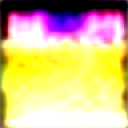

In [159]:
image = decode_image(latents_list[0])
image = get_image(image)
image

In [158]:
def decode_image(latents):
    # scale and decode the image latents with vae
    latents = 1 / 0.18215 * latents
    with torch.no_grad():
        image = vae.decode(latents).sample
    return image

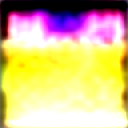

In [161]:
image = decode_image(latents_list[2])
image = get_image(image)
image

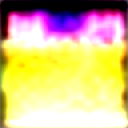

In [162]:
image = decode_image(latents_list[3])
image = get_image(image)
image

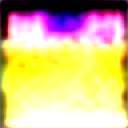

In [163]:
image = decode_image(latents_list[4])
image = get_image(image)
image

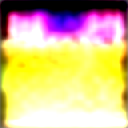

In [164]:
image = decode_image(latents_list[5])
image = get_image(image)
image

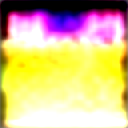

In [160]:
image = decode_image(latents_list[1])
image = get_image(image)
image